
################################################################################
> # **Clone GitHub repository**
################################################################################


In [1]:
################# Clone repository from github to colab session ################

"""

run this section if you want to clone all the datasets, preTrained networks from the GitHub
repository to this colab session

"""


print("Start============================================================================================")

!git clone https://github.com/Bop2000/DANTE

print("Done============================================================================================")



Start============================================================================================
Cloning into 'DANTE'...
remote: Enumerating objects: 2270, done.
remote: Counting objects: 100% (369/369), done.
remote: Compressing objects: 100% (272/272), done.
remote: Total 2270 (delta 193), reused 201 (delta 86), pack-reused 1901 (from 1)
Receiving objects: 100% (2270/2270), 444.35 MiB | 14.88 MiB/s, done.
Resolving deltas: 100% (899/899), done.
Done============================================================================================


In [2]:
"""

run this section if you want to copy all files and folders from cloned folder
(DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design) to current directory (/content/ or ./)

So you can load all the FE simulation dataset, preTrained networks files without changing any paths

"""

print("============================================================================================")

!cp -rv ./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/* ./

print("============================================================================================")


'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/DANTE_VL_Architected_Materials_Design.ipynb' -> './DANTE_VL_Architected_Materials_Design.ipynb'
'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/data.xlsx' -> './data.xlsx'
'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/input333.npy' -> './input333.npy'
'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/README.md' -> './README.md'
'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/run.py' -> './run.py'
'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/run.sh' -> './run.sh'
'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/Source_Data' -> './Source_Data'
'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/Source_Data/Results' -> './Source_Data/Results'
'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/Source_Data/Results/Round1' -> './Source_Data/Results/Round1'
'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Desig

'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/Source_Data/Results/Round8/Y2.h5' -> './Source_Data/Results/Round8/Y2.h5'
'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/Source_Data/Results/Round8/Y3.h5' -> './Source_Data/Results/Round8/Y3.h5'
'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/Source_Data/Results/Round8/Y4.h5' -> './Source_Data/Results/Round8/Y4.h5'
'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/Source_Data/Results/Round8/curves.mat' -> './Source_Data/Results/Round8/curves.mat'
'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/Source_Data/Results/Round8/model_performance_27d.csv' -> './Source_Data/Results/Round8/model_performance_27d.csv'
'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/Source_Data/Results/Round8/nearest neighbor distance.png' -> './Source_Data/Results/Round8/nearest neighbor distance.png'
'./DANTE/SelfDriving_Virtual_Labs/Architected_Materials_Design/Source_Data/Resul

In [1]:

"""

run this section if you want to delete original cloned folder and the cloned ipynb file
(after you have copied its contents to current directory)

"""


print("============================================================================================")

# delete original cloned folder
!rm -r ./DANTE

# delete cloned ipynb file
!rm ./DANTE_VL_Architected_Materials_Design.ipynb

print("============================================================================================")



rm: remove write-protected regular file './DANTE/.git/objects/pack/pack-4ec4986ee6ae35abea5c73fceed27c15bf8c72e5.idx'? ^C


################################################################################
> # **Install Dependencies**
################################################################################

In [2]:

############ install compatible version of tensorflow and ###########

# !pip install tensorflow

# !pip install scipy

# !pip install numpy

# !pip install pandas

# !pip install matplotlib

# !pip install scikit-learn

# !pip install scikit-image

# !pip install tqdm

# !pip install seaborn

# !pip install openpyxl


################################################################################
> # **Introduction**
> The notebook is divided into 4 major parts :

*   **Part I** : voxelization of the architected materials
*   **Part II** : define DANTE algorithm
*   **Part III** : define and train the CNN model
*   **Part IV** : optimization using DANTE

################################################################################

################################################################################
> # **Part - I**

*   Import initial dataset
*   Set parameters
*   Voxelization of the architected materials

################################################################################

2024-12-02 16:15:27.349103: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


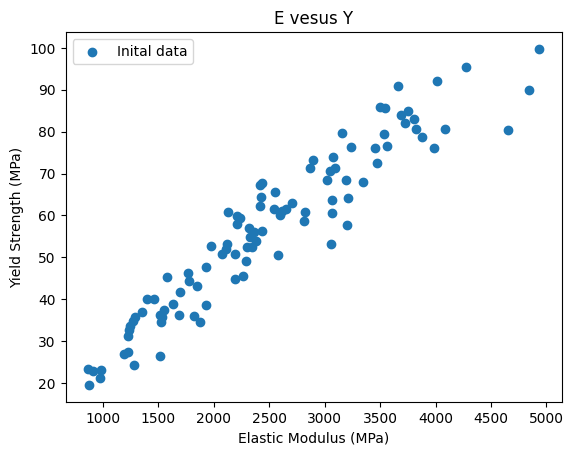

In [3]:

############################### Import libraries ###############################

import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler,ModelCheckpoint
import seaborn as sns
import random
from scipy import stats
from sklearn import metrics
from abc import ABC, abstractmethod
from collections import defaultdict
import math
from collections import namedtuple
from tensorflow.keras import layers
from tensorflow import keras





############################### Creat Initial Folder ###############################

#Number of iteration
round_num  = 1
round_name = 'Round'+str(round_num)

model_folder = "Results"
# Check if the directory exists
if not os.path.exists(model_folder):
    # If it doesn't exist, create it
    os.makedirs(model_folder)
if not os.path.exists(model_folder+'/'+round_name):
    # If it doesn't exist, create it
    os.makedirs(model_folder+'/'+round_name)







############################### Import Initial Dataset ###############################

all_input=np.load("input333.npy", allow_pickle=True)
data = pd.read_excel("data.xlsx")

rate=100
all_data = np.array(data['E'])/rate # rescaled for cnn model training
all_data2 = np.array(data['Y'])

if round_num  == 1:
  plt.figure()
  plt.scatter(all_data*rate,all_data2,label='Inital data')
  plt.legend()
  plt.title('E vesus Y')
  plt.xlabel('Elastic Modulus (MPa)')
  plt.ylabel('Yield Strength (MPa)')
  plt.savefig(f'round{round_num-1}.png')
else:
  plt.figure()
  plt.scatter(all_data*rate,all_data2,label='before')
  plt.scatter(all_data[-20:],all_data2[-20:],label=f'round{round_num-1}')
  plt.legend()
  plt.title('E vesus Y')
  plt.xlabel('Elastic Modulus (MPa)')
  plt.ylabel('Yield Strength (MPa)')
  plt.savefig(f'round{round_num-1}.png')







############################### Set Paramaters ###############################

top_sample=20 # number of newly selected samples
n_model=5 # number of cnn models for predictions
n_dim=27  # Dimension of this optimization problem
rollout_round=100 #number of roullout steps for DANTE algorithm,By default, DANTE performs 100 rollout
UCT_low=False
weight = 0.2 # exploration weight = weight * max(score)
list1=[5,8,2,5,1,1] ##[run times, top start points, random start points, top score samples, top visit samples, random samples]
target = 2500 #Choose a elastic modulus target, such as target = 2500 MPa
n_size=6 # dimension of the architected materials to optimize, where is 6 mm here
n_accu=60 # The number of points in the three directions of x, y and z after voxelization of the architected material
xxx=(1/2)*2*pi
sizeofdata0=[3,3,3] # an architected material with 3*3*3 units
accu=int(n_accu / 3)
x_axis, y_axis,z_axis = np.linspace(n_size/(n_accu*2), n_size-n_size/(n_accu*2), n_accu),  np.linspace(n_size/(n_accu*2), n_size-n_size/(n_accu*2), n_accu),  np.linspace(n_size/(n_accu*2), n_size-n_size/(n_accu*2), n_accu)
x, y,z = np.meshgrid(x_axis, y_axis,z_axis)



In [4]:
############################### voxelization of the architected materials ###############################

def findneighbour(inputdata,position):
    neighbourhoods=np.zeros((3,3,3))
    neighbourhoods[:,:,:]=np.nan
    r=len(inputdata)
    flag=0
    for i in range(r):
        if inputdata[i,0]==position[0] and inputdata[i,1]==position[1] and inputdata[i,2]==position[2]:
            flag=1
    if flag!=0:
        for i in range(r):
            dertax=inputdata[i,0]-position[0]
            dertay=inputdata[i,1]-position[1]
            dertaz=inputdata[i,2]-position[2]
            if abs(dertax)<=1 and abs(dertay)<=1 and abs(dertaz)<=1:
                neighbourhoods[int(dertax+1),int(dertay+1),int(dertaz+1)]=inputdata[i,3]
    return neighbourhoods

def createunitofv(datainput,positon,nofv,dofv):
    neibourhoods=findneighbour(datainput,positon)
    unitofv=np.ones((nofv-2*dofv,nofv-2*dofv,nofv-2*dofv))
    if not np.isnan(neibourhoods[1,1,1]):
        unitofv=unitofv*neibourhoods[1,1,1]
    else:
        unitofv=np.zeros((nofv,nofv,nofv))
        unitofv[:,:,:]=np.nan
        return unitofv
    if np.isnan(neibourhoods[2,1,1]):
        neibourhoods[2,1,1]=neibourhoods[1,1,1]
    if np.isnan(neibourhoods[0,1,1]):
        neibourhoods[0,1,1]=neibourhoods[1,1,1]
    if np.isnan(neibourhoods[1,2,1]):
        neibourhoods[1,2,1]=neibourhoods[1,1,1]
    if np.isnan(neibourhoods[1,0,1]):
        neibourhoods[1,0,1]=neibourhoods[1,1,1]
    if np.isnan(neibourhoods[1,1,2]):
        neibourhoods[1,1,2]=neibourhoods[1,1,1]
    if np.isnan(neibourhoods[1,1,0]):
        neibourhoods[1,1,0]=neibourhoods[1,1,1]
    if np.isnan(neibourhoods[2,2,1]):
        neibourhoods[2,2,1]=(neibourhoods[2,1,1]+neibourhoods[1,2,1])/2
    if np.isnan(neibourhoods[2,0,1]):
        neibourhoods[2,0,1]=(neibourhoods[2,1,1]+neibourhoods[1,0,1])/2
    if np.isnan(neibourhoods[0,2,1]):
        neibourhoods[0,2,1]=(neibourhoods[0,1,1]+neibourhoods[1,2,1])/2
    if np.isnan(neibourhoods[0,0,1]):
        neibourhoods[0,0,1]=(neibourhoods[0,1,1]+neibourhoods[1,0,1])/2
    if np.isnan(neibourhoods[2,1,2]):
        neibourhoods[2,1,2]=(neibourhoods[2,1,1]+neibourhoods[1,1,2])/2
    if np.isnan(neibourhoods[2,1,0]):
        neibourhoods[2,1,0]=(neibourhoods[2,1,1]+neibourhoods[1,1,0])/2
    if np.isnan(neibourhoods[0,1,2]):
        neibourhoods[0,1,2]=(neibourhoods[0,1,1]+neibourhoods[1,1,2])/2
    if np.isnan(neibourhoods[0,1,0]):
        neibourhoods[0,1,0]=(neibourhoods[0,1,1]+neibourhoods[1,1,0])/2
    if np.isnan(neibourhoods[1,2,2]):
        neibourhoods[1,2,2]=(neibourhoods[1,2,1]+neibourhoods[1,1,2])/2
    if np.isnan(neibourhoods[1,2,0]):
        neibourhoods[1,2,0]=(neibourhoods[1,2,1]+neibourhoods[1,1,0])/2
    if np.isnan(neibourhoods[1,0,2]):
        neibourhoods[1,0,2]=(neibourhoods[1,0,1]+neibourhoods[1,1,2])/2
    if np.isnan(neibourhoods[1,0,0]):
        neibourhoods[1,0,0]=(neibourhoods[1,0,1]+neibourhoods[1,1,0])/2
    if np.isnan(neibourhoods[0,0,0]):
        neibourhoods[0,0,0]=(neibourhoods[0,1,1]+neibourhoods[1,0,1]+neibourhoods[1,1,0])/3
    if np.isnan(neibourhoods[2,0,0]):
        neibourhoods[2,0,0]=(neibourhoods[2,1,1]+neibourhoods[1,0,1]+neibourhoods[1,1,0])/3
    if np.isnan(neibourhoods[0,2,0]):
        neibourhoods[0,2,0]=(neibourhoods[0,1,1]+neibourhoods[1,2,1]+neibourhoods[1,1,0])/3
    if np.isnan(neibourhoods[0,0,2]):
        neibourhoods[0,0,2]=(neibourhoods[0,1,1]+neibourhoods[1,0,1]+neibourhoods[1,1,2])/3
    if np.isnan(neibourhoods[0,2,2]):
        neibourhoods[0,2,2]=(neibourhoods[0,1,1]+neibourhoods[1,2,1]+neibourhoods[1,1,2])/3
    if np.isnan(neibourhoods[2,0,2]):
        neibourhoods[2,0,2]=(neibourhoods[2,1,1]+neibourhoods[1,0,1]+neibourhoods[1,1,2])/3
    if np.isnan(neibourhoods[2,2,0]):
        neibourhoods[2,2,0]=(neibourhoods[2,1,1]+neibourhoods[1,2,1]+neibourhoods[1,1,0])/3
    if np.isnan(neibourhoods[2,2,2]):
        neibourhoods[2,2,2]=(neibourhoods[2,1,1]+neibourhoods[1,2,1]+neibourhoods[1,1,2])/3
    for i in range(dofv):
        nownumber=neibourhoods[1,1,1]+i*(neibourhoods-neibourhoods[1,1,1])/(2*dofv+1)
        temp=np.zeros((1,nofv-2*dofv+2*i,nofv-2*dofv+2*i))
        temp[:,:,:]=nownumber[2,1,1]
        unitofv=np.concatenate((unitofv,temp),axis=0)#x+
        temp[:,:,:]=nownumber[0,1,1]
        unitofv=np.concatenate((temp,unitofv),axis=0)#x-
        temp=np.zeros((nofv-2*dofv+2*i+2,1,nofv-2*dofv+2*i))
        temp[:,:,:]=nownumber[1,2,1]
        unitofv=np.concatenate((unitofv,temp),axis=1)#y+
        temp[:,:,:]=nownumber[1,0,1]
        unitofv=np.concatenate((temp,unitofv),axis=1)#y-
        temp=np.zeros((nofv-2*dofv+2*i+2,nofv-2*dofv+2*i+2,1))
        temp[:,:,:]=nownumber[1,1,2]
        unitofv=np.concatenate((unitofv,temp),axis=2)#z+
        temp[:,:,:]=nownumber[1,1,0]
        unitofv=np.concatenate((temp,unitofv),axis=2)#z-
        unitofv[[-1],[-1],:]=nownumber[2,2,1]#x+,y+
        unitofv[0,0,:]=nownumber[0,0,1]#x-,y-
        unitofv[[-1],0,:]=nownumber[2,0,1]#x+,y-
        unitofv[0,[-1],:]=nownumber[0,2,1]#x,y+
        unitofv[[-1],:,[-1]]=nownumber[2,1,2]
        unitofv[0,:,0]=nownumber[0,1,0]
        unitofv[[-1],:,0]=nownumber[2,1,0]
        unitofv[0,:,[-1]]=nownumber[0,1,2]
        unitofv[:,[-1],[-1]]=nownumber[1,2,2]
        unitofv[:,0,0]=nownumber[1,0,0]
        unitofv[:,[-1],0]=nownumber[1,2,0]
        unitofv[:,0,[-1]]=nownumber[1,0,2]
        unitofv[[-1],[-1],[-1]]=nownumber[2,2,2]
        unitofv[0,[-1],[-1]]=nownumber[0,2,2]
        unitofv[[-1],0,[-1]]=nownumber[2,0,2]
        unitofv[[-1],[-1],0]=nownumber[2,2,0]
        unitofv[[-1],0,0]=nownumber[2,0,0]
        unitofv[0,[-1],0]=nownumber[0,2,0]
        unitofv[0,0,[-1]]=nownumber[0,0,2]
        unitofv[0,0,0]=nownumber[0,0,0]
    return unitofv

def createv_2(data,sizeofdata,nofv,dofv):
    v=[]
    for k in range(sizeofdata[2]):
        temp2=[]
        for j in range(sizeofdata[1]):
            temp1=[]
            for i in range(sizeofdata[0]):
                position=[i,j,k]
                varray=createunitofv(data,position,nofv,dofv)
                if i<1:
                    temp1=varray
                else:
                    temp1=np.concatenate((temp1,varray),axis=0)
            if j<1:
                temp2=temp1
            else:
                temp2=np.concatenate((temp2,temp1),axis=1)
        if k<1:
            v=temp2
        else:
            v=np.concatenate((v,temp2),axis=2)
    return v

############
r1=np.zeros((27,3))
for a in range(3):
    for b in range(3):
        for c in range(3):
            r1[9*a+3*b+c,0]=a
            r1[9*a+3*b+c,1]=b
            r1[9*a+3*b+c,2]=c
#############
oo=np.sin(pi*x)*np.cos(pi*y)+np.sin(pi*y)*np.cos(pi*z)+np.sin(pi*z)*np.cos(pi*x)
def To60(matrix):
    the606060=[]
    N=len(matrix)
    # r1_100=np.tile(r1, (N,1,1))
    finished=(10*(1-matrix).reshape(N,27,1))*0.282-0.469
    # print(finished.shape)
    # data_all=np.concatenate((r1_100,finished),axis=2)
    for l in range(N):
        r2=finished[l]
        data0=np.concatenate((r1,r2),axis=1)
        v=createv_2(data0,sizeofdata0,accu,3)
        ov=oo+v
        the606060.append(ov)
    the606060_cell=np.asarray(the606060)
    the606060_cell=np.where(the606060_cell<0.9,1,0)
    return the606060_cell

In [5]:



################################# End of Part I ################################




################################################################################
> # **Part - II**

*   Define the DANTE alghorithm

################################################################################

In [6]:
################################# DANTE alghorithm ################################


class DANTE:
    def __init__(self, exploration_weight=1):
        self.Q = defaultdict(int)  # total reward of each node
        self.N = defaultdict(int)  # total visit count for each node
        self.children = dict()  # children of each node
        self.exploration_weight = exploration_weight

    def choose(self, node):
        "Choose the best successor of node."
        if node.is_terminal():
            raise RuntimeError(f"choose called on terminal node {node}")

        if node not in self.children:
            print('not seen before, randomly sampled!')
            return node.find_random_child()

        def evaluate(n):
            return n.value  # average reward
        print(f'number of visit is {self.N[node]}')
        log_N_vertex = math.log(self.N[node])
        def uct(n):
            "Upper confidence bound for trees"

            uct_value = n.value + self.exploration_weight * math.sqrt(
                log_N_vertex / (self.N[n]+1))
            return uct_value

        action = [p for p in range(0, len(node.tup))]
        self.children[node] = node.find_children(action)
        media_node = max(self.children[node], key=uct)#self._uct_select(node)
        rand_index = random.randint(0, len(list(self.children[node]))-1)
        node_rand = list(self.children[node])[rand_index]

        if uct(media_node) > uct(node):
            print(f'media node is{media_node}')
            print(f'uct of the node is{uct(media_node)} ')
            print(f'better value media node : {media_node.value}')
            return media_node, node_rand
        return node, node_rand


    def do_rollout(self, node):
        "Make the tree one layer better. (Train for one iteration.)"
        path = self._select(node)
        leaf = path[-1]
        self._expand(leaf)
        reward = self._simulate(leaf)
        self._backpropagate(path, reward)

    def _select(self, node):
        "Find an unexplored descendent of `node`"
        path = []
        count = 0
        while True:
            path.append(node)
            if node not in self.children or not self.children[node]:
              return path
            unexplored = self.children[node] - self.children.keys()
            def evaluate(n):
              return n.value
            if count == 50:
             return max(path, key=evaluate)

            if unexplored:
              path.append(max(unexplored, key=evaluate))#
              return path
            node = self._uct_select(node)  # descend a layer deeper
            count+=1

    def _expand(self, node):
        "Update the `children` dict with the children of `node`"
        if node in self.children:
            return  # already expanded
        action = [p for p in range(0, len(node.tup))]
        self.children[node] = node.find_children(action)

    def _simulate(self, node):
        "Returns the reward for a random simulation (to completion) of `node`"
        reward = node.reward()
        return reward

    def _backpropagate(self, path, reward):
        "Send the reward back up to the ancestors of the leaf"
        for node in reversed(path):
          self.N[node] += 1
          self.Q[node] += reward
    def _uct_select(self, node):
        "Select a child of node, balancing exploration & exploitation"
        # All children of node should already be expanded:
        assert all(n in self.children for n in self.children[node])
        log_N_vertex = math.log(self.N[node])

        def uct(n):
            "Upper confidence bound for trees"
            uct_value = n.value + self.exploration_weight * math.sqrt(
                log_N_vertex / (self.N[n]+1))
            return uct_value
        uct_node = max(self.children[node], key=uct)
        print(f'node with max uct is:{uct_node}')
        return uct_node

class Node(ABC):
    """
    A representation of a single board state.
    DANTE works by constructing a tree of these Nodes.
    Could be e.g. a chess or checkers board state.
    """

    @abstractmethod
    def find_children(self):
        "All possible successors of this board state"
        return set()

    @abstractmethod
    def find_random_child(self):
        "Random successor of this board state (for more efficient simulation)"
        return None

    @abstractmethod
    def is_terminal(self):
        "Returns True if the node has no children"
        return True

    @abstractmethod
    def reward(self):
        "Assumes `self` is terminal node. 1=win, 0=loss, .5=tie, etc"
        return 0

    @abstractmethod
    def __hash__(self):
        "Nodes must be hashable"
        return 123456789

    @abstractmethod
    def __eq__(node1, node2):
        "Nodes must be comparable"
        return True

_OT = namedtuple("opt_task", "tup value terminal")
class opt_task(_OT, Node):

    ############################ design the action space ############################
    # for this task, xi belongs to [0.1,0.8] with an interval of 0.1

    def find_children(board,action):
        if board.terminal:
            return set()
        turn = 0.1
        all_tup=[]
        for index in action:
            tup = list(board.tup)
            flip = random.randint(0,6)
            if   flip ==0:
              tup[index] += turn

            elif flip ==1:
                tup[index] -= turn

            elif flip ==2:
              for i in range(int(n_dim/5)):
                index_2 = random.randint(0, len(tup)-1)
                tup[index_2] = random.randint(1, 8)/10
            elif flip ==3:
              for i in range(int(n_dim/10)):
                index_2 = random.randint(0, len(tup)-1)
                tup[index_2] = random.randint(1, 8)/10
            elif flip ==5:
              tup[index] = random.randint(1, 8)/10
            else:
              tup[index] = random.randint(1, 8)/10
            tup[index] = round(tup[index],2)
            tup=np.array(tup)
            whe1=np.where(tup<0.1)
            whe2=np.where(tup>0.8)
            tup[whe1[0]]=0.1
            tup[whe2[0]]=0.8
            all_tup.append(tup)

        all_value = oracle(all_tup)
        is_terminal=False
        return  {opt_task(tuple(t), v, is_terminal) for t, v in  zip(all_tup,all_value)}

    def reward(board):
        return  oracle(board.tup)
    def is_terminal(board):
        return board.terminal

# return the mostly visited nodes
def most_visit_node(tree_ubt, X,top_n):
  N_visit = tree_ubt.N
  childrens = [i for i in tree_ubt.children]
  children_N = []
  X_top = []
  for child in childrens:
    child_tup = np.array(child.tup)
    same = np.all(child_tup==X, axis=1)
    has_true = any(same)
    if has_true == False:
      children_N.append(N_visit[child])
      X_top.append(child_tup)
  children_N = np.array(children_N)
  X_top = np.array(X_top)
  ind = np.argpartition(children_N, -top_n)[-top_n:]
  X_topN = X_top[ind]
  return X_topN

# return random nodes
def random_node(new_x,n):
  X_rand1 = [new_x[random.randint(0, len(new_x)-1)] for i in range(n)]
  return X_rand1


In [7]:




################################ End of Part II ################################






################################################################################
> # **Part - III**

*   Define and train the CNN model

################################################################################

In [8]:
################################ Define the CNN model ################################

#########slice the data to five parts
index_random=np.arange(len(all_data2))
random.shuffle(index_random)
index_random1=index_random[:]

def model_training(X,y,name,i,lr):
      ind=index_random[round(i*len(index_random)/5):round((1+i)*len(index_random)/5)]####1/5 data as test set
      ind2=np.setdiff1d(index_random, ind)
      X_train, X_test, y_train, y_test = X[ind2],X[ind], y[ind2],y[ind]
      inputs = keras.Input((60, 60, 60, 1))
      x = layers.Conv3D(filters=8, kernel_size=3, activation="elu",padding='same')(inputs)
      x = layers.MaxPool3D(pool_size=2,padding='same')(x)
      x = layers.Conv3D(filters=4, kernel_size=3, activation="elu",padding='same')(x)
      x = layers.MaxPool3D(pool_size=2,padding='same')(x)
      x = layers.Conv3D(filters=2, kernel_size=3, activation="elu",padding='same')(x)
      x = layers.MaxPool3D(pool_size=2,padding='same')(x)
      x = layers.Flatten()(x)
      x = layers.Dense(units=128, activation="elu")(x)
      x = layers.Dense(units=64, activation="elu")(x)
      x = layers.Dense(units=32, activation="elu")(x)
      outputs = layers.Dense(units=1, activation="linear")(x)
      model = keras.Model(inputs, outputs, name="3dcnn")
      mc = ModelCheckpoint(model_folder+'/'+round_name+f"/{name}.h5", monitor='val_loss', mode='min', verbose = 0, save_best_only=True)
      early_stop = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
      model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')
      model.fit(X_train, y_train, batch_size=32, epochs=5000, validation_data=(X_test, y_test), callbacks=[early_stop,mc], verbose = 0)
      model=keras.models.load_model(model_folder+'/'+round_name+f"/{name}.h5")

      R2,MAE=mar_r2(model,X_test,y_test)

      return model,X_test,y_test,R2,MAE

def model_performance(model,X_test,y_test):
    perform_list=pd.read_csv(model_folder+'/'+round_name+f'/model_performance_{n_dim}d.csv')
    y_pred = model.predict(X_test.reshape(len(X_test),60,60,60,1))
    R2=stats.pearsonr(y_pred.reshape(-1), y_test.reshape(-1))[0]
    R2=np.asarray(R2).round(5)
    MAE= metrics.mean_absolute_error(y_test.reshape(-1), y_pred.reshape(-1))

    plt.figure()
    sns.set()
    sns.regplot(x=y_pred, y=y_test, color='k')
    plt.title(('R2:',R2,'MAE:',MAE))

    y_test = pd.DataFrame(y_test)
    y_test.columns= ['ground truth']
    y_pred = pd.DataFrame(y_pred)
    y_pred.columns= ['pred']
    print("R2",R2,"MAE",MAE)
    R2MAE = pd.DataFrame([R2,MAE])
    R2MAE.columns= ['R2&MAE']
    perform_list2=pd.concat((perform_list,y_test,y_pred,R2MAE),axis=1)
    perform_list2.drop([perform_list2.columns[0]],axis=1, inplace=True)
    perform_list2.to_csv(model_folder+'/'+round_name+f'/model_performance_{n_dim}d.csv')
    return R2,MAE


def mar_r2(model,X_test,y_test):
    y_pred = model.predict(X_test.reshape(len(X_test),60,60,60,1))
    R2=stats.pearsonr(y_pred.reshape(-1), y_test.reshape(-1))[0]
    R2=np.asarray(R2).round(5)
    MAE= metrics.mean_absolute_error(y_test.reshape(-1), y_pred.reshape(-1))
    return R2,MAE



In [9]:
"""
If you find train these model time consuming, please use the pretrained neural network models.

run this section to copy all models (.h5 files) from cloned folder (Source_Data/Results/Round1)
to current work directory (./Results/Round1)

"""

print("============================================================================================")

!cp -rv ./Source_Data/Results/Round1/* ./Results/Round1/

print("============================================================================================")

'./Source_Data/Results/Round1/curves.mat' -> './Results/Round1/curves.mat'
'./Source_Data/Results/Round1/E0.h5' -> './Results/Round1/E0.h5'
'./Source_Data/Results/Round1/E1.h5' -> './Results/Round1/E1.h5'
'./Source_Data/Results/Round1/E2.h5' -> './Results/Round1/E2.h5'
'./Source_Data/Results/Round1/E3.h5' -> './Results/Round1/E3.h5'
'./Source_Data/Results/Round1/E4.h5' -> './Results/Round1/E4.h5'
'./Source_Data/Results/Round1/model_performance_27d.csv' -> './Results/Round1/model_performance_27d.csv'
'./Source_Data/Results/Round1/PCA.png' -> './Results/Round1/PCA.png'
'./Source_Data/Results/Round1/top_matrix_3x3x3.mat' -> './Results/Round1/top_matrix_3x3x3.mat'
'./Source_Data/Results/Round1/TSNE.png' -> './Results/Round1/TSNE.png'
'./Source_Data/Results/Round1/Y0.h5' -> './Results/Round1/Y0.h5'
'./Source_Data/Results/Round1/Y1.h5' -> './Results/Round1/Y1.h5'
'./Source_Data/Results/Round1/Y2.h5' -> './Results/Round1/Y2.h5'
'./Source_Data/Results/Round1/Y3.h5' -> './Results/Round1/Y3.h5'


2024-12-02 16:16:58.447827: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-12-02 16:16:58.483105: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-12-02 16:16:58.483767: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:09:00.0 name: NVIDIA GeForce RTX 3090 Ti computeCapability: 8.6
coreClock: 1.905GHz coreCount: 84 deviceMemorySize: 23.68GiB deviceMemoryBandwidth: 938.86GiB/s
2024-12-02 16:16:58.483782: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-12-02 16:16:58.485486: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-12-02 16:16:58.485510: I tensorflow/stream_executor

R2 0.95651 MAE 1.8093991488004164
R2 0.9844 MAE 1.5260005521563718
R2 0.86866 MAE 2.5987002122571563
R2 0.98133 MAE 1.720123527137409
R2 0.96811 MAE 1.6478053832836843
R2 0.98396 MAE 2.6531603857394757
R2 0.95035 MAE 5.262149303102619
R2 0.95409 MAE 3.8339524939821494
R2 0.97377 MAE 3.5137823358527323
R2 0.97372 MAE 3.5950357584601536


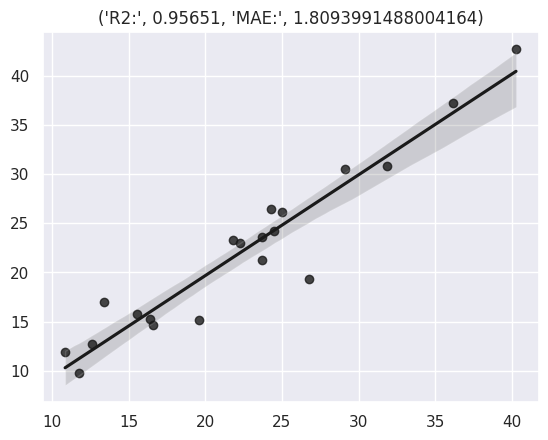

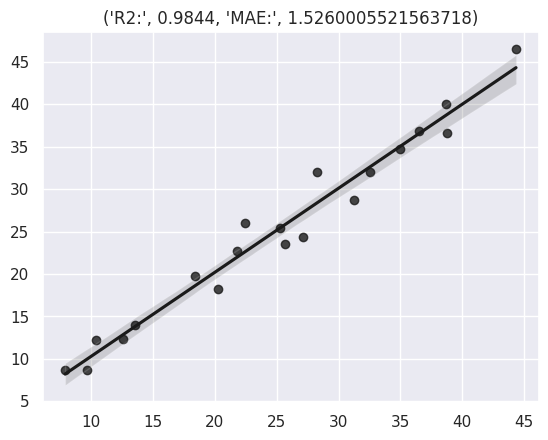

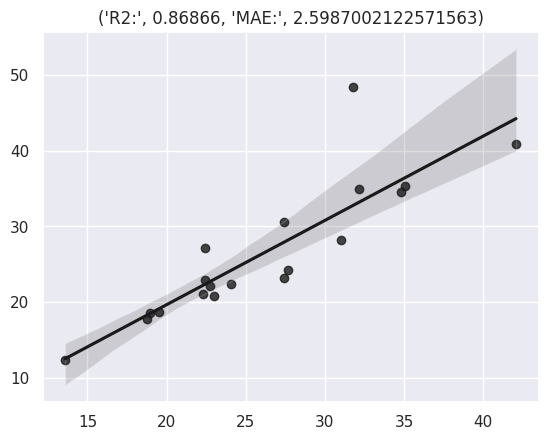

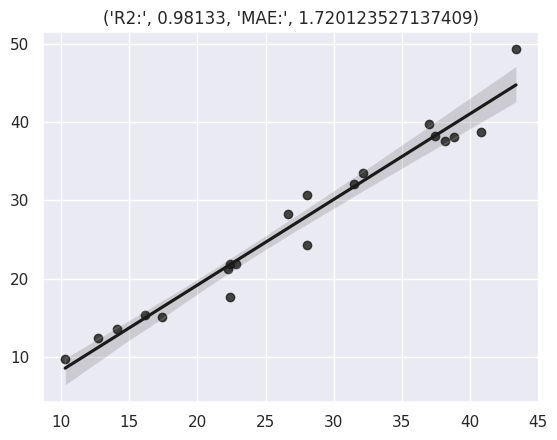

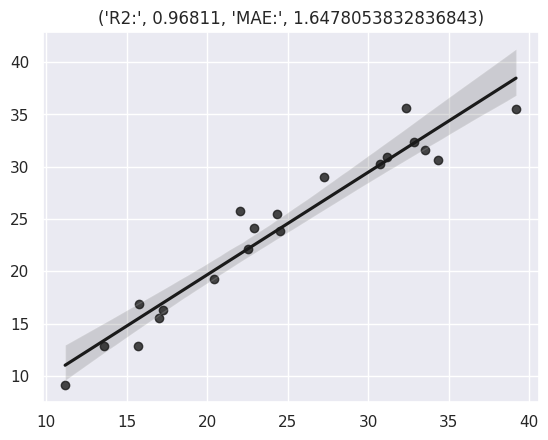

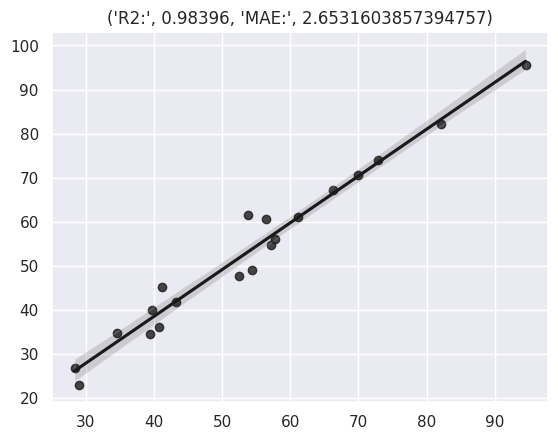

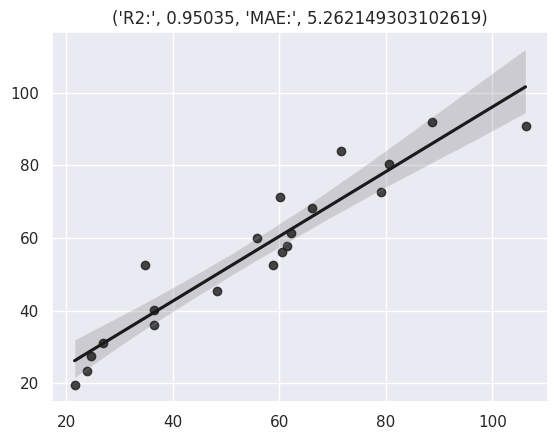

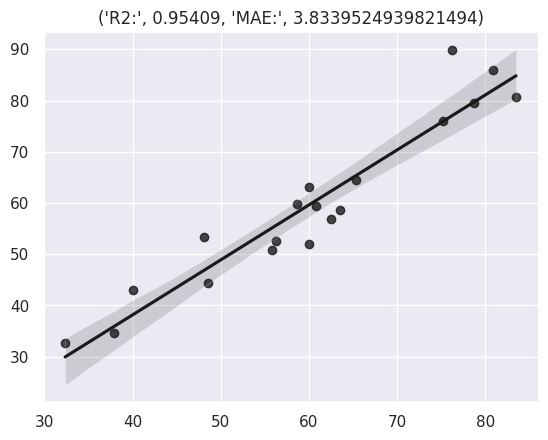

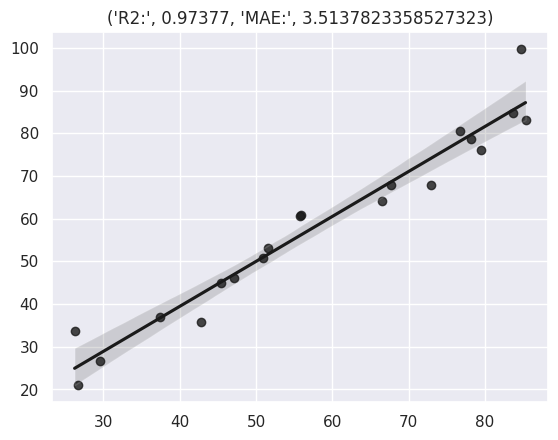

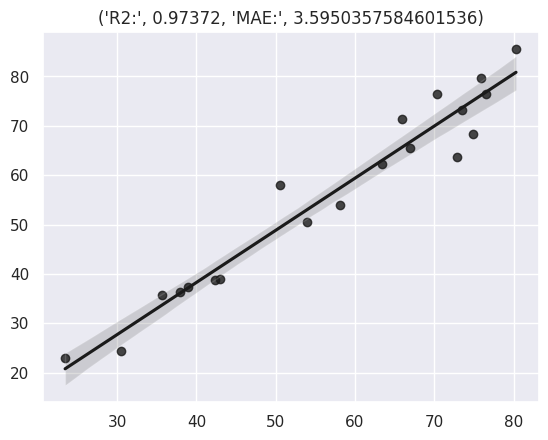

In [10]:
################################ Train the CNN model ################################

X60 = To60(np.array(all_input).reshape(-1,3,3,3)) # voxelization

### train 5 models for Elastic modulus prediction
pd.DataFrame(np.empty(0)).to_csv(model_folder+'/'+round_name+f'/model_performance_{n_dim}d.csv')
for i in range(5):
    trytime=0
    model1,X_test1,y_test1,R21,MAE1 = model_training(X60,all_data,f'E{i}',i,0.001) # train the model of E
    R20=R21
    while R21 < 0.95 and trytime<5:
        trytime+=1
        model1,X_test1,y_test1,R21,MAE1 = model_training(X60,all_data,f'E{i+10}',i,0.002) # train the model of E
        if R21>R20:
            R20=R21
            model1.save("Results/"+round_name+f'/E{i}.h5')
    model1=keras.models.load_model(model_folder+'/'+round_name+f'/E{i}.h5')
    R21,MAE1=model_performance(model1,X_test1,y_test1) # show and save the performance of the model

### train 5 models for Yield strength prediction
for i in range(5):
    trytime=0
    model2,X_test2,y_test2,R22,MAE2 = model_training(X60,all_data2,f'Y{i}',i,0.005) # train the model of Y
    R20=R22
    while R22 < 0.95 and trytime<5:
        trytime+=1
        model2,X_test2,y_test2,R22,MAE2 = model_training(X60,all_data2,f'Y{i+10}',i,0.002) # train the model of Y
        if R22>R20:
            R20=R22
            model2.save("Results/"+round_name+f'/Y{i}.h5')
    model2=keras.models.load_model(model_folder+'/'+round_name+f'/Y{i}.h5')
    R22,MAE2=model_performance(model2,X_test2,y_test2) # show and save the performance of the model




In [13]:

################################ Load and use the CNN model ################################

path = os.getcwd()
name2=path+'/Results/'+round_name+'/'
models=dict()
model_E_list=[]
for i in range(0,n_model):
    modelname = f'E{i}'
    model_E_list.append(modelname)
    models[modelname]= keras.models.load_model(name2+modelname+'.h5')
model_Y_list=[]
for i in range(0,n_model):
    modelname = f'Y{i}'
    model_Y_list.append(modelname)
    models[modelname]= keras.models.load_model(name2+modelname+'.h5')

###emsemble all models to predict
def emsemble_predict1(S,n_model=5):##E
    pred_all=0
    for i in range(n_model):
        temp=models[model_E_list[i]].predict(S.reshape(len(S),60,60,60,1))
        pred_all+=temp
    pred_all/=n_model
    return pred_all

def emsemble_predict2(S,n_model=5):##Y
    pred_all=0
    for i in range(n_model):
        temp=models[model_Y_list[i]].predict(S.reshape(len(S),60,60,60,1))
        pred_all+=temp
    pred_all/=n_model
    return pred_all

def oracle(x):
    try:
       x60=To60(np.array(x).reshape(len(x),3,3,3))
       pred = emsemble_predict1(np.array(x60).reshape(len(x60),60,60,60,1))
       pred = np.array(pred).reshape(len(x60))
       whe=np.where((pred>2650/rate)|(pred<2350/rate))
       pred2 = emsemble_predict2(np.array(x60).reshape(len(x60),60,60,60,1))
       pred2 = np.array(pred2).reshape(len(x60))
       pred2[whe[0]]=0
    except:
       x60=To60(np.array(x).reshape(1,3,3,3))
       pred = emsemble_predict1(np.array(x60).reshape(1,60,60,60,1))
       pred = np.array(pred).reshape(1)
       pred2 = emsemble_predict2(np.array(x60).reshape(1,60,60,60,1))
       pred2 = np.array(pred2).reshape(1)
       if pred<2350/rate or pred>2650/rate:
            pred2=0
    #print('pred E:',pred)
    #print('pred Y:',pred2)
    return pred2

In [14]:
################################ model performance visualization ################################

def model_visual1(X,y,i): # E
    model1=models[model_E_list[i]]
    ind=index_random[round(i*len(index_random)/5):round((1+i)*len(index_random)/5)]####1/5 data as test set
    ind2=np.setdiff1d(index_random, ind)
    X_train, X_test, y_train, y_test = X[ind2],X[ind], y[ind2],y[ind]

    y_pred = model1.predict(X_test.reshape(len(X_test),60,60,60,1))
    R2=stats.pearsonr(y_pred.reshape(-1), y_test.reshape(-1))[0]
    R2=np.asarray(R2).round(3)
    MAE= metrics.mean_absolute_error(y_test.reshape(-1), y_pred.reshape(-1))
    MAE=np.asarray(MAE).round(5)
    MAPE= metrics.mean_absolute_percentage_error(y_test.reshape(-1), y_pred.reshape(-1))
    MAPE=np.asarray(MAPE).round(5)
    plt.figure()
    sns.set()
    sns.regplot(x=y_pred, y=y_test, color='k')
    plt.title((f'E prediction by model #{i+1}: ','R2:',R2,'MAE:',MAE,'MAPE:',MAPE))
    plt.xlabel('Predicted elasctic modulus')
    plt.xlabel('Simulated elasctic modulus')

def model_visual2(X,y,i):# Y
    model2=models[model_Y_list[i]]
    ind=index_random[round(i*len(index_random)/5):round((1+i)*len(index_random)/5)]####1/5 data as test set
    ind2=np.setdiff1d(index_random, ind)
    X_train, X_test, y_train, y_test = X[ind2],X[ind], y[ind2],y[ind]

    y_pred = model2.predict(X_test.reshape(len(X_test),60,60,60,1))
    R2=stats.pearsonr(y_pred.reshape(-1), y_test.reshape(-1))[0]
    R2=np.asarray(R2).round(3)
    MAE= metrics.mean_absolute_error(y_test.reshape(-1), y_pred.reshape(-1))
    MAE=np.asarray(MAE).round(5)
    MAPE= metrics.mean_absolute_percentage_error(y_test.reshape(-1), y_pred.reshape(-1))
    MAPE=np.asarray(MAPE).round(5)
    plt.figure()
    sns.set()
    sns.regplot(x=y_pred, y=y_test, color='k')
    plt.title((f'Y prediction by model #{i+1}: ','R2:',R2,'MAE:',MAE,'MAPE:',MAPE))
    plt.xlabel('Predicted yield strength')
    plt.xlabel('Simulated yield strength')

models[model_Y_list[0]].summary()
#for i in range(5):
#    model_visual1(X60,all_data,i)
#for i in range(5):
#    model_visual2(X60,all_data2,i)

Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 60, 60, 60, 1)]   0         
_________________________________________________________________
conv3d_33 (Conv3D)           (None, 60, 60, 60, 8)     224       
_________________________________________________________________
max_pooling3d_33 (MaxPooling (None, 30, 30, 30, 8)     0         
_________________________________________________________________
conv3d_34 (Conv3D)           (None, 30, 30, 30, 4)     868       
_________________________________________________________________
max_pooling3d_34 (MaxPooling (None, 15, 15, 15, 4)     0         
_________________________________________________________________
conv3d_35 (Conv3D)           (None, 15, 15, 15, 2)     218       
_________________________________________________________________
max_pooling3d_35 (MaxPooling (None, 8, 8, 8, 2)        0     

In [15]:



################################ End of Part III ###############################




################################################################################
> # **Part - IV**

*   Optimization using DANTE

################################################################################


Input description:
*   all_input: initial data (Density matrix)
*   X60      : voxelized architected materials
*   all_data : initial label (Elastic modulus)
*   all_data2: initial label (Yield strength)

Output description:

*   top_all    : newly sampled data (Density matrix)
*   top_select2: final selected sampled data (Density matrix)


In [16]:
################################ Optimization using DANTE ###############################


def single_run(X,y,initial_X,initial_y,greedy_UCT,UCT_low):
    initial_X=initial_X.reshape(27)
    if greedy_UCT== True:
        values = max(y)
        exp_weight = weight * values
    if UCT_low ==True:
        values = oracle(initial_X)
        exp_weight = weight * values

    board_uct = opt_task(tup=tuple(initial_X), value=initial_y, terminal=False)
    tree_ubt = DANTE(exploration_weight=exp_weight)
    boards = []
    boards_rand = []
    for i in tqdm(range(0, rollout_round, 1)):
        tree_ubt.do_rollout(board_uct)
        board_uct,board_rand = tree_ubt.choose(board_uct)
        boards.append(list(board_uct.tup))
        boards_rand.append(list(board_rand.tup))

    new_x = []
    new_pred = []
    boards = np.array(boards)
    boards = np.unique(boards, axis=0)
    pred_values = oracle(boards)
    print(f'unique number of boards: {len(boards)}')

    for i,j in zip(boards,pred_values):
      temp_x = np.array(i)
      same = np.all(temp_x==X.reshape(len(X),27), axis=1)
      has_true = any(same)
      if has_true == False:
        new_pred.append(j)
        new_x.append(temp_x)
    new_x= np.array(new_x)
    new_pred = np.array(new_pred)

    top_n=list1[3]
    ind = np.argpartition(new_pred, -top_n)[-top_n:]
    top_prediction =  new_x[ind]
    X_most_visit =  most_visit_node(tree_ubt, X.reshape(len(X),27),list1[4])
    X_rand =  random_node(new_x,list1[5])
    X_next = np.concatenate([top_prediction, X_most_visit, X_rand])
    return X_next,exp_weight


def run(X60,X,y,yy2, rollout_round):

    y2=np.array(yy2)
    whe=np.where((y>2650/rate)|(y<2350/rate))
    y2[whe[0]]=0

    greedy_UCT = True

    top_select = list1[1] #highest
    random_select = list1[2] #random
    ind = np.argpartition(y2, -top_select)[-top_select:]#####
    ind_random=np.setdiff1d(np.arange(len(y2)), ind)
    ind2 = np.random.choice(ind_random,random_select)
    #print(ind)
    ind = np.concatenate((ind,ind2))
    print(ind)

    x_current_top = X[ind]
    y_top=y2[ind]
    X_top=[]
    top_selections = []
    for i in range (top_select+random_select):
      top_temp = x_current_top[i]
      #print("true of top:",y_top[i])
      #print("top_temp:",top_temp)
      x,exp_weight = single_run(X,y2,top_temp,y_top[i],greedy_UCT,UCT_low)
      X_top.append(x)
      top_selections.append(top_temp)

    top_X = np.vstack(X_top)
    print(top_X.shape)
    print(f'exp_weight is {exp_weight}')
    print(f'top x are {top_selections}')
    print(f'true value of  top x are {y[ind]}')
    print(f'top selection are {X_top}')
    return top_X



top_all=[]
for i in range(list1[0]):
    top_X=run(X60,all_input,all_data,all_data2,rollout_round)
    print(top_X)
    top_all.append(top_X)


[45 87 43 30 88 56 74 26 81 57]


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<03:11,  1.93s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.3, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=62.65159, terminal=False)
uct of the node is62.651588439941406 
better value media node : 62.651588439941406
number of visit is 1


  2%|▏         | 2/100 [00:03<02:49,  1.73s/it]

number of visit is 2


  3%|▎         | 3/100 [00:05<02:42,  1.67s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.3, 0.1, 0.4, 0.2, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=62.07973, terminal=False)
uct of the node is73.36870412793911 
better value media node : 62.07973098754883
number of visit is 1


  4%|▍         | 4/100 [00:06<02:37,  1.64s/it]

number of visit is 2


  5%|▌         | 5/100 [00:08<02:39,  1.68s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.3, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=62.00414, terminal=False)
uct of the node is73.29311208692349 
better value media node : 62.0041389465332
number of visit is 1


  6%|▌         | 6/100 [00:10<02:35,  1.65s/it]

media node isopt_task(tup=(0.5, 0.4, 0.3, 0.3, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=63.109608, terminal=False)
uct of the node is63.1096076965332 
better value media node : 63.1096076965332
number of visit is 1


  7%|▋         | 7/100 [00:11<02:31,  1.63s/it]

number of visit is 2


  8%|▊         | 8/100 [00:13<02:29,  1.63s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.3, 0.4, 0.4, 0.3), value=64.19055, terminal=False)
uct of the node is75.47952489820278 
better value media node : 64.1905517578125
number of visit is 1


  9%|▉         | 9/100 [00:14<02:27,  1.62s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.3, 0.6, 0.4, 0.3), value=65.582924, terminal=False)
uct of the node is65.58292388916016 
better value media node : 65.58292388916016
number of visit is 1


 10%|█         | 10/100 [00:16<02:26,  1.63s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.8, 0.4, 0.1, 0.3, 0.6, 0.4, 0.1), value=65.828064, terminal=False)
uct of the node is65.82806396484375 
better value media node : 65.82806396484375
number of visit is 1


 11%|█         | 11/100 [00:18<02:25,  1.63s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:19<02:24,  1.64s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.3, 0.3, 0.2, 0.1, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.8, 0.4, 0.1, 0.3, 0.6, 0.4, 0.1), value=64.87821, terminal=False)
uct of the node is76.16718511548794 
better value media node : 64.87821197509766
number of visit is 1


 13%|█▎        | 13/100 [00:21<02:22,  1.64s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.3, 0.3, 0.2, 0.1, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.8, 0.4, 0.1, 0.3, 0.6, 0.4, 0.1), value=67.13346, terminal=False)
uct of the node is67.13346099853516 
better value media node : 67.13346099853516
number of visit is 1


 14%|█▍        | 14/100 [00:23<02:20,  1.64s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:24<02:18,  1.63s/it]

media node isopt_task(tup=(0.8, 0.4, 0.3, 0.3, 0.3, 0.2, 0.1, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.8, 0.4, 0.1, 0.3, 0.6, 0.4, 0.1), value=67.497375, terminal=False)
uct of the node is78.78634862867153 
better value media node : 67.49737548828125
number of visit is 1


 16%|█▌        | 16/100 [00:26<02:16,  1.62s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:27<02:14,  1.62s/it]

media node isopt_task(tup=(0.8, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.8, 0.4, 0.1, 0.3, 0.6, 0.4, 0.1), value=66.52504, terminal=False)
uct of the node is77.81401281324185 
better value media node : 66.52503967285156
number of visit is 1


 18%|█▊        | 18/100 [00:29<02:12,  1.62s/it]

media node isopt_task(tup=(0.8, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.1, 0.4, 0.4, 0.4, 0.8, 0.4, 0.1, 0.3, 0.6, 0.4, 0.1), value=67.62346, terminal=False)
uct of the node is67.62345886230469 
better value media node : 67.62345886230469
number of visit is 1


 19%|█▉        | 19/100 [00:31<02:10,  1.61s/it]

number of visit is 2


 20%|██        | 20/100 [00:32<02:08,  1.61s/it]

media node isopt_task(tup=(0.8, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.1, 0.4, 0.4, 0.4, 0.8, 0.4, 0.1, 0.3, 0.6, 0.4, 0.1), value=66.13172, terminal=False)
uct of the node is77.42069463697231 
better value media node : 66.13172149658203
number of visit is 1


 21%|██        | 21/100 [00:34<02:07,  1.61s/it]

media node isopt_task(tup=(0.8, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.1, 0.4, 0.4, 0.4, 0.8, 0.4, 0.1, 0.3, 0.6, 0.4, 0.2), value=67.75832, terminal=False)
uct of the node is67.7583236694336 
better value media node : 67.7583236694336
number of visit is 1


 22%|██▏       | 22/100 [00:35<02:05,  1.61s/it]

number of visit is 2


 23%|██▎       | 23/100 [00:37<02:03,  1.60s/it]

media node isopt_task(tup=(0.8, 0.4, 0.3, 0.2, 0.2, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.1, 0.4, 0.4, 0.4, 0.8, 0.4, 0.1, 0.3, 0.6, 0.4, 0.2), value=66.92601, terminal=False)
uct of the node is78.21498327222622 
better value media node : 66.92601013183594
number of visit is 1


 24%|██▍       | 24/100 [00:39<02:01,  1.60s/it]

media node isopt_task(tup=(0.8, 0.4, 0.3, 0.4, 0.2, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.1, 0.4, 0.4, 0.4, 0.8, 0.4, 0.1, 0.3, 0.6, 0.4, 0.2), value=68.34127, terminal=False)
uct of the node is68.34127044677734 
better value media node : 68.34127044677734
number of visit is 1


 25%|██▌       | 25/100 [00:40<01:59,  1.60s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:42<01:57,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.2, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.1, 0.4, 0.4, 0.4, 0.8, 0.4, 0.1, 0.3, 0.6, 0.4, 0.2), value=68.115585, terminal=False)
uct of the node is79.40455846753872 
better value media node : 68.11558532714844
number of visit is 1


 27%|██▋       | 27/100 [00:43<01:57,  1.61s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:45<01:56,  1.61s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.2, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.1, 0.4, 0.4, 0.4, 0.8, 0.4, 0.1, 0.3, 0.7, 0.4, 0.2), value=67.96942, terminal=False)
uct of the node is79.25839452710903 
better value media node : 67.96942138671875
number of visit is 1


 29%|██▉       | 29/100 [00:47<01:53,  1.60s/it]

number of visit is 2


 30%|███       | 30/100 [00:48<01:52,  1.61s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.2, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.1, 0.4, 0.4, 0.4, 0.7, 0.4, 0.1, 0.3, 0.7, 0.4, 0.2), value=67.53328, terminal=False)
uct of the node is78.8222525593356 
better value media node : 67.53327941894531
number of visit is 1


 31%|███       | 31/100 [00:50<01:50,  1.60s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.1, 0.4, 0.4, 0.4, 0.7, 0.4, 0.1, 0.3, 0.7, 0.4, 0.2), value=68.55625, terminal=False)
uct of the node is68.5562515258789 
better value media node : 68.5562515258789
number of visit is 1


 32%|███▏      | 32/100 [00:51<01:48,  1.60s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.1, 0.4, 0.4, 0.4, 0.7, 0.4, 0.1, 0.3, 0.6, 0.4, 0.2), value=68.74133, terminal=False)
uct of the node is68.7413330078125 
better value media node : 68.7413330078125
number of visit is 1


 33%|███▎      | 33/100 [00:53<01:47,  1.60s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:55<01:45,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.2, 0.4, 0.1, 0.4, 0.1, 0.4, 0.4, 0.4, 0.7, 0.4, 0.1, 0.3, 0.6, 0.4, 0.2), value=67.74664, terminal=False)
uct of the node is79.03561620679653 
better value media node : 67.74664306640625
number of visit is 1


 35%|███▌      | 35/100 [00:56<01:42,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.1, 0.4, 0.4, 0.4, 0.7, 0.4, 0.1, 0.3, 0.6, 0.4, 0.2), value=68.74133, terminal=False)
uct of the node is68.7413330078125 
better value media node : 68.7413330078125
number of visit is 3


 36%|███▌      | 36/100 [00:58<01:41,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.2, 0.1, 0.4, 0.4, 0.4, 0.7, 0.4, 0.1, 0.3, 0.6, 0.4, 0.2), value=67.349815, terminal=False)
uct of the node is81.56210127353997 
better value media node : 67.34981536865234
number of visit is 1


 37%|███▋      | 37/100 [00:59<01:39,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.1, 0.4, 0.4, 0.4, 0.7, 0.4, 0.1, 0.3, 0.6, 0.4, 0.2), value=67.96994, terminal=False)
uct of the node is67.96994018554688 
better value media node : 67.96994018554688
number of visit is 2


 38%|███▊      | 38/100 [01:01<01:37,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.1, 0.4, 0.4, 0.4, 0.7, 0.4, 0.1, 0.3, 0.6, 0.4, 0.2), value=69.19103, terminal=False)
uct of the node is80.48000555005825 
better value media node : 69.19103240966797
number of visit is 1


 39%|███▉      | 39/100 [01:02<01:35,  1.57s/it]

number of visit is 2


 40%|████      | 40/100 [01:04<01:34,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.2, 0.1, 0.4, 0.4, 0.4, 0.7, 0.4, 0.1, 0.3, 0.6, 0.4, 0.2), value=68.52462, terminal=False)
uct of the node is79.81359319654263 
better value media node : 68.52462005615234
number of visit is 1


 41%|████      | 41/100 [01:06<01:32,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.1, 0.4, 0.4, 0.4, 0.7, 0.4, 0.1, 0.3, 0.6, 0.4, 0.2), value=69.19103, terminal=False)
uct of the node is69.19103240966797 
better value media node : 69.19103240966797
number of visit is 3


 42%|████▏     | 42/100 [01:07<01:31,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.1, 0.5, 0.6, 0.4, 0.1, 0.5, 0.3, 0.2, 0.1, 0.3, 0.1, 0.1, 0.4, 0.4, 0.7, 0.4, 0.1, 0.3, 0.6, 0.4, 0.2), value=67.63617, terminal=False)
uct of the node is81.84845533848137 
better value media node : 67.63616943359375
number of visit is 1


 43%|████▎     | 43/100 [01:09<01:28,  1.56s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:10<01:27,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.1, 0.5, 0.6, 0.4, 0.1, 0.5, 0.3, 0.2, 0.1, 0.3, 0.1, 0.1, 0.4, 0.4, 0.7, 0.4, 0.1, 0.2, 0.6, 0.4, 0.2), value=65.567444, terminal=False)
uct of the node is76.85641698804653 
better value media node : 65.56744384765625
number of visit is 1


 45%|████▌     | 45/100 [01:12<01:25,  1.55s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.1, 0.5, 0.6, 0.4, 0.1, 0.5, 0.3, 0.2, 0.1, 0.3, 0.1, 0.1, 0.4, 0.4, 0.7, 0.4, 0.2, 0.2, 0.6, 0.4, 0.2), value=67.67691, terminal=False)
uct of the node is67.67691040039062 
better value media node : 67.67691040039062
number of visit is 1


 46%|████▌     | 46/100 [01:13<01:23,  1.55s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.1, 0.5, 0.6, 0.4, 0.1, 0.5, 0.3, 0.2, 0.1, 0.3, 0.1, 0.2, 0.4, 0.4, 0.7, 0.4, 0.2, 0.2, 0.6, 0.4, 0.2), value=68.17539, terminal=False)
uct of the node is68.1753921508789 
better value media node : 68.1753921508789
number of visit is 1


 47%|████▋     | 47/100 [01:15<01:22,  1.55s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:16<01:20,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.1, 0.5, 0.3, 0.2, 0.5, 0.3, 0.1, 0.2, 0.4, 0.4, 0.6, 0.4, 0.2, 0.2, 0.6, 0.4, 0.2), value=68.979294, terminal=False)
uct of the node is80.26826696363247 
better value media node : 68.97929382324219
number of visit is 1


 49%|████▉     | 49/100 [01:18<01:22,  1.62s/it]

media node isopt_task(tup=(0.7, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.1, 0.5, 0.3, 0.2, 0.5, 0.3, 0.1, 0.2, 0.4, 0.4, 0.6, 0.4, 0.2, 0.2, 0.6, 0.4, 0.3), value=70.748825, terminal=False)
uct of the node is70.74882507324219 
better value media node : 70.74882507324219
number of visit is 1


 50%|█████     | 50/100 [01:20<01:18,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.1, 0.5, 0.1, 0.5, 0.3, 0.2, 0.5, 0.3, 0.1, 0.2, 0.4, 0.4, 0.6, 0.4, 0.2, 0.2, 0.6, 0.4, 0.3), value=71.50037, terminal=False)
uct of the node is71.5003662109375 
better value media node : 71.5003662109375
number of visit is 1


 51%|█████     | 51/100 [01:21<01:17,  1.58s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:23<01:15,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.1, 0.5, 0.1, 0.5, 0.2, 0.2, 0.5, 0.3, 0.1, 0.2, 0.4, 0.4, 0.6, 0.4, 0.2, 0.2, 0.6, 0.4, 0.3), value=70.6048, terminal=False)
uct of the node is81.89377050367153 
better value media node : 70.60479736328125
number of visit is 1


 53%|█████▎    | 53/100 [01:24<01:14,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.1, 0.5, 0.1, 0.5, 0.3, 0.2, 0.5, 0.3, 0.1, 0.2, 0.4, 0.4, 0.6, 0.4, 0.2, 0.2, 0.6, 0.4, 0.3), value=71.50037, terminal=False)
uct of the node is71.5003662109375 
better value media node : 71.5003662109375
number of visit is 3


 54%|█████▍    | 54/100 [01:26<01:13,  1.60s/it]

media node isopt_task(tup=(0.7, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.1, 0.5, 0.1, 0.5, 0.3, 0.2, 0.5, 0.3, 0.1, 0.2, 0.3, 0.4, 0.6, 0.4, 0.2, 0.2, 0.6, 0.4, 0.3), value=70.41913, terminal=False)
uct of the node is84.63141432285637 
better value media node : 70.41912841796875
number of visit is 1


 55%|█████▌    | 55/100 [01:28<01:12,  1.60s/it]

media node isopt_task(tup=(0.7, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.1, 0.5, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.2, 0.2, 0.6, 0.4, 0.3), value=74.15941, terminal=False)
uct of the node is74.15940856933594 
better value media node : 74.15940856933594
number of visit is 1


 56%|█████▌    | 56/100 [01:29<01:10,  1.60s/it]

number of visit is 2


 57%|█████▋    | 57/100 [01:31<01:08,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.1, 0.5, 0.1, 0.5, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.2, 0.2, 0.6, 0.4, 0.3), value=72.80504, terminal=False)
uct of the node is84.09401159253872 
better value media node : 72.80503845214844
number of visit is 1


 58%|█████▊    | 58/100 [01:32<01:06,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.1, 0.5, 0.1, 0.5, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.6, 0.4, 0.3), value=74.48326, terminal=False)
uct of the node is74.48326110839844 
better value media node : 74.48326110839844
number of visit is 1


 59%|█████▉    | 59/100 [01:34<01:04,  1.58s/it]

number of visit is 2


 60%|██████    | 60/100 [01:36<01:03,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.3, 0.3, 0.2, 0.1, 0.5, 0.1, 0.5, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.6, 0.4, 0.3), value=73.79355, terminal=False)
uct of the node is85.08252172437466 
better value media node : 73.79354858398438
number of visit is 1


 61%|██████    | 61/100 [01:37<01:01,  1.58s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:39<00:59,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.3, 0.3, 0.2, 0.2, 0.5, 0.1, 0.5, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.6, 0.4, 0.3), value=73.955795, terminal=False)
uct of the node is85.24476842847622 
better value media node : 73.95579528808594
number of visit is 1


 63%|██████▎   | 63/100 [01:40<00:57,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.3, 0.3, 0.2, 0.2, 0.5, 0.1, 0.5, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.4, 0.3), value=74.071625, terminal=False)
uct of the node is74.07162475585938 
better value media node : 74.07162475585938
number of visit is 1


 64%|██████▍   | 64/100 [01:42<00:56,  1.57s/it]

number of visit is 2


 65%|██████▌   | 65/100 [01:43<00:54,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.5, 0.1, 0.5, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.4, 0.3), value=72.92605, terminal=False)
uct of the node is84.21502141919888 
better value media node : 72.9260482788086
number of visit is 1


 66%|██████▌   | 66/100 [01:45<00:53,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.4, 0.3, 0.2, 0.2, 0.5, 0.1, 0.5, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.4, 0.3), value=73.30986, terminal=False)
uct of the node is73.30986022949219 
better value media node : 73.30986022949219
number of visit is 1


 67%|██████▋   | 67/100 [01:46<00:51,  1.55s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:48<00:49,  1.55s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.4, 0.3, 0.2, 0.2, 0.5, 0.1, 0.5, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.6, 0.4, 0.3), value=73.0235, terminal=False)
uct of the node is84.31247167554653 
better value media node : 73.02349853515625
number of visit is 1


 69%|██████▉   | 69/100 [01:50<00:47,  1.55s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.4, 0.3, 0.2, 0.2, 0.5, 0.1, 0.5, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.4, 0.3), value=73.30986, terminal=False)
uct of the node is73.30986022949219 
better value media node : 73.30986022949219
number of visit is 3


 70%|███████   | 70/100 [01:51<00:46,  1.55s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.4, 0.5, 0.2, 0.2, 0.5, 0.2, 0.5, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.4, 0.1), value=72.97861, terminal=False)
uct of the node is87.190893082622 
better value media node : 72.97860717773438
number of visit is 1


 71%|███████   | 71/100 [01:53<00:45,  1.57s/it]

number of visit is 2


 72%|███████▏  | 72/100 [01:54<00:44,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.4, 0.5, 0.2, 0.2, 0.5, 0.2, 0.5, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.6, 0.4, 0.1), value=72.560005, terminal=False)
uct of the node is83.84897832837856 
better value media node : 72.56000518798828
number of visit is 1


 73%|███████▎  | 73/100 [01:56<00:43,  1.59s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.4, 0.5, 0.2, 0.2, 0.5, 0.2, 0.5, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.4, 0.1), value=72.97861, terminal=False)
uct of the node is72.97860717773438 
better value media node : 72.97860717773438
number of visit is 3


 74%|███████▍  | 74/100 [01:58<00:41,  1.60s/it]

media node isopt_task(tup=(0.8, 0.3, 0.3, 0.4, 0.5, 0.2, 0.2, 0.5, 0.2, 0.5, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.4, 0.1), value=73.01717, terminal=False)
uct of the node is87.22945967197747 
better value media node : 73.01717376708984
number of visit is 1


 75%|███████▌  | 75/100 [01:59<00:39,  1.59s/it]

number of visit is 2


 76%|███████▌  | 76/100 [02:01<00:38,  1.60s/it]

media node isopt_task(tup=(0.8, 0.3, 0.3, 0.4, 0.5, 0.2, 0.2, 0.5, 0.2, 0.5, 0.3, 0.3, 0.5, 0.2, 0.5, 0.2, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.4, 0.1), value=72.694786, terminal=False)
uct of the node is83.98375921216763 
better value media node : 72.69478607177734
number of visit is 1


 77%|███████▋  | 77/100 [02:02<00:36,  1.59s/it]

media node isopt_task(tup=(0.8, 0.3, 0.3, 0.4, 0.5, 0.2, 0.2, 0.5, 0.2, 0.5, 0.3, 0.3, 0.5, 0.2, 0.5, 0.1, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.4, 0.1), value=72.703705, terminal=False)
uct of the node is72.70370483398438 
better value media node : 72.70370483398438
number of visit is 1


 78%|███████▊  | 78/100 [02:04<00:35,  1.60s/it]

media node isopt_task(tup=(0.8, 0.3, 0.3, 0.4, 0.5, 0.2, 0.2, 0.5, 0.2, 0.5, 0.3, 0.3, 0.6, 0.2, 0.5, 0.1, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.4, 0.1), value=74.18678, terminal=False)
uct of the node is74.18678283691406 
better value media node : 74.18678283691406
number of visit is 1


 79%|███████▉  | 79/100 [02:06<00:33,  1.59s/it]

number of visit is 2


 80%|████████  | 80/100 [02:07<00:31,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.3, 0.4, 0.5, 0.2, 0.2, 0.5, 0.2, 0.5, 0.3, 0.3, 0.6, 0.2, 0.5, 0.1, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.4, 0.1), value=74.05257, terminal=False)
uct of the node is85.3415396687106 
better value media node : 74.05256652832031
number of visit is 1


 81%|████████  | 81/100 [02:09<00:30,  1.59s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:10<00:28,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.3, 0.4, 0.3, 0.2, 0.2, 0.5, 0.2, 0.5, 0.3, 0.4, 0.6, 0.2, 0.5, 0.1, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.4, 0.1), value=74.066284, terminal=False)
uct of the node is85.35525732007778 
better value media node : 74.0662841796875
number of visit is 1


 83%|████████▎ | 83/100 [02:12<00:26,  1.59s/it]

number of visit is 2


 84%|████████▍ | 84/100 [02:14<00:25,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.3, 0.4, 0.3, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4, 0.6, 0.3, 0.5, 0.1, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.4, 0.1), value=74.20072, terminal=False)
uct of the node is85.48969488111294 
better value media node : 74.20072174072266
number of visit is 1


 85%|████████▌ | 85/100 [02:15<00:23,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.3, 0.4, 0.3, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4, 0.6, 0.3, 0.5, 0.1, 0.1, 0.1, 0.3, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.5, 0.1), value=75.3018, terminal=False)
uct of the node is75.30180358886719 
better value media node : 75.30180358886719
number of visit is 1


 86%|████████▌ | 86/100 [02:17<00:22,  1.57s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:18<00:20,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.3, 0.4, 0.3, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4, 0.6, 0.3, 0.5, 0.1, 0.1, 0.1, 0.2, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.5, 0.1), value=73.90454, terminal=False)
uct of the node is85.19351415601528 
better value media node : 73.904541015625
number of visit is 1


 88%|████████▊ | 88/100 [02:20<00:19,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.3, 0.4, 0.3, 0.2, 0.2, 0.6, 0.2, 0.3, 0.3, 0.4, 0.6, 0.3, 0.5, 0.1, 0.1, 0.1, 0.2, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.5, 0.1), value=74.38729, terminal=False)
uct of the node is74.38729095458984 
better value media node : 74.38729095458984
number of visit is 1


 89%|████████▉ | 89/100 [02:21<00:17,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.4, 0.6, 0.3, 0.5, 0.1, 0.1, 0.1, 0.2, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.5, 0.1), value=74.397934, terminal=False)
uct of the node is74.39793395996094 
better value media node : 74.39793395996094
number of visit is 1


 90%|█████████ | 90/100 [02:23<00:15,  1.60s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:25<00:14,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.3, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.4, 0.6, 0.3, 0.5, 0.1, 0.3, 0.1, 0.2, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.5, 0.1), value=74.47198, terminal=False)
uct of the node is85.760950374277 
better value media node : 74.47197723388672
number of visit is 1


 92%|█████████▏| 92/100 [02:26<00:12,  1.59s/it]

number of visit is 2


 93%|█████████▎| 93/100 [02:28<00:11,  1.64s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.3, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.4, 0.6, 0.3, 0.5, 0.1, 0.3, 0.1, 0.2, 0.4, 0.6, 0.4, 0.3, 0.2, 0.6, 0.5, 0.1), value=74.255936, terminal=False)
uct of the node is85.5449088093356 
better value media node : 74.25593566894531
number of visit is 1


 94%|█████████▍| 94/100 [02:30<00:09,  1.63s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.3, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.4, 0.6, 0.3, 0.5, 0.1, 0.3, 0.1, 0.2, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.5, 0.1), value=74.47198, terminal=False)
uct of the node is74.47197723388672 
better value media node : 74.47197723388672
number of visit is 3


 95%|█████████▌| 95/100 [02:31<00:08,  1.61s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.3, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.4, 0.6, 0.3, 0.5, 0.1, 0.3, 0.1, 0.2, 0.4, 0.6, 0.4, 0.3, 0.2, 0.5, 0.5, 0.1), value=74.18065, terminal=False)
uct of the node is88.39293470859856 
better value media node : 74.18064880371094
number of visit is 1


 96%|█████████▌| 96/100 [02:33<00:06,  1.61s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:34<00:04,  1.61s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.3, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.4, 0.6, 0.3, 0.5, 0.1, 0.3, 0.1, 0.2, 0.4, 0.6, 0.4, 0.3, 0.2, 0.6, 0.5, 0.1), value=73.96792, terminal=False)
uct of the node is85.25689153638638 
better value media node : 73.9679183959961
number of visit is 1


 98%|█████████▊| 98/100 [02:36<00:03,  1.61s/it]

number of visit is 2


 99%|█████████▉| 99/100 [02:38<00:01,  1.61s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.4, 0.6, 0.3, 0.5, 0.1, 0.3, 0.1, 0.2, 0.4, 0.6, 0.4, 0.3, 0.2, 0.6, 0.5, 0.1), value=73.59419, terminal=False)
uct of the node is84.8831656452731 
better value media node : 73.59419250488281
number of visit is 1


100%|██████████| 100/100 [02:39<00:00,  1.60s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.4, 0.6, 0.3, 0.5, 0.1, 0.3, 0.1, 0.2, 0.4, 0.6, 0.4, 0.3, 0.2, 0.6, 0.5, 0.1), value=73.85217, terminal=False)
uct of the node is73.8521728515625 
better value media node : 73.8521728515625


unique number of boards: 63


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:41,  1.63s/it]

media node isopt_task(tup=(0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1), value=66.33933, terminal=False)
uct of the node is66.3393325805664 
better value media node : 66.3393325805664
number of visit is 1


  2%|▏         | 2/100 [00:03<02:39,  1.63s/it]

media node isopt_task(tup=(0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.3, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1), value=68.79453, terminal=False)
uct of the node is68.7945327758789 
better value media node : 68.7945327758789
number of visit is 1


  3%|▎         | 3/100 [00:04<02:37,  1.62s/it]

media node isopt_task(tup=(0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1), value=69.17114, terminal=False)
uct of the node is69.171142578125 
better value media node : 69.171142578125
number of visit is 1


  4%|▍         | 4/100 [00:06<02:35,  1.62s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.3, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.7, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1), value=69.84506, terminal=False)
uct of the node is69.84506225585938 
better value media node : 69.84506225585938
number of visit is 1


  5%|▌         | 5/100 [00:08<02:34,  1.62s/it]

number of visit is 2


  6%|▌         | 6/100 [00:09<02:31,  1.61s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.4, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.7, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1), value=70.62115, terminal=False)
uct of the node is81.910120296152 
better value media node : 70.62114715576172
number of visit is 1


  7%|▋         | 7/100 [00:11<02:29,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.7, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1), value=70.66539, terminal=False)
uct of the node is70.66539001464844 
better value media node : 70.66539001464844
number of visit is 1


  8%|▊         | 8/100 [00:12<02:28,  1.61s/it]

number of visit is 2


  9%|▉         | 9/100 [00:14<02:26,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.7, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1), value=70.827194, terminal=False)
uct of the node is82.11616735425747 
better value media node : 70.82719421386719
number of visit is 1


 10%|█         | 10/100 [00:16<02:24,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.7, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1), value=70.965614, terminal=False)
uct of the node is70.96561431884766 
better value media node : 70.96561431884766
number of visit is 1


 11%|█         | 11/100 [00:17<02:22,  1.60s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:19<02:20,  1.60s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.7, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.4, 0.3, 0.1), value=70.17948, terminal=False)
uct of the node is81.46845464673794 
better value media node : 70.17948150634766
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:19,  1.60s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.7, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.1, 0.3, 0.4, 0.1, 0.3, 0.5, 0.1, 0.4, 0.3, 0.1), value=70.66142, terminal=False)
uct of the node is70.66142272949219 
better value media node : 70.66142272949219
number of visit is 1


 14%|█▍        | 14/100 [00:22<02:22,  1.65s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:24<02:15,  1.59s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.1, 0.1, 0.3, 0.4, 0.1, 0.3, 0.5, 0.1, 0.4, 0.3, 0.1), value=70.3669, terminal=False)
uct of the node is81.6558707233981 
better value media node : 70.36689758300781
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:13,  1.59s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.4, 0.4, 0.1, 0.2, 0.5, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.1, 0.1, 0.3, 0.4, 0.1, 0.3, 0.5, 0.1, 0.4, 0.3, 0.1), value=70.65308, terminal=False)
uct of the node is70.65308380126953 
better value media node : 70.65308380126953
number of visit is 1


 17%|█▋        | 17/100 [00:27<02:12,  1.60s/it]

number of visit is 2


 18%|█▊        | 18/100 [00:28<02:11,  1.60s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.4, 0.1, 0.2, 0.5, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.1, 0.1, 0.3, 0.4, 0.1, 0.3, 0.5, 0.1, 0.4, 0.3, 0.1), value=70.585365, terminal=False)
uct of the node is81.87433843580044 
better value media node : 70.58536529541016
number of visit is 1


 19%|█▉        | 19/100 [00:30<02:10,  1.62s/it]

number of visit is 2


 20%|██        | 20/100 [00:32<02:10,  1.64s/it]

media node isopt_task(tup=(0.5, 0.4, 0.2, 0.4, 0.4, 0.1, 0.2, 0.5, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.1, 0.1, 0.3, 0.4, 0.1, 0.3, 0.5, 0.1, 0.4, 0.3, 0.1), value=70.34605, terminal=False)
uct of the node is81.63501958814419 
better value media node : 70.3460464477539
number of visit is 1


 21%|██        | 21/100 [00:33<02:09,  1.64s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.1, 0.2, 0.5, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.1, 0.1, 0.3, 0.4, 0.1, 0.3, 0.5, 0.1, 0.4, 0.3, 0.1), value=70.81865, terminal=False)
uct of the node is70.81864929199219 
better value media node : 70.81864929199219
number of visit is 1


 22%|██▏       | 22/100 [00:35<02:07,  1.64s/it]

number of visit is 2


 23%|██▎       | 23/100 [00:37<02:05,  1.63s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.1, 0.2, 0.5, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.1, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.4, 0.3, 0.1), value=70.38301, terminal=False)
uct of the node is81.6719840046481 
better value media node : 70.38301086425781
number of visit is 1


 24%|██▍       | 24/100 [00:38<02:03,  1.63s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.1, 0.2, 0.5, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.2, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.4, 0.3, 0.1), value=71.435646, terminal=False)
uct of the node is71.4356460571289 
better value media node : 71.4356460571289
number of visit is 1


 25%|██▌       | 25/100 [00:40<02:01,  1.62s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:42<02:00,  1.62s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.2, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.4, 0.3, 0.1), value=71.29553, terminal=False)
uct of the node is82.58450536695278 
better value media node : 71.2955322265625
number of visit is 1


 27%|██▋       | 27/100 [00:43<01:58,  1.62s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:45<01:56,  1.62s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.2, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.4, 0.3, 0.1), value=71.07496, terminal=False)
uct of the node is82.36393194165981 
better value media node : 71.07495880126953
number of visit is 1


 29%|██▉       | 29/100 [00:46<01:55,  1.62s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.4, 0.3, 0.1), value=72.353836, terminal=False)
uct of the node is72.35383605957031 
better value media node : 72.35383605957031
number of visit is 1


 30%|███       | 30/100 [00:48<01:53,  1.63s/it]

number of visit is 2


 31%|███       | 31/100 [00:50<01:51,  1.61s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.3, 0.1), value=72.38531, terminal=False)
uct of the node is83.674280452402 
better value media node : 72.38530731201172
number of visit is 1


 32%|███▏      | 32/100 [00:51<01:49,  1.61s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:53<01:47,  1.61s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.3, 0.1), value=71.50014, terminal=False)
uct of the node is82.78911046949185 
better value media node : 71.50013732910156
number of visit is 1


 34%|███▍      | 34/100 [00:54<01:46,  1.61s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.1, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.3, 0.1), value=71.77269, terminal=False)
uct of the node is71.77268981933594 
better value media node : 71.77268981933594
number of visit is 1


 35%|███▌      | 35/100 [00:56<01:44,  1.61s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:58<01:45,  1.64s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.1, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.4, 0.3, 0.1), value=71.76518, terminal=False)
uct of the node is83.05415563550747 
better value media node : 71.76518249511719
number of visit is 1


 37%|███▋      | 37/100 [00:59<01:42,  1.62s/it]

number of visit is 2


 38%|███▊      | 38/100 [01:01<01:40,  1.62s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.4, 0.1, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.4, 0.3, 0.1), value=71.71485, terminal=False)
uct of the node is83.00382451978481 
better value media node : 71.71485137939453
number of visit is 1


 39%|███▉      | 39/100 [01:03<01:38,  1.62s/it]

number of visit is 2


 40%|████      | 40/100 [01:04<01:37,  1.62s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.4, 0.1, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.3, 0.1), value=71.71501, terminal=False)
uct of the node is83.00398473706997 
better value media node : 71.71501159667969
number of visit is 1


 41%|████      | 41/100 [01:06<01:35,  1.62s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:07<01:34,  1.63s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.4, 0.4, 0.1, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.3, 0.1), value=71.74992, terminal=False)
uct of the node is83.03889684644497 
better value media node : 71.74992370605469
number of visit is 1


 43%|████▎     | 43/100 [01:09<01:32,  1.61s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:11<01:30,  1.62s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.4, 0.3, 0.1, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.3, 0.1), value=71.58592, terminal=False)
uct of the node is82.87489538160122 
better value media node : 71.58592224121094
number of visit is 1


 45%|████▌     | 45/100 [01:12<01:28,  1.61s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.4, 0.3, 0.1, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.3, 0.1), value=71.78086, terminal=False)
uct of the node is71.7808609008789 
better value media node : 71.7808609008789
number of visit is 1


 46%|████▌     | 46/100 [01:14<01:26,  1.60s/it]

number of visit is 2


 47%|████▋     | 47/100 [01:15<01:24,  1.59s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.4, 0.3, 0.1, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.6, 0.3, 0.1), value=71.63187, terminal=False)
uct of the node is82.92083959546841 
better value media node : 71.63186645507812
number of visit is 1


 48%|████▊     | 48/100 [01:17<01:22,  1.59s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.4, 0.3, 0.1, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.3, 0.1), value=71.78086, terminal=False)
uct of the node is71.7808609008789 
better value media node : 71.7808609008789
number of visit is 3


 49%|████▉     | 49/100 [01:19<01:20,  1.59s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.3, 0.1, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.3, 0.1), value=71.095985, terminal=False)
uct of the node is85.30827131748528 
better value media node : 71.09598541259766
number of visit is 1


 50%|█████     | 50/100 [01:20<01:19,  1.59s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.3, 0.1, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.3, 0.1), value=72.071106, terminal=False)
uct of the node is72.07110595703125 
better value media node : 72.07110595703125
number of visit is 1


 51%|█████     | 51/100 [01:22<01:17,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.3, 0.1, 0.1, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.3, 0.1), value=72.276825, terminal=False)
uct of the node is72.27682495117188 
better value media node : 72.27682495117188
number of visit is 1


 52%|█████▏    | 52/100 [01:23<01:15,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.3, 0.1, 0.1, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.4, 0.3, 0.1), value=72.473206, terminal=False)
uct of the node is72.47320556640625 
better value media node : 72.47320556640625
number of visit is 1


 53%|█████▎    | 53/100 [01:25<01:14,  1.58s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:26<01:12,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.3, 0.1, 0.1, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.3, 0.1), value=72.35, terminal=False)
uct of the node is83.63897161451138 
better value media node : 72.3499984741211
number of visit is 1


 55%|█████▌    | 55/100 [01:28<01:10,  1.57s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:30<01:09,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.3, 0.1, 0.1, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.1, 0.3, 0.1), value=71.41622, terminal=False)
uct of the node is82.70519475904263 
better value media node : 71.41622161865234
number of visit is 1


 57%|█████▋    | 57/100 [01:31<01:07,  1.56s/it]

number of visit is 2


 58%|█████▊    | 58/100 [01:33<01:09,  1.65s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.3, 0.1, 0.1, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.2, 0.3, 0.1), value=72.06942, terminal=False)
uct of the node is83.35839300123013 
better value media node : 72.06941986083984
number of visit is 1


 59%|█████▉    | 59/100 [01:34<01:05,  1.61s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.3, 0.1, 0.1, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.3, 0.1), value=72.276825, terminal=False)
uct of the node is72.27682495117188 
better value media node : 72.27682495117188
number of visit is 2


 60%|██████    | 60/100 [01:36<01:04,  1.61s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.3, 0.1, 0.1, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3, 0.6, 0.8, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.3, 0.1), value=72.14209, terminal=False)
uct of the node is83.43106298414028 
better value media node : 72.14208984375
number of visit is 1


 61%|██████    | 61/100 [01:38<01:02,  1.59s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:39<01:00,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.3, 0.1, 0.1, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.6, 0.8, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.3, 0.1), value=70.688065, terminal=False)
uct of the node is81.9770377155856 
better value media node : 70.68806457519531
number of visit is 1


 63%|██████▎   | 63/100 [01:41<00:59,  1.60s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.6, 0.4, 0.3, 0.6, 0.8, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.3, 0.1), value=71.5535, terminal=False)
uct of the node is71.55349731445312 
better value media node : 71.55349731445312
number of visit is 1


 64%|██████▍   | 64/100 [01:42<00:58,  1.61s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.6, 0.4, 0.3, 0.6, 0.8, 0.4, 0.3, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.3, 0.1), value=73.23901, terminal=False)
uct of the node is73.239013671875 
better value media node : 73.239013671875
number of visit is 1


 65%|██████▌   | 65/100 [01:44<00:56,  1.63s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:46<00:54,  1.61s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.6, 0.4, 0.3, 0.6, 0.8, 0.4, 0.3, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.6, 0.3, 0.1), value=73.05119, terminal=False)
uct of the node is84.34016637769497 
better value media node : 73.05119323730469
number of visit is 1


 67%|██████▋   | 67/100 [01:47<00:53,  1.61s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:49<00:51,  1.60s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.3, 0.1, 0.1, 0.5, 0.1, 0.3, 0.6, 0.4, 0.3, 0.6, 0.8, 0.4, 0.3, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.6, 0.3, 0.1), value=73.304726, terminal=False)
uct of the node is84.59369878736294 
better value media node : 73.30472564697266
number of visit is 1


 69%|██████▉   | 69/100 [01:51<00:49,  1.61s/it]

number of visit is 2


 70%|███████   | 70/100 [01:52<00:48,  1.60s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.3, 0.1, 0.1, 0.5, 0.1, 0.3, 0.6, 0.4, 0.3, 0.6, 0.8, 0.4, 0.3, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.6, 0.3, 0.1), value=73.01705, terminal=False)
uct of the node is84.30602483716763 
better value media node : 73.01705169677734
number of visit is 1


 71%|███████   | 71/100 [01:54<00:46,  1.59s/it]

number of visit is 2


 72%|███████▏  | 72/100 [01:55<00:44,  1.60s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.4, 0.3, 0.1, 0.1, 0.5, 0.1, 0.3, 0.6, 0.4, 0.3, 0.6, 0.8, 0.4, 0.3, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.6, 0.3, 0.1), value=72.32979, terminal=False)
uct of the node is83.6187613483981 
better value media node : 72.32978820800781
number of visit is 1


 73%|███████▎  | 73/100 [01:57<00:43,  1.59s/it]

number of visit is 2


 74%|███████▍  | 74/100 [01:58<00:41,  1.59s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.4, 0.4, 0.1, 0.1, 0.5, 0.1, 0.3, 0.6, 0.4, 0.3, 0.6, 0.8, 0.4, 0.3, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.6, 0.3, 0.1), value=72.42831, terminal=False)
uct of the node is83.71727971998013 
better value media node : 72.42830657958984
number of visit is 1


 75%|███████▌  | 75/100 [02:00<00:39,  1.58s/it]

number of visit is 2


 76%|███████▌  | 76/100 [02:02<00:37,  1.57s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.4, 0.4, 0.1, 0.1, 0.5, 0.1, 0.3, 0.6, 0.4, 0.3, 0.6, 0.8, 0.4, 0.3, 0.1, 0.4, 0.4, 0.1, 0.3, 0.3, 0.1, 0.6, 0.3, 0.1), value=71.58258, terminal=False)
uct of the node is82.87155370679653 
better value media node : 71.58258056640625
number of visit is 1


 77%|███████▋  | 77/100 [02:03<00:36,  1.57s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.4, 0.4, 0.1, 0.1, 0.5, 0.1, 0.3, 0.6, 0.4, 0.3, 0.6, 0.8, 0.4, 0.3, 0.1, 0.5, 0.4, 0.1, 0.3, 0.3, 0.1, 0.6, 0.3, 0.1), value=72.41717, terminal=False)
uct of the node is72.41716766357422 
better value media node : 72.41716766357422
number of visit is 1


 78%|███████▊  | 78/100 [02:05<00:34,  1.56s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:06<00:32,  1.56s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.4, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.6, 0.4, 0.3, 0.6, 0.8, 0.4, 0.3, 0.1, 0.5, 0.4, 0.1, 0.3, 0.3, 0.1, 0.6, 0.3, 0.1), value=72.19139, terminal=False)
uct of the node is83.48036413160122 
better value media node : 72.19139099121094
number of visit is 1


 80%|████████  | 80/100 [02:08<00:32,  1.60s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.6, 0.8, 0.4, 0.3, 0.1, 0.5, 0.2, 0.8, 0.3, 0.3, 0.1, 0.6, 0.3, 0.1), value=72.979744, terminal=False)
uct of the node is72.97974395751953 
better value media node : 72.97974395751953
number of visit is 1


 81%|████████  | 81/100 [02:09<00:29,  1.58s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.6, 0.8, 0.4, 0.3, 0.1, 0.5, 0.2, 0.8, 0.3, 0.3, 0.1, 0.6, 0.3, 0.1), value=73.80279, terminal=False)
uct of the node is73.80278778076172 
better value media node : 73.80278778076172
number of visit is 1


 82%|████████▏ | 82/100 [02:11<00:28,  1.57s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:13<00:26,  1.58s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.6, 0.8, 0.4, 0.3, 0.1, 0.5, 0.2, 0.8, 0.3, 0.3, 0.1, 0.7, 0.3, 0.1), value=73.62876, terminal=False)
uct of the node is84.91773443189419 
better value media node : 73.6287612915039
number of visit is 1


 84%|████████▍ | 84/100 [02:14<00:25,  1.62s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.6, 0.8, 0.4, 0.3, 0.1, 0.5, 0.2, 0.8, 0.3, 0.3, 0.1, 0.6, 0.3, 0.1), value=73.80279, terminal=False)
uct of the node is73.80278778076172 
better value media node : 73.80278778076172
number of visit is 3


 85%|████████▌ | 85/100 [02:16<00:24,  1.62s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4, 0.1, 0.2, 0.2, 0.4, 0.3, 0.6, 0.8, 0.4, 0.3, 0.1, 0.5, 0.2, 0.8, 0.3, 0.3, 0.1, 0.6, 0.3, 0.1), value=72.63191, terminal=False)
uct of the node is86.84419813633293 
better value media node : 72.63191223144531
number of visit is 1


 86%|████████▌ | 86/100 [02:18<00:22,  1.63s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4, 0.1, 0.2, 0.2, 0.4, 0.3, 0.6, 0.8, 0.4, 0.3, 0.1, 0.5, 0.2, 0.8, 0.4, 0.3, 0.1, 0.6, 0.3, 0.1), value=73.59312, terminal=False)
uct of the node is73.5931167602539 
better value media node : 73.5931167602539
number of visit is 1


 87%|████████▋ | 87/100 [02:19<00:21,  1.62s/it]

number of visit is 2


 88%|████████▊ | 88/100 [02:21<00:19,  1.62s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4, 0.1, 0.2, 0.2, 0.4, 0.3, 0.6, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.8, 0.4, 0.3, 0.4, 0.6, 0.3, 0.1), value=74.36623, terminal=False)
uct of the node is85.65519933667935 
better value media node : 74.36622619628906
number of visit is 1


 89%|████████▉ | 89/100 [02:22<00:17,  1.63s/it]

number of visit is 2


 90%|█████████ | 90/100 [02:24<00:16,  1.63s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4, 0.1, 0.2, 0.2, 0.4, 0.3, 0.6, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.8, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1), value=74.22703, terminal=False)
uct of the node is85.51600103345669 
better value media node : 74.2270278930664
number of visit is 1


 91%|█████████ | 91/100 [02:26<00:14,  1.62s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4, 0.1, 0.2, 0.3, 0.4, 0.3, 0.6, 0.5, 0.1, 0.3, 0.1, 0.5, 0.2, 0.8, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1), value=75.061554, terminal=False)
uct of the node is75.06155395507812 
better value media node : 75.06155395507812
number of visit is 1


 92%|█████████▏| 92/100 [02:27<00:12,  1.62s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4, 0.1, 0.2, 0.3, 0.4, 0.3, 0.6, 0.5, 0.1, 0.3, 0.1, 0.5, 0.2, 0.8, 0.4, 0.3, 0.4, 0.6, 0.3, 0.1), value=75.217995, terminal=False)
uct of the node is75.2179946899414 
better value media node : 75.2179946899414
number of visit is 1


 93%|█████████▎| 93/100 [02:29<00:11,  1.62s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:31<00:09,  1.62s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.5, 0.2, 0.5, 0.1, 0.4, 0.1, 0.2, 0.3, 0.4, 0.4, 0.6, 0.5, 0.1, 0.3, 0.1, 0.3, 0.2, 0.8, 0.4, 0.3, 0.4, 0.6, 0.3, 0.1), value=74.86705, terminal=False)
uct of the node is86.15602331128872 
better value media node : 74.86705017089844
number of visit is 1


 95%|█████████▌| 95/100 [02:32<00:08,  1.61s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.5, 0.2, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.4, 0.4, 0.6, 0.5, 0.1, 0.3, 0.1, 0.3, 0.2, 0.8, 0.4, 0.3, 0.4, 0.6, 0.3, 0.1), value=75.16356, terminal=False)
uct of the node is75.16355895996094 
better value media node : 75.16355895996094
number of visit is 1


 96%|█████████▌| 96/100 [02:34<00:06,  1.61s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:35<00:04,  1.61s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.8, 0.2, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.4, 0.4, 0.6, 0.5, 0.1, 0.3, 0.1, 0.3, 0.2, 0.8, 0.4, 0.3, 0.4, 0.6, 0.3, 0.1), value=75.13785, terminal=False)
uct of the node is86.42682104078091 
better value media node : 75.13784790039062
number of visit is 1


 98%|█████████▊| 98/100 [02:37<00:03,  1.61s/it]

number of visit is 2


 99%|█████████▉| 99/100 [02:39<00:01,  1.61s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.8, 0.2, 0.5, 0.2, 0.4, 0.1, 0.1, 0.3, 0.4, 0.4, 0.6, 0.5, 0.1, 0.3, 0.1, 0.3, 0.2, 0.8, 0.4, 0.3, 0.4, 0.6, 0.3, 0.1), value=73.996925, terminal=False)
uct of the node is85.28589849439419 
better value media node : 73.9969253540039
number of visit is 1


100%|██████████| 100/100 [02:40<00:00,  1.61s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.8, 0.2, 0.6, 0.2, 0.4, 0.1, 0.1, 0.3, 0.4, 0.4, 0.6, 0.5, 0.1, 0.3, 0.1, 0.3, 0.2, 0.8, 0.4, 0.3, 0.4, 0.6, 0.3, 0.1), value=74.110664, terminal=False)
uct of the node is74.11066436767578 
better value media node : 74.11066436767578


unique number of boards: 63


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:56,  1.78s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.2, 0.3, 0.3, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=67.58782, terminal=False)
uct of the node is67.58782196044922 
better value media node : 67.58782196044922
number of visit is 1


  2%|▏         | 2/100 [00:03<02:38,  1.61s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:37,  1.62s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.2, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=67.80514, terminal=False)
uct of the node is79.09411077466763 
better value media node : 67.80513763427734
number of visit is 1


  4%|▍         | 4/100 [00:06<02:36,  1.63s/it]

number of visit is 2


  5%|▌         | 5/100 [00:08<02:35,  1.63s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.2, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.5, 0.3, 0.2, 0.4), value=67.31, terminal=False)
uct of the node is78.59897069898403 
better value media node : 67.30999755859375
number of visit is 1


  6%|▌         | 6/100 [00:09<02:33,  1.63s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.2, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.5, 0.3, 0.2, 0.4), value=69.24962, terminal=False)
uct of the node is69.24961853027344 
better value media node : 69.24961853027344
number of visit is 1


  7%|▋         | 7/100 [00:11<02:31,  1.62s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.2, 0.3, 0.3, 0.3, 0.2, 0.7, 0.3, 0.2, 0.5, 0.3, 0.2, 0.4), value=69.41412, terminal=False)
uct of the node is69.41412353515625 
better value media node : 69.41412353515625
number of visit is 1


  8%|▊         | 8/100 [00:13<02:29,  1.63s/it]

number of visit is 2


  9%|▉         | 9/100 [00:14<02:29,  1.64s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.7, 0.3, 0.2, 0.5, 0.3, 0.2, 0.4), value=69.14067, terminal=False)
uct of the node is80.42964391675747 
better value media node : 69.14067077636719
number of visit is 1


 10%|█         | 10/100 [00:16<02:27,  1.64s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.3, 0.5, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.7, 0.3, 0.2, 0.5, 0.3, 0.2, 0.4), value=69.96585, terminal=False)
uct of the node is69.96585083007812 
better value media node : 69.96585083007812
number of visit is 1


 11%|█         | 11/100 [00:17<02:24,  1.63s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:19<02:22,  1.62s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.3, 0.5, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.5, 0.3, 0.2, 0.4), value=69.80191, terminal=False)
uct of the node is81.09088354078091 
better value media node : 69.80191040039062
number of visit is 1


 13%|█▎        | 13/100 [00:21<02:20,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.5, 0.3, 0.2, 0.4), value=70.03548, terminal=False)
uct of the node is70.03547668457031 
better value media node : 70.03547668457031
number of visit is 1


 14%|█▍        | 14/100 [00:22<02:18,  1.61s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:24<02:16,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.4, 0.3, 0.2, 0.4), value=69.76784, terminal=False)
uct of the node is81.05681066480435 
better value media node : 69.76783752441406
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:14,  1.60s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.4, 0.3, 0.2, 0.4), value=70.11755, terminal=False)
uct of the node is70.1175537109375 
better value media node : 70.1175537109375
number of visit is 1


 17%|█▋        | 17/100 [00:27<02:12,  1.60s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.2, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.4, 0.3, 0.2, 0.4), value=70.36812, terminal=False)
uct of the node is70.36811828613281 
better value media node : 70.36811828613281
number of visit is 1


 18%|█▊        | 18/100 [00:29<02:10,  1.59s/it]

number of visit is 2


 19%|█▉        | 19/100 [00:30<02:08,  1.59s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.2, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.4, 0.3, 0.2, 0.4), value=70.33615, terminal=False)
uct of the node is81.62512426343716 
better value media node : 70.33615112304688
number of visit is 1


 20%|██        | 20/100 [00:32<02:06,  1.59s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.2, 0.3, 0.3, 0.3, 0.2, 0.7, 0.3, 0.2, 0.4, 0.3, 0.2, 0.4), value=70.48592, terminal=False)
uct of the node is70.48592376708984 
better value media node : 70.48592376708984
number of visit is 1


 21%|██        | 21/100 [00:33<02:05,  1.59s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:35<02:03,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.7, 0.3, 0.2, 0.4, 0.3, 0.2, 0.4), value=70.13157, terminal=False)
uct of the node is81.42054204908169 
better value media node : 70.1315689086914
number of visit is 1


 23%|██▎       | 23/100 [00:37<02:01,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.7, 0.3, 0.2, 0.4, 0.3, 0.2, 0.5), value=70.681625, terminal=False)
uct of the node is70.68162536621094 
better value media node : 70.68162536621094
number of visit is 1


 24%|██▍       | 24/100 [00:38<02:02,  1.61s/it]

number of visit is 2


 25%|██▌       | 25/100 [00:40<02:00,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.7, 0.3, 0.2, 0.4, 0.3, 0.2, 0.5), value=70.484764, terminal=False)
uct of the node is81.77373723951138 
better value media node : 70.4847640991211
number of visit is 1


 26%|██▌       | 26/100 [00:41<01:58,  1.60s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:43<01:57,  1.60s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.4, 0.3, 0.2, 0.5), value=70.32123, terminal=False)
uct of the node is81.61020116773403 
better value media node : 70.32122802734375
number of visit is 1


 28%|██▊       | 28/100 [00:45<01:54,  1.59s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:46<01:53,  1.60s/it]

media node isopt_task(tup=(0.3, 0.2, 0.3, 0.4, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.4, 0.3, 0.2, 0.5), value=69.60038, terminal=False)
uct of the node is80.88935308423794 
better value media node : 69.60037994384766
number of visit is 1


 30%|███       | 30/100 [00:48<01:52,  1.60s/it]

media node isopt_task(tup=(0.3, 0.2, 0.3, 0.4, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.7, 0.3, 0.2, 0.4, 0.3, 0.2, 0.5), value=69.75939, terminal=False)
uct of the node is69.75939178466797 
better value media node : 69.75939178466797
number of visit is 1


 31%|███       | 31/100 [00:49<01:51,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.7, 0.4, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.7, 0.3, 0.2, 0.4, 0.3, 0.2, 0.5), value=69.92491, terminal=False)
uct of the node is69.92491149902344 
better value media node : 69.92491149902344
number of visit is 1


 32%|███▏      | 32/100 [00:51<01:49,  1.62s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.7, 0.3, 0.2, 0.4, 0.3, 0.2, 0.5), value=70.484764, terminal=False)
uct of the node is70.4847640991211 
better value media node : 70.4847640991211
number of visit is 3


 33%|███▎      | 33/100 [00:53<01:48,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.6, 0.4, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.7, 0.3, 0.2, 0.4, 0.3, 0.2, 0.5), value=70.0954, terminal=False)
uct of the node is84.30768385410637 
better value media node : 70.09539794921875
number of visit is 1


 34%|███▍      | 34/100 [00:54<01:46,  1.62s/it]

number of visit is 2


 35%|███▌      | 35/100 [00:56<01:45,  1.62s/it]

media node isopt_task(tup=(0.3, 0.2, 0.6, 0.4, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.7, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=68.8383, terminal=False)
uct of the node is80.12727575269497 
better value media node : 68.83830261230469
number of visit is 1


 36%|███▌      | 36/100 [00:58<01:43,  1.62s/it]

media node isopt_task(tup=(0.3, 0.2, 0.6, 0.4, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.7, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=70.050896, terminal=False)
uct of the node is70.05089569091797 
better value media node : 70.05089569091797
number of visit is 1


 37%|███▋      | 37/100 [00:59<01:42,  1.62s/it]

media node isopt_task(tup=(0.3, 0.2, 0.6, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.7, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=70.300735, terminal=False)
uct of the node is70.30073547363281 
better value media node : 70.30073547363281
number of visit is 1


 38%|███▊      | 38/100 [01:01<01:40,  1.62s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.7, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=70.615265, terminal=False)
uct of the node is70.61526489257812 
better value media node : 70.61526489257812
number of visit is 1


 39%|███▉      | 39/100 [01:02<01:38,  1.61s/it]

number of visit is 2


 40%|████      | 40/100 [01:04<01:36,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.7, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=70.37083, terminal=False)
uct of the node is81.65979986158169 
better value media node : 70.3708267211914
number of visit is 1


 41%|████      | 41/100 [01:06<01:34,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=70.43911, terminal=False)
uct of the node is70.4391098022461 
better value media node : 70.4391098022461
number of visit is 1


 42%|████▏     | 42/100 [01:07<01:33,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=70.68034, terminal=False)
uct of the node is70.68034362792969 
better value media node : 70.68034362792969
number of visit is 1


 43%|████▎     | 43/100 [01:09<01:32,  1.62s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:10<01:30,  1.62s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.2, 0.4, 0.3, 0.2, 0.4), value=70.11589, terminal=False)
uct of the node is81.40486364331997 
better value media node : 70.11589050292969
number of visit is 1


 45%|████▌     | 45/100 [01:12<01:32,  1.68s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=70.68034, terminal=False)
uct of the node is70.68034362792969 
better value media node : 70.68034362792969
number of visit is 3


 46%|████▌     | 46/100 [01:14<01:26,  1.60s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=70.48483, terminal=False)
uct of the node is84.6971186685595 
better value media node : 70.48483276367188
number of visit is 1


 47%|████▋     | 47/100 [01:15<01:25,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=70.68034, terminal=False)
uct of the node is70.68034362792969 
better value media node : 70.68034362792969
number of visit is 4


 48%|████▊     | 48/100 [01:17<01:23,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.7, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=69.497284, terminal=False)
uct of the node is85.4623028559524 
better value media node : 69.49728393554688
number of visit is 1


 49%|████▉     | 49/100 [01:19<01:22,  1.62s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.7, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=69.80923, terminal=False)
uct of the node is69.8092269897461 
better value media node : 69.8092269897461
number of visit is 1


 50%|█████     | 50/100 [01:20<01:21,  1.63s/it]

number of visit is 2


 51%|█████     | 51/100 [01:22<01:19,  1.63s/it]

media node isopt_task(tup=(0.3, 0.2, 0.6, 0.4, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.7, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=69.44072, terminal=False)
uct of the node is80.72969274488247 
better value media node : 69.44071960449219
number of visit is 1


 52%|█████▏    | 52/100 [01:24<01:18,  1.64s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.7, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=69.63682, terminal=False)
uct of the node is69.6368179321289 
better value media node : 69.6368179321289
number of visit is 1


 53%|█████▎    | 53/100 [01:25<01:17,  1.64s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.7, 0.4, 0.4, 0.2, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=69.8165, terminal=False)
uct of the node is69.81649780273438 
better value media node : 69.81649780273438
number of visit is 1


 54%|█████▍    | 54/100 [01:27<01:15,  1.64s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:28<01:13,  1.63s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.7, 0.4, 0.4, 0.2, 0.3, 0.3, 0.4, 0.2, 0.7, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=69.75651, terminal=False)
uct of the node is81.04548101392544 
better value media node : 69.75650787353516
number of visit is 1


 56%|█████▌    | 56/100 [01:30<01:11,  1.63s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.7, 0.4, 0.4, 0.2, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=69.8165, terminal=False)
uct of the node is69.81649780273438 
better value media node : 69.81649780273438
number of visit is 3


 57%|█████▋    | 57/100 [01:32<01:09,  1.63s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.7, 0.4, 0.4, 0.2, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.2, 0.4, 0.3, 0.2, 0.5), value=69.64811, terminal=False)
uct of the node is83.86039534092278 
better value media node : 69.64810943603516
number of visit is 1


 58%|█████▊    | 58/100 [01:33<01:08,  1.63s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:35<01:06,  1.63s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.7, 0.4, 0.4, 0.2, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.2, 0.4, 0.3, 0.2, 0.4), value=69.080795, terminal=False)
uct of the node is80.36976842847622 
better value media node : 69.08079528808594
number of visit is 1


 60%|██████    | 60/100 [01:37<01:05,  1.63s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.7, 0.4, 0.4, 0.2, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.3, 0.2, 0.4), value=70.721054, terminal=False)
uct of the node is70.72105407714844 
better value media node : 70.72105407714844
number of visit is 1


 61%|██████    | 61/100 [01:38<01:03,  1.62s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.7, 0.4, 0.4, 0.2, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.3, 0.2, 0.4), value=70.93809, terminal=False)
uct of the node is70.9380874633789 
better value media node : 70.9380874633789
number of visit is 1


 62%|██████▏   | 62/100 [01:40<01:01,  1.63s/it]

number of visit is 2


 63%|██████▎   | 63/100 [01:41<00:59,  1.62s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.7, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.3, 0.2, 0.4), value=70.5367, terminal=False)
uct of the node is81.8256705280856 
better value media node : 70.53669738769531
number of visit is 1


 64%|██████▍   | 64/100 [01:43<00:58,  1.62s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.5, 0.2, 0.3, 0.4, 0.3, 0.2, 0.4), value=71.29683, terminal=False)
uct of the node is71.29682922363281 
better value media node : 71.29682922363281
number of visit is 1


 65%|██████▌   | 65/100 [01:45<00:56,  1.61s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:46<00:54,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.6, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.5, 0.2, 0.3, 0.4, 0.3, 0.2, 0.4), value=70.99434, terminal=False)
uct of the node is82.2833121296481 
better value media node : 70.99433898925781
number of visit is 1


 67%|██████▋   | 67/100 [01:48<00:54,  1.66s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:50<00:51,  1.62s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.5, 0.2, 0.3, 0.4, 0.3, 0.2, 0.4), value=71.0542, terminal=False)
uct of the node is82.34317235914028 
better value media node : 71.05419921875
number of visit is 1


 69%|██████▉   | 69/100 [01:51<00:49,  1.60s/it]

number of visit is 2


 70%|███████   | 70/100 [01:53<00:47,  1.59s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.3, 0.4, 0.3, 0.2, 0.4), value=71.25247, terminal=False)
uct of the node is82.54144506421841 
better value media node : 71.25247192382812
number of visit is 1


 71%|███████   | 71/100 [01:54<00:45,  1.59s/it]

number of visit is 2


 72%|███████▏  | 72/100 [01:56<00:44,  1.59s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.6, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.3, 0.4, 0.3, 0.2, 0.4), value=70.59092, terminal=False)
uct of the node is81.87989263501919 
better value media node : 70.5909194946289
number of visit is 1


 73%|███████▎  | 73/100 [01:57<00:42,  1.59s/it]

number of visit is 2


 74%|███████▍  | 74/100 [01:59<00:41,  1.60s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.6, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.3, 0.4, 0.3, 0.2, 0.4), value=69.83551, terminal=False)
uct of the node is81.12448339429653 
better value media node : 69.83551025390625
number of visit is 1


 75%|███████▌  | 75/100 [02:01<00:39,  1.59s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.6, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4), value=70.67668, terminal=False)
uct of the node is70.67668151855469 
better value media node : 70.67668151855469
number of visit is 1


 76%|███████▌  | 76/100 [02:02<00:38,  1.60s/it]

number of visit is 2


 77%|███████▋  | 77/100 [02:04<00:36,  1.59s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4), value=71.05715, terminal=False)
uct of the node is82.34612493482388 
better value media node : 71.0571517944336
number of visit is 1


 78%|███████▊  | 78/100 [02:05<00:34,  1.59s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.7, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4), value=71.25841, terminal=False)
uct of the node is71.25840759277344 
better value media node : 71.25840759277344
number of visit is 1


 79%|███████▉  | 79/100 [02:07<00:33,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.7, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4), value=71.33085, terminal=False)
uct of the node is71.33084869384766 
better value media node : 71.33084869384766
number of visit is 1


 80%|████████  | 80/100 [02:09<00:31,  1.58s/it]

number of visit is 2


 81%|████████  | 81/100 [02:10<00:30,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.7, 0.2, 0.3, 0.4, 0.4, 0.2, 0.3), value=71.00304, terminal=False)
uct of the node is82.29200963941372 
better value media node : 71.00303649902344
number of visit is 1


 82%|████████▏ | 82/100 [02:12<00:28,  1.58s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:13<00:26,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.7, 0.2, 0.3, 0.4, 0.4, 0.2, 0.3), value=71.07931, terminal=False)
uct of the node is82.36828069654263 
better value media node : 71.07930755615234
number of visit is 1


 84%|████████▍ | 84/100 [02:15<00:25,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.4, 0.2, 0.3), value=71.15543, terminal=False)
uct of the node is71.15543365478516 
better value media node : 71.15543365478516
number of visit is 1


 85%|████████▌ | 85/100 [02:16<00:23,  1.58s/it]

number of visit is 2


 86%|████████▌ | 86/100 [02:18<00:22,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.6, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.4, 0.2, 0.3), value=70.72183, terminal=False)
uct of the node is82.01080541578091 
better value media node : 70.72183227539062
number of visit is 1


 87%|████████▋ | 87/100 [02:19<00:20,  1.56s/it]

number of visit is 2


 88%|████████▊ | 88/100 [02:21<00:18,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.6, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.4, 0.2, 0.3), value=70.649124, terminal=False)
uct of the node is81.9380972858981 
better value media node : 70.64912414550781
number of visit is 1


 89%|████████▉ | 89/100 [02:23<00:17,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.4, 0.2, 0.3), value=71.30286, terminal=False)
uct of the node is71.3028564453125 
better value media node : 71.3028564453125
number of visit is 1


 90%|█████████ | 90/100 [02:24<00:16,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4), value=71.63466, terminal=False)
uct of the node is71.63465881347656 
better value media node : 71.63465881347656
number of visit is 1


 91%|█████████ | 91/100 [02:26<00:14,  1.61s/it]

number of visit is 2


 92%|█████████▏| 92/100 [02:28<00:12,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4), value=70.83716, terminal=False)
uct of the node is82.12613134351528 
better value media node : 70.837158203125
number of visit is 1


 93%|█████████▎| 93/100 [02:29<00:11,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.4, 0.2, 0.5), value=71.34818, terminal=False)
uct of the node is71.34818267822266 
better value media node : 71.34818267822266
number of visit is 1


 94%|█████████▍| 94/100 [02:31<00:09,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.4, 0.2, 0.5), value=71.42018, terminal=False)
uct of the node is71.42018127441406 
better value media node : 71.42018127441406
number of visit is 1


 95%|█████████▌| 95/100 [02:32<00:08,  1.60s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:34<00:06,  1.60s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.4, 0.2, 0.5), value=71.318726, terminal=False)
uct of the node is82.60769872632778 
better value media node : 71.3187255859375
number of visit is 1


 97%|█████████▋| 97/100 [02:36<00:04,  1.59s/it]

number of visit is 2


 98%|█████████▊| 98/100 [02:37<00:03,  1.59s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.4, 0.2, 0.5), value=71.15095, terminal=False)
uct of the node is82.43992071119106 
better value media node : 71.15094757080078
number of visit is 1


 99%|█████████▉| 99/100 [02:39<00:01,  1.58s/it]

number of visit is 2


100%|██████████| 100/100 [02:40<00:00,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.4, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.4, 0.2, 0.5), value=70.98331, terminal=False)
uct of the node is82.27228002515591 
better value media node : 70.98330688476562


unique number of boards: 65


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:35,  1.57s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.3, 0.5, 0.3, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.4, 0.2, 0.5, 0.2, 0.3, 0.4, 0.3), value=63.302742, terminal=False)
uct of the node is63.30274200439453 
better value media node : 63.30274200439453
number of visit is 1


  2%|▏         | 2/100 [00:03<02:35,  1.58s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.4, 0.2, 0.5, 0.2, 0.3, 0.4, 0.3), value=63.430897, terminal=False)
uct of the node is63.4308967590332 
better value media node : 63.4308967590332
number of visit is 1


  3%|▎         | 3/100 [00:04<02:34,  1.59s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.4, 0.2, 0.5, 0.2, 0.4, 0.4, 0.3), value=64.47348, terminal=False)
uct of the node is64.47348022460938 
better value media node : 64.47348022460938
number of visit is 1


  4%|▍         | 4/100 [00:06<02:30,  1.57s/it]

number of visit is 2


  5%|▌         | 5/100 [00:07<02:28,  1.56s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.4, 0.2, 0.5, 0.2, 0.4, 0.4, 0.3), value=64.41142, terminal=False)
uct of the node is75.70039586988247 
better value media node : 64.41142272949219
number of visit is 1


  6%|▌         | 6/100 [00:09<02:27,  1.57s/it]

media node isopt_task(tup=(0.2, 0.7, 0.2, 0.3, 0.5, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.4, 0.2, 0.5, 0.2, 0.4, 0.4, 0.3), value=64.91963, terminal=False)
uct of the node is64.91963195800781 
better value media node : 64.91963195800781
number of visit is 1


  7%|▋         | 7/100 [00:11<02:25,  1.57s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:24,  1.57s/it]

media node isopt_task(tup=(0.2, 0.7, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.4, 0.2, 0.5, 0.2, 0.4, 0.4, 0.3), value=64.55998, terminal=False)
uct of the node is75.84895544019497 
better value media node : 64.55998229980469
number of visit is 1


  9%|▉         | 9/100 [00:14<02:22,  1.56s/it]

media node isopt_task(tup=(0.2, 0.7, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.5, 0.4, 0.2, 0.5, 0.3, 0.4, 0.4, 0.3), value=65.49333, terminal=False)
uct of the node is65.49333190917969 
better value media node : 65.49333190917969
number of visit is 1


 10%|█         | 10/100 [00:15<02:20,  1.56s/it]

media node isopt_task(tup=(0.2, 0.7, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.5, 0.3, 0.4, 0.4, 0.4), value=66.69052, terminal=False)
uct of the node is66.69052124023438 
better value media node : 66.69052124023438
number of visit is 1


 11%|█         | 11/100 [00:17<02:24,  1.62s/it]

media node isopt_task(tup=(0.2, 0.7, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.8, 0.2, 0.5, 0.3, 0.4, 0.4, 0.4), value=68.445206, terminal=False)
uct of the node is68.44520568847656 
better value media node : 68.44520568847656
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:19,  1.59s/it]

media node isopt_task(tup=(0.2, 0.7, 0.7, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.8, 0.2, 0.5, 0.3, 0.4, 0.4, 0.4), value=69.035446, terminal=False)
uct of the node is69.03544616699219 
better value media node : 69.03544616699219
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:19,  1.60s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:22<02:18,  1.62s/it]

media node isopt_task(tup=(0.2, 0.7, 0.6, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.8, 0.2, 0.5, 0.3, 0.4, 0.4, 0.4), value=69.220566, terminal=False)
uct of the node is80.50953893628872 
better value media node : 69.22056579589844
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:17,  1.62s/it]

number of visit is 2


 16%|█▌        | 16/100 [00:25<02:16,  1.62s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.8, 0.2, 0.5, 0.3, 0.4, 0.4, 0.4), value=68.883156, terminal=False)
uct of the node is80.17212896314419 
better value media node : 68.8831558227539
number of visit is 1


 17%|█▋        | 17/100 [00:27<02:14,  1.62s/it]

media node isopt_task(tup=(0.2, 0.7, 0.6, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.8, 0.2, 0.5, 0.3, 0.4, 0.4, 0.4), value=69.220566, terminal=False)
uct of the node is69.22056579589844 
better value media node : 69.22056579589844
number of visit is 3


 18%|█▊        | 18/100 [00:28<02:12,  1.62s/it]

media node isopt_task(tup=(0.2, 0.7, 0.6, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.4, 0.4), value=69.02986, terminal=False)
uct of the node is83.24214735508293 
better value media node : 69.02986145019531
number of visit is 1


 19%|█▉        | 19/100 [00:30<02:10,  1.61s/it]

number of visit is 2


 20%|██        | 20/100 [00:31<02:08,  1.61s/it]

media node isopt_task(tup=(0.2, 0.7, 0.6, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.4), value=68.26753, terminal=False)
uct of the node is79.5565054890231 
better value media node : 68.26753234863281
number of visit is 1


 21%|██        | 21/100 [00:33<02:07,  1.61s/it]

media node isopt_task(tup=(0.2, 0.7, 0.6, 0.3, 0.5, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.4), value=69.269455, terminal=False)
uct of the node is69.26945495605469 
better value media node : 69.26945495605469
number of visit is 1


 22%|██▏       | 22/100 [00:35<02:05,  1.60s/it]

number of visit is 2


 23%|██▎       | 23/100 [00:36<02:03,  1.60s/it]

media node isopt_task(tup=(0.2, 0.7, 0.7, 0.3, 0.5, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.4), value=69.08583, terminal=False)
uct of the node is80.37480382886685 
better value media node : 69.08583068847656
number of visit is 1


 24%|██▍       | 24/100 [00:38<02:01,  1.60s/it]

number of visit is 2


 25%|██▌       | 25/100 [00:39<01:59,  1.60s/it]

media node isopt_task(tup=(0.2, 0.6, 0.7, 0.3, 0.5, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.4), value=68.77836, terminal=False)
uct of the node is80.06733159986294 
better value media node : 68.77835845947266
number of visit is 1


 26%|██▌       | 26/100 [00:41<01:57,  1.59s/it]

media node isopt_task(tup=(0.2, 0.6, 0.7, 0.3, 0.6, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.4), value=69.5406, terminal=False)
uct of the node is69.54060363769531 
better value media node : 69.54060363769531
number of visit is 1


 27%|██▋       | 27/100 [00:43<01:56,  1.59s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:44<01:54,  1.60s/it]

media node isopt_task(tup=(0.2, 0.6, 0.7, 0.3, 0.6, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3), value=69.29731, terminal=False)
uct of the node is80.58628301587856 
better value media node : 69.29730987548828
number of visit is 1


 29%|██▉       | 29/100 [00:46<01:53,  1.59s/it]

media node isopt_task(tup=(0.2, 0.6, 0.7, 0.3, 0.6, 0.4, 0.3, 0.6, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3), value=70.332245, terminal=False)
uct of the node is70.33224487304688 
better value media node : 70.33224487304688
number of visit is 1


 30%|███       | 30/100 [00:47<01:51,  1.59s/it]

number of visit is 2


 31%|███       | 31/100 [00:49<01:49,  1.59s/it]

media node isopt_task(tup=(0.2, 0.6, 0.7, 0.3, 0.5, 0.4, 0.3, 0.6, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3), value=69.6117, terminal=False)
uct of the node is80.90067510572231 
better value media node : 69.61170196533203
number of visit is 1


 32%|███▏      | 32/100 [00:51<01:47,  1.59s/it]

media node isopt_task(tup=(0.2, 0.6, 0.7, 0.3, 0.6, 0.4, 0.3, 0.6, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3), value=70.332245, terminal=False)
uct of the node is70.33224487304688 
better value media node : 70.33224487304688
number of visit is 3


 33%|███▎      | 33/100 [00:52<01:46,  1.59s/it]

media node isopt_task(tup=(0.2, 0.6, 0.7, 0.3, 0.6, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3), value=69.889656, terminal=False)
uct of the node is84.10194197178215 
better value media node : 69.88965606689453
number of visit is 1


 34%|███▍      | 34/100 [00:54<01:46,  1.61s/it]

media node isopt_task(tup=(0.2, 0.6, 0.5, 0.3, 0.6, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3), value=70.44728, terminal=False)
uct of the node is70.44728088378906 
better value media node : 70.44728088378906
number of visit is 1


 35%|███▌      | 35/100 [00:55<01:44,  1.61s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:57<01:42,  1.61s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.3, 0.6, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3), value=70.09381, terminal=False)
uct of the node is81.38278417554653 
better value media node : 70.09381103515625
number of visit is 1


 37%|███▋      | 37/100 [00:59<01:41,  1.60s/it]

media node isopt_task(tup=(0.2, 0.6, 0.5, 0.3, 0.6, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3), value=70.44728, terminal=False)
uct of the node is70.44728088378906 
better value media node : 70.44728088378906
number of visit is 3


 38%|███▊      | 38/100 [01:00<01:39,  1.61s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.3, 0.6, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3), value=70.22511, terminal=False)
uct of the node is84.43739881992668 
better value media node : 70.22511291503906
number of visit is 1


 39%|███▉      | 39/100 [01:02<01:38,  1.62s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.3, 0.8, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3), value=71.44993, terminal=False)
uct of the node is71.4499282836914 
better value media node : 71.4499282836914
number of visit is 1


 40%|████      | 40/100 [01:03<01:36,  1.61s/it]

number of visit is 2


 41%|████      | 41/100 [01:05<01:35,  1.62s/it]

media node isopt_task(tup=(0.2, 0.5, 0.4, 0.3, 0.8, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3), value=71.252975, terminal=False)
uct of the node is82.54194860425747 
better value media node : 71.25297546386719
number of visit is 1


 42%|████▏     | 42/100 [01:07<01:34,  1.62s/it]

number of visit is 2


 43%|████▎     | 43/100 [01:08<01:31,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.4, 0.3, 0.8, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3), value=70.93292, terminal=False)
uct of the node is82.22189550367153 
better value media node : 70.93292236328125
number of visit is 1


 44%|████▍     | 44/100 [01:10<01:30,  1.62s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.3, 0.8, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3), value=71.07182, terminal=False)
uct of the node is71.07182312011719 
better value media node : 71.07182312011719
number of visit is 1


 45%|████▌     | 45/100 [01:12<01:28,  1.61s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:13<01:26,  1.61s/it]

media node isopt_task(tup=(0.2, 0.6, 0.5, 0.3, 0.8, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3), value=71.33708, terminal=False)
uct of the node is82.62605504956997 
better value media node : 71.33708190917969
number of visit is 1


 47%|████▋     | 47/100 [01:15<01:25,  1.61s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:16<01:23,  1.61s/it]

media node isopt_task(tup=(0.2, 0.6, 0.5, 0.3, 0.8, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3), value=70.912605, terminal=False)
uct of the node is82.20157842603481 
better value media node : 70.91260528564453
number of visit is 1


 49%|████▉     | 49/100 [01:18<01:22,  1.61s/it]

media node isopt_task(tup=(0.2, 0.6, 0.5, 0.3, 0.8, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.5, 0.3, 0.4, 0.4, 0.3), value=71.70756, terminal=False)
uct of the node is71.70755767822266 
better value media node : 71.70755767822266
number of visit is 1


 50%|█████     | 50/100 [01:20<01:20,  1.60s/it]

number of visit is 2


 51%|█████     | 51/100 [01:21<01:18,  1.60s/it]

media node isopt_task(tup=(0.2, 0.5, 0.5, 0.3, 0.8, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.5, 0.3, 0.4, 0.4, 0.3), value=71.471115, terminal=False)
uct of the node is82.76008825269497 
better value media node : 71.47111511230469
number of visit is 1


 52%|█████▏    | 52/100 [01:23<01:16,  1.59s/it]

number of visit is 2


 53%|█████▎    | 53/100 [01:24<01:14,  1.59s/it]

media node isopt_task(tup=(0.2, 0.5, 0.5, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.5, 0.3, 0.4, 0.4, 0.3), value=70.93565, terminal=False)
uct of the node is82.22462682691372 
better value media node : 70.93565368652344
number of visit is 1


 54%|█████▍    | 54/100 [01:26<01:13,  1.59s/it]

media node isopt_task(tup=(0.2, 0.5, 0.5, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.6, 0.3, 0.4, 0.4, 0.3), value=71.99602, terminal=False)
uct of the node is71.99601745605469 
better value media node : 71.99601745605469
number of visit is 1


 55%|█████▌    | 55/100 [01:28<01:14,  1.65s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:29<01:09,  1.59s/it]

media node isopt_task(tup=(0.2, 0.5, 0.4, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.6, 0.3, 0.4, 0.4, 0.3), value=71.609604, terminal=False)
uct of the node is82.89857702222622 
better value media node : 71.60960388183594
number of visit is 1


 57%|█████▋    | 57/100 [01:31<01:08,  1.59s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.6, 0.3, 0.4, 0.4, 0.3), value=72.0067, terminal=False)
uct of the node is72.00669860839844 
better value media node : 72.00669860839844
number of visit is 1


 58%|█████▊    | 58/100 [01:32<01:07,  1.60s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:34<01:05,  1.60s/it]

media node isopt_task(tup=(0.2, 0.5, 0.6, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.6, 0.3, 0.4, 0.4, 0.3), value=71.53541, terminal=False)
uct of the node is82.82438116040981 
better value media node : 71.53540802001953
number of visit is 1


 60%|██████    | 60/100 [01:36<01:03,  1.60s/it]

number of visit is 2


 61%|██████    | 61/100 [01:37<01:02,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.6, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.6, 0.3, 0.4, 0.3, 0.3), value=70.76433, terminal=False)
uct of the node is82.05330114331997 
better value media node : 70.76432800292969
number of visit is 1


 62%|██████▏   | 62/100 [01:39<01:01,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.6, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.7, 0.3, 0.4, 0.3, 0.3), value=71.645065, terminal=False)
uct of the node is71.64506530761719 
better value media node : 71.64506530761719
number of visit is 1


 63%|██████▎   | 63/100 [01:40<00:59,  1.62s/it]

number of visit is 2


 64%|██████▍   | 64/100 [01:42<00:58,  1.62s/it]

media node isopt_task(tup=(0.2, 0.5, 0.6, 0.3, 0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.7, 0.3, 0.4, 0.3, 0.3), value=71.043495, terminal=False)
uct of the node is82.33246831861294 
better value media node : 71.04349517822266
number of visit is 1


 65%|██████▌   | 65/100 [01:44<00:56,  1.63s/it]

media node isopt_task(tup=(0.2, 0.5, 0.6, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.7, 0.3, 0.4, 0.3, 0.3), value=71.645065, terminal=False)
uct of the node is71.64506530761719 
better value media node : 71.64506530761719
number of visit is 3


 66%|██████▌   | 66/100 [01:45<00:55,  1.63s/it]

media node isopt_task(tup=(0.2, 0.5, 0.6, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.1, 0.2, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.7, 0.3, 0.4, 0.3, 0.3), value=69.94118, terminal=False)
uct of the node is84.15346327305168 
better value media node : 69.94117736816406
number of visit is 1


 67%|██████▋   | 67/100 [01:47<00:53,  1.62s/it]

media node isopt_task(tup=(0.2, 0.5, 0.6, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.7, 0.3, 0.4, 0.3, 0.3), value=70.42467, terminal=False)
uct of the node is70.42466735839844 
better value media node : 70.42466735839844
number of visit is 1


 68%|██████▊   | 68/100 [01:49<00:51,  1.62s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.7, 0.3, 0.4, 0.3, 0.3), value=70.75887, terminal=False)
uct of the node is70.75887298583984 
better value media node : 70.75887298583984
number of visit is 1


 69%|██████▉   | 69/100 [01:50<00:50,  1.63s/it]

media node isopt_task(tup=(0.2, 0.7, 0.6, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.2, 0.7, 0.3, 0.4, 0.3, 0.3), value=71.07982, terminal=False)
uct of the node is71.07981872558594 
better value media node : 71.07981872558594
number of visit is 1


 70%|███████   | 70/100 [01:52<00:48,  1.63s/it]

number of visit is 2


 71%|███████   | 71/100 [01:53<00:46,  1.62s/it]

media node isopt_task(tup=(0.2, 0.7, 0.6, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.7, 0.3, 0.4, 0.3, 0.3), value=71.42656, terminal=False)
uct of the node is82.71553258863247 
better value media node : 71.42655944824219
number of visit is 1


 72%|███████▏  | 72/100 [01:55<00:45,  1.62s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:57<00:43,  1.63s/it]

media node isopt_task(tup=(0.2, 0.5, 0.6, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.7, 0.3, 0.4, 0.3, 0.3), value=70.75857, terminal=False)
uct of the node is82.04754095044888 
better value media node : 70.7585678100586
number of visit is 1


 74%|███████▍  | 74/100 [01:58<00:42,  1.62s/it]

media node isopt_task(tup=(0.2, 0.5, 0.6, 0.3, 0.8, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.7, 0.3, 0.4, 0.5, 0.3), value=71.07249, terminal=False)
uct of the node is71.0724868774414 
better value media node : 71.0724868774414
number of visit is 1


 75%|███████▌  | 75/100 [02:00<00:40,  1.61s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.3, 0.8, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.7, 0.3, 0.4, 0.5, 0.3), value=71.41683, terminal=False)
uct of the node is71.41683197021484 
better value media node : 71.41683197021484
number of visit is 1


 76%|███████▌  | 76/100 [02:01<00:38,  1.61s/it]

number of visit is 2


 77%|███████▋  | 77/100 [02:03<00:37,  1.65s/it]

media node isopt_task(tup=(0.2, 0.6, 0.7, 0.3, 0.8, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.7, 0.3, 0.4, 0.5, 0.3), value=71.22378, terminal=False)
uct of the node is82.51275091138638 
better value media node : 71.2237777709961
number of visit is 1


 78%|███████▊  | 78/100 [02:05<00:35,  1.63s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:06<00:33,  1.61s/it]

media node isopt_task(tup=(0.2, 0.6, 0.7, 0.3, 0.8, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.7, 0.3, 0.4, 0.5, 0.3), value=70.435326, terminal=False)
uct of the node is81.72429876294888 
better value media node : 70.4353256225586
number of visit is 1


 80%|████████  | 80/100 [02:08<00:32,  1.61s/it]

media node isopt_task(tup=(0.2, 0.6, 0.7, 0.3, 0.8, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.7, 0.3, 0.4, 0.5, 0.3), value=71.22378, terminal=False)
uct of the node is71.2237777709961 
better value media node : 71.2237777709961
number of visit is 3


 81%|████████  | 81/100 [02:10<00:30,  1.61s/it]

media node isopt_task(tup=(0.2, 0.6, 0.7, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.7, 0.3, 0.4, 0.5, 0.3), value=70.63628, terminal=False)
uct of the node is84.84856215000481 
better value media node : 70.63627624511719
number of visit is 1


 82%|████████▏ | 82/100 [02:11<00:28,  1.61s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:13<00:27,  1.60s/it]

media node isopt_task(tup=(0.2, 0.6, 0.7, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.3, 0.8, 0.2, 0.7, 0.3, 0.4, 0.5, 0.3), value=70.81438, terminal=False)
uct of the node is82.10334997144497 
better value media node : 70.81437683105469
number of visit is 1


 84%|████████▍ | 84/100 [02:14<00:25,  1.61s/it]

media node isopt_task(tup=(0.2, 0.6, 0.5, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.3, 0.8, 0.2, 0.7, 0.3, 0.4, 0.5, 0.3), value=71.34772, terminal=False)
uct of the node is71.34771728515625 
better value media node : 71.34771728515625
number of visit is 1


 85%|████████▌ | 85/100 [02:16<00:24,  1.60s/it]

media node isopt_task(tup=(0.2, 0.7, 0.5, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.3, 0.8, 0.2, 0.7, 0.3, 0.4, 0.5, 0.3), value=71.69466, terminal=False)
uct of the node is71.69465637207031 
better value media node : 71.69465637207031
number of visit is 1


 86%|████████▌ | 86/100 [02:18<00:22,  1.60s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:19<00:20,  1.59s/it]

media node isopt_task(tup=(0.2, 0.7, 0.6, 0.3, 0.8, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.3, 0.8, 0.2, 0.7, 0.3, 0.4, 0.5, 0.3), value=71.36071, terminal=False)
uct of the node is82.64968328443325 
better value media node : 71.36071014404297
number of visit is 1


 88%|████████▊ | 88/100 [02:21<00:19,  1.59s/it]

media node isopt_task(tup=(0.2, 0.7, 0.6, 0.3, 0.1, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.5, 0.2, 0.4, 0.1, 0.3, 0.3, 0.8, 0.2, 0.7, 0.3, 0.4, 0.5, 0.3), value=71.9499, terminal=False)
uct of the node is71.94989776611328 
better value media node : 71.94989776611328
number of visit is 1


 89%|████████▉ | 89/100 [02:22<00:17,  1.58s/it]

media node isopt_task(tup=(0.2, 0.7, 0.5, 0.3, 0.1, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.5, 0.2, 0.4, 0.1, 0.3, 0.3, 0.8, 0.2, 0.7, 0.3, 0.4, 0.5, 0.3), value=72.363594, terminal=False)
uct of the node is72.36359405517578 
better value media node : 72.36359405517578
number of visit is 1


 90%|█████████ | 90/100 [02:24<00:15,  1.59s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:25<00:14,  1.58s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.3, 0.1, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.5, 0.2, 0.4, 0.1, 0.3, 0.3, 0.8, 0.2, 0.7, 0.3, 0.4, 0.5, 0.3), value=72.237076, terminal=False)
uct of the node is83.52604894605435 
better value media node : 72.23707580566406
number of visit is 1


 92%|█████████▏| 92/100 [02:27<00:12,  1.59s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.3, 0.1, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.5, 0.2, 0.4, 0.1, 0.3, 0.3, 0.8, 0.2, 0.7, 0.3, 0.4, 0.5, 0.3), value=72.680466, terminal=False)
uct of the node is72.68046569824219 
better value media node : 72.68046569824219
number of visit is 1


 93%|█████████▎| 93/100 [02:29<00:11,  1.58s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:30<00:09,  1.58s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.3, 0.1, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.5, 0.2, 0.4, 0.1, 0.3, 0.3, 0.8, 0.2, 0.7, 0.3, 0.4, 0.5, 0.3), value=72.487526, terminal=False)
uct of the node is83.77649908033169 
better value media node : 72.4875259399414
number of visit is 1


 95%|█████████▌| 95/100 [02:32<00:07,  1.57s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:33<00:06,  1.57s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.3, 0.1, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.4, 0.5, 0.2, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.7, 0.3, 0.4, 0.5, 0.3), value=72.425964, terminal=False)
uct of the node is83.71493749585903 
better value media node : 72.42596435546875
number of visit is 1


 97%|█████████▋| 97/100 [02:35<00:04,  1.56s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.3, 0.1, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.6, 0.5, 0.2, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.7, 0.3, 0.4, 0.1, 0.3), value=72.47102, terminal=False)
uct of the node is72.47102355957031 
better value media node : 72.47102355957031
number of visit is 1


 98%|█████████▊| 98/100 [02:36<00:03,  1.55s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.3, 0.1, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.6, 0.5, 0.2, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.8, 0.3, 0.4, 0.1, 0.3), value=73.175575, terminal=False)
uct of the node is73.17557525634766 
better value media node : 73.17557525634766
number of visit is 1


 99%|█████████▉| 99/100 [02:38<00:01,  1.54s/it]

number of visit is 2


100%|██████████| 100/100 [02:40<00:00,  1.60s/it]

media node isopt_task(tup=(0.2, 0.8, 0.3, 0.3, 0.1, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.6, 0.5, 0.2, 0.4, 0.1, 0.3, 0.3, 0.7, 0.2, 0.8, 0.3, 0.4, 0.1, 0.3), value=72.60451, terminal=False)
uct of the node is83.89348058667935 
better value media node : 72.60450744628906


unique number of boards: 65


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:37,  1.59s/it]

number of visit is 2


  2%|▏         | 2/100 [00:03<02:37,  1.60s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.1, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.6, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.5, 0.2, 0.3, 0.1, 0.2), value=62.563866, terminal=False)
uct of the node is73.85283880201138 
better value media node : 62.563865661621094
number of visit is 1


  3%|▎         | 3/100 [00:04<02:34,  1.60s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.1, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.5, 0.2, 0.3, 0.1, 0.2), value=64.122856, terminal=False)
uct of the node is64.12285614013672 
better value media node : 64.12285614013672
number of visit is 1


  4%|▍         | 4/100 [00:06<02:32,  1.59s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.1, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.5, 0.2, 0.6, 0.1, 0.2), value=64.584175, terminal=False)
uct of the node is64.58417510986328 
better value media node : 64.58417510986328
number of visit is 1


  5%|▌         | 5/100 [00:07<02:31,  1.60s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.1, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.5, 0.2, 0.6, 0.1, 0.2), value=65.76365, terminal=False)
uct of the node is65.7636489868164 
better value media node : 65.7636489868164
number of visit is 1


  6%|▌         | 6/100 [00:09<02:30,  1.60s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.1, 0.2, 0.2, 0.6, 0.2, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.5, 0.2, 0.6, 0.1, 0.2), value=65.920944, terminal=False)
uct of the node is65.92094421386719 
better value media node : 65.92094421386719
number of visit is 1


  7%|▋         | 7/100 [00:11<02:30,  1.62s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:27,  1.60s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.1, 0.2, 0.2, 0.6, 0.2, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.5, 0.2, 0.3, 0.5, 0.2, 0.6, 0.1, 0.2), value=64.86521, terminal=False)
uct of the node is76.15418462720669 
better value media node : 64.8652114868164
number of visit is 1


  9%|▉         | 9/100 [00:14<02:25,  1.60s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.1, 0.2, 0.2, 0.6, 0.2, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.5, 0.2, 0.3, 0.5, 0.2, 0.6, 0.2, 0.2), value=66.248474, terminal=False)
uct of the node is66.24847412109375 
better value media node : 66.24847412109375
number of visit is 1


 10%|█         | 10/100 [00:16<02:24,  1.60s/it]

number of visit is 2


 11%|█         | 11/100 [00:17<02:22,  1.60s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.3, 0.1, 0.2, 0.2, 0.6, 0.2, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.5, 0.2, 0.3, 0.5, 0.2, 0.6, 0.2, 0.2), value=67.387695, terminal=False)
uct of the node is78.67666845289028 
better value media node : 67.3876953125
number of visit is 1


 12%|█▏        | 12/100 [00:19<02:20,  1.60s/it]

number of visit is 2


 13%|█▎        | 13/100 [00:20<02:18,  1.60s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.3, 0.1, 0.2, 0.2, 0.3, 0.3, 0.3, 0.5, 0.7, 0.4, 0.3, 0.3, 0.4, 0.3, 0.1, 0.3, 0.5, 0.2, 0.3, 0.5, 0.2, 0.6, 0.2, 0.2), value=68.87782, terminal=False)
uct of the node is80.16679601636685 
better value media node : 68.87782287597656
number of visit is 1


 14%|█▍        | 14/100 [00:22<02:16,  1.59s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.4, 0.1, 0.2, 0.2, 0.3, 0.3, 0.3, 0.5, 0.7, 0.4, 0.3, 0.3, 0.4, 0.3, 0.1, 0.3, 0.5, 0.2, 0.3, 0.5, 0.2, 0.6, 0.2, 0.2), value=69.3303, terminal=False)
uct of the node is69.3302993774414 
better value media node : 69.3302993774414
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:14,  1.58s/it]

number of visit is 2


 16%|█▌        | 16/100 [00:25<02:12,  1.58s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.4, 0.1, 0.2, 0.2, 0.3, 0.3, 0.3, 0.5, 0.7, 0.4, 0.3, 0.3, 0.4, 0.3, 0.1, 0.3, 0.5, 0.2, 0.3, 0.5, 0.2, 0.7, 0.2, 0.2), value=68.91432, terminal=False)
uct of the node is80.20329503980435 
better value media node : 68.91432189941406
number of visit is 1


 17%|█▋        | 17/100 [00:27<02:10,  1.58s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.4, 0.1, 0.2, 0.2, 0.3, 0.3, 0.3, 0.5, 0.7, 0.4, 0.3, 0.3, 0.4, 0.3, 0.1, 0.3, 0.5, 0.2, 0.3, 0.5, 0.2, 0.6, 0.2, 0.2), value=69.3303, terminal=False)
uct of the node is69.3302993774414 
better value media node : 69.3302993774414
number of visit is 3


 18%|█▊        | 18/100 [00:28<02:09,  1.58s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.7, 0.4, 0.3, 0.3, 0.4, 0.3, 0.1, 0.3, 0.5, 0.2, 0.3, 0.5, 0.2, 0.6, 0.2, 0.2), value=69.3807, terminal=False)
uct of the node is83.59298506260247 
better value media node : 69.38069915771484
number of visit is 1


 19%|█▉        | 19/100 [00:30<02:08,  1.58s/it]

number of visit is 2


 20%|██        | 20/100 [00:31<02:08,  1.60s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.7, 0.4, 0.3, 0.3, 0.4, 0.3, 0.1, 0.3, 0.5, 0.2, 0.3, 0.5, 0.2, 0.6, 0.2, 0.2), value=68.81367, terminal=False)
uct of the node is80.10264043775356 
better value media node : 68.81366729736328
number of visit is 1


 21%|██        | 21/100 [00:33<02:10,  1.65s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.3, 0.5, 0.7, 0.1, 0.3, 0.3, 0.4, 0.6, 0.1, 0.3, 0.5, 0.2, 0.3, 0.5, 0.2, 0.8, 0.2, 0.2), value=68.87703, terminal=False)
uct of the node is68.87702941894531 
better value media node : 68.87702941894531
number of visit is 1


 22%|██▏       | 22/100 [00:35<02:05,  1.61s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.3, 0.5, 0.7, 0.1, 0.3, 0.3, 0.4, 0.6, 0.1, 0.3, 0.5, 0.2, 0.3, 0.5, 0.2, 0.8, 0.2, 0.2), value=69.48513, terminal=False)
uct of the node is69.4851303100586 
better value media node : 69.4851303100586
number of visit is 1


 23%|██▎       | 23/100 [00:36<02:06,  1.65s/it]

number of visit is 2


 24%|██▍       | 24/100 [00:38<02:06,  1.67s/it]

media node isopt_task(tup=(0.5, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.3, 0.5, 0.7, 0.1, 0.3, 0.3, 0.4, 0.6, 0.1, 0.3, 0.5, 0.2, 0.3, 0.5, 0.2, 0.8, 0.2, 0.2), value=68.60775, terminal=False)
uct of the node is79.89672307935513 
better value media node : 68.60774993896484
number of visit is 1


 25%|██▌       | 25/100 [00:40<02:05,  1.68s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.3, 0.5, 0.7, 0.1, 0.3, 0.3, 0.4, 0.6, 0.1, 0.3, 0.5, 0.2, 0.3, 0.5, 0.2, 0.8, 0.2, 0.2), value=68.90325, terminal=False)
uct of the node is68.90325164794922 
better value media node : 68.90325164794922
number of visit is 1


 26%|██▌       | 26/100 [00:41<02:03,  1.67s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.3, 0.5, 0.7, 0.1, 0.3, 0.3, 0.4, 0.6, 0.1, 0.3, 0.5, 0.2, 0.3, 0.5, 0.2, 0.8, 0.2, 0.2), value=69.21095, terminal=False)
uct of the node is69.21095275878906 
better value media node : 69.21095275878906
number of visit is 1


 27%|██▋       | 27/100 [00:43<02:02,  1.68s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:45<02:02,  1.70s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.3, 0.5, 0.7, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.3, 0.5, 0.2, 0.3, 0.5, 0.2, 0.8, 0.2, 0.2), value=67.921005, terminal=False)
uct of the node is79.20997838941372 
better value media node : 67.92100524902344
number of visit is 1


 29%|██▉       | 29/100 [00:47<01:59,  1.68s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.3, 0.5, 0.7, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.3, 0.5, 0.2, 0.3, 0.6, 0.2, 0.8, 0.2, 0.2), value=68.86757, terminal=False)
uct of the node is68.86756896972656 
better value media node : 68.86756896972656
number of visit is 1


 30%|███       | 30/100 [00:48<01:56,  1.67s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.6, 0.1, 0.2, 0.1, 0.4, 0.3, 0.3, 0.5, 0.7, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.3, 0.5, 0.2, 0.3, 0.6, 0.2, 0.8, 0.2, 0.2), value=68.868675, terminal=False)
uct of the node is68.8686752319336 
better value media node : 68.8686752319336
number of visit is 1


 31%|███       | 31/100 [00:50<01:53,  1.65s/it]

number of visit is 2


 32%|███▏      | 32/100 [00:51<01:51,  1.64s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.6, 0.1, 0.2, 0.1, 0.4, 0.3, 0.3, 0.5, 0.6, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.3, 0.5, 0.2, 0.3, 0.6, 0.2, 0.8, 0.2, 0.2), value=67.15898, terminal=False)
uct of the node is78.44795446363247 
better value media node : 67.15898132324219
number of visit is 1


 33%|███▎      | 33/100 [00:53<01:49,  1.63s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.6, 0.1, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.6, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.3, 0.5, 0.2, 0.3, 0.6, 0.2, 0.8, 0.2, 0.2), value=68.61223, terminal=False)
uct of the node is68.61222839355469 
better value media node : 68.61222839355469
number of visit is 1


 34%|███▍      | 34/100 [00:55<01:47,  1.63s/it]

media node isopt_task(tup=(0.7, 0.2, 0.2, 0.6, 0.1, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.6, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.3, 0.5, 0.2, 0.3, 0.6, 0.2, 0.8, 0.2, 0.2), value=68.82384, terminal=False)
uct of the node is68.82383728027344 
better value media node : 68.82383728027344
number of visit is 1


 35%|███▌      | 35/100 [00:56<01:47,  1.65s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:58<01:45,  1.65s/it]

media node isopt_task(tup=(0.7, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.6, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.8, 0.3, 0.2, 0.3, 0.6, 0.2, 0.3, 0.2, 0.2), value=69.60372, terminal=False)
uct of the node is80.89269475904263 
better value media node : 69.60372161865234
number of visit is 1


 37%|███▋      | 37/100 [01:00<01:43,  1.64s/it]

number of visit is 2


 38%|███▊      | 38/100 [01:01<01:41,  1.63s/it]

media node isopt_task(tup=(0.7, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.4, 0.3, 0.4, 0.5, 0.6, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.8, 0.3, 0.2, 0.3, 0.6, 0.2, 0.3, 0.2, 0.2), value=69.58842, terminal=False)
uct of the node is80.87739019361294 
better value media node : 69.58841705322266
number of visit is 1


 39%|███▉      | 39/100 [01:03<01:39,  1.62s/it]

number of visit is 2


 40%|████      | 40/100 [01:04<01:37,  1.62s/it]

media node isopt_task(tup=(0.7, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.4, 0.3, 0.4, 0.5, 0.6, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.7, 0.3, 0.2, 0.3, 0.6, 0.2, 0.3, 0.2, 0.2), value=69.35982, terminal=False)
uct of the node is80.6487906452731 
better value media node : 69.35981750488281
number of visit is 1


 41%|████      | 41/100 [01:06<01:35,  1.62s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.2, 0.2, 0.4, 0.3, 0.4, 0.5, 0.6, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.7, 0.3, 0.2, 0.3, 0.6, 0.2, 0.3, 0.2, 0.2), value=69.991905, terminal=False)
uct of the node is69.99190521240234 
better value media node : 69.99190521240234
number of visit is 1


 42%|████▏     | 42/100 [01:08<01:33,  1.62s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.2, 0.2, 0.4, 0.3, 0.4, 0.5, 0.6, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.7, 0.3, 0.2, 0.3, 0.6, 0.2, 0.4, 0.2, 0.2), value=70.12936, terminal=False)
uct of the node is70.12935638427734 
better value media node : 70.12935638427734
number of visit is 1


 43%|████▎     | 43/100 [01:09<01:31,  1.61s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:11<01:31,  1.64s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.2, 0.2, 0.4, 0.3, 0.4, 0.5, 0.6, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.7, 0.3, 0.2, 0.3, 0.6, 0.2, 0.6, 0.2, 0.2), value=69.966064, terminal=False)
uct of the node is81.25503759351528 
better value media node : 69.966064453125
number of visit is 1


 45%|████▌     | 45/100 [01:13<01:29,  1.63s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:14<01:28,  1.63s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.5, 0.6, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.7, 0.3, 0.2, 0.3, 0.6, 0.2, 0.6, 0.2, 0.2), value=69.01308, terminal=False)
uct of the node is80.30204992261685 
better value media node : 69.01307678222656
number of visit is 1


 47%|████▋     | 47/100 [01:16<01:26,  1.63s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.2, 0.2, 0.4, 0.3, 0.4, 0.5, 0.6, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.7, 0.3, 0.2, 0.3, 0.6, 0.2, 0.6, 0.2, 0.2), value=69.966064, terminal=False)
uct of the node is69.966064453125 
better value media node : 69.966064453125
number of visit is 3


 48%|████▊     | 48/100 [01:18<01:24,  1.63s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.2, 0.2, 0.4, 0.3, 0.4, 0.5, 0.6, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.7, 0.3, 0.2, 0.3, 0.6, 0.2, 0.5, 0.2, 0.2), value=70.105965, terminal=False)
uct of the node is84.31825056553215 
better value media node : 70.10596466064453
number of visit is 1


 49%|████▉     | 49/100 [01:19<01:23,  1.63s/it]

number of visit is 2


 50%|█████     | 50/100 [01:21<01:21,  1.63s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.2, 0.2, 0.4, 0.3, 0.4, 0.5, 0.6, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.7, 0.3, 0.2, 0.3, 0.6, 0.2, 0.2, 0.2, 0.2), value=69.7551, terminal=False)
uct of the node is81.04406957593716 
better value media node : 69.75509643554688
number of visit is 1


 51%|█████     | 51/100 [01:22<01:19,  1.62s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.2, 0.2, 0.4, 0.3, 0.4, 0.5, 0.6, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.7, 0.3, 0.2, 0.3, 0.6, 0.2, 0.3, 0.2, 0.2), value=69.991905, terminal=False)
uct of the node is69.99190521240234 
better value media node : 69.99190521240234
number of visit is 2


 52%|█████▏    | 52/100 [01:24<01:18,  1.63s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.5, 0.6, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.7, 0.3, 0.2, 0.3, 0.6, 0.2, 0.3, 0.2, 0.2), value=69.07032, terminal=False)
uct of the node is80.35929326978481 
better value media node : 69.07032012939453
number of visit is 1


 53%|█████▎    | 53/100 [01:26<01:16,  1.63s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.7, 0.3, 0.2, 0.3, 0.6, 0.3, 0.3, 0.2, 0.2), value=70.606476, terminal=False)
uct of the node is70.60647583007812 
better value media node : 70.60647583007812
number of visit is 1


 54%|█████▍    | 54/100 [01:27<01:14,  1.63s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:29<01:13,  1.63s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.7, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2, 0.2, 0.2), value=70.25824, terminal=False)
uct of the node is81.54721288648403 
better value media node : 70.25823974609375
number of visit is 1


 56%|█████▌    | 56/100 [01:31<01:11,  1.63s/it]

number of visit is 2


 57%|█████▋    | 57/100 [01:32<01:10,  1.63s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.7, 0.3, 0.2, 0.3, 0.6, 0.3, 0.6, 0.2, 0.2), value=70.606834, terminal=False)
uct of the node is81.89580755201138 
better value media node : 70.6068344116211
number of visit is 1


 58%|█████▊    | 58/100 [01:34<01:08,  1.63s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:35<01:06,  1.62s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.6, 0.2, 0.2), value=70.22688, terminal=False)
uct of the node is81.5158560749606 
better value media node : 70.22688293457031
number of visit is 1


 60%|██████    | 60/100 [01:37<01:05,  1.63s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.6, 0.2, 0.2), value=70.244385, terminal=False)
uct of the node is70.244384765625 
better value media node : 70.244384765625
number of visit is 1


 61%|██████    | 61/100 [01:39<01:03,  1.63s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.6, 0.2, 0.2), value=71.16919, terminal=False)
uct of the node is71.169189453125 
better value media node : 71.169189453125
number of visit is 1


 62%|██████▏   | 62/100 [01:40<01:01,  1.63s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.2, 0.2), value=71.375885, terminal=False)
uct of the node is71.37588500976562 
better value media node : 71.37588500976562
number of visit is 1


 63%|██████▎   | 63/100 [01:42<00:59,  1.62s/it]

number of visit is 2


 64%|██████▍   | 64/100 [01:44<00:58,  1.62s/it]

media node isopt_task(tup=(0.7, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.2, 0.2), value=70.66542, terminal=False)
uct of the node is81.95439367261685 
better value media node : 70.66542053222656
number of visit is 1


 65%|██████▌   | 65/100 [01:45<00:58,  1.68s/it]

media node isopt_task(tup=(0.8, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.2, 0.2), value=70.79759, terminal=False)
uct of the node is70.79759216308594 
better value media node : 70.79759216308594
number of visit is 1


 66%|██████▌   | 66/100 [01:47<00:54,  1.61s/it]

number of visit is 2


 67%|██████▋   | 67/100 [01:48<00:53,  1.62s/it]

media node isopt_task(tup=(0.8, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.7, 0.2, 0.2), value=70.36314, terminal=False)
uct of the node is81.65210943189419 
better value media node : 70.3631362915039
number of visit is 1


 68%|██████▊   | 68/100 [01:50<00:51,  1.62s/it]

media node isopt_task(tup=(0.8, 0.2, 0.2, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.7, 0.2, 0.2), value=70.639946, terminal=False)
uct of the node is70.63994598388672 
better value media node : 70.63994598388672
number of visit is 1


 69%|██████▉   | 69/100 [01:52<00:50,  1.64s/it]

number of visit is 2


 70%|███████   | 70/100 [01:53<00:49,  1.64s/it]

media node isopt_task(tup=(0.7, 0.2, 0.2, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.7, 0.2, 0.2), value=70.464195, terminal=False)
uct of the node is81.75316839185513 
better value media node : 70.46419525146484
number of visit is 1


 71%|███████   | 71/100 [01:55<00:47,  1.63s/it]

media node isopt_task(tup=(0.7, 0.2, 0.2, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.6, 0.2, 0.2), value=70.768265, terminal=False)
uct of the node is70.76826477050781 
better value media node : 70.76826477050781
number of visit is 1


 72%|███████▏  | 72/100 [01:57<00:45,  1.63s/it]

media node isopt_task(tup=(0.8, 0.2, 0.2, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.6, 0.2, 0.2), value=70.96034, terminal=False)
uct of the node is70.96034240722656 
better value media node : 70.96034240722656
number of visit is 1


 73%|███████▎  | 73/100 [01:58<00:43,  1.63s/it]

number of visit is 2


 74%|███████▍  | 74/100 [02:00<00:42,  1.63s/it]

media node isopt_task(tup=(0.8, 0.2, 0.2, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.6, 0.2, 0.2), value=70.354675, terminal=False)
uct of the node is81.64364843335903 
better value media node : 70.35467529296875
number of visit is 1


 75%|███████▌  | 75/100 [02:01<00:40,  1.62s/it]

number of visit is 2


 76%|███████▌  | 76/100 [02:03<00:38,  1.62s/it]

media node isopt_task(tup=(0.8, 0.2, 0.2, 0.5, 0.1, 0.2, 0.1, 0.5, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.6, 0.2, 0.2), value=70.68834, terminal=False)
uct of the node is81.97731237378872 
better value media node : 70.68833923339844
number of visit is 1


 77%|███████▋  | 77/100 [02:05<00:37,  1.62s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:06<00:35,  1.62s/it]

media node isopt_task(tup=(0.8, 0.2, 0.2, 0.5, 0.1, 0.2, 0.1, 0.5, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.7, 0.2, 0.2), value=70.40902, terminal=False)
uct of the node is81.69799261060513 
better value media node : 70.40901947021484
number of visit is 1


 79%|███████▉  | 79/100 [02:08<00:33,  1.61s/it]

number of visit is 2


 80%|████████  | 80/100 [02:10<00:32,  1.62s/it]

media node isopt_task(tup=(0.8, 0.2, 0.2, 0.5, 0.1, 0.2, 0.1, 0.5, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.8, 0.2, 0.2), value=70.20235, terminal=False)
uct of the node is81.4913199421481 
better value media node : 70.20234680175781
number of visit is 1


 81%|████████  | 81/100 [02:11<00:31,  1.64s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:13<00:29,  1.63s/it]

media node isopt_task(tup=(0.8, 0.2, 0.2, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.8, 0.2, 0.2), value=69.86973, terminal=False)
uct of the node is81.15870122876919 
better value media node : 69.8697280883789
number of visit is 1


 83%|████████▎ | 83/100 [02:14<00:27,  1.62s/it]

number of visit is 2


 84%|████████▍ | 84/100 [02:16<00:25,  1.62s/it]

media node isopt_task(tup=(0.8, 0.2, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.8, 0.2, 0.2), value=70.73488, terminal=False)
uct of the node is82.02385168042935 
better value media node : 70.73487854003906
number of visit is 1


 85%|████████▌ | 85/100 [02:18<00:24,  1.62s/it]

number of visit is 2


 86%|████████▌ | 86/100 [02:19<00:22,  1.63s/it]

media node isopt_task(tup=(0.8, 0.2, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.1, 0.3, 0.6, 0.3, 0.8, 0.2, 0.2), value=68.61688, terminal=False)
uct of the node is79.90585546460903 
better value media node : 68.61688232421875
number of visit is 1


 87%|████████▋ | 87/100 [02:21<00:22,  1.69s/it]

media node isopt_task(tup=(0.8, 0.2, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.6, 0.1, 0.5, 0.3, 0.1, 0.3, 0.6, 0.3, 0.8, 0.2, 0.2), value=69.95061, terminal=False)
uct of the node is69.95060729980469 
better value media node : 69.95060729980469
number of visit is 1


 88%|████████▊ | 88/100 [02:23<00:19,  1.66s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:24<00:17,  1.62s/it]

media node isopt_task(tup=(0.7, 0.2, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.6, 0.1, 0.5, 0.3, 0.1, 0.3, 0.6, 0.3, 0.8, 0.2, 0.2), value=69.76541, terminal=False)
uct of the node is81.05438451734341 
better value media node : 69.76541137695312
number of visit is 1


 90%|█████████ | 90/100 [02:26<00:16,  1.62s/it]

media node isopt_task(tup=(0.8, 0.2, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.6, 0.1, 0.5, 0.3, 0.1, 0.3, 0.6, 0.3, 0.8, 0.2, 0.2), value=69.95061, terminal=False)
uct of the node is69.95060729980469 
better value media node : 69.95060729980469
number of visit is 3


 91%|█████████ | 91/100 [02:27<00:14,  1.60s/it]

media node isopt_task(tup=(0.8, 0.2, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.6, 0.1, 0.5, 0.3, 0.1, 0.3, 0.6, 0.3, 0.8, 0.2, 0.2), value=69.60203, terminal=False)
uct of the node is83.81431379795403 
better value media node : 69.6020278930664
number of visit is 1


 92%|█████████▏| 92/100 [02:29<00:12,  1.61s/it]

media node isopt_task(tup=(0.8, 0.2, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.6, 0.1, 0.5, 0.3, 0.1, 0.3, 0.6, 0.3, 0.8, 0.2, 0.2), value=70.11428, terminal=False)
uct of the node is70.1142807006836 
better value media node : 70.1142807006836
number of visit is 1


 93%|█████████▎| 93/100 [02:31<00:11,  1.61s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:32<00:09,  1.61s/it]

media node isopt_task(tup=(0.8, 0.1, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.6, 0.1, 0.5, 0.3, 0.1, 0.3, 0.6, 0.3, 0.8, 0.2, 0.2), value=69.2455, terminal=False)
uct of the node is80.53447179761685 
better value media node : 69.24549865722656
number of visit is 1


 95%|█████████▌| 95/100 [02:34<00:08,  1.61s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:36<00:06,  1.61s/it]

media node isopt_task(tup=(0.8, 0.1, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.6, 0.1, 0.5, 0.3, 0.1, 0.3, 0.6, 0.3, 0.4, 0.2, 0.2), value=69.809296, terminal=False)
uct of the node is81.09826879468716 
better value media node : 69.80929565429688
number of visit is 1


 97%|█████████▋| 97/100 [02:37<00:04,  1.61s/it]

number of visit is 2


 98%|█████████▊| 98/100 [02:39<00:03,  1.63s/it]

media node isopt_task(tup=(0.8, 0.1, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.6, 0.1, 0.5, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.2, 0.2), value=69.515785, terminal=False)
uct of the node is80.80475835767544 
better value media node : 69.51578521728516
number of visit is 1


 99%|█████████▉| 99/100 [02:40<00:01,  1.61s/it]

number of visit is 2


100%|██████████| 100/100 [02:42<00:00,  1.62s/it]

media node isopt_task(tup=(0.8, 0.1, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.3, 0.4, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.6, 0.1, 0.5, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.2, 0.2), value=69.62453, terminal=False)
uct of the node is80.91350011792935 
better value media node : 69.62452697753906


unique number of boards: 64


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:41,  1.63s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.5, 0.3, 0.2), value=67.03391, terminal=False)
uct of the node is67.0339126586914 
better value media node : 67.0339126586914
number of visit is 1


  2%|▏         | 2/100 [00:03<02:41,  1.65s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.5, 0.3, 0.2), value=68.84809, terminal=False)
uct of the node is68.84809112548828 
better value media node : 68.84809112548828
number of visit is 1


  3%|▎         | 3/100 [00:04<02:40,  1.66s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.5, 0.3, 0.2), value=69.70862, terminal=False)
uct of the node is69.7086181640625 
better value media node : 69.7086181640625
number of visit is 1


  4%|▍         | 4/100 [00:06<02:40,  1.67s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.1, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.5, 0.3, 0.2), value=70.224815, terminal=False)
uct of the node is70.22481536865234 
better value media node : 70.22481536865234
number of visit is 1


  5%|▌         | 5/100 [00:08<02:40,  1.69s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.1, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=70.88768, terminal=False)
uct of the node is70.88768005371094 
better value media node : 70.88768005371094
number of visit is 1


  6%|▌         | 6/100 [00:10<02:36,  1.67s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.1, 0.3, 0.1, 0.4, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=72.35582, terminal=False)
uct of the node is72.35581970214844 
better value media node : 72.35581970214844
number of visit is 1


  7%|▋         | 7/100 [00:11<02:38,  1.71s/it]

number of visit is 2


  8%|▊         | 8/100 [00:13<02:31,  1.64s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.1, 0.3, 0.1, 0.4, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=71.21814, terminal=False)
uct of the node is82.50711278882778 
better value media node : 71.2181396484375
number of visit is 1


  9%|▉         | 9/100 [00:14<02:28,  1.63s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=72.38243, terminal=False)
uct of the node is72.38243103027344 
better value media node : 72.38243103027344
number of visit is 1


 10%|█         | 10/100 [00:16<02:25,  1.62s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=72.976555, terminal=False)
uct of the node is72.97655487060547 
better value media node : 72.97655487060547
number of visit is 1


 11%|█         | 11/100 [00:18<02:23,  1.62s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:19<02:22,  1.62s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.5, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=71.680504, terminal=False)
uct of the node is82.96947698560513 
better value media node : 71.68050384521484
number of visit is 1


 13%|█▎        | 13/100 [00:21<02:20,  1.62s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.5, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=72.61824, terminal=False)
uct of the node is72.61824035644531 
better value media node : 72.61824035644531
number of visit is 1


 14%|█▍        | 14/100 [00:22<02:19,  1.62s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.5, 0.4, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=73.74424, terminal=False)
uct of the node is73.7442398071289 
better value media node : 73.7442398071289
number of visit is 1


 15%|█▌        | 15/100 [00:24<02:18,  1.62s/it]

number of visit is 2


 16%|█▌        | 16/100 [00:26<02:16,  1.62s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.5, 0.4, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=73.43178, terminal=False)
uct of the node is84.72075109449185 
better value media node : 73.43177795410156
number of visit is 1


 17%|█▋        | 17/100 [00:27<02:14,  1.62s/it]

number of visit is 2


 18%|█▊        | 18/100 [00:29<02:13,  1.62s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.5, 0.4, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=72.038445, terminal=False)
uct of the node is83.32741765943325 
better value media node : 72.03844451904297
number of visit is 1


 19%|█▉        | 19/100 [00:31<02:11,  1.62s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.3, 0.3, 0.3, 0.3, 0.4, 0.5, 0.4, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=73.302315, terminal=False)
uct of the node is73.30231475830078 
better value media node : 73.30231475830078
number of visit is 1


 20%|██        | 20/100 [00:32<02:08,  1.61s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.3, 0.3, 0.3, 0.3, 0.4, 0.5, 0.4, 0.3, 0.3, 0.3, 0.2, 0.3, 0.7, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=73.80082, terminal=False)
uct of the node is73.80081939697266 
better value media node : 73.80081939697266
number of visit is 1


 21%|██        | 21/100 [00:34<02:06,  1.60s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:35<02:05,  1.60s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.3, 0.3, 0.3, 0.3, 0.4, 0.5, 0.4, 0.3, 0.3, 0.3, 0.2, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=74.11587, terminal=False)
uct of the node is85.40484075513638 
better value media node : 74.1158676147461
number of visit is 1


 23%|██▎       | 23/100 [00:37<02:03,  1.60s/it]

number of visit is 2


 24%|██▍       | 24/100 [00:39<02:02,  1.61s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.3, 0.3, 0.3, 0.4, 0.5, 0.4, 0.3, 0.3, 0.3, 0.2, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=73.08247, terminal=False)
uct of the node is84.3714468952731 
better value media node : 73.08247375488281
number of visit is 1


 25%|██▌       | 25/100 [00:40<02:00,  1.61s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.3, 0.3, 0.3, 0.4, 0.5, 0.4, 0.3, 0.3, 0.3, 0.2, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=74.360596, terminal=False)
uct of the node is74.360595703125 
better value media node : 74.360595703125
number of visit is 1


 26%|██▌       | 26/100 [00:42<01:59,  1.61s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:43<01:57,  1.61s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.3, 0.3, 0.3, 0.4, 0.5, 0.4, 0.3, 0.3, 0.3, 0.2, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.3, 0.2), value=74.22576, terminal=False)
uct of the node is85.5147345539645 
better value media node : 74.22576141357422
number of visit is 1


 28%|██▊       | 28/100 [00:45<01:55,  1.60s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:47<01:54,  1.61s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.5, 0.4, 0.3, 0.3, 0.3, 0.2, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.4, 0.2), value=74.57259, terminal=False)
uct of the node is85.86156682935513 
better value media node : 74.57259368896484
number of visit is 1


 30%|███       | 30/100 [00:48<01:55,  1.65s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.5, 0.4, 0.3, 0.3, 0.3, 0.2, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.4, 0.2), value=74.622536, terminal=False)
uct of the node is74.6225357055664 
better value media node : 74.6225357055664
number of visit is 1


 31%|███       | 31/100 [00:50<01:50,  1.61s/it]

number of visit is 2


 32%|███▏      | 32/100 [00:52<01:49,  1.62s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.5, 0.4, 0.3, 0.3, 0.3, 0.2, 0.3, 0.8, 0.4, 0.3, 0.3, 0.5, 0.4, 0.2), value=74.05617, terminal=False)
uct of the node is85.34514074292935 
better value media node : 74.05616760253906
number of visit is 1


 33%|███▎      | 33/100 [00:53<01:48,  1.62s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:55<01:47,  1.62s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.2, 0.4, 0.3, 0.4, 0.5, 0.4, 0.3, 0.3, 0.2, 0.2, 0.3, 0.8, 0.4, 0.3, 0.3, 0.5, 0.4, 0.2), value=75.01606, terminal=False)
uct of the node is86.30503301587856 
better value media node : 75.01605987548828
number of visit is 1


 35%|███▌      | 35/100 [00:56<01:45,  1.62s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.2, 0.4, 0.3, 0.4, 0.5, 0.4, 0.3, 0.3, 0.2, 0.2, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.4, 0.2), value=75.461205, terminal=False)
uct of the node is75.4612045288086 
better value media node : 75.4612045288086
number of visit is 1


 36%|███▌      | 36/100 [00:58<01:44,  1.63s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.2, 0.4, 0.3, 0.4, 0.5, 0.4, 0.3, 0.3, 0.2, 0.2, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.4, 0.2), value=75.87241, terminal=False)
uct of the node is75.8724136352539 
better value media node : 75.8724136352539
number of visit is 1


 37%|███▋      | 37/100 [01:00<01:42,  1.63s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.3, 0.2, 0.4, 0.3, 0.4, 0.5, 0.4, 0.3, 0.3, 0.2, 0.2, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.4, 0.2), value=75.95774, terminal=False)
uct of the node is75.9577407836914 
better value media node : 75.9577407836914
number of visit is 1


 38%|███▊      | 38/100 [01:01<01:40,  1.62s/it]

number of visit is 2


 39%|███▉      | 39/100 [01:03<01:39,  1.63s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.2, 0.2, 0.4, 0.3, 0.4, 0.5, 0.5, 0.3, 0.3, 0.2, 0.2, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.4, 0.2), value=76.2444, terminal=False)
uct of the node is87.53337316480435 
better value media node : 76.24440002441406
number of visit is 1


 40%|████      | 40/100 [01:05<01:37,  1.63s/it]

number of visit is 2


 41%|████      | 41/100 [01:06<01:35,  1.62s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.2, 0.2, 0.4, 0.3, 0.4, 0.5, 0.5, 0.2, 0.3, 0.2, 0.2, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.4, 0.2), value=75.26942, terminal=False)
uct of the node is86.55838994947231 
better value media node : 75.26941680908203
number of visit is 1


 42%|████▏     | 42/100 [01:08<01:34,  1.62s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.2, 0.2, 0.4, 0.3, 0.4, 0.5, 0.5, 0.2, 0.3, 0.2, 0.3, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.4, 0.2), value=76.91546, terminal=False)
uct of the node is76.91545867919922 
better value media node : 76.91545867919922
number of visit is 1


 43%|████▎     | 43/100 [01:09<01:32,  1.62s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:11<01:30,  1.62s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.2, 0.2, 0.4, 0.3, 0.4, 0.5, 0.5, 0.2, 0.3, 0.2, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.6, 0.4, 0.2), value=76.15841, terminal=False)
uct of the node is87.44738225904263 
better value media node : 76.15840911865234
number of visit is 1


 45%|████▌     | 45/100 [01:13<01:28,  1.61s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.2, 0.2, 0.4, 0.3, 0.4, 0.5, 0.5, 0.2, 0.3, 0.2, 0.3, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.4, 0.2), value=76.91546, terminal=False)
uct of the node is76.91545867919922 
better value media node : 76.91545867919922
number of visit is 3


 46%|████▌     | 46/100 [01:14<01:26,  1.61s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.2, 0.2, 0.4, 0.3, 0.4, 0.5, 0.5, 0.2, 0.3, 0.1, 0.3, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.4, 0.2), value=76.04588, terminal=False)
uct of the node is90.25816908359856 
better value media node : 76.04588317871094
number of visit is 1


 47%|████▋     | 47/100 [01:16<01:24,  1.60s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.4, 0.5, 0.5, 0.2, 0.3, 0.1, 0.3, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.4, 0.2), value=77.3712, terminal=False)
uct of the node is77.37120056152344 
better value media node : 77.37120056152344
number of visit is 1


 48%|████▊     | 48/100 [01:17<01:23,  1.60s/it]

number of visit is 2


 49%|████▉     | 49/100 [01:19<01:21,  1.60s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.2, 0.3, 0.1, 0.3, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.4, 0.2), value=75.6525, terminal=False)
uct of the node is86.94146947828091 
better value media node : 75.65249633789062
number of visit is 1


 50%|█████     | 50/100 [01:21<01:19,  1.59s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.4, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.2, 0.3, 0.1, 0.3, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.4, 0.2), value=76.63438, terminal=False)
uct of the node is76.6343765258789 
better value media node : 76.6343765258789
number of visit is 1


 51%|█████     | 51/100 [01:22<01:17,  1.58s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:24<01:17,  1.62s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.2, 0.3, 0.1, 0.3, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.4, 0.2), value=76.3965, terminal=False)
uct of the node is87.68547277417935 
better value media node : 76.39649963378906
number of visit is 1


 53%|█████▎    | 53/100 [01:25<01:15,  1.62s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.3, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.4, 0.2), value=77.390366, terminal=False)
uct of the node is77.39036560058594 
better value media node : 77.39036560058594
number of visit is 1


 54%|█████▍    | 54/100 [01:27<01:14,  1.61s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:29<01:12,  1.62s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.3, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=76.38074, terminal=False)
uct of the node is87.66971044507778 
better value media node : 76.3807373046875
number of visit is 1


 56%|█████▌    | 56/100 [01:30<01:11,  1.62s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.4, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.3, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=76.93743, terminal=False)
uct of the node is76.93743133544922 
better value media node : 76.93743133544922
number of visit is 1


 57%|█████▋    | 57/100 [01:32<01:09,  1.62s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.4, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.3, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.3, 0.2), value=77.043594, terminal=False)
uct of the node is77.04359436035156 
better value media node : 77.04359436035156
number of visit is 1


 58%|█████▊    | 58/100 [01:34<01:08,  1.62s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:35<01:06,  1.62s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.4, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.3, 0.3, 0.8, 0.4, 0.2, 0.3, 0.6, 0.3, 0.2), value=75.90724, terminal=False)
uct of the node is87.19621496167935 
better value media node : 75.90724182128906
number of visit is 1


 60%|██████    | 60/100 [01:37<01:04,  1.62s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.4, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.8, 0.4, 0.2, 0.3, 0.6, 0.3, 0.2), value=77.214714, terminal=False)
uct of the node is77.21471405029297 
better value media node : 77.21471405029297
number of visit is 1


 61%|██████    | 61/100 [01:38<01:03,  1.63s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:40<01:02,  1.64s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.4, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.8, 0.4, 0.2, 0.3, 0.6, 0.3, 0.2), value=76.77528, terminal=False)
uct of the node is88.06425695386685 
better value media node : 76.77528381347656
number of visit is 1


 63%|██████▎   | 63/100 [01:42<01:00,  1.64s/it]

number of visit is 2


 64%|██████▍   | 64/100 [01:43<00:59,  1.64s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.8, 0.4, 0.2, 0.3, 0.6, 0.3, 0.2), value=76.042244, terminal=False)
uct of the node is87.33121709790981 
better value media node : 76.04224395751953
number of visit is 1


 65%|██████▌   | 65/100 [01:45<00:57,  1.64s/it]

media node isopt_task(tup=(0.4, 0.7, 0.1, 0.4, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.8, 0.4, 0.2, 0.3, 0.6, 0.3, 0.2), value=77.68663, terminal=False)
uct of the node is77.68663024902344 
better value media node : 77.68663024902344
number of visit is 1


 66%|██████▌   | 66/100 [01:47<00:55,  1.63s/it]

number of visit is 2


 67%|██████▋   | 67/100 [01:48<00:53,  1.62s/it]

media node isopt_task(tup=(0.4, 0.7, 0.1, 0.4, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.8, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=76.558044, terminal=False)
uct of the node is87.84701757398403 
better value media node : 76.55804443359375
number of visit is 1


 68%|██████▊   | 68/100 [01:50<00:51,  1.61s/it]

number of visit is 2


 69%|██████▉   | 69/100 [01:51<00:50,  1.61s/it]

media node isopt_task(tup=(0.4, 0.7, 0.1, 0.6, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.8, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=76.97094, terminal=False)
uct of the node is88.25991277662075 
better value media node : 76.97093963623047
number of visit is 1


 70%|███████   | 70/100 [01:53<00:48,  1.61s/it]

number of visit is 2


 71%|███████   | 71/100 [01:55<00:46,  1.61s/it]

media node isopt_task(tup=(0.4, 0.7, 0.1, 0.6, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.8, 0.3, 0.2, 0.3, 0.7, 0.3, 0.2), value=76.46787, terminal=False)
uct of the node is87.75684576001919 
better value media node : 76.4678726196289
number of visit is 1


 72%|███████▏  | 72/100 [01:56<00:44,  1.61s/it]

media node isopt_task(tup=(0.4, 0.7, 0.1, 0.6, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.8, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=76.97094, terminal=False)
uct of the node is76.97093963623047 
better value media node : 76.97093963623047
number of visit is 3


 73%|███████▎  | 73/100 [01:58<00:43,  1.60s/it]

media node isopt_task(tup=(0.4, 0.7, 0.1, 0.7, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.8, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=76.82922, terminal=False)
uct of the node is91.04150953770012 
better value media node : 76.8292236328125
number of visit is 1


 74%|███████▍  | 74/100 [02:00<00:42,  1.63s/it]

media node isopt_task(tup=(0.4, 0.7, 0.1, 0.6, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.8, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=76.97094, terminal=False)
uct of the node is76.97093963623047 
better value media node : 76.97093963623047
number of visit is 4


 75%|███████▌  | 75/100 [02:01<00:40,  1.63s/it]

media node isopt_task(tup=(0.4, 0.7, 0.1, 0.6, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.7, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=76.0453, terminal=False)
uct of the node is92.01032226513209 
better value media node : 76.04530334472656
number of visit is 1


 76%|███████▌  | 76/100 [02:03<00:39,  1.63s/it]

media node isopt_task(tup=(0.4, 0.7, 0.1, 0.6, 0.3, 0.2, 0.1, 0.5, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.7, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=76.62958, terminal=False)
uct of the node is76.62957763671875 
better value media node : 76.62957763671875
number of visit is 1


 77%|███████▋  | 77/100 [02:04<00:37,  1.63s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:06<00:35,  1.62s/it]

media node isopt_task(tup=(0.4, 0.7, 0.1, 0.6, 0.3, 0.2, 0.2, 0.5, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.7, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=76.48494, terminal=False)
uct of the node is87.7739127155856 
better value media node : 76.48493957519531
number of visit is 1


 79%|███████▉  | 79/100 [02:08<00:33,  1.61s/it]

number of visit is 2


 80%|████████  | 80/100 [02:09<00:32,  1.60s/it]

media node isopt_task(tup=(0.4, 0.7, 0.1, 0.5, 0.3, 0.2, 0.2, 0.5, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.7, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=76.64769, terminal=False)
uct of the node is87.93666295972622 
better value media node : 76.64768981933594
number of visit is 1


 81%|████████  | 81/100 [02:12<00:39,  2.06s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:14<00:34,  1.91s/it]

media node isopt_task(tup=(0.3, 0.7, 0.1, 0.5, 0.3, 0.2, 0.2, 0.5, 0.2, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.7, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=75.52572, terminal=False)
uct of the node is86.81469182935513 
better value media node : 75.52571868896484
number of visit is 1


 83%|████████▎ | 83/100 [02:15<00:30,  1.80s/it]

media node isopt_task(tup=(0.1, 0.7, 0.1, 0.4, 0.3, 0.2, 0.2, 0.5, 0.2, 0.3, 0.4, 0.3, 0.7, 0.5, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.7, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=76.73922, terminal=False)
uct of the node is76.73921966552734 
better value media node : 76.73921966552734
number of visit is 1


 84%|████████▍ | 84/100 [02:17<00:27,  1.72s/it]

media node isopt_task(tup=(0.1, 0.7, 0.1, 0.4, 0.3, 0.2, 0.2, 0.5, 0.2, 0.3, 0.4, 0.3, 0.7, 0.5, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.8, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=77.31679, terminal=False)
uct of the node is77.31678771972656 
better value media node : 77.31678771972656
number of visit is 1


 85%|████████▌ | 85/100 [02:19<00:25,  1.67s/it]

number of visit is 2


 86%|████████▌ | 86/100 [02:20<00:22,  1.64s/it]

media node isopt_task(tup=(0.1, 0.7, 0.1, 0.4, 0.2, 0.2, 0.2, 0.5, 0.2, 0.3, 0.4, 0.3, 0.7, 0.5, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.8, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=76.65732, terminal=False)
uct of the node is87.94629125562466 
better value media node : 76.65731811523438
number of visit is 1


 87%|████████▋ | 87/100 [02:22<00:20,  1.60s/it]

media node isopt_task(tup=(0.1, 0.8, 0.1, 0.4, 0.2, 0.2, 0.2, 0.5, 0.2, 0.3, 0.4, 0.3, 0.7, 0.5, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.8, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=77.31411, terminal=False)
uct of the node is77.3141098022461 
better value media node : 77.3141098022461
number of visit is 1


 88%|████████▊ | 88/100 [02:23<00:18,  1.58s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:25<00:17,  1.56s/it]

media node isopt_task(tup=(0.1, 0.8, 0.1, 0.4, 0.2, 0.2, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.7, 0.5, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.8, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=76.37934, terminal=False)
uct of the node is87.66831426587856 
better value media node : 76.37934112548828
number of visit is 1


 90%|█████████ | 90/100 [02:26<00:15,  1.56s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:28<00:13,  1.55s/it]

media node isopt_task(tup=(0.1, 0.8, 0.1, 0.4, 0.2, 0.2, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.7, 0.5, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.7, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=75.95902, terminal=False)
uct of the node is87.24799566236294 
better value media node : 75.95902252197266
number of visit is 1


 92%|█████████▏| 92/100 [02:29<00:12,  1.54s/it]

media node isopt_task(tup=(0.1, 0.8, 0.1, 0.4, 0.2, 0.2, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.7, 0.5, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.7, 0.3, 0.2, 0.3, 0.6, 0.4, 0.2), value=77.52777, terminal=False)
uct of the node is77.52777099609375 
better value media node : 77.52777099609375
number of visit is 1


 93%|█████████▎| 93/100 [02:31<00:10,  1.54s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:32<00:09,  1.54s/it]

media node isopt_task(tup=(0.1, 0.8, 0.1, 0.4, 0.2, 0.2, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.7, 0.5, 0.5, 0.1, 0.2, 0.1, 0.3, 0.3, 0.7, 0.3, 0.2, 0.3, 0.6, 0.4, 0.2), value=75.985634, terminal=False)
uct of the node is87.27460699048794 
better value media node : 75.98563385009766
number of visit is 1


 95%|█████████▌| 95/100 [02:34<00:07,  1.54s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:35<00:06,  1.54s/it]

media node isopt_task(tup=(0.1, 0.5, 0.1, 0.4, 0.2, 0.2, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.7, 0.5, 0.5, 0.1, 0.2, 0.1, 0.3, 0.3, 0.7, 0.3, 0.2, 0.3, 0.6, 0.4, 0.2), value=74.15128, terminal=False)
uct of the node is85.44025640455044 
better value media node : 74.15128326416016
number of visit is 1


 97%|█████████▋| 97/100 [02:37<00:04,  1.57s/it]

media node isopt_task(tup=(0.1, 0.5, 0.1, 0.4, 0.2, 0.2, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.7, 0.5, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.7, 0.3, 0.2, 0.3, 0.6, 0.4, 0.2), value=75.57332, terminal=False)
uct of the node is75.57331848144531 
better value media node : 75.57331848144531
number of visit is 1


 98%|█████████▊| 98/100 [02:39<00:03,  1.56s/it]

media node isopt_task(tup=(0.1, 0.5, 0.1, 0.4, 0.2, 0.2, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.7, 0.5, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.7, 0.3, 0.3, 0.3, 0.6, 0.4, 0.2), value=77.11034, terminal=False)
uct of the node is77.11033630371094 
better value media node : 77.11033630371094
number of visit is 1


 99%|█████████▉| 99/100 [02:40<00:01,  1.56s/it]

number of visit is 2


100%|██████████| 100/100 [02:42<00:00,  1.62s/it]

media node isopt_task(tup=(0.1, 0.5, 0.1, 0.4, 0.2, 0.2, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.7, 0.5, 0.5, 0.1, 0.2, 0.1, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.4, 0.2), value=77.56381, terminal=False)
uct of the node is88.85278539624966 
better value media node : 77.56381225585938


unique number of boards: 66


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:37,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.6, 0.3, 0.3, 0.6, 0.3, 0.1), value=69.05116, terminal=False)
uct of the node is69.05116271972656 
better value media node : 69.05116271972656
number of visit is 1


  2%|▏         | 2/100 [00:03<02:34,  1.58s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:33,  1.58s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.6, 0.3, 0.3, 0.6, 0.3, 0.1), value=68.64015, terminal=False)
uct of the node is79.92912511792935 
better value media node : 68.64015197753906
number of visit is 1


  4%|▍         | 4/100 [00:06<02:30,  1.56s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.7, 0.6, 0.3, 0.3, 0.6, 0.3, 0.1), value=69.19896, terminal=False)
uct of the node is69.19895935058594 
better value media node : 69.19895935058594
number of visit is 1


  5%|▌         | 5/100 [00:07<02:28,  1.57s/it]

number of visit is 2


  6%|▌         | 6/100 [00:09<02:28,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.7, 0.6, 0.3, 0.3, 0.6, 0.3, 0.1), value=69.69281, terminal=False)
uct of the node is80.98178319898403 
better value media node : 69.69281005859375
number of visit is 1


  7%|▋         | 7/100 [00:10<02:25,  1.57s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:23,  1.56s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.7, 0.6, 0.3, 0.3, 0.7, 0.3, 0.1), value=69.63613, terminal=False)
uct of the node is80.92510442701138 
better value media node : 69.6361312866211
number of visit is 1


  9%|▉         | 9/100 [00:14<02:21,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.7, 0.5, 0.3, 0.3, 0.7, 0.3, 0.1), value=69.82364, terminal=False)
uct of the node is69.82363891601562 
better value media node : 69.82363891601562
number of visit is 1


 10%|█         | 10/100 [00:15<02:19,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.7, 0.5, 0.3, 0.3, 0.7, 0.3, 0.1), value=70.63743, terminal=False)
uct of the node is70.6374282836914 
better value media node : 70.6374282836914
number of visit is 1


 11%|█         | 11/100 [00:17<02:18,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.7, 0.5, 0.3, 0.3, 0.7, 0.3, 0.1), value=70.68892, terminal=False)
uct of the node is70.68891906738281 
better value media node : 70.68891906738281
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:16,  1.55s/it]

number of visit is 2


 13%|█▎        | 13/100 [00:20<02:14,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.7, 0.5, 0.3, 0.3, 0.7, 0.3, 0.1), value=69.45005, terminal=False)
uct of the node is80.73902349439419 
better value media node : 69.4500503540039
number of visit is 1


 14%|█▍        | 14/100 [00:21<02:12,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.7, 0.5, 0.3, 0.3, 0.7, 0.3, 0.1), value=70.840775, terminal=False)
uct of the node is70.84077453613281 
better value media node : 70.84077453613281
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:10,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.5, 0.3, 0.3, 0.7, 0.3, 0.1), value=71.21803, terminal=False)
uct of the node is71.21803283691406 
better value media node : 71.21803283691406
number of visit is 1


 16%|█▌        | 16/100 [00:24<02:09,  1.54s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:26<02:07,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=71.05932, terminal=False)
uct of the node is82.34829168287075 
better value media node : 71.05931854248047
number of visit is 1


 18%|█▊        | 18/100 [00:27<02:05,  1.53s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.5, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=71.09664, terminal=False)
uct of the node is71.09664154052734 
better value media node : 71.09664154052734
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:08,  1.59s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.5, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=71.359024, terminal=False)
uct of the node is71.35902404785156 
better value media node : 71.35902404785156
number of visit is 1


 20%|██        | 20/100 [00:31<02:04,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=71.59259, terminal=False)
uct of the node is71.59259033203125 
better value media node : 71.59259033203125
number of visit is 1


 21%|██        | 21/100 [00:32<02:03,  1.57s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:34<02:03,  1.58s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=71.52509, terminal=False)
uct of the node is82.81406621900356 
better value media node : 71.52509307861328
number of visit is 1


 23%|██▎       | 23/100 [00:35<02:01,  1.58s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.68302, terminal=False)
uct of the node is71.68302154541016 
better value media node : 71.68302154541016
number of visit is 1


 24%|██▍       | 24/100 [00:37<02:00,  1.58s/it]

number of visit is 2


 25%|██▌       | 25/100 [00:39<01:58,  1.58s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.5, 0.3, 0.1), value=71.53333, terminal=False)
uct of the node is82.82230596509731 
better value media node : 71.53333282470703
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:57,  1.58s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:42<01:55,  1.58s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.5, 0.3, 0.1), value=71.178474, terminal=False)
uct of the node is82.46744756665981 
better value media node : 71.17847442626953
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:53,  1.58s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=71.249954, terminal=False)
uct of the node is71.24995422363281 
better value media node : 71.24995422363281
number of visit is 1


 29%|██▉       | 29/100 [00:45<01:53,  1.59s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=71.35631, terminal=False)
uct of the node is71.35630798339844 
better value media node : 71.35630798339844
number of visit is 1


 30%|███       | 30/100 [00:47<01:51,  1.59s/it]

number of visit is 2


 31%|███       | 31/100 [00:48<01:48,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.5, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=71.12456, terminal=False)
uct of the node is82.41353063550747 
better value media node : 71.12455749511719
number of visit is 1


 32%|███▏      | 32/100 [00:50<01:47,  1.58s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=71.35631, terminal=False)
uct of the node is71.35630798339844 
better value media node : 71.35630798339844
number of visit is 3


 33%|███▎      | 33/100 [00:51<01:45,  1.57s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=71.24965, terminal=False)
uct of the node is85.46193495273918 
better value media node : 71.24964904785156
number of visit is 1


 34%|███▍      | 34/100 [00:53<01:43,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=71.563995, terminal=False)
uct of the node is71.56399536132812 
better value media node : 71.56399536132812
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:42,  1.57s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:56<01:40,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.5, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=71.663956, terminal=False)
uct of the node is82.95292882886685 
better value media node : 71.66395568847656
number of visit is 1


 37%|███▋      | 37/100 [00:58<01:39,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.5, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=71.78511, terminal=False)
uct of the node is71.78511047363281 
better value media node : 71.78511047363281
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:37,  1.57s/it]

number of visit is 2


 39%|███▉      | 39/100 [01:01<01:35,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.5, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=71.5894, terminal=False)
uct of the node is82.87837438550747 
better value media node : 71.58940124511719
number of visit is 1


 40%|████      | 40/100 [01:02<01:34,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.5, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=71.78511, terminal=False)
uct of the node is71.78511047363281 
better value media node : 71.78511047363281
number of visit is 3


 41%|████      | 41/100 [01:04<01:32,  1.56s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=71.76009, terminal=False)
uct of the node is85.97237959385247 
better value media node : 71.76009368896484
number of visit is 1


 42%|████▏     | 42/100 [01:06<01:34,  1.62s/it]

number of visit is 2


 43%|████▎     | 43/100 [01:07<01:29,  1.57s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=70.36223, terminal=False)
uct of the node is81.65120153394497 
better value media node : 70.36222839355469
number of visit is 1


 44%|████▍     | 44/100 [01:09<01:28,  1.57s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=71.40677, terminal=False)
uct of the node is71.40676879882812 
better value media node : 71.40676879882812
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:26,  1.58s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:12<01:25,  1.58s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=70.139984, terminal=False)
uct of the node is81.42895727124966 
better value media node : 70.13998413085938
number of visit is 1


 47%|████▋     | 47/100 [01:13<01:24,  1.60s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=71.542404, terminal=False)
uct of the node is71.54240417480469 
better value media node : 71.54240417480469
number of visit is 1


 48%|████▊     | 48/100 [01:15<01:23,  1.60s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.75069, terminal=False)
uct of the node is71.75068664550781 
better value media node : 71.75068664550781
number of visit is 1


 49%|████▉     | 49/100 [01:17<01:22,  1.61s/it]

number of visit is 2


 50%|█████     | 50/100 [01:18<01:20,  1.60s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.7, 0.3, 0.3, 0.1, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.64437, terminal=False)
uct of the node is82.93334417310513 
better value media node : 71.64437103271484
number of visit is 1


 51%|█████     | 51/100 [01:20<01:18,  1.59s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:21<01:16,  1.59s/it]

media node isopt_task(tup=(0.8, 0.6, 0.2, 0.7, 0.1, 0.3, 0.1, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.31242, terminal=False)
uct of the node is82.60139684644497 
better value media node : 71.31242370605469
number of visit is 1


 53%|█████▎    | 53/100 [01:23<01:14,  1.59s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:24<01:13,  1.59s/it]

media node isopt_task(tup=(0.8, 0.6, 0.2, 0.7, 0.1, 0.3, 0.1, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.5, 0.3, 0.1), value=71.13203, terminal=False)
uct of the node is82.42099981275356 
better value media node : 71.13202667236328
number of visit is 1


 55%|█████▌    | 55/100 [01:26<01:10,  1.57s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:28<01:09,  1.57s/it]

media node isopt_task(tup=(0.8, 0.6, 0.2, 0.6, 0.1, 0.3, 0.1, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.5, 0.3, 0.1), value=70.92635, terminal=False)
uct of the node is82.21532659498013 
better value media node : 70.92635345458984
number of visit is 1


 57%|█████▋    | 57/100 [01:29<01:07,  1.57s/it]

media node isopt_task(tup=(0.8, 0.6, 0.2, 0.6, 0.1, 0.3, 0.1, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.32625, terminal=False)
uct of the node is71.32624816894531 
better value media node : 71.32624816894531
number of visit is 1


 58%|█████▊    | 58/100 [01:31<01:05,  1.57s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:32<01:04,  1.57s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.6, 0.1, 0.3, 0.1, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=70.99034, terminal=False)
uct of the node is82.27931432691372 
better value media node : 70.99034118652344
number of visit is 1


 60%|██████    | 60/100 [01:34<01:02,  1.57s/it]

number of visit is 2


 61%|██████    | 61/100 [01:35<01:01,  1.57s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.7, 0.1, 0.3, 0.1, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.04084, terminal=False)
uct of the node is82.32981328931606 
better value media node : 71.04084014892578
number of visit is 1


 62%|██████▏   | 62/100 [01:37<00:59,  1.57s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.7, 0.1, 0.3, 0.2, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.17064, terminal=False)
uct of the node is71.17063903808594 
better value media node : 71.17063903808594
number of visit is 1


 63%|██████▎   | 63/100 [01:39<00:57,  1.57s/it]

number of visit is 2


 64%|██████▍   | 64/100 [01:40<00:57,  1.60s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.7, 0.1, 0.3, 0.2, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=70.57411, terminal=False)
uct of the node is81.86308507886685 
better value media node : 70.57411193847656
number of visit is 1


 65%|██████▌   | 65/100 [01:42<00:55,  1.58s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.7, 0.1, 0.3, 0.2, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.8, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.589966, terminal=False)
uct of the node is71.5899658203125 
better value media node : 71.5899658203125
number of visit is 1


 66%|██████▌   | 66/100 [01:43<00:53,  1.58s/it]

number of visit is 2


 67%|██████▋   | 67/100 [01:45<00:51,  1.57s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.7, 0.1, 0.1, 0.2, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.8, 0.4, 0.5, 0.3, 0.6, 0.3, 0.1), value=70.593025, terminal=False)
uct of the node is81.88199834790981 
better value media node : 70.59302520751953
number of visit is 1


 68%|██████▊   | 68/100 [01:47<00:50,  1.58s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.6, 0.1, 0.1, 0.2, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.8, 0.4, 0.5, 0.3, 0.6, 0.3, 0.1), value=70.75603, terminal=False)
uct of the node is70.75602722167969 
better value media node : 70.75602722167969
number of visit is 1


 69%|██████▉   | 69/100 [01:48<00:48,  1.58s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.5, 0.1, 0.1, 0.2, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.8, 0.4, 0.5, 0.3, 0.6, 0.3, 0.1), value=70.83902, terminal=False)
uct of the node is70.83901977539062 
better value media node : 70.83901977539062
number of visit is 1


 70%|███████   | 70/100 [01:50<00:47,  1.59s/it]

number of visit is 2


 71%|███████   | 71/100 [01:51<00:46,  1.59s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.8, 0.1, 0.1, 0.2, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.8, 0.4, 0.5, 0.3, 0.6, 0.3, 0.1), value=70.52565, terminal=False)
uct of the node is81.81462316480435 
better value media node : 70.52565002441406
number of visit is 1


 72%|███████▏  | 72/100 [01:53<00:44,  1.60s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:55<00:43,  1.61s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.8, 0.1, 0.1, 0.2, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.8, 0.4, 0.5, 0.3, 0.6, 0.3, 0.1), value=69.89639, terminal=False)
uct of the node is81.18536596265591 
better value media node : 69.89639282226562
number of visit is 1


 74%|███████▍  | 74/100 [01:56<00:41,  1.60s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.8, 0.1, 0.1, 0.2, 0.4, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.8, 0.4, 0.5, 0.3, 0.6, 0.3, 0.1), value=71.39961, terminal=False)
uct of the node is71.39961242675781 
better value media node : 71.39961242675781
number of visit is 1


 75%|███████▌  | 75/100 [01:58<00:39,  1.59s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.6, 0.1, 0.1, 0.2, 0.4, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.8, 0.4, 0.5, 0.3, 0.6, 0.3, 0.1), value=71.61879, terminal=False)
uct of the node is71.61878967285156 
better value media node : 71.61878967285156
number of visit is 1


 76%|███████▌  | 76/100 [01:59<00:38,  1.61s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.6, 0.1, 0.1, 0.2, 0.4, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.8, 0.4, 0.5, 0.3, 0.6, 0.3, 0.1), value=71.795815, terminal=False)
uct of the node is71.79581451416016 
better value media node : 71.79581451416016
number of visit is 1


 77%|███████▋  | 77/100 [02:01<00:36,  1.60s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:03<00:35,  1.60s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.6, 0.1, 0.1, 0.2, 0.4, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.4, 0.5, 0.3, 0.6, 0.3, 0.1), value=70.82151, terminal=False)
uct of the node is82.11048345533169 
better value media node : 70.8215103149414
number of visit is 1


 79%|███████▉  | 79/100 [02:04<00:33,  1.60s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.6, 0.1, 0.1, 0.2, 0.4, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.4, 0.5, 0.3, 0.6, 0.3, 0.1), value=72.173416, terminal=False)
uct of the node is72.17341613769531 
better value media node : 72.17341613769531
number of visit is 1


 80%|████████  | 80/100 [02:06<00:32,  1.62s/it]

number of visit is 2


 81%|████████  | 81/100 [02:07<00:30,  1.63s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.6, 0.1, 0.1, 0.2, 0.4, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1), value=71.8574, terminal=False)
uct of the node is83.14637212720669 
better value media node : 71.8573989868164
number of visit is 1


 82%|████████▏ | 82/100 [02:09<00:29,  1.62s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:11<00:27,  1.61s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.6, 0.1, 0.1, 0.2, 0.4, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.4, 0.5, 0.3, 0.7, 0.3, 0.1), value=71.73643, terminal=False)
uct of the node is83.02540044751919 
better value media node : 71.7364273071289
number of visit is 1


 84%|████████▍ | 84/100 [02:12<00:25,  1.60s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:14<00:23,  1.59s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.6, 0.1, 0.1, 0.2, 0.4, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.5, 0.3, 0.7, 0.3, 0.1), value=70.75724, terminal=False)
uct of the node is82.04621343580044 
better value media node : 70.75724029541016
number of visit is 1


 86%|████████▌ | 86/100 [02:16<00:23,  1.64s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.6, 0.1, 0.1, 0.2, 0.4, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.5, 0.3, 0.6, 0.3, 0.1), value=71.13078, terminal=False)
uct of the node is71.13078308105469 
better value media node : 71.13078308105469
number of visit is 1


 87%|████████▋ | 87/100 [02:17<00:20,  1.59s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.6, 0.1, 0.1, 0.2, 0.4, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.6, 0.3, 0.6, 0.3, 0.1), value=72.17588, terminal=False)
uct of the node is72.1758804321289 
better value media node : 72.1758804321289
number of visit is 1


 88%|████████▊ | 88/100 [02:19<00:18,  1.58s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:20<00:17,  1.57s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.6, 0.1, 0.1, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.6, 0.3, 0.6, 0.3, 0.1), value=70.92781, terminal=False)
uct of the node is82.2167838093356 
better value media node : 70.92781066894531
number of visit is 1


 90%|█████████ | 90/100 [02:22<00:15,  1.57s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.6, 0.2, 0.1, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.6, 0.3, 0.6, 0.3, 0.1), value=71.423325, terminal=False)
uct of the node is71.42332458496094 
better value media node : 71.42332458496094
number of visit is 1


 91%|█████████ | 91/100 [02:23<00:14,  1.58s/it]

number of visit is 2


 92%|█████████▏| 92/100 [02:25<00:12,  1.58s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.6, 0.2, 0.1, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.6, 0.3, 0.7, 0.3, 0.1), value=71.12218, terminal=False)
uct of the node is82.41115026441372 
better value media node : 71.12217712402344
number of visit is 1


 93%|█████████▎| 93/100 [02:26<00:11,  1.58s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:28<00:09,  1.58s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.6, 0.2, 0.1, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.6, 0.3, 0.7, 0.3, 0.1), value=70.86638, terminal=False)
uct of the node is82.15535192456997 
better value media node : 70.86637878417969
number of visit is 1


 95%|█████████▌| 95/100 [02:30<00:07,  1.57s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.7, 0.2, 0.1, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.6, 0.3, 0.7, 0.3, 0.1), value=70.87117, terminal=False)
uct of the node is70.87117004394531 
better value media node : 70.87117004394531
number of visit is 1


 96%|█████████▌| 96/100 [02:31<00:06,  1.59s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:33<00:04,  1.58s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.7, 0.2, 0.1, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.6, 0.3, 0.7, 0.3, 0.1), value=70.62557, terminal=False)
uct of the node is81.91454534498013 
better value media node : 70.62557220458984
number of visit is 1


 98%|█████████▊| 98/100 [02:34<00:03,  1.57s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.7, 0.2, 0.1, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.6, 0.3, 0.7, 0.3, 0.1), value=70.87117, terminal=False)
uct of the node is70.87117004394531 
better value media node : 70.87117004394531
number of visit is 3


 99%|█████████▉| 99/100 [02:36<00:01,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.7, 0.2, 0.1, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.6, 0.3, 0.7, 0.3, 0.1), value=70.61865, terminal=False)
uct of the node is84.83093824863762 
better value media node : 70.61865234375
number of visit is 1


100%|██████████| 100/100 [02:37<00:00,  1.58s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.8, 0.2, 0.1, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.6, 0.3, 0.7, 0.3, 0.1), value=70.6569, terminal=False)
uct of the node is70.65689849853516 
better value media node : 70.65689849853516


unique number of boards: 66


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:34,  1.56s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1), value=68.30876, terminal=False)
uct of the node is68.30876159667969 
better value media node : 68.30876159667969
number of visit is 1


  2%|▏         | 2/100 [00:03<02:35,  1.58s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:32,  1.57s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.2, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1), value=67.11687, terminal=False)
uct of the node is78.40584020581997 
better value media node : 67.11686706542969
number of visit is 1


  4%|▍         | 4/100 [00:06<02:28,  1.55s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.2, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1), value=68.35448, terminal=False)
uct of the node is68.35447692871094 
better value media node : 68.35447692871094
number of visit is 1


  5%|▌         | 5/100 [00:07<02:26,  1.55s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1), value=68.52023, terminal=False)
uct of the node is68.52023315429688 
better value media node : 68.52023315429688
number of visit is 1


  6%|▌         | 6/100 [00:09<02:24,  1.54s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.2, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1), value=68.681, terminal=False)
uct of the node is68.68099975585938 
better value media node : 68.68099975585938
number of visit is 1


  7%|▋         | 7/100 [00:10<02:22,  1.54s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:21,  1.53s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.2, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1), value=67.25479, terminal=False)
uct of the node is78.54376440015591 
better value media node : 67.25479125976562
number of visit is 1


  9%|▉         | 9/100 [00:14<02:24,  1.59s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.2, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.2), value=68.77499, terminal=False)
uct of the node is68.77498626708984 
better value media node : 68.77498626708984
number of visit is 1


 10%|█         | 10/100 [00:15<02:23,  1.60s/it]

number of visit is 2


 11%|█         | 11/100 [00:17<02:21,  1.59s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.2, 0.3, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.2), value=68.13118, terminal=False)
uct of the node is79.4201529499606 
better value media node : 68.13117980957031
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:18,  1.58s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.2, 0.3, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2), value=68.52284, terminal=False)
uct of the node is68.52284240722656 
better value media node : 68.52284240722656
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:18,  1.59s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:22<02:17,  1.60s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.2, 0.3, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2), value=67.979324, terminal=False)
uct of the node is79.2682974812106 
better value media node : 67.97932434082031
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:16,  1.60s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.2, 0.3, 0.3, 0.1, 0.4, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2), value=68.69801, terminal=False)
uct of the node is68.69801330566406 
better value media node : 68.69801330566406
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:14,  1.60s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:26<02:13,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.2, 0.3, 0.3, 0.1, 0.4, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2), value=67.73938, terminal=False)
uct of the node is79.02835302320278 
better value media node : 67.7393798828125
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:11,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.2, 0.3, 0.3, 0.1, 0.4, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2), value=69.21544, terminal=False)
uct of the node is69.21543884277344 
better value media node : 69.21543884277344
number of visit is 1


 19%|█▉        | 19/100 [00:30<02:10,  1.61s/it]

number of visit is 2


 20%|██        | 20/100 [00:31<02:08,  1.60s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.5, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2), value=68.43776, terminal=False)
uct of the node is79.72673253980435 
better value media node : 68.43775939941406
number of visit is 1


 21%|██        | 21/100 [00:33<02:07,  1.61s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.2, 0.3, 0.3, 0.1, 0.5, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2), value=68.92493, terminal=False)
uct of the node is68.9249267578125 
better value media node : 68.9249267578125
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:05,  1.61s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.2, 0.3, 0.3, 0.1, 0.5, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.5, 0.2), value=69.02168, terminal=False)
uct of the node is69.02168273925781 
better value media node : 69.02168273925781
number of visit is 1


 23%|██▎       | 23/100 [00:36<02:03,  1.60s/it]

number of visit is 2


 24%|██▍       | 24/100 [00:38<02:00,  1.59s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.2, 0.5, 0.3, 0.1, 0.5, 0.1, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.5, 0.2), value=67.95458, terminal=False)
uct of the node is79.24355535474575 
better value media node : 67.95458221435547
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:59,  1.60s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.2, 0.5, 0.3, 0.1, 0.6, 0.1, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.5, 0.2), value=68.20184, terminal=False)
uct of the node is68.20184326171875 
better value media node : 68.20184326171875
number of visit is 1


 26%|██▌       | 26/100 [00:41<01:57,  1.59s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:42<01:54,  1.57s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.2, 0.5, 0.3, 0.1, 0.6, 0.1, 0.3, 0.5, 0.4, 0.5, 0.5, 0.5, 0.3, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.5, 0.2), value=67.64661, terminal=False)
uct of the node is78.93557958570278 
better value media node : 67.6466064453125
number of visit is 1


 28%|██▊       | 28/100 [00:44<01:52,  1.56s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:45<01:50,  1.56s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.2, 0.5, 0.3, 0.1, 0.6, 0.1, 0.3, 0.5, 0.4, 0.5, 0.5, 0.5, 0.3, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.5, 0.2), value=66.36949, terminal=False)
uct of the node is77.65846471753872 
better value media node : 66.36949157714844
number of visit is 1


 30%|███       | 30/100 [00:47<01:48,  1.55s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.2, 0.5, 0.3, 0.1, 0.6, 0.1, 0.3, 0.5, 0.4, 0.5, 0.5, 0.5, 0.3, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.5, 0.2), value=67.64661, terminal=False)
uct of the node is67.6466064453125 
better value media node : 67.6466064453125
number of visit is 3


 31%|███       | 31/100 [00:49<01:49,  1.58s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1, 0.6, 0.1, 0.3, 0.5, 0.4, 0.5, 0.5, 0.5, 0.3, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.5, 0.2), value=67.41289, terminal=False)
uct of the node is81.62517347812981 
better value media node : 67.41288757324219
number of visit is 1


 32%|███▏      | 32/100 [00:50<01:48,  1.60s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.1, 0.6, 0.1, 0.3, 0.5, 0.4, 0.5, 0.5, 0.5, 0.3, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.5, 0.2), value=67.699066, terminal=False)
uct of the node is67.69906616210938 
better value media node : 67.69906616210938
number of visit is 1


 33%|███▎      | 33/100 [00:52<01:47,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.2, 0.4, 0.3, 0.1, 0.6, 0.1, 0.3, 0.5, 0.4, 0.5, 0.5, 0.5, 0.3, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.5, 0.2), value=67.87439, terminal=False)
uct of the node is67.8743896484375 
better value media node : 67.8743896484375
number of visit is 1


 34%|███▍      | 34/100 [00:53<01:46,  1.61s/it]

number of visit is 2


 35%|███▌      | 35/100 [00:55<01:44,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.2, 0.4, 0.3, 0.1, 0.6, 0.1, 0.3, 0.5, 0.4, 0.5, 0.5, 0.5, 0.3, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2), value=67.6289, terminal=False)
uct of the node is78.91787176099575 
better value media node : 67.62889862060547
number of visit is 1


 36%|███▌      | 36/100 [00:57<01:42,  1.61s/it]

number of visit is 2


 37%|███▋      | 37/100 [00:58<01:40,  1.60s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.2, 0.4, 0.3, 0.1, 0.6, 0.1, 0.1, 0.5, 0.4, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2), value=68.88487, terminal=False)
uct of the node is80.17384557691372 
better value media node : 68.88487243652344
number of visit is 1


 38%|███▊      | 38/100 [01:00<01:39,  1.60s/it]

number of visit is 2


 39%|███▉      | 39/100 [01:01<01:37,  1.60s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.2, 0.3, 0.3, 0.1, 0.6, 0.1, 0.1, 0.5, 0.4, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2), value=68.62051, terminal=False)
uct of the node is79.90947942701138 
better value media node : 68.6205062866211
number of visit is 1


 40%|████      | 40/100 [01:03<01:35,  1.59s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.2, 0.4, 0.3, 0.1, 0.6, 0.1, 0.1, 0.5, 0.4, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2), value=68.88487, terminal=False)
uct of the node is68.88487243652344 
better value media node : 68.88487243652344
number of visit is 3


 41%|████      | 41/100 [01:05<01:33,  1.59s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.1, 0.6, 0.1, 0.1, 0.5, 0.4, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2), value=68.72568, terminal=False)
uct of the node is82.937963395122 
better value media node : 68.72567749023438
number of visit is 1


 42%|████▏     | 42/100 [01:06<01:32,  1.59s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.1, 0.6, 0.1, 0.1, 0.5, 0.4, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.2, 0.3, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.2), value=68.74924, terminal=False)
uct of the node is68.74923706054688 
better value media node : 68.74923706054688
number of visit is 1


 43%|████▎     | 43/100 [01:08<01:30,  1.59s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:09<01:28,  1.58s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.1, 0.6, 0.1, 0.1, 0.5, 0.4, 0.5, 0.4, 0.5, 0.4, 0.5, 0.3, 0.2, 0.3, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.2), value=67.137955, terminal=False)
uct of the node is78.42692785230435 
better value media node : 67.13795471191406
number of visit is 1


 45%|████▌     | 45/100 [01:11<01:26,  1.58s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.1, 0.6, 0.1, 0.1, 0.5, 0.4, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.2, 0.3, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.2), value=68.74924, terminal=False)
uct of the node is68.74923706054688 
better value media node : 68.74923706054688
number of visit is 3


 46%|████▌     | 46/100 [01:12<01:25,  1.57s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1, 0.6, 0.1, 0.1, 0.5, 0.4, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.2, 0.3, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.2), value=68.57416, terminal=False)
uct of the node is82.78644361973137 
better value media node : 68.57415771484375
number of visit is 1


 47%|████▋     | 47/100 [01:14<01:23,  1.57s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:16<01:21,  1.58s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.2, 0.3, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.2), value=68.28729, terminal=False)
uct of the node is79.57626562085903 
better value media node : 68.28729248046875
number of visit is 1


 49%|████▉     | 49/100 [01:17<01:20,  1.58s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.2, 0.4, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.2, 0.3, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.2), value=68.60029, terminal=False)
uct of the node is68.60028839111328 
better value media node : 68.60028839111328
number of visit is 1


 50%|█████     | 50/100 [01:19<01:18,  1.58s/it]

number of visit is 2


 51%|█████     | 51/100 [01:20<01:17,  1.57s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.2, 0.2, 0.7, 0.2, 0.2, 0.1, 0.2, 0.4, 0.2), value=69.489944, terminal=False)
uct of the node is80.7789175983981 
better value media node : 69.48994445800781
number of visit is 1


 52%|█████▏    | 52/100 [01:22<01:15,  1.57s/it]

number of visit is 2


 53%|█████▎    | 53/100 [01:24<01:15,  1.60s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.2, 0.2, 0.7, 0.2, 0.2, 0.1, 0.2, 0.3, 0.2), value=68.72136, terminal=False)
uct of the node is80.01033239331997 
better value media node : 68.72135925292969
number of visit is 1


 54%|█████▍    | 54/100 [01:25<01:12,  1.58s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.4, 0.3, 0.2, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.2, 0.2, 0.7, 0.2, 0.2, 0.1, 0.2, 0.3, 0.2), value=69.61495, terminal=False)
uct of the node is69.61495208740234 
better value media node : 69.61495208740234
number of visit is 1


 55%|█████▌    | 55/100 [01:27<01:11,  1.59s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:28<01:10,  1.60s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.4, 0.3, 0.2, 0.5, 0.1, 0.1, 0.5, 0.3, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.2, 0.2, 0.7, 0.2, 0.2, 0.1, 0.2, 0.3, 0.2), value=68.03424, terminal=False)
uct of the node is79.32321386304653 
better value media node : 68.03424072265625
number of visit is 1


 57%|█████▋    | 57/100 [01:30<01:08,  1.59s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.4, 0.3, 0.2, 0.5, 0.1, 0.1, 0.5, 0.3, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.2, 0.2, 0.7, 0.3, 0.2, 0.1, 0.2, 0.3, 0.2), value=70.08987, terminal=False)
uct of the node is70.0898666381836 
better value media node : 70.0898666381836
number of visit is 1


 58%|█████▊    | 58/100 [01:31<01:06,  1.59s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:33<01:05,  1.60s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.4, 0.4, 0.3, 0.2, 0.5, 0.1, 0.1, 0.5, 0.3, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.2, 0.2, 0.7, 0.3, 0.2, 0.1, 0.2, 0.3, 0.2), value=70.32438, terminal=False)
uct of the node is81.61335210767544 
better value media node : 70.32437896728516
number of visit is 1


 60%|██████    | 60/100 [01:35<01:04,  1.60s/it]

number of visit is 2


 61%|██████    | 61/100 [01:36<01:02,  1.59s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.4, 0.4, 0.3, 0.2, 0.5, 0.1, 0.1, 0.5, 0.3, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.2, 0.2, 0.6, 0.3, 0.2, 0.1, 0.2, 0.3, 0.2), value=69.54043, terminal=False)
uct of the node is80.82940130201138 
better value media node : 69.5404281616211
number of visit is 1


 62%|██████▏   | 62/100 [01:38<01:00,  1.59s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.4, 0.5, 0.3, 0.2, 0.5, 0.1, 0.1, 0.5, 0.3, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.2, 0.2, 0.6, 0.3, 0.2, 0.1, 0.2, 0.3, 0.2), value=69.83214, terminal=False)
uct of the node is69.83213806152344 
better value media node : 69.83213806152344
number of visit is 1


 63%|██████▎   | 63/100 [01:39<00:58,  1.58s/it]

number of visit is 2


 64%|██████▍   | 64/100 [01:41<00:56,  1.58s/it]

media node isopt_task(tup=(0.2, 0.8, 0.2, 0.4, 0.3, 0.3, 0.2, 0.5, 0.1, 0.1, 0.5, 0.3, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.1, 0.2, 0.6, 0.3, 0.2, 0.1, 0.3, 0.3, 0.2), value=69.722565, terminal=False)
uct of the node is81.01153783765591 
better value media node : 69.72256469726562
number of visit is 1


 65%|██████▌   | 65/100 [01:43<00:55,  1.57s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2, 0.5, 0.1, 0.1, 0.5, 0.3, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.8, 0.2, 0.6, 0.3, 0.2, 0.1, 0.3, 0.3, 0.2), value=70.23717, terminal=False)
uct of the node is70.23716735839844 
better value media node : 70.23716735839844
number of visit is 1


 66%|██████▌   | 66/100 [01:44<00:53,  1.58s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2, 0.5, 0.1, 0.1, 0.5, 0.3, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.8, 0.2, 0.6, 0.3, 0.2, 0.1, 0.4, 0.3, 0.2), value=70.306885, terminal=False)
uct of the node is70.306884765625 
better value media node : 70.306884765625
number of visit is 1


 67%|██████▋   | 67/100 [01:46<00:51,  1.57s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:47<00:50,  1.58s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.2, 0.3, 0.3, 0.2, 0.5, 0.1, 0.1, 0.5, 0.3, 0.5, 0.5, 0.5, 0.4, 0.5, 0.1, 0.8, 0.2, 0.6, 0.3, 0.2, 0.1, 0.4, 0.3, 0.2), value=71.488205, terminal=False)
uct of the node is82.77717809644497 
better value media node : 71.48820495605469
number of visit is 1


 69%|██████▉   | 69/100 [01:49<00:48,  1.58s/it]

number of visit is 2


 70%|███████   | 70/100 [01:50<00:46,  1.57s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.2, 0.3, 0.3, 0.2, 0.5, 0.1, 0.1, 0.5, 0.3, 0.5, 0.5, 0.5, 0.4, 0.5, 0.1, 0.8, 0.2, 0.6, 0.3, 0.2, 0.1, 0.5, 0.3, 0.2), value=71.36819, terminal=False)
uct of the node is82.65716009107388 
better value media node : 71.3681869506836
number of visit is 1


 71%|███████   | 71/100 [01:52<00:45,  1.56s/it]

number of visit is 2


 72%|███████▏  | 72/100 [01:53<00:43,  1.56s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.2, 0.3, 0.3, 0.2, 0.5, 0.1, 0.1, 0.5, 0.3, 0.5, 0.5, 0.5, 0.1, 0.5, 0.1, 0.8, 0.2, 0.6, 0.3, 0.2, 0.1, 0.5, 0.3, 0.2), value=72.19517, terminal=False)
uct of the node is83.48414068189419 
better value media node : 72.1951675415039
number of visit is 1


 73%|███████▎  | 73/100 [01:55<00:41,  1.56s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.2, 0.3, 0.3, 0.2, 0.5, 0.1, 0.1, 0.5, 0.3, 0.5, 0.5, 0.5, 0.1, 0.6, 0.1, 0.8, 0.2, 0.6, 0.3, 0.2, 0.1, 0.5, 0.3, 0.2), value=73.59694, terminal=False)
uct of the node is73.59693908691406 
better value media node : 73.59693908691406
number of visit is 1


 74%|███████▍  | 74/100 [01:57<00:40,  1.55s/it]

number of visit is 2


 75%|███████▌  | 75/100 [01:58<00:38,  1.55s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.2, 0.3, 0.3, 0.2, 0.5, 0.1, 0.1, 0.5, 0.3, 0.5, 0.5, 0.5, 0.1, 0.6, 0.1, 0.8, 0.2, 0.6, 0.2, 0.2, 0.1, 0.5, 0.3, 0.2), value=72.624855, terminal=False)
uct of the node is83.91382818189419 
better value media node : 72.6248550415039
number of visit is 1


 76%|███████▌  | 76/100 [02:00<00:37,  1.58s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.2, 0.3, 0.3, 0.2, 0.5, 0.1, 0.1, 0.5, 0.3, 0.5, 0.5, 0.5, 0.2, 0.6, 0.1, 0.8, 0.2, 0.6, 0.2, 0.2, 0.1, 0.5, 0.3, 0.2), value=73.139854, terminal=False)
uct of the node is73.13985443115234 
better value media node : 73.13985443115234
number of visit is 1


 77%|███████▋  | 77/100 [02:01<00:36,  1.58s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:03<00:34,  1.57s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.2, 0.3, 0.3, 0.2, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.4, 0.5, 0.2, 0.6, 0.1, 0.8, 0.2, 0.6, 0.2, 0.2, 0.1, 0.5, 0.3, 0.2), value=73.29709, terminal=False)
uct of the node is84.58606176343716 
better value media node : 73.29708862304688
number of visit is 1


 79%|███████▉  | 79/100 [02:04<00:32,  1.56s/it]

number of visit is 2


 80%|████████  | 80/100 [02:06<00:31,  1.56s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.2, 0.3, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.4, 0.5, 0.2, 0.6, 0.1, 0.8, 0.2, 0.6, 0.2, 0.2, 0.1, 0.5, 0.3, 0.2), value=73.158035, terminal=False)
uct of the node is84.4470084187106 
better value media node : 73.15803527832031
number of visit is 1


 81%|████████  | 81/100 [02:08<00:29,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.2, 0.3, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.4, 0.5, 0.2, 0.6, 0.1, 0.8, 0.2, 0.6, 0.2, 0.2, 0.1, 0.5, 0.3, 0.2), value=73.44158, terminal=False)
uct of the node is73.44158172607422 
better value media node : 73.44158172607422
number of visit is 1


 82%|████████▏ | 82/100 [02:09<00:28,  1.57s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:11<00:26,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.2, 0.3, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.4, 0.5, 0.2, 0.6, 0.1, 0.8, 0.2, 0.6, 0.2, 0.2, 0.1, 0.4, 0.3, 0.2), value=73.42113, terminal=False)
uct of the node is84.71010045972622 
better value media node : 73.42112731933594
number of visit is 1


 84%|████████▍ | 84/100 [02:12<00:25,  1.58s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:14<00:23,  1.57s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.2, 0.3, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.4, 0.5, 0.2, 0.6, 0.1, 0.8, 0.2, 0.6, 0.2, 0.2, 0.1, 0.4, 0.3, 0.2), value=72.41423, terminal=False)
uct of the node is83.70320348706997 
better value media node : 72.41423034667969
number of visit is 1


 86%|████████▌ | 86/100 [02:15<00:22,  1.57s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.2, 0.3, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.4, 0.5, 0.2, 0.6, 0.1, 0.8, 0.2, 0.6, 0.3, 0.2, 0.1, 0.4, 0.3, 0.2), value=73.51109, terminal=False)
uct of the node is73.51109313964844 
better value media node : 73.51109313964844
number of visit is 1


 87%|████████▋ | 87/100 [02:17<00:20,  1.57s/it]

number of visit is 2


 88%|████████▊ | 88/100 [02:19<00:18,  1.57s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.2, 0.3, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.4, 0.5, 0.1, 0.6, 0.1, 0.8, 0.2, 0.6, 0.3, 0.2, 0.1, 0.4, 0.3, 0.2), value=73.02904, terminal=False)
uct of the node is84.31801061597622 
better value media node : 73.02903747558594
number of visit is 1


 89%|████████▉ | 89/100 [02:20<00:17,  1.57s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.3, 0.3, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.4, 0.5, 0.1, 0.6, 0.1, 0.8, 0.2, 0.6, 0.3, 0.2, 0.1, 0.4, 0.3, 0.2), value=73.83987, terminal=False)
uct of the node is73.8398666381836 
better value media node : 73.8398666381836
number of visit is 1


 90%|█████████ | 90/100 [02:22<00:15,  1.57s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.4, 0.5, 0.1, 0.6, 0.1, 0.8, 0.2, 0.6, 0.3, 0.2, 0.1, 0.4, 0.3, 0.2), value=74.37626, terminal=False)
uct of the node is74.37625885009766 
better value media node : 74.37625885009766
number of visit is 1


 91%|█████████ | 91/100 [02:23<00:14,  1.57s/it]

number of visit is 2


 92%|█████████▏| 92/100 [02:25<00:12,  1.57s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.4, 0.5, 0.1, 0.6, 0.1, 0.8, 0.2, 0.6, 0.3, 0.2, 0.1, 0.4, 0.3, 0.2), value=73.577774, terminal=False)
uct of the node is84.86674718824185 
better value media node : 73.57777404785156
number of visit is 1


 93%|█████████▎| 93/100 [02:26<00:10,  1.57s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.5, 0.2, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.4, 0.5, 0.1, 0.6, 0.1, 0.8, 0.2, 0.6, 0.3, 0.2, 0.1, 0.4, 0.3, 0.2), value=73.583206, terminal=False)
uct of the node is73.58320617675781 
better value media node : 73.58320617675781
number of visit is 1


 94%|█████████▍| 94/100 [02:28<00:09,  1.56s/it]

number of visit is 2


 95%|█████████▌| 95/100 [02:30<00:07,  1.55s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.5, 0.2, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.4, 0.5, 0.1, 0.6, 0.1, 0.8, 0.2, 0.6, 0.3, 0.2, 0.1, 0.6, 0.3, 0.2), value=73.36482, terminal=False)
uct of the node is84.6537955280856 
better value media node : 73.36482238769531
number of visit is 1


 96%|█████████▌| 96/100 [02:31<00:06,  1.55s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:33<00:04,  1.55s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.5, 0.2, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.4, 0.5, 0.1, 0.6, 0.1, 0.8, 0.2, 0.6, 0.3, 0.2, 0.1, 0.6, 0.3, 0.2), value=72.2967, terminal=False)
uct of the node is83.58567266431606 
better value media node : 72.29669952392578
number of visit is 1


 98%|█████████▊| 98/100 [02:34<00:03,  1.58s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.5, 0.2, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.4, 0.5, 0.1, 0.6, 0.1, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.6, 0.3, 0.2), value=73.76437, terminal=False)
uct of the node is73.76437377929688 
better value media node : 73.76437377929688
number of visit is 1


 99%|█████████▉| 99/100 [02:36<00:01,  1.58s/it]

number of visit is 2


100%|██████████| 100/100 [02:37<00:00,  1.58s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.5, 0.2, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.4, 0.5, 0.4, 0.5, 0.1, 0.6, 0.1, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.7, 0.3, 0.2), value=73.36038, terminal=False)
uct of the node is84.64935522046841 
better value media node : 73.36038208007812


unique number of boards: 64


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:35,  1.57s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.6, 0.6, 0.1, 0.2, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.2, 0.5, 0.5, 0.1, 0.6, 0.4, 0.1, 0.6, 0.4, 0.1, 0.6, 0.4, 0.1), value=54.61212, terminal=False)
uct of the node is54.61212158203125 
better value media node : 54.61212158203125
number of visit is 1


  2%|▏         | 2/100 [00:03<02:34,  1.58s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.6, 0.6, 0.1, 0.2, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.5, 0.5, 0.1, 0.6, 0.4, 0.1, 0.6, 0.4, 0.1, 0.6, 0.4, 0.1), value=57.41584, terminal=False)
uct of the node is57.41584014892578 
better value media node : 57.41584014892578
number of visit is 1


  3%|▎         | 3/100 [00:04<02:33,  1.58s/it]

media node isopt_task(tup=(0.6, 0.2, 0.6, 0.2, 0.6, 0.1, 0.2, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.1, 0.5, 0.1, 0.6, 0.4, 0.3, 0.6, 0.2, 0.1, 0.6, 0.4, 0.1), value=61.562267, terminal=False)
uct of the node is61.5622673034668 
better value media node : 61.5622673034668
number of visit is 1


  4%|▍         | 4/100 [00:06<02:30,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.6, 0.2, 0.6, 0.1, 0.2, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.1, 0.5, 0.1, 0.6, 0.4, 0.4, 0.6, 0.2, 0.1, 0.6, 0.4, 0.1), value=64.20884, terminal=False)
uct of the node is64.2088394165039 
better value media node : 64.2088394165039
number of visit is 1


  5%|▌         | 5/100 [00:07<02:28,  1.56s/it]

media node isopt_task(tup=(0.7, 0.2, 0.6, 0.2, 0.6, 0.1, 0.2, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.1, 0.5, 0.1, 0.6, 0.4, 0.4, 0.6, 0.2, 0.1, 0.6, 0.4, 0.1), value=64.455055, terminal=False)
uct of the node is64.4550552368164 
better value media node : 64.4550552368164
number of visit is 1


  6%|▌         | 6/100 [00:09<02:26,  1.56s/it]

number of visit is 2


  7%|▋         | 7/100 [00:10<02:25,  1.56s/it]

media node isopt_task(tup=(0.7, 0.2, 0.6, 0.2, 0.6, 0.1, 0.2, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.2, 0.5, 0.1, 0.6, 0.4, 0.4, 0.6, 0.2, 0.1, 0.6, 0.4, 0.1), value=64.96248, terminal=False)
uct of the node is76.2514517780856 
better value media node : 64.96247863769531
number of visit is 1


  8%|▊         | 8/100 [00:12<02:22,  1.55s/it]

number of visit is 2


  9%|▉         | 9/100 [00:14<02:20,  1.54s/it]

media node isopt_task(tup=(0.7, 0.2, 0.6, 0.2, 0.6, 0.1, 0.2, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.2, 0.5, 0.1, 0.6, 0.4, 0.4, 0.4, 0.2, 0.1, 0.6, 0.4, 0.1), value=65.0129, terminal=False)
uct of the node is76.30187444654263 
better value media node : 65.01290130615234
number of visit is 1


 10%|█         | 10/100 [00:15<02:18,  1.54s/it]

media node isopt_task(tup=(0.7, 0.2, 0.6, 0.2, 0.6, 0.2, 0.2, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.2, 0.5, 0.1, 0.6, 0.4, 0.4, 0.4, 0.2, 0.1, 0.6, 0.4, 0.1), value=67.656944, terminal=False)
uct of the node is67.65694427490234 
better value media node : 67.65694427490234
number of visit is 1


 11%|█         | 11/100 [00:17<02:17,  1.54s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:18<02:14,  1.53s/it]

media node isopt_task(tup=(0.7, 0.2, 0.6, 0.2, 0.6, 0.2, 0.2, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.2, 0.5, 0.1, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.6, 0.4, 0.1), value=67.12345, terminal=False)
uct of the node is78.41242437330044 
better value media node : 67.12345123291016
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:13,  1.54s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:21<02:11,  1.53s/it]

media node isopt_task(tup=(0.7, 0.2, 0.6, 0.3, 0.6, 0.2, 0.2, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.2, 0.5, 0.1, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.6, 0.4, 0.1), value=68.27923, terminal=False)
uct of the node is79.5682013508395 
better value media node : 68.27922821044922
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:09,  1.53s/it]

number of visit is 2


 16%|█▌        | 16/100 [00:24<02:07,  1.51s/it]

media node isopt_task(tup=(0.7, 0.2, 0.6, 0.3, 0.6, 0.2, 0.2, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.2, 0.5, 0.1, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=68.237854, terminal=False)
uct of the node is79.52682714429653 
better value media node : 68.23785400390625
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:05,  1.51s/it]

number of visit is 2


 18%|█▊        | 18/100 [00:27<02:03,  1.51s/it]

media node isopt_task(tup=(0.7, 0.2, 0.6, 0.3, 0.6, 0.2, 0.2, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.1, 0.5, 0.1, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=67.74105, terminal=False)
uct of the node is79.03002386060513 
better value media node : 67.74105072021484
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:02,  1.51s/it]

number of visit is 2


 20%|██        | 20/100 [00:30<02:00,  1.50s/it]

media node isopt_task(tup=(0.7, 0.2, 0.6, 0.3, 0.6, 0.2, 0.2, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.1, 0.5, 0.1, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.8, 0.4, 0.1), value=67.18779, terminal=False)
uct of the node is78.47676305738247 
better value media node : 67.18778991699219
number of visit is 1


 21%|██        | 21/100 [00:32<02:01,  1.54s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:33<01:59,  1.54s/it]

media node isopt_task(tup=(0.7, 0.2, 0.5, 0.3, 0.6, 0.2, 0.2, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.1, 0.5, 0.1, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.8, 0.4, 0.1), value=66.49123, terminal=False)
uct of the node is77.78019933667935 
better value media node : 66.49122619628906
number of visit is 1


 23%|██▎       | 23/100 [00:35<01:58,  1.54s/it]

media node isopt_task(tup=(0.7, 0.2, 0.5, 0.4, 0.6, 0.2, 0.2, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.1, 0.5, 0.1, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.8, 0.4, 0.1), value=67.50313, terminal=False)
uct of the node is67.50312805175781 
better value media node : 67.50312805175781
number of visit is 1


 24%|██▍       | 24/100 [00:36<01:56,  1.54s/it]

number of visit is 2


 25%|██▌       | 25/100 [00:38<01:55,  1.54s/it]

media node isopt_task(tup=(0.7, 0.2, 0.5, 0.4, 0.6, 0.2, 0.2, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.1, 0.5, 0.1, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.7, 0.4, 0.1), value=67.83202, terminal=False)
uct of the node is79.12099676099575 
better value media node : 67.83202362060547
number of visit is 1


 26%|██▌       | 26/100 [00:39<01:53,  1.54s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:41<01:52,  1.54s/it]

media node isopt_task(tup=(0.7, 0.2, 0.5, 0.4, 0.6, 0.2, 0.2, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.2, 0.5, 0.1, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.7, 0.4, 0.1), value=68.24968, terminal=False)
uct of the node is79.53865270581997 
better value media node : 68.24967956542969
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:50,  1.54s/it]

media node isopt_task(tup=(0.7, 0.2, 0.5, 0.4, 0.6, 0.2, 0.2, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.2, 0.5, 0.1, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=68.48308, terminal=False)
uct of the node is68.48307800292969 
better value media node : 68.48307800292969
number of visit is 1


 29%|██▉       | 29/100 [00:44<01:49,  1.54s/it]

number of visit is 2


 30%|███       | 30/100 [00:46<01:47,  1.54s/it]

media node isopt_task(tup=(0.6, 0.2, 0.5, 0.4, 0.6, 0.2, 0.2, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.2, 0.5, 0.1, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=68.322914, terminal=False)
uct of the node is79.61188726392544 
better value media node : 68.32291412353516
number of visit is 1


 31%|███       | 31/100 [00:47<01:46,  1.55s/it]

media node isopt_task(tup=(0.6, 0.2, 0.5, 0.4, 0.6, 0.2, 0.2, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.2, 0.5, 0.1, 0.6, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=68.80617, terminal=False)
uct of the node is68.80616760253906 
better value media node : 68.80616760253906
number of visit is 1


 32%|███▏      | 32/100 [00:49<01:44,  1.54s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:50<01:42,  1.54s/it]

media node isopt_task(tup=(0.6, 0.1, 0.5, 0.4, 0.6, 0.2, 0.2, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.2, 0.5, 0.1, 0.6, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=68.00795, terminal=False)
uct of the node is79.29692296949185 
better value media node : 68.00794982910156
number of visit is 1


 34%|███▍      | 34/100 [00:52<01:41,  1.54s/it]

media node isopt_task(tup=(0.6, 0.2, 0.5, 0.4, 0.6, 0.2, 0.2, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.2, 0.5, 0.1, 0.6, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=68.80617, terminal=False)
uct of the node is68.80616760253906 
better value media node : 68.80616760253906
number of visit is 3


 35%|███▌      | 35/100 [00:53<01:40,  1.54s/it]

media node isopt_task(tup=(0.6, 0.2, 0.5, 0.4, 0.6, 0.2, 0.1, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.2, 0.5, 0.1, 0.6, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=68.58037, terminal=False)
uct of the node is82.79265394687981 
better value media node : 68.58036804199219
number of visit is 1


 36%|███▌      | 36/100 [00:55<01:38,  1.53s/it]

number of visit is 2


 37%|███▋      | 37/100 [00:56<01:36,  1.53s/it]

media node isopt_task(tup=(0.6, 0.2, 0.4, 0.4, 0.6, 0.2, 0.1, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.2, 0.5, 0.1, 0.6, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=67.181046, terminal=False)
uct of the node is78.47001867261685 
better value media node : 67.18104553222656
number of visit is 1


 38%|███▊      | 38/100 [00:58<01:34,  1.53s/it]

media node isopt_task(tup=(0.6, 0.2, 0.4, 0.4, 0.4, 0.2, 0.1, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.3, 0.4, 0.5, 0.1, 0.6, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=68.469315, terminal=False)
uct of the node is68.46931457519531 
better value media node : 68.46931457519531
number of visit is 1


 39%|███▉      | 39/100 [00:59<01:32,  1.52s/it]

media node isopt_task(tup=(0.6, 0.2, 0.4, 0.4, 0.4, 0.2, 0.1, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.4, 0.4, 0.5, 0.1, 0.3, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=69.46088, terminal=False)
uct of the node is69.46087646484375 
better value media node : 69.46087646484375
number of visit is 1


 40%|████      | 40/100 [01:01<01:30,  1.51s/it]

media node isopt_task(tup=(0.6, 0.2, 0.4, 0.4, 0.4, 0.2, 0.1, 0.6, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.4, 0.4, 0.5, 0.1, 0.3, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=69.737045, terminal=False)
uct of the node is69.73704528808594 
better value media node : 69.73704528808594
number of visit is 1


 41%|████      | 41/100 [01:02<01:28,  1.51s/it]

media node isopt_task(tup=(0.7, 0.2, 0.4, 0.4, 0.4, 0.2, 0.1, 0.6, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.4, 0.4, 0.5, 0.1, 0.3, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=69.976074, terminal=False)
uct of the node is69.97607421875 
better value media node : 69.97607421875
number of visit is 1


 42%|████▏     | 42/100 [01:04<01:31,  1.58s/it]

number of visit is 2


 43%|████▎     | 43/100 [01:06<01:28,  1.55s/it]

media node isopt_task(tup=(0.7, 0.2, 0.4, 0.4, 0.4, 0.2, 0.1, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.4, 0.4, 0.5, 0.1, 0.3, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=69.64406, terminal=False)
uct of the node is80.93303136792935 
better value media node : 69.64405822753906
number of visit is 1


 44%|████▍     | 44/100 [01:07<01:26,  1.55s/it]

media node isopt_task(tup=(0.7, 0.2, 0.4, 0.4, 0.4, 0.2, 0.1, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=70.75597, terminal=False)
uct of the node is70.75596618652344 
better value media node : 70.75596618652344
number of visit is 1


 45%|████▌     | 45/100 [01:09<01:25,  1.56s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:10<01:24,  1.56s/it]

media node isopt_task(tup=(0.7, 0.2, 0.4, 0.3, 0.4, 0.2, 0.1, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=69.939354, terminal=False)
uct of the node is81.22832708326138 
better value media node : 69.9393539428711
number of visit is 1


 47%|████▋     | 47/100 [01:12<01:23,  1.57s/it]

media node isopt_task(tup=(0.7, 0.2, 0.4, 0.3, 0.4, 0.2, 0.1, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.5, 0.4, 0.1), value=69.96914, terminal=False)
uct of the node is69.9691390991211 
better value media node : 69.9691390991211
number of visit is 1


 48%|████▊     | 48/100 [01:13<01:21,  1.56s/it]

number of visit is 2


 49%|████▉     | 49/100 [01:15<01:19,  1.56s/it]

media node isopt_task(tup=(0.8, 0.2, 0.4, 0.3, 0.4, 0.2, 0.1, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.5, 0.4, 0.1), value=70.05028, terminal=False)
uct of the node is81.33925085035122 
better value media node : 70.05027770996094
number of visit is 1


 50%|█████     | 50/100 [01:17<01:17,  1.56s/it]

number of visit is 2


 51%|█████     | 51/100 [01:18<01:16,  1.55s/it]

media node isopt_task(tup=(0.8, 0.2, 0.4, 0.3, 0.3, 0.2, 0.1, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.5, 0.4, 0.1), value=69.31773, terminal=False)
uct of the node is80.60670690503872 
better value media node : 69.31773376464844
number of visit is 1


 52%|█████▏    | 52/100 [01:20<01:14,  1.55s/it]

media node isopt_task(tup=(0.8, 0.2, 0.3, 0.3, 0.3, 0.2, 0.1, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.5, 0.4, 0.1), value=69.505554, terminal=False)
uct of the node is69.50555419921875 
better value media node : 69.50555419921875
number of visit is 1


 53%|█████▎    | 53/100 [01:21<01:12,  1.55s/it]

media node isopt_task(tup=(0.8, 0.2, 0.3, 0.4, 0.3, 0.2, 0.1, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.5, 0.4, 0.1), value=70.27849, terminal=False)
uct of the node is70.27848815917969 
better value media node : 70.27848815917969
number of visit is 1


 54%|█████▍    | 54/100 [01:23<01:10,  1.54s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:24<01:09,  1.54s/it]

media node isopt_task(tup=(0.8, 0.2, 0.3, 0.4, 0.3, 0.2, 0.1, 0.5, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=70.26817, terminal=False)
uct of the node is81.55714635816372 
better value media node : 70.26817321777344
number of visit is 1


 56%|█████▌    | 56/100 [01:26<01:07,  1.53s/it]

number of visit is 2


 57%|█████▋    | 57/100 [01:27<01:06,  1.54s/it]

media node isopt_task(tup=(0.8, 0.2, 0.3, 0.4, 0.3, 0.2, 0.1, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=70.07823, terminal=False)
uct of the node is81.36720495191372 
better value media node : 70.07823181152344
number of visit is 1


 58%|█████▊    | 58/100 [01:29<01:04,  1.54s/it]

media node isopt_task(tup=(0.8, 0.3, 0.3, 0.4, 0.3, 0.2, 0.1, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=70.79765, terminal=False)
uct of the node is70.79765319824219 
better value media node : 70.79765319824219
number of visit is 1


 59%|█████▉    | 59/100 [01:30<01:02,  1.54s/it]

number of visit is 2


 60%|██████    | 60/100 [01:32<01:01,  1.54s/it]

media node isopt_task(tup=(0.8, 0.3, 0.3, 0.4, 0.2, 0.2, 0.1, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=70.32051, terminal=False)
uct of the node is81.6094840046481 
better value media node : 70.32051086425781
number of visit is 1


 61%|██████    | 61/100 [01:33<00:59,  1.53s/it]

media node isopt_task(tup=(0.8, 0.3, 0.3, 0.4, 0.2, 0.2, 0.1, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.5, 0.1), value=70.596756, terminal=False)
uct of the node is70.59675598144531 
better value media node : 70.59675598144531
number of visit is 1


 62%|██████▏   | 62/100 [01:35<00:58,  1.53s/it]

number of visit is 2


 63%|██████▎   | 63/100 [01:36<00:56,  1.53s/it]

media node isopt_task(tup=(0.8, 0.3, 0.3, 0.4, 0.2, 0.2, 0.2, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.5, 0.1), value=70.5162, terminal=False)
uct of the node is81.80517034498013 
better value media node : 70.51619720458984
number of visit is 1


 64%|██████▍   | 64/100 [01:38<00:56,  1.57s/it]

number of visit is 2


 65%|██████▌   | 65/100 [01:40<00:53,  1.52s/it]

media node isopt_task(tup=(0.8, 0.3, 0.3, 0.4, 0.2, 0.2, 0.2, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=70.21068, terminal=False)
uct of the node is81.49965124097622 
better value media node : 70.21067810058594
number of visit is 1


 66%|██████▌   | 66/100 [01:41<00:51,  1.52s/it]

media node isopt_task(tup=(0.8, 0.1, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=70.835144, terminal=False)
uct of the node is70.83514404296875 
better value media node : 70.83514404296875
number of visit is 1


 67%|██████▋   | 67/100 [01:43<00:50,  1.53s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:44<00:49,  1.54s/it]

media node isopt_task(tup=(0.8, 0.1, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.4, 0.1), value=70.02595, terminal=False)
uct of the node is81.31492071119106 
better value media node : 70.02594757080078
number of visit is 1


 69%|██████▉   | 69/100 [01:46<00:47,  1.54s/it]

media node isopt_task(tup=(0.8, 0.1, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.5, 0.1), value=70.284454, terminal=False)
uct of the node is70.28445434570312 
better value media node : 70.28445434570312
number of visit is 1


 70%|███████   | 70/100 [01:47<00:46,  1.55s/it]

number of visit is 2


 71%|███████   | 71/100 [01:49<00:45,  1.55s/it]

media node isopt_task(tup=(0.8, 0.1, 0.3, 0.4, 0.1, 0.3, 0.1, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.4, 0.5, 0.1), value=70.28689, terminal=False)
uct of the node is81.57586126294888 
better value media node : 70.2868881225586
number of visit is 1


 72%|███████▏  | 72/100 [01:50<00:43,  1.55s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:52<00:42,  1.56s/it]

media node isopt_task(tup=(0.8, 0.1, 0.3, 0.4, 0.1, 0.3, 0.1, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.6, 0.5, 0.1), value=70.13661, terminal=False)
uct of the node is81.42558507886685 
better value media node : 70.13661193847656
number of visit is 1


 74%|███████▍  | 74/100 [01:54<00:40,  1.56s/it]

number of visit is 2


 75%|███████▌  | 75/100 [01:55<00:38,  1.56s/it]

media node isopt_task(tup=(0.6, 0.1, 0.3, 0.4, 0.1, 0.3, 0.1, 0.4, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.6, 0.5, 0.1), value=69.764725, terminal=False)
uct of the node is81.0536978718356 
better value media node : 69.76472473144531
number of visit is 1


 76%|███████▌  | 76/100 [01:57<00:37,  1.56s/it]

media node isopt_task(tup=(0.6, 0.1, 0.3, 0.4, 0.8, 0.3, 0.1, 0.4, 0.1, 0.5, 0.5, 0.3, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.6, 0.5, 0.1), value=69.86313, terminal=False)
uct of the node is69.86312866210938 
better value media node : 69.86312866210938
number of visit is 1


 77%|███████▋  | 77/100 [01:58<00:36,  1.57s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:00<00:34,  1.56s/it]

media node isopt_task(tup=(0.6, 0.1, 0.3, 0.4, 0.8, 0.3, 0.1, 0.4, 0.1, 0.5, 0.5, 0.3, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.1, 0.5, 0.5, 0.1), value=70.01645, terminal=False)
uct of the node is81.30542211499966 
better value media node : 70.01644897460938
number of visit is 1


 79%|███████▉  | 79/100 [02:01<00:32,  1.56s/it]

number of visit is 2


 80%|████████  | 80/100 [02:03<00:31,  1.56s/it]

media node isopt_task(tup=(0.6, 0.1, 0.3, 0.4, 0.8, 0.3, 0.1, 0.4, 0.1, 0.5, 0.5, 0.3, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.5, 0.1), value=68.95809, terminal=False)
uct of the node is80.24706487623013 
better value media node : 68.95809173583984
number of visit is 1


 81%|████████  | 81/100 [02:05<00:29,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.3, 0.4, 0.8, 0.3, 0.1, 0.4, 0.1, 0.5, 0.5, 0.3, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.5, 0.1), value=69.76479, terminal=False)
uct of the node is69.7647933959961 
better value media node : 69.7647933959961
number of visit is 1


 82%|████████▏ | 82/100 [02:06<00:28,  1.56s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:08<00:26,  1.55s/it]

media node isopt_task(tup=(0.5, 0.2, 0.3, 0.4, 0.8, 0.3, 0.1, 0.4, 0.1, 0.5, 0.5, 0.3, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.5, 0.1), value=69.53885, terminal=False)
uct of the node is80.82782201734341 
better value media node : 69.53884887695312
number of visit is 1


 84%|████████▍ | 84/100 [02:09<00:24,  1.54s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:11<00:23,  1.54s/it]

media node isopt_task(tup=(0.5, 0.2, 0.3, 0.4, 0.8, 0.3, 0.1, 0.4, 0.1, 0.5, 0.5, 0.3, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.4, 0.1), value=69.39772, terminal=False)
uct of the node is80.68669347730435 
better value media node : 69.39772033691406
number of visit is 1


 86%|████████▌ | 86/100 [02:12<00:21,  1.54s/it]

media node isopt_task(tup=(0.5, 0.2, 0.3, 0.4, 0.8, 0.3, 0.1, 0.4, 0.1, 0.5, 0.5, 0.3, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.5, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.4, 0.1), value=70.23337, terminal=False)
uct of the node is70.23336791992188 
better value media node : 70.23336791992188
number of visit is 1


 87%|████████▋ | 87/100 [02:14<00:20,  1.54s/it]

number of visit is 2


 88%|████████▊ | 88/100 [02:15<00:18,  1.57s/it]

media node isopt_task(tup=(0.5, 0.2, 0.3, 0.4, 0.8, 0.3, 0.2, 0.4, 0.1, 0.5, 0.5, 0.3, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.5, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.4, 0.1), value=70.302246, terminal=False)
uct of the node is81.59121923414028 
better value media node : 70.30224609375
number of visit is 1


 89%|████████▉ | 89/100 [02:17<00:17,  1.56s/it]

number of visit is 2


 90%|█████████ | 90/100 [02:18<00:15,  1.56s/it]

media node isopt_task(tup=(0.5, 0.2, 0.3, 0.3, 0.8, 0.3, 0.2, 0.4, 0.1, 0.5, 0.5, 0.3, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.5, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.4, 0.1), value=69.5084, terminal=False)
uct of the node is80.79737310376919 
better value media node : 69.5083999633789
number of visit is 1


 91%|█████████ | 91/100 [02:20<00:13,  1.55s/it]

media node isopt_task(tup=(0.5, 0.2, 0.3, 0.3, 0.8, 0.3, 0.2, 0.4, 0.1, 0.5, 0.5, 0.3, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.6, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.4, 0.1), value=69.983025, terminal=False)
uct of the node is69.98302459716797 
better value media node : 69.98302459716797
number of visit is 1


 92%|█████████▏| 92/100 [02:22<00:12,  1.55s/it]

number of visit is 2


 93%|█████████▎| 93/100 [02:23<00:10,  1.55s/it]

media node isopt_task(tup=(0.5, 0.2, 0.3, 0.5, 0.8, 0.3, 0.2, 0.4, 0.1, 0.5, 0.5, 0.3, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.4, 0.1), value=69.78813, terminal=False)
uct of the node is81.07710485425747 
better value media node : 69.78813171386719
number of visit is 1


 94%|█████████▍| 94/100 [02:25<00:09,  1.56s/it]

number of visit is 2


 95%|█████████▌| 95/100 [02:26<00:07,  1.57s/it]

media node isopt_task(tup=(0.5, 0.2, 0.3, 0.6, 0.8, 0.3, 0.2, 0.4, 0.1, 0.5, 0.5, 0.3, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1, 0.5, 0.4, 0.1), value=69.72548, terminal=False)
uct of the node is81.01445226636685 
better value media node : 69.72547912597656
number of visit is 1


 96%|█████████▌| 96/100 [02:28<00:06,  1.57s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:29<00:04,  1.57s/it]

media node isopt_task(tup=(0.5, 0.2, 0.3, 0.6, 0.8, 0.3, 0.2, 0.4, 0.1, 0.5, 0.5, 0.3, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1), value=69.66754, terminal=False)
uct of the node is80.95651464429653 
better value media node : 69.66754150390625
number of visit is 1


 98%|█████████▊| 98/100 [02:31<00:03,  1.56s/it]

number of visit is 2


 99%|█████████▉| 99/100 [02:32<00:01,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.3, 0.6, 0.8, 0.3, 0.2, 0.4, 0.1, 0.5, 0.5, 0.3, 0.2, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1), value=69.96648, terminal=False)
uct of the node is81.25544958081997 
better value media node : 69.96647644042969
number of visit is 1


100%|██████████| 100/100 [02:34<00:00,  1.55s/it]


unique number of boards: 62


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:34,  1.56s/it]

number of visit is 2


  2%|▏         | 2/100 [00:03<02:33,  1.56s/it]

media node isopt_task(tup=(0.5, 0.3, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.5, 0.6, 0.2, 0.3, 0.2, 0.5, 0.8, 0.3, 0.2, 0.3, 0.6, 0.3, 0.5, 0.3, 0.2, 0.3, 0.5, 0.3, 0.6), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


  3%|▎         | 3/100 [00:04<02:31,  1.56s/it]

number of visit is 2


  4%|▍         | 4/100 [00:06<02:29,  1.56s/it]

media node isopt_task(tup=(0.5, 0.3, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.5, 0.6, 0.2, 0.3, 0.2, 0.5, 0.8, 0.3, 0.2, 0.3, 0.6, 0.3, 0.5, 0.3, 0.2, 0.3, 0.5, 0.6, 0.6), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


  5%|▌         | 5/100 [00:07<02:27,  1.56s/it]

number of visit is 2


  6%|▌         | 6/100 [00:09<02:26,  1.56s/it]

media node isopt_task(tup=(0.1, 0.3, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.5, 0.6, 0.2, 0.3, 0.2, 0.5, 0.8, 0.3, 0.2, 0.3, 0.6, 0.3, 0.5, 0.3, 0.2, 0.3, 0.5, 0.6, 0.6), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


  7%|▋         | 7/100 [00:10<02:24,  1.56s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:22,  1.55s/it]

media node isopt_task(tup=(0.1, 0.3, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.5, 0.6, 0.2, 0.5, 0.5, 0.5, 0.8, 0.3, 0.2, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.5, 0.5, 0.8, 0.6), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


  9%|▉         | 9/100 [00:14<02:23,  1.58s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:21,  1.57s/it]

media node isopt_task(tup=(0.1, 0.3, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.5, 0.6, 0.2, 0.1, 0.5, 0.5, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3, 0.5, 0.2, 0.2, 0.5, 0.5, 0.8, 0.6), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 11%|█         | 11/100 [00:17<02:19,  1.57s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:18<02:17,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.6, 0.3, 0.2, 0.5, 0.1, 0.3, 0.5, 0.6, 0.2, 0.1, 0.5, 0.5, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3, 0.5, 0.2, 0.2, 0.5, 0.5, 0.8, 0.6), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:16,  1.57s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:21<02:15,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.6, 0.3, 0.2, 0.5, 0.1, 0.3, 0.5, 0.6, 0.8, 0.1, 0.5, 0.5, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.5, 0.2, 0.2, 0.2, 0.5, 0.8, 0.6), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:14,  1.58s/it]

number of visit is 2


 16%|█▌        | 16/100 [00:25<02:12,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.6, 0.3, 0.2, 0.5, 0.1, 0.3, 0.5, 0.6, 0.8, 0.1, 0.2, 0.5, 0.2, 0.3, 0.2, 0.3, 0.3, 0.3, 0.5, 0.2, 0.8, 0.2, 0.5, 0.8, 0.6), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:11,  1.58s/it]

number of visit is 2


 18%|█▊        | 18/100 [00:28<02:09,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.6, 0.3, 0.2, 0.5, 0.1, 0.3, 0.5, 0.6, 0.8, 0.1, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.3, 0.3, 0.5, 0.2, 0.8, 0.2, 0.5, 0.8, 0.6), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:07,  1.58s/it]

number of visit is 2


 20%|██        | 20/100 [00:31<02:05,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.6, 0.3, 0.2, 0.5, 0.1, 0.3, 0.5, 0.6, 0.8, 0.1, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.3, 0.3, 0.6, 0.2, 0.8, 0.2, 0.5, 0.8, 0.6), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 21%|██        | 21/100 [00:32<02:03,  1.57s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:34<02:02,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.6, 0.3, 0.2, 0.5, 0.1, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.3, 0.3, 0.6, 0.2, 0.8, 0.2, 0.5, 0.8, 0.4), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 23%|██▎       | 23/100 [00:36<02:01,  1.57s/it]

number of visit is 2


 24%|██▍       | 24/100 [00:37<01:59,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.6, 0.3, 0.2, 0.5, 0.3, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.3, 0.3, 0.6, 0.2, 0.8, 0.2, 0.5, 0.8, 0.4), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:57,  1.56s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:40<01:56,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.6, 0.2, 0.2, 0.5, 0.3, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.3, 0.3, 0.6, 0.2, 0.8, 0.2, 0.5, 0.8, 0.4), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:54,  1.56s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:43<01:52,  1.56s/it]

media node isopt_task(tup=(0.6, 0.3, 0.6, 0.2, 0.2, 0.5, 0.3, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.3, 0.3, 0.6, 0.2, 0.2, 0.2, 0.5, 0.8, 0.4), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 29%|██▉       | 29/100 [00:45<01:50,  1.55s/it]

number of visit is 2


 30%|███       | 30/100 [00:46<01:49,  1.56s/it]

media node isopt_task(tup=(0.6, 0.3, 0.6, 0.2, 0.2, 0.5, 0.1, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.3, 0.3, 0.6, 0.8, 0.2, 0.2, 0.5, 0.8, 0.4), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 31%|███       | 31/100 [00:48<01:51,  1.61s/it]

number of visit is 2


 32%|███▏      | 32/100 [00:50<01:45,  1.56s/it]

media node isopt_task(tup=(0.6, 0.3, 0.6, 0.2, 0.2, 0.5, 0.1, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.3, 0.3, 0.6, 0.8, 0.2, 0.2, 0.5, 0.8, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:43,  1.55s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:53<01:41,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.6, 0.2, 0.2, 0.1, 0.1, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.3, 0.3, 0.6, 0.8, 0.2, 0.2, 0.5, 0.8, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:39,  1.53s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:56<01:37,  1.53s/it]

media node isopt_task(tup=(0.6, 0.3, 0.6, 0.2, 0.2, 0.1, 0.8, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.3, 0.3, 0.7, 0.8, 0.2, 0.2, 0.5, 0.8, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 37%|███▋      | 37/100 [00:57<01:36,  1.54s/it]

number of visit is 2


 38%|███▊      | 38/100 [00:59<01:35,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.6, 0.2, 0.2, 0.1, 0.8, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.2, 0.3, 0.2, 0.6, 0.3, 0.3, 0.7, 0.8, 0.2, 0.2, 0.5, 0.8, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 39%|███▉      | 39/100 [01:00<01:34,  1.54s/it]

number of visit is 2


 40%|████      | 40/100 [01:02<01:31,  1.53s/it]

media node isopt_task(tup=(0.6, 0.3, 0.6, 0.2, 0.2, 0.1, 0.8, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.2, 0.3, 0.2, 0.6, 0.6, 0.3, 0.7, 0.8, 0.2, 0.2, 0.5, 0.8, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 41%|████      | 41/100 [01:03<01:30,  1.53s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:05<01:28,  1.53s/it]

media node isopt_task(tup=(0.6, 0.3, 0.6, 0.2, 0.5, 0.1, 0.8, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.2, 0.3, 0.2, 0.6, 0.6, 0.3, 0.7, 0.8, 0.2, 0.2, 0.5, 0.8, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 43%|████▎     | 43/100 [01:06<01:27,  1.54s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:08<01:25,  1.53s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.2, 0.5, 0.1, 0.8, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.2, 0.3, 0.2, 0.6, 0.6, 0.3, 0.7, 0.8, 0.2, 0.2, 0.5, 0.8, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:23,  1.53s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:11<01:22,  1.53s/it]

media node isopt_task(tup=(0.6, 0.3, 0.4, 0.2, 0.5, 0.1, 0.8, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.2, 0.3, 0.2, 0.6, 0.6, 0.3, 0.7, 0.8, 0.2, 0.2, 0.5, 0.8, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 47%|████▋     | 47/100 [01:13<01:20,  1.53s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:14<01:19,  1.52s/it]

media node isopt_task(tup=(0.6, 0.3, 0.4, 0.2, 0.5, 0.1, 0.8, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.2, 0.8, 0.2, 0.6, 0.6, 0.3, 0.7, 0.8, 0.2, 0.2, 0.5, 0.8, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 49%|████▉     | 49/100 [01:16<01:17,  1.52s/it]

number of visit is 2


 50%|█████     | 50/100 [01:17<01:15,  1.52s/it]

media node isopt_task(tup=(0.6, 0.3, 0.5, 0.2, 0.5, 0.1, 0.8, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.2, 0.8, 0.2, 0.6, 0.6, 0.3, 0.7, 0.8, 0.2, 0.2, 0.5, 0.8, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 51%|█████     | 51/100 [01:19<01:14,  1.51s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:20<01:12,  1.50s/it]

media node isopt_task(tup=(0.6, 0.3, 0.5, 0.2, 0.5, 0.1, 0.8, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.8, 0.8, 0.2, 0.6, 0.6, 0.3, 0.7, 0.8, 0.2, 0.2, 0.5, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:10,  1.51s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:23<01:12,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.5, 0.2, 0.5, 0.1, 0.8, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.8, 0.8, 0.2, 0.6, 0.6, 0.3, 0.7, 0.8, 0.2, 0.2, 0.5, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:09,  1.54s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:26<01:08,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.5, 0.2, 0.5, 0.1, 0.8, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.8, 0.8, 0.2, 0.5, 0.6, 0.3, 0.7, 0.8, 0.2, 0.2, 0.5, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 57%|█████▋    | 57/100 [01:28<01:07,  1.56s/it]

number of visit is 2


 58%|█████▊    | 58/100 [01:30<01:05,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.5, 0.2, 0.5, 0.1, 0.8, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.8, 0.8, 0.2, 0.5, 0.6, 0.3, 0.7, 0.8, 0.2, 0.2, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 59%|█████▉    | 59/100 [01:31<01:04,  1.56s/it]

number of visit is 2


 60%|██████    | 60/100 [01:33<01:02,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.5, 0.2, 0.5, 0.1, 0.7, 0.3, 0.5, 0.5, 0.8, 0.1, 0.2, 0.5, 0.8, 0.8, 0.2, 0.5, 0.6, 0.3, 0.7, 0.8, 0.2, 0.2, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 61%|██████    | 61/100 [01:34<01:00,  1.55s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:36<00:58,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.5, 0.2, 0.5, 0.1, 0.7, 0.3, 0.5, 0.3, 0.8, 0.1, 0.2, 0.5, 0.8, 0.8, 0.2, 0.5, 0.6, 0.3, 0.7, 0.8, 0.2, 0.2, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 63%|██████▎   | 63/100 [01:37<00:57,  1.55s/it]

number of visit is 2


 64%|██████▍   | 64/100 [01:39<00:55,  1.54s/it]

media node isopt_task(tup=(0.6, 0.4, 0.5, 0.2, 0.5, 0.1, 0.7, 0.3, 0.5, 0.3, 0.8, 0.1, 0.4, 0.5, 0.8, 0.8, 0.5, 0.5, 0.6, 0.3, 0.7, 0.8, 0.2, 0.2, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 65%|██████▌   | 65/100 [01:40<00:53,  1.53s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:42<00:52,  1.54s/it]

media node isopt_task(tup=(0.6, 0.4, 0.5, 0.2, 0.5, 0.1, 0.7, 0.8, 0.5, 0.3, 0.8, 0.1, 0.4, 0.5, 0.8, 0.8, 0.5, 0.5, 0.6, 0.3, 0.7, 0.8, 0.2, 0.2, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 67%|██████▋   | 67/100 [01:43<00:50,  1.54s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:45<00:49,  1.54s/it]

media node isopt_task(tup=(0.6, 0.4, 0.5, 0.2, 0.5, 0.1, 0.7, 0.8, 0.5, 0.3, 0.4, 0.1, 0.4, 0.5, 0.8, 0.8, 0.5, 0.5, 0.6, 0.3, 0.4, 0.8, 0.2, 0.2, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 69%|██████▉   | 69/100 [01:46<00:47,  1.53s/it]

number of visit is 2


 70%|███████   | 70/100 [01:48<00:45,  1.53s/it]

media node isopt_task(tup=(0.4, 0.4, 0.5, 0.2, 0.5, 0.1, 0.7, 0.8, 0.5, 0.3, 0.4, 0.1, 0.4, 0.5, 0.8, 0.8, 0.5, 0.5, 0.6, 0.3, 0.4, 0.8, 0.2, 0.2, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 71%|███████   | 71/100 [01:49<00:44,  1.52s/it]

number of visit is 2


 72%|███████▏  | 72/100 [01:51<00:42,  1.53s/it]

media node isopt_task(tup=(0.4, 0.4, 0.5, 0.6, 0.5, 0.1, 0.7, 0.8, 0.5, 0.3, 0.4, 0.1, 0.4, 0.5, 0.8, 0.8, 0.5, 0.5, 0.6, 0.3, 0.4, 0.8, 0.2, 0.2, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 73%|███████▎  | 73/100 [01:53<00:41,  1.53s/it]

number of visit is 2


 74%|███████▍  | 74/100 [01:54<00:39,  1.53s/it]

media node isopt_task(tup=(0.4, 0.4, 0.5, 0.6, 0.5, 0.1, 0.7, 0.8, 0.5, 0.3, 0.4, 0.1, 0.4, 0.5, 0.8, 0.8, 0.5, 0.5, 0.6, 0.3, 0.4, 0.8, 0.2, 0.3, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 75%|███████▌  | 75/100 [01:56<00:38,  1.53s/it]

number of visit is 2


 76%|███████▌  | 76/100 [01:57<00:37,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.5, 0.6, 0.5, 0.1, 0.7, 0.8, 0.5, 0.3, 0.4, 0.1, 0.4, 0.5, 0.8, 0.8, 0.5, 0.5, 0.6, 0.3, 0.4, 0.7, 0.2, 0.3, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 77%|███████▋  | 77/100 [01:59<00:36,  1.58s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:00<00:34,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.5, 0.6, 0.5, 0.1, 0.7, 0.8, 0.5, 0.3, 0.4, 0.1, 0.1, 0.5, 0.8, 0.8, 0.5, 0.5, 0.6, 0.3, 0.4, 0.7, 0.2, 0.3, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 79%|███████▉  | 79/100 [02:02<00:32,  1.56s/it]

number of visit is 2


 80%|████████  | 80/100 [02:04<00:31,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.5, 0.6, 0.5, 0.1, 0.5, 0.8, 0.5, 0.3, 0.4, 0.1, 0.1, 0.5, 0.8, 0.8, 0.5, 0.5, 0.6, 0.3, 0.4, 0.7, 0.2, 0.3, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 81%|████████  | 81/100 [02:05<00:29,  1.56s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:07<00:28,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.6, 0.6, 0.5, 0.1, 0.5, 0.8, 0.5, 0.3, 0.4, 0.1, 0.1, 0.5, 0.8, 0.8, 0.5, 0.5, 0.6, 0.3, 0.4, 0.7, 0.2, 0.3, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 83%|████████▎ | 83/100 [02:08<00:26,  1.57s/it]

number of visit is 2


 84%|████████▍ | 84/100 [02:10<00:24,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.6, 0.6, 0.5, 0.1, 0.5, 0.8, 0.5, 0.3, 0.4, 0.1, 0.1, 0.5, 0.8, 0.8, 0.5, 0.4, 0.6, 0.3, 0.4, 0.7, 0.2, 0.3, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 85%|████████▌ | 85/100 [02:11<00:23,  1.56s/it]

number of visit is 2


 86%|████████▌ | 86/100 [02:13<00:21,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.6, 0.6, 0.5, 0.1, 0.1, 0.8, 0.5, 0.3, 0.4, 0.1, 0.1, 0.5, 0.8, 0.8, 0.5, 0.4, 0.6, 0.3, 0.4, 0.7, 0.2, 0.3, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 87%|████████▋ | 87/100 [02:14<00:20,  1.56s/it]

number of visit is 2


 88%|████████▊ | 88/100 [02:16<00:18,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.6, 0.6, 0.5, 0.1, 0.1, 0.8, 0.5, 0.1, 0.4, 0.1, 0.1, 0.5, 0.8, 0.8, 0.5, 0.4, 0.6, 0.3, 0.4, 0.7, 0.2, 0.3, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 89%|████████▉ | 89/100 [02:18<00:17,  1.56s/it]

number of visit is 2


 90%|█████████ | 90/100 [02:19<00:15,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.6, 0.6, 0.5, 0.1, 0.1, 0.8, 0.5, 0.1, 0.4, 0.1, 0.1, 0.5, 0.8, 0.8, 0.5, 0.4, 0.6, 0.3, 0.4, 0.7, 0.3, 0.3, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 91%|█████████ | 91/100 [02:21<00:13,  1.55s/it]

number of visit is 2


 92%|█████████▏| 92/100 [02:22<00:12,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.6, 0.6, 0.5, 0.1, 0.1, 0.8, 0.5, 0.1, 0.4, 0.1, 0.1, 0.5, 0.8, 0.8, 0.5, 0.8, 0.6, 0.3, 0.4, 0.7, 0.3, 0.3, 0.7, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 93%|█████████▎| 93/100 [02:24<00:10,  1.54s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:25<00:09,  1.53s/it]

media node isopt_task(tup=(0.4, 0.4, 0.6, 0.6, 0.5, 0.1, 0.1, 0.8, 0.5, 0.1, 0.4, 0.1, 0.1, 0.5, 0.8, 0.8, 0.5, 0.8, 0.6, 0.3, 0.1, 0.7, 0.3, 0.3, 0.8, 0.7, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 95%|█████████▌| 95/100 [02:27<00:07,  1.52s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:28<00:06,  1.52s/it]

media node isopt_task(tup=(0.4, 0.4, 0.6, 0.6, 0.5, 0.1, 0.1, 0.8, 0.5, 0.1, 0.4, 0.1, 0.1, 0.5, 0.8, 0.8, 0.5, 0.8, 0.6, 0.3, 0.1, 0.7, 0.3, 0.3, 0.8, 0.6, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 97%|█████████▋| 97/100 [02:30<00:04,  1.52s/it]

number of visit is 2


 98%|█████████▊| 98/100 [02:31<00:03,  1.52s/it]

media node isopt_task(tup=(0.4, 0.4, 0.6, 0.6, 0.5, 0.1, 0.1, 0.8, 0.5, 0.1, 0.4, 0.1, 0.1, 0.5, 0.8, 0.1, 0.5, 0.8, 0.6, 0.3, 0.1, 0.7, 0.3, 0.3, 0.8, 0.6, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 99%|█████████▉| 99/100 [02:33<00:01,  1.61s/it]

number of visit is 2


100%|██████████| 100/100 [02:35<00:00,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.6, 0.6, 0.5, 0.1, 0.1, 0.8, 0.5, 0.1, 0.4, 0.1, 0.1, 0.5, 0.8, 0.1, 0.5, 0.8, 0.7, 0.3, 0.1, 0.7, 0.3, 0.3, 0.8, 0.6, 0.5), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0


unique number of boards: 51
(70, 27)
exp_weight is 13.559438611111114
top x are [array([[[0.4, 0.4, 0.3],
        [0.4, 0.1, 0.4],
        [0.3, 0.4, 0.4]],

       [[0.4, 0.1, 0.4],
        [0.1, 0.3, 0.1],
        [0.4, 0.1, 0.4]],

       [[0.3, 0.4, 0.4],
        [0.4, 0.1, 0.4],
        [0.4, 0.4, 0.3]]]), array([[[0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1]],

       [[0.3, 0.3, 0.3],
        [0.6, 0.6, 0.6],
        [0.3, 0.3, 0.3]],

       [[0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1]]]), array([[[0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5]],

       [[0.3, 0.3, 0.3],
        [0.4, 0.4, 0.4],
        [0.3, 0.3, 0.3]],

       [[0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5]]]), array([[[0.2, 0.4, 0.2],
        [0.3, 0.5, 0.3],
        [0.3, 0.5, 0.3]],

       [[0.2, 0.4, 0.2],
        [0.3, 0.4, 0.3],
        [0.3, 0.4, 0.3]],

       [[0.3, 0.5, 0.3],
        [0.2, 0.5, 0.2],
        [0.3, 0.4, 

  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:37,  1.59s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=62.46227, terminal=False)
uct of the node is62.4622688293457 
better value media node : 62.4622688293457
number of visit is 1


  2%|▏         | 2/100 [00:03<02:35,  1.58s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:34,  1.59s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=61.458874, terminal=False)
uct of the node is72.74784688916958 
better value media node : 61.4588737487793
number of visit is 1


  4%|▍         | 4/100 [00:06<02:32,  1.59s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=63.41925, terminal=False)
uct of the node is63.41925048828125 
better value media node : 63.41925048828125
number of visit is 1


  5%|▌         | 5/100 [00:07<02:30,  1.59s/it]

number of visit is 2


  6%|▌         | 6/100 [00:09<02:28,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.5, 0.1, 0.4, 0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=63.82002, terminal=False)
uct of the node is75.10899190870083 
better value media node : 63.82001876831055
number of visit is 1


  7%|▋         | 7/100 [00:11<02:27,  1.58s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:25,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.5, 0.1, 0.4, 0.2, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=63.543243, terminal=False)
uct of the node is74.83221654859341 
better value media node : 63.543243408203125
number of visit is 1


  9%|▉         | 9/100 [00:14<02:23,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.5, 0.1, 0.4, 0.2, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=65.08663, terminal=False)
uct of the node is65.08663177490234 
better value media node : 65.08663177490234
number of visit is 1


 10%|█         | 10/100 [00:15<02:22,  1.58s/it]

number of visit is 2


 11%|█         | 11/100 [00:17<02:20,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.5, 0.1, 0.4, 0.2, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=64.13242, terminal=False)
uct of the node is75.42139654126919 
better value media node : 64.1324234008789
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:18,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.5, 0.2, 0.4, 0.2, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=65.61491, terminal=False)
uct of the node is65.61490631103516 
better value media node : 65.61490631103516
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:16,  1.57s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:22<02:14,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.5, 0.2, 0.3, 0.2, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=64.89643, terminal=False)
uct of the node is76.18540410962856 
better value media node : 64.89643096923828
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:13,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.5, 0.2, 0.3, 0.2, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=66.87007, terminal=False)
uct of the node is66.87007141113281 
better value media node : 66.87007141113281
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:10,  1.56s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:26<02:09,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.5, 0.2, 0.3, 0.2, 0.3, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=65.51833, terminal=False)
uct of the node is76.80730657544888 
better value media node : 65.5183334350586
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:07,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.5, 0.2, 0.3, 0.2, 0.3, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=65.73309, terminal=False)
uct of the node is65.73309326171875 
better value media node : 65.73309326171875
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:05,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.5, 0.2, 0.3, 0.2, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=67.141266, terminal=False)
uct of the node is67.14126586914062 
better value media node : 67.14126586914062
number of visit is 1


 20%|██        | 20/100 [00:31<02:08,  1.60s/it]

number of visit is 2


 21%|██        | 21/100 [00:32<02:02,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.5, 0.2, 0.2, 0.2, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=65.65796, terminal=False)
uct of the node is76.94693212476528 
better value media node : 65.657958984375
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:00,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.5, 0.2, 0.2, 0.2, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.4, 0.3, 0.4, 0.5, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=67.159004, terminal=False)
uct of the node is67.15900421142578 
better value media node : 67.15900421142578
number of visit is 1


 23%|██▎       | 23/100 [00:36<01:59,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.5, 0.2, 0.2, 0.2, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.4, 0.3, 0.4, 0.6, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=67.86769, terminal=False)
uct of the node is67.86769104003906 
better value media node : 67.86769104003906
number of visit is 1


 24%|██▍       | 24/100 [00:37<01:57,  1.54s/it]

number of visit is 2


 25%|██▌       | 25/100 [00:39<01:55,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.4, 0.2, 0.2, 0.2, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.4, 0.3, 0.4, 0.6, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=67.10992, terminal=False)
uct of the node is78.398889827402 
better value media node : 67.10991668701172
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:54,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.4, 0.3, 0.4, 0.6, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=67.708435, terminal=False)
uct of the node is67.70843505859375 
better value media node : 67.70843505859375
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:53,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.4, 0.3, 0.4, 0.6, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=67.92433, terminal=False)
uct of the node is67.92433166503906 
better value media node : 67.92433166503906
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:52,  1.57s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:45<01:52,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.6, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=66.325516, terminal=False)
uct of the node is77.6144888874606 
better value media node : 66.32551574707031
number of visit is 1


 30%|███       | 30/100 [00:47<01:50,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.1, 0.3, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=68.15231, terminal=False)
uct of the node is68.15231323242188 
better value media node : 68.15231323242188
number of visit is 1


 31%|███       | 31/100 [00:48<01:49,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.5, 0.3, 0.5, 0.1, 0.4, 0.1, 0.3, 0.1, 0.1, 0.3, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=69.028786, terminal=False)
uct of the node is69.0287857055664 
better value media node : 69.0287857055664
number of visit is 1


 32%|███▏      | 32/100 [00:50<01:47,  1.58s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:51<01:46,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.5, 0.3, 0.5, 0.1, 0.2, 0.1, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=69.22628, terminal=False)
uct of the node is80.51525335279263 
better value media node : 69.22628021240234
number of visit is 1


 34%|███▍      | 34/100 [00:53<01:44,  1.59s/it]

number of visit is 2


 35%|███▌      | 35/100 [00:55<01:43,  1.59s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.4, 0.3, 0.5, 0.1, 0.2, 0.1, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=68.38451, terminal=False)
uct of the node is79.67347936597622 
better value media node : 68.38450622558594
number of visit is 1


 36%|███▌      | 36/100 [00:56<01:41,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.4, 0.3, 0.5, 0.2, 0.2, 0.1, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=70.30351, terminal=False)
uct of the node is70.30351257324219 
better value media node : 70.30351257324219
number of visit is 1


 37%|███▋      | 37/100 [00:58<01:39,  1.58s/it]

number of visit is 2


 38%|███▊      | 38/100 [00:59<01:37,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.4, 0.3, 0.5, 0.2, 0.2, 0.1, 0.3, 0.1, 0.1, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=69.85695, terminal=False)
uct of the node is81.14592199292935 
better value media node : 69.85694885253906
number of visit is 1


 39%|███▉      | 39/100 [01:01<01:35,  1.57s/it]

number of visit is 2


 40%|████      | 40/100 [01:02<01:33,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.2, 0.2, 0.3, 0.4, 0.3, 0.5, 0.2, 0.2, 0.1, 0.3, 0.1, 0.1, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=68.78389, terminal=False)
uct of the node is80.0728629108981 
better value media node : 68.78388977050781
number of visit is 1


 41%|████      | 41/100 [01:04<01:32,  1.56s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:06<01:33,  1.62s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.1, 0.2, 0.3, 0.4, 0.3, 0.5, 0.2, 0.2, 0.1, 0.3, 0.1, 0.1, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=67.67928, terminal=False)
uct of the node is78.96825628248013 
better value media node : 67.67928314208984
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:29,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.1, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.2, 0.1, 0.3, 0.1, 0.1, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=69.660255, terminal=False)
uct of the node is69.6602554321289 
better value media node : 69.6602554321289
number of visit is 1


 44%|████▍     | 44/100 [01:09<01:27,  1.57s/it]

number of visit is 2


 45%|████▌     | 45/100 [01:10<01:26,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.1, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.1, 0.3, 0.1, 0.1, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.3, 0.4, 0.5, 0.1, 0.3), value=69.21064, terminal=False)
uct of the node is80.49961309400356 
better value media node : 69.21063995361328
number of visit is 1


 46%|████▌     | 46/100 [01:12<01:24,  1.56s/it]

number of visit is 2


 47%|████▋     | 47/100 [01:13<01:23,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.1, 0.2, 0.2, 0.4, 0.3, 0.5, 0.3, 0.3, 0.1, 0.3, 0.1, 0.1, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.3, 0.4, 0.5, 0.1, 0.3), value=68.434204, terminal=False)
uct of the node is79.72317724195278 
better value media node : 68.4342041015625
number of visit is 1


 48%|████▊     | 48/100 [01:15<01:21,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.1, 0.2, 0.2, 0.4, 0.3, 0.5, 0.3, 0.3, 0.1, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.3, 0.4, 0.5, 0.1, 0.3), value=69.14264, terminal=False)
uct of the node is69.14263916015625 
better value media node : 69.14263916015625
number of visit is 1


 49%|████▉     | 49/100 [01:16<01:19,  1.57s/it]

number of visit is 2


 50%|█████     | 50/100 [01:18<01:17,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.1, 0.2, 0.2, 0.4, 0.3, 0.5, 0.3, 0.3, 0.1, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3), value=68.152504, terminal=False)
uct of the node is79.44147710767544 
better value media node : 68.15250396728516
number of visit is 1


 51%|█████     | 51/100 [01:20<01:16,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.1, 0.2, 0.2, 0.4, 0.3, 0.5, 0.3, 0.3, 0.1, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.3, 0.4, 0.5, 0.1, 0.3), value=69.14264, terminal=False)
uct of the node is69.14263916015625 
better value media node : 69.14263916015625
number of visit is 3


 52%|█████▏    | 52/100 [01:21<01:13,  1.54s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.1, 0.2, 0.2, 0.4, 0.3, 0.5, 0.3, 0.3, 0.1, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.3, 0.4, 0.8, 0.1, 0.3), value=69.88853, terminal=False)
uct of the node is84.10081282139153 
better value media node : 69.8885269165039
number of visit is 1


 53%|█████▎    | 53/100 [01:23<01:12,  1.54s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.1, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.1, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.3, 0.4, 0.8, 0.1, 0.3), value=69.96498, terminal=False)
uct of the node is69.96498107910156 
better value media node : 69.96498107910156
number of visit is 1


 54%|█████▍    | 54/100 [01:24<01:10,  1.54s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:26<01:09,  1.54s/it]

media node isopt_task(tup=(0.5, 0.4, 0.3, 0.3, 0.1, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.1, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.3, 0.4, 0.8, 0.1, 0.3), value=69.74994, terminal=False)
uct of the node is81.03891210523403 
better value media node : 69.74993896484375
number of visit is 1


 56%|█████▌    | 56/100 [01:27<01:07,  1.53s/it]

number of visit is 2


 57%|█████▋    | 57/100 [01:29<01:05,  1.53s/it]

media node isopt_task(tup=(0.5, 0.4, 0.3, 0.3, 0.1, 0.2, 0.2, 0.4, 0.3, 0.5, 0.3, 0.3, 0.1, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.3, 0.4, 0.8, 0.1, 0.3), value=69.45917, terminal=False)
uct of the node is80.74814062085903 
better value media node : 69.45916748046875
number of visit is 1


 58%|█████▊    | 58/100 [01:30<01:04,  1.52s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.1, 0.2, 0.2, 0.4, 0.3, 0.5, 0.3, 0.3, 0.1, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.3, 0.4, 0.8, 0.1, 0.3), value=69.88853, terminal=False)
uct of the node is69.8885269165039 
better value media node : 69.8885269165039
number of visit is 2


 59%|█████▉    | 59/100 [01:32<01:02,  1.52s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.1, 0.2, 0.2, 0.4, 0.3, 0.5, 0.3, 0.3, 0.1, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.2, 0.4, 0.8, 0.1, 0.3), value=68.16199, terminal=False)
uct of the node is79.45096044507778 
better value media node : 68.1619873046875
number of visit is 1


 60%|██████    | 60/100 [01:33<01:00,  1.51s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.1, 0.2, 0.2, 0.4, 0.3, 0.5, 0.3, 0.4, 0.1, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.2, 0.4, 0.8, 0.1, 0.3), value=69.89465, terminal=False)
uct of the node is69.8946533203125 
better value media node : 69.8946533203125
number of visit is 1


 61%|██████    | 61/100 [01:35<00:58,  1.51s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:36<00:57,  1.51s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.1, 0.2, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.2, 0.4, 0.8, 0.1, 0.3), value=70.03839, terminal=False)
uct of the node is81.32736425367153 
better value media node : 70.03839111328125
number of visit is 1


 63%|██████▎   | 63/100 [01:38<00:55,  1.51s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.2, 0.2, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.2, 0.4, 0.8, 0.1, 0.3), value=71.168816, terminal=False)
uct of the node is71.16881561279297 
better value media node : 71.16881561279297
number of visit is 1


 64%|██████▍   | 64/100 [01:39<00:53,  1.50s/it]

number of visit is 2


 65%|██████▌   | 65/100 [01:41<00:52,  1.50s/it]

media node isopt_task(tup=(0.6, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.2, 0.4, 0.8, 0.1, 0.3), value=69.77434, terminal=False)
uct of the node is81.06331090894497 
better value media node : 69.77433776855469
number of visit is 1


 66%|██████▌   | 66/100 [01:42<00:52,  1.54s/it]

number of visit is 2


 67%|██████▋   | 67/100 [01:44<00:50,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.2, 0.4, 0.8, 0.1, 0.3), value=68.88612, terminal=False)
uct of the node is80.17509679761685 
better value media node : 68.88612365722656
number of visit is 1


 68%|██████▊   | 68/100 [01:45<00:49,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.6, 0.4, 0.2, 0.4, 0.8, 0.1, 0.3), value=70.120544, terminal=False)
uct of the node is70.12054443359375 
better value media node : 70.12054443359375
number of visit is 1


 69%|██████▉   | 69/100 [01:47<00:48,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.2, 0.2, 0.4, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.1, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.2, 0.4, 0.8, 0.1, 0.3), value=70.56324, terminal=False)
uct of the node is70.56324005126953 
better value media node : 70.56324005126953
number of visit is 1


 70%|███████   | 70/100 [01:49<00:46,  1.56s/it]

number of visit is 2


 71%|███████   | 71/100 [01:50<00:45,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.2, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.1, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.2, 0.4, 0.8, 0.1, 0.3), value=69.2281, terminal=False)
uct of the node is80.5170767780856 
better value media node : 69.22810363769531
number of visit is 1


 72%|███████▏  | 72/100 [01:52<00:43,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.5, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.1, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.2, 0.4, 0.8, 0.1, 0.3), value=71.170334, terminal=False)
uct of the node is71.17033386230469 
better value media node : 71.17033386230469
number of visit is 1


 73%|███████▎  | 73/100 [01:53<00:42,  1.56s/it]

number of visit is 2


 74%|███████▍  | 74/100 [01:55<00:40,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.5, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.1, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.2, 0.4, 0.4, 0.1, 0.3), value=70.000404, terminal=False)
uct of the node is81.28937749830044 
better value media node : 70.00040435791016
number of visit is 1


 75%|███████▌  | 75/100 [01:56<00:39,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.5, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.1, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.2, 0.4, 0.5, 0.1, 0.3), value=70.87766, terminal=False)
uct of the node is70.8776626586914 
better value media node : 70.8776626586914
number of visit is 1


 76%|███████▌  | 76/100 [01:58<00:37,  1.55s/it]

number of visit is 2


 77%|███████▋  | 77/100 [01:59<00:35,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.5, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.2, 0.4, 0.5, 0.1, 0.3), value=66.40584, terminal=False)
uct of the node is77.6948111530856 
better value media node : 66.40583801269531
number of visit is 1


 78%|███████▊  | 78/100 [02:01<00:34,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.5, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.1, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.2, 0.4, 0.5, 0.1, 0.3), value=68.99528, terminal=False)
uct of the node is68.99527740478516 
better value media node : 68.99527740478516
number of visit is 1


 79%|███████▉  | 79/100 [02:03<00:32,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.5, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.2, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.2, 0.4, 0.5, 0.1, 0.3), value=70.63699, terminal=False)
uct of the node is70.63699340820312 
better value media node : 70.63699340820312
number of visit is 1


 80%|████████  | 80/100 [02:04<00:30,  1.55s/it]

media node isopt_task(tup=(0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.2, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.4, 0.4, 0.5, 0.1, 0.3), value=72.000496, terminal=False)
uct of the node is72.00049591064453 
better value media node : 72.00049591064453
number of visit is 1


 81%|████████  | 81/100 [02:06<00:29,  1.55s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:07<00:27,  1.55s/it]

media node isopt_task(tup=(0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.2, 0.2, 0.5, 0.1, 0.4, 0.4, 0.5, 0.4, 0.4, 0.4, 0.5, 0.1, 0.3), value=71.464005, terminal=False)
uct of the node is82.75297765699185 
better value media node : 71.46400451660156
number of visit is 1


 83%|████████▎ | 83/100 [02:09<00:26,  1.54s/it]

media node isopt_task(tup=(0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.2, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.4, 0.4, 0.5, 0.1, 0.3), value=72.000496, terminal=False)
uct of the node is72.00049591064453 
better value media node : 72.00049591064453
number of visit is 3


 84%|████████▍ | 84/100 [02:10<00:24,  1.53s/it]

media node isopt_task(tup=(0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.4, 0.4, 0.5, 0.1, 0.3), value=71.40739, terminal=False)
uct of the node is85.61967268467278 
better value media node : 71.40738677978516
number of visit is 1


 85%|████████▌ | 85/100 [02:12<00:22,  1.53s/it]

media node isopt_task(tup=(0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.4, 0.4, 0.5, 0.1, 0.3), value=71.73287, terminal=False)
uct of the node is71.73287200927734 
better value media node : 71.73287200927734
number of visit is 1


 86%|████████▌ | 86/100 [02:13<00:21,  1.52s/it]

media node isopt_task(tup=(0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.4, 0.4, 0.5, 0.1, 0.3), value=71.81157, terminal=False)
uct of the node is71.81156921386719 
better value media node : 71.81156921386719
number of visit is 1


 87%|████████▋ | 87/100 [02:15<00:20,  1.57s/it]

number of visit is 2


 88%|████████▊ | 88/100 [02:16<00:18,  1.54s/it]

media node isopt_task(tup=(0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.4, 0.5, 0.4, 0.4, 0.4, 0.5, 0.1, 0.3), value=71.28204, terminal=False)
uct of the node is82.57101659742153 
better value media node : 71.28204345703125
number of visit is 1


 89%|████████▉ | 89/100 [02:18<00:17,  1.55s/it]

media node isopt_task(tup=(0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.4, 0.4, 0.5, 0.1, 0.3), value=71.81157, terminal=False)
uct of the node is71.81156921386719 
better value media node : 71.81156921386719
number of visit is 3


 90%|█████████ | 90/100 [02:20<00:15,  1.56s/it]

media node isopt_task(tup=(0.2, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.4, 0.4, 0.5, 0.1, 0.3), value=70.34585, terminal=False)
uct of the node is84.55813398838372 
better value media node : 70.3458480834961
number of visit is 1


 91%|█████████ | 91/100 [02:21<00:14,  1.57s/it]

media node isopt_task(tup=(0.2, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.4, 0.4, 0.5, 0.1, 0.3), value=72.01395, terminal=False)
uct of the node is72.01394653320312 
better value media node : 72.01394653320312
number of visit is 1


 92%|█████████▏| 92/100 [02:23<00:12,  1.56s/it]

media node isopt_task(tup=(0.2, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.4, 0.4, 0.5, 0.1, 0.3), value=72.33293, terminal=False)
uct of the node is72.33293151855469 
better value media node : 72.33293151855469
number of visit is 1


 93%|█████████▎| 93/100 [02:24<00:10,  1.56s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:26<00:09,  1.56s/it]

media node isopt_task(tup=(0.2, 0.4, 0.3, 0.5, 0.1, 0.4, 0.3, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.4, 0.4, 0.5, 0.1, 0.3), value=72.35896, terminal=False)
uct of the node is83.6479361530856 
better value media node : 72.35896301269531
number of visit is 1


 95%|█████████▌| 95/100 [02:27<00:07,  1.55s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:29<00:06,  1.55s/it]

media node isopt_task(tup=(0.2, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.4, 0.4, 0.5, 0.1, 0.3), value=71.877914, terminal=False)
uct of the node is83.16688756910122 
better value media node : 71.87791442871094
number of visit is 1


 97%|█████████▋| 97/100 [02:30<00:04,  1.54s/it]

media node isopt_task(tup=(0.2, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.4, 0.4, 0.4, 0.7, 0.1, 0.3), value=72.15721, terminal=False)
uct of the node is72.15721130371094 
better value media node : 72.15721130371094
number of visit is 1


 98%|█████████▊| 98/100 [02:32<00:03,  1.54s/it]

number of visit is 2


 99%|█████████▉| 99/100 [02:34<00:01,  1.54s/it]

media node isopt_task(tup=(0.2, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.4, 0.5, 0.4, 0.4, 0.4, 0.7, 0.1, 0.3), value=71.61765, terminal=False)
uct of the node is82.90662603345669 
better value media node : 71.6176528930664
number of visit is 1


100%|██████████| 100/100 [02:35<00:00,  1.56s/it]


unique number of boards: 65


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:30,  1.52s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1), value=68.734856, terminal=False)
uct of the node is68.73485565185547 
better value media node : 68.73485565185547
number of visit is 1


  2%|▏         | 2/100 [00:03<02:29,  1.52s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.3, 0.6, 0.4, 0.1), value=70.204475, terminal=False)
uct of the node is70.20447540283203 
better value media node : 70.20447540283203
number of visit is 1


  3%|▎         | 3/100 [00:04<02:28,  1.53s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.3, 0.6, 0.4, 0.1), value=70.393814, terminal=False)
uct of the node is70.39381408691406 
better value media node : 70.39381408691406
number of visit is 1


  4%|▍         | 4/100 [00:06<02:25,  1.52s/it]

number of visit is 2


  5%|▌         | 5/100 [00:07<02:24,  1.52s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.3, 0.6, 0.4, 0.1), value=70.49413, terminal=False)
uct of the node is81.78310613599575 
better value media node : 70.49413299560547
number of visit is 1


  6%|▌         | 6/100 [00:09<02:23,  1.52s/it]

number of visit is 2


  7%|▋         | 7/100 [00:10<02:21,  1.52s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.3, 0.7, 0.4, 0.1), value=70.03896, terminal=False)
uct of the node is81.32793645826138 
better value media node : 70.0389633178711
number of visit is 1


  8%|▊         | 8/100 [00:12<02:20,  1.53s/it]

number of visit is 2


  9%|▉         | 9/100 [00:13<02:22,  1.56s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.3, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.3, 0.7, 0.4, 0.1), value=69.9408, terminal=False)
uct of the node is81.22977666822231 
better value media node : 69.94080352783203
number of visit is 1


 10%|█         | 10/100 [00:15<02:20,  1.57s/it]

number of visit is 2


 11%|█         | 11/100 [00:16<02:19,  1.56s/it]

media node isopt_task(tup=(0.3, 0.5, 0.1, 0.3, 0.3, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.4, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.3, 0.7, 0.4, 0.1), value=70.05855, terminal=False)
uct of the node is81.3475211140231 
better value media node : 70.05854797363281
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:17,  1.56s/it]

media node isopt_task(tup=(0.3, 0.5, 0.1, 0.3, 0.3, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.7, 0.4, 0.1), value=71.35687, terminal=False)
uct of the node is71.35687255859375 
better value media node : 71.35687255859375
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:15,  1.56s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:21<02:13,  1.56s/it]

media node isopt_task(tup=(0.3, 0.5, 0.1, 0.3, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.7, 0.4, 0.1), value=71.24359, terminal=False)
uct of the node is82.53256444898403 
better value media node : 71.24359130859375
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:12,  1.56s/it]

media node isopt_task(tup=(0.3, 0.5, 0.1, 0.3, 0.3, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.7, 0.4, 0.1), value=71.35687, terminal=False)
uct of the node is71.35687255859375 
better value media node : 71.35687255859375
number of visit is 3


 16%|█▌        | 16/100 [00:24<02:10,  1.56s/it]

media node isopt_task(tup=(0.3, 0.5, 0.1, 0.3, 0.3, 0.1, 0.2, 0.3, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.7, 0.4, 0.1), value=70.69901, terminal=False)
uct of the node is84.91129866123528 
better value media node : 70.69901275634766
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:09,  1.57s/it]

media node isopt_task(tup=(0.3, 0.5, 0.1, 0.3, 0.3, 0.1, 0.2, 0.3, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1), value=71.3768, terminal=False)
uct of the node is71.37680053710938 
better value media node : 71.37680053710938
number of visit is 1


 18%|█▊        | 18/100 [00:27<02:08,  1.56s/it]

number of visit is 2


 19%|█▉        | 19/100 [00:29<02:06,  1.57s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.3, 0.1, 0.2, 0.3, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1), value=71.274666, terminal=False)
uct of the node is82.56363897290981 
better value media node : 71.27466583251953
number of visit is 1


 20%|██        | 20/100 [00:31<02:05,  1.57s/it]

number of visit is 2


 21%|██        | 21/100 [00:32<02:03,  1.57s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1), value=70.29376, terminal=False)
uct of the node is81.58273534742153 
better value media node : 70.29376220703125
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:01,  1.56s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.2, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1), value=71.663475, terminal=False)
uct of the node is71.6634750366211 
better value media node : 71.6634750366211
number of visit is 1


 23%|██▎       | 23/100 [00:35<02:00,  1.56s/it]

number of visit is 2


 24%|██▍       | 24/100 [00:37<01:58,  1.56s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.2, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1), value=71.62017, terminal=False)
uct of the node is82.909143733652 
better value media node : 71.62017059326172
number of visit is 1


 25%|██▌       | 25/100 [00:38<01:57,  1.56s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:40<01:55,  1.56s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.2, 0.2, 0.1, 0.2, 0.5, 0.1, 0.3, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1), value=72.23673, terminal=False)
uct of the node is83.52570562330044 
better value media node : 72.23673248291016
number of visit is 1


 27%|██▋       | 27/100 [00:41<01:53,  1.55s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:43<01:51,  1.54s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.2, 0.2, 0.1, 0.2, 0.5, 0.1, 0.3, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1), value=72.135025, terminal=False)
uct of the node is83.42399816480435 
better value media node : 72.13502502441406
number of visit is 1


 29%|██▉       | 29/100 [00:44<01:49,  1.54s/it]

number of visit is 2


 30%|███       | 30/100 [00:46<01:47,  1.54s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.2, 0.2, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1), value=71.99971, terminal=False)
uct of the node is83.2886832233981 
better value media node : 71.99971008300781
number of visit is 1


 31%|███       | 31/100 [00:48<01:46,  1.54s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.3, 0.2, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1), value=72.56407, terminal=False)
uct of the node is72.56407165527344 
better value media node : 72.56407165527344
number of visit is 1


 32%|███▏      | 32/100 [00:49<01:48,  1.59s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.3, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1), value=72.6344, terminal=False)
uct of the node is72.6343994140625 
better value media node : 72.6343994140625
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:44,  1.56s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:52<01:42,  1.56s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.3, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1), value=72.19367, terminal=False)
uct of the node is83.48264532056606 
better value media node : 72.19367218017578
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:41,  1.56s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:55<01:39,  1.56s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.3, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.5, 0.5, 0.1), value=72.370056, terminal=False)
uct of the node is83.65902929273403 
better value media node : 72.37005615234375
number of visit is 1


 37%|███▋      | 37/100 [00:57<01:37,  1.55s/it]

number of visit is 2


 38%|███▊      | 38/100 [00:59<01:36,  1.56s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.3, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.3, 0.5, 0.1), value=72.33088, terminal=False)
uct of the node is83.61985235181606 
better value media node : 72.33087921142578
number of visit is 1


 39%|███▉      | 39/100 [01:00<01:34,  1.55s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.3, 0.5, 0.1), value=72.72676, terminal=False)
uct of the node is72.72676086425781 
better value media node : 72.72676086425781
number of visit is 1


 40%|████      | 40/100 [01:02<01:33,  1.56s/it]

number of visit is 2


 41%|████      | 41/100 [01:03<01:31,  1.56s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.6, 0.5, 0.1), value=72.44926, terminal=False)
uct of the node is83.73823003736294 
better value media node : 72.44925689697266
number of visit is 1


 42%|████▏     | 42/100 [01:05<01:30,  1.57s/it]

number of visit is 2


 43%|████▎     | 43/100 [01:06<01:29,  1.57s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.4, 0.3, 0.6, 0.5, 0.1), value=71.14237, terminal=False)
uct of the node is82.43134527173794 
better value media node : 71.14237213134766
number of visit is 1


 44%|████▍     | 44/100 [01:08<01:27,  1.57s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.3, 0.6, 0.5, 0.1), value=71.96936, terminal=False)
uct of the node is71.9693603515625 
better value media node : 71.9693603515625
number of visit is 1


 45%|████▌     | 45/100 [01:09<01:26,  1.57s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:11<01:24,  1.56s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.3, 0.7, 0.5, 0.1), value=71.434814, terminal=False)
uct of the node is82.72378759351528 
better value media node : 71.434814453125
number of visit is 1


 47%|████▋     | 47/100 [01:13<01:22,  1.56s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:14<01:20,  1.55s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.3, 0.2, 0.5, 0.1), value=71.88761, terminal=False)
uct of the node is83.17658452955044 
better value media node : 71.88761138916016
number of visit is 1


 49%|████▉     | 49/100 [01:16<01:19,  1.56s/it]

number of visit is 2


 50%|█████     | 50/100 [01:17<01:18,  1.57s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.1, 0.1, 0.2, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.3, 0.2, 0.5, 0.1), value=71.80544, terminal=False)
uct of the node is83.09441595044888 
better value media node : 71.8054428100586
number of visit is 1


 51%|█████     | 51/100 [01:19<01:16,  1.56s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:20<01:14,  1.55s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.1, 0.1, 0.2, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.3, 0.4, 0.5, 0.1), value=72.23242, terminal=False)
uct of the node is83.52139501539028 
better value media node : 72.232421875
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:12,  1.55s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:24<01:12,  1.58s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.1, 0.1, 0.3, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.3, 0.4, 0.5, 0.1), value=71.68153, terminal=False)
uct of the node is82.97050695386685 
better value media node : 71.68153381347656
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:11,  1.58s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:27<01:09,  1.58s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.1, 0.1, 0.3, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.3, 0.5, 0.5, 0.1), value=71.567154, terminal=False)
uct of the node is82.85612707105435 
better value media node : 71.56715393066406
number of visit is 1


 57%|█████▋    | 57/100 [01:28<01:07,  1.58s/it]

number of visit is 2


 58%|█████▊    | 58/100 [01:30<01:06,  1.58s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.1, 0.1, 0.3, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.5, 0.5, 0.1), value=70.598495, terminal=False)
uct of the node is81.88746862378872 
better value media node : 70.59849548339844
number of visit is 1


 59%|█████▉    | 59/100 [01:31<01:04,  1.58s/it]

media node isopt_task(tup=(0.4, 0.2, 0.1, 0.4, 0.1, 0.1, 0.3, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.5, 0.5, 0.1), value=71.518906, terminal=False)
uct of the node is71.51890563964844 
better value media node : 71.51890563964844
number of visit is 1


 60%|██████    | 60/100 [01:33<01:03,  1.58s/it]

media node isopt_task(tup=(0.7, 0.2, 0.1, 0.4, 0.1, 0.1, 0.3, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.5, 0.4, 0.1), value=72.2937, terminal=False)
uct of the node is72.293701171875 
better value media node : 72.293701171875
number of visit is 1


 61%|██████    | 61/100 [01:35<01:01,  1.59s/it]

media node isopt_task(tup=(0.7, 0.2, 0.1, 0.4, 0.1, 0.1, 0.3, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.1), value=72.46902, terminal=False)
uct of the node is72.4690170288086 
better value media node : 72.4690170288086
number of visit is 1


 62%|██████▏   | 62/100 [01:36<01:00,  1.59s/it]

number of visit is 2


 63%|██████▎   | 63/100 [01:38<00:58,  1.59s/it]

media node isopt_task(tup=(0.7, 0.2, 0.1, 0.4, 0.1, 0.1, 0.4, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.1), value=71.66429, terminal=False)
uct of the node is82.95326452222622 
better value media node : 71.66429138183594
number of visit is 1


 64%|██████▍   | 64/100 [01:39<00:57,  1.59s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.4, 0.1, 0.1, 0.4, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.1), value=71.89038, terminal=False)
uct of the node is71.890380859375 
better value media node : 71.890380859375
number of visit is 1


 65%|██████▌   | 65/100 [01:41<00:55,  1.58s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:43<00:53,  1.59s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.3, 0.1, 0.1, 0.4, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.1), value=71.73865, terminal=False)
uct of the node is83.02762060132778 
better value media node : 71.7386474609375
number of visit is 1


 67%|██████▋   | 67/100 [01:44<00:52,  1.58s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.3, 0.1, 0.1, 0.3, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.1), value=72.498825, terminal=False)
uct of the node is72.49882507324219 
better value media node : 72.49882507324219
number of visit is 1


 68%|██████▊   | 68/100 [01:46<00:50,  1.58s/it]

number of visit is 2


 69%|██████▉   | 69/100 [01:47<00:48,  1.57s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.3, 0.1, 0.1, 0.2, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.1), value=72.964584, terminal=False)
uct of the node is84.25355749097622 
better value media node : 72.96458435058594
number of visit is 1


 70%|███████   | 70/100 [01:49<00:46,  1.56s/it]

number of visit is 2


 71%|███████   | 71/100 [01:50<00:45,  1.57s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.4, 0.1, 0.1, 0.2, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.1), value=73.21305, terminal=False)
uct of the node is84.50202398267544 
better value media node : 73.21305084228516
number of visit is 1


 72%|███████▏  | 72/100 [01:52<00:43,  1.56s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:54<00:42,  1.56s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.4, 0.1, 0.1, 0.2, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.1), value=72.531494, terminal=False)
uct of the node is83.82046728101528 
better value media node : 72.531494140625
number of visit is 1


 74%|███████▍  | 74/100 [01:55<00:40,  1.57s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.4, 0.1, 0.1, 0.2, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.4, 0.4, 0.1), value=73.10487, terminal=False)
uct of the node is73.10487365722656 
better value media node : 73.10487365722656
number of visit is 1


 75%|███████▌  | 75/100 [01:57<00:39,  1.56s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.4, 0.4, 0.1), value=73.24648, terminal=False)
uct of the node is73.2464828491211 
better value media node : 73.2464828491211
number of visit is 1


 76%|███████▌  | 76/100 [01:58<00:38,  1.59s/it]

number of visit is 2


 77%|███████▋  | 77/100 [02:00<00:36,  1.57s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.4, 0.1, 0.1, 0.3, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.6, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.4, 0.4, 0.1), value=72.61354, terminal=False)
uct of the node is83.90251378980435 
better value media node : 72.61354064941406
number of visit is 1


 78%|███████▊  | 78/100 [02:01<00:34,  1.56s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:03<00:32,  1.56s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.4, 0.1, 0.1, 0.3, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.1, 0.6, 0.3, 0.4, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.3, 0.4, 0.6, 0.3), value=72.559906, terminal=False)
uct of the node is83.84887914624966 
better value media node : 72.55990600585938
number of visit is 1


 80%|████████  | 80/100 [02:04<00:31,  1.56s/it]

number of visit is 2


 81%|████████  | 81/100 [02:06<00:29,  1.56s/it]

media node isopt_task(tup=(0.4, 0.2, 0.1, 0.4, 0.2, 0.1, 0.3, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.1, 0.6, 0.3, 0.4, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.3, 0.4, 0.6, 0.3), value=72.150856, terminal=False)
uct of the node is83.43982915845669 
better value media node : 72.1508560180664
number of visit is 1


 82%|████████▏ | 82/100 [02:08<00:27,  1.55s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.2, 0.1, 0.3, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.1, 0.6, 0.3, 0.4, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.3, 0.4, 0.6, 0.3), value=73.01906, terminal=False)
uct of the node is73.01905822753906 
better value media node : 73.01905822753906
number of visit is 1


 83%|████████▎ | 83/100 [02:09<00:26,  1.55s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.2, 0.1, 0.2, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.1, 0.6, 0.3, 0.4, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.3, 0.4, 0.6, 0.3), value=73.32034, terminal=False)
uct of the node is73.32034301757812 
better value media node : 73.32034301757812
number of visit is 1


 84%|████████▍ | 84/100 [02:11<00:24,  1.55s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:12<00:23,  1.55s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.2, 0.1, 0.2, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.1, 0.6, 0.3, 0.4, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.3, 0.5, 0.6, 0.3), value=73.52162, terminal=False)
uct of the node is84.81059484449185 
better value media node : 73.52162170410156
number of visit is 1


 86%|████████▌ | 86/100 [02:14<00:21,  1.55s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:15<00:20,  1.55s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.2, 0.1, 0.2, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.1, 0.6, 0.3, 0.4, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.3, 0.6, 0.6, 0.3), value=73.19743, terminal=False)
uct of the node is84.48640661206997 
better value media node : 73.19743347167969
number of visit is 1


 88%|████████▊ | 88/100 [02:17<00:18,  1.54s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:18<00:17,  1.55s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.2, 0.1, 0.2, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.1, 0.6, 0.3, 0.4, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.3, 0.6, 0.6, 0.3), value=72.836685, terminal=False)
uct of the node is84.12565832105435 
better value media node : 72.83668518066406
number of visit is 1


 90%|█████████ | 90/100 [02:20<00:15,  1.54s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:21<00:13,  1.54s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.2, 0.1, 0.2, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.1, 0.6, 0.2, 0.4, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.3, 0.6, 0.6, 0.3), value=72.246826, terminal=False)
uct of the node is83.53579931226528 
better value media node : 72.246826171875
number of visit is 1


 92%|█████████▏| 92/100 [02:23<00:12,  1.54s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.2, 0.1, 0.2, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.1, 0.6, 0.2, 0.4, 0.2, 0.4, 0.4, 0.5, 0.4, 0.4, 0.3, 0.6, 0.6, 0.3), value=73.38512, terminal=False)
uct of the node is73.38511657714844 
better value media node : 73.38511657714844
number of visit is 1


 93%|█████████▎| 93/100 [02:25<00:10,  1.54s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:26<00:09,  1.54s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.2, 0.1, 0.1, 0.4, 0.1, 0.2, 0.3, 0.3, 0.6, 0.1, 0.6, 0.2, 0.4, 0.2, 0.4, 0.4, 0.5, 0.4, 0.4, 0.3, 0.6, 0.6, 0.3), value=73.047806, terminal=False)
uct of the node is84.3367789265231 
better value media node : 73.04780578613281
number of visit is 1


 95%|█████████▌| 95/100 [02:28<00:07,  1.54s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.2, 0.1, 0.1, 0.5, 0.1, 0.2, 0.3, 0.3, 0.6, 0.1, 0.6, 0.2, 0.4, 0.2, 0.4, 0.4, 0.5, 0.4, 0.4, 0.3, 0.6, 0.6, 0.3), value=73.34895, terminal=False)
uct of the node is73.34895324707031 
better value media node : 73.34895324707031
number of visit is 1


 96%|█████████▌| 96/100 [02:29<00:06,  1.53s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:31<00:04,  1.53s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.2, 0.1, 0.1, 0.5, 0.1, 0.2, 0.3, 0.3, 0.6, 0.1, 0.6, 0.2, 0.4, 0.2, 0.4, 0.4, 0.5, 0.4, 0.4, 0.3, 0.6, 0.5, 0.3), value=72.909676, terminal=False)
uct of the node is84.19864873853481 
better value media node : 72.90967559814453
number of visit is 1


 98%|█████████▊| 98/100 [02:32<00:03,  1.52s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.2, 0.1, 0.1, 0.5, 0.1, 0.3, 0.3, 0.3, 0.6, 0.1, 0.6, 0.2, 0.4, 0.2, 0.4, 0.4, 0.5, 0.4, 0.4, 0.3, 0.6, 0.5, 0.3), value=74.169914, terminal=False)
uct of the node is74.16991424560547 
better value media node : 74.16991424560547
number of visit is 1


 99%|█████████▉| 99/100 [02:34<00:01,  1.58s/it]

number of visit is 2


100%|██████████| 100/100 [02:35<00:00,  1.56s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.2, 0.1, 0.1, 0.5, 0.1, 0.3, 0.3, 0.3, 0.6, 0.1, 0.6, 0.2, 0.4, 0.2, 0.4, 0.4, 0.5, 0.4, 0.4, 0.3, 0.6, 0.4, 0.3), value=73.66478, terminal=False)
uct of the node is84.95375280347622 
better value media node : 73.66477966308594


unique number of boards: 61


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:30,  1.52s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.5, 0.3, 0.4, 0.5, 0.3, 0.2, 0.5), value=66.38919, terminal=False)
uct of the node is66.38919067382812 
better value media node : 66.38919067382812
number of visit is 1


  2%|▏         | 2/100 [00:03<02:30,  1.53s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:28,  1.53s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.5, 0.3, 0.4, 0.5, 0.3, 0.2, 0.4), value=65.93674, terminal=False)
uct of the node is77.22571020093716 
better value media node : 65.93673706054688
number of visit is 1


  4%|▍         | 4/100 [00:06<02:27,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.6, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.5, 0.3, 0.4, 0.5, 0.3, 0.2, 0.4), value=66.46461, terminal=False)
uct of the node is66.46460723876953 
better value media node : 66.46460723876953
number of visit is 1


  5%|▌         | 5/100 [00:07<02:26,  1.54s/it]

number of visit is 2


  6%|▌         | 6/100 [00:09<02:25,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.3, 0.2, 0.6, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.5, 0.3, 0.4, 0.5, 0.3, 0.2, 0.4), value=66.82091, terminal=False)
uct of the node is78.10988073316372 
better value media node : 66.82090759277344
number of visit is 1


  7%|▋         | 7/100 [00:10<02:23,  1.54s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:22,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.3, 0.2, 0.6, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.4, 0.5, 0.3, 0.2, 0.4), value=67.02059, terminal=False)
uct of the node is78.30956487623013 
better value media node : 67.02059173583984
number of visit is 1


  9%|▉         | 9/100 [00:13<02:21,  1.55s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:20,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.3, 0.2, 0.6, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.4, 0.4, 0.3, 0.2, 0.4), value=66.90368, terminal=False)
uct of the node is78.19265203443325 
better value media node : 66.90367889404297
number of visit is 1


 11%|█         | 11/100 [00:17<02:19,  1.57s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:18<02:18,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.3, 0.2, 0.6, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.4, 0.4, 0.4, 0.2, 0.4), value=67.52523, terminal=False)
uct of the node is78.81420354810513 
better value media node : 67.52523040771484
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:16,  1.56s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:21<02:14,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.3, 0.3, 0.2, 0.6, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.4, 0.4, 0.4, 0.2, 0.4), value=67.365875, terminal=False)
uct of the node is78.65484838453091 
better value media node : 67.36587524414062
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:13,  1.57s/it]

number of visit is 2


 16%|█▌        | 16/100 [00:24<02:11,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.6, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.4, 0.4, 0.4, 0.2, 0.4), value=67.22463, terminal=False)
uct of the node is78.51360540357388 
better value media node : 67.2246322631836
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:09,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.3, 0.2, 0.4, 0.3, 0.2, 0.6, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.4, 0.4, 0.4, 0.2, 0.4), value=67.36509, terminal=False)
uct of the node is67.3650894165039 
better value media node : 67.3650894165039
number of visit is 1


 18%|█▊        | 18/100 [00:27<02:07,  1.56s/it]

number of visit is 2


 19%|█▉        | 19/100 [00:29<02:06,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.6, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.4, 0.4, 0.4, 0.2, 0.4), value=66.95055, terminal=False)
uct of the node is78.23951940503872 
better value media node : 66.95054626464844
number of visit is 1


 20%|██        | 20/100 [00:31<02:04,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.6, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.4, 0.4, 0.4, 0.2, 0.5), value=67.48211, terminal=False)
uct of the node is67.48210906982422 
better value media node : 67.48210906982422
number of visit is 1


 21%|██        | 21/100 [00:32<02:06,  1.60s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:34<02:01,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.6, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.5, 0.3, 0.4, 0.4, 0.4, 0.2, 0.5), value=67.27861, terminal=False)
uct of the node is78.56758336988247 
better value media node : 67.27861022949219
number of visit is 1


 23%|██▎       | 23/100 [00:35<01:58,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.6, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.4, 0.4, 0.4, 0.2, 0.5), value=67.48211, terminal=False)
uct of the node is67.48210906982422 
better value media node : 67.48210906982422
number of visit is 3


 24%|██▍       | 24/100 [00:37<01:58,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.3, 0.2, 0.5, 0.2, 0.2, 0.6, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.4, 0.4, 0.4, 0.2, 0.5), value=67.13162, terminal=False)
uct of the node is81.34390821934075 
better value media node : 67.13162231445312
number of visit is 1


 25%|██▌       | 25/100 [00:38<01:56,  1.56s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:40<01:55,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.3, 0.2, 0.1, 0.2, 0.2, 0.6, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.4, 0.4, 0.4, 0.2, 0.5), value=66.13419, terminal=False)
uct of the node is77.42316656080044 
better value media node : 66.13419342041016
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:54,  1.56s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:43<01:52,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.5, 0.2, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.7, 0.3, 0.4, 0.2, 0.6, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5), value=69.515854, terminal=False)
uct of the node is80.80482702222622 
better value media node : 69.51585388183594
number of visit is 1


 29%|██▉       | 29/100 [00:45<01:51,  1.57s/it]

number of visit is 2


 30%|███       | 30/100 [00:46<01:49,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.5, 0.2, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.7, 0.3, 0.4, 0.2, 0.6, 0.3, 0.3, 0.4, 0.3, 0.2, 0.5), value=69.00774, terminal=False)
uct of the node is80.29670934644497 
better value media node : 69.00773620605469
number of visit is 1


 31%|███       | 31/100 [00:48<01:48,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.2, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.7, 0.3, 0.4, 0.2, 0.6, 0.3, 0.3, 0.4, 0.3, 0.2, 0.5), value=69.028336, terminal=False)
uct of the node is69.02833557128906 
better value media node : 69.02833557128906
number of visit is 1


 32%|███▏      | 32/100 [00:49<01:46,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.2, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.7, 0.3, 0.4, 0.2, 0.7, 0.3, 0.3, 0.4, 0.3, 0.2, 0.5), value=69.18785, terminal=False)
uct of the node is69.18785095214844 
better value media node : 69.18785095214844
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:45,  1.57s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:53<01:43,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.7, 0.3, 0.4, 0.2, 0.7, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4), value=70.451195, terminal=False)
uct of the node is81.74016790357388 
better value media node : 70.4511947631836
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:42,  1.57s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:56<01:40,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.1, 0.7, 0.3, 0.4, 0.2, 0.7, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4), value=70.67433, terminal=False)
uct of the node is81.96330480542935 
better value media node : 70.67433166503906
number of visit is 1


 37%|███▋      | 37/100 [00:57<01:38,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.1, 0.7, 0.3, 0.4, 0.2, 0.7, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4), value=70.85761, terminal=False)
uct of the node is70.85761260986328 
better value media node : 70.85761260986328
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:37,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.2, 0.7, 0.3, 0.4, 0.2, 0.7, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4), value=71.32314, terminal=False)
uct of the node is71.3231430053711 
better value media node : 71.3231430053711
number of visit is 1


 39%|███▉      | 39/100 [01:00<01:35,  1.57s/it]

number of visit is 2


 40%|████      | 40/100 [01:02<01:33,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.2, 0.7, 0.3, 0.4, 0.2, 0.7, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4), value=71.17305, terminal=False)
uct of the node is82.4620230671481 
better value media node : 71.17304992675781
number of visit is 1


 41%|████      | 41/100 [01:03<01:31,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.2, 0.7, 0.3, 0.4, 0.2, 0.7, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4), value=71.32314, terminal=False)
uct of the node is71.3231430053711 
better value media node : 71.3231430053711
number of visit is 3


 42%|████▏     | 42/100 [01:05<01:29,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.2, 0.7, 0.3, 0.4, 0.2, 0.7, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4), value=70.75661, terminal=False)
uct of the node is84.96889296055168 
better value media node : 70.75660705566406
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:28,  1.55s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:08<01:26,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.2, 0.7, 0.3, 0.4, 0.2, 0.7, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4), value=70.07747, terminal=False)
uct of the node is81.3664420124606 
better value media node : 70.07746887207031
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:26,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.2, 0.7, 0.3, 0.4, 0.2, 0.7, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4), value=70.92766, terminal=False)
uct of the node is70.92765808105469 
better value media node : 70.92765808105469
number of visit is 1


 46%|████▌     | 46/100 [01:11<01:24,  1.57s/it]

number of visit is 2


 47%|████▋     | 47/100 [01:13<01:22,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.1, 0.3, 0.1, 0.3, 0.3, 0.2, 0.5, 0.4, 0.4, 0.2, 0.7, 0.3, 0.4, 0.2, 0.7, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4), value=71.21798, terminal=False)
uct of the node is82.50695257154263 
better value media node : 71.21797943115234
number of visit is 1


 48%|████▊     | 48/100 [01:14<01:21,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.2, 0.5, 0.4, 0.4, 0.2, 0.7, 0.3, 0.4, 0.2, 0.7, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4), value=71.55497, terminal=False)
uct of the node is71.55496978759766 
better value media node : 71.55496978759766
number of visit is 1


 49%|████▉     | 49/100 [01:16<01:19,  1.56s/it]

number of visit is 2


 50%|█████     | 50/100 [01:18<01:18,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.2, 0.5, 0.4, 0.4, 0.2, 0.7, 0.3, 0.4, 0.2, 0.6, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4), value=71.36697, terminal=False)
uct of the node is82.65593938794888 
better value media node : 71.3669662475586
number of visit is 1


 51%|█████     | 51/100 [01:19<01:16,  1.57s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:21<01:15,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.2, 0.5, 0.4, 0.4, 0.2, 0.7, 0.1, 0.4, 0.2, 0.6, 0.5, 0.3, 0.4, 0.3, 0.2, 0.4), value=71.27022, terminal=False)
uct of the node is82.5591910358981 
better value media node : 71.27021789550781
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:14,  1.58s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:24<01:12,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.2, 0.5, 0.4, 0.4, 0.2, 0.7, 0.1, 0.4, 0.2, 0.5, 0.5, 0.3, 0.4, 0.3, 0.2, 0.4), value=71.053955, terminal=False)
uct of the node is82.34292821851528 
better value media node : 71.053955078125
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:10,  1.58s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:27<01:08,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.2, 0.5, 0.4, 0.4, 0.2, 0.7, 0.1, 0.4, 0.2, 0.5, 0.5, 0.3, 0.4, 0.3, 0.2, 0.3), value=70.678085, terminal=False)
uct of the node is81.96705846753872 
better value media node : 70.67808532714844
number of visit is 1


 57%|█████▋    | 57/100 [01:29<01:07,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.1, 0.4, 0.1, 0.3, 0.3, 0.2, 0.5, 0.4, 0.4, 0.2, 0.7, 0.1, 0.4, 0.2, 0.5, 0.5, 0.3, 0.4, 0.3, 0.2, 0.3), value=71.918785, terminal=False)
uct of the node is71.91878509521484 
better value media node : 71.91878509521484
number of visit is 1


 58%|█████▊    | 58/100 [01:30<01:05,  1.57s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:32<01:04,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.1, 0.4, 0.1, 0.3, 0.3, 0.2, 0.5, 0.4, 0.4, 0.2, 0.7, 0.1, 0.4, 0.2, 0.5, 0.5, 0.3, 0.4, 0.3, 0.2, 0.2), value=71.09904, terminal=False)
uct of the node is82.38801031080044 
better value media node : 71.09903717041016
number of visit is 1


 60%|██████    | 60/100 [01:33<01:02,  1.56s/it]

number of visit is 2


 61%|██████    | 61/100 [01:35<01:00,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.3, 0.3, 0.4, 0.1, 0.4, 0.1, 0.3, 0.3, 0.2, 0.5, 0.4, 0.4, 0.2, 0.7, 0.1, 0.4, 0.2, 0.5, 0.5, 0.3, 0.4, 0.3, 0.2, 0.2), value=70.60338, terminal=False)
uct of the node is81.89235143628872 
better value media node : 70.60337829589844
number of visit is 1


 62%|██████▏   | 62/100 [01:36<00:59,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.5, 0.3, 0.4, 0.1, 0.4, 0.1, 0.3, 0.3, 0.2, 0.5, 0.4, 0.4, 0.2, 0.7, 0.1, 0.4, 0.2, 0.5, 0.5, 0.3, 0.4, 0.3, 0.2, 0.2), value=71.39788, terminal=False)
uct of the node is71.39788055419922 
better value media node : 71.39788055419922
number of visit is 1


 63%|██████▎   | 63/100 [01:38<00:57,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.5, 0.3, 0.4, 0.2, 0.4, 0.1, 0.3, 0.3, 0.2, 0.5, 0.4, 0.4, 0.2, 0.7, 0.1, 0.4, 0.2, 0.5, 0.5, 0.3, 0.4, 0.3, 0.2, 0.2), value=71.61958, terminal=False)
uct of the node is71.61958312988281 
better value media node : 71.61958312988281
number of visit is 1


 64%|██████▍   | 64/100 [01:39<00:55,  1.55s/it]

number of visit is 2


 65%|██████▌   | 65/100 [01:41<00:54,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.4, 0.1, 0.3, 0.3, 0.2, 0.5, 0.4, 0.4, 0.2, 0.7, 0.1, 0.4, 0.2, 0.5, 0.5, 0.3, 0.4, 0.3, 0.2, 0.2), value=71.59575, terminal=False)
uct of the node is82.88472204175747 
better value media node : 71.59574890136719
number of visit is 1


 66%|██████▌   | 66/100 [01:43<00:53,  1.58s/it]

number of visit is 2


 67%|██████▋   | 67/100 [01:44<00:51,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.4, 0.1, 0.3, 0.3, 0.2, 0.5, 0.4, 0.4, 0.1, 0.7, 0.1, 0.4, 0.2, 0.5, 0.5, 0.3, 0.4, 0.3, 0.2, 0.2), value=71.10561, terminal=False)
uct of the node is82.39458684888638 
better value media node : 71.1056137084961
number of visit is 1


 68%|██████▊   | 68/100 [01:46<00:50,  1.57s/it]

media node isopt_task(tup=(0.4, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.2, 0.7, 0.4, 0.4, 0.1, 0.7, 0.1, 0.4, 0.2, 0.7, 0.5, 0.3, 0.4, 0.3, 0.2, 0.2), value=71.310875, terminal=False)
uct of the node is71.31087493896484 
better value media node : 71.31087493896484
number of visit is 1


 69%|██████▉   | 69/100 [01:47<00:48,  1.57s/it]

number of visit is 2


 70%|███████   | 70/100 [01:49<00:47,  1.57s/it]

media node isopt_task(tup=(0.4, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.2, 0.7, 0.4, 0.4, 0.1, 0.7, 0.1, 0.4, 0.2, 0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.2), value=71.14535, terminal=False)
uct of the node is82.43432073560513 
better value media node : 71.14534759521484
number of visit is 1


 71%|███████   | 71/100 [01:50<00:45,  1.58s/it]

media node isopt_task(tup=(0.4, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.2, 0.7, 0.4, 0.4, 0.1, 0.7, 0.1, 0.5, 0.2, 0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.2), value=71.76615, terminal=False)
uct of the node is71.76615142822266 
better value media node : 71.76615142822266
number of visit is 1


 72%|███████▏  | 72/100 [01:52<00:44,  1.59s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:54<00:42,  1.59s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.1, 0.1, 0.4, 0.3, 0.2, 0.7, 0.4, 0.4, 0.1, 0.7, 0.1, 0.5, 0.2, 0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.2), value=71.7907, terminal=False)
uct of the node is83.0796759602145 
better value media node : 71.79070281982422
number of visit is 1


 74%|███████▍  | 74/100 [01:55<00:41,  1.59s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.5, 0.3, 0.4, 0.2, 0.1, 0.1, 0.4, 0.3, 0.2, 0.7, 0.4, 0.4, 0.1, 0.7, 0.1, 0.5, 0.2, 0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.2), value=71.83113, terminal=False)
uct of the node is71.83113098144531 
better value media node : 71.83113098144531
number of visit is 1


 75%|███████▌  | 75/100 [01:57<00:39,  1.59s/it]

number of visit is 2


 76%|███████▌  | 76/100 [01:58<00:38,  1.59s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.5, 0.2, 0.4, 0.2, 0.1, 0.1, 0.4, 0.3, 0.2, 0.7, 0.4, 0.4, 0.1, 0.7, 0.1, 0.5, 0.2, 0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.2), value=70.91913, terminal=False)
uct of the node is82.20810155835903 
better value media node : 70.91912841796875
number of visit is 1


 77%|███████▋  | 77/100 [02:00<00:36,  1.59s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.5, 0.2, 0.4, 0.2, 0.1, 0.1, 0.4, 0.3, 0.2, 0.7, 0.4, 0.4, 0.1, 0.7, 0.1, 0.5, 0.2, 0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.3), value=71.61902, terminal=False)
uct of the node is71.6190185546875 
better value media node : 71.6190185546875
number of visit is 1


 78%|███████▊  | 78/100 [02:02<00:34,  1.59s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:03<00:33,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.2, 0.4, 0.2, 0.1, 0.1, 0.4, 0.3, 0.2, 0.7, 0.4, 0.4, 0.1, 0.7, 0.1, 0.5, 0.2, 0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.3), value=71.46711, terminal=False)
uct of the node is82.75608282056606 
better value media node : 71.46710968017578
number of visit is 1


 80%|████████  | 80/100 [02:05<00:31,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.2, 0.4, 0.2, 0.1, 0.1, 0.4, 0.3, 0.2, 0.7, 0.4, 0.4, 0.2, 0.7, 0.1, 0.5, 0.2, 0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.3), value=71.86336, terminal=False)
uct of the node is71.86335754394531 
better value media node : 71.86335754394531
number of visit is 1


 81%|████████  | 81/100 [02:06<00:30,  1.59s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:08<00:28,  1.60s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.2, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.2, 0.7, 0.4, 0.4, 0.2, 0.7, 0.1, 0.5, 0.2, 0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.3), value=70.63878, terminal=False)
uct of the node is81.92775182691372 
better value media node : 70.63877868652344
number of visit is 1


 83%|████████▎ | 83/100 [02:10<00:27,  1.60s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.3, 0.3, 0.2, 0.7, 0.4, 0.4, 0.2, 0.7, 0.1, 0.5, 0.2, 0.7, 0.4, 0.3, 0.4, 0.3, 0.2, 0.3), value=72.16551, terminal=False)
uct of the node is72.16551208496094 
better value media node : 72.16551208496094
number of visit is 1


 84%|████████▍ | 84/100 [02:11<00:25,  1.58s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:13<00:23,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.3, 0.3, 0.2, 0.7, 0.4, 0.4, 0.2, 0.7, 0.1, 0.5, 0.2, 0.7, 0.4, 0.3, 0.4, 0.4, 0.2, 0.3), value=72.81602, terminal=False)
uct of the node is84.10499029126919 
better value media node : 72.8160171508789
number of visit is 1


 86%|████████▌ | 86/100 [02:14<00:21,  1.57s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:16<00:20,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.3, 0.2, 0.7, 0.4, 0.4, 0.2, 0.7, 0.1, 0.5, 0.2, 0.7, 0.4, 0.3, 0.4, 0.4, 0.2, 0.3), value=72.395676, terminal=False)
uct of the node is83.68464879956997 
better value media node : 72.39567565917969
number of visit is 1


 88%|████████▊ | 88/100 [02:18<00:19,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.3, 0.2, 0.7, 0.4, 0.4, 0.2, 0.7, 0.1, 0.5, 0.2, 0.7, 0.4, 0.3, 0.4, 0.4, 0.2, 0.3), value=72.58944, terminal=False)
uct of the node is72.58943939208984 
better value media node : 72.58943939208984
number of visit is 1


 89%|████████▉ | 89/100 [02:19<00:17,  1.57s/it]

number of visit is 2


 90%|█████████ | 90/100 [02:21<00:15,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.3, 0.1, 0.7, 0.4, 0.4, 0.2, 0.7, 0.1, 0.5, 0.2, 0.7, 0.4, 0.3, 0.4, 0.4, 0.2, 0.3), value=71.641785, terminal=False)
uct of the node is82.93075780835903 
better value media node : 71.64178466796875
number of visit is 1


 91%|█████████ | 91/100 [02:22<00:13,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.5, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.3, 0.1, 0.7, 0.4, 0.4, 0.2, 0.7, 0.1, 0.5, 0.2, 0.7, 0.4, 0.3, 0.4, 0.4, 0.2, 0.3), value=71.800865, terminal=False)
uct of the node is71.80086517333984 
better value media node : 71.80086517333984
number of visit is 1


 92%|█████████▏| 92/100 [02:24<00:12,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.5, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.3, 0.1, 0.7, 0.4, 0.4, 0.2, 0.7, 0.1, 0.6, 0.2, 0.7, 0.4, 0.3, 0.4, 0.4, 0.2, 0.3), value=72.05818, terminal=False)
uct of the node is72.05818176269531 
better value media node : 72.05818176269531
number of visit is 1


 93%|█████████▎| 93/100 [02:25<00:10,  1.56s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:27<00:09,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.5, 0.2, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.1, 0.7, 0.4, 0.4, 0.2, 0.7, 0.1, 0.6, 0.2, 0.7, 0.4, 0.3, 0.4, 0.4, 0.2, 0.3), value=71.36213, terminal=False)
uct of the node is82.65110235181606 
better value media node : 71.36212921142578
number of visit is 1


 95%|█████████▌| 95/100 [02:28<00:07,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.8, 0.2, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.1, 0.7, 0.4, 0.4, 0.2, 0.7, 0.1, 0.6, 0.2, 0.7, 0.4, 0.3, 0.4, 0.4, 0.2, 0.3), value=71.366516, terminal=False)
uct of the node is71.36651611328125 
better value media node : 71.36651611328125
number of visit is 1


 96%|█████████▌| 96/100 [02:30<00:06,  1.54s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:31<00:04,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.7, 0.2, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.1, 0.7, 0.4, 0.4, 0.2, 0.7, 0.1, 0.6, 0.2, 0.7, 0.4, 0.3, 0.4, 0.4, 0.2, 0.3), value=71.36361, terminal=False)
uct of the node is82.65258245435513 
better value media node : 71.36360931396484
number of visit is 1


 98%|█████████▊| 98/100 [02:33<00:03,  1.54s/it]

number of visit is 2


 99%|█████████▉| 99/100 [02:34<00:01,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.7, 0.2, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.1, 0.7, 0.4, 0.4, 0.2, 0.7, 0.1, 0.5, 0.2, 0.7, 0.4, 0.3, 0.4, 0.4, 0.2, 0.3), value=71.09761, terminal=False)
uct of the node is82.3865836140231 
better value media node : 71.09761047363281
number of visit is 1


100%|██████████| 100/100 [02:36<00:00,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.7, 0.2, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.1, 0.8, 0.4, 0.4, 0.2, 0.7, 0.1, 0.5, 0.2, 0.7, 0.4, 0.3, 0.4, 0.4, 0.2, 0.3), value=72.13869, terminal=False)
uct of the node is72.13868713378906 
better value media node : 72.13868713378906


unique number of boards: 62


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:31,  1.53s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.3, 0.5, 0.3, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.4, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.3, 0.2, 0.5, 0.2, 0.3, 0.4, 0.3), value=63.278954, terminal=False)
uct of the node is63.278953552246094 
better value media node : 63.278953552246094
number of visit is 1


  2%|▏         | 2/100 [00:03<02:31,  1.54s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:28,  1.54s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.3, 0.5, 0.3, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.4, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=63.206993, terminal=False)
uct of the node is74.49596624341763 
better value media node : 63.206993103027344
number of visit is 1


  4%|▍         | 4/100 [00:06<02:27,  1.53s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.3, 0.5, 0.3, 0.3, 0.5, 0.1, 0.2, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=63.606018, terminal=False)
uct of the node is63.60601806640625 
better value media node : 63.60601806640625
number of visit is 1


  5%|▌         | 5/100 [00:07<02:25,  1.53s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.3, 0.5, 0.3, 0.3, 0.5, 0.1, 0.2, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=64.6047, terminal=False)
uct of the node is64.60469818115234 
better value media node : 64.60469818115234
number of visit is 1


  6%|▌         | 6/100 [00:09<02:23,  1.53s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.3, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.4, 0.3, 0.3, 0.2, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4), value=66.58836, terminal=False)
uct of the node is66.58836364746094 
better value media node : 66.58836364746094
number of visit is 1


  7%|▋         | 7/100 [00:10<02:21,  1.52s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.4, 0.3, 0.3, 0.2, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4), value=67.41931, terminal=False)
uct of the node is67.4193115234375 
better value media node : 67.4193115234375
number of visit is 1


  8%|▊         | 8/100 [00:12<02:19,  1.52s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.4, 0.3, 0.3, 0.2, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.4), value=67.61182, terminal=False)
uct of the node is67.61181640625 
better value media node : 67.61181640625
number of visit is 1


  9%|▉         | 9/100 [00:13<02:17,  1.51s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:15,  1.50s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.4, 0.3, 0.3, 0.2, 0.3, 0.7, 0.2, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.4), value=67.22877, terminal=False)
uct of the node is78.51774053540981 
better value media node : 67.22876739501953
number of visit is 1


 11%|█         | 11/100 [00:16<02:16,  1.54s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.4, 0.3, 0.3, 0.2, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.4), value=67.61182, terminal=False)
uct of the node is67.61181640625 
better value media node : 67.61181640625
number of visit is 3


 12%|█▏        | 12/100 [00:18<02:15,  1.54s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.3, 0.3, 0.3, 0.2, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.4), value=65.83392, terminal=False)
uct of the node is80.04620924473137 
better value media node : 65.83392333984375
number of visit is 1


 13%|█▎        | 13/100 [00:19<02:14,  1.54s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.3, 0.4, 0.3, 0.2, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.4), value=68.666016, terminal=False)
uct of the node is68.666015625 
better value media node : 68.666015625
number of visit is 1


 14%|█▍        | 14/100 [00:21<02:13,  1.55s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:23<02:12,  1.56s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.3, 0.4, 0.3, 0.2, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4), value=68.45699, terminal=False)
uct of the node is79.74596624341763 
better value media node : 68.45699310302734
number of visit is 1


 16%|█▌        | 16/100 [00:24<02:11,  1.56s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.5, 0.3, 0.1, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.3, 0.4, 0.3, 0.2, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4), value=68.72282, terminal=False)
uct of the node is68.72281646728516 
better value media node : 68.72281646728516
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:09,  1.56s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.5, 0.3, 0.1, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.3, 0.4, 0.3, 0.2, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.4), value=69.104225, terminal=False)
uct of the node is69.1042251586914 
better value media node : 69.1042251586914
number of visit is 1


 18%|█▊        | 18/100 [00:27<02:07,  1.55s/it]

number of visit is 2


 19%|█▉        | 19/100 [00:29<02:05,  1.55s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.5, 0.3, 0.1, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.3, 0.4, 0.3, 0.2, 0.3, 0.7, 0.2, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.4), value=68.91712, terminal=False)
uct of the node is80.20609502759731 
better value media node : 68.91712188720703
number of visit is 1


 20%|██        | 20/100 [00:30<02:03,  1.54s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.6, 0.3, 0.1, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.3, 0.4, 0.3, 0.2, 0.3, 0.7, 0.2, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.4), value=69.83508, terminal=False)
uct of the node is69.8350830078125 
better value media node : 69.8350830078125
number of visit is 1


 21%|██        | 21/100 [00:32<02:01,  1.54s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:33<01:59,  1.53s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.6, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.3, 0.4, 0.3, 0.2, 0.3, 0.7, 0.2, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.4), value=69.794334, terminal=False)
uct of the node is81.08330755201138 
better value media node : 69.7943344116211
number of visit is 1


 23%|██▎       | 23/100 [00:35<01:58,  1.54s/it]

number of visit is 2


 24%|██▍       | 24/100 [00:36<01:57,  1.54s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.6, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.3, 0.4, 0.1, 0.2, 0.3, 0.7, 0.2, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.4), value=69.32671, terminal=False)
uct of the node is80.615686702402 
better value media node : 69.32671356201172
number of visit is 1


 25%|██▌       | 25/100 [00:38<01:55,  1.54s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.6, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.3, 0.4, 0.1, 0.2, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.4), value=69.58462, terminal=False)
uct of the node is69.5846176147461 
better value media node : 69.5846176147461
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:54,  1.55s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.5, 0.6, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.3, 0.4, 0.1, 0.2, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.4), value=69.89624, terminal=False)
uct of the node is69.896240234375 
better value media node : 69.896240234375
number of visit is 1


 27%|██▋       | 27/100 [00:41<01:53,  1.55s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:43<01:51,  1.55s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.6, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.3, 0.4, 0.1, 0.2, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.4), value=69.62168, terminal=False)
uct of the node is80.91065435376919 
better value media node : 69.6216812133789
number of visit is 1


 29%|██▉       | 29/100 [00:44<01:49,  1.55s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.6, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.4), value=69.71028, terminal=False)
uct of the node is69.71028137207031 
better value media node : 69.71028137207031
number of visit is 1


 30%|███       | 30/100 [00:46<01:48,  1.55s/it]

number of visit is 2


 31%|███       | 31/100 [00:47<01:46,  1.55s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.6, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4), value=69.21987, terminal=False)
uct of the node is80.50884466138638 
better value media node : 69.2198715209961
number of visit is 1


 32%|███▏      | 32/100 [00:49<01:45,  1.55s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.7, 0.6, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4), value=69.56333, terminal=False)
uct of the node is69.5633316040039 
better value media node : 69.5633316040039
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:46,  1.59s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:52<01:44,  1.58s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.7, 0.6, 0.3, 0.1, 0.2, 0.1, 0.3, 0.4, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.3, 0.8, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4), value=69.36329, terminal=False)
uct of the node is80.65226201978481 
better value media node : 69.36328887939453
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:41,  1.57s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:55<01:40,  1.56s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.7, 0.6, 0.2, 0.1, 0.2, 0.1, 0.5, 0.2, 0.4, 0.6, 0.3, 0.4, 0.1, 0.2, 0.3, 0.8, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4), value=68.90245, terminal=False)
uct of the node is80.19142370191372 
better value media node : 68.90245056152344
number of visit is 1


 37%|███▋      | 37/100 [00:57<01:38,  1.56s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.8, 0.6, 0.2, 0.1, 0.2, 0.1, 0.5, 0.2, 0.4, 0.6, 0.3, 0.4, 0.1, 0.2, 0.3, 0.8, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4), value=68.90266, terminal=False)
uct of the node is68.90265655517578 
better value media node : 68.90265655517578
number of visit is 1


 38%|███▊      | 38/100 [00:58<01:36,  1.56s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.8, 0.6, 0.2, 0.1, 0.2, 0.1, 0.5, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.3, 0.8, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4), value=68.99069, terminal=False)
uct of the node is68.99069213867188 
better value media node : 68.99069213867188
number of visit is 1


 39%|███▉      | 39/100 [01:00<01:35,  1.56s/it]

number of visit is 2


 40%|████      | 40/100 [01:01<01:33,  1.56s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.5, 0.6, 0.2, 0.1, 0.2, 0.1, 0.5, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.3, 0.8, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4), value=68.85555, terminal=False)
uct of the node is80.14452581373013 
better value media node : 68.85555267333984
number of visit is 1


 41%|████      | 41/100 [01:03<01:31,  1.55s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.6, 0.6, 0.2, 0.1, 0.2, 0.1, 0.5, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.3, 0.8, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4), value=68.908455, terminal=False)
uct of the node is68.90845489501953 
better value media node : 68.90845489501953
number of visit is 1


 42%|████▏     | 42/100 [01:04<01:30,  1.56s/it]

number of visit is 2


 43%|████▎     | 43/100 [01:06<01:28,  1.56s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.7, 0.6, 0.2, 0.1, 0.2, 0.1, 0.5, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.3, 0.8, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4), value=68.97916, terminal=False)
uct of the node is80.26812963453091 
better value media node : 68.97915649414062
number of visit is 1


 44%|████▍     | 44/100 [01:08<01:27,  1.56s/it]

number of visit is 2


 45%|████▌     | 45/100 [01:09<01:25,  1.55s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.7, 0.6, 0.2, 0.1, 0.2, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.3, 0.8, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=68.862015, terminal=False)
uct of the node is80.1509879108981 
better value media node : 68.86201477050781
number of visit is 1


 46%|████▌     | 46/100 [01:11<01:23,  1.55s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.7, 0.6, 0.2, 0.2, 0.2, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.3, 0.8, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=68.99422, terminal=False)
uct of the node is68.99421691894531 
better value media node : 68.99421691894531
number of visit is 1


 47%|████▋     | 47/100 [01:12<01:22,  1.55s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:14<01:20,  1.54s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.7, 0.6, 0.2, 0.2, 0.2, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.3, 0.7, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=68.72166, terminal=False)
uct of the node is80.01062993970669 
better value media node : 68.7216567993164
number of visit is 1


 49%|████▉     | 49/100 [01:15<01:18,  1.54s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.7, 0.6, 0.2, 0.2, 0.2, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.3, 0.7, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=69.47795, terminal=False)
uct of the node is69.47795104980469 
better value media node : 69.47795104980469
number of visit is 1


 50%|█████     | 50/100 [01:17<01:17,  1.55s/it]

number of visit is 2


 51%|█████     | 51/100 [01:18<01:16,  1.56s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.7, 0.6, 0.2, 0.2, 0.2, 0.1, 0.6, 0.2, 0.4, 0.5, 0.3, 0.4, 0.2, 0.2, 0.3, 0.7, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=68.00092, terminal=False)
uct of the node is79.28989629712856 
better value media node : 68.00092315673828
number of visit is 1


 52%|█████▏    | 52/100 [01:20<01:14,  1.55s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.7, 0.6, 0.2, 0.2, 0.2, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.3, 0.7, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=69.47795, terminal=False)
uct of the node is69.47795104980469 
better value media node : 69.47795104980469
number of visit is 3


 53%|█████▎    | 53/100 [01:22<01:12,  1.55s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.7, 0.6, 0.2, 0.2, 0.2, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.3, 0.7, 0.2, 0.6, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=68.90344, terminal=False)
uct of the node is83.11572828770012 
better value media node : 68.9034423828125
number of visit is 1


 54%|█████▍    | 54/100 [01:23<01:10,  1.54s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.7, 0.6, 0.2, 0.2, 0.2, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.3, 0.7, 0.2, 0.6, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3), value=69.43584, terminal=False)
uct of the node is69.43583679199219 
better value media node : 69.43583679199219
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:10,  1.58s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:26<01:09,  1.57s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.6, 0.6, 0.2, 0.2, 0.2, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.3, 0.7, 0.2, 0.6, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3), value=69.52978, terminal=False)
uct of the node is80.81875066724575 
better value media node : 69.52977752685547
number of visit is 1


 57%|█████▋    | 57/100 [01:28<01:07,  1.57s/it]

number of visit is 2


 58%|█████▊    | 58/100 [01:29<01:05,  1.56s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.6, 0.6, 0.2, 0.2, 0.2, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.2, 0.7, 0.2, 0.6, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3), value=68.32835, terminal=False)
uct of the node is79.61731939283169 
better value media node : 68.3283462524414
number of visit is 1


 59%|█████▉    | 59/100 [01:31<01:04,  1.57s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.6, 0.6, 0.2, 0.2, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.2, 0.7, 0.2, 0.6, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3), value=70.08333, terminal=False)
uct of the node is70.08332824707031 
better value media node : 70.08332824707031
number of visit is 1


 60%|██████    | 60/100 [01:33<01:02,  1.57s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.6, 0.6, 0.2, 0.2, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.7, 0.2, 0.6, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3), value=71.92146, terminal=False)
uct of the node is71.92146301269531 
better value media node : 71.92146301269531
number of visit is 1


 61%|██████    | 61/100 [01:34<01:01,  1.57s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:36<01:00,  1.58s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.7, 0.6, 0.2, 0.2, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.7, 0.2, 0.6, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3), value=71.83392, terminal=False)
uct of the node is83.12289648023403 
better value media node : 71.83392333984375
number of visit is 1


 63%|██████▎   | 63/100 [01:37<00:58,  1.58s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.6, 0.6, 0.2, 0.2, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.7, 0.2, 0.6, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3), value=71.92146, terminal=False)
uct of the node is71.92146301269531 
better value media node : 71.92146301269531
number of visit is 3


 64%|██████▍   | 64/100 [01:39<00:56,  1.58s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.5, 0.6, 0.2, 0.2, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.7, 0.2, 0.6, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3), value=71.97909, terminal=False)
uct of the node is86.19137373447747 
better value media node : 71.97908782958984
number of visit is 1


 65%|██████▌   | 65/100 [01:40<00:55,  1.58s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:42<00:53,  1.58s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.5, 0.6, 0.2, 0.2, 0.3, 0.1, 0.5, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.7, 0.2, 0.6, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3), value=71.31714, terminal=False)
uct of the node is82.60611181226528 
better value media node : 71.317138671875
number of visit is 1


 67%|██████▋   | 67/100 [01:44<00:52,  1.58s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.5, 0.6, 0.2, 0.2, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.7, 0.2, 0.6, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3), value=71.97909, terminal=False)
uct of the node is71.97908782958984 
better value media node : 71.97908782958984
number of visit is 3


 68%|██████▊   | 68/100 [01:45<00:50,  1.57s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.5, 0.6, 0.2, 0.2, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.7, 0.2, 0.6, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=71.24389, terminal=False)
uct of the node is85.45617475986809 
better value media node : 71.24388885498047
number of visit is 1


 69%|██████▉   | 69/100 [01:47<00:48,  1.57s/it]

number of visit is 2


 70%|███████   | 70/100 [01:48<00:47,  1.58s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.5, 0.6, 0.2, 0.2, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.7, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=71.805466, terminal=False)
uct of the node is83.09443883863247 
better value media node : 71.80546569824219
number of visit is 1


 71%|███████   | 71/100 [01:50<00:45,  1.58s/it]

number of visit is 2


 72%|███████▏  | 72/100 [01:51<00:44,  1.57s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.6, 0.6, 0.2, 0.2, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.7, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=71.82877, terminal=False)
uct of the node is83.11774663892544 
better value media node : 71.82877349853516
number of visit is 1


 73%|███████▎  | 73/100 [01:53<00:42,  1.56s/it]

number of visit is 2


 74%|███████▍  | 74/100 [01:55<00:40,  1.57s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.6, 0.6, 0.2, 0.2, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.6, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=71.45354, terminal=False)
uct of the node is82.74251012769497 
better value media node : 71.45353698730469
number of visit is 1


 75%|███████▌  | 75/100 [01:56<00:39,  1.57s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.6, 0.6, 0.2, 0.2, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.6, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=71.99669, terminal=False)
uct of the node is71.99668884277344 
better value media node : 71.99668884277344
number of visit is 1


 76%|███████▌  | 76/100 [01:58<00:37,  1.56s/it]

number of visit is 2


 77%|███████▋  | 77/100 [01:59<00:35,  1.56s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.5, 0.6, 0.2, 0.2, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.6, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=71.89164, terminal=False)
uct of the node is83.18061284986294 
better value media node : 71.89163970947266
number of visit is 1


 78%|███████▊  | 78/100 [02:01<00:34,  1.59s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.7, 0.6, 0.2, 0.2, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.6, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=71.95883, terminal=False)
uct of the node is71.95883178710938 
better value media node : 71.95883178710938
number of visit is 1


 79%|███████▉  | 79/100 [02:02<00:32,  1.57s/it]

number of visit is 2


 80%|████████  | 80/100 [02:04<00:31,  1.57s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.8, 0.6, 0.2, 0.2, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.6, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=71.84711, terminal=False)
uct of the node is83.13608007398403 
better value media node : 71.84710693359375
number of visit is 1


 81%|████████  | 81/100 [02:06<00:29,  1.57s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.7, 0.6, 0.2, 0.2, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.6, 0.2, 0.7, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=71.95883, terminal=False)
uct of the node is71.95883178710938 
better value media node : 71.95883178710938
number of visit is 3


 82%|████████▏ | 82/100 [02:07<00:28,  1.57s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.7, 0.6, 0.2, 0.2, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.6, 0.2, 0.6, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=71.37758, terminal=False)
uct of the node is85.58986464023918 
better value media node : 71.37757873535156
number of visit is 1


 83%|████████▎ | 83/100 [02:09<00:26,  1.57s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.7, 0.6, 0.2, 0.3, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.6, 0.2, 0.6, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=71.38387, terminal=False)
uct of the node is71.38387298583984 
better value media node : 71.38387298583984
number of visit is 1


 84%|████████▍ | 84/100 [02:10<00:25,  1.57s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:12<00:23,  1.58s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.5, 0.6, 0.2, 0.3, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.6, 0.2, 0.6, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=71.41596, terminal=False)
uct of the node is82.70493535962856 
better value media node : 71.41596221923828
number of visit is 1


 86%|████████▌ | 86/100 [02:13<00:22,  1.58s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:15<00:20,  1.58s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.5, 0.6, 0.2, 0.4, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.6, 0.2, 0.6, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=71.13515, terminal=False)
uct of the node is82.42412023511685 
better value media node : 71.13514709472656
number of visit is 1


 88%|████████▊ | 88/100 [02:17<00:18,  1.57s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:18<00:17,  1.57s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.5, 0.6, 0.2, 0.4, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.6, 0.2, 0.6, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=70.5355, terminal=False)
uct of the node is81.82447271314419 
better value media node : 70.5354995727539
number of visit is 1


 90%|█████████ | 90/100 [02:20<00:15,  1.57s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.5, 0.6, 0.2, 0.4, 0.3, 0.1, 0.6, 0.2, 0.4, 0.7, 0.3, 0.4, 0.2, 0.2, 0.1, 0.6, 0.2, 0.6, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=71.70783, terminal=False)
uct of the node is71.70783233642578 
better value media node : 71.70783233642578
number of visit is 1


 91%|█████████ | 91/100 [02:21<00:14,  1.57s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.5, 0.6, 0.2, 0.4, 0.3, 0.1, 0.6, 0.2, 0.4, 0.7, 0.3, 0.4, 0.1, 0.2, 0.1, 0.6, 0.2, 0.6, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=71.796585, terminal=False)
uct of the node is71.79658508300781 
better value media node : 71.79658508300781
number of visit is 1


 92%|█████████▏| 92/100 [02:23<00:12,  1.56s/it]

number of visit is 2


 93%|█████████▎| 93/100 [02:24<00:11,  1.57s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.5, 0.6, 0.2, 0.4, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.1, 0.2, 0.1, 0.6, 0.2, 0.6, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3), value=70.55684, terminal=False)
uct of the node is81.8458121296481 
better value media node : 70.55683898925781
number of visit is 1


 94%|█████████▍| 94/100 [02:26<00:09,  1.57s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.5, 0.6, 0.2, 0.4, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.1, 0.2, 0.1, 0.6, 0.2, 0.6, 0.2, 0.6, 0.2, 0.3, 0.3, 0.3), value=71.84271, terminal=False)
uct of the node is71.84271240234375 
better value media node : 71.84271240234375
number of visit is 1


 95%|█████████▌| 95/100 [02:28<00:07,  1.56s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:29<00:06,  1.56s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.5, 0.6, 0.2, 0.4, 0.3, 0.1, 0.6, 0.2, 0.4, 0.6, 0.3, 0.4, 0.1, 0.2, 0.1, 0.6, 0.2, 0.6, 0.2, 0.6, 0.2, 0.2, 0.3, 0.3), value=70.60873, terminal=False)
uct of the node is81.89769964185513 
better value media node : 70.60872650146484
number of visit is 1


 97%|█████████▋| 97/100 [02:31<00:04,  1.56s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.5, 0.6, 0.2, 0.4, 0.3, 0.1, 0.6, 0.2, 0.4, 0.7, 0.3, 0.4, 0.1, 0.2, 0.1, 0.6, 0.2, 0.6, 0.2, 0.6, 0.2, 0.2, 0.3, 0.3), value=71.94323, terminal=False)
uct of the node is71.94322967529297 
better value media node : 71.94322967529297
number of visit is 1


 98%|█████████▊| 98/100 [02:32<00:03,  1.56s/it]

number of visit is 2


 99%|█████████▉| 99/100 [02:34<00:01,  1.56s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.5, 0.6, 0.2, 0.4, 0.3, 0.1, 0.6, 0.2, 0.4, 0.7, 0.3, 0.4, 0.1, 0.2, 0.1, 0.5, 0.2, 0.6, 0.2, 0.6, 0.2, 0.2, 0.3, 0.3), value=71.60227, terminal=False)
uct of the node is82.89124517408169 
better value media node : 71.6022720336914
number of visit is 1


100%|██████████| 100/100 [02:35<00:00,  1.56s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.5, 0.6, 0.2, 0.4, 0.3, 0.1, 0.6, 0.2, 0.4, 0.7, 0.3, 0.4, 0.1, 0.2, 0.1, 0.6, 0.2, 0.6, 0.2, 0.6, 0.2, 0.2, 0.3, 0.3), value=71.94323, terminal=False)
uct of the node is71.94322967529297 
better value media node : 71.94322967529297


unique number of boards: 64


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:28,  1.50s/it]

number of visit is 2


  2%|▏         | 2/100 [00:03<02:29,  1.52s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.7, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2), value=59.956623, terminal=False)
uct of the node is71.24559621778286 
better value media node : 59.95662307739258
number of visit is 1


  3%|▎         | 3/100 [00:04<02:28,  1.53s/it]

media node isopt_task(tup=(0.3, 0.7, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.7, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2), value=60.394386, terminal=False)
uct of the node is60.394386291503906 
better value media node : 60.394386291503906
number of visit is 1


  4%|▍         | 4/100 [00:06<02:27,  1.54s/it]

number of visit is 2


  5%|▌         | 5/100 [00:07<02:25,  1.53s/it]

media node isopt_task(tup=(0.3, 0.7, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.7, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.2), value=59.992382, terminal=False)
uct of the node is71.28135518995083 
better value media node : 59.99238204956055
number of visit is 1


  6%|▌         | 6/100 [00:09<02:24,  1.54s/it]

media node isopt_task(tup=(0.3, 0.7, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.7, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.2), value=61.254616, terminal=False)
uct of the node is61.254615783691406 
better value media node : 61.254615783691406
number of visit is 1


  7%|▋         | 7/100 [00:10<02:23,  1.54s/it]

media node isopt_task(tup=(0.7, 0.7, 0.2, 0.3, 0.2, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.7, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.2), value=62.754883, terminal=False)
uct of the node is62.7548828125 
better value media node : 62.7548828125
number of visit is 1


  8%|▊         | 8/100 [00:12<02:21,  1.54s/it]

number of visit is 2


  9%|▉         | 9/100 [00:13<02:17,  1.51s/it]

media node isopt_task(tup=(0.8, 0.7, 0.2, 0.3, 0.2, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.7, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.2), value=62.993244, terminal=False)
uct of the node is74.28221731153286 
better value media node : 62.99324417114258
number of visit is 1


 10%|█         | 10/100 [00:15<02:17,  1.53s/it]

number of visit is 2


 11%|█         | 11/100 [00:16<02:17,  1.54s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.3, 0.2, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.7, 0.2, 0.4, 0.5, 0.2, 0.2, 0.4, 0.2), value=63.143017, terminal=False)
uct of the node is74.43198995557583 
better value media node : 63.14301681518555
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:16,  1.55s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.3, 0.2, 0.2, 0.3, 0.6, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.4, 0.5, 0.5, 0.2, 0.4, 0.3), value=65.37883, terminal=False)
uct of the node is65.37882995605469 
better value media node : 65.37882995605469
number of visit is 1


 13%|█▎        | 13/100 [00:19<02:14,  1.55s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:21<02:13,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.3, 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.4, 0.5, 0.5, 0.2, 0.4, 0.3), value=64.98514, terminal=False)
uct of the node is76.27411107984341 
better value media node : 64.98513793945312
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:12,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.3, 0.2, 0.2, 0.3, 0.6, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.4, 0.5, 0.5, 0.2, 0.4, 0.3), value=65.37883, terminal=False)
uct of the node is65.37882995605469 
better value media node : 65.37882995605469
number of visit is 3


 16%|█▌        | 16/100 [00:24<02:11,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.6, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.4, 0.5, 0.5, 0.2, 0.4, 0.3), value=64.33091, terminal=False)
uct of the node is78.54319563389153 
better value media node : 64.3309097290039
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:09,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.3, 0.2, 0.2, 0.3, 0.6, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.4, 0.5, 0.5, 0.2, 0.4, 0.3), value=65.37883, terminal=False)
uct of the node is65.37882995605469 
better value media node : 65.37882995605469
number of visit is 4


 18%|█▊        | 18/100 [00:27<02:07,  1.55s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.3, 0.2, 0.2, 0.3, 0.6, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.4, 0.5, 0.4, 0.2, 0.4, 0.3), value=63.74015, terminal=False)
uct of the node is79.70516937206568 
better value media node : 63.740150451660156
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:06,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.3, 0.2, 0.2, 0.3, 0.6, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.2, 0.4, 0.5, 0.4, 0.2, 0.4, 0.3), value=65.4828, terminal=False)
uct of the node is65.48280334472656 
better value media node : 65.48280334472656
number of visit is 1


 20%|██        | 20/100 [00:30<02:04,  1.55s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.2, 0.3, 0.6, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.2, 0.4, 0.5, 0.4, 0.2, 0.4, 0.3), value=66.58153, terminal=False)
uct of the node is66.58152770996094 
better value media node : 66.58152770996094
number of visit is 1


 21%|██        | 21/100 [00:32<02:02,  1.55s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.2, 0.4, 0.5, 0.4, 0.2, 0.4, 0.3), value=66.7261, terminal=False)
uct of the node is66.7260971069336 
better value media node : 66.7260971069336
number of visit is 1


 22%|██▏       | 22/100 [00:33<02:00,  1.55s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.3), value=67.66909, terminal=False)
uct of the node is67.6690902709961 
better value media node : 67.6690902709961
number of visit is 1


 23%|██▎       | 23/100 [00:35<02:01,  1.58s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.6, 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.3), value=67.74016, terminal=False)
uct of the node is67.74015808105469 
better value media node : 67.74015808105469
number of visit is 1


 24%|██▍       | 24/100 [00:37<01:59,  1.57s/it]

number of visit is 2


 25%|██▌       | 25/100 [00:38<01:57,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.6, 0.2, 0.2, 0.2, 0.5, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.3), value=67.30099, terminal=False)
uct of the node is78.58996038404263 
better value media node : 67.30098724365234
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:55,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.6, 0.2, 0.2, 0.1, 0.5, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.3), value=67.34501, terminal=False)
uct of the node is67.34500885009766 
better value media node : 67.34500885009766
number of visit is 1


 27%|██▋       | 27/100 [00:41<01:54,  1.57s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.6, 0.2, 0.2, 0.1, 0.5, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.3), value=68.6985, terminal=False)
uct of the node is68.69850158691406 
better value media node : 68.69850158691406
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:52,  1.57s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:44<01:50,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.6, 0.2, 0.2, 0.1, 0.4, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.3), value=68.344025, terminal=False)
uct of the node is79.63299779859341 
better value media node : 68.34402465820312
number of visit is 1


 30%|███       | 30/100 [00:46<01:48,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.6, 0.2, 0.2, 0.1, 0.4, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.3), value=68.71364, terminal=False)
uct of the node is68.71363830566406 
better value media node : 68.71363830566406
number of visit is 1


 31%|███       | 31/100 [00:48<01:47,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.3), value=68.785095, terminal=False)
uct of the node is68.78509521484375 
better value media node : 68.78509521484375
number of visit is 1


 32%|███▏      | 32/100 [00:49<01:45,  1.55s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:51<01:43,  1.55s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.3), value=68.729706, terminal=False)
uct of the node is80.01867895093716 
better value media node : 68.72970581054688
number of visit is 1


 34%|███▍      | 34/100 [00:52<01:42,  1.55s/it]

number of visit is 2


 35%|███▌      | 35/100 [00:54<01:40,  1.54s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.3), value=68.55801, terminal=False)
uct of the node is79.84697942701138 
better value media node : 68.5580062866211
number of visit is 1


 36%|███▌      | 36/100 [00:55<01:38,  1.54s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.3), value=69.63828, terminal=False)
uct of the node is69.6382827758789 
better value media node : 69.6382827758789
number of visit is 1


 37%|███▋      | 37/100 [00:57<01:36,  1.53s/it]

number of visit is 2


 38%|███▊      | 38/100 [00:58<01:34,  1.53s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.3), value=69.0324, terminal=False)
uct of the node is80.3213751789645 
better value media node : 69.03240203857422
number of visit is 1


 39%|███▉      | 39/100 [01:00<01:33,  1.54s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.6, 0.2, 0.2, 0.1, 0.4, 0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.3, 0.4, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.3), value=69.15788, terminal=False)
uct of the node is69.15788269042969 
better value media node : 69.15788269042969
number of visit is 1


 40%|████      | 40/100 [01:01<01:31,  1.53s/it]

number of visit is 2


 41%|████      | 41/100 [01:03<01:29,  1.52s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.6, 0.2, 0.2, 0.1, 0.4, 0.2, 0.3, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.3), value=67.67155, terminal=False)
uct of the node is78.96052007642544 
better value media node : 67.67154693603516
number of visit is 1


 42%|████▏     | 42/100 [01:04<01:28,  1.52s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.6, 0.2, 0.2, 0.1, 0.4, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.3), value=68.84801, terminal=False)
uct of the node is68.84800720214844 
better value media node : 68.84800720214844
number of visit is 1


 43%|████▎     | 43/100 [01:06<01:26,  1.52s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:07<01:24,  1.51s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.6, 0.2, 0.2, 0.1, 0.4, 0.2, 0.4, 0.1, 0.3, 0.2, 0.3, 0.3, 0.4, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.3), value=67.51205, terminal=False)
uct of the node is78.80101995435513 
better value media node : 67.51204681396484
number of visit is 1


 45%|████▌     | 45/100 [01:09<01:25,  1.55s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.6, 0.2, 0.2, 0.1, 0.4, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.3), value=68.84801, terminal=False)
uct of the node is68.84800720214844 
better value media node : 68.84800720214844
number of visit is 3


 46%|████▌     | 46/100 [01:11<01:24,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.6, 0.2, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.8, 0.3, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.3), value=67.88193, terminal=False)
uct of the node is82.094213395122 
better value media node : 67.88192749023438
number of visit is 1


 47%|████▋     | 47/100 [01:12<01:23,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.6, 0.2, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.8, 0.4, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.2), value=68.25672, terminal=False)
uct of the node is68.25672149658203 
better value media node : 68.25672149658203
number of visit is 1


 48%|████▊     | 48/100 [01:14<01:21,  1.57s/it]

number of visit is 2


 49%|████▉     | 49/100 [01:15<01:19,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.6, 0.2, 0.2, 0.1, 0.3, 0.2, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.8, 0.4, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.2), value=67.54027, terminal=False)
uct of the node is78.82924108472622 
better value media node : 67.54026794433594
number of visit is 1


 50%|█████     | 50/100 [01:17<01:18,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.6, 0.2, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.8, 0.4, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.2), value=68.25672, terminal=False)
uct of the node is68.25672149658203 
better value media node : 68.25672149658203
number of visit is 3


 51%|█████     | 51/100 [01:18<01:16,  1.56s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.6, 0.2, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.8, 0.4, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.2), value=67.89406, terminal=False)
uct of the node is82.10634413242668 
better value media node : 67.89405822753906
number of visit is 1


 52%|█████▏    | 52/100 [01:20<01:14,  1.56s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.6, 0.2, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.8, 0.4, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.6, 0.4, 0.2), value=68.24336, terminal=False)
uct of the node is68.24336242675781 
better value media node : 68.24336242675781
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:12,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.8, 0.4, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.6, 0.4, 0.2), value=68.28979, terminal=False)
uct of the node is68.28978729248047 
better value media node : 68.28978729248047
number of visit is 1


 54%|█████▍    | 54/100 [01:23<01:11,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.8, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.6, 0.4, 0.2), value=69.41521, terminal=False)
uct of the node is69.41520690917969 
better value media node : 69.41520690917969
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:09,  1.55s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:26<01:08,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.3, 0.2, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.8, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.6, 0.4, 0.2), value=68.8006, terminal=False)
uct of the node is80.08957128492153 
better value media node : 68.80059814453125
number of visit is 1


 57%|█████▋    | 57/100 [01:28<01:06,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.8, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.6, 0.4, 0.2), value=69.41521, terminal=False)
uct of the node is69.41520690917969 
better value media node : 69.41520690917969
number of visit is 3


 58%|█████▊    | 58/100 [01:29<01:04,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.8, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.7, 0.4, 0.2), value=68.942154, terminal=False)
uct of the node is83.15443983555168 
better value media node : 68.94215393066406
number of visit is 1


 59%|█████▉    | 59/100 [01:31<01:03,  1.55s/it]

number of visit is 2


 60%|██████    | 60/100 [01:32<01:01,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.8, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.7, 0.3, 0.2), value=68.21141, terminal=False)
uct of the node is79.50038366285122 
better value media node : 68.21141052246094
number of visit is 1


 61%|██████    | 61/100 [01:34<00:59,  1.53s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.8, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.7, 0.3, 0.2), value=69.02769, terminal=False)
uct of the node is69.0276870727539 
better value media node : 69.0276870727539
number of visit is 1


 62%|██████▏   | 62/100 [01:35<00:58,  1.53s/it]

number of visit is 2


 63%|██████▎   | 63/100 [01:37<00:56,  1.53s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.8, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.6, 0.3, 0.2), value=69.46793, terminal=False)
uct of the node is80.75690679517544 
better value media node : 69.46793365478516
number of visit is 1


 64%|██████▍   | 64/100 [01:38<00:55,  1.53s/it]

number of visit is 2


 65%|██████▌   | 65/100 [01:40<00:53,  1.52s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.8, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.4, 0.3, 0.2), value=69.7745, terminal=False)
uct of the node is81.06347112623013 
better value media node : 69.77449798583984
number of visit is 1


 66%|██████▌   | 66/100 [01:41<00:51,  1.53s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.8, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.5, 0.3, 0.2), value=69.78749, terminal=False)
uct of the node is69.78749084472656 
better value media node : 69.78749084472656
number of visit is 1


 67%|██████▋   | 67/100 [01:43<00:52,  1.59s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:45<00:50,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.2, 0.3, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.6, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.5, 0.3, 0.2), value=69.38253, terminal=False)
uct of the node is80.67150335279263 
better value media node : 69.38253021240234
number of visit is 1


 69%|██████▉   | 69/100 [01:46<00:48,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.6, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.5, 0.3, 0.2), value=69.75753, terminal=False)
uct of the node is69.75753021240234 
better value media node : 69.75753021240234
number of visit is 1


 70%|███████   | 70/100 [01:48<00:47,  1.57s/it]

number of visit is 2


 71%|███████   | 71/100 [01:50<00:45,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.6, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.4, 0.3, 0.2), value=69.70421, terminal=False)
uct of the node is80.99318151441372 
better value media node : 69.70420837402344
number of visit is 1


 72%|███████▏  | 72/100 [01:51<00:44,  1.58s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:53<00:42,  1.59s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0.5, 0.2, 0.3, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.6, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.4, 0.3, 0.2), value=69.623245, terminal=False)
uct of the node is80.9122183796481 
better value media node : 69.62324523925781
number of visit is 1


 74%|███████▍  | 74/100 [01:54<00:41,  1.58s/it]

number of visit is 2


 75%|███████▌  | 75/100 [01:56<00:39,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0.5, 0.2, 0.3, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.6, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.7, 0.3, 0.2), value=68.752785, terminal=False)
uct of the node is80.04175786939419 
better value media node : 68.7527847290039
number of visit is 1


 76%|███████▌  | 76/100 [01:57<00:38,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0.5, 0.2, 0.3, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.6, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.5, 0.3, 0.2), value=69.52754, terminal=False)
uct of the node is69.52754211425781 
better value media node : 69.52754211425781
number of visit is 1


 77%|███████▋  | 77/100 [01:59<00:36,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.6, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.5, 0.3, 0.2), value=69.75753, terminal=False)
uct of the node is69.75753021240234 
better value media node : 69.75753021240234
number of visit is 3


 78%|███████▊  | 78/100 [02:01<00:34,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.3, 0.4, 0.6, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.5, 0.3, 0.2), value=68.590645, terminal=False)
uct of the node is82.8029307413134 
better value media node : 68.59064483642578
number of visit is 1


 79%|███████▉  | 79/100 [02:02<00:33,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.3, 0.4, 0.7, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.5, 0.3, 0.2), value=70.0337, terminal=False)
uct of the node is70.03369903564453 
better value media node : 70.03369903564453
number of visit is 1


 80%|████████  | 80/100 [02:04<00:31,  1.57s/it]

number of visit is 2


 81%|████████  | 81/100 [02:05<00:29,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.3, 0.4, 0.7, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.5, 0.3, 0.2), value=69.15032, terminal=False)
uct of the node is80.4392951008395 
better value media node : 69.15032196044922
number of visit is 1


 82%|████████▏ | 82/100 [02:07<00:28,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.3, 0.4, 0.7, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.5, 0.3, 0.2), value=70.0337, terminal=False)
uct of the node is70.03369903564453 
better value media node : 70.03369903564453
number of visit is 3


 83%|████████▎ | 83/100 [02:08<00:26,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.6, 0.4, 0.4, 0.5, 0.3, 0.2), value=70.90151, terminal=False)
uct of the node is85.11379805088372 
better value media node : 70.9015121459961
number of visit is 1


 84%|████████▍ | 84/100 [02:10<00:24,  1.56s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:11<00:23,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.6, 0.4, 0.4, 0.4, 0.3, 0.2), value=71.0511, terminal=False)
uct of the node is82.3400748249606 
better value media node : 71.05110168457031
number of visit is 1


 86%|████████▌ | 86/100 [02:13<00:21,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.4, 0.3, 0.2), value=71.34532, terminal=False)
uct of the node is71.34532165527344 
better value media node : 71.34532165527344
number of visit is 1


 87%|████████▋ | 87/100 [02:15<00:20,  1.55s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.4, 0.3, 0.2), value=71.48805, terminal=False)
uct of the node is71.48805236816406 
better value media node : 71.48805236816406
number of visit is 1


 88%|████████▊ | 88/100 [02:16<00:18,  1.55s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.4, 0.3, 0.2), value=71.504135, terminal=False)
uct of the node is71.50413513183594 
better value media node : 71.50413513183594
number of visit is 1


 89%|████████▉ | 89/100 [02:18<00:17,  1.55s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.2, 0.4, 0.6, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.4, 0.4, 0.3, 0.2), value=73.55479, terminal=False)
uct of the node is73.5547866821289 
better value media node : 73.5547866821289
number of visit is 1


 90%|█████████ | 90/100 [02:19<00:15,  1.58s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:21<00:14,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.2, 0.4, 0.6, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.3, 0.2), value=72.417404, terminal=False)
uct of the node is83.70637731519497 
better value media node : 72.41740417480469
number of visit is 1


 92%|█████████▏| 92/100 [02:22<00:12,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.2, 0.4, 0.6, 0.4, 0.5, 0.2, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.3, 0.2), value=73.74546, terminal=False)
uct of the node is73.7454605102539 
better value media node : 73.7454605102539
number of visit is 1


 93%|█████████▎| 93/100 [02:24<00:11,  1.57s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:26<00:09,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.2, 0.4, 0.6, 0.4, 0.5, 0.2, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.5, 0.3, 0.2), value=73.02178, terminal=False)
uct of the node is84.310755061777 
better value media node : 73.02178192138672
number of visit is 1


 95%|█████████▌| 95/100 [02:27<00:07,  1.58s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:29<00:06,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.3, 0.1, 0.3, 0.2, 0.4, 0.6, 0.4, 0.5, 0.2, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.3, 0.3, 0.2), value=72.30849, terminal=False)
uct of the node is83.59746007886685 
better value media node : 72.30848693847656
number of visit is 1


 97%|█████████▋| 97/100 [02:30<00:04,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.3, 0.2, 0.2, 0.2, 0.5, 0.2, 0.3, 0.1, 0.3, 0.2, 0.4, 0.6, 0.4, 0.5, 0.2, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.3, 0.3, 0.2), value=72.598145, terminal=False)
uct of the node is72.59814453125 
better value media node : 72.59814453125
number of visit is 1


 98%|█████████▊| 98/100 [02:32<00:03,  1.59s/it]

number of visit is 2


 99%|█████████▉| 99/100 [02:34<00:01,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.3, 0.2, 0.2, 0.2, 0.5, 0.2, 0.3, 0.1, 0.3, 0.2, 0.4, 0.6, 0.4, 0.5, 0.2, 0.4, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.3, 0.2), value=73.00343, terminal=False)
uct of the node is84.29240636792935 
better value media node : 73.00343322753906
number of visit is 1


100%|██████████| 100/100 [02:35<00:00,  1.56s/it]


unique number of boards: 66


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:34,  1.56s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.5, 0.3, 0.3, 0.5, 0.3, 0.1), value=67.93959, terminal=False)
uct of the node is67.93959045410156 
better value media node : 67.93959045410156
number of visit is 1


  2%|▏         | 2/100 [00:03<02:33,  1.57s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.5, 0.3, 0.3, 0.5, 0.3, 0.1), value=69.12047, terminal=False)
uct of the node is69.12046813964844 
better value media node : 69.12046813964844
number of visit is 1


  3%|▎         | 3/100 [00:04<02:31,  1.56s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.5, 0.3, 0.3, 0.5, 0.3, 0.1), value=69.43672, terminal=False)
uct of the node is69.43672180175781 
better value media node : 69.43672180175781
number of visit is 1


  4%|▍         | 4/100 [00:06<02:29,  1.56s/it]

number of visit is 2


  5%|▌         | 5/100 [00:07<02:27,  1.56s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.5, 0.3, 0.3, 0.6, 0.3, 0.1), value=69.420166, terminal=False)
uct of the node is80.70913915601528 
better value media node : 69.420166015625
number of visit is 1


  6%|▌         | 6/100 [00:09<02:26,  1.55s/it]

number of visit is 2


  7%|▋         | 7/100 [00:10<02:24,  1.55s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.5, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.5, 0.3, 0.3, 0.6, 0.3, 0.1), value=69.356125, terminal=False)
uct of the node is80.64509801831997 
better value media node : 69.35612487792969
number of visit is 1


  8%|▊         | 8/100 [00:12<02:22,  1.55s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.5, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=69.49707, terminal=False)
uct of the node is69.4970703125 
better value media node : 69.4970703125
number of visit is 1


  9%|▉         | 9/100 [00:13<02:20,  1.55s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.5, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=70.676636, terminal=False)
uct of the node is70.6766357421875 
better value media node : 70.6766357421875
number of visit is 1


 10%|█         | 10/100 [00:15<02:19,  1.55s/it]

number of visit is 2


 11%|█         | 11/100 [00:17<02:22,  1.61s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.8, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=70.05863, terminal=False)
uct of the node is81.34760503736294 
better value media node : 70.05863189697266
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:16,  1.55s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.7, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=70.16235, terminal=False)
uct of the node is70.162353515625 
better value media node : 70.162353515625
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:15,  1.55s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:21<02:14,  1.56s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.7, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=70.76361, terminal=False)
uct of the node is82.05258398023403 
better value media node : 70.76361083984375
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:13,  1.57s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.7, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.724144, terminal=False)
uct of the node is71.7241439819336 
better value media node : 71.7241439819336
number of visit is 1


 16%|█▌        | 16/100 [00:24<02:12,  1.57s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.5, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.19376, terminal=False)
uct of the node is72.19376373291016 
better value media node : 72.19376373291016
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:11,  1.58s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.5, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=73.17664, terminal=False)
uct of the node is73.17664337158203 
better value media node : 73.17664337158203
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:10,  1.59s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.5, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=73.37586, terminal=False)
uct of the node is73.37586212158203 
better value media node : 73.37586212158203
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:09,  1.59s/it]

number of visit is 2


 20%|██        | 20/100 [00:31<02:07,  1.59s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=73.27638, terminal=False)
uct of the node is84.56535558667935 
better value media node : 73.27638244628906
number of visit is 1


 21%|██        | 21/100 [00:32<02:05,  1.59s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:34<02:03,  1.59s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.97835, terminal=False)
uct of the node is84.2673209187106 
better value media node : 72.97834777832031
number of visit is 1


 23%|██▎       | 23/100 [00:36<02:02,  1.59s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=73.27638, terminal=False)
uct of the node is73.27638244628906 
better value media node : 73.27638244628906
number of visit is 3


 24%|██▍       | 24/100 [00:37<02:00,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=73.43086, terminal=False)
uct of the node is87.64314833164543 
better value media node : 73.43086242675781
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:58,  1.58s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:40<01:57,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.2, 0.3, 0.6, 0.3, 0.1), value=72.02458, terminal=False)
uct of the node is83.31355504956997 
better value media node : 72.02458190917969
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:55,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.2, 0.3, 0.6, 0.3, 0.1), value=73.29046, terminal=False)
uct of the node is73.29045867919922 
better value media node : 73.29045867919922
number of visit is 1


 28%|██▊       | 28/100 [00:44<01:54,  1.58s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:45<01:52,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.2, 0.3, 0.6, 0.3, 0.1), value=73.142204, terminal=False)
uct of the node is84.43117742505825 
better value media node : 73.14220428466797
number of visit is 1


 30%|███       | 30/100 [00:47<01:50,  1.57s/it]

number of visit is 2


 31%|███       | 31/100 [00:48<01:48,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.2, 0.3, 0.5, 0.3, 0.1), value=73.248695, terminal=False)
uct of the node is84.53766851392544 
better value media node : 73.24869537353516
number of visit is 1


 32%|███▏      | 32/100 [00:50<01:46,  1.57s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:51<01:44,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.2, 0.3, 0.5, 0.3, 0.1), value=72.440125, terminal=False)
uct of the node is83.72909765210903 
better value media node : 72.44012451171875
number of visit is 1


 34%|███▍      | 34/100 [00:53<01:45,  1.59s/it]

number of visit is 2


 35%|███▌      | 35/100 [00:55<01:42,  1.58s/it]

media node isopt_task(tup=(0.5, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.2, 0.3, 0.5, 0.3, 0.1), value=72.11656, terminal=False)
uct of the node is83.40553503003872 
better value media node : 72.11656188964844
number of visit is 1


 36%|███▌      | 36/100 [00:56<01:40,  1.57s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.2, 0.3, 0.5, 0.3, 0.1), value=72.440125, terminal=False)
uct of the node is72.44012451171875 
better value media node : 72.44012451171875
number of visit is 3


 37%|███▋      | 37/100 [00:58<01:38,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.2, 0.4, 0.4, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.2, 0.3, 0.5, 0.3, 0.1), value=71.13969, terminal=False)
uct of the node is85.35197248936028 
better value media node : 71.13968658447266
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:36,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.2, 0.3, 0.5, 0.3, 0.1), value=72.440125, terminal=False)
uct of the node is72.44012451171875 
better value media node : 72.44012451171875
number of visit is 4


 39%|███▉      | 39/100 [01:01<01:35,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.2, 0.3, 0.5, 0.3, 0.1), value=71.66996, terminal=False)
uct of the node is87.63497894237818 
better value media node : 71.66996002197266
number of visit is 1


 40%|████      | 40/100 [01:02<01:34,  1.57s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.3, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.2, 0.3, 0.5, 0.3, 0.1), value=72.90847, terminal=False)
uct of the node is72.9084701538086 
better value media node : 72.9084701538086
number of visit is 1


 41%|████      | 41/100 [01:04<01:32,  1.56s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:05<01:30,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.3, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.3, 0.1), value=72.35054, terminal=False)
uct of the node is83.6395133015231 
better value media node : 72.35054016113281
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:29,  1.56s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:09<01:27,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.3, 0.1), value=71.12016, terminal=False)
uct of the node is82.40913610425747 
better value media node : 71.12016296386719
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:25,  1.55s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.4, 0.3, 0.1), value=72.81524, terminal=False)
uct of the node is72.81523895263672 
better value media node : 72.81523895263672
number of visit is 1


 46%|████▌     | 46/100 [01:12<01:23,  1.55s/it]

number of visit is 2


 47%|████▋     | 47/100 [01:13<01:21,  1.55s/it]

media node isopt_task(tup=(0.5, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.4, 0.3, 0.1), value=72.2935, terminal=False)
uct of the node is83.58247594800747 
better value media node : 72.29350280761719
number of visit is 1


 48%|████▊     | 48/100 [01:15<01:20,  1.54s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.4, 0.3, 0.1), value=72.81524, terminal=False)
uct of the node is72.81523895263672 
better value media node : 72.81523895263672
number of visit is 3


 49%|████▉     | 49/100 [01:16<01:18,  1.53s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1), value=71.75476, terminal=False)
uct of the node is85.96704664707512 
better value media node : 71.7547607421875
number of visit is 1


 50%|█████     | 50/100 [01:18<01:16,  1.53s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=72.77657, terminal=False)
uct of the node is72.77657318115234 
better value media node : 72.77657318115234
number of visit is 1


 51%|█████     | 51/100 [01:19<01:14,  1.53s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=73.35252, terminal=False)
uct of the node is73.35252380371094 
better value media node : 73.35252380371094
number of visit is 1


 52%|█████▏    | 52/100 [01:21<01:12,  1.52s/it]

number of visit is 2


 53%|█████▎    | 53/100 [01:22<01:11,  1.52s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=73.3, terminal=False)
uct of the node is84.5889761921481 
better value media node : 73.30000305175781
number of visit is 1


 54%|█████▍    | 54/100 [01:24<01:09,  1.51s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.1289, terminal=False)
uct of the node is74.12889862060547 
better value media node : 74.12889862060547
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:07,  1.50s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:27<01:04,  1.47s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=73.99868, terminal=False)
uct of the node is85.28765325513638 
better value media node : 73.9986801147461
number of visit is 1


 57%|█████▋    | 57/100 [01:28<01:05,  1.52s/it]

number of visit is 2


 58%|█████▊    | 58/100 [01:30<01:03,  1.52s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=73.81659, terminal=False)
uct of the node is85.10556249585903 
better value media node : 73.81658935546875
number of visit is 1


 59%|█████▉    | 59/100 [01:31<01:02,  1.53s/it]

number of visit is 2


 60%|██████    | 60/100 [01:33<01:01,  1.53s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=73.80229, terminal=False)
uct of the node is85.09126501050747 
better value media node : 73.80229187011719
number of visit is 1


 61%|██████    | 61/100 [01:34<00:59,  1.53s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=73.81659, terminal=False)
uct of the node is73.81658935546875 
better value media node : 73.81658935546875
number of visit is 3


 62%|██████▏   | 62/100 [01:36<00:58,  1.54s/it]

media node isopt_task(tup=(0.5, 0.2, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=73.536354, terminal=False)
uct of the node is87.74863996982903 
better value media node : 73.5363540649414
number of visit is 1


 63%|██████▎   | 63/100 [01:38<00:57,  1.55s/it]

media node isopt_task(tup=(0.5, 0.2, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=73.66854, terminal=False)
uct of the node is73.66854095458984 
better value media node : 73.66854095458984
number of visit is 1


 64%|██████▍   | 64/100 [01:39<00:55,  1.55s/it]

media node isopt_task(tup=(0.5, 0.2, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=73.76884, terminal=False)
uct of the node is73.76883697509766 
better value media node : 73.76883697509766
number of visit is 1


 65%|██████▌   | 65/100 [01:41<00:53,  1.54s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.1289, terminal=False)
uct of the node is74.12889862060547 
better value media node : 74.12889862060547
number of visit is 3


 66%|██████▌   | 66/100 [01:42<00:52,  1.55s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=73.122604, terminal=False)
uct of the node is87.33489027500481 
better value media node : 73.12260437011719
number of visit is 1


 67%|██████▋   | 67/100 [01:44<00:51,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=73.38892, terminal=False)
uct of the node is73.38892364501953 
better value media node : 73.38892364501953
number of visit is 1


 68%|██████▊   | 68/100 [01:45<00:49,  1.56s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.793236, terminal=False)
uct of the node is74.7932357788086 
better value media node : 74.7932357788086
number of visit is 1


 69%|██████▉   | 69/100 [01:47<00:48,  1.55s/it]

number of visit is 2


 70%|███████   | 70/100 [01:48<00:46,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=74.583984, terminal=False)
uct of the node is85.87295751539028 
better value media node : 74.583984375
number of visit is 1


 71%|███████   | 71/100 [01:50<00:44,  1.55s/it]

number of visit is 2


 72%|███████▏  | 72/100 [01:52<00:43,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.2, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=73.92399, terminal=False)
uct of the node is85.21296148267544 
better value media node : 73.92398834228516
number of visit is 1


 73%|███████▎  | 73/100 [01:53<00:40,  1.52s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.2, 0.3, 0.1, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=75.02092, terminal=False)
uct of the node is75.02091979980469 
better value media node : 75.02091979980469
number of visit is 1


 74%|███████▍  | 74/100 [01:55<00:39,  1.53s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.2, 0.3, 0.1, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.216995, terminal=False)
uct of the node is75.21699523925781 
better value media node : 75.21699523925781
number of visit is 1


 75%|███████▌  | 75/100 [01:56<00:38,  1.53s/it]

number of visit is 2


 76%|███████▌  | 76/100 [01:58<00:36,  1.53s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.2, 0.3, 0.1, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.49043, terminal=False)
uct of the node is86.7794058796481 
better value media node : 75.49043273925781
number of visit is 1


 77%|███████▋  | 77/100 [01:59<00:34,  1.52s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:01<00:34,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.4, 0.4, 0.2, 0.5, 0.4, 0.2, 0.3, 0.1, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=73.90458, terminal=False)
uct of the node is85.19355230298794 
better value media node : 73.90457916259766
number of visit is 1


 79%|███████▉  | 79/100 [02:02<00:33,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.5, 0.4, 0.2, 0.3, 0.1, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.97029, terminal=False)
uct of the node is75.97029113769531 
better value media node : 75.97029113769531
number of visit is 1


 80%|████████  | 80/100 [02:04<00:31,  1.57s/it]

number of visit is 2


 81%|████████  | 81/100 [02:05<00:29,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.5, 0.4, 0.1, 0.3, 0.1, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.57119, terminal=False)
uct of the node is86.86016302076138 
better value media node : 75.5711898803711
number of visit is 1


 82%|████████▏ | 82/100 [02:07<00:28,  1.57s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:09<00:26,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.5, 0.4, 0.1, 0.3, 0.1, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=73.765205, terminal=False)
uct of the node is85.05417852369106 
better value media node : 73.76520538330078
number of visit is 1


 84%|████████▍ | 84/100 [02:10<00:25,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.5, 0.5, 0.1, 0.3, 0.1, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=76.8842, terminal=False)
uct of the node is76.88420104980469 
better value media node : 76.88420104980469
number of visit is 1


 85%|████████▌ | 85/100 [02:12<00:23,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.5, 0.5, 0.1, 0.4, 0.1, 0.2, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=77.25606, terminal=False)
uct of the node is77.25605773925781 
better value media node : 77.25605773925781
number of visit is 1


 86%|████████▌ | 86/100 [02:13<00:21,  1.56s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:15<00:20,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.2, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.5, 0.5, 0.1, 0.4, 0.1, 0.2, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=76.58262, terminal=False)
uct of the node is87.87159185376919 
better value media node : 76.5826187133789
number of visit is 1


 88%|████████▊ | 88/100 [02:16<00:18,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.5, 0.5, 0.1, 0.4, 0.1, 0.2, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=77.25606, terminal=False)
uct of the node is77.25605773925781 
better value media node : 77.25605773925781
number of visit is 3


 89%|████████▉ | 89/100 [02:18<00:17,  1.55s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.2, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.5, 0.5, 0.1, 0.4, 0.1, 0.2, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=76.67049, terminal=False)
uct of the node is90.88277235508293 
better value media node : 76.67048645019531
number of visit is 1


 90%|█████████ | 90/100 [02:20<00:15,  1.55s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:21<00:13,  1.55s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.2, 0.1, 0.2, 0.4, 0.3, 0.5, 0.4, 0.2, 0.5, 0.5, 0.1, 0.4, 0.1, 0.2, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.29484, terminal=False)
uct of the node is86.58381109205044 
better value media node : 75.29483795166016
number of visit is 1


 92%|█████████▏| 92/100 [02:23<00:12,  1.55s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.2, 0.1, 0.2, 0.4, 0.3, 0.5, 0.4, 0.2, 0.5, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.82666, terminal=False)
uct of the node is75.82666015625 
better value media node : 75.82666015625
number of visit is 1


 93%|█████████▎| 93/100 [02:24<00:10,  1.54s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.2, 0.5, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=76.178246, terminal=False)
uct of the node is76.1782455444336 
better value media node : 76.1782455444336
number of visit is 1


 94%|█████████▍| 94/100 [02:26<00:09,  1.54s/it]

number of visit is 2


 95%|█████████▌| 95/100 [02:27<00:07,  1.51s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.2, 0.5, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=76.28334, terminal=False)
uct of the node is87.57231359449185 
better value media node : 76.28334045410156
number of visit is 1


 96%|█████████▌| 96/100 [02:29<00:06,  1.53s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:30<00:04,  1.53s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.4, 0.3, 0.2, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.2, 0.5, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.23043, terminal=False)
uct of the node is86.51940374341763 
better value media node : 75.23043060302734
number of visit is 1


 98%|█████████▊| 98/100 [02:32<00:03,  1.53s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.2, 0.5, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=76.28334, terminal=False)
uct of the node is76.28334045410156 
better value media node : 76.28334045410156
number of visit is 3


 99%|█████████▉| 99/100 [02:33<00:01,  1.52s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.2, 0.5, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.80766, terminal=False)
uct of the node is89.01994886875481 
better value media node : 74.80766296386719
number of visit is 1


100%|██████████| 100/100 [02:35<00:00,  1.55s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.4, 0.2, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.2, 0.5, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.42704, terminal=False)
uct of the node is75.42704010009766 
better value media node : 75.42704010009766


unique number of boards: 64


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:22,  1.44s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=69.83592, terminal=False)
uct of the node is69.83592224121094 
better value media node : 69.83592224121094
number of visit is 1


  2%|▏         | 2/100 [00:02<02:27,  1.51s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:29,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1), value=69.090355, terminal=False)
uct of the node is80.37932805982388 
better value media node : 69.0903549194336
number of visit is 1


  4%|▍         | 4/100 [00:06<02:28,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.1, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1), value=70.96785, terminal=False)
uct of the node is70.96784973144531 
better value media node : 70.96784973144531
number of visit is 1


  5%|▌         | 5/100 [00:07<02:28,  1.56s/it]

number of visit is 2


  6%|▌         | 6/100 [00:09<02:27,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.1, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=71.77391, terminal=False)
uct of the node is83.06288366285122 
better value media node : 71.77391052246094
number of visit is 1


  7%|▋         | 7/100 [00:10<02:27,  1.58s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:25,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.1, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=71.99892, terminal=False)
uct of the node is83.28788976636685 
better value media node : 71.99891662597656
number of visit is 1


  9%|▉         | 9/100 [00:14<02:23,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.1, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=72.91239, terminal=False)
uct of the node is72.91239166259766 
better value media node : 72.91239166259766
number of visit is 1


 10%|█         | 10/100 [00:15<02:22,  1.58s/it]

number of visit is 2


 11%|█         | 11/100 [00:17<02:20,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.5, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.5, 0.1, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=71.658455, terminal=False)
uct of the node is82.94742803540981 
better value media node : 71.65845489501953
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:18,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.5, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.5, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.8, 0.3, 0.1), value=72.95203, terminal=False)
uct of the node is72.9520263671875 
better value media node : 72.9520263671875
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:16,  1.57s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:21<02:15,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.5, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.4, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.8, 0.3, 0.1), value=71.45536, terminal=False)
uct of the node is82.74433355298794 
better value media node : 71.45536041259766
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:13,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.5, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.5, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.8, 0.3, 0.1), value=72.95203, terminal=False)
uct of the node is72.9520263671875 
better value media node : 72.9520263671875
number of visit is 3


 16%|█▌        | 16/100 [00:25<02:11,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.5, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.5, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.8, 0.3, 0.1), value=72.66931, terminal=False)
uct of the node is86.88159742832512 
better value media node : 72.6693115234375
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:09,  1.56s/it]

number of visit is 2


 18%|█▊        | 18/100 [00:28<02:08,  1.56s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.5, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.8, 0.3, 0.1), value=71.280334, terminal=False)
uct of the node is82.56930761304653 
better value media node : 71.28033447265625
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:06,  1.56s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.2, 0.5, 0.3, 0.3, 0.5, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.8, 0.3, 0.1), value=73.034035, terminal=False)
uct of the node is73.0340347290039 
better value media node : 73.0340347290039
number of visit is 1


 20%|██        | 20/100 [00:31<02:03,  1.55s/it]

number of visit is 2


 21%|██        | 21/100 [00:32<02:02,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.2, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.2, 0.5, 0.3, 0.3, 0.5, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.8, 0.3, 0.1), value=72.55654, terminal=False)
uct of the node is83.84551458326138 
better value media node : 72.5565414428711
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:03,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.2, 0.3, 0.1, 0.4, 0.6, 0.4, 0.3, 0.3, 0.2, 0.5, 0.3, 0.3, 0.5, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.8, 0.3, 0.1), value=73.46224, terminal=False)
uct of the node is73.46224212646484 
better value media node : 73.46224212646484
number of visit is 1


 23%|██▎       | 23/100 [00:35<02:00,  1.57s/it]

number of visit is 2


 24%|██▍       | 24/100 [00:37<01:58,  1.56s/it]

media node isopt_task(tup=(0.6, 0.1, 0.1, 0.4, 0.2, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.5, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.8, 0.3, 0.1), value=72.41687, terminal=False)
uct of the node is83.70584325757778 
better value media node : 72.4168701171875
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:56,  1.56s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:40<01:55,  1.56s/it]

media node isopt_task(tup=(0.6, 0.1, 0.1, 0.4, 0.2, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.5, 0.1, 0.1, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.1), value=71.326805, terminal=False)
uct of the node is82.61577825513638 
better value media node : 71.3268051147461
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:54,  1.56s/it]

media node isopt_task(tup=(0.6, 0.1, 0.1, 0.4, 0.2, 0.3, 0.1, 0.4, 0.6, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.5, 0.1, 0.1, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.1), value=72.54939, terminal=False)
uct of the node is72.54939270019531 
better value media node : 72.54939270019531
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:53,  1.57s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:45<01:52,  1.58s/it]

media node isopt_task(tup=(0.6, 0.1, 0.1, 0.4, 0.2, 0.3, 0.1, 0.4, 0.5, 0.5, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.5, 0.1, 0.1, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.1), value=72.51686, terminal=False)
uct of the node is83.80583410230435 
better value media node : 72.51686096191406
number of visit is 1


 30%|███       | 30/100 [00:47<01:50,  1.58s/it]

number of visit is 2


 31%|███       | 31/100 [00:48<01:49,  1.59s/it]

media node isopt_task(tup=(0.6, 0.1, 0.1, 0.3, 0.2, 0.3, 0.1, 0.4, 0.5, 0.5, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.5, 0.1, 0.1, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.1), value=71.75752, terminal=False)
uct of the node is83.0464957233981 
better value media node : 71.75752258300781
number of visit is 1


 32%|███▏      | 32/100 [00:50<01:48,  1.59s/it]

media node isopt_task(tup=(0.7, 0.1, 0.1, 0.3, 0.2, 0.3, 0.1, 0.4, 0.5, 0.5, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.5, 0.1, 0.1, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.1), value=72.057724, terminal=False)
uct of the node is72.05772399902344 
better value media node : 72.05772399902344
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:45,  1.58s/it]

media node isopt_task(tup=(0.7, 0.1, 0.1, 0.3, 0.2, 0.3, 0.1, 0.7, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.5, 0.1, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.1), value=72.28489, terminal=False)
uct of the node is72.2848892211914 
better value media node : 72.2848892211914
number of visit is 1


 34%|███▍      | 34/100 [00:53<01:44,  1.58s/it]

media node isopt_task(tup=(0.7, 0.1, 0.1, 0.3, 0.2, 0.3, 0.1, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.5, 0.1, 0.3, 0.3, 0.5, 0.3, 0.6, 0.3, 0.8, 0.3, 0.1), value=73.09525, terminal=False)
uct of the node is73.09525299072266 
better value media node : 73.09525299072266
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:42,  1.58s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:56<01:41,  1.58s/it]

media node isopt_task(tup=(0.7, 0.1, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.5, 0.1, 0.3, 0.3, 0.5, 0.3, 0.6, 0.3, 0.8, 0.3, 0.1), value=72.0125, terminal=False)
uct of the node is83.30147008863247 
better value media node : 72.01249694824219
number of visit is 1


 37%|███▋      | 37/100 [00:58<01:39,  1.58s/it]

media node isopt_task(tup=(0.7, 0.1, 0.1, 0.3, 0.2, 0.3, 0.1, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.4, 0.1, 0.3, 0.3, 0.5, 0.3, 0.6, 0.3, 0.6, 0.3, 0.1), value=72.90408, terminal=False)
uct of the node is72.90408325195312 
better value media node : 72.90408325195312
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:37,  1.58s/it]

number of visit is 2


 39%|███▉      | 39/100 [01:01<01:35,  1.57s/it]

media node isopt_task(tup=(0.7, 0.1, 0.1, 0.3, 0.2, 0.3, 0.2, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.4, 0.1, 0.3, 0.3, 0.5, 0.3, 0.6, 0.3, 0.6, 0.3, 0.1), value=72.94334, terminal=False)
uct of the node is84.23230962720669 
better value media node : 72.9433364868164
number of visit is 1


 40%|████      | 40/100 [01:02<01:34,  1.57s/it]

number of visit is 2


 41%|████      | 41/100 [01:04<01:32,  1.56s/it]

media node isopt_task(tup=(0.7, 0.1, 0.1, 0.3, 0.2, 0.3, 0.2, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.1, 0.3, 0.3, 0.5, 0.3, 0.6, 0.3, 0.6, 0.3, 0.1), value=71.49219, terminal=False)
uct of the node is82.78116064039028 
better value media node : 71.4921875
number of visit is 1


 42%|████▏     | 42/100 [01:05<01:31,  1.57s/it]

media node isopt_task(tup=(0.7, 0.1, 0.2, 0.3, 0.2, 0.3, 0.2, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.1, 0.3, 0.3, 0.5, 0.3, 0.6, 0.3, 0.6, 0.3, 0.1), value=73.034, terminal=False)
uct of the node is73.03399658203125 
better value media node : 73.03399658203125
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:29,  1.57s/it]

media node isopt_task(tup=(0.7, 0.1, 0.2, 0.3, 0.2, 0.3, 0.1, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.1, 0.3, 0.3, 0.5, 0.3, 0.6, 0.3, 0.6, 0.3, 0.1), value=73.05728, terminal=False)
uct of the node is73.05728149414062 
better value media node : 73.05728149414062
number of visit is 1


 44%|████▍     | 44/100 [01:09<01:30,  1.62s/it]

media node isopt_task(tup=(0.7, 0.1, 0.2, 0.4, 0.2, 0.3, 0.1, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.1, 0.3, 0.3, 0.5, 0.3, 0.6, 0.3, 0.6, 0.3, 0.1), value=73.67879, terminal=False)
uct of the node is73.67878723144531 
better value media node : 73.67878723144531
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:26,  1.57s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:12<01:24,  1.56s/it]

media node isopt_task(tup=(0.7, 0.1, 0.2, 0.4, 0.1, 0.3, 0.1, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.1, 0.3, 0.3, 0.5, 0.3, 0.6, 0.3, 0.6, 0.3, 0.1), value=72.713196, terminal=False)
uct of the node is84.00216894117153 
better value media node : 72.71319580078125
number of visit is 1


 47%|████▋     | 47/100 [01:13<01:22,  1.55s/it]

media node isopt_task(tup=(0.7, 0.1, 0.2, 0.4, 0.1, 0.3, 0.1, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.3, 0.6, 0.3, 0.1), value=73.54077, terminal=False)
uct of the node is73.540771484375 
better value media node : 73.540771484375
number of visit is 1


 48%|████▊     | 48/100 [01:15<01:20,  1.55s/it]

number of visit is 2


 49%|████▉     | 49/100 [01:16<01:19,  1.55s/it]

media node isopt_task(tup=(0.7, 0.1, 0.2, 0.4, 0.1, 0.3, 0.1, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.7, 0.4, 0.6, 0.3, 0.6, 0.3, 0.1), value=73.692276, terminal=False)
uct of the node is84.98124914136685 
better value media node : 73.69227600097656
number of visit is 1


 50%|█████     | 50/100 [01:18<01:17,  1.55s/it]

media node isopt_task(tup=(0.7, 0.2, 0.2, 0.4, 0.1, 0.3, 0.1, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.7, 0.4, 0.6, 0.3, 0.6, 0.3, 0.1), value=75.26568, terminal=False)
uct of the node is75.26567840576172 
better value media node : 75.26567840576172
number of visit is 1


 51%|█████     | 51/100 [01:19<01:16,  1.55s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:21<01:14,  1.55s/it]

media node isopt_task(tup=(0.7, 0.2, 0.2, 0.4, 0.1, 0.3, 0.1, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.6, 0.4, 0.6, 0.3, 0.6, 0.3, 0.1), value=74.46838, terminal=False)
uct of the node is85.75735692945278 
better value media node : 74.4683837890625
number of visit is 1


 53%|█████▎    | 53/100 [01:23<01:12,  1.55s/it]

media node isopt_task(tup=(0.7, 0.2, 0.2, 0.4, 0.1, 0.3, 0.1, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.7, 0.4, 0.6, 0.3, 0.6, 0.3, 0.1), value=75.26568, terminal=False)
uct of the node is75.26567840576172 
better value media node : 75.26567840576172
number of visit is 3


 54%|█████▍    | 54/100 [01:24<01:11,  1.55s/it]

media node isopt_task(tup=(0.7, 0.2, 0.2, 0.4, 0.1, 0.3, 0.1, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.7, 0.4, 0.6, 0.3, 0.7, 0.3, 0.1), value=74.98663, terminal=False)
uct of the node is89.19891920566887 
better value media node : 74.98663330078125
number of visit is 1


 55%|█████▌    | 55/100 [01:26<01:09,  1.55s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:27<01:08,  1.55s/it]

media node isopt_task(tup=(0.7, 0.2, 0.2, 0.4, 0.1, 0.3, 0.1, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.7, 0.3, 0.6, 0.3, 0.7, 0.3, 0.1), value=74.11169, terminal=False)
uct of the node is85.40065984693325 
better value media node : 74.11168670654297
number of visit is 1


 57%|█████▋    | 57/100 [01:29<01:06,  1.54s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.3, 0.1, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.7, 0.3, 0.6, 0.3, 0.7, 0.3, 0.1), value=75.34998, terminal=False)
uct of the node is75.34998321533203 
better value media node : 75.34998321533203
number of visit is 1


 58%|█████▊    | 58/100 [01:30<01:04,  1.54s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:32<01:03,  1.54s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.3, 0.1, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.7, 0.3, 0.6, 0.3, 0.6, 0.3, 0.1), value=75.32121, terminal=False)
uct of the node is86.61018590894497 
better value media node : 75.32121276855469
number of visit is 1


 60%|██████    | 60/100 [01:33<01:01,  1.54s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.1, 0.3, 0.1, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.7, 0.3, 0.6, 0.3, 0.6, 0.3, 0.1), value=75.60644, terminal=False)
uct of the node is75.60643768310547 
better value media node : 75.60643768310547
number of visit is 1


 61%|██████    | 61/100 [01:35<00:59,  1.53s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:36<00:57,  1.52s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.1, 0.3, 0.1, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1, 0.3, 0.1, 0.3, 0.3, 0.7, 0.3, 0.6, 0.3, 0.6, 0.3, 0.1), value=75.125946, terminal=False)
uct of the node is86.41491918531216 
better value media node : 75.12594604492188
number of visit is 1


 63%|██████▎   | 63/100 [01:38<00:56,  1.52s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1, 0.3, 0.1, 0.3, 0.3, 0.7, 0.3, 0.6, 0.3, 0.6, 0.3, 0.1), value=75.84422, terminal=False)
uct of the node is75.84422302246094 
better value media node : 75.84422302246094
number of visit is 1


 64%|██████▍   | 64/100 [01:39<00:54,  1.51s/it]

number of visit is 2


 65%|██████▌   | 65/100 [01:41<00:52,  1.50s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1, 0.3, 0.1, 0.3, 0.3, 0.7, 0.3, 0.6, 0.3, 0.7, 0.3, 0.1), value=75.733696, terminal=False)
uct of the node is87.022669124277 
better value media node : 75.73369598388672
number of visit is 1


 66%|██████▌   | 66/100 [01:42<00:51,  1.50s/it]

number of visit is 2


 67%|██████▋   | 67/100 [01:44<00:51,  1.57s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.3, 0.6, 0.3, 0.7, 0.3, 0.1), value=74.44892, terminal=False)
uct of the node is85.73789434400356 
better value media node : 74.44892120361328
number of visit is 1


 68%|██████▊   | 68/100 [01:46<00:49,  1.54s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.5, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.3, 0.6, 0.3, 0.7, 0.3, 0.1), value=76.01355, terminal=False)
uct of the node is76.0135498046875 
better value media node : 76.0135498046875
number of visit is 1


 69%|██████▉   | 69/100 [01:47<00:47,  1.55s/it]

number of visit is 2


 70%|███████   | 70/100 [01:49<00:46,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.3, 0.6, 0.3, 0.8, 0.3, 0.1), value=74.82622, terminal=False)
uct of the node is86.11519079175747 
better value media node : 74.82621765136719
number of visit is 1


 71%|███████   | 71/100 [01:50<00:45,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.3, 0.7, 0.3, 0.8, 0.3, 0.1), value=75.77675, terminal=False)
uct of the node is75.77674865722656 
better value media node : 75.77674865722656
number of visit is 1


 72%|███████▏  | 72/100 [01:52<00:43,  1.56s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:53<00:42,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.3, 0.7, 0.3, 0.8, 0.3, 0.1), value=75.65686, terminal=False)
uct of the node is86.94583349195278 
better value media node : 75.6568603515625
number of visit is 1


 74%|███████▍  | 74/100 [01:55<00:40,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.2, 0.3, 0.1, 0.2, 0.3, 0.7, 0.3, 0.7, 0.3, 0.8, 0.3, 0.1), value=75.961655, terminal=False)
uct of the node is75.96165466308594 
better value media node : 75.96165466308594
number of visit is 1


 75%|███████▌  | 75/100 [01:56<00:38,  1.56s/it]

number of visit is 2


 76%|███████▌  | 76/100 [01:58<00:36,  1.52s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.2, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.7, 0.3, 0.8, 0.3, 0.1), value=74.74953, terminal=False)
uct of the node is86.03850011792935 
better value media node : 74.74952697753906
number of visit is 1


 77%|███████▋  | 77/100 [01:59<00:35,  1.54s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:01<00:34,  1.56s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.2, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.7, 0.3, 0.8, 0.3, 0.1), value=74.50493, terminal=False)
uct of the node is85.79390172925747 
better value media node : 74.50492858886719
number of visit is 1


 79%|███████▉  | 79/100 [02:03<00:33,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.2, 0.3, 0.1, 0.2, 0.3, 0.7, 0.3, 0.7, 0.3, 0.8, 0.3, 0.1), value=75.71766, terminal=False)
uct of the node is75.71765899658203 
better value media node : 75.71765899658203
number of visit is 1


 80%|████████  | 80/100 [02:04<00:31,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.2, 0.3, 0.1, 0.2, 0.3, 0.7, 0.3, 0.7, 0.3, 0.8, 0.3, 0.1), value=75.961655, terminal=False)
uct of the node is75.96165466308594 
better value media node : 75.96165466308594
number of visit is 3


 81%|████████  | 81/100 [02:06<00:29,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.2, 0.3, 0.1, 0.2, 0.2, 0.7, 0.3, 0.7, 0.3, 0.8, 0.3, 0.2), value=75.07511, terminal=False)
uct of the node is89.28739729404778 
better value media node : 75.07511138916016
number of visit is 1


 82%|████████▏ | 82/100 [02:07<00:28,  1.58s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:09<00:26,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.2, 0.3, 0.1, 0.2, 0.2, 0.7, 0.3, 0.7, 0.3, 0.5, 0.3, 0.2), value=75.42338, terminal=False)
uct of the node is86.71235113111294 
better value media node : 75.42337799072266
number of visit is 1


 84%|████████▍ | 84/100 [02:11<00:25,  1.58s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:12<00:23,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.3, 0.1, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.2, 0.3, 0.1, 0.2, 0.2, 0.7, 0.3, 0.7, 0.3, 0.5, 0.3, 0.2), value=74.67479, terminal=False)
uct of the node is85.96376256910122 
better value media node : 74.67478942871094
number of visit is 1


 86%|████████▌ | 86/100 [02:14<00:21,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.2, 0.3, 0.1, 0.2, 0.2, 0.7, 0.3, 0.7, 0.3, 0.5, 0.3, 0.2), value=75.42338, terminal=False)
uct of the node is75.42337799072266 
better value media node : 75.42337799072266
number of visit is 3


 87%|████████▋ | 87/100 [02:15<00:20,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.2, 0.3, 0.1, 0.2, 0.2, 0.7, 0.3, 0.6, 0.3, 0.5, 0.3, 0.2), value=74.37955, terminal=False)
uct of the node is88.59183302402825 
better value media node : 74.37954711914062
number of visit is 1


 88%|████████▊ | 88/100 [02:17<00:18,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.2, 0.3, 0.1, 0.2, 0.2, 0.8, 0.3, 0.6, 0.3, 0.5, 0.3, 0.2), value=74.8383, terminal=False)
uct of the node is74.83830261230469 
better value media node : 74.83830261230469
number of visit is 1


 89%|████████▉ | 89/100 [02:19<00:17,  1.61s/it]

number of visit is 2


 90%|█████████ | 90/100 [02:20<00:15,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.5, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.2, 0.3, 0.1, 0.2, 0.2, 0.8, 0.3, 0.6, 0.3, 0.5, 0.3, 0.2), value=75.03877, terminal=False)
uct of the node is86.3277457233981 
better value media node : 75.03877258300781
number of visit is 1


 91%|█████████ | 91/100 [02:22<00:14,  1.57s/it]

number of visit is 2


 92%|█████████▏| 92/100 [02:23<00:12,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.5, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.1, 0.3, 0.1, 0.2, 0.2, 0.8, 0.3, 0.6, 0.3, 0.5, 0.3, 0.2), value=74.716484, terminal=False)
uct of the node is86.0054572102145 
better value media node : 74.71648406982422
number of visit is 1


 93%|█████████▎| 93/100 [02:25<00:10,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.1, 0.3, 0.1, 0.2, 0.2, 0.8, 0.3, 0.6, 0.3, 0.5, 0.3, 0.2), value=74.917046, terminal=False)
uct of the node is74.91704559326172 
better value media node : 74.91704559326172
number of visit is 1


 94%|█████████▍| 94/100 [02:26<00:09,  1.57s/it]

number of visit is 2


 95%|█████████▌| 95/100 [02:28<00:07,  1.57s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.1, 0.3, 0.1, 0.1, 0.2, 0.8, 0.3, 0.6, 0.3, 0.5, 0.3, 0.2), value=73.86867, terminal=False)
uct of the node is85.15764074292935 
better value media node : 73.86866760253906
number of visit is 1


 96%|█████████▌| 96/100 [02:29<00:06,  1.57s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.1, 0.3, 0.1, 0.2, 0.2, 0.8, 0.3, 0.6, 0.3, 0.5, 0.3, 0.2), value=74.917046, terminal=False)
uct of the node is74.91704559326172 
better value media node : 74.91704559326172
number of visit is 3


 97%|█████████▋| 97/100 [02:31<00:04,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.1, 0.3, 0.1, 0.2, 0.2, 0.8, 0.3, 0.6, 0.3, 0.5, 0.3, 0.2), value=73.79925, terminal=False)
uct of the node is88.01153364658684 
better value media node : 73.79924774169922
number of visit is 1


 98%|█████████▊| 98/100 [02:33<00:03,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.5, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.1, 0.3, 0.1, 0.2, 0.2, 0.8, 0.3, 0.6, 0.3, 0.5, 0.3, 0.2), value=74.68522, terminal=False)
uct of the node is74.68521881103516 
better value media node : 74.68521881103516
number of visit is 1


 99%|█████████▉| 99/100 [02:34<00:01,  1.57s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.5, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.3, 0.1, 0.3, 0.1, 0.2, 0.2, 0.8, 0.3, 0.6, 0.3, 0.6, 0.3, 0.2), value=75.37931, terminal=False)
uct of the node is75.37931060791016 
better value media node : 75.37931060791016
number of visit is 1


100%|██████████| 100/100 [02:36<00:00,  1.56s/it]


unique number of boards: 63


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:31,  1.54s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1), value=68.30876, terminal=False)
uct of the node is68.30876159667969 
better value media node : 68.30876159667969
number of visit is 1


  2%|▏         | 2/100 [00:03<02:29,  1.53s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:27,  1.53s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1), value=68.107704, terminal=False)
uct of the node is79.39667730298794 
better value media node : 68.10770416259766
number of visit is 1


  4%|▍         | 4/100 [00:06<02:26,  1.53s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.4, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1), value=68.725426, terminal=False)
uct of the node is68.72542572021484 
better value media node : 68.72542572021484
number of visit is 1


  5%|▌         | 5/100 [00:07<02:25,  1.53s/it]

number of visit is 2


  6%|▌         | 6/100 [00:09<02:23,  1.52s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.4, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.2, 0.1), value=68.40607, terminal=False)
uct of the node is79.69504003492153 
better value media node : 68.40606689453125
number of visit is 1


  7%|▋         | 7/100 [00:10<02:21,  1.53s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.5, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.2, 0.1), value=68.53093, terminal=False)
uct of the node is68.53092956542969 
better value media node : 68.53092956542969
number of visit is 1


  8%|▊         | 8/100 [00:12<02:20,  1.52s/it]

number of visit is 2


  9%|▉         | 9/100 [00:13<02:18,  1.52s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.5, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.2, 0.1), value=68.036156, terminal=False)
uct of the node is79.32512884107388 
better value media node : 68.0361557006836
number of visit is 1


 10%|█         | 10/100 [00:15<02:16,  1.52s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.5, 0.2, 0.3, 0.7, 0.3, 0.5, 0.5, 0.5, 0.3, 0.5, 0.2, 0.1, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.2, 0.1), value=69.47267, terminal=False)
uct of the node is69.47267150878906 
better value media node : 69.47267150878906
number of visit is 1


 11%|█         | 11/100 [00:16<02:18,  1.55s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:18<02:16,  1.55s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.5, 0.2, 0.3, 0.7, 0.3, 0.5, 0.5, 0.5, 0.3, 0.5, 0.2, 0.1, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.2, 0.1), value=68.19086, terminal=False)
uct of the node is79.47983007398403 
better value media node : 68.19085693359375
number of visit is 1


 13%|█▎        | 13/100 [00:19<02:14,  1.55s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.5, 0.2, 0.3, 0.7, 0.3, 0.5, 0.6, 0.5, 0.3, 0.5, 0.2, 0.1, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.2, 0.1), value=69.77826, terminal=False)
uct of the node is69.77825927734375 
better value media node : 69.77825927734375
number of visit is 1


 14%|█▍        | 14/100 [00:21<02:13,  1.55s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:23<02:12,  1.55s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.5, 0.2, 0.3, 0.7, 0.3, 0.5, 0.6, 0.5, 0.3, 0.5, 0.1, 0.1, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.2, 0.1), value=68.84604, terminal=False)
uct of the node is80.13501195874966 
better value media node : 68.84603881835938
number of visit is 1


 16%|█▌        | 16/100 [00:24<02:11,  1.57s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.5, 0.3, 0.1, 0.5, 0.2, 0.3, 0.7, 0.3, 0.5, 0.6, 0.5, 0.3, 0.5, 0.1, 0.1, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.2, 0.2), value=70.59436, terminal=False)
uct of the node is70.5943603515625 
better value media node : 70.5943603515625
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:10,  1.57s/it]

number of visit is 2


 18%|█▊        | 18/100 [00:27<02:09,  1.57s/it]

media node isopt_task(tup=(0.2, 0.1, 0.1, 0.3, 0.5, 0.3, 0.1, 0.5, 0.2, 0.3, 0.7, 0.3, 0.5, 0.6, 0.5, 0.3, 0.5, 0.1, 0.1, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.2, 0.2), value=69.9619, terminal=False)
uct of the node is81.25087194410122 
better value media node : 69.96189880371094
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:07,  1.58s/it]

number of visit is 2


 20%|██        | 20/100 [00:30<02:06,  1.58s/it]

media node isopt_task(tup=(0.2, 0.1, 0.2, 0.3, 0.5, 0.3, 0.1, 0.5, 0.2, 0.3, 0.7, 0.3, 0.5, 0.6, 0.5, 0.3, 0.5, 0.1, 0.1, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.2, 0.2), value=71.15919, terminal=False)
uct of the node is82.44816045728481 
better value media node : 71.15918731689453
number of visit is 1


 21%|██        | 21/100 [00:32<02:04,  1.58s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:34<02:03,  1.58s/it]

media node isopt_task(tup=(0.2, 0.1, 0.2, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.7, 0.3, 0.5, 0.6, 0.5, 0.3, 0.5, 0.1, 0.1, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.2, 0.2), value=70.352554, terminal=False)
uct of the node is81.64152746167935 
better value media node : 70.35255432128906
number of visit is 1


 23%|██▎       | 23/100 [00:35<02:00,  1.57s/it]

media node isopt_task(tup=(0.2, 0.1, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.7, 0.3, 0.5, 0.6, 0.5, 0.3, 0.5, 0.1, 0.1, 0.3, 0.1, 0.3, 0.4, 0.3, 0.4, 0.2, 0.2), value=71.44987, terminal=False)
uct of the node is71.44986724853516 
better value media node : 71.44986724853516
number of visit is 1


 24%|██▍       | 24/100 [00:37<01:59,  1.57s/it]

media node isopt_task(tup=(0.2, 0.1, 0.2, 0.4, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.7, 0.3, 0.5, 0.6, 0.5, 0.3, 0.5, 0.1, 0.1, 0.3, 0.1, 0.3, 0.4, 0.3, 0.4, 0.2, 0.2), value=72.596664, terminal=False)
uct of the node is72.59666442871094 
better value media node : 72.59666442871094
number of visit is 1


 25%|██▌       | 25/100 [00:38<01:57,  1.57s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:40<01:56,  1.57s/it]

media node isopt_task(tup=(0.2, 0.1, 0.2, 0.4, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.7, 0.3, 0.5, 0.6, 0.5, 0.3, 0.5, 0.1, 0.1, 0.2, 0.1, 0.3, 0.4, 0.3, 0.4, 0.2, 0.2), value=71.33177, terminal=False)
uct of the node is82.62074499097622 
better value media node : 71.33177185058594
number of visit is 1


 27%|██▋       | 27/100 [00:41<01:54,  1.56s/it]

media node isopt_task(tup=(0.2, 0.1, 0.2, 0.4, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.3, 0.5, 0.1, 0.1, 0.2, 0.1, 0.3, 0.4, 0.3, 0.4, 0.2, 0.2), value=73.47411, terminal=False)
uct of the node is73.47411346435547 
better value media node : 73.47411346435547
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:52,  1.56s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:45<01:50,  1.56s/it]

media node isopt_task(tup=(0.2, 0.1, 0.2, 0.4, 0.2, 0.3, 0.1, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.1, 0.1, 0.2, 0.1, 0.3, 0.4, 0.3, 0.4, 0.2, 0.2), value=73.034195, terminal=False)
uct of the node is84.32316808667935 
better value media node : 73.03419494628906
number of visit is 1


 30%|███       | 30/100 [00:46<01:49,  1.56s/it]

number of visit is 2


 31%|███       | 31/100 [00:48<01:47,  1.56s/it]

media node isopt_task(tup=(0.2, 0.1, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.1, 0.1, 0.2, 0.1, 0.3, 0.4, 0.3, 0.4, 0.2, 0.2), value=72.900345, terminal=False)
uct of the node is84.1893179890231 
better value media node : 72.90034484863281
number of visit is 1


 32%|███▏      | 32/100 [00:49<01:45,  1.55s/it]

media node isopt_task(tup=(0.2, 0.1, 0.2, 0.4, 0.2, 0.3, 0.1, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.1, 0.1, 0.2, 0.1, 0.3, 0.4, 0.3, 0.4, 0.2, 0.2), value=73.034195, terminal=False)
uct of the node is73.03419494628906 
better value media node : 73.03419494628906
number of visit is 3


 33%|███▎      | 33/100 [00:51<01:43,  1.55s/it]

media node isopt_task(tup=(0.2, 0.1, 0.2, 0.4, 0.2, 0.3, 0.3, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.1, 0.1, 0.2, 0.1, 0.3, 0.4, 0.3, 0.4, 0.2, 0.2), value=72.19885, terminal=False)
uct of the node is86.41113844395012 
better value media node : 72.1988525390625
number of visit is 1


 34%|███▍      | 34/100 [00:52<01:45,  1.59s/it]

number of visit is 2


 35%|███▌      | 35/100 [00:54<01:40,  1.54s/it]

media node isopt_task(tup=(0.2, 0.1, 0.2, 0.4, 0.2, 0.3, 0.3, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.1, 0.1, 0.2, 0.1, 0.3, 0.4, 0.3, 0.5, 0.2, 0.2), value=71.8795, terminal=False)
uct of the node is83.16847448316372 
better value media node : 71.87950134277344
number of visit is 1


 36%|███▌      | 36/100 [00:55<01:38,  1.53s/it]

media node isopt_task(tup=(0.2, 0.1, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.1, 0.1, 0.2, 0.1, 0.3, 0.4, 0.3, 0.5, 0.2, 0.2), value=72.57411, terminal=False)
uct of the node is72.57411193847656 
better value media node : 72.57411193847656
number of visit is 1


 37%|███▋      | 37/100 [00:57<01:36,  1.54s/it]

media node isopt_task(tup=(0.2, 0.1, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.1, 0.1, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.2, 0.2), value=72.81117, terminal=False)
uct of the node is72.81117248535156 
better value media node : 72.81117248535156
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:35,  1.55s/it]

number of visit is 2


 39%|███▉      | 39/100 [01:00<01:34,  1.55s/it]

media node isopt_task(tup=(0.2, 0.1, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.1, 0.1, 0.2, 0.1, 0.3, 0.4, 0.3, 0.2, 0.2, 0.2), value=71.94253, terminal=False)
uct of the node is83.23150091138638 
better value media node : 71.9425277709961
number of visit is 1


 40%|████      | 40/100 [01:02<01:33,  1.56s/it]

media node isopt_task(tup=(0.2, 0.1, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.1, 0.1, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.2, 0.2), value=72.81117, terminal=False)
uct of the node is72.81117248535156 
better value media node : 72.81117248535156
number of visit is 3


 41%|████      | 41/100 [01:03<01:32,  1.57s/it]

media node isopt_task(tup=(0.1, 0.1, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.1, 0.1, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.2, 0.2), value=71.65751, terminal=False)
uct of the node is85.86979475498528 
better value media node : 71.65750885009766
number of visit is 1


 42%|████▏     | 42/100 [01:05<01:31,  1.57s/it]

media node isopt_task(tup=(0.1, 0.1, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.1, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.2, 0.2), value=72.79324, terminal=False)
uct of the node is72.79324340820312 
better value media node : 72.79324340820312
number of visit is 1


 43%|████▎     | 43/100 [01:06<01:29,  1.57s/it]

media node isopt_task(tup=(0.1, 0.2, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.1, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.2, 0.2), value=73.54375, terminal=False)
uct of the node is73.54374694824219 
better value media node : 73.54374694824219
number of visit is 1


 44%|████▍     | 44/100 [01:08<01:27,  1.57s/it]

number of visit is 2


 45%|████▌     | 45/100 [01:10<01:25,  1.56s/it]

media node isopt_task(tup=(0.1, 0.2, 0.2, 0.4, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.1, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.2, 0.2), value=72.86321, terminal=False)
uct of the node is84.1521857258395 
better value media node : 72.86321258544922
number of visit is 1


 46%|████▌     | 46/100 [01:11<01:24,  1.56s/it]

media node isopt_task(tup=(0.1, 0.2, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.1, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.2, 0.2), value=73.54375, terminal=False)
uct of the node is73.54374694824219 
better value media node : 73.54374694824219
number of visit is 3


 47%|████▋     | 47/100 [01:13<01:22,  1.56s/it]

media node isopt_task(tup=(0.1, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.3, 0.5, 0.1, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.2, 0.2), value=72.61945, terminal=False)
uct of the node is86.8317393350634 
better value media node : 72.61945343017578
number of visit is 1


 48%|████▊     | 48/100 [01:14<01:21,  1.56s/it]

media node isopt_task(tup=(0.1, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.3, 0.5, 0.1, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.7, 0.2, 0.2), value=72.71786, terminal=False)
uct of the node is72.71785736083984 
better value media node : 72.71785736083984
number of visit is 1


 49%|████▉     | 49/100 [01:16<01:19,  1.55s/it]

number of visit is 2


 50%|█████     | 50/100 [01:17<01:17,  1.55s/it]

media node isopt_task(tup=(0.1, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.3, 0.5, 0.1, 0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.4, 0.2, 0.2), value=73.26701, terminal=False)
uct of the node is84.55598669019497 
better value media node : 73.26701354980469
number of visit is 1


 51%|█████     | 51/100 [01:19<01:16,  1.55s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:20<01:14,  1.55s/it]

media node isopt_task(tup=(0.1, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.3, 0.5, 0.1, 0.2, 0.1, 0.1, 0.3, 0.4, 0.3, 0.4, 0.2, 0.2), value=71.44318, terminal=False)
uct of the node is82.73214940992153 
better value media node : 71.44317626953125
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:12,  1.54s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.4, 0.5, 0.6, 0.5, 0.3, 0.5, 0.1, 0.2, 0.1, 0.1, 0.3, 0.4, 0.3, 0.4, 0.2, 0.2), value=72.65454, terminal=False)
uct of the node is72.654541015625 
better value media node : 72.654541015625
number of visit is 1


 54%|█████▍    | 54/100 [01:23<01:10,  1.54s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:25<01:09,  1.54s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.7, 0.2, 0.5, 0.6, 0.5, 0.3, 0.5, 0.1, 0.2, 0.1, 0.7, 0.3, 0.4, 0.2, 0.4, 0.2, 0.2), value=73.927895, terminal=False)
uct of the node is85.21686773267544 
better value media node : 73.92789459228516
number of visit is 1


 56%|█████▌    | 56/100 [01:27<01:08,  1.56s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.3, 0.5, 0.1, 0.2, 0.1, 0.7, 0.3, 0.4, 0.2, 0.4, 0.2, 0.2), value=75.14155, terminal=False)
uct of the node is75.14154815673828 
better value media node : 75.14154815673828
number of visit is 1


 57%|█████▋    | 57/100 [01:28<01:06,  1.56s/it]

number of visit is 2


 58%|█████▊    | 58/100 [01:30<01:05,  1.56s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.3, 0.5, 0.1, 0.2, 0.1, 0.7, 0.3, 0.4, 0.2, 0.4, 0.2, 0.2), value=74.566505, terminal=False)
uct of the node is85.85547857251919 
better value media node : 74.5665054321289
number of visit is 1


 59%|█████▉    | 59/100 [01:31<01:04,  1.56s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.3, 0.5, 0.1, 0.2, 0.1, 0.7, 0.3, 0.4, 0.2, 0.4, 0.2, 0.2), value=75.14155, terminal=False)
uct of the node is75.14154815673828 
better value media node : 75.14154815673828
number of visit is 3


 60%|██████    | 60/100 [01:33<01:02,  1.56s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.2, 0.5, 0.1, 0.2, 0.1, 0.7, 0.3, 0.4, 0.2, 0.4, 0.2, 0.2), value=74.29286, terminal=False)
uct of the node is88.50514784336418 
better value media node : 74.29286193847656
number of visit is 1


 61%|██████    | 61/100 [01:34<01:01,  1.57s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.2, 0.6, 0.1, 0.2, 0.1, 0.7, 0.3, 0.4, 0.2, 0.4, 0.2, 0.2), value=75.70599, terminal=False)
uct of the node is75.70599365234375 
better value media node : 75.70599365234375
number of visit is 1


 62%|██████▏   | 62/100 [01:36<00:59,  1.58s/it]

number of visit is 2


 63%|██████▎   | 63/100 [01:38<00:58,  1.58s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.2, 0.6, 0.1, 0.2, 0.1, 0.6, 0.3, 0.4, 0.2, 0.4, 0.2, 0.2), value=74.86647, terminal=False)
uct of the node is86.15544347730435 
better value media node : 74.86647033691406
number of visit is 1


 64%|██████▍   | 64/100 [01:39<00:56,  1.58s/it]

number of visit is 2


 65%|██████▌   | 65/100 [01:41<00:55,  1.58s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.1, 0.6, 0.1, 0.2, 0.1, 0.6, 0.3, 0.4, 0.2, 0.4, 0.3, 0.2), value=75.4953, terminal=False)
uct of the node is86.78427343335903 
better value media node : 75.49530029296875
number of visit is 1


 66%|██████▌   | 66/100 [01:42<00:53,  1.58s/it]

number of visit is 2


 67%|██████▋   | 67/100 [01:44<00:52,  1.58s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.1, 0.6, 0.1, 0.2, 0.1, 0.6, 0.3, 0.4, 0.2, 0.4, 0.3, 0.2), value=74.82583, terminal=False)
uct of the node is86.11480169263638 
better value media node : 74.8258285522461
number of visit is 1


 68%|██████▊   | 68/100 [01:45<00:50,  1.58s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.1, 0.6, 0.1, 0.2, 0.1, 0.7, 0.3, 0.4, 0.2, 0.4, 0.3, 0.2), value=75.64268, terminal=False)
uct of the node is75.6426773071289 
better value media node : 75.6426773071289
number of visit is 1


 69%|██████▉   | 69/100 [01:47<00:48,  1.57s/it]

number of visit is 2


 70%|███████   | 70/100 [01:49<00:47,  1.57s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.1, 0.6, 0.1, 0.2, 0.1, 0.7, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2), value=75.45703, terminal=False)
uct of the node is86.74600439039028 
better value media node : 75.45703125
number of visit is 1


 71%|███████   | 71/100 [01:50<00:45,  1.57s/it]

number of visit is 2


 72%|███████▏  | 72/100 [01:52<00:44,  1.57s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.1, 0.3, 0.1, 0.2, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.1, 0.6, 0.1, 0.2, 0.1, 0.7, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2), value=74.84476, terminal=False)
uct of the node is86.13373022046841 
better value media node : 74.84475708007812
number of visit is 1


 73%|███████▎  | 73/100 [01:53<00:42,  1.57s/it]

number of visit is 2


 74%|███████▍  | 74/100 [01:55<00:40,  1.56s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.1, 0.3, 0.1, 0.2, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.2, 0.6, 0.1, 0.2, 0.1, 0.7, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2), value=75.50102, terminal=False)
uct of the node is86.78999547925747 
better value media node : 75.50102233886719
number of visit is 1


 75%|███████▌  | 75/100 [01:56<00:38,  1.56s/it]

number of visit is 2


 76%|███████▌  | 76/100 [01:58<00:37,  1.55s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.4, 0.1, 0.3, 0.1, 0.2, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.2, 0.6, 0.1, 0.2, 0.1, 0.7, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2), value=75.24751, terminal=False)
uct of the node is86.5364859577731 
better value media node : 75.24751281738281
number of visit is 1


 77%|███████▋  | 77/100 [01:59<00:35,  1.55s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.1, 0.3, 0.1, 0.2, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.2, 0.6, 0.1, 0.2, 0.1, 0.7, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2), value=75.50102, terminal=False)
uct of the node is75.50102233886719 
better value media node : 75.50102233886719
number of visit is 3


 78%|███████▊  | 78/100 [02:01<00:34,  1.59s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.1, 0.3, 0.1, 0.2, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.2, 0.6, 0.1, 0.2, 0.1, 0.7, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2), value=74.267456, terminal=False)
uct of the node is88.47974195957512 
better value media node : 74.2674560546875
number of visit is 1


 79%|███████▉  | 79/100 [02:03<00:32,  1.57s/it]

number of visit is 2


 80%|████████  | 80/100 [02:04<00:31,  1.56s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.1, 0.3, 0.1, 0.3, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.2, 0.6, 0.1, 0.2, 0.1, 0.7, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2), value=75.32015, terminal=False)
uct of the node is86.60912542310513 
better value media node : 75.32015228271484
number of visit is 1


 81%|████████  | 81/100 [02:06<00:29,  1.55s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.1, 0.3, 0.1, 0.3, 0.1, 0.3, 0.7, 0.2, 0.5, 0.7, 0.5, 0.2, 0.6, 0.1, 0.2, 0.1, 0.8, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2), value=75.65436, terminal=False)
uct of the node is75.65435791015625 
better value media node : 75.65435791015625
number of visit is 1


 82%|████████▏ | 82/100 [02:07<00:27,  1.55s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:09<00:26,  1.55s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.1, 0.3, 0.1, 0.3, 0.1, 0.3, 0.7, 0.1, 0.5, 0.7, 0.5, 0.2, 0.6, 0.1, 0.2, 0.1, 0.8, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2), value=74.88629, terminal=False)
uct of the node is86.17526464429653 
better value media node : 74.88629150390625
number of visit is 1


 84%|████████▍ | 84/100 [02:10<00:24,  1.55s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.4, 0.1, 0.3, 0.1, 0.3, 0.1, 0.3, 0.7, 0.1, 0.5, 0.7, 0.5, 0.2, 0.6, 0.1, 0.2, 0.1, 0.8, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2), value=75.15126, terminal=False)
uct of the node is75.15126037597656 
better value media node : 75.15126037597656
number of visit is 1


 85%|████████▌ | 85/100 [02:12<00:23,  1.54s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.4, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.1, 0.5, 0.7, 0.5, 0.2, 0.6, 0.1, 0.2, 0.1, 0.8, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2), value=76.06634, terminal=False)
uct of the node is76.06633758544922 
better value media node : 76.06633758544922
number of visit is 1


 86%|████████▌ | 86/100 [02:13<00:21,  1.54s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:15<00:19,  1.54s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.4, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.1, 0.5, 0.7, 0.5, 0.2, 0.6, 0.1, 0.2, 0.1, 0.7, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2), value=75.64838, terminal=False)
uct of the node is86.93734960523403 
better value media node : 75.64837646484375
number of visit is 1


 88%|████████▊ | 88/100 [02:17<00:18,  1.54s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:18<00:16,  1.54s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.4, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.1, 0.5, 0.7, 0.5, 0.1, 0.6, 0.1, 0.2, 0.1, 0.7, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2), value=74.970055, terminal=False)
uct of the node is86.25902776685513 
better value media node : 74.97005462646484
number of visit is 1


 90%|█████████ | 90/100 [02:20<00:15,  1.54s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.4, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.1, 0.5, 0.7, 0.5, 0.1, 0.6, 0.1, 0.3, 0.1, 0.7, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2), value=76.69035, terminal=False)
uct of the node is76.69035339355469 
better value media node : 76.69035339355469
number of visit is 1


 91%|█████████ | 91/100 [02:21<00:13,  1.54s/it]

number of visit is 2


 92%|█████████▏| 92/100 [02:23<00:12,  1.53s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.4, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.1, 0.5, 0.7, 0.5, 0.1, 0.6, 0.1, 0.3, 0.1, 0.7, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2), value=76.27345, terminal=False)
uct of the node is87.56242589917935 
better value media node : 76.27345275878906
number of visit is 1


 93%|█████████▎| 93/100 [02:24<00:10,  1.52s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.4, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.1, 0.5, 0.7, 0.5, 0.1, 0.6, 0.1, 0.3, 0.1, 0.7, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2), value=76.69035, terminal=False)
uct of the node is76.69035339355469 
better value media node : 76.69035339355469
number of visit is 3


 94%|█████████▍| 94/100 [02:26<00:09,  1.53s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.4, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.1, 0.5, 0.7, 0.5, 0.1, 0.6, 0.1, 0.3, 0.1, 0.7, 0.2, 0.3, 0.3, 0.4, 0.2, 0.2), value=75.52499, terminal=False)
uct of the node is89.73727217197747 
better value media node : 75.52498626708984
number of visit is 1


 95%|█████████▌| 95/100 [02:27<00:07,  1.52s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.4, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.1, 0.5, 0.7, 0.5, 0.1, 0.6, 0.1, 0.3, 0.1, 0.7, 0.2, 0.3, 0.3, 0.5, 0.2, 0.2), value=76.19649, terminal=False)
uct of the node is76.19648742675781 
better value media node : 76.19648742675781
number of visit is 1


 96%|█████████▌| 96/100 [02:29<00:06,  1.52s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:30<00:04,  1.52s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.4, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.1, 0.5, 0.6, 0.5, 0.2, 0.6, 0.1, 0.3, 0.1, 0.7, 0.2, 0.3, 0.3, 0.5, 0.2, 0.2), value=75.427155, terminal=False)
uct of the node is86.71612768140591 
better value media node : 75.42715454101562
number of visit is 1


 98%|█████████▊| 98/100 [02:32<00:03,  1.51s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.3, 0.7, 0.1, 0.5, 0.6, 0.5, 0.2, 0.6, 0.1, 0.3, 0.1, 0.7, 0.2, 0.3, 0.3, 0.5, 0.2, 0.2), value=76.338196, terminal=False)
uct of the node is76.33819580078125 
better value media node : 76.33819580078125
number of visit is 1


 99%|█████████▉| 99/100 [02:33<00:01,  1.50s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.3, 0.7, 0.1, 0.5, 0.6, 0.5, 0.2, 0.6, 0.1, 0.3, 0.1, 0.7, 0.2, 0.3, 0.3, 0.6, 0.2, 0.2), value=76.60758, terminal=False)
uct of the node is76.60758209228516 
better value media node : 76.60758209228516
number of visit is 1


100%|██████████| 100/100 [02:35<00:00,  1.55s/it]


unique number of boards: 62


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:43,  1.65s/it]

number of visit is 2


  2%|▏         | 2/100 [00:03<02:36,  1.60s/it]

media node isopt_task(tup=(0.5, 0.3, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.5, 0.3, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.2, 0.3, 0.6, 0.3, 0.5, 0.3, 0.2, 0.3, 0.5, 0.1, 0.6), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


  3%|▎         | 3/100 [00:04<02:34,  1.59s/it]

media node isopt_task(tup=(0.5, 0.3, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.5, 0.3, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.2, 0.3, 0.5, 0.1, 0.4), value=57.728687, terminal=False)
uct of the node is57.72868728637695 
better value media node : 57.72868728637695
number of visit is 1


  4%|▍         | 4/100 [00:06<02:31,  1.58s/it]

media node isopt_task(tup=(0.5, 0.3, 0.6, 0.3, 0.2, 0.3, 0.6, 0.3, 0.5, 0.3, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.5, 0.1, 0.4), value=58.911865, terminal=False)
uct of the node is58.911865234375 
better value media node : 58.911865234375
number of visit is 1


  5%|▌         | 5/100 [00:07<02:29,  1.57s/it]

number of visit is 2


  6%|▌         | 6/100 [00:09<02:26,  1.55s/it]

media node isopt_task(tup=(0.5, 0.3, 0.6, 0.3, 0.2, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.5, 0.1, 0.4), value=60.352303, terminal=False)
uct of the node is71.64127569165981 
better value media node : 60.35230255126953
number of visit is 1


  7%|▋         | 7/100 [00:10<02:24,  1.55s/it]

media node isopt_task(tup=(0.5, 0.3, 0.6, 0.3, 0.2, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.4, 0.1, 0.4), value=62.43733, terminal=False)
uct of the node is62.43732833862305 
better value media node : 62.43732833862305
number of visit is 1


  8%|▊         | 8/100 [00:12<02:22,  1.55s/it]

media node isopt_task(tup=(0.5, 0.3, 0.6, 0.8, 0.2, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.5, 0.3, 0.2, 0.4, 0.4, 0.1, 0.4), value=63.818035, terminal=False)
uct of the node is63.81803512573242 
better value media node : 63.81803512573242
number of visit is 1


  9%|▉         | 9/100 [00:14<02:20,  1.55s/it]

media node isopt_task(tup=(0.5, 0.2, 0.6, 0.8, 0.2, 0.3, 0.2, 0.4, 0.5, 0.3, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=64.598915, terminal=False)
uct of the node is64.59891510009766 
better value media node : 64.59891510009766
number of visit is 1


 10%|█         | 10/100 [00:15<02:19,  1.55s/it]

media node isopt_task(tup=(0.5, 0.2, 0.6, 0.8, 0.2, 0.3, 0.2, 0.4, 0.5, 0.3, 0.2, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=66.254105, terminal=False)
uct of the node is66.25410461425781 
better value media node : 66.25410461425781
number of visit is 1


 11%|█         | 11/100 [00:17<02:17,  1.55s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:18<02:15,  1.54s/it]

media node isopt_task(tup=(0.5, 0.2, 0.5, 0.8, 0.2, 0.3, 0.2, 0.4, 0.5, 0.3, 0.2, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=66.71614, terminal=False)
uct of the node is78.0051138874606 
better value media node : 66.71614074707031
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:13,  1.53s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:21<02:11,  1.52s/it]

media node isopt_task(tup=(0.5, 0.2, 0.4, 0.8, 0.2, 0.3, 0.2, 0.4, 0.5, 0.3, 0.2, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=66.63753, terminal=False)
uct of the node is77.9265006062106 
better value media node : 66.63752746582031
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:09,  1.53s/it]

media node isopt_task(tup=(0.5, 0.2, 0.4, 0.8, 0.2, 0.3, 0.2, 0.4, 0.5, 0.3, 0.2, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=67.58517, terminal=False)
uct of the node is67.58516693115234 
better value media node : 67.58516693115234
number of visit is 1


 16%|█▌        | 16/100 [00:24<02:08,  1.53s/it]

media node isopt_task(tup=(0.5, 0.2, 0.4, 0.8, 0.2, 0.3, 0.2, 0.4, 0.5, 0.3, 0.2, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=67.927, terminal=False)
uct of the node is67.927001953125 
better value media node : 67.927001953125
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:06,  1.53s/it]

media node isopt_task(tup=(0.5, 0.4, 0.4, 0.7, 0.2, 0.3, 0.2, 0.1, 0.4, 0.3, 0.2, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=67.94163, terminal=False)
uct of the node is67.9416275024414 
better value media node : 67.9416275024414
number of visit is 1


 18%|█▊        | 18/100 [00:27<02:04,  1.52s/it]

number of visit is 2


 19%|█▉        | 19/100 [00:29<02:02,  1.52s/it]

media node isopt_task(tup=(0.5, 0.4, 0.4, 0.6, 0.2, 0.3, 0.2, 0.1, 0.4, 0.3, 0.2, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=67.98492, terminal=False)
uct of the node is79.273889827402 
better value media node : 67.98491668701172
number of visit is 1


 20%|██        | 20/100 [00:30<02:01,  1.52s/it]

number of visit is 2


 21%|██        | 21/100 [00:32<02:00,  1.52s/it]

media node isopt_task(tup=(0.5, 0.4, 0.4, 0.6, 0.2, 0.3, 0.3, 0.1, 0.4, 0.3, 0.2, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=67.77446, terminal=False)
uct of the node is79.06343297925747 
better value media node : 67.77445983886719
number of visit is 1


 22%|██▏       | 22/100 [00:33<01:57,  1.51s/it]

number of visit is 2


 23%|██▎       | 23/100 [00:35<01:59,  1.55s/it]

media node isopt_task(tup=(0.5, 0.4, 0.4, 0.6, 0.2, 0.3, 0.1, 0.1, 0.4, 0.3, 0.2, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=67.82817, terminal=False)
uct of the node is79.11714391675747 
better value media node : 67.82817077636719
number of visit is 1


 24%|██▍       | 24/100 [00:37<01:58,  1.55s/it]

media node isopt_task(tup=(0.5, 0.4, 0.4, 0.6, 0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=69.69426, terminal=False)
uct of the node is69.69425964355469 
better value media node : 69.69425964355469
number of visit is 1


 25%|██▌       | 25/100 [00:38<01:57,  1.56s/it]

media node isopt_task(tup=(0.5, 0.4, 0.4, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=69.94814, terminal=False)
uct of the node is69.9481430053711 
better value media node : 69.9481430053711
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:55,  1.56s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:41<01:54,  1.56s/it]

media node isopt_task(tup=(0.5, 0.4, 0.4, 0.8, 0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=70.14613, terminal=False)
uct of the node is81.43510656324185 
better value media node : 70.14613342285156
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:52,  1.57s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:44<01:51,  1.57s/it]

media node isopt_task(tup=(0.5, 0.4, 0.4, 0.8, 0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.5, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=69.83042, terminal=False)
uct of the node is81.11939458814419 
better value media node : 69.8304214477539
number of visit is 1


 30%|███       | 30/100 [00:46<01:49,  1.56s/it]

number of visit is 2


 31%|███       | 31/100 [00:47<01:47,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.4, 0.8, 0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.5, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=70.20272, terminal=False)
uct of the node is81.49169378248013 
better value media node : 70.20272064208984
number of visit is 1


 32%|███▏      | 32/100 [00:49<01:46,  1.56s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:51<01:44,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.4, 0.8, 0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.5, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=69.526566, terminal=False)
uct of the node is80.8155386921481 
better value media node : 69.52656555175781
number of visit is 1


 34%|███▍      | 34/100 [00:52<01:42,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.4, 0.8, 0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.3, 0.3, 0.4, 0.4, 0.5, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=71.60536, terminal=False)
uct of the node is71.60536193847656 
better value media node : 71.60536193847656
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:40,  1.55s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:55<01:39,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.4, 0.8, 0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=70.64541, terminal=False)
uct of the node is81.93438177076138 
better value media node : 70.6454086303711
number of visit is 1


 37%|███▋      | 37/100 [00:57<01:37,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.4, 0.8, 0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.3, 0.3, 0.4, 0.4, 0.5, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=71.60536, terminal=False)
uct of the node is71.60536193847656 
better value media node : 71.60536193847656
number of visit is 3


 38%|███▊      | 38/100 [00:58<01:35,  1.54s/it]

media node isopt_task(tup=(0.6, 0.4, 0.4, 0.8, 0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.1, 0.3, 0.3, 0.4, 0.4, 0.5, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=71.32715, terminal=False)
uct of the node is85.53943434238762 
better value media node : 71.3271484375
number of visit is 1


 39%|███▉      | 39/100 [01:00<01:33,  1.54s/it]

media node isopt_task(tup=(0.6, 0.4, 0.4, 0.8, 0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.3, 0.3, 0.4, 0.4, 0.5, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=71.60536, terminal=False)
uct of the node is71.60536193847656 
better value media node : 71.60536193847656
number of visit is 4


 40%|████      | 40/100 [01:01<01:31,  1.53s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.8, 0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.3, 0.3, 0.4, 0.4, 0.5, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=70.31169, terminal=False)
uct of the node is86.27671020458521 
better value media node : 70.31169128417969
number of visit is 1


 41%|████      | 41/100 [01:03<01:30,  1.53s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.8, 0.3, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.3, 0.3, 0.4, 0.4, 0.5, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=71.39812, terminal=False)
uct of the node is71.39811706542969 
better value media node : 71.39811706542969
number of visit is 1


 42%|████▏     | 42/100 [01:04<01:28,  1.52s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.8, 0.3, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.5, 0.3, 0.3, 0.4, 0.4, 0.1, 0.3), value=72.077354, terminal=False)
uct of the node is72.07735443115234 
better value media node : 72.07735443115234
number of visit is 1


 43%|████▎     | 43/100 [01:06<01:26,  1.52s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:07<01:25,  1.52s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.7, 0.3, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.5, 0.3, 0.3, 0.4, 0.4, 0.1, 0.3), value=71.87861, terminal=False)
uct of the node is83.16758184400356 
better value media node : 71.87860870361328
number of visit is 1


 45%|████▌     | 45/100 [01:09<01:24,  1.54s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:11<01:23,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.7, 0.3, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.4, 0.1, 0.3), value=72.41147, terminal=False)
uct of the node is83.70044164624966 
better value media node : 72.41146850585938
number of visit is 1


 47%|████▋     | 47/100 [01:12<01:22,  1.55s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:14<01:21,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.7, 0.3, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.4, 0.1, 0.3), value=71.16067, terminal=False)
uct of the node is82.44964055982388 
better value media node : 71.1606674194336
number of visit is 1


 49%|████▉     | 49/100 [01:15<01:20,  1.57s/it]

number of visit is 2


 50%|█████     | 50/100 [01:17<01:19,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.4, 0.1, 0.3), value=71.60968, terminal=False)
uct of the node is82.89865331617153 
better value media node : 71.60968017578125
number of visit is 1


 51%|█████     | 51/100 [01:19<01:17,  1.59s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:20<01:16,  1.59s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=70.63102, terminal=False)
uct of the node is81.91999273267544 
better value media node : 70.63101959228516
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:14,  1.59s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.5, 0.4, 0.6, 0.3, 0.3, 0.4, 0.4, 0.1, 0.2), value=71.518845, terminal=False)
uct of the node is71.51884460449219 
better value media node : 71.51884460449219
number of visit is 1


 54%|█████▍    | 54/100 [01:23<01:12,  1.59s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:25<01:11,  1.59s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.5, 0.4, 0.6, 0.3, 0.3, 0.4, 0.5, 0.1, 0.2), value=72.127846, terminal=False)
uct of the node is83.41681890455044 
better value media node : 72.12784576416016
number of visit is 1


 56%|█████▌    | 56/100 [01:26<01:09,  1.59s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.5, 0.4, 0.6, 0.3, 0.3, 0.4, 0.6, 0.1, 0.2), value=72.17643, terminal=False)
uct of the node is72.17642974853516 
better value media node : 72.17642974853516
number of visit is 1


 57%|█████▋    | 57/100 [01:28<01:07,  1.58s/it]

number of visit is 2


 58%|█████▊    | 58/100 [01:30<01:06,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.6, 0.1, 0.2), value=71.46241, terminal=False)
uct of the node is82.75138311353481 
better value media node : 71.46240997314453
number of visit is 1


 59%|█████▉    | 59/100 [01:31<01:04,  1.57s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.6, 0.1, 0.2), value=72.61424, terminal=False)
uct of the node is72.61424255371094 
better value media node : 72.61424255371094
number of visit is 1


 60%|██████    | 60/100 [01:33<01:02,  1.57s/it]

number of visit is 2


 61%|██████    | 61/100 [01:34<01:00,  1.56s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.1, 0.5, 0.1, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.6, 0.1, 0.2), value=72.09291, terminal=False)
uct of the node is83.38188390699185 
better value media node : 72.09291076660156
number of visit is 1


 62%|██████▏   | 62/100 [01:36<00:59,  1.56s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.6, 0.1, 0.2), value=72.61424, terminal=False)
uct of the node is72.61424255371094 
better value media node : 72.61424255371094
number of visit is 3


 63%|██████▎   | 63/100 [01:37<00:57,  1.56s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.7, 0.1, 0.2), value=72.536415, terminal=False)
uct of the node is86.74870100498528 
better value media node : 72.53641510009766
number of visit is 1


 64%|██████▍   | 64/100 [01:39<00:56,  1.56s/it]

number of visit is 2


 65%|██████▌   | 65/100 [01:40<00:54,  1.55s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.6, 0.3, 0.3, 0.4, 0.5, 0.1, 0.2), value=72.22615, terminal=False)
uct of the node is83.5151236530856 
better value media node : 72.22615051269531
number of visit is 1


 66%|██████▌   | 66/100 [01:42<00:52,  1.55s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.3, 0.4, 0.5, 0.1, 0.2), value=72.6449, terminal=False)
uct of the node is72.6448974609375 
better value media node : 72.6448974609375
number of visit is 1


 67%|██████▋   | 67/100 [01:44<00:51,  1.55s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:45<00:50,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.3, 0.4, 0.5, 0.1, 0.2), value=71.708336, terminal=False)
uct of the node is82.99730901685513 
better value media node : 71.70833587646484
number of visit is 1


 69%|██████▉   | 69/100 [01:47<00:48,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.3, 0.4, 0.5, 0.1, 0.2), value=72.95223, terminal=False)
uct of the node is72.95223236083984 
better value media node : 72.95223236083984
number of visit is 1


 70%|███████   | 70/100 [01:48<00:46,  1.57s/it]

number of visit is 2


 71%|███████   | 71/100 [01:50<00:45,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.3, 0.4, 0.7, 0.1, 0.2), value=73.01323, terminal=False)
uct of the node is84.30220251050747 
better value media node : 73.01322937011719
number of visit is 1


 72%|███████▏  | 72/100 [01:51<00:43,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.6, 0.3, 0.4, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.3, 0.4, 0.7, 0.1, 0.2), value=73.048134, terminal=False)
uct of the node is73.04813385009766 
better value media node : 73.04813385009766
number of visit is 1


 73%|███████▎  | 73/100 [01:53<00:42,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.6, 0.3, 0.4, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.7, 0.1, 0.2), value=73.42123, terminal=False)
uct of the node is73.42122650146484 
better value media node : 73.42122650146484
number of visit is 1


 74%|███████▍  | 74/100 [01:55<00:41,  1.59s/it]

number of visit is 2


 75%|███████▌  | 75/100 [01:56<00:39,  1.59s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.6, 0.3, 0.3, 0.1, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.7, 0.1, 0.2), value=72.67688, terminal=False)
uct of the node is83.96585302320278 
better value media node : 72.6768798828125
number of visit is 1


 76%|███████▌  | 76/100 [01:58<00:38,  1.58s/it]

number of visit is 2


 77%|███████▋  | 77/100 [01:59<00:36,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.6, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.7, 0.1, 0.2), value=72.86473, terminal=False)
uct of the node is84.15370397535122 
better value media node : 72.86473083496094
number of visit is 1


 78%|███████▊  | 78/100 [02:01<00:34,  1.58s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:03<00:33,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.6, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.6, 0.1, 0.2), value=72.93713, terminal=False)
uct of the node is84.22610692945278 
better value media node : 72.9371337890625
number of visit is 1


 80%|████████  | 80/100 [02:04<00:31,  1.58s/it]

number of visit is 2


 81%|████████  | 81/100 [02:06<00:29,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.8, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.6, 0.1, 0.2), value=72.89783, terminal=False)
uct of the node is84.18680028882778 
better value media node : 72.8978271484375
number of visit is 1


 82%|████████▏ | 82/100 [02:07<00:28,  1.58s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:09<00:26,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.8, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.1, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.6, 0.1, 0.2), value=72.48689, terminal=False)
uct of the node is83.7758658405856 
better value media node : 72.48689270019531
number of visit is 1


 84%|████████▍ | 84/100 [02:10<00:25,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.8, 0.3, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.1, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.7, 0.1, 0.2), value=72.51876, terminal=False)
uct of the node is72.51876068115234 
better value media node : 72.51876068115234
number of visit is 1


 85%|████████▌ | 85/100 [02:12<00:23,  1.58s/it]

number of visit is 2


 86%|████████▌ | 86/100 [02:14<00:22,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.8, 0.3, 0.3, 0.2, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.1, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.7, 0.1, 0.2), value=71.31993, terminal=False)
uct of the node is82.60890417066372 
better value media node : 71.31993103027344
number of visit is 1


 87%|████████▋ | 87/100 [02:15<00:20,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.8, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.1, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.7, 0.1, 0.2), value=73.04302, terminal=False)
uct of the node is73.04302215576172 
better value media node : 73.04302215576172
number of visit is 1


 88%|████████▊ | 88/100 [02:17<00:18,  1.56s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:18<00:17,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.8, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.1, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.6, 0.1, 0.2), value=73.014915, terminal=False)
uct of the node is84.30388860669888 
better value media node : 73.0149154663086
number of visit is 1


 90%|█████████ | 90/100 [02:20<00:15,  1.58s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:21<00:14,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.8, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.6, 0.1, 0.2), value=72.012924, terminal=False)
uct of the node is83.30189733472622 
better value media node : 72.01292419433594
number of visit is 1


 92%|█████████▏| 92/100 [02:23<00:12,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.6, 0.3, 0.2, 0.4, 0.4, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.6, 0.1, 0.2), value=72.658966, terminal=False)
uct of the node is72.65896606445312 
better value media node : 72.65896606445312
number of visit is 1


 93%|█████████▎| 93/100 [02:25<00:11,  1.57s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:26<00:09,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.5, 0.3, 0.2, 0.4, 0.4, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.6, 0.1, 0.2), value=71.92054, terminal=False)
uct of the node is83.20951299634731 
better value media node : 71.92053985595703
number of visit is 1


 95%|█████████▌| 95/100 [02:28<00:07,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.6, 0.3, 0.2, 0.4, 0.4, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.6, 0.1, 0.2), value=72.658966, terminal=False)
uct of the node is72.65896606445312 
better value media node : 72.65896606445312
number of visit is 3


 96%|█████████▌| 96/100 [02:29<00:06,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.6, 0.3, 0.2, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.8, 0.1, 0.2), value=71.77373, terminal=False)
uct of the node is85.98601332187981 
better value media node : 71.77372741699219
number of visit is 1


 97%|█████████▋| 97/100 [02:31<00:04,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.7, 0.3, 0.2, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.8, 0.1, 0.2), value=72.650604, terminal=False)
uct of the node is72.65060424804688 
better value media node : 72.65060424804688
number of visit is 1


 98%|█████████▊| 98/100 [02:32<00:03,  1.58s/it]

number of visit is 2


 99%|█████████▉| 99/100 [02:34<00:01,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.7, 0.3, 0.2, 0.3, 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.4, 0.1, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.8, 0.1, 0.2), value=71.041374, terminal=False)
uct of the node is82.33034734693325 
better value media node : 71.04137420654297
number of visit is 1


100%|██████████| 100/100 [02:36<00:00,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.7, 0.3, 0.2, 0.3, 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.4, 0.1, 0.6, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.4, 0.8, 0.1, 0.2), value=72.65161, terminal=False)
uct of the node is72.651611328125 
better value media node : 72.651611328125


unique number of boards: 64


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:35,  1.57s/it]

media node isopt_task(tup=(0.1, 0.2, 0.7, 0.4, 0.3, 0.4, 0.3, 0.7, 0.1, 0.3, 0.4, 0.2, 0.3, 0.2, 0.2, 0.6, 0.3, 0.2, 0.3, 0.1, 0.3, 0.4, 0.6, 0.5, 0.7, 0.1, 0.3), value=58.984276, terminal=False)
uct of the node is58.984275817871094 
better value media node : 58.984275817871094
number of visit is 1


  2%|▏         | 2/100 [00:03<02:32,  1.56s/it]

media node isopt_task(tup=(0.1, 0.2, 0.7, 0.4, 0.3, 0.4, 0.3, 0.7, 0.1, 0.3, 0.4, 0.2, 0.6, 0.2, 0.2, 0.6, 0.3, 0.2, 0.3, 0.1, 0.3, 0.4, 0.6, 0.5, 0.7, 0.1, 0.3), value=62.35896, terminal=False)
uct of the node is62.35895919799805 
better value media node : 62.35895919799805
number of visit is 1


  3%|▎         | 3/100 [00:04<02:32,  1.57s/it]

media node isopt_task(tup=(0.4, 0.2, 0.7, 0.4, 0.3, 0.4, 0.3, 0.7, 0.1, 0.3, 0.4, 0.2, 0.6, 0.2, 0.2, 0.6, 0.3, 0.2, 0.3, 0.1, 0.3, 0.4, 0.6, 0.5, 0.1, 0.1, 0.3), value=63.871838, terminal=False)
uct of the node is63.8718376159668 
better value media node : 63.8718376159668
number of visit is 1


  4%|▍         | 4/100 [00:06<02:30,  1.57s/it]

media node isopt_task(tup=(0.4, 0.2, 0.7, 0.4, 0.3, 0.4, 0.3, 0.7, 0.1, 0.3, 0.4, 0.2, 0.6, 0.2, 0.1, 0.6, 0.3, 0.2, 0.3, 0.1, 0.3, 0.4, 0.6, 0.5, 0.3, 0.1, 0.3), value=64.48753, terminal=False)
uct of the node is64.48753356933594 
better value media node : 64.48753356933594
number of visit is 1


  5%|▌         | 5/100 [00:07<02:28,  1.56s/it]

number of visit is 2


  6%|▌         | 6/100 [00:09<02:26,  1.56s/it]

media node isopt_task(tup=(0.4, 0.2, 0.7, 0.4, 0.3, 0.4, 0.3, 0.7, 0.1, 0.3, 0.4, 0.2, 0.6, 0.2, 0.1, 0.6, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.6, 0.5, 0.3, 0.1, 0.3), value=63.46565, terminal=False)
uct of the node is74.75462179151333 
better value media node : 63.46564865112305
number of visit is 1


  7%|▋         | 7/100 [00:10<02:25,  1.56s/it]

media node isopt_task(tup=(0.4, 0.2, 0.7, 0.4, 0.3, 0.4, 0.3, 0.7, 0.1, 0.3, 0.4, 0.2, 0.6, 0.2, 0.2, 0.6, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.6, 0.5, 0.3, 0.1, 0.3), value=64.733894, terminal=False)
uct of the node is64.73389434814453 
better value media node : 64.73389434814453
number of visit is 1


  8%|▊         | 8/100 [00:12<02:23,  1.56s/it]

number of visit is 2


  9%|▉         | 9/100 [00:14<02:21,  1.56s/it]

media node isopt_task(tup=(0.4, 0.2, 0.6, 0.4, 0.3, 0.4, 0.3, 0.7, 0.1, 0.3, 0.4, 0.2, 0.6, 0.2, 0.2, 0.6, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.6, 0.5, 0.3, 0.1, 0.3), value=64.88591, terminal=False)
uct of the node is76.17488317456997 
better value media node : 64.88591003417969
number of visit is 1


 10%|█         | 10/100 [00:15<02:20,  1.56s/it]

media node isopt_task(tup=(0.4, 0.2, 0.5, 0.4, 0.3, 0.4, 0.3, 0.7, 0.1, 0.3, 0.4, 0.2, 0.6, 0.2, 0.2, 0.6, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.6, 0.5, 0.3, 0.1, 0.3), value=65.29921, terminal=False)
uct of the node is65.29920959472656 
better value media node : 65.29920959472656
number of visit is 1


 11%|█         | 11/100 [00:17<02:19,  1.56s/it]

media node isopt_task(tup=(0.4, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.7, 0.1, 0.3, 0.4, 0.2, 0.6, 0.2, 0.2, 0.6, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.6, 0.5, 0.3, 0.1, 0.3), value=65.304535, terminal=False)
uct of the node is65.30453491210938 
better value media node : 65.30453491210938
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:19,  1.59s/it]

media node isopt_task(tup=(0.4, 0.2, 0.5, 0.4, 0.3, 0.4, 0.2, 0.7, 0.1, 0.3, 0.4, 0.2, 0.6, 0.2, 0.2, 0.6, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.3), value=65.8164, terminal=False)
uct of the node is65.81639862060547 
better value media node : 65.81639862060547
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:17,  1.58s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:21<02:15,  1.57s/it]

media node isopt_task(tup=(0.4, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.7, 0.1, 0.3, 0.4, 0.2, 0.6, 0.2, 0.2, 0.6, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.3), value=65.454414, terminal=False)
uct of the node is76.74338750806606 
better value media node : 65.45441436767578
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:13,  1.57s/it]

media node isopt_task(tup=(0.4, 0.2, 0.4, 0.4, 0.3, 0.5, 0.2, 0.7, 0.1, 0.3, 0.4, 0.2, 0.6, 0.2, 0.2, 0.6, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.3), value=65.85647, terminal=False)
uct of the node is65.8564682006836 
better value media node : 65.8564682006836
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:11,  1.56s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:26<02:10,  1.57s/it]

media node isopt_task(tup=(0.4, 0.2, 0.4, 0.4, 0.3, 0.5, 0.1, 0.7, 0.1, 0.3, 0.4, 0.2, 0.6, 0.2, 0.2, 0.6, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.3), value=65.66651, terminal=False)
uct of the node is76.95548467603481 
better value media node : 65.66651153564453
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:08,  1.57s/it]

number of visit is 2


 19%|█▉        | 19/100 [00:29<02:06,  1.57s/it]

media node isopt_task(tup=(0.4, 0.2, 0.4, 0.4, 0.3, 0.5, 0.1, 0.7, 0.1, 0.3, 0.4, 0.2, 0.6, 0.2, 0.2, 0.6, 0.3, 0.1, 0.3, 0.1, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.3), value=65.25847, terminal=False)
uct of the node is76.54744176831997 
better value media node : 65.25846862792969
number of visit is 1


 20%|██        | 20/100 [00:31<02:05,  1.57s/it]

media node isopt_task(tup=(0.4, 0.2, 0.4, 0.4, 0.3, 0.5, 0.1, 0.7, 0.1, 0.3, 0.4, 0.2, 0.7, 0.2, 0.2, 0.6, 0.3, 0.1, 0.3, 0.1, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.3), value=66.42137, terminal=False)
uct of the node is66.42137145996094 
better value media node : 66.42137145996094
number of visit is 1


 21%|██        | 21/100 [00:32<02:03,  1.56s/it]

media node isopt_task(tup=(0.4, 0.2, 0.4, 0.4, 0.3, 0.5, 0.1, 0.7, 0.1, 0.3, 0.4, 0.2, 0.7, 0.2, 0.2, 0.6, 0.3, 0.1, 0.3, 0.1, 0.3, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3), value=66.67906, terminal=False)
uct of the node is66.67906188964844 
better value media node : 66.67906188964844
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:01,  1.56s/it]

number of visit is 2


 23%|██▎       | 23/100 [00:36<02:00,  1.57s/it]

media node isopt_task(tup=(0.4, 0.2, 0.4, 0.4, 0.3, 0.5, 0.1, 0.6, 0.1, 0.3, 0.4, 0.2, 0.7, 0.2, 0.2, 0.6, 0.3, 0.1, 0.3, 0.1, 0.3, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3), value=65.96867, terminal=False)
uct of the node is77.25764684644497 
better value media node : 65.96867370605469
number of visit is 1


 24%|██▍       | 24/100 [00:37<01:58,  1.57s/it]

media node isopt_task(tup=(0.4, 0.2, 0.4, 0.4, 0.3, 0.5, 0.1, 0.6, 0.1, 0.3, 0.4, 0.2, 0.7, 0.2, 0.3, 0.6, 0.3, 0.1, 0.3, 0.1, 0.3, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3), value=67.3311, terminal=False)
uct of the node is67.33110046386719 
better value media node : 67.33110046386719
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:56,  1.55s/it]

media node isopt_task(tup=(0.4, 0.2, 0.4, 0.4, 0.3, 0.5, 0.1, 0.6, 0.1, 0.3, 0.4, 0.2, 0.7, 0.2, 0.3, 0.6, 0.3, 0.1, 0.3, 0.1, 0.4, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3), value=68.32982, terminal=False)
uct of the node is68.32981872558594 
better value media node : 68.32981872558594
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:55,  1.55s/it]

media node isopt_task(tup=(0.7, 0.2, 0.4, 0.4, 0.3, 0.5, 0.1, 0.6, 0.1, 0.3, 0.4, 0.2, 0.7, 0.2, 0.3, 0.4, 0.3, 0.1, 0.3, 0.1, 0.4, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3), value=68.647484, terminal=False)
uct of the node is68.6474838256836 
better value media node : 68.6474838256836
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:53,  1.55s/it]

media node isopt_task(tup=(0.7, 0.2, 0.4, 0.4, 0.3, 0.5, 0.1, 0.6, 0.1, 0.3, 0.4, 0.2, 0.7, 0.2, 0.3, 0.4, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3), value=69.886246, terminal=False)
uct of the node is69.88624572753906 
better value media node : 69.88624572753906
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:51,  1.55s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:45<01:49,  1.54s/it]

media node isopt_task(tup=(0.7, 0.2, 0.4, 0.5, 0.3, 0.5, 0.1, 0.6, 0.1, 0.3, 0.4, 0.2, 0.7, 0.2, 0.3, 0.4, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3), value=70.13066, terminal=False)
uct of the node is81.41963415113247 
better value media node : 70.13066101074219
number of visit is 1


 30%|███       | 30/100 [00:46<01:48,  1.55s/it]

media node isopt_task(tup=(0.7, 0.2, 0.4, 0.5, 0.3, 0.5, 0.1, 0.6, 0.1, 0.3, 0.4, 0.2, 0.7, 0.2, 0.3, 0.4, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.6, 0.5, 0.6, 0.1, 0.3), value=70.371445, terminal=False)
uct of the node is70.37144470214844 
better value media node : 70.37144470214844
number of visit is 1


 31%|███       | 31/100 [00:48<01:46,  1.54s/it]

number of visit is 2


 32%|███▏      | 32/100 [00:49<01:44,  1.54s/it]

media node isopt_task(tup=(0.7, 0.2, 0.4, 0.5, 0.3, 0.5, 0.1, 0.6, 0.1, 0.3, 0.4, 0.2, 0.7, 0.2, 0.3, 0.4, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.6, 0.4, 0.6, 0.1, 0.3), value=69.74426, terminal=False)
uct of the node is81.03323583570278 
better value media node : 69.7442626953125
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:43,  1.55s/it]

media node isopt_task(tup=(0.7, 0.2, 0.4, 0.5, 0.3, 0.5, 0.1, 0.6, 0.1, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.6, 0.4, 0.6, 0.1, 0.3), value=70.91303, terminal=False)
uct of the node is70.91303253173828 
better value media node : 70.91303253173828
number of visit is 1


 34%|███▍      | 34/100 [00:53<01:41,  1.54s/it]

media node isopt_task(tup=(0.7, 0.2, 0.4, 0.6, 0.3, 0.5, 0.1, 0.6, 0.1, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.6, 0.4, 0.6, 0.1, 0.3), value=70.91777, terminal=False)
uct of the node is70.91777038574219 
better value media node : 70.91777038574219
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:42,  1.58s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:56<01:40,  1.57s/it]

media node isopt_task(tup=(0.6, 0.2, 0.4, 0.6, 0.3, 0.5, 0.1, 0.6, 0.1, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.6, 0.4, 0.6, 0.1, 0.3), value=70.502426, terminal=False)
uct of the node is81.79139928785122 
better value media node : 70.50242614746094
number of visit is 1


 37%|███▋      | 37/100 [00:57<01:38,  1.56s/it]

number of visit is 2


 38%|███▊      | 38/100 [00:59<01:36,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.5, 0.6, 0.3, 0.5, 0.1, 0.6, 0.1, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.6, 0.4, 0.6, 0.1, 0.3), value=70.81734, terminal=False)
uct of the node is82.1063101765231 
better value media node : 70.81733703613281
number of visit is 1


 39%|███▉      | 39/100 [01:00<01:34,  1.55s/it]

number of visit is 2


 40%|████      | 40/100 [01:02<01:33,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.5, 0.6, 0.3, 0.5, 0.1, 0.6, 0.1, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.4, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.6, 0.4, 0.7, 0.1, 0.3), value=70.81764, terminal=False)
uct of the node is82.10661535230435 
better value media node : 70.81764221191406
number of visit is 1


 41%|████      | 41/100 [01:04<01:32,  1.57s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:05<01:31,  1.57s/it]

media node isopt_task(tup=(0.6, 0.2, 0.5, 0.7, 0.5, 0.5, 0.1, 0.4, 0.1, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.6, 0.4, 0.7, 0.1, 0.3), value=69.91762, terminal=False)
uct of the node is81.20659093824185 
better value media node : 69.91761779785156
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:29,  1.57s/it]

media node isopt_task(tup=(0.6, 0.2, 0.5, 0.7, 0.5, 0.5, 0.1, 0.4, 0.1, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.7, 0.4, 0.7, 0.1, 0.3), value=71.35642, terminal=False)
uct of the node is71.3564224243164 
better value media node : 71.3564224243164
number of visit is 1


 44%|████▍     | 44/100 [01:08<01:27,  1.57s/it]

media node isopt_task(tup=(0.6, 0.2, 0.5, 0.7, 0.5, 0.5, 0.1, 0.4, 0.1, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.1, 0.7, 0.3, 0.7, 0.4, 0.7, 0.1, 0.3), value=71.84038, terminal=False)
uct of the node is71.84037780761719 
better value media node : 71.84037780761719
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:25,  1.56s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:11<01:24,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.5, 0.6, 0.5, 0.5, 0.1, 0.4, 0.1, 0.3, 0.4, 0.2, 0.8, 0.2, 0.3, 0.2, 0.3, 0.1, 0.3, 0.1, 0.7, 0.3, 0.7, 0.4, 0.7, 0.1, 0.3), value=71.77866, terminal=False)
uct of the node is83.06763677564419 
better value media node : 71.7786636352539
number of visit is 1


 47%|████▋     | 47/100 [01:13<01:22,  1.56s/it]

media node isopt_task(tup=(0.6, 0.1, 0.5, 0.6, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.4, 0.2, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.1, 0.7, 0.3, 0.7, 0.4, 0.7, 0.1, 0.3), value=72.52057, terminal=False)
uct of the node is72.52056884765625 
better value media node : 72.52056884765625
number of visit is 1


 48%|████▊     | 48/100 [01:14<01:20,  1.55s/it]

media node isopt_task(tup=(0.6, 0.1, 0.5, 0.6, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.1, 0.7, 0.3, 0.7, 0.4, 0.7, 0.1, 0.3), value=74.02379, terminal=False)
uct of the node is74.02378845214844 
better value media node : 74.02378845214844
number of visit is 1


 49%|████▉     | 49/100 [01:16<01:19,  1.56s/it]

number of visit is 2


 50%|█████     | 50/100 [01:18<01:17,  1.56s/it]

media node isopt_task(tup=(0.6, 0.1, 0.5, 0.6, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.1, 0.7, 0.3, 0.7, 0.4, 0.7, 0.1, 0.3), value=72.87091, terminal=False)
uct of the node is84.15988378492153 
better value media node : 72.87091064453125
number of visit is 1


 51%|█████     | 51/100 [01:19<01:16,  1.56s/it]

media node isopt_task(tup=(0.6, 0.1, 0.5, 0.6, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.4, 0.1, 0.7, 0.3, 0.7, 0.4, 0.7, 0.1, 0.3), value=73.90931, terminal=False)
uct of the node is73.90930938720703 
better value media node : 73.90930938720703
number of visit is 1


 52%|█████▏    | 52/100 [01:21<01:14,  1.55s/it]

media node isopt_task(tup=(0.6, 0.1, 0.5, 0.6, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.4, 0.1, 0.8, 0.3, 0.7, 0.4, 0.7, 0.1, 0.3), value=74.199265, terminal=False)
uct of the node is74.19926452636719 
better value media node : 74.19926452636719
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:12,  1.55s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:24<01:11,  1.55s/it]

media node isopt_task(tup=(0.6, 0.1, 0.5, 0.6, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.1, 0.8, 0.3, 0.7, 0.4, 0.7, 0.1, 0.3), value=73.0933, terminal=False)
uct of the node is84.38227300611294 
better value media node : 73.09329986572266
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:09,  1.54s/it]

media node isopt_task(tup=(0.6, 0.1, 0.5, 0.6, 0.3, 0.2, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.1, 0.8, 0.3, 0.7, 0.4, 0.7, 0.1, 0.3), value=74.12604, terminal=False)
uct of the node is74.12603759765625 
better value media node : 74.12603759765625
number of visit is 1


 56%|█████▌    | 56/100 [01:27<01:10,  1.61s/it]

number of visit is 2


 57%|█████▋    | 57/100 [01:28<01:06,  1.56s/it]

media node isopt_task(tup=(0.6, 0.1, 0.5, 0.6, 0.3, 0.2, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.1, 0.7, 0.3, 0.7, 0.4, 0.7, 0.1, 0.3), value=74.07115, terminal=False)
uct of the node is85.36012487378872 
better value media node : 74.07115173339844
number of visit is 1


 58%|█████▊    | 58/100 [01:30<01:05,  1.55s/it]

media node isopt_task(tup=(0.6, 0.1, 0.5, 0.6, 0.3, 0.2, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.1, 0.8, 0.3, 0.7, 0.4, 0.7, 0.1, 0.3), value=74.12604, terminal=False)
uct of the node is74.12603759765625 
better value media node : 74.12603759765625
number of visit is 3


 59%|█████▉    | 59/100 [01:32<01:03,  1.54s/it]

media node isopt_task(tup=(0.6, 0.1, 0.5, 0.6, 0.3, 0.2, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.7, 0.4, 0.7, 0.1, 0.3), value=73.63225, terminal=False)
uct of the node is87.84453382969231 
better value media node : 73.63224792480469
number of visit is 1


 60%|██████    | 60/100 [01:33<01:01,  1.55s/it]

media node isopt_task(tup=(0.6, 0.1, 0.5, 0.6, 0.3, 0.3, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.7, 0.4, 0.7, 0.1, 0.3), value=74.47351, terminal=False)
uct of the node is74.4735107421875 
better value media node : 74.4735107421875
number of visit is 1


 61%|██████    | 61/100 [01:35<01:00,  1.55s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:36<00:58,  1.55s/it]

media node isopt_task(tup=(0.6, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.7, 0.4, 0.7, 0.1, 0.3), value=74.265656, terminal=False)
uct of the node is85.55462865796841 
better value media node : 74.26565551757812
number of visit is 1


 63%|██████▎   | 63/100 [01:38<00:57,  1.55s/it]

media node isopt_task(tup=(0.6, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.1, 0.3), value=74.27848, terminal=False)
uct of the node is74.27848052978516 
better value media node : 74.27848052978516
number of visit is 1


 64%|██████▍   | 64/100 [01:39<00:56,  1.56s/it]

media node isopt_task(tup=(0.6, 0.1, 0.4, 0.6, 0.3, 0.4, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.1, 0.3), value=74.62898, terminal=False)
uct of the node is74.62898254394531 
better value media node : 74.62898254394531
number of visit is 1


 65%|██████▌   | 65/100 [01:41<00:54,  1.57s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:42<00:53,  1.57s/it]

media node isopt_task(tup=(0.6, 0.1, 0.4, 0.6, 0.3, 0.4, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.1, 0.2), value=73.82533, terminal=False)
uct of the node is85.11430578199185 
better value media node : 73.82533264160156
number of visit is 1


 67%|██████▋   | 67/100 [01:44<00:51,  1.57s/it]

media node isopt_task(tup=(0.6, 0.1, 0.4, 0.6, 0.3, 0.4, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.1, 0.2), value=74.853905, terminal=False)
uct of the node is74.8539047241211 
better value media node : 74.8539047241211
number of visit is 1


 68%|██████▊   | 68/100 [01:46<00:50,  1.57s/it]

number of visit is 2


 69%|██████▉   | 69/100 [01:47<00:48,  1.57s/it]

media node isopt_task(tup=(0.5, 0.1, 0.4, 0.6, 0.3, 0.4, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.1, 0.2), value=74.382675, terminal=False)
uct of the node is85.67164831128872 
better value media node : 74.38267517089844
number of visit is 1


 70%|███████   | 70/100 [01:49<00:47,  1.58s/it]

media node isopt_task(tup=(0.6, 0.1, 0.4, 0.6, 0.3, 0.4, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.1, 0.2), value=74.853905, terminal=False)
uct of the node is74.8539047241211 
better value media node : 74.8539047241211
number of visit is 3


 71%|███████   | 71/100 [01:50<00:45,  1.57s/it]

media node isopt_task(tup=(0.6, 0.1, 0.4, 0.6, 0.3, 0.4, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.2, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.1, 0.2), value=74.22604, terminal=False)
uct of the node is88.4383296060595 
better value media node : 74.22604370117188
number of visit is 1


 72%|███████▏  | 72/100 [01:52<00:43,  1.56s/it]

media node isopt_task(tup=(0.6, 0.1, 0.4, 0.6, 0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.2, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.1, 0.2), value=75.47244, terminal=False)
uct of the node is75.47244262695312 
better value media node : 75.47244262695312
number of visit is 1


 73%|███████▎  | 73/100 [01:53<00:42,  1.56s/it]

media node isopt_task(tup=(0.6, 0.1, 0.4, 0.5, 0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.2, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.1, 0.2), value=75.491356, terminal=False)
uct of the node is75.4913558959961 
better value media node : 75.4913558959961
number of visit is 1


 74%|███████▍  | 74/100 [01:55<00:40,  1.56s/it]

number of visit is 2


 75%|███████▌  | 75/100 [01:57<00:38,  1.56s/it]

media node isopt_task(tup=(0.5, 0.1, 0.4, 0.5, 0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.2, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.1, 0.2), value=74.98766, terminal=False)
uct of the node is86.27663640943325 
better value media node : 74.98766326904297
number of visit is 1


 76%|███████▌  | 76/100 [01:58<00:37,  1.56s/it]

media node isopt_task(tup=(0.5, 0.1, 0.4, 0.5, 0.4, 0.4, 0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.2, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.1, 0.2), value=75.2696, terminal=False)
uct of the node is75.26959991455078 
better value media node : 75.26959991455078
number of visit is 1


 77%|███████▋  | 77/100 [02:00<00:35,  1.56s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:01<00:34,  1.56s/it]

media node isopt_task(tup=(0.5, 0.1, 0.4, 0.5, 0.4, 0.4, 0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.1, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.1, 0.2), value=74.94188, terminal=False)
uct of the node is86.23085241285122 
better value media node : 74.94187927246094
number of visit is 1


 79%|███████▉  | 79/100 [02:03<00:33,  1.58s/it]

media node isopt_task(tup=(0.5, 0.1, 0.4, 0.5, 0.4, 0.4, 0.3, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.1, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.1, 0.2), value=74.97117, terminal=False)
uct of the node is74.9711685180664 
better value media node : 74.9711685180664
number of visit is 1


 80%|████████  | 80/100 [02:04<00:31,  1.56s/it]

number of visit is 2


 81%|████████  | 81/100 [02:06<00:29,  1.56s/it]

media node isopt_task(tup=(0.5, 0.1, 0.4, 0.5, 0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.1, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.1, 0.2), value=74.62739, terminal=False)
uct of the node is85.91636114087856 
better value media node : 74.62738800048828
number of visit is 1


 82%|████████▏ | 82/100 [02:07<00:27,  1.55s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:09<00:26,  1.55s/it]

media node isopt_task(tup=(0.5, 0.1, 0.4, 0.5, 0.4, 0.5, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.1, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.1, 0.2), value=74.745766, terminal=False)
uct of the node is86.03473882642544 
better value media node : 74.74576568603516
number of visit is 1


 84%|████████▍ | 84/100 [02:11<00:24,  1.55s/it]

media node isopt_task(tup=(0.5, 0.1, 0.4, 0.6, 0.4, 0.5, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.1, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.1, 0.2), value=74.77977, terminal=False)
uct of the node is74.77976989746094 
better value media node : 74.77976989746094
number of visit is 1


 85%|████████▌ | 85/100 [02:12<00:23,  1.54s/it]

number of visit is 2


 86%|████████▌ | 86/100 [02:14<00:21,  1.54s/it]

media node isopt_task(tup=(0.5, 0.1, 0.4, 0.6, 0.4, 0.5, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.1, 0.3, 0.1, 0.4, 0.1, 0.5, 0.3, 0.7, 0.4, 0.6, 0.1, 0.2), value=74.27012, terminal=False)
uct of the node is85.55909185376919 
better value media node : 74.2701187133789
number of visit is 1


 87%|████████▋ | 87/100 [02:15<00:19,  1.54s/it]

media node isopt_task(tup=(0.5, 0.1, 0.4, 0.6, 0.4, 0.5, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.2, 0.3, 0.1, 0.4, 0.1, 0.5, 0.3, 0.7, 0.4, 0.6, 0.1, 0.2), value=74.59688, terminal=False)
uct of the node is74.59687805175781 
better value media node : 74.59687805175781
number of visit is 1


 88%|████████▊ | 88/100 [02:17<00:18,  1.54s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:18<00:16,  1.53s/it]

media node isopt_task(tup=(0.5, 0.1, 0.4, 0.6, 0.4, 0.5, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.2, 0.3, 0.1, 0.4, 0.1, 0.5, 0.3, 0.7, 0.4, 0.5, 0.1, 0.2), value=74.51579, terminal=False)
uct of the node is85.80476598706997 
better value media node : 74.51579284667969
number of visit is 1


 90%|█████████ | 90/100 [02:20<00:15,  1.54s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:21<00:13,  1.54s/it]

media node isopt_task(tup=(0.5, 0.1, 0.4, 0.6, 0.4, 0.5, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.2, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.5, 0.1, 0.2), value=74.89739, terminal=False)
uct of the node is86.1863654133395 
better value media node : 74.89739227294922
number of visit is 1


 92%|█████████▏| 92/100 [02:23<00:12,  1.54s/it]

number of visit is 2


 93%|█████████▎| 93/100 [02:24<00:10,  1.53s/it]

media node isopt_task(tup=(0.5, 0.1, 0.2, 0.6, 0.4, 0.5, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.6, 0.2, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.5, 0.1, 0.2), value=73.60699, terminal=False)
uct of the node is84.895960139902 
better value media node : 73.60698699951172
number of visit is 1


 94%|█████████▍| 94/100 [02:26<00:09,  1.53s/it]

media node isopt_task(tup=(0.5, 0.1, 0.2, 0.6, 0.4, 0.5, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.7, 0.2, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.5, 0.1, 0.2), value=75.09363, terminal=False)
uct of the node is75.0936279296875 
better value media node : 75.0936279296875
number of visit is 1


 95%|█████████▌| 95/100 [02:27<00:07,  1.53s/it]

media node isopt_task(tup=(0.5, 0.1, 0.2, 0.5, 0.4, 0.5, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.7, 0.2, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.5, 0.1, 0.2), value=75.10536, terminal=False)
uct of the node is75.10536193847656 
better value media node : 75.10536193847656
number of visit is 1


 96%|█████████▌| 96/100 [02:29<00:06,  1.53s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:30<00:04,  1.53s/it]

media node isopt_task(tup=(0.5, 0.1, 0.2, 0.5, 0.4, 0.5, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.7, 0.1, 0.3, 0.1, 0.4, 0.1, 0.6, 0.3, 0.7, 0.4, 0.5, 0.1, 0.2), value=74.77111, terminal=False)
uct of the node is86.06008367505825 
better value media node : 74.77111053466797
number of visit is 1


 98%|█████████▊| 98/100 [02:32<00:03,  1.53s/it]

media node isopt_task(tup=(0.5, 0.1, 0.2, 0.5, 0.4, 0.5, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.7, 0.1, 0.3, 0.1, 0.4, 0.1, 0.7, 0.3, 0.7, 0.4, 0.5, 0.1, 0.2), value=75.07955, terminal=False)
uct of the node is75.07955169677734 
better value media node : 75.07955169677734
number of visit is 1


 99%|█████████▉| 99/100 [02:33<00:01,  1.52s/it]

media node isopt_task(tup=(0.5, 0.1, 0.2, 0.5, 0.4, 0.5, 0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.8, 0.2, 0.7, 0.1, 0.3, 0.1, 0.4, 0.1, 0.7, 0.3, 0.7, 0.4, 0.5, 0.1, 0.2), value=75.54101, terminal=False)
uct of the node is75.54100799560547 
better value media node : 75.54100799560547
number of visit is 1


100%|██████████| 100/100 [02:35<00:00,  1.56s/it]


unique number of boards: 69
(70, 27)
exp_weight is 13.559438611111114
top x are [array([[[0.4, 0.4, 0.3],
        [0.4, 0.1, 0.4],
        [0.3, 0.4, 0.4]],

       [[0.4, 0.1, 0.4],
        [0.1, 0.3, 0.1],
        [0.4, 0.1, 0.4]],

       [[0.3, 0.4, 0.4],
        [0.4, 0.1, 0.4],
        [0.4, 0.4, 0.3]]]), array([[[0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1]],

       [[0.3, 0.3, 0.3],
        [0.6, 0.6, 0.6],
        [0.3, 0.3, 0.3]],

       [[0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1]]]), array([[[0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5]],

       [[0.3, 0.3, 0.3],
        [0.4, 0.4, 0.4],
        [0.3, 0.3, 0.3]],

       [[0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5]]]), array([[[0.2, 0.4, 0.2],
        [0.3, 0.5, 0.3],
        [0.3, 0.5, 0.3]],

       [[0.2, 0.4, 0.2],
        [0.3, 0.4, 0.3],
        [0.3, 0.4, 0.3]],

       [[0.3, 0.5, 0.3],
        [0.2, 0.5, 0.2],
        [0.3, 0.4, 

  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:49,  1.71s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.6, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=62.370502, terminal=False)
uct of the node is62.37050247192383 
better value media node : 62.37050247192383
number of visit is 1


  2%|▏         | 2/100 [00:03<02:30,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.6, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=64.4734, terminal=False)
uct of the node is64.47339630126953 
better value media node : 64.47339630126953
number of visit is 1


  3%|▎         | 3/100 [00:04<02:28,  1.53s/it]

number of visit is 2


  4%|▍         | 4/100 [00:06<02:27,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.6, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=63.58728, terminal=False)
uct of the node is74.87625341382778 
better value media node : 63.5872802734375
number of visit is 1


  5%|▌         | 5/100 [00:07<02:26,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.6, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=65.07008, terminal=False)
uct of the node is65.07008361816406 
better value media node : 65.07008361816406
number of visit is 1


  6%|▌         | 6/100 [00:09<02:24,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.6, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=65.39688, terminal=False)
uct of the node is65.39688110351562 
better value media node : 65.39688110351562
number of visit is 1


  7%|▋         | 7/100 [00:10<02:23,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.1, 0.4, 0.2, 0.4, 0.1, 0.2, 0.3, 0.4, 0.6, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=65.449684, terminal=False)
uct of the node is65.4496841430664 
better value media node : 65.4496841430664
number of visit is 1


  8%|▊         | 8/100 [00:12<02:22,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.1, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.4, 0.6, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=67.65645, terminal=False)
uct of the node is67.65644836425781 
better value media node : 67.65644836425781
number of visit is 1


  9%|▉         | 9/100 [00:13<02:21,  1.55s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:19,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.1, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.4, 0.6, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=67.438, terminal=False)
uct of the node is78.72697668042935 
better value media node : 67.43800354003906
number of visit is 1


 11%|█         | 11/100 [00:17<02:16,  1.54s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:18<02:15,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.3, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.2, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.4, 0.6, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=67.786354, terminal=False)
uct of the node is79.07532720533169 
better value media node : 67.7863540649414
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:13,  1.54s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:21<02:12,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.3, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.2, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.4, 0.6, 0.4, 0.1, 0.3, 0.6, 0.4, 0.3), value=66.59284, terminal=False)
uct of the node is77.88181524244106 
better value media node : 66.59284210205078
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:11,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.3, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.4, 0.6, 0.4, 0.1, 0.3, 0.6, 0.4, 0.3), value=67.964714, terminal=False)
uct of the node is67.96471405029297 
better value media node : 67.96471405029297
number of visit is 1


 16%|█▌        | 16/100 [00:24<02:09,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.3, 0.1, 0.4, 0.4, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.4, 0.6, 0.4, 0.1, 0.3, 0.6, 0.4, 0.3), value=68.03822, terminal=False)
uct of the node is68.03822326660156 
better value media node : 68.03822326660156
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:07,  1.53s/it]

number of visit is 2


 18%|█▊        | 18/100 [00:27<02:04,  1.52s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.4, 0.6, 0.4, 0.1, 0.3, 0.6, 0.4, 0.3), value=67.25639, terminal=False)
uct of the node is78.54536657300747 
better value media node : 67.25639343261719
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:02,  1.51s/it]

number of visit is 2


 20%|██        | 20/100 [00:30<02:00,  1.51s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2, 0.3, 0.4, 0.6, 0.4, 0.1, 0.3, 0.8, 0.4, 0.3), value=67.17676, terminal=False)
uct of the node is78.46573095289028 
better value media node : 67.1767578125
number of visit is 1


 21%|██        | 21/100 [00:32<01:58,  1.50s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:33<01:57,  1.50s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.2, 0.3, 0.4, 0.6, 0.4, 0.1, 0.3, 0.8, 0.4, 0.3), value=65.57655, terminal=False)
uct of the node is76.86552648511685 
better value media node : 65.57655334472656
number of visit is 1


 23%|██▎       | 23/100 [00:35<01:58,  1.54s/it]

media node isopt_task(tup=(0.5, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.2, 0.3, 0.4, 0.6, 0.4, 0.1, 0.3, 0.8, 0.4, 0.3), value=66.534386, terminal=False)
uct of the node is66.53438568115234 
better value media node : 66.53438568115234
number of visit is 1


 24%|██▍       | 24/100 [00:36<01:57,  1.54s/it]

number of visit is 2


 25%|██▌       | 25/100 [00:38<01:56,  1.55s/it]

media node isopt_task(tup=(0.5, 0.4, 0.2, 0.3, 0.1, 0.4, 0.4, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.2, 0.3, 0.4, 0.6, 0.4, 0.1, 0.3, 0.8, 0.4, 0.3), value=67.18735, terminal=False)
uct of the node is78.47632055249966 
better value media node : 67.18734741210938
number of visit is 1


 26%|██▌       | 26/100 [00:39<01:54,  1.55s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:41<01:53,  1.56s/it]

media node isopt_task(tup=(0.5, 0.4, 0.2, 0.3, 0.1, 0.4, 0.4, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.5, 0.1, 0.4, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3), value=66.166885, terminal=False)
uct of the node is77.45585851636685 
better value media node : 66.16688537597656
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:52,  1.56s/it]

media node isopt_task(tup=(0.5, 0.4, 0.2, 0.3, 0.1, 0.4, 0.4, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.2, 0.1, 0.4, 0.5, 0.2, 0.3, 0.4, 0.7, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3), value=68.70119, terminal=False)
uct of the node is68.70118713378906 
better value media node : 68.70118713378906
number of visit is 1


 29%|██▉       | 29/100 [00:44<01:50,  1.56s/it]

number of visit is 2


 30%|███       | 30/100 [00:46<01:48,  1.55s/it]

media node isopt_task(tup=(0.5, 0.4, 0.2, 0.3, 0.1, 0.4, 0.4, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.2, 0.1, 0.4, 0.5, 0.2, 0.3, 0.4, 0.8, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3), value=69.22827, terminal=False)
uct of the node is80.51724462476528 
better value media node : 69.228271484375
number of visit is 1


 31%|███       | 31/100 [00:47<01:46,  1.55s/it]

number of visit is 2


 32%|███▏      | 32/100 [00:49<01:45,  1.55s/it]

media node isopt_task(tup=(0.5, 0.4, 0.2, 0.3, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.2, 0.1, 0.4, 0.5, 0.2, 0.3, 0.4, 0.8, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3), value=68.99868, terminal=False)
uct of the node is80.28765325513638 
better value media node : 68.9986801147461
number of visit is 1


 33%|███▎      | 33/100 [00:50<01:44,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.3, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.2, 0.1, 0.4, 0.5, 0.2, 0.3, 0.4, 0.8, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3), value=69.57643, terminal=False)
uct of the node is69.57643127441406 
better value media node : 69.57643127441406
number of visit is 1


 34%|███▍      | 34/100 [00:52<01:41,  1.54s/it]

number of visit is 2


 35%|███▌      | 35/100 [00:53<01:40,  1.54s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.3, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.2, 0.1, 0.4, 0.5, 0.2, 0.3, 0.4, 0.8, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3), value=69.29598, terminal=False)
uct of the node is80.58495550123013 
better value media node : 69.29598236083984
number of visit is 1


 36%|███▌      | 36/100 [00:55<01:38,  1.54s/it]

number of visit is 2


 37%|███▋      | 37/100 [00:57<01:36,  1.54s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.3, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.2, 0.1, 0.4, 0.5, 0.2, 0.3, 0.4, 0.7, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3), value=68.82255, terminal=False)
uct of the node is80.11152105298794 
better value media node : 68.82254791259766
number of visit is 1


 38%|███▊      | 38/100 [00:58<01:34,  1.53s/it]

number of visit is 2


 39%|███▉      | 39/100 [01:00<01:33,  1.53s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.2, 0.1, 0.4, 0.5, 0.2, 0.3, 0.4, 0.7, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3), value=68.22363, terminal=False)
uct of the node is79.51260595289028 
better value media node : 68.2236328125
number of visit is 1


 40%|████      | 40/100 [01:01<01:31,  1.52s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.2, 0.2, 0.4, 0.5, 0.2, 0.3, 0.4, 0.7, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3), value=69.94889, terminal=False)
uct of the node is69.94889068603516 
better value media node : 69.94889068603516
number of visit is 1


 41%|████      | 41/100 [01:03<01:29,  1.52s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:04<01:27,  1.51s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.2, 0.2, 0.4, 0.5, 0.1, 0.3, 0.4, 0.7, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3), value=69.41979, terminal=False)
uct of the node is80.70876531568325 
better value media node : 69.41979217529297
number of visit is 1


 43%|████▎     | 43/100 [01:06<01:26,  1.51s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.2, 0.2, 0.4, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3), value=70.954605, terminal=False)
uct of the node is70.95460510253906 
better value media node : 70.95460510253906
number of visit is 1


 44%|████▍     | 44/100 [01:07<01:24,  1.51s/it]

number of visit is 2


 45%|████▌     | 45/100 [01:09<01:26,  1.56s/it]

media node isopt_task(tup=(0.5, 0.4, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.2, 0.2, 0.4, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3), value=70.40294, terminal=False)
uct of the node is81.69191198316372 
better value media node : 70.40293884277344
number of visit is 1


 46%|████▌     | 46/100 [01:10<01:23,  1.54s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.2, 0.2, 0.4, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3), value=70.954605, terminal=False)
uct of the node is70.95460510253906 
better value media node : 70.95460510253906
number of visit is 3


 47%|████▋     | 47/100 [01:12<01:22,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.2, 0.2, 0.4, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3), value=69.45705, terminal=False)
uct of the node is83.66933241367668 
better value media node : 69.45704650878906
number of visit is 1


 48%|████▊     | 48/100 [01:13<01:21,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3), value=71.6274, terminal=False)
uct of the node is71.62740325927734 
better value media node : 71.62740325927734
number of visit is 1


 49%|████▉     | 49/100 [01:15<01:20,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3), value=71.73175, terminal=False)
uct of the node is71.73175048828125 
better value media node : 71.73175048828125
number of visit is 1


 50%|█████     | 50/100 [01:17<01:19,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.3, 0.1, 0.4, 0.3, 0.4, 0.3, 0.4, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3), value=71.78705, terminal=False)
uct of the node is71.78704833984375 
better value media node : 71.78704833984375
number of visit is 1


 51%|█████     | 51/100 [01:18<01:18,  1.59s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:20<01:16,  1.59s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.3, 0.1, 0.4, 0.3, 0.4, 0.3, 0.4, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3), value=71.41899, terminal=False)
uct of the node is82.70796422925747 
better value media node : 71.41899108886719
number of visit is 1


 53%|█████▎    | 53/100 [01:21<01:14,  1.59s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:23<01:12,  1.59s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.1, 0.4, 0.3, 0.4, 0.3, 0.4, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3), value=70.094505, terminal=False)
uct of the node is81.38347845044888 
better value media node : 70.0945053100586
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:11,  1.59s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.1, 0.4, 0.3, 0.4, 0.3, 0.4, 0.2, 0.4, 0.5, 0.2, 0.2, 0.4, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3), value=71.404106, terminal=False)
uct of the node is71.40410614013672 
better value media node : 71.40410614013672
number of visit is 1


 56%|█████▌    | 56/100 [01:26<01:10,  1.59s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.5, 0.2, 0.2, 0.4, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.1, 0.3, 0.7, 0.4, 0.3), value=71.42401, terminal=False)
uct of the node is71.42401123046875 
better value media node : 71.42401123046875
number of visit is 1


 57%|█████▋    | 57/100 [01:28<01:07,  1.58s/it]

number of visit is 2


 58%|█████▊    | 58/100 [01:29<01:06,  1.57s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.5, 0.2, 0.2, 0.4, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3), value=71.552795, terminal=False)
uct of the node is82.84176855054653 
better value media node : 71.55279541015625
number of visit is 1


 59%|█████▉    | 59/100 [01:31<01:04,  1.57s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.5, 0.2, 0.2, 0.4, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3), value=71.948685, terminal=False)
uct of the node is71.94868469238281 
better value media node : 71.94868469238281
number of visit is 1


 60%|██████    | 60/100 [01:32<01:02,  1.56s/it]

number of visit is 2


 61%|██████    | 61/100 [01:34<01:00,  1.56s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.5, 0.2, 0.2, 0.4, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3), value=71.80955, terminal=False)
uct of the node is83.09852056470669 
better value media node : 71.8095474243164
number of visit is 1


 62%|██████▏   | 62/100 [01:36<00:59,  1.55s/it]

number of visit is 2


 63%|██████▎   | 63/100 [01:37<00:57,  1.55s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.2, 0.4, 0.5, 0.2, 0.2, 0.4, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3), value=71.51053, terminal=False)
uct of the node is82.79950170484341 
better value media node : 71.51052856445312
number of visit is 1


 64%|██████▍   | 64/100 [01:39<00:55,  1.54s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.5, 0.2, 0.2, 0.4, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3), value=71.80955, terminal=False)
uct of the node is71.8095474243164 
better value media node : 71.8095474243164
number of visit is 3


 65%|██████▌   | 65/100 [01:40<00:54,  1.55s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.4, 0.5, 0.2, 0.2, 0.3, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.1, 0.3, 0.8, 0.4, 0.3), value=70.98558, terminal=False)
uct of the node is85.19786634922356 
better value media node : 70.98558044433594
number of visit is 1


 66%|██████▌   | 66/100 [01:42<00:52,  1.55s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.1, 0.5, 0.2, 0.2, 0.3, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.4, 0.3, 0.8, 0.4, 0.3), value=72.30992, terminal=False)
uct of the node is72.30992126464844 
better value media node : 72.30992126464844
number of visit is 1


 67%|██████▋   | 67/100 [01:43<00:51,  1.55s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.1, 0.5, 0.2, 0.2, 0.3, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.4, 0.3, 0.8, 0.4, 0.3), value=73.68779, terminal=False)
uct of the node is73.68778991699219 
better value media node : 73.68778991699219
number of visit is 1


 68%|██████▊   | 68/100 [01:45<00:51,  1.61s/it]

number of visit is 2


 69%|██████▉   | 69/100 [01:46<00:47,  1.55s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.1, 0.5, 0.2, 0.2, 0.3, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.4, 0.3, 0.7, 0.4, 0.3), value=73.67969, terminal=False)
uct of the node is84.96866064039028 
better value media node : 73.6796875
number of visit is 1


 70%|███████   | 70/100 [01:48<00:46,  1.56s/it]

number of visit is 2


 71%|███████   | 71/100 [01:50<00:45,  1.57s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.1, 0.5, 0.2, 0.2, 0.3, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.4, 0.3, 0.6, 0.4, 0.3), value=73.73828, terminal=False)
uct of the node is85.02725439039028 
better value media node : 73.73828125
number of visit is 1


 72%|███████▏  | 72/100 [01:51<00:44,  1.57s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:53<00:42,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.1, 0.5, 0.2, 0.2, 0.3, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.3, 0.6, 0.4, 0.3), value=72.93873, terminal=False)
uct of the node is84.22770147290981 
better value media node : 72.93872833251953
number of visit is 1


 74%|███████▍  | 74/100 [01:54<00:41,  1.58s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.1, 0.5, 0.2, 0.2, 0.3, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.3, 0.6, 0.4, 0.3), value=73.28099, terminal=False)
uct of the node is73.28099060058594 
better value media node : 73.28099060058594
number of visit is 1


 75%|███████▌  | 75/100 [01:56<00:39,  1.59s/it]

number of visit is 2


 76%|███████▌  | 76/100 [01:58<00:38,  1.58s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.2, 0.1, 0.5, 0.2, 0.2, 0.1, 0.5, 0.1, 0.4, 0.4, 0.8, 0.3, 0.3, 0.3, 0.6, 0.4, 0.3), value=71.90732, terminal=False)
uct of the node is83.19629125562466 
better value media node : 71.90731811523438
number of visit is 1


 77%|███████▋  | 77/100 [01:59<00:36,  1.58s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.6, 0.1, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.6, 0.4, 0.3), value=74.058, terminal=False)
uct of the node is74.05799865722656 
better value media node : 74.05799865722656
number of visit is 1


 78%|███████▊  | 78/100 [02:01<00:34,  1.59s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:02<00:33,  1.59s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.6, 0.1, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3), value=73.325, terminal=False)
uct of the node is84.61397008863247 
better value media node : 73.32499694824219
number of visit is 1


 80%|████████  | 80/100 [02:04<00:31,  1.58s/it]

number of visit is 2


 81%|████████  | 81/100 [02:05<00:29,  1.58s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.6, 0.1, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3), value=73.77313, terminal=False)
uct of the node is85.06210546460903 
better value media node : 73.77313232421875
number of visit is 1


 82%|████████▏ | 82/100 [02:07<00:28,  1.59s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:09<00:26,  1.58s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.5, 0.1, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3), value=72.49414, terminal=False)
uct of the node is83.78311376539028 
better value media node : 72.494140625
number of visit is 1


 84%|████████▍ | 84/100 [02:10<00:25,  1.58s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.5, 0.1, 0.5, 0.4, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3), value=73.70756, terminal=False)
uct of the node is73.70755767822266 
better value media node : 73.70755767822266
number of visit is 1


 85%|████████▌ | 85/100 [02:12<00:23,  1.58s/it]

number of visit is 2


 86%|████████▌ | 86/100 [02:13<00:22,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.5, 0.1, 0.5, 0.4, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3), value=73.33394, terminal=False)
uct of the node is84.6229117390231 
better value media node : 73.33393859863281
number of visit is 1


 87%|████████▋ | 87/100 [02:15<00:20,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.5, 0.1, 0.5, 0.4, 0.5, 0.3, 0.3, 0.3, 0.6, 0.4, 0.3), value=73.8868, terminal=False)
uct of the node is73.88680267333984 
better value media node : 73.88680267333984
number of visit is 1


 88%|████████▊ | 88/100 [02:16<00:18,  1.57s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:18<00:17,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.5, 0.1, 0.5, 0.4, 0.5, 0.3, 0.3, 0.3, 0.7, 0.4, 0.3), value=73.3432, terminal=False)
uct of the node is84.63217382398403 
better value media node : 73.34320068359375
number of visit is 1


 90%|█████████ | 90/100 [02:20<00:16,  1.61s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:21<00:14,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.5, 0.1, 0.5, 0.4, 0.5, 0.3, 0.3, 0.3, 0.7, 0.4, 0.3), value=72.0225, terminal=False)
uct of the node is83.31147222486294 
better value media node : 72.02249908447266
number of visit is 1


 92%|█████████▏| 92/100 [02:23<00:12,  1.55s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.5, 0.1, 0.5, 0.4, 0.5, 0.3, 0.3, 0.3, 0.7, 0.4, 0.3), value=73.3432, terminal=False)
uct of the node is73.34320068359375 
better value media node : 73.34320068359375
number of visit is 3


 93%|█████████▎| 93/100 [02:24<00:10,  1.55s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.5, 0.1, 0.5, 0.4, 0.5, 0.3, 0.3, 0.3, 0.7, 0.4, 0.3), value=73.300064, terminal=False)
uct of the node is87.51234999180168 
better value media node : 73.30006408691406
number of visit is 1


 94%|█████████▍| 94/100 [02:26<00:09,  1.56s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.5, 0.1, 0.5, 0.4, 0.5, 0.3, 0.3, 0.3, 0.7, 0.4, 0.3), value=73.57939, terminal=False)
uct of the node is73.57939147949219 
better value media node : 73.57939147949219
number of visit is 1


 95%|█████████▌| 95/100 [02:27<00:07,  1.58s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:29<00:06,  1.58s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.5, 0.1, 0.5, 0.4, 0.5, 0.3, 0.3, 0.3, 0.8, 0.4, 0.3), value=73.133995, terminal=False)
uct of the node is84.42296819654263 
better value media node : 73.13399505615234
number of visit is 1


 97%|█████████▋| 97/100 [02:31<00:04,  1.59s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.5, 0.1, 0.5, 0.4, 0.5, 0.3, 0.3, 0.3, 0.6, 0.4, 0.3), value=73.89713, terminal=False)
uct of the node is73.89713287353516 
better value media node : 73.89713287353516
number of visit is 1


 98%|█████████▊| 98/100 [02:32<00:03,  1.60s/it]

number of visit is 2


 99%|█████████▉| 99/100 [02:34<00:01,  1.60s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.1, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.5, 0.1, 0.5, 0.4, 0.5, 0.3, 0.3, 0.3, 0.6, 0.4, 0.3), value=73.08933, terminal=False)
uct of the node is84.37830572095669 
better value media node : 73.0893325805664
number of visit is 1


100%|██████████| 100/100 [02:35<00:00,  1.56s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.5, 0.1, 0.5, 0.4, 0.5, 0.3, 0.3, 0.3, 0.6, 0.4, 0.3), value=73.89713, terminal=False)
uct of the node is73.89713287353516 
better value media node : 73.89713287353516


unique number of boards: 63


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:37,  1.59s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1), value=68.05174, terminal=False)
uct of the node is68.05174255371094 
better value media node : 68.05174255371094
number of visit is 1


  2%|▏         | 2/100 [00:03<02:36,  1.59s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:34,  1.59s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1), value=68.48767, terminal=False)
uct of the node is79.77664403882778 
better value media node : 68.4876708984375
number of visit is 1


  4%|▍         | 4/100 [00:06<02:31,  1.58s/it]

number of visit is 2


  5%|▌         | 5/100 [00:07<02:30,  1.59s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.4, 0.1), value=68.601, terminal=False)
uct of the node is79.88997106519497 
better value media node : 68.60099792480469
number of visit is 1


  6%|▌         | 6/100 [00:09<02:29,  1.59s/it]

number of visit is 2


  7%|▋         | 7/100 [00:11<02:26,  1.57s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.3, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.4, 0.1), value=68.21436, terminal=False)
uct of the node is79.50333623853481 
better value media node : 68.21436309814453
number of visit is 1


  8%|▊         | 8/100 [00:12<02:24,  1.57s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.4, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.4, 0.1), value=68.81626, terminal=False)
uct of the node is68.8162612915039 
better value media node : 68.8162612915039
number of visit is 1


  9%|▉         | 9/100 [00:14<02:23,  1.57s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.4, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1), value=68.82597, terminal=False)
uct of the node is68.82597351074219 
better value media node : 68.82597351074219
number of visit is 1


 10%|█         | 10/100 [00:15<02:21,  1.57s/it]

number of visit is 2


 11%|█         | 11/100 [00:17<02:19,  1.57s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.4, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1), value=68.64949, terminal=False)
uct of the node is79.9384634968356 
better value media node : 68.64949035644531
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:18,  1.57s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.4, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1), value=68.82597, terminal=False)
uct of the node is68.82597351074219 
better value media node : 68.82597351074219
number of visit is 3


 13%|█▎        | 13/100 [00:20<02:18,  1.59s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1), value=68.78693, terminal=False)
uct of the node is82.99921217441887 
better value media node : 68.78692626953125
number of visit is 1


 14%|█▍        | 14/100 [00:22<02:16,  1.59s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:23<02:15,  1.59s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1), value=68.58999, terminal=False)
uct of the node is79.87896184888638 
better value media node : 68.5899887084961
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:13,  1.59s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1), value=68.78693, terminal=False)
uct of the node is68.78692626953125 
better value media node : 68.78692626953125
number of visit is 3


 17%|█▋        | 17/100 [00:26<02:12,  1.59s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.4, 0.3, 0.1), value=68.36897, terminal=False)
uct of the node is82.58125868320793 
better value media node : 68.36897277832031
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:09,  1.58s/it]

number of visit is 2


 19%|█▉        | 19/100 [00:30<02:08,  1.58s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.4, 0.3, 0.1), value=69.45473, terminal=False)
uct of the node is80.74370031324185 
better value media node : 69.45472717285156
number of visit is 1


 20%|██        | 20/100 [00:31<02:05,  1.57s/it]

number of visit is 2


 21%|██        | 21/100 [00:33<02:04,  1.57s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.3, 0.1), value=69.28444, terminal=False)
uct of the node is80.57341222730435 
better value media node : 69.28443908691406
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:01,  1.56s/it]

number of visit is 2


 23%|██▎       | 23/100 [00:36<01:59,  1.56s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.2, 0.3, 0.1), value=68.95469, terminal=False)
uct of the node is80.24366216626919 
better value media node : 68.9546890258789
number of visit is 1


 24%|██▍       | 24/100 [00:37<01:57,  1.55s/it]

number of visit is 2


 25%|██▌       | 25/100 [00:39<01:55,  1.54s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.2, 0.3, 0.1), value=69.00999, terminal=False)
uct of the node is80.29896001783169 
better value media node : 69.0099868774414
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:52,  1.53s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.4, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.1), value=70.378944, terminal=False)
uct of the node is70.37894439697266 
better value media node : 70.37894439697266
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:51,  1.53s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:43<01:50,  1.53s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.1), value=70.30382, terminal=False)
uct of the node is81.59279088941372 
better value media node : 70.30381774902344
number of visit is 1


 29%|██▉       | 29/100 [00:45<01:48,  1.53s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.1), value=70.97627, terminal=False)
uct of the node is70.97627258300781 
better value media node : 70.97627258300781
number of visit is 1


 30%|███       | 30/100 [00:46<01:46,  1.53s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.3, 0.3, 0.1), value=71.51631, terminal=False)
uct of the node is71.51631164550781 
better value media node : 71.51631164550781
number of visit is 1


 31%|███       | 31/100 [00:48<01:45,  1.53s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.4, 0.3, 0.1), value=71.75317, terminal=False)
uct of the node is71.75316619873047 
better value media node : 71.75316619873047
number of visit is 1


 32%|███▏      | 32/100 [00:50<01:44,  1.53s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.4, 0.3, 0.1), value=72.09508, terminal=False)
uct of the node is72.09507751464844 
better value media node : 72.09507751464844
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:42,  1.53s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:53<01:40,  1.52s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.4, 0.3, 0.1), value=71.85573, terminal=False)
uct of the node is83.14470128980435 
better value media node : 71.85572814941406
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:41,  1.56s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.4, 0.3, 0.1), value=72.09508, terminal=False)
uct of the node is72.09507751464844 
better value media node : 72.09507751464844
number of visit is 3


 36%|███▌      | 36/100 [00:56<01:39,  1.56s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.3, 0.4, 0.1, 0.3, 0.4, 0.2, 0.3, 0.3, 0.1), value=71.84337, terminal=False)
uct of the node is86.05565443516106 
better value media node : 71.84336853027344
number of visit is 1


 37%|███▋      | 37/100 [00:57<01:38,  1.57s/it]

number of visit is 2


 38%|███▊      | 38/100 [00:59<01:37,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.3, 0.4, 0.1, 0.3, 0.2, 0.2, 0.3, 0.3, 0.1), value=70.09439, terminal=False)
uct of the node is81.38336400953091 
better value media node : 70.09439086914062
number of visit is 1


 39%|███▉      | 39/100 [01:01<01:36,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.4, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.3, 0.4, 0.1, 0.3, 0.2, 0.2, 0.3, 0.3, 0.1), value=72.79076, terminal=False)
uct of the node is72.79075622558594 
better value media node : 72.79075622558594
number of visit is 1


 40%|████      | 40/100 [01:02<01:35,  1.59s/it]

number of visit is 2


 41%|████      | 41/100 [01:04<01:33,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.4, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.3, 0.4, 0.1, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1), value=72.96816, terminal=False)
uct of the node is84.25713567701138 
better value media node : 72.9681625366211
number of visit is 1


 42%|████▏     | 42/100 [01:05<01:31,  1.58s/it]

number of visit is 2


 43%|████▎     | 43/100 [01:07<01:29,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.5, 0.4, 0.1, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1), value=72.648544, terminal=False)
uct of the node is83.93751745191372 
better value media node : 72.64854431152344
number of visit is 1


 44%|████▍     | 44/100 [01:08<01:28,  1.58s/it]

number of visit is 2


 45%|████▌     | 45/100 [01:10<01:26,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.5, 0.4, 0.1, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1), value=72.816124, terminal=False)
uct of the node is84.10509710279263 
better value media node : 72.81612396240234
number of visit is 1


 46%|████▌     | 46/100 [01:11<01:24,  1.56s/it]

number of visit is 2


 47%|████▋     | 47/100 [01:13<01:23,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.1, 0.1, 0.3, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.5, 0.4, 0.1, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1), value=72.178505, terminal=False)
uct of the node is83.46747808423794 
better value media node : 72.17850494384766
number of visit is 1


 48%|████▊     | 48/100 [01:15<01:21,  1.57s/it]

number of visit is 2


 49%|████▉     | 49/100 [01:16<01:19,  1.55s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.3, 0.1, 0.1, 0.3, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.5, 0.4, 0.1, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1), value=71.6914, terminal=False)
uct of the node is82.98037176099575 
better value media node : 71.69139862060547
number of visit is 1


 50%|█████     | 50/100 [01:18<01:17,  1.55s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.5, 0.4, 0.1, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1), value=72.32174, terminal=False)
uct of the node is72.32173919677734 
better value media node : 72.32173919677734
number of visit is 1


 51%|█████     | 51/100 [01:19<01:15,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.5, 0.4, 0.1, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1), value=72.648544, terminal=False)
uct of the node is72.64854431152344 
better value media node : 72.64854431152344
number of visit is 3


 52%|█████▏    | 52/100 [01:21<01:14,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.3, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.5, 0.4, 0.1, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1), value=72.15127, terminal=False)
uct of the node is86.36355391025872 
better value media node : 72.1512680053711
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:13,  1.56s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:24<01:11,  1.56s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.3, 0.1, 0.1, 0.5, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.5, 0.4, 0.1, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1), value=72.31222, terminal=False)
uct of the node is83.60119085279263 
better value media node : 72.31221771240234
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:09,  1.55s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:27<01:07,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.2, 0.1, 0.1, 0.5, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.5, 0.4, 0.1, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1), value=71.997246, terminal=False)
uct of the node is83.2862189289645 
better value media node : 71.99724578857422
number of visit is 1


 57%|█████▋    | 57/100 [01:29<01:07,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.2, 0.1, 0.1, 0.5, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.8, 0.2, 0.5, 0.4, 0.1, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1), value=72.41235, terminal=False)
uct of the node is72.412353515625 
better value media node : 72.412353515625
number of visit is 1


 58%|█████▊    | 58/100 [01:30<01:06,  1.58s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:32<01:04,  1.57s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.2, 0.5, 0.4, 0.7, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1), value=73.58626, terminal=False)
uct of the node is84.8752310749606 
better value media node : 73.58625793457031
number of visit is 1


 60%|██████    | 60/100 [01:33<01:02,  1.57s/it]

media node isopt_task(tup=(0.7, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.2, 0.5, 0.4, 0.7, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1), value=73.803474, terminal=False)
uct of the node is73.80347442626953 
better value media node : 73.80347442626953
number of visit is 1


 61%|██████    | 61/100 [01:35<01:01,  1.58s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.2, 0.5, 0.4, 0.7, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1), value=74.01564, terminal=False)
uct of the node is74.01564025878906 
better value media node : 74.01564025878906
number of visit is 1


 62%|██████▏   | 62/100 [01:37<01:00,  1.58s/it]

number of visit is 2


 63%|██████▎   | 63/100 [01:38<00:58,  1.59s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.3, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.2, 0.5, 0.4, 0.7, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1), value=72.78848, terminal=False)
uct of the node is84.07745580640591 
better value media node : 72.78848266601562
number of visit is 1


 64%|██████▍   | 64/100 [01:40<00:57,  1.59s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.2, 0.5, 0.4, 0.7, 0.3, 0.2, 0.2, 0.4, 0.3, 0.1), value=74.01564, terminal=False)
uct of the node is74.01564025878906 
better value media node : 74.01564025878906
number of visit is 3


 65%|██████▌   | 65/100 [01:41<00:55,  1.59s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.2, 0.5, 0.4, 0.7, 0.3, 0.2, 0.2, 0.5, 0.3, 0.1), value=73.943504, terminal=False)
uct of the node is88.15579023838372 
better value media node : 73.9435043334961
number of visit is 1


 66%|██████▌   | 66/100 [01:43<00:54,  1.59s/it]

number of visit is 2


 67%|██████▋   | 67/100 [01:45<00:52,  1.59s/it]

media node isopt_task(tup=(0.8, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.2, 0.5, 0.4, 0.7, 0.3, 0.2, 0.2, 0.5, 0.3, 0.1), value=72.54309, terminal=False)
uct of the node is83.83206396070278 
better value media node : 72.5430908203125
number of visit is 1


 68%|██████▊   | 68/100 [01:46<00:51,  1.60s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.6, 0.3, 0.3, 0.2, 0.5, 0.4, 0.7, 0.3, 0.2, 0.2, 0.5, 0.3, 0.1), value=73.943504, terminal=False)
uct of the node is73.9435043334961 
better value media node : 73.9435043334961
number of visit is 3


 69%|██████▉   | 69/100 [01:48<00:49,  1.59s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.3, 0.2, 0.3, 0.4, 0.7, 0.3, 0.2, 0.2, 0.5, 0.3, 0.1), value=74.88271, terminal=False)
uct of the node is89.09499922275872 
better value media node : 74.8827133178711
number of visit is 1


 70%|███████   | 70/100 [01:49<00:47,  1.59s/it]

number of visit is 2


 71%|███████   | 71/100 [01:51<00:46,  1.59s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.3, 0.2, 0.3, 0.4, 0.7, 0.3, 0.2, 0.2, 0.5, 0.3, 0.1), value=74.9136, terminal=False)
uct of the node is86.20257024732388 
better value media node : 74.9135971069336
number of visit is 1


 72%|███████▏  | 72/100 [01:52<00:44,  1.59s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:54<00:42,  1.58s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.3, 0.2, 0.3, 0.4, 0.7, 0.3, 0.2, 0.2, 0.6, 0.3, 0.1), value=74.64739, terminal=False)
uct of the node is85.9363654133395 
better value media node : 74.64739227294922
number of visit is 1


 74%|███████▍  | 74/100 [01:56<00:40,  1.58s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.3, 0.2, 0.3, 0.4, 0.7, 0.3, 0.2, 0.2, 0.6, 0.3, 0.1), value=74.67817, terminal=False)
uct of the node is74.67816925048828 
better value media node : 74.67816925048828
number of visit is 1


 75%|███████▌  | 75/100 [01:57<00:39,  1.57s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.3, 0.2, 0.3, 0.4, 0.8, 0.3, 0.2, 0.2, 0.6, 0.3, 0.1), value=75.12816, terminal=False)
uct of the node is75.12815856933594 
better value media node : 75.12815856933594
number of visit is 1


 76%|███████▌  | 76/100 [01:59<00:37,  1.57s/it]

number of visit is 2


 77%|███████▋  | 77/100 [02:00<00:35,  1.56s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.1, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.3, 0.2, 0.3, 0.4, 0.8, 0.3, 0.2, 0.2, 0.6, 0.3, 0.1), value=74.478836, terminal=False)
uct of the node is85.7678091999606 
better value media node : 74.47883605957031
number of visit is 1


 78%|███████▊  | 78/100 [02:02<00:34,  1.58s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:03<00:33,  1.57s/it]

media node isopt_task(tup=(0.7, 0.2, 0.1, 0.1, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.3, 0.2, 0.3, 0.4, 0.8, 0.3, 0.2, 0.2, 0.6, 0.3, 0.1), value=74.141655, terminal=False)
uct of the node is85.430628108652 
better value media node : 74.14165496826172
number of visit is 1


 80%|████████  | 80/100 [02:05<00:32,  1.61s/it]

number of visit is 2


 81%|████████  | 81/100 [02:07<00:30,  1.60s/it]

media node isopt_task(tup=(0.7, 0.2, 0.1, 0.1, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.3, 0.1, 0.3, 0.4, 0.8, 0.3, 0.2, 0.2, 0.6, 0.3, 0.1), value=73.320786, terminal=False)
uct of the node is84.60975866285122 
better value media node : 73.32078552246094
number of visit is 1


 82%|████████▏ | 82/100 [02:08<00:28,  1.60s/it]

media node isopt_task(tup=(0.7, 0.2, 0.1, 0.1, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.8, 0.3, 0.2, 0.2, 0.6, 0.3, 0.1), value=75.25731, terminal=False)
uct of the node is75.25730895996094 
better value media node : 75.25730895996094
number of visit is 1


 83%|████████▎ | 83/100 [02:10<00:27,  1.59s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.1, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.8, 0.3, 0.2, 0.2, 0.6, 0.3, 0.1), value=75.52384, terminal=False)
uct of the node is75.52384185791016 
better value media node : 75.52384185791016
number of visit is 1


 84%|████████▍ | 84/100 [02:11<00:25,  1.59s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:13<00:23,  1.58s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.1, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.8, 0.3, 0.2, 0.2, 0.7, 0.3, 0.1), value=74.9986, terminal=False)
uct of the node is86.28756933179653 
better value media node : 74.99859619140625
number of visit is 1


 86%|████████▌ | 86/100 [02:15<00:22,  1.59s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:16<00:20,  1.58s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.8, 0.3, 0.2, 0.2, 0.7, 0.3, 0.1), value=76.41313, terminal=False)
uct of the node is87.70210485425747 
better value media node : 76.41313171386719
number of visit is 1


 88%|████████▊ | 88/100 [02:18<00:18,  1.58s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:19<00:17,  1.58s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.8, 0.2, 0.2, 0.2, 0.7, 0.3, 0.1), value=75.286804, terminal=False)
uct of the node is86.57577733960903 
better value media node : 75.28680419921875
number of visit is 1


 90%|█████████ | 90/100 [02:21<00:15,  1.57s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.8, 0.2, 0.2, 0.2, 0.7, 0.3, 0.1), value=76.56567, terminal=False)
uct of the node is76.56566619873047 
better value media node : 76.56566619873047
number of visit is 1


 91%|█████████ | 91/100 [02:23<00:14,  1.58s/it]

number of visit is 2


 92%|█████████▏| 92/100 [02:24<00:12,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.8, 0.2, 0.2, 0.2, 0.7, 0.3, 0.1), value=76.36052, terminal=False)
uct of the node is87.64949254956997 
better value media node : 76.36051940917969
number of visit is 1


 93%|█████████▎| 93/100 [02:26<00:10,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.8, 0.2, 0.2, 0.2, 0.7, 0.3, 0.1), value=76.56567, terminal=False)
uct of the node is76.56566619873047 
better value media node : 76.56566619873047
number of visit is 3


 94%|█████████▍| 94/100 [02:27<00:09,  1.57s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.7, 0.2, 0.2, 0.2, 0.7, 0.3, 0.1), value=75.82869, terminal=False)
uct of the node is90.04097548008293 
better value media node : 75.82868957519531
number of visit is 1


 95%|█████████▌| 95/100 [02:29<00:07,  1.57s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:30<00:06,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.7, 0.2, 0.2, 0.2, 0.7, 0.3, 0.1), value=76.70392, terminal=False)
uct of the node is87.99289159742153 
better value media node : 76.70391845703125
number of visit is 1


 97%|█████████▋| 97/100 [02:32<00:04,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.7, 0.2, 0.2, 0.2, 0.6, 0.3, 0.1), value=77.345726, terminal=False)
uct of the node is77.3457260131836 
better value media node : 77.3457260131836
number of visit is 1


 98%|█████████▊| 98/100 [02:33<00:03,  1.57s/it]

number of visit is 2


 99%|█████████▉| 99/100 [02:35<00:01,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.6, 0.6, 0.7, 0.3, 0.4, 0.1, 0.3, 0.4, 0.7, 0.2, 0.2, 0.2, 0.6, 0.3, 0.1), value=77.24924, terminal=False)
uct of the node is88.53821020093716 
better value media node : 77.24923706054688
number of visit is 1


100%|██████████| 100/100 [02:37<00:00,  1.57s/it]


unique number of boards: 59


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:51,  1.73s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.6, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.5, 0.3, 0.2, 0.3, 0.3, 0.2, 0.5), value=66.7733, terminal=False)
uct of the node is66.77330017089844 
better value media node : 66.77330017089844
number of visit is 1


  2%|▏         | 2/100 [00:03<02:33,  1.57s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:30,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.6, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.5, 0.3, 0.2, 0.3, 0.3, 0.2, 0.4), value=66.203, terminal=False)
uct of the node is77.49197607007778 
better value media node : 66.2030029296875
number of visit is 1


  4%|▍         | 4/100 [00:06<02:28,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.6, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.5, 0.3, 0.2, 0.3, 0.3, 0.2, 0.4), value=67.76808, terminal=False)
uct of the node is67.76808166503906 
better value media node : 67.76808166503906
number of visit is 1


  5%|▌         | 5/100 [00:07<02:26,  1.54s/it]

number of visit is 2


  6%|▌         | 6/100 [00:09<02:24,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.6, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.3, 0.3, 0.2, 0.4), value=68.00926, terminal=False)
uct of the node is79.29823522535122 
better value media node : 68.00926208496094
number of visit is 1


  7%|▋         | 7/100 [00:10<02:24,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.6, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.3, 0.3, 0.2, 0.4), value=68.26805, terminal=False)
uct of the node is68.26805114746094 
better value media node : 68.26805114746094
number of visit is 1


  8%|▊         | 8/100 [00:12<02:23,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.6, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.3, 0.3, 0.2, 0.4), value=68.59159, terminal=False)
uct of the node is68.59159088134766 
better value media node : 68.59159088134766
number of visit is 1


  9%|▉         | 9/100 [00:14<02:22,  1.56s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:21,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.6, 0.4, 0.3, 0.3, 0.2, 0.3, 0.2, 0.6, 0.3, 0.2, 0.3, 0.3, 0.2, 0.4), value=67.813736, terminal=False)
uct of the node is79.10270910230435 
better value media node : 67.81373596191406
number of visit is 1


 11%|█         | 11/100 [00:17<02:19,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.3, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.3, 0.4, 0.2, 0.3, 0.2, 0.6, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4), value=68.98212, terminal=False)
uct of the node is68.98211669921875 
better value media node : 68.98211669921875
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:18,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.3, 0.4, 0.2, 0.3, 0.2, 0.6, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4), value=69.23183, terminal=False)
uct of the node is69.23182678222656 
better value media node : 69.23182678222656
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:17,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.3, 0.4, 0.2, 0.3, 0.2, 0.8, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4), value=69.62961, terminal=False)
uct of the node is69.62960815429688 
better value media node : 69.62960815429688
number of visit is 1


 14%|█▍        | 14/100 [00:21<02:15,  1.57s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:23<02:13,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.5, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.3, 0.4, 0.2, 0.3, 0.2, 0.8, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4), value=69.409836, terminal=False)
uct of the node is80.69880895581997 
better value media node : 69.40983581542969
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:12,  1.58s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:26<02:11,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.6, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.3, 0.4, 0.2, 0.3, 0.2, 0.8, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4), value=68.906334, terminal=False)
uct of the node is80.19530706373013 
better value media node : 68.90633392333984
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:08,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.5, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.3, 0.4, 0.2, 0.3, 0.2, 0.8, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4), value=69.409836, terminal=False)
uct of the node is69.40983581542969 
better value media node : 69.40983581542969
number of visit is 3


 19%|█▉        | 19/100 [00:29<02:06,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.5, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.3, 0.4, 0.2, 0.3, 0.2, 0.7, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4), value=69.218185, terminal=False)
uct of the node is83.43047132969231 
better value media node : 69.21818542480469
number of visit is 1


 20%|██        | 20/100 [00:31<02:04,  1.56s/it]

number of visit is 2


 21%|██        | 21/100 [00:32<02:02,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.5, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.3, 0.4, 0.2, 0.3, 0.2, 0.6, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4), value=68.98724, terminal=False)
uct of the node is80.27621679273403 
better value media node : 68.98724365234375
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:01,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.5, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.3, 0.4, 0.2, 0.3, 0.2, 0.8, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4), value=69.409836, terminal=False)
uct of the node is69.40983581542969 
better value media node : 69.40983581542969
number of visit is 4


 23%|██▎       | 23/100 [00:35<01:59,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.6, 0.4, 0.2, 0.5, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.3, 0.4, 0.2, 0.3, 0.2, 0.8, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4), value=69.09389, terminal=False)
uct of the node is85.05890624950709 
better value media node : 69.09388732910156
number of visit is 1


 24%|██▍       | 24/100 [00:37<02:00,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.5, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.3, 0.4, 0.2, 0.3, 0.2, 0.8, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4), value=69.409836, terminal=False)
uct of the node is69.40983581542969 
better value media node : 69.40983581542969
number of visit is 5


 25%|██▌       | 25/100 [00:39<01:57,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.7, 0.4, 0.2, 0.5, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.3, 0.4, 0.2, 0.3, 0.2, 0.8, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4), value=68.976234, terminal=False)
uct of the node is86.17822966813961 
better value media node : 68.97623443603516
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:55,  1.57s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:42<01:54,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.7, 0.4, 0.2, 0.5, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.8, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4), value=68.44942, terminal=False)
uct of the node is79.7383902546481 
better value media node : 68.44941711425781
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:52,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.7, 0.4, 0.2, 0.5, 0.1, 0.2, 0.6, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.8, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4), value=69.062996, terminal=False)
uct of the node is69.06299591064453 
better value media node : 69.06299591064453
number of visit is 1


 29%|██▉       | 29/100 [00:45<01:50,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.7, 0.4, 0.2, 0.5, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.5, 0.2, 0.4), value=69.625206, terminal=False)
uct of the node is69.62520599365234 
better value media node : 69.62520599365234
number of visit is 1


 30%|███       | 30/100 [00:46<01:48,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.6, 0.4, 0.2, 0.5, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.5, 0.2, 0.4), value=69.76344, terminal=False)
uct of the node is69.76344299316406 
better value media node : 69.76344299316406
number of visit is 1


 31%|███       | 31/100 [00:48<01:46,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.5, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.5, 0.2, 0.4), value=70.10574, terminal=False)
uct of the node is70.10574340820312 
better value media node : 70.10574340820312
number of visit is 1


 32%|███▏      | 32/100 [00:49<01:44,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.5, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.6, 0.2, 0.4), value=70.1059, terminal=False)
uct of the node is70.10590362548828 
better value media node : 70.10590362548828
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:43,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.5, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.6, 0.2, 0.4), value=70.49825, terminal=False)
uct of the node is70.49825286865234 
better value media node : 70.49825286865234
number of visit is 1


 34%|███▍      | 34/100 [00:53<01:41,  1.53s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.6, 0.2, 0.5, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.6, 0.2, 0.4), value=70.72703, terminal=False)
uct of the node is70.7270278930664 
better value media node : 70.7270278930664
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:39,  1.53s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.6, 0.2, 0.5, 0.2, 0.2, 0.1, 0.3, 0.4, 0.1, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.6, 0.2, 0.4), value=71.06424, terminal=False)
uct of the node is71.06423950195312 
better value media node : 71.06423950195312
number of visit is 1


 36%|███▌      | 36/100 [00:56<01:38,  1.53s/it]

number of visit is 2


 37%|███▋      | 37/100 [00:57<01:36,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.6, 0.2, 0.5, 0.2, 0.2, 0.1, 0.3, 0.4, 0.1, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.5, 0.2, 0.4), value=70.97107, terminal=False)
uct of the node is82.26004247632778 
better value media node : 70.9710693359375
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:34,  1.53s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.7, 0.2, 0.5, 0.2, 0.2, 0.1, 0.3, 0.4, 0.1, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.5, 0.2, 0.4), value=70.99463, terminal=False)
uct of the node is70.99462890625 
better value media node : 70.99462890625
number of visit is 1


 39%|███▉      | 39/100 [01:00<01:33,  1.53s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.7, 0.2, 0.4, 0.2, 0.2, 0.1, 0.3, 0.4, 0.1, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.5, 0.2, 0.4), value=71.04085, terminal=False)
uct of the node is71.04084777832031 
better value media node : 71.04084777832031
number of visit is 1


 40%|████      | 40/100 [01:02<01:31,  1.53s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.7, 0.2, 0.4, 0.2, 0.2, 0.1, 0.3, 0.4, 0.1, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.6, 0.2, 0.4), value=71.17299, terminal=False)
uct of the node is71.17298889160156 
better value media node : 71.17298889160156
number of visit is 1


 41%|████      | 41/100 [01:03<01:30,  1.53s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.7, 0.2, 0.4, 0.3, 0.2, 0.1, 0.3, 0.4, 0.1, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.6, 0.2, 0.4), value=71.17727, terminal=False)
uct of the node is71.1772689819336 
better value media node : 71.1772689819336
number of visit is 1


 42%|████▏     | 42/100 [01:05<01:28,  1.53s/it]

number of visit is 2


 43%|████▎     | 43/100 [01:06<01:27,  1.53s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.6, 0.2, 0.4, 0.3, 0.2, 0.1, 0.3, 0.4, 0.1, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.6, 0.2, 0.4), value=71.14754, terminal=False)
uct of the node is82.4365103718356 
better value media node : 71.14753723144531
number of visit is 1


 44%|████▍     | 44/100 [01:08<01:25,  1.53s/it]

number of visit is 2


 45%|████▌     | 45/100 [01:09<01:24,  1.53s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.6, 0.2, 0.4, 0.4, 0.2, 0.1, 0.3, 0.4, 0.1, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.6, 0.2, 0.4), value=70.9459, terminal=False)
uct of the node is82.23487310376919 
better value media node : 70.9458999633789
number of visit is 1


 46%|████▌     | 46/100 [01:11<01:22,  1.53s/it]

number of visit is 2


 47%|████▋     | 47/100 [01:13<01:23,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.4, 0.2, 0.1, 0.3, 0.4, 0.1, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.6, 0.2, 0.4), value=70.788956, terminal=False)
uct of the node is82.07792882886685 
better value media node : 70.78895568847656
number of visit is 1


 48%|████▊     | 48/100 [01:14<01:21,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.4, 0.2, 0.1, 0.3, 0.4, 0.1, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.3, 0.4, 0.1, 0.6, 0.2, 0.4), value=71.08678, terminal=False)
uct of the node is71.08677673339844 
better value media node : 71.08677673339844
number of visit is 1


 49%|████▉     | 49/100 [01:16<01:19,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.4, 0.2, 0.1, 0.3, 0.4, 0.1, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.3, 0.4, 0.1, 0.5, 0.2, 0.4), value=71.08891, terminal=False)
uct of the node is71.08891296386719 
better value media node : 71.08891296386719
number of visit is 1


 50%|█████     | 50/100 [01:17<01:17,  1.55s/it]

number of visit is 2


 51%|█████     | 51/100 [01:19<01:16,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.4, 0.2, 0.1, 0.3, 0.4, 0.1, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.3, 0.4, 0.1, 0.4, 0.2, 0.4), value=70.71954, terminal=False)
uct of the node is82.00851659742153 
better value media node : 70.71954345703125
number of visit is 1


 52%|█████▏    | 52/100 [01:20<01:14,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.4, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.3, 0.4, 0.1, 0.4, 0.2, 0.4), value=71.72615, terminal=False)
uct of the node is71.72615051269531 
better value media node : 71.72615051269531
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:13,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.3, 0.4, 0.1, 0.4, 0.2, 0.4), value=71.86101, terminal=False)
uct of the node is71.86100769042969 
better value media node : 71.86100769042969
number of visit is 1


 54%|█████▍    | 54/100 [01:23<01:11,  1.56s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:25<01:10,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.4, 0.2, 0.4), value=71.63821, terminal=False)
uct of the node is82.92717962232388 
better value media node : 71.6382064819336
number of visit is 1


 56%|█████▌    | 56/100 [01:27<01:08,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.4, 0.2, 0.4), value=71.737564, terminal=False)
uct of the node is71.73756408691406 
better value media node : 71.73756408691406
number of visit is 1


 57%|█████▋    | 57/100 [01:28<01:07,  1.57s/it]

number of visit is 2


 58%|█████▊    | 58/100 [01:30<01:05,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.4, 0.2, 0.4), value=71.5262, terminal=False)
uct of the node is82.8151724812106 
better value media node : 71.52619934082031
number of visit is 1


 59%|█████▉    | 59/100 [01:31<01:03,  1.55s/it]

number of visit is 2


 60%|██████    | 60/100 [01:33<01:01,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.5, 0.2, 0.4), value=71.840546, terminal=False)
uct of the node is83.12951879468716 
better value media node : 71.84054565429688
number of visit is 1


 61%|██████    | 61/100 [01:34<01:00,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.6, 0.2, 0.4), value=71.8538, terminal=False)
uct of the node is71.85379791259766 
better value media node : 71.85379791259766
number of visit is 1


 62%|██████▏   | 62/100 [01:36<00:58,  1.53s/it]

number of visit is 2


 63%|██████▎   | 63/100 [01:37<00:56,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.5, 0.2, 0.4, 0.2, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.5, 0.2, 0.8, 0.3, 0.4, 0.1, 0.6, 0.2, 0.4), value=71.848465, terminal=False)
uct of the node is83.1374381062106 
better value media node : 71.84846496582031
number of visit is 1


 64%|██████▍   | 64/100 [01:39<00:55,  1.53s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.5, 0.2, 0.4, 0.2, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.3, 0.4, 0.1, 0.6, 0.2, 0.4), value=72.13832, terminal=False)
uct of the node is72.13832092285156 
better value media node : 72.13832092285156
number of visit is 1


 65%|██████▌   | 65/100 [01:40<00:53,  1.52s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:42<00:51,  1.52s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.6, 0.2, 0.4, 0.2, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.3, 0.4, 0.1, 0.6, 0.2, 0.4), value=72.22462, terminal=False)
uct of the node is83.51359014478481 
better value media node : 72.22461700439453
number of visit is 1


 67%|██████▋   | 67/100 [01:43<00:50,  1.52s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:45<00:50,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.6, 0.2, 0.4, 0.2, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.3, 0.4, 0.1, 0.5, 0.2, 0.4), value=72.09082, terminal=False)
uct of the node is83.37979345289028 
better value media node : 72.0908203125
number of visit is 1


 69%|██████▉   | 69/100 [01:47<00:48,  1.55s/it]

number of visit is 2


 70%|███████   | 70/100 [01:48<00:46,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.6, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.3, 0.4, 0.1, 0.5, 0.2, 0.4), value=71.50077, terminal=False)
uct of the node is82.78974370923794 
better value media node : 71.50077056884766
number of visit is 1


 71%|███████   | 71/100 [01:50<00:45,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.6, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.3, 0.4, 0.1, 0.5, 0.2, 0.4), value=71.857864, terminal=False)
uct of the node is71.85786437988281 
better value media node : 71.85786437988281
number of visit is 1


 72%|███████▏  | 72/100 [01:51<00:44,  1.58s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:53<00:42,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.7, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.3, 0.4, 0.1, 0.5, 0.2, 0.4), value=71.85923, terminal=False)
uct of the node is83.14820318189419 
better value media node : 71.8592300415039
number of visit is 1


 74%|███████▍  | 74/100 [01:55<00:40,  1.57s/it]

number of visit is 2


 75%|███████▌  | 75/100 [01:56<00:39,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.7, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.2, 0.4, 0.1, 0.5, 0.2, 0.4), value=70.45512, terminal=False)
uct of the node is81.74408941236294 
better value media node : 70.45511627197266
number of visit is 1


 76%|███████▌  | 76/100 [01:58<00:37,  1.57s/it]

media node isopt_task(tup=(0.4, 0.2, 0.5, 0.7, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.2, 0.4, 0.1, 0.5, 0.2, 0.4), value=71.62197, terminal=False)
uct of the node is71.6219711303711 
better value media node : 71.6219711303711
number of visit is 1


 77%|███████▋  | 77/100 [01:59<00:35,  1.56s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:01<00:34,  1.55s/it]

media node isopt_task(tup=(0.4, 0.2, 0.5, 0.6, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.2, 0.4, 0.1, 0.5, 0.2, 0.4), value=71.61752, terminal=False)
uct of the node is82.90649633374966 
better value media node : 71.61752319335938
number of visit is 1


 79%|███████▉  | 79/100 [02:02<00:32,  1.55s/it]

number of visit is 2


 80%|████████  | 80/100 [02:04<00:30,  1.55s/it]

media node isopt_task(tup=(0.4, 0.2, 0.5, 0.6, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.2, 0.4, 0.1, 0.5, 0.2, 0.3), value=70.88783, terminal=False)
uct of the node is82.17680578199185 
better value media node : 70.88783264160156
number of visit is 1


 81%|████████  | 81/100 [02:05<00:29,  1.54s/it]

media node isopt_task(tup=(0.4, 0.2, 0.5, 0.6, 0.2, 0.3, 0.2, 0.2, 0.1, 0.4, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.2, 0.4, 0.1, 0.5, 0.2, 0.3), value=71.89462, terminal=False)
uct of the node is71.89462280273438 
better value media node : 71.89462280273438
number of visit is 1


 82%|████████▏ | 82/100 [02:07<00:27,  1.54s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:08<00:26,  1.54s/it]

media node isopt_task(tup=(0.4, 0.2, 0.5, 0.6, 0.2, 0.3, 0.2, 0.2, 0.1, 0.4, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.2, 0.3), value=71.58151, terminal=False)
uct of the node is82.87048559156216 
better value media node : 71.58151245117188
number of visit is 1


 84%|████████▍ | 84/100 [02:10<00:24,  1.54s/it]

media node isopt_task(tup=(0.4, 0.2, 0.5, 0.6, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.2, 0.7, 0.6, 0.4, 0.2, 0.4, 0.1, 0.6, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.2, 0.3), value=72.21095, terminal=False)
uct of the node is72.21095275878906 
better value media node : 72.21095275878906
number of visit is 1


 85%|████████▌ | 85/100 [02:11<00:23,  1.54s/it]

number of visit is 2


 86%|████████▌ | 86/100 [02:13<00:21,  1.53s/it]

media node isopt_task(tup=(0.4, 0.2, 0.5, 0.6, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.2, 0.7, 0.6, 0.4, 0.1, 0.4, 0.1, 0.6, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.2, 0.3), value=71.872116, terminal=False)
uct of the node is83.16108922925747 
better value media node : 71.87211608886719
number of visit is 1


 87%|████████▋ | 87/100 [02:15<00:19,  1.53s/it]

number of visit is 2


 88%|████████▊ | 88/100 [02:16<00:18,  1.53s/it]

media node isopt_task(tup=(0.4, 0.2, 0.5, 0.6, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.2, 0.7, 0.6, 0.4, 0.1, 0.4, 0.1, 0.5, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.2, 0.3), value=71.677444, terminal=False)
uct of the node is82.9664175983981 
better value media node : 71.67744445800781
number of visit is 1


 89%|████████▉ | 89/100 [02:18<00:16,  1.53s/it]

media node isopt_task(tup=(0.5, 0.2, 0.5, 0.6, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.2, 0.7, 0.6, 0.4, 0.1, 0.4, 0.1, 0.5, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.2, 0.3), value=72.34542, terminal=False)
uct of the node is72.34542083740234 
better value media node : 72.34542083740234
number of visit is 1


 90%|█████████ | 90/100 [02:19<00:15,  1.53s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:21<00:14,  1.57s/it]

media node isopt_task(tup=(0.5, 0.2, 0.5, 0.6, 0.2, 0.4, 0.1, 0.2, 0.1, 0.4, 0.4, 0.2, 0.7, 0.6, 0.4, 0.1, 0.4, 0.1, 0.5, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.2, 0.3), value=72.102486, terminal=False)
uct of the node is83.39145879712856 
better value media node : 72.10248565673828
number of visit is 1


 92%|█████████▏| 92/100 [02:22<00:12,  1.57s/it]

media node isopt_task(tup=(0.5, 0.2, 0.5, 0.6, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.2, 0.7, 0.6, 0.4, 0.1, 0.4, 0.1, 0.5, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.2, 0.3), value=72.34542, terminal=False)
uct of the node is72.34542083740234 
better value media node : 72.34542083740234
number of visit is 3


 93%|█████████▎| 93/100 [02:24<00:11,  1.58s/it]

media node isopt_task(tup=(0.5, 0.2, 0.5, 0.6, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.2, 0.7, 0.6, 0.4, 0.1, 0.4, 0.1, 0.5, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.2, 0.3), value=71.31483, terminal=False)
uct of the node is85.52711287021965 
better value media node : 71.31482696533203
number of visit is 1


 94%|█████████▍| 94/100 [02:26<00:09,  1.59s/it]

number of visit is 2


 95%|█████████▌| 95/100 [02:27<00:07,  1.59s/it]

media node isopt_task(tup=(0.5, 0.2, 0.5, 0.6, 0.1, 0.5, 0.2, 0.2, 0.1, 0.4, 0.4, 0.2, 0.7, 0.6, 0.4, 0.1, 0.4, 0.1, 0.5, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.2, 0.3), value=71.279724, terminal=False)
uct of the node is82.56869726148403 
better value media node : 71.27972412109375
number of visit is 1


 96%|█████████▌| 96/100 [02:29<00:06,  1.60s/it]

media node isopt_task(tup=(0.5, 0.2, 0.5, 0.5, 0.1, 0.5, 0.2, 0.2, 0.1, 0.4, 0.4, 0.2, 0.7, 0.6, 0.4, 0.1, 0.4, 0.1, 0.5, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.2, 0.3), value=71.38518, terminal=False)
uct of the node is71.38517761230469 
better value media node : 71.38517761230469
number of visit is 1


 97%|█████████▋| 97/100 [02:30<00:04,  1.59s/it]

number of visit is 2


 98%|█████████▊| 98/100 [02:32<00:03,  1.58s/it]

media node isopt_task(tup=(0.5, 0.2, 0.5, 0.5, 0.1, 0.5, 0.3, 0.2, 0.1, 0.4, 0.4, 0.2, 0.7, 0.6, 0.4, 0.1, 0.4, 0.1, 0.5, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.2, 0.3), value=71.515335, terminal=False)
uct of the node is82.8043082233981 
better value media node : 71.51533508300781
number of visit is 1


 99%|█████████▉| 99/100 [02:33<00:01,  1.58s/it]

number of visit is 2


100%|██████████| 100/100 [02:35<00:00,  1.56s/it]

media node isopt_task(tup=(0.5, 0.2, 0.5, 0.5, 0.1, 0.5, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1, 0.7, 0.6, 0.4, 0.1, 0.4, 0.1, 0.5, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.2, 0.3), value=70.46969, terminal=False)
uct of the node is81.75866155591763 
better value media node : 70.46968841552734


unique number of boards: 66


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:36,  1.58s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.3, 0.5, 0.3, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.3, 0.3, 0.5, 0.2, 0.3, 0.4, 0.3), value=63.121216, terminal=False)
uct of the node is63.1212158203125 
better value media node : 63.1212158203125
number of visit is 1


  2%|▏         | 2/100 [00:03<02:34,  1.58s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:32,  1.57s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.2, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.3, 0.5, 0.3, 0.3, 0.5, 0.2, 0.3, 0.1, 0.3), value=63.185844, terminal=False)
uct of the node is74.474817561777 
better value media node : 63.18584442138672
number of visit is 1


  4%|▍         | 4/100 [00:06<02:30,  1.56s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.2, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.7, 0.4, 0.3, 0.3, 0.5, 0.2, 0.3, 0.1, 0.3), value=66.352394, terminal=False)
uct of the node is66.3523941040039 
better value media node : 66.3523941040039
number of visit is 1


  5%|▌         | 5/100 [00:07<02:28,  1.56s/it]

number of visit is 2


  6%|▌         | 6/100 [00:09<02:26,  1.55s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.4, 0.4, 0.3, 0.3, 0.2, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.7, 0.4, 0.3, 0.3, 0.5, 0.2, 0.3, 0.1, 0.3), value=67.2884, terminal=False)
uct of the node is78.57737188306606 
better value media node : 67.28839874267578
number of visit is 1


  7%|▋         | 7/100 [00:10<02:24,  1.56s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:22,  1.55s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.4, 0.4, 0.3, 0.3, 0.2, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.7, 0.4, 0.3, 0.3, 0.5, 0.2, 0.2, 0.1, 0.3), value=66.47417, terminal=False)
uct of the node is77.76314001050747 
better value media node : 66.47416687011719
number of visit is 1


  9%|▉         | 9/100 [00:14<02:22,  1.56s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.4, 0.4, 0.3, 0.3, 0.2, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.7, 0.4, 0.3, 0.3, 0.5, 0.2, 0.4, 0.1, 0.3), value=67.26549, terminal=False)
uct of the node is67.26548767089844 
better value media node : 67.26548767089844
number of visit is 1


 10%|█         | 10/100 [00:15<02:19,  1.55s/it]

number of visit is 2


 11%|█         | 11/100 [00:17<02:17,  1.55s/it]

media node isopt_task(tup=(0.1, 0.4, 0.2, 0.4, 0.4, 0.3, 0.3, 0.2, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.7, 0.4, 0.3, 0.3, 0.5, 0.2, 0.4, 0.1, 0.3), value=66.06615, terminal=False)
uct of the node is77.35511999097622 
better value media node : 66.06614685058594
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:16,  1.55s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.4, 0.4, 0.3, 0.3, 0.2, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.7, 0.4, 0.3, 0.3, 0.5, 0.2, 0.4, 0.1, 0.3), value=67.26549, terminal=False)
uct of the node is67.26548767089844 
better value media node : 67.26548767089844
number of visit is 3


 13%|█▎        | 13/100 [00:20<02:17,  1.58s/it]

media node isopt_task(tup=(0.2, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.2, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.3, 0.5, 0.2, 0.4, 0.1, 0.3), value=68.52399, terminal=False)
uct of the node is82.73627272129387 
better value media node : 68.52398681640625
number of visit is 1


 14%|█▍        | 14/100 [00:21<02:15,  1.57s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:23<02:13,  1.58s/it]

media node isopt_task(tup=(0.2, 0.4, 0.4, 0.3, 0.4, 0.3, 0.3, 0.2, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.3, 0.5, 0.2, 0.4, 0.1, 0.3), value=67.945175, terminal=False)
uct of the node is79.23414831128872 
better value media node : 67.94517517089844
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:12,  1.58s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:26<02:10,  1.58s/it]

media node isopt_task(tup=(0.2, 0.4, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.3, 0.5, 0.2, 0.4, 0.1, 0.3), value=67.37164, terminal=False)
uct of the node is78.66061620679653 
better value media node : 67.37164306640625
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:09,  1.58s/it]

number of visit is 2


 19%|█▉        | 19/100 [00:29<02:08,  1.58s/it]

media node isopt_task(tup=(0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.2, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.7, 0.3, 0.7, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2), value=67.035866, terminal=False)
uct of the node is78.32483892408169 
better value media node : 67.0358657836914
number of visit is 1


 20%|██        | 20/100 [00:31<02:07,  1.59s/it]

media node isopt_task(tup=(0.2, 0.4, 0.4, 0.7, 0.4, 0.3, 0.1, 0.2, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.7, 0.3, 0.7, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2), value=67.450455, terminal=False)
uct of the node is67.45045471191406 
better value media node : 67.45045471191406
number of visit is 1


 21%|██        | 21/100 [00:33<02:05,  1.59s/it]

media node isopt_task(tup=(0.2, 0.4, 0.4, 0.7, 0.4, 0.3, 0.1, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.7, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2), value=68.02658, terminal=False)
uct of the node is68.02658081054688 
better value media node : 68.02658081054688
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:03,  1.59s/it]

number of visit is 2


 23%|██▎       | 23/100 [00:36<02:02,  1.59s/it]

media node isopt_task(tup=(0.2, 0.4, 0.4, 0.7, 0.4, 0.3, 0.1, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.7, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.1, 0.1), value=66.69859, terminal=False)
uct of the node is77.98756628003872 
better value media node : 66.69859313964844
number of visit is 1


 24%|██▍       | 24/100 [00:37<02:00,  1.59s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.7, 0.4, 0.3, 0.1, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.7, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.1, 0.1), value=68.04144, terminal=False)
uct of the node is68.04144287109375 
better value media node : 68.04144287109375
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:59,  1.59s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.8, 0.4, 0.3, 0.1, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.4, 0.3, 0.7, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.1, 0.1), value=68.10295, terminal=False)
uct of the node is68.10295104980469 
better value media node : 68.10295104980469
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:57,  1.58s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:42<01:55,  1.59s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.8, 0.4, 0.3, 0.1, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.2, 0.4, 0.3, 0.7, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.1, 0.1), value=67.283936, terminal=False)
uct of the node is78.57290868726528 
better value media node : 67.283935546875
number of visit is 1


 28%|██▊       | 28/100 [00:44<01:54,  1.58s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.8, 0.4, 0.3, 0.1, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.2, 0.4, 0.3, 0.7, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2), value=68.63933, terminal=False)
uct of the node is68.63932800292969 
better value media node : 68.63932800292969
number of visit is 1


 29%|██▉       | 29/100 [00:45<01:52,  1.58s/it]

number of visit is 2


 30%|███       | 30/100 [00:47<01:50,  1.58s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.8, 0.4, 0.3, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2, 0.4, 0.3, 0.7, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2), value=67.75676, terminal=False)
uct of the node is79.04573278394497 
better value media node : 67.75675964355469
number of visit is 1


 31%|███       | 31/100 [00:48<01:49,  1.58s/it]

number of visit is 2


 32%|███▏      | 32/100 [00:50<01:47,  1.58s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.8, 0.4, 0.3, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.2, 0.4, 0.2, 0.1, 0.4, 0.3, 0.7, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2), value=67.26278, terminal=False)
uct of the node is78.55175237623013 
better value media node : 67.26277923583984
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:45,  1.57s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:53<01:43,  1.57s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.8, 0.4, 0.3, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.7, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2), value=68.34302, terminal=False)
uct of the node is79.63199071851528 
better value media node : 68.343017578125
number of visit is 1


 35%|███▌      | 35/100 [00:55<01:43,  1.60s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:56<01:40,  1.57s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.5, 0.4, 0.3, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.7, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2), value=68.253235, terminal=False)
uct of the node is79.54220800367153 
better value media node : 68.25323486328125
number of visit is 1


 37%|███▋      | 37/100 [00:58<01:38,  1.56s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.6, 0.4, 0.3, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.7, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2), value=68.293816, terminal=False)
uct of the node is68.29381561279297 
better value media node : 68.29381561279297
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:36,  1.56s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.7, 0.4, 0.3, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.7, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2), value=68.33315, terminal=False)
uct of the node is68.3331527709961 
better value media node : 68.3331527709961
number of visit is 1


 39%|███▉      | 39/100 [01:01<01:35,  1.56s/it]

number of visit is 2


 40%|████      | 40/100 [01:02<01:33,  1.57s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.7, 0.4, 0.3, 0.5, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.7, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2), value=67.52169, terminal=False)
uct of the node is78.81066350904263 
better value media node : 67.52169036865234
number of visit is 1


 41%|████      | 41/100 [01:04<01:32,  1.56s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.7, 0.4, 0.3, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.7, 0.2, 0.6, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2), value=67.72132, terminal=False)
uct of the node is67.72132110595703 
better value media node : 67.72132110595703
number of visit is 1


 42%|████▏     | 42/100 [01:06<01:30,  1.56s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.7, 0.4, 0.3, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2), value=68.03224, terminal=False)
uct of the node is68.03224182128906 
better value media node : 68.03224182128906
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:28,  1.56s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:09<01:27,  1.56s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.8, 0.4, 0.3, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2), value=68.07861, terminal=False)
uct of the node is79.36758642164028 
better value media node : 68.07861328125
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:25,  1.56s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:12<01:23,  1.55s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.8, 0.4, 0.3, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.5, 0.2, 0.3, 0.1, 0.2), value=67.48623, terminal=False)
uct of the node is78.77520208326138 
better value media node : 67.4862289428711
number of visit is 1


 47%|████▋     | 47/100 [01:13<01:22,  1.55s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:15<01:20,  1.55s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.8, 0.4, 0.3, 0.5, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.5, 0.2, 0.3, 0.1, 0.2), value=66.72251, terminal=False)
uct of the node is78.01148443189419 
better value media node : 66.7225112915039
number of visit is 1


 49%|████▉     | 49/100 [01:16<01:18,  1.55s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.7, 0.4, 0.3, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.8, 0.2, 0.6, 0.3, 0.5, 0.2, 0.3, 0.1, 0.2), value=67.47015, terminal=False)
uct of the node is67.47015380859375 
better value media node : 67.47015380859375
number of visit is 1


 50%|█████     | 50/100 [01:18<01:16,  1.54s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.7, 0.4, 0.3, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.8, 0.2, 0.7, 0.3, 0.5, 0.2, 0.3, 0.1, 0.2), value=68.068375, terminal=False)
uct of the node is68.06837463378906 
better value media node : 68.06837463378906
number of visit is 1


 51%|█████     | 51/100 [01:19<01:15,  1.54s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:21<01:13,  1.54s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.7, 0.7, 0.3, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.1, 0.4, 0.1, 0.8, 0.2, 0.7, 0.3, 0.5, 0.2, 0.3, 0.1, 0.2), value=68.24474, terminal=False)
uct of the node is79.53371648755825 
better value media node : 68.24474334716797
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:11,  1.53s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:24<01:09,  1.51s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.7, 0.7, 0.3, 0.2, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.4, 0.2, 0.2, 0.4, 0.1, 0.8, 0.2, 0.7, 0.3, 0.5, 0.2, 0.3, 0.1, 0.2), value=68.797325, terminal=False)
uct of the node is80.08629827466763 
better value media node : 68.79732513427734
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:07,  1.51s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:27<01:06,  1.51s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.7, 0.7, 0.3, 0.3, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.1, 0.2, 0.2, 0.4, 0.1, 0.8, 0.2, 0.7, 0.3, 0.5, 0.2, 0.3, 0.3, 0.2), value=68.985245, terminal=False)
uct of the node is80.27421789136685 
better value media node : 68.98524475097656
number of visit is 1


 57%|█████▋    | 57/100 [01:28<01:05,  1.51s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.7, 0.7, 0.3, 0.3, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.1, 0.3, 0.2, 0.4, 0.1, 0.8, 0.2, 0.7, 0.3, 0.5, 0.2, 0.3, 0.3, 0.2), value=71.12536, terminal=False)
uct of the node is71.12535858154297 
better value media node : 71.12535858154297
number of visit is 1


 58%|█████▊    | 58/100 [01:30<01:04,  1.54s/it]

media node isopt_task(tup=(0.3, 0.4, 0.4, 0.8, 0.7, 0.3, 0.3, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.1, 0.3, 0.2, 0.4, 0.1, 0.8, 0.2, 0.7, 0.3, 0.5, 0.2, 0.3, 0.3, 0.2), value=71.13782, terminal=False)
uct of the node is71.1378173828125 
better value media node : 71.1378173828125
number of visit is 1


 59%|█████▉    | 59/100 [01:32<01:03,  1.54s/it]

number of visit is 2


 60%|██████    | 60/100 [01:33<01:01,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.8, 0.7, 0.3, 0.3, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.1, 0.3, 0.2, 0.4, 0.1, 0.6, 0.2, 0.7, 0.3, 0.5, 0.2, 0.3, 0.3, 0.2), value=71.395424, terminal=False)
uct of the node is82.68439702955044 
better value media node : 71.39542388916016
number of visit is 1


 61%|██████    | 61/100 [01:35<01:00,  1.54s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:36<00:58,  1.53s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.8, 0.7, 0.3, 0.3, 0.2, 0.3, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.2, 0.4, 0.1, 0.6, 0.2, 0.7, 0.3, 0.5, 0.2, 0.3, 0.3, 0.2), value=71.91105, terminal=False)
uct of the node is83.20002202955044 
better value media node : 71.91104888916016
number of visit is 1


 63%|██████▎   | 63/100 [01:38<00:56,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.8, 0.7, 0.3, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.2, 0.4, 0.1, 0.6, 0.2, 0.7, 0.3, 0.5, 0.2, 0.3, 0.3, 0.2), value=73.6843, terminal=False)
uct of the node is73.6843032836914 
better value media node : 73.6843032836914
number of visit is 1


 64%|██████▍   | 64/100 [01:39<00:55,  1.55s/it]

number of visit is 2


 65%|██████▌   | 65/100 [01:41<00:54,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.5, 0.7, 0.3, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.2, 0.4, 0.1, 0.6, 0.2, 0.7, 0.3, 0.5, 0.2, 0.3, 0.3, 0.2), value=73.97538, terminal=False)
uct of the node is85.26435308423794 
better value media node : 73.97537994384766
number of visit is 1


 66%|██████▌   | 66/100 [01:42<00:52,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.5, 0.7, 0.3, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.2, 0.4, 0.1, 0.6, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.3, 0.2), value=74.53341, terminal=False)
uct of the node is74.53340911865234 
better value media node : 74.53340911865234
number of visit is 1


 67%|██████▋   | 67/100 [01:44<00:51,  1.55s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:46<00:49,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.5, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.2, 0.4, 0.1, 0.6, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.3, 0.2), value=74.365776, terminal=False)
uct of the node is85.654749202402 
better value media node : 74.36577606201172
number of visit is 1


 69%|██████▉   | 69/100 [01:47<00:48,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.8, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.2, 0.4, 0.1, 0.6, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.3, 0.2), value=74.46502, terminal=False)
uct of the node is74.46501922607422 
better value media node : 74.46501922607422
number of visit is 1


 70%|███████   | 70/100 [01:49<00:46,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.7, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.2, 0.4, 0.1, 0.6, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.3, 0.2), value=74.54867, terminal=False)
uct of the node is74.54866790771484 
better value media node : 74.54866790771484
number of visit is 1


 71%|███████   | 71/100 [01:50<00:44,  1.54s/it]

number of visit is 2


 72%|███████▏  | 72/100 [01:52<00:43,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.5, 0.7, 0.3, 0.2, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.2, 0.4, 0.1, 0.6, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.3, 0.2), value=74.77612, terminal=False)
uct of the node is86.06509618726528 
better value media node : 74.776123046875
number of visit is 1


 73%|███████▎  | 73/100 [01:53<00:41,  1.52s/it]

number of visit is 2


 74%|███████▍  | 74/100 [01:55<00:40,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.5, 0.7, 0.3, 0.2, 0.3, 0.2, 0.2, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.4, 0.1, 0.6, 0.2, 0.7, 0.4, 0.4, 0.2, 0.4, 0.3, 0.2), value=74.27464, terminal=False)
uct of the node is85.56361608472622 
better value media node : 74.27464294433594
number of visit is 1


 75%|███████▌  | 75/100 [01:56<00:38,  1.54s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.5, 0.7, 0.3, 0.2, 0.3, 0.2, 0.2, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.4, 0.1, 0.6, 0.2, 0.7, 0.4, 0.4, 0.2, 0.4, 0.3, 0.2), value=74.70327, terminal=False)
uct of the node is74.7032699584961 
better value media node : 74.7032699584961
number of visit is 1


 76%|███████▌  | 76/100 [01:58<00:37,  1.54s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.5, 0.7, 0.3, 0.2, 0.3, 0.2, 0.2, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.4, 0.1, 0.6, 0.2, 0.7, 0.4, 0.4, 0.2, 0.4, 0.3, 0.2), value=75.210266, terminal=False)
uct of the node is75.21026611328125 
better value media node : 75.21026611328125
number of visit is 1


 77%|███████▋  | 77/100 [01:59<00:35,  1.55s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:01<00:33,  1.54s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.5, 0.7, 0.3, 0.2, 0.3, 0.2, 0.1, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.4, 0.1, 0.6, 0.2, 0.7, 0.4, 0.4, 0.2, 0.4, 0.3, 0.2), value=74.13219, terminal=False)
uct of the node is85.42116003003872 
better value media node : 74.13218688964844
number of visit is 1


 79%|███████▉  | 79/100 [02:02<00:32,  1.54s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.5, 0.7, 0.3, 0.2, 0.3, 0.2, 0.2, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.4, 0.1, 0.6, 0.2, 0.7, 0.4, 0.4, 0.2, 0.4, 0.3, 0.2), value=75.210266, terminal=False)
uct of the node is75.21026611328125 
better value media node : 75.21026611328125
number of visit is 3


 80%|████████  | 80/100 [02:04<00:31,  1.59s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.5, 0.7, 0.3, 0.2, 0.3, 0.2, 0.2, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.4, 0.1, 0.5, 0.2, 0.7, 0.4, 0.4, 0.2, 0.4, 0.3, 0.2), value=74.62605, terminal=False)
uct of the node is88.83833876133293 
better value media node : 74.62605285644531
number of visit is 1


 81%|████████  | 81/100 [02:06<00:30,  1.58s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:07<00:28,  1.58s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.5, 0.7, 0.3, 0.2, 0.3, 0.2, 0.2, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.4, 0.1, 0.5, 0.2, 0.7, 0.4, 0.4, 0.2, 0.3, 0.3, 0.2), value=73.900375, terminal=False)
uct of the node is85.18934850660122 
better value media node : 73.90037536621094
number of visit is 1


 83%|████████▎ | 83/100 [02:09<00:26,  1.58s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.5, 0.7, 0.3, 0.2, 0.3, 0.2, 0.2, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.4, 0.1, 0.5, 0.2, 0.7, 0.4, 0.4, 0.2, 0.6, 0.3, 0.2), value=74.68109, terminal=False)
uct of the node is74.68109130859375 
better value media node : 74.68109130859375
number of visit is 1


 84%|████████▍ | 84/100 [02:10<00:25,  1.58s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.5, 0.7, 0.2, 0.2, 0.3, 0.2, 0.2, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.6, 0.1, 0.5, 0.2, 0.7, 0.4, 0.4, 0.2, 0.6, 0.3, 0.2), value=75.293106, terminal=False)
uct of the node is75.29310607910156 
better value media node : 75.29310607910156
number of visit is 1


 85%|████████▌ | 85/100 [02:12<00:23,  1.58s/it]

number of visit is 2


 86%|████████▌ | 86/100 [02:14<00:21,  1.56s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.5, 0.7, 0.2, 0.3, 0.3, 0.2, 0.2, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.6, 0.1, 0.5, 0.2, 0.7, 0.4, 0.4, 0.2, 0.6, 0.3, 0.2), value=74.82972, terminal=False)
uct of the node is86.11869268384731 
better value media node : 74.82971954345703
number of visit is 1


 87%|████████▋ | 87/100 [02:15<00:20,  1.56s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.3, 0.7, 0.2, 0.3, 0.3, 0.2, 0.3, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.6, 0.1, 0.5, 0.2, 0.7, 0.4, 0.4, 0.2, 0.6, 0.3, 0.2), value=75.28248, terminal=False)
uct of the node is75.28247833251953 
better value media node : 75.28247833251953
number of visit is 1


 88%|████████▊ | 88/100 [02:17<00:18,  1.56s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:18<00:17,  1.56s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.3, 0.7, 0.2, 0.3, 0.3, 0.2, 0.3, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.6, 0.1, 0.5, 0.2, 0.7, 0.3, 0.4, 0.2, 0.6, 0.3, 0.2), value=74.40416, terminal=False)
uct of the node is85.69313268628872 
better value media node : 74.40415954589844
number of visit is 1


 90%|█████████ | 90/100 [02:20<00:15,  1.55s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.3, 0.7, 0.2, 0.3, 0.3, 0.2, 0.3, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.6, 0.1, 0.5, 0.2, 0.7, 0.3, 0.4, 0.2, 0.6, 0.4, 0.2), value=75.24753, terminal=False)
uct of the node is75.24752807617188 
better value media node : 75.24752807617188
number of visit is 1


 91%|█████████ | 91/100 [02:21<00:14,  1.56s/it]

number of visit is 2


 92%|█████████▏| 92/100 [02:23<00:12,  1.56s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.3, 0.7, 0.2, 0.2, 0.3, 0.2, 0.3, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.6, 0.1, 0.5, 0.2, 0.7, 0.3, 0.4, 0.2, 0.6, 0.4, 0.2), value=75.23402, terminal=False)
uct of the node is86.52298955884731 
better value media node : 75.23401641845703
number of visit is 1


 93%|█████████▎| 93/100 [02:24<00:10,  1.56s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:26<00:09,  1.55s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.3, 0.7, 0.2, 0.2, 0.3, 0.2, 0.3, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.6, 0.1, 0.5, 0.2, 0.7, 0.3, 0.4, 0.2, 0.8, 0.4, 0.2), value=74.731064, terminal=False)
uct of the node is86.02003698316372 
better value media node : 74.73106384277344
number of visit is 1


 95%|█████████▌| 95/100 [02:28<00:07,  1.54s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:29<00:06,  1.54s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.3, 0.7, 0.2, 0.2, 0.3, 0.2, 0.3, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.6, 0.1, 0.5, 0.2, 0.7, 0.3, 0.4, 0.2, 0.7, 0.4, 0.2), value=75.05099, terminal=False)
uct of the node is86.33996038404263 
better value media node : 75.05098724365234
number of visit is 1


 97%|█████████▋| 97/100 [02:31<00:04,  1.54s/it]

number of visit is 2


 98%|█████████▊| 98/100 [02:32<00:03,  1.53s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.3, 0.7, 0.2, 0.1, 0.3, 0.2, 0.3, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.6, 0.1, 0.5, 0.2, 0.7, 0.3, 0.4, 0.2, 0.7, 0.4, 0.2), value=74.44748, terminal=False)
uct of the node is85.73645238843716 
better value media node : 74.44747924804688
number of visit is 1


 99%|█████████▉| 99/100 [02:34<00:01,  1.52s/it]

number of visit is 2


100%|██████████| 100/100 [02:35<00:00,  1.56s/it]

media node isopt_task(tup=(0.4, 0.6, 0.1, 0.4, 0.7, 0.2, 0.1, 0.3, 0.2, 0.3, 0.5, 0.4, 0.3, 0.1, 0.5, 0.2, 0.6, 0.1, 0.5, 0.2, 0.7, 0.3, 0.4, 0.2, 0.7, 0.4, 0.2), value=75.51993, terminal=False)
uct of the node is86.80890111890591 
better value media node : 75.51992797851562


unique number of boards: 63


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:48,  1.70s/it]

number of visit is 2


  2%|▏         | 2/100 [00:03<02:35,  1.59s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2), value=60.88082, terminal=False)
uct of the node is72.16979436841763 
better value media node : 60.880821228027344
number of visit is 1


  3%|▎         | 3/100 [00:04<02:30,  1.55s/it]

number of visit is 2


  4%|▍         | 4/100 [00:06<02:28,  1.55s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.2, 0.6, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2), value=60.65626, terminal=False)
uct of the node is71.94523458448208 
better value media node : 60.6562614440918
number of visit is 1


  5%|▌         | 5/100 [00:07<02:26,  1.54s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.2, 0.6, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2), value=61.957886, terminal=False)
uct of the node is61.9578857421875 
better value media node : 61.9578857421875
number of visit is 1


  6%|▌         | 6/100 [00:09<02:24,  1.54s/it]

number of visit is 2


  7%|▋         | 7/100 [00:10<02:23,  1.55s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.2, 0.6, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.5, 0.2), value=61.71467, terminal=False)
uct of the node is73.00364141431606 
better value media node : 61.71466827392578
number of visit is 1


  8%|▊         | 8/100 [00:12<02:21,  1.54s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.2, 0.6, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.4, 0.5, 0.2), value=62.486988, terminal=False)
uct of the node is62.48698806762695 
better value media node : 62.48698806762695
number of visit is 1


  9%|▉         | 9/100 [00:13<02:20,  1.54s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:19,  1.55s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.2, 0.2, 0.2, 0.6, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.4, 0.5, 0.2), value=61.11956, terminal=False)
uct of the node is72.4085333820895 
better value media node : 61.11956024169922
number of visit is 1


 11%|█         | 11/100 [00:17<02:18,  1.55s/it]

media node isopt_task(tup=(0.8, 0.6, 0.2, 0.3, 0.2, 0.2, 0.2, 0.6, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.4, 0.5, 0.2), value=64.18113, terminal=False)
uct of the node is64.1811294555664 
better value media node : 64.1811294555664
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:17,  1.56s/it]

number of visit is 2


 13%|█▎        | 13/100 [00:20<02:15,  1.56s/it]

media node isopt_task(tup=(0.8, 0.6, 0.2, 0.3, 0.2, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.4, 0.5, 0.2), value=63.84596, terminal=False)
uct of the node is75.13493185010708 
better value media node : 63.8459587097168
number of visit is 1


 14%|█▍        | 14/100 [00:21<02:13,  1.55s/it]

media node isopt_task(tup=(0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.6, 0.2, 0.5, 0.6, 0.2, 0.4, 0.4, 0.2), value=64.21071, terminal=False)
uct of the node is64.21070861816406 
better value media node : 64.21070861816406
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:12,  1.56s/it]

media node isopt_task(tup=(0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.1, 0.2, 0.5, 0.6, 0.5, 0.6, 0.2, 0.4, 0.4, 0.2), value=67.84187, terminal=False)
uct of the node is67.84187316894531 
better value media node : 67.84187316894531
number of visit is 1


 16%|█▌        | 16/100 [00:24<02:10,  1.56s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:26<02:08,  1.55s/it]

media node isopt_task(tup=(0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.1, 0.2, 0.5, 0.6, 0.5, 0.6, 0.2, 0.4, 0.4, 0.2), value=68.080605, terminal=False)
uct of the node is79.36957769361294 
better value media node : 68.08060455322266
number of visit is 1


 18%|█▊        | 18/100 [00:27<02:06,  1.55s/it]

number of visit is 2


 19%|█▉        | 19/100 [00:29<02:05,  1.54s/it]

media node isopt_task(tup=(0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.1, 0.2, 0.5, 0.6, 0.5, 0.6, 0.2, 0.4, 0.4, 0.2), value=67.88738, terminal=False)
uct of the node is79.1763556477145 
better value media node : 67.88738250732422
number of visit is 1


 20%|██        | 20/100 [00:31<02:03,  1.54s/it]

media node isopt_task(tup=(0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.2, 0.3, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.4, 0.1, 0.4, 0.5, 0.6, 0.5, 0.6, 0.2, 0.4, 0.4, 0.2), value=69.356125, terminal=False)
uct of the node is69.35612487792969 
better value media node : 69.35612487792969
number of visit is 1


 21%|██        | 21/100 [00:32<02:02,  1.55s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:34<02:00,  1.54s/it]

media node isopt_task(tup=(0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.2, 0.3, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.4, 0.1, 0.4, 0.5, 0.6, 0.5, 0.6, 0.2, 0.4, 0.3, 0.2), value=68.88054, terminal=False)
uct of the node is80.16951208081997 
better value media node : 68.88053894042969
number of visit is 1


 23%|██▎       | 23/100 [00:35<01:58,  1.54s/it]

media node isopt_task(tup=(0.5, 0.6, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.4, 0.1, 0.4, 0.5, 0.6, 0.4, 0.6, 0.2, 0.4, 0.3, 0.2), value=70.67222, terminal=False)
uct of the node is70.6722183227539 
better value media node : 70.6722183227539
number of visit is 1


 24%|██▍       | 24/100 [00:37<02:01,  1.60s/it]

number of visit is 2


 25%|██▌       | 25/100 [00:38<01:55,  1.55s/it]

media node isopt_task(tup=(0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.4, 0.1, 0.4, 0.5, 0.6, 0.4, 0.6, 0.2, 0.4, 0.3, 0.2), value=71.077965, terminal=False)
uct of the node is82.36693792310513 
better value media node : 71.07796478271484
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:54,  1.54s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:41<01:53,  1.55s/it]

media node isopt_task(tup=(0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.1, 0.4, 0.5, 0.6, 0.4, 0.6, 0.2, 0.4, 0.3, 0.2), value=70.110985, terminal=False)
uct of the node is81.39995794263638 
better value media node : 70.1109848022461
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:51,  1.55s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:45<01:50,  1.55s/it]

media node isopt_task(tup=(0.6, 0.6, 0.3, 0.3, 0.2, 0.2, 0.3, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.7, 0.1, 0.4, 0.5, 0.7, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2), value=71.196724, terminal=False)
uct of the node is82.48569707837856 
better value media node : 71.19672393798828
number of visit is 1


 30%|███       | 30/100 [00:46<01:48,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.2, 0.2, 0.3, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.7, 0.1, 0.4, 0.5, 0.7, 0.4, 0.2, 0.2, 0.4, 0.2, 0.2), value=72.16609, terminal=False)
uct of the node is72.16609191894531 
better value media node : 72.16609191894531
number of visit is 1


 31%|███       | 31/100 [00:48<01:47,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.2, 0.2, 0.3, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.7, 0.1, 0.4, 0.5, 0.8, 0.4, 0.2, 0.2, 0.4, 0.2, 0.2), value=72.873634, terminal=False)
uct of the node is72.8736343383789 
better value media node : 72.8736343383789
number of visit is 1


 32%|███▏      | 32/100 [00:49<01:47,  1.57s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:51<01:45,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.2, 0.2, 0.2, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.7, 0.1, 0.4, 0.5, 0.8, 0.4, 0.2, 0.2, 0.4, 0.2, 0.2), value=72.66914, terminal=False)
uct of the node is83.9581168171481 
better value media node : 72.66914367675781
number of visit is 1


 34%|███▍      | 34/100 [00:52<01:43,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.3, 0.2, 0.2, 0.2, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.7, 0.1, 0.4, 0.5, 0.8, 0.4, 0.2, 0.2, 0.7, 0.2, 0.2), value=72.90019, terminal=False)
uct of the node is72.90019226074219 
better value media node : 72.90019226074219
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:41,  1.57s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.7, 0.1, 0.4, 0.5, 0.8, 0.4, 0.2, 0.2, 0.7, 0.2, 0.2), value=73.480255, terminal=False)
uct of the node is73.48025512695312 
better value media node : 73.48025512695312
number of visit is 1


 36%|███▌      | 36/100 [00:56<01:40,  1.57s/it]

number of visit is 2


 37%|███▋      | 37/100 [00:57<01:38,  1.57s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.7, 0.1, 0.4, 0.5, 0.8, 0.3, 0.2, 0.2, 0.7, 0.2, 0.2), value=72.56354, terminal=False)
uct of the node is83.85251073804653 
better value media node : 72.56353759765625
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:36,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.8, 0.3, 0.2, 0.2, 0.7, 0.2, 0.2), value=73.56717, terminal=False)
uct of the node is73.56716918945312 
better value media node : 73.56716918945312
number of visit is 1


 39%|███▉      | 39/100 [01:00<01:35,  1.57s/it]

number of visit is 2


 40%|████      | 40/100 [01:02<01:33,  1.57s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.2, 0.2, 0.2, 0.2, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.8, 0.3, 0.2, 0.2, 0.7, 0.2, 0.2), value=72.73319, terminal=False)
uct of the node is84.02216558423794 
better value media node : 72.73319244384766
number of visit is 1


 41%|████      | 41/100 [01:03<01:32,  1.57s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.2, 0.2, 0.2, 0.2, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.8, 0.3, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.8138, terminal=False)
uct of the node is72.81379699707031 
better value media node : 72.81379699707031
number of visit is 1


 42%|████▏     | 42/100 [01:05<01:30,  1.56s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.2, 0.2, 0.2, 0.2, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.8, 0.3, 0.2, 0.2, 0.6, 0.2, 0.2), value=73.10869, terminal=False)
uct of the node is73.10868835449219 
better value media node : 73.10868835449219
number of visit is 1


 43%|████▎     | 43/100 [01:06<01:29,  1.57s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:08<01:27,  1.56s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.8, 0.3, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.23863, terminal=False)
uct of the node is83.52760534253872 
better value media node : 72.23863220214844
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:26,  1.57s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:11<01:25,  1.59s/it]

media node isopt_task(tup=(0.8, 0.5, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.8, 0.3, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.43558, terminal=False)
uct of the node is83.72455053296841 
better value media node : 72.43557739257812
number of visit is 1


 47%|████▋     | 47/100 [01:13<01:23,  1.58s/it]

media node isopt_task(tup=(0.8, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.8, 0.3, 0.2, 0.2, 0.6, 0.2, 0.2), value=73.115524, terminal=False)
uct of the node is73.11552429199219 
better value media node : 73.11552429199219
number of visit is 1


 48%|████▊     | 48/100 [01:14<01:22,  1.58s/it]

number of visit is 2


 49%|████▉     | 49/100 [01:16<01:20,  1.59s/it]

media node isopt_task(tup=(0.8, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.7, 0.3, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.218544, terminal=False)
uct of the node is83.50751714673794 
better value media node : 72.21854400634766
number of visit is 1


 50%|█████     | 50/100 [01:18<01:19,  1.59s/it]

media node isopt_task(tup=(0.8, 0.5, 0.3, 0.5, 0.2, 0.2, 0.2, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.7, 0.3, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.599976, terminal=False)
uct of the node is72.5999755859375 
better value media node : 72.5999755859375
number of visit is 1


 51%|█████     | 51/100 [01:19<01:17,  1.59s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:21<01:16,  1.60s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.5, 0.2, 0.2, 0.2, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.7, 0.3, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.55035, terminal=False)
uct of the node is83.839319514902 
better value media node : 72.55034637451172
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:15,  1.60s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.5, 0.2, 0.2, 0.2, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.7, 0.3, 0.2, 0.2, 0.5, 0.2, 0.2), value=72.8821, terminal=False)
uct of the node is72.8821029663086 
better value media node : 72.8821029663086
number of visit is 1


 54%|█████▍    | 54/100 [01:24<01:13,  1.60s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.5, 0.2, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.7, 0.3, 0.2, 0.2, 0.5, 0.2, 0.2), value=72.999916, terminal=False)
uct of the node is72.99991607666016 
better value media node : 72.99991607666016
number of visit is 1


 55%|█████▌    | 55/100 [01:26<01:11,  1.59s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:27<01:09,  1.59s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.5, 0.2, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.7, 0.3, 0.2, 0.2, 0.4, 0.2, 0.2), value=72.62059, terminal=False)
uct of the node is83.90956335035122 
better value media node : 72.62059020996094
number of visit is 1


 57%|█████▋    | 57/100 [01:29<01:08,  1.58s/it]

media node isopt_task(tup=(0.8, 0.5, 0.3, 0.5, 0.2, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.7, 0.3, 0.2, 0.2, 0.4, 0.2, 0.2), value=72.842316, terminal=False)
uct of the node is72.84231567382812 
better value media node : 72.84231567382812
number of visit is 1


 58%|█████▊    | 58/100 [01:30<01:06,  1.57s/it]

media node isopt_task(tup=(0.8, 0.5, 0.3, 0.5, 0.2, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.7, 0.3, 0.2, 0.2, 0.5, 0.2, 0.2), value=73.11576, terminal=False)
uct of the node is73.11576080322266 
better value media node : 73.11576080322266
number of visit is 1


 59%|█████▉    | 59/100 [01:32<01:04,  1.58s/it]

number of visit is 2


 60%|██████    | 60/100 [01:33<01:02,  1.57s/it]

media node isopt_task(tup=(0.8, 0.5, 0.3, 0.5, 0.2, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.7, 0.3, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.77486, terminal=False)
uct of the node is84.0638297077731 
better value media node : 72.77485656738281
number of visit is 1


 61%|██████    | 61/100 [01:35<01:01,  1.57s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:37<00:59,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.5, 0.2, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.7, 0.3, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.74639, terminal=False)
uct of the node is84.035364436777 
better value media node : 72.74639129638672
number of visit is 1


 63%|██████▎   | 63/100 [01:38<00:58,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.4, 0.2, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.7, 0.3, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.85479, terminal=False)
uct of the node is72.85478973388672 
better value media node : 72.85478973388672
number of visit is 1


 64%|██████▍   | 64/100 [01:40<00:56,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.4, 0.3, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.7, 0.3, 0.2, 0.2, 0.6, 0.2, 0.2), value=73.443245, terminal=False)
uct of the node is73.44324493408203 
better value media node : 73.44324493408203
number of visit is 1


 65%|██████▌   | 65/100 [01:41<00:54,  1.57s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:43<00:53,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.4, 0.3, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.7, 0.1, 0.4, 0.5, 0.7, 0.3, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.41575, terminal=False)
uct of the node is83.70472173658169 
better value media node : 72.4157485961914
number of visit is 1


 67%|██████▋   | 67/100 [01:44<00:51,  1.56s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.4, 0.3, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.2, 0.7, 0.1, 0.4, 0.5, 0.7, 0.3, 0.2, 0.1, 0.6, 0.2, 0.2), value=72.74442, terminal=False)
uct of the node is72.74442291259766 
better value media node : 72.74442291259766
number of visit is 1


 68%|██████▊   | 68/100 [01:46<00:50,  1.59s/it]

number of visit is 2


 69%|██████▉   | 69/100 [01:48<00:48,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.3, 0.3, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.2, 0.7, 0.1, 0.4, 0.5, 0.7, 0.3, 0.2, 0.1, 0.6, 0.2, 0.2), value=72.04091, terminal=False)
uct of the node is83.32988195386685 
better value media node : 72.04090881347656
number of visit is 1


 70%|███████   | 70/100 [01:49<00:46,  1.56s/it]

number of visit is 2


 71%|███████   | 71/100 [01:51<00:45,  1.56s/it]

media node isopt_task(tup=(0.8, 0.5, 0.3, 0.3, 0.3, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.2, 0.7, 0.1, 0.4, 0.5, 0.7, 0.3, 0.2, 0.1, 0.6, 0.2, 0.2), value=72.05045, terminal=False)
uct of the node is83.33942632642544 
better value media node : 72.05045318603516
number of visit is 1


 72%|███████▏  | 72/100 [01:52<00:43,  1.57s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:54<00:42,  1.57s/it]

media node isopt_task(tup=(0.8, 0.5, 0.3, 0.3, 0.3, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.2, 0.7, 0.1, 0.4, 0.5, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.04552, terminal=False)
uct of the node is83.33449010816372 
better value media node : 72.04551696777344
number of visit is 1


 74%|███████▍  | 74/100 [01:55<00:40,  1.57s/it]

number of visit is 2


 75%|███████▌  | 75/100 [01:57<00:39,  1.57s/it]

media node isopt_task(tup=(0.8, 0.5, 0.3, 0.3, 0.2, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.2, 0.7, 0.1, 0.4, 0.5, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=71.77364, terminal=False)
uct of the node is83.06261663404263 
better value media node : 71.77364349365234
number of visit is 1


 76%|███████▌  | 76/100 [01:59<00:37,  1.57s/it]

media node isopt_task(tup=(0.8, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.2, 0.7, 0.1, 0.4, 0.5, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.291214, terminal=False)
uct of the node is72.29121398925781 
better value media node : 72.29121398925781
number of visit is 1


 77%|███████▋  | 77/100 [02:00<00:36,  1.57s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:02<00:34,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.2, 0.7, 0.1, 0.4, 0.5, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=71.82936, terminal=False)
uct of the node is83.11833410230435 
better value media node : 71.82936096191406
number of visit is 1


 79%|███████▉  | 79/100 [02:03<00:33,  1.58s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.88735, terminal=False)
uct of the node is72.8873519897461 
better value media node : 72.8873519897461
number of visit is 1


 80%|████████  | 80/100 [02:05<00:31,  1.57s/it]

number of visit is 2


 81%|████████  | 81/100 [02:06<00:29,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=71.8434, terminal=False)
uct of the node is83.13237218824185 
better value media node : 71.84339904785156
number of visit is 1


 82%|████████▏ | 82/100 [02:08<00:28,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.5, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.88735, terminal=False)
uct of the node is72.8873519897461 
better value media node : 72.8873519897461
number of visit is 3


 83%|████████▎ | 83/100 [02:09<00:26,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.6, 0.2, 0.2, 0.2, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.4, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=71.98445, terminal=False)
uct of the node is86.19673719883293 
better value media node : 71.98445129394531
number of visit is 1


 84%|████████▍ | 84/100 [02:11<00:24,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.6, 0.2, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.4, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.09804, terminal=False)
uct of the node is72.09803771972656 
better value media node : 72.09803771972656
number of visit is 1


 85%|████████▌ | 85/100 [02:13<00:23,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.6, 0.2, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.4, 0.7, 0.1, 0.2, 0.2, 0.5, 0.2, 0.2), value=72.22293, terminal=False)
uct of the node is72.22293090820312 
better value media node : 72.22293090820312
number of visit is 1


 86%|████████▌ | 86/100 [02:14<00:21,  1.54s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.6, 0.2, 0.2, 0.1, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.4, 0.7, 0.1, 0.2, 0.2, 0.5, 0.2, 0.2), value=73.11517, terminal=False)
uct of the node is73.11517333984375 
better value media node : 73.11517333984375
number of visit is 1


 87%|████████▋ | 87/100 [02:16<00:19,  1.54s/it]

number of visit is 2


 88%|████████▊ | 88/100 [02:17<00:18,  1.54s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.6, 0.2, 0.2, 0.1, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.4, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.95867, terminal=False)
uct of the node is84.2476447102145 
better value media node : 72.95867156982422
number of visit is 1


 89%|████████▉ | 89/100 [02:19<00:16,  1.53s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.5, 0.2, 0.2, 0.1, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.4, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=73.12502, terminal=False)
uct of the node is73.1250228881836 
better value media node : 73.1250228881836
number of visit is 1


 90%|█████████ | 90/100 [02:20<00:15,  1.53s/it]

media node isopt_task(tup=(0.6, 0.6, 0.3, 0.5, 0.2, 0.2, 0.1, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.4, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=73.337204, terminal=False)
uct of the node is73.33720397949219 
better value media node : 73.33720397949219
number of visit is 1


 91%|█████████ | 91/100 [02:22<00:14,  1.58s/it]

number of visit is 2


 92%|█████████▏| 92/100 [02:23<00:12,  1.54s/it]

media node isopt_task(tup=(0.6, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.4, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=73.03663, terminal=False)
uct of the node is84.32560186353481 
better value media node : 73.03662872314453
number of visit is 1


 93%|█████████▎| 93/100 [02:25<00:10,  1.54s/it]

media node isopt_task(tup=(0.7, 0.6, 0.3, 0.4, 0.2, 0.2, 0.1, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.4, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=73.31527, terminal=False)
uct of the node is73.31526947021484 
better value media node : 73.31526947021484
number of visit is 1


 94%|█████████▍| 94/100 [02:26<00:09,  1.55s/it]

number of visit is 2


 95%|█████████▌| 95/100 [02:28<00:07,  1.56s/it]

media node isopt_task(tup=(0.7, 0.6, 0.3, 0.4, 0.2, 0.2, 0.2, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.4, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=73.45112, terminal=False)
uct of the node is84.74009160962856 
better value media node : 73.45111846923828
number of visit is 1


 96%|█████████▌| 96/100 [02:30<00:06,  1.56s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:31<00:04,  1.56s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.4, 0.2, 0.2, 0.2, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.4, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=73.11299, terminal=False)
uct of the node is84.4019644733981 
better value media node : 73.11299133300781
number of visit is 1


 98%|█████████▊| 98/100 [02:33<00:03,  1.55s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.4, 0.3, 0.2, 0.2, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.4, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=73.55544, terminal=False)
uct of the node is73.5554428100586 
better value media node : 73.5554428100586
number of visit is 1


 99%|█████████▉| 99/100 [02:34<00:01,  1.55s/it]

number of visit is 2


100%|██████████| 100/100 [02:36<00:00,  1.56s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.3, 0.3, 0.2, 0.2, 0.4, 0.2, 0.5, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.4, 0.7, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2), value=72.92501, terminal=False)
uct of the node is84.21398382154263 
better value media node : 72.92501068115234


unique number of boards: 67


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:32,  1.54s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.5, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1), value=68.55643, terminal=False)
uct of the node is68.55642700195312 
better value media node : 68.55642700195312
number of visit is 1


  2%|▏         | 2/100 [00:03<02:30,  1.54s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.3, 0.3, 0.5, 0.3, 0.5, 0.3, 0.1, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1), value=68.99452, terminal=False)
uct of the node is68.99452209472656 
better value media node : 68.99452209472656
number of visit is 1


  3%|▎         | 3/100 [00:04<02:28,  1.53s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.5, 0.3, 0.1, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1), value=70.920715, terminal=False)
uct of the node is70.92071533203125 
better value media node : 70.92071533203125
number of visit is 1


  4%|▍         | 4/100 [00:06<02:27,  1.54s/it]

number of visit is 2


  5%|▌         | 5/100 [00:07<02:26,  1.54s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1), value=69.722, terminal=False)
uct of the node is81.0109732624606 
better value media node : 69.72200012207031
number of visit is 1


  6%|▌         | 6/100 [00:09<02:24,  1.54s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.5, 0.3, 0.1), value=71.250565, terminal=False)
uct of the node is71.25056457519531 
better value media node : 71.25056457519531
number of visit is 1


  7%|▋         | 7/100 [00:10<02:22,  1.54s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:21,  1.54s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.5, 0.3, 0.1), value=69.84335, terminal=False)
uct of the node is81.13232641187466 
better value media node : 69.84335327148438
number of visit is 1


  9%|▉         | 9/100 [00:13<02:19,  1.53s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.4, 0.3, 0.3, 0.5, 0.3, 0.1), value=71.061, terminal=False)
uct of the node is71.06099700927734 
better value media node : 71.06099700927734
number of visit is 1


 10%|█         | 10/100 [00:15<02:17,  1.53s/it]

number of visit is 2


 11%|█         | 11/100 [00:16<02:15,  1.52s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.4, 0.2, 0.3, 0.5, 0.3, 0.1), value=71.2198, terminal=False)
uct of the node is82.5087759968356 
better value media node : 71.21980285644531
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:13,  1.52s/it]

number of visit is 2


 13%|█▎        | 13/100 [00:20<02:17,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.4, 0.2, 0.3, 0.5, 0.3, 0.1), value=71.50207, terminal=False)
uct of the node is82.79104070630825 
better value media node : 71.50206756591797
number of visit is 1


 14%|█▍        | 14/100 [00:21<02:12,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.4, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.4, 0.2, 0.3, 0.5, 0.3, 0.1), value=72.04518, terminal=False)
uct of the node is72.04518127441406 
better value media node : 72.04518127441406
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:11,  1.55s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.4, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.4, 0.2, 0.3, 0.5, 0.3, 0.1), value=72.220215, terminal=False)
uct of the node is72.22021484375 
better value media node : 72.22021484375
number of visit is 1


 16%|█▌        | 16/100 [00:24<02:10,  1.56s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:26<02:09,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.4, 0.2, 0.3, 0.5, 0.3, 0.1), value=71.71731, terminal=False)
uct of the node is83.00628118482388 
better value media node : 71.7173080444336
number of visit is 1


 18%|█▊        | 18/100 [00:27<02:08,  1.57s/it]

number of visit is 2


 19%|█▉        | 19/100 [00:29<02:07,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.4, 0.2, 0.3, 0.5, 0.3, 0.1), value=71.049644, terminal=False)
uct of the node is82.33861761060513 
better value media node : 71.04964447021484
number of visit is 1


 20%|██        | 20/100 [00:30<02:05,  1.57s/it]

number of visit is 2


 21%|██        | 21/100 [00:32<02:04,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.4, 0.2, 0.3, 0.5, 0.3, 0.1), value=70.90089, terminal=False)
uct of the node is82.18985967603481 
better value media node : 70.90088653564453
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:03,  1.58s/it]

number of visit is 2


 23%|██▎       | 23/100 [00:35<02:01,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.5, 0.3, 0.1), value=70.18591, terminal=False)
uct of the node is81.47488622632778 
better value media node : 70.1859130859375
number of visit is 1


 24%|██▍       | 24/100 [00:37<01:59,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.5, 0.4, 0.3, 0.3, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.5, 0.3, 0.1), value=70.19632, terminal=False)
uct of the node is70.19631958007812 
better value media node : 70.19631958007812
number of visit is 1


 25%|██▌       | 25/100 [00:38<01:57,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.5, 0.3, 0.1), value=70.894325, terminal=False)
uct of the node is70.89432525634766 
better value media node : 70.89432525634766
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:56,  1.57s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:41<01:54,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.5, 0.3, 0.1), value=71.06026, terminal=False)
uct of the node is82.3492300983981 
better value media node : 71.06025695800781
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:52,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1), value=71.17139, terminal=False)
uct of the node is71.17138671875 
better value media node : 71.17138671875
number of visit is 1


 29%|██▉       | 29/100 [00:45<01:51,  1.57s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1), value=71.283745, terminal=False)
uct of the node is71.28374481201172 
better value media node : 71.28374481201172
number of visit is 1


 30%|███       | 30/100 [00:46<01:49,  1.56s/it]

number of visit is 2


 31%|███       | 31/100 [00:48<01:47,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.1, 0.3, 0.5, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1), value=70.32084, terminal=False)
uct of the node is81.60981206861294 
better value media node : 70.32083892822266
number of visit is 1


 32%|███▏      | 32/100 [00:49<01:46,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.4, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.1, 0.3, 0.5, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1), value=71.75079, terminal=False)
uct of the node is71.75079345703125 
better value media node : 71.75079345703125
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:44,  1.56s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:52<01:42,  1.55s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.4, 0.5, 0.3, 0.4, 0.2, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.1, 0.3, 0.5, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1), value=69.826195, terminal=False)
uct of the node is81.11516790357388 
better value media node : 69.8261947631836
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:40,  1.55s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.4, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.1, 0.3, 0.5, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1), value=71.75079, terminal=False)
uct of the node is71.75079345703125 
better value media node : 71.75079345703125
number of visit is 3


 36%|███▌      | 36/100 [00:56<01:41,  1.58s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.4, 0.3, 0.2, 0.4, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.1, 0.3, 0.5, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1), value=71.61471, terminal=False)
uct of the node is85.82699385166497 
better value media node : 71.61470794677734
number of visit is 1


 37%|███▋      | 37/100 [00:57<01:38,  1.57s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.4, 0.3, 0.2, 0.4, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1), value=72.82035, terminal=False)
uct of the node is72.82035064697266 
better value media node : 72.82035064697266
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:37,  1.57s/it]

number of visit is 2


 39%|███▉      | 39/100 [01:00<01:35,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.4, 0.3, 0.2, 0.4, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1), value=72.3419, terminal=False)
uct of the node is83.63087682691372 
better value media node : 72.34190368652344
number of visit is 1


 40%|████      | 40/100 [01:02<01:34,  1.57s/it]

number of visit is 2


 41%|████      | 41/100 [01:03<01:32,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.4, 0.3, 0.2, 0.4, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.5, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1), value=72.65545, terminal=False)
uct of the node is83.9444220539645 
better value media node : 72.65544891357422
number of visit is 1


 42%|████▏     | 42/100 [01:05<01:31,  1.57s/it]

number of visit is 2


 43%|████▎     | 43/100 [01:07<01:30,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.4, 0.3, 0.2, 0.4, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1), value=71.37997, terminal=False)
uct of the node is82.66893987623013 
better value media node : 71.37996673583984
number of visit is 1


 44%|████▍     | 44/100 [01:08<01:28,  1.59s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.4, 0.3, 0.2, 0.4, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1), value=72.71843, terminal=False)
uct of the node is72.71842956542969 
better value media node : 72.71842956542969
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:27,  1.59s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.5, 0.4, 0.3, 0.2, 0.4, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1), value=73.101234, terminal=False)
uct of the node is73.10123443603516 
better value media node : 73.10123443603516
number of visit is 1


 46%|████▌     | 46/100 [01:11<01:25,  1.58s/it]

number of visit is 2


 47%|████▋     | 47/100 [01:13<01:23,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.5, 0.4, 0.3, 0.2, 0.4, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1), value=72.758095, terminal=False)
uct of the node is84.04706792798794 
better value media node : 72.75809478759766
number of visit is 1


 48%|████▊     | 48/100 [01:14<01:21,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.5, 0.4, 0.3, 0.2, 0.4, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.5, 0.3, 0.1), value=73.05917, terminal=False)
uct of the node is73.05917358398438 
better value media node : 73.05917358398438
number of visit is 1


 49%|████▉     | 49/100 [01:16<01:20,  1.57s/it]

number of visit is 2


 50%|█████     | 50/100 [01:18<01:18,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.5, 0.4, 0.3, 0.2, 0.4, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.1), value=72.847626, terminal=False)
uct of the node is84.13659887281216 
better value media node : 72.84762573242188
number of visit is 1


 51%|█████     | 51/100 [01:19<01:16,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.5, 0.4, 0.3, 0.1, 0.4, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.1), value=72.95293, terminal=False)
uct of the node is72.95292663574219 
better value media node : 72.95292663574219
number of visit is 1


 52%|█████▏    | 52/100 [01:21<01:15,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.5, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.1), value=73.62114, terminal=False)
uct of the node is73.62113952636719 
better value media node : 73.62113952636719
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:13,  1.57s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:24<01:12,  1.58s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.5, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.1), value=73.315895, terminal=False)
uct of the node is84.60486822095669 
better value media node : 73.3158950805664
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:10,  1.58s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:27<01:09,  1.58s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.5, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.7, 0.3, 0.1), value=72.90678, terminal=False)
uct of the node is84.19574956861294 
better value media node : 72.90677642822266
number of visit is 1


 57%|█████▋    | 57/100 [01:29<01:07,  1.57s/it]

number of visit is 2


 58%|█████▊    | 58/100 [01:30<01:06,  1.59s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.7, 0.3, 0.1), value=72.75673, terminal=False)
uct of the node is84.04570226636685 
better value media node : 72.75672912597656
number of visit is 1


 59%|█████▉    | 59/100 [01:32<01:05,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.7, 0.3, 0.1), value=73.00163, terminal=False)
uct of the node is73.00163269042969 
better value media node : 73.00163269042969
number of visit is 1


 60%|██████    | 60/100 [01:33<01:03,  1.59s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.7, 0.3, 0.1), value=73.73961, terminal=False)
uct of the node is73.73960876464844 
better value media node : 73.73960876464844
number of visit is 1


 61%|██████    | 61/100 [01:35<01:02,  1.59s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:37<01:00,  1.60s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.7, 0.3, 0.1), value=71.5724, terminal=False)
uct of the node is82.86137609449185 
better value media node : 71.57240295410156
number of visit is 1


 63%|██████▎   | 63/100 [01:38<00:59,  1.61s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.7, 0.3, 0.1), value=73.44393, terminal=False)
uct of the node is73.44393157958984 
better value media node : 73.44393157958984
number of visit is 1


 64%|██████▍   | 64/100 [01:40<00:57,  1.61s/it]

number of visit is 2


 65%|██████▌   | 65/100 [01:41<00:56,  1.60s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.1), value=73.73946, terminal=False)
uct of the node is85.02843694654263 
better value media node : 73.73946380615234
number of visit is 1


 66%|██████▌   | 66/100 [01:43<00:54,  1.60s/it]

number of visit is 2


 67%|██████▋   | 67/100 [01:45<00:52,  1.60s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.1), value=72.6281, terminal=False)
uct of the node is83.91707067456997 
better value media node : 72.62809753417969
number of visit is 1


 68%|██████▊   | 68/100 [01:46<00:50,  1.59s/it]

number of visit is 2


 69%|██████▉   | 69/100 [01:48<00:49,  1.59s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.7, 0.3, 0.1), value=72.60958, terminal=False)
uct of the node is83.89855413404263 
better value media node : 72.60958099365234
number of visit is 1


 70%|███████   | 70/100 [01:49<00:47,  1.58s/it]

number of visit is 2


 71%|███████   | 71/100 [01:51<00:45,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.7, 0.3, 0.1), value=70.74368, terminal=False)
uct of the node is82.03265600171841 
better value media node : 70.74368286132812
number of visit is 1


 72%|███████▏  | 72/100 [01:53<00:44,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.7, 0.3, 0.1), value=72.11848, terminal=False)
uct of the node is72.11847686767578 
better value media node : 72.11847686767578
number of visit is 1


 73%|███████▎  | 73/100 [01:54<00:42,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.7, 0.3, 0.1), value=73.05259, terminal=False)
uct of the node is73.0525894165039 
better value media node : 73.0525894165039
number of visit is 1


 74%|███████▍  | 74/100 [01:56<00:40,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.1), value=73.26035, terminal=False)
uct of the node is73.2603530883789 
better value media node : 73.2603530883789
number of visit is 1


 75%|███████▌  | 75/100 [01:57<00:39,  1.57s/it]

number of visit is 2


 76%|███████▌  | 76/100 [01:59<00:37,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.8, 0.3, 0.1), value=72.72044, terminal=False)
uct of the node is84.00941686597622 
better value media node : 72.72044372558594
number of visit is 1


 77%|███████▋  | 77/100 [02:00<00:36,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.8, 0.3, 0.1), value=72.897514, terminal=False)
uct of the node is72.89751434326172 
better value media node : 72.89751434326172
number of visit is 1


 78%|███████▊  | 78/100 [02:02<00:34,  1.57s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:03<00:32,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.8, 0.3, 0.1), value=71.397736, terminal=False)
uct of the node is82.68670873609341 
better value media node : 71.39773559570312
number of visit is 1


 80%|████████  | 80/100 [02:05<00:31,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.8, 0.4, 0.1), value=72.29429, terminal=False)
uct of the node is72.2942886352539 
better value media node : 72.2942886352539
number of visit is 1


 81%|████████  | 81/100 [02:07<00:29,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.4, 0.3, 0.1, 0.5, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.7, 0.4, 0.1), value=72.34326, terminal=False)
uct of the node is72.34326171875 
better value media node : 72.34326171875
number of visit is 1


 82%|████████▏ | 82/100 [02:08<00:28,  1.57s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:10<00:26,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.4, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.7, 0.4, 0.1), value=71.19541, terminal=False)
uct of the node is82.48438482251919 
better value media node : 71.1954116821289
number of visit is 1


 84%|████████▍ | 84/100 [02:11<00:25,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.4, 0.3, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.7, 0.3, 0.2, 0.3, 0.7, 0.4, 0.1), value=72.19562, terminal=False)
uct of the node is72.19561767578125 
better value media node : 72.19561767578125
number of visit is 1


 85%|████████▌ | 85/100 [02:13<00:23,  1.58s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.4, 0.4, 0.3, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.7, 0.3, 0.2, 0.3, 0.7, 0.4, 0.1), value=72.5655, terminal=False)
uct of the node is72.56549835205078 
better value media node : 72.56549835205078
number of visit is 1


 86%|████████▌ | 86/100 [02:15<00:21,  1.57s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:16<00:20,  1.57s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.4, 0.4, 0.3, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.7, 0.3, 0.2, 0.3, 0.7, 0.4, 0.1), value=72.208244, terminal=False)
uct of the node is83.49721746412075 
better value media node : 72.20824432373047
number of visit is 1


 88%|████████▊ | 88/100 [02:18<00:18,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.4, 0.4, 0.3, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.7, 0.3, 0.2, 0.3, 0.7, 0.4, 0.1), value=72.706345, terminal=False)
uct of the node is72.70634460449219 
better value media node : 72.70634460449219
number of visit is 1


 89%|████████▉ | 89/100 [02:19<00:17,  1.56s/it]

number of visit is 2


 90%|█████████ | 90/100 [02:21<00:15,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.4, 0.4, 0.3, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.7, 0.3, 0.2, 0.3, 0.6, 0.4, 0.1), value=72.70598, terminal=False)
uct of the node is83.99495153394497 
better value media node : 72.70597839355469
number of visit is 1


 91%|█████████ | 91/100 [02:22<00:14,  1.56s/it]

number of visit is 2


 92%|█████████▏| 92/100 [02:24<00:12,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.3, 0.4, 0.3, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.7, 0.3, 0.2, 0.3, 0.6, 0.4, 0.1), value=71.449684, terminal=False)
uct of the node is82.73865728345669 
better value media node : 71.4496841430664
number of visit is 1


 93%|█████████▎| 93/100 [02:25<00:10,  1.56s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:27<00:09,  1.55s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.3, 0.4, 0.3, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.7, 0.3, 0.2, 0.3, 0.5, 0.4, 0.1), value=70.777565, terminal=False)
uct of the node is82.06653814283169 
better value media node : 70.7775650024414
number of visit is 1


 95%|█████████▌| 95/100 [02:29<00:07,  1.55s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.3, 0.4, 0.3, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.7, 0.3, 0.2, 0.3, 0.7, 0.4, 0.1), value=71.556175, terminal=False)
uct of the node is71.5561752319336 
better value media node : 71.5561752319336
number of visit is 1


 96%|█████████▌| 96/100 [02:30<00:06,  1.55s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.3, 0.4, 0.3, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.7, 0.3, 0.2, 0.3, 0.8, 0.4, 0.1), value=71.68691, terminal=False)
uct of the node is71.6869125366211 
better value media node : 71.6869125366211
number of visit is 1


 97%|█████████▋| 97/100 [02:32<00:04,  1.54s/it]

number of visit is 2


 98%|█████████▊| 98/100 [02:33<00:03,  1.53s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.4, 0.4, 0.3, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.7, 0.3, 0.2, 0.3, 0.8, 0.4, 0.1), value=72.63548, terminal=False)
uct of the node is83.92445592847622 
better value media node : 72.63548278808594
number of visit is 1


 99%|█████████▉| 99/100 [02:35<00:01,  1.52s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.4, 0.4, 0.3, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.7, 0.3, 0.2, 0.3, 0.7, 0.4, 0.1), value=72.706345, terminal=False)
uct of the node is72.70634460449219 
better value media node : 72.70634460449219
number of visit is 3


100%|██████████| 100/100 [02:36<00:00,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.4, 0.3, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.1, 0.2, 0.3, 0.7, 0.3, 0.2, 0.3, 0.7, 0.4, 0.1), value=72.16986, terminal=False)
uct of the node is86.38214674473137 
better value media node : 72.16986083984375


unique number of boards: 66


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:30,  1.52s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=68.685074, terminal=False)
uct of the node is68.68507385253906 
better value media node : 68.68507385253906
number of visit is 1


  2%|▏         | 2/100 [00:03<02:27,  1.51s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=70.10156, terminal=False)
uct of the node is70.1015625 
better value media node : 70.1015625
number of visit is 1


  3%|▎         | 3/100 [00:04<02:31,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=70.764336, terminal=False)
uct of the node is70.76433563232422 
better value media node : 70.76433563232422
number of visit is 1


  4%|▍         | 4/100 [00:06<02:30,  1.56s/it]

number of visit is 2


  5%|▌         | 5/100 [00:07<02:28,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=69.93178, terminal=False)
uct of the node is81.22075109449185 
better value media node : 69.93177795410156
number of visit is 1


  6%|▌         | 6/100 [00:09<02:26,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.3, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=73.70966, terminal=False)
uct of the node is73.70966339111328 
better value media node : 73.70966339111328
number of visit is 1


  7%|▋         | 7/100 [00:10<02:24,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.3, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.981895, terminal=False)
uct of the node is74.98189544677734 
better value media node : 74.98189544677734
number of visit is 1


  8%|▊         | 8/100 [00:12<02:23,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.621376, terminal=False)
uct of the node is75.62137603759766 
better value media node : 75.62137603759766
number of visit is 1


  9%|▉         | 9/100 [00:13<02:21,  1.56s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:20,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.53706, terminal=False)
uct of the node is85.8260367390231 
better value media node : 74.53706359863281
number of visit is 1


 11%|█         | 11/100 [00:17<02:18,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.62738, terminal=False)
uct of the node is75.62738037109375 
better value media node : 75.62738037109375
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:16,  1.55s/it]

number of visit is 2


 13%|█▎        | 13/100 [00:20<02:14,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=75.457504, terminal=False)
uct of the node is86.74647741285122 
better value media node : 75.45750427246094
number of visit is 1


 14%|█▍        | 14/100 [00:21<02:13,  1.55s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:23<02:10,  1.54s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=75.23312, terminal=False)
uct of the node is86.52209691968716 
better value media node : 75.23312377929688
number of visit is 1


 16%|█▌        | 16/100 [00:24<02:09,  1.54s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.36005, terminal=False)
uct of the node is75.36004638671875 
better value media node : 75.36004638671875
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:07,  1.54s/it]

number of visit is 2


 18%|█▊        | 18/100 [00:27<02:06,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.4, 0.3, 0.4, 0.6, 0.3, 0.1), value=75.13595, terminal=False)
uct of the node is86.42492132154263 
better value media node : 75.13594818115234
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:03,  1.53s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.2, 0.1, 0.2, 0.4, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.4, 0.3, 0.4, 0.6, 0.3, 0.1), value=75.43312, terminal=False)
uct of the node is75.43312072753906 
better value media node : 75.43312072753906
number of visit is 1


 20%|██        | 20/100 [00:30<02:02,  1.53s/it]

number of visit is 2


 21%|██        | 21/100 [00:32<02:00,  1.53s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.4, 0.2, 0.1, 0.2, 0.4, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.4, 0.3, 0.4, 0.6, 0.3, 0.1), value=74.23903, terminal=False)
uct of the node is85.52800207105435 
better value media node : 74.23902893066406
number of visit is 1


 22%|██▏       | 22/100 [00:33<01:59,  1.53s/it]

number of visit is 2


 23%|██▎       | 23/100 [00:35<01:57,  1.53s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.4, 0.2, 0.1, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.4, 0.3, 0.4, 0.6, 0.3, 0.1), value=75.06143, terminal=False)
uct of the node is86.35040502515591 
better value media node : 75.06143188476562
number of visit is 1


 24%|██▍       | 24/100 [00:37<02:00,  1.58s/it]

number of visit is 2


 25%|██▌       | 25/100 [00:38<01:55,  1.54s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.4, 0.2, 0.1, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.4, 0.3, 0.4, 0.6, 0.3, 0.1), value=73.71697, terminal=False)
uct of the node is85.0059454914645 
better value media node : 73.71697235107422
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:53,  1.54s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.4, 0.2, 0.1, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.6, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.23403, terminal=False)
uct of the node is75.2340316772461 
better value media node : 75.2340316772461
number of visit is 1


 27%|██▋       | 27/100 [00:41<01:52,  1.54s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:43<01:51,  1.55s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.4, 0.2, 0.1, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=74.00612, terminal=False)
uct of the node is85.29509191480435 
better value media node : 74.00611877441406
number of visit is 1


 29%|██▉       | 29/100 [00:44<01:50,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.2, 0.1, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.130356, terminal=False)
uct of the node is75.13035583496094 
better value media node : 75.13035583496094
number of visit is 1


 30%|███       | 30/100 [00:46<01:49,  1.57s/it]

number of visit is 2


 31%|███       | 31/100 [00:48<01:47,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.1, 0.1, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=74.24917, terminal=False)
uct of the node is85.53814153638638 
better value media node : 74.2491683959961
number of visit is 1


 32%|███▏      | 32/100 [00:49<01:46,  1.57s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.1, 0.1, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=74.95912, terminal=False)
uct of the node is74.95912170410156 
better value media node : 74.95912170410156
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:44,  1.56s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:52<01:43,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.1, 0.1, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.15417, terminal=False)
uct of the node is86.44314031568325 
better value media node : 75.15416717529297
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:41,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.30426, terminal=False)
uct of the node is75.30426025390625 
better value media node : 75.30426025390625
number of visit is 1


 36%|███▌      | 36/100 [00:55<01:39,  1.56s/it]

number of visit is 2


 37%|███▋      | 37/100 [00:57<01:37,  1.55s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.4, 0.4, 0.4, 0.7, 0.3, 0.1), value=74.92693, terminal=False)
uct of the node is86.2159064289645 
better value media node : 74.92693328857422
number of visit is 1


 38%|███▊      | 38/100 [00:58<01:36,  1.55s/it]

number of visit is 2


 39%|███▉      | 39/100 [01:00<01:33,  1.54s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.4, 0.4, 0.4, 0.7, 0.3, 0.1), value=74.925674, terminal=False)
uct of the node is86.21464757886685 
better value media node : 74.92567443847656
number of visit is 1


 40%|████      | 40/100 [01:01<01:32,  1.55s/it]

number of visit is 2


 41%|████      | 41/100 [01:03<01:31,  1.54s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.27046, terminal=False)
uct of the node is86.5594351765231 
better value media node : 75.27046203613281
number of visit is 1


 42%|████▏     | 42/100 [01:05<01:29,  1.54s/it]

number of visit is 2


 43%|████▎     | 43/100 [01:06<01:27,  1.53s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=74.858505, terminal=False)
uct of the node is86.14747838941372 
better value media node : 74.85850524902344
number of visit is 1


 44%|████▍     | 44/100 [01:08<01:25,  1.53s/it]

number of visit is 2


 45%|████▌     | 45/100 [01:09<01:23,  1.53s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.10293, terminal=False)
uct of the node is86.39190130201138 
better value media node : 75.1029281616211
number of visit is 1


 46%|████▌     | 46/100 [01:11<01:22,  1.54s/it]

number of visit is 2


 47%|████▋     | 47/100 [01:12<01:22,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=73.92727, terminal=False)
uct of the node is85.21624212232388 
better value media node : 73.9272689819336
number of visit is 1


 48%|████▊     | 48/100 [01:14<01:21,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.22351, terminal=False)
uct of the node is75.2235107421875 
better value media node : 75.2235107421875
number of visit is 1


 49%|████▉     | 49/100 [01:15<01:19,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.3, 0.4, 0.3, 0.1, 0.3, 0.6, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.916145, terminal=False)
uct of the node is75.91614532470703 
better value media node : 75.91614532470703
number of visit is 1


 50%|█████     | 50/100 [01:17<01:17,  1.56s/it]

number of visit is 2


 51%|█████     | 51/100 [01:19<01:16,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.3, 0.1, 0.1, 0.1, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.3, 0.4, 0.3, 0.1, 0.3, 0.6, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=74.78169, terminal=False)
uct of the node is86.0706656452731 
better value media node : 74.78169250488281
number of visit is 1


 52%|█████▏    | 52/100 [01:20<01:14,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.3, 0.4, 0.3, 0.1, 0.3, 0.6, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.916145, terminal=False)
uct of the node is75.91614532470703 
better value media node : 75.91614532470703
number of visit is 3


 53%|█████▎    | 53/100 [01:22<01:13,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.2, 0.4, 0.3, 0.1, 0.3, 0.6, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.03774, terminal=False)
uct of the node is89.25002851963372 
better value media node : 75.0377426147461
number of visit is 1


 54%|█████▍    | 54/100 [01:23<01:12,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.2, 0.4, 0.3, 0.2, 0.3, 0.6, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=76.22243, terminal=False)
uct of the node is76.22242736816406 
better value media node : 76.22242736816406
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:10,  1.57s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:26<01:09,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.3, 0.1, 0.1, 0.1, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.2, 0.4, 0.3, 0.2, 0.3, 0.6, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.13682, terminal=False)
uct of the node is86.42579107251919 
better value media node : 75.1368179321289
number of visit is 1


 57%|█████▋    | 57/100 [01:28<01:07,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.3, 0.1, 0.1, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.2, 0.4, 0.3, 0.2, 0.3, 0.6, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.77998, terminal=False)
uct of the node is75.77998352050781 
better value media node : 75.77998352050781
number of visit is 1


 58%|█████▊    | 58/100 [01:30<01:06,  1.57s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:31<01:04,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.3, 0.1, 0.1, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.2, 0.4, 0.3, 0.2, 0.3, 0.6, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.98177, terminal=False)
uct of the node is87.27074651685513 
better value media node : 75.98177337646484
number of visit is 1


 60%|██████    | 60/100 [01:33<01:02,  1.57s/it]

number of visit is 2


 61%|██████    | 61/100 [01:34<01:01,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.3, 0.1, 0.1, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.1, 0.4, 0.3, 0.2, 0.3, 0.6, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.59002, terminal=False)
uct of the node is86.8789923664645 
better value media node : 75.59001922607422
number of visit is 1


 62%|██████▏   | 62/100 [01:36<00:59,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.3, 0.1, 0.1, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.1, 0.4, 0.3, 0.2, 0.3, 0.7, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=76.39848, terminal=False)
uct of the node is76.39848327636719 
better value media node : 76.39848327636719
number of visit is 1


 63%|██████▎   | 63/100 [01:37<00:57,  1.56s/it]

number of visit is 2


 64%|██████▍   | 64/100 [01:39<00:55,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.3, 0.1, 0.1, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.1, 0.4, 0.3, 0.2, 0.3, 0.7, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=76.04586, terminal=False)
uct of the node is87.33483343091763 
better value media node : 76.04586029052734
number of visit is 1


 65%|██████▌   | 65/100 [01:40<00:54,  1.56s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:42<00:52,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.2, 0.1, 0.1, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.1, 0.4, 0.3, 0.2, 0.3, 0.7, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=74.78199, terminal=False)
uct of the node is86.07096319165981 
better value media node : 74.78199005126953
number of visit is 1


 67%|██████▋   | 67/100 [01:44<00:51,  1.55s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:45<00:49,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.2, 0.1, 0.1, 0.3, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.1, 0.4, 0.3, 0.2, 0.3, 0.7, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.46398, terminal=False)
uct of the node is86.75295476880825 
better value media node : 75.46398162841797
number of visit is 1


 69%|██████▉   | 69/100 [01:47<00:47,  1.55s/it]

number of visit is 2


 70%|███████   | 70/100 [01:48<00:47,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.2, 0.1, 0.1, 0.3, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.1, 0.4, 0.3, 0.2, 0.3, 0.7, 0.4, 0.4, 0.4, 0.5, 0.3, 0.1), value=75.03093, terminal=False)
uct of the node is86.31990270581997 
better value media node : 75.03092956542969
number of visit is 1


 71%|███████   | 71/100 [01:50<00:45,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.2, 0.1, 0.1, 0.3, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.1, 0.4, 0.3, 0.2, 0.3, 0.7, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.46398, terminal=False)
uct of the node is75.46398162841797 
better value media node : 75.46398162841797
number of visit is 3


 72%|███████▏  | 72/100 [01:51<00:44,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.2, 0.1, 0.1, 0.3, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.1, 0.3, 0.3, 0.2, 0.3, 0.7, 0.4, 0.4, 0.4, 0.6, 0.3, 0.1), value=73.475815, terminal=False)
uct of the node is87.68810072422356 
better value media node : 73.47581481933594
number of visit is 1


 73%|███████▎  | 73/100 [01:53<00:42,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.2, 0.1, 0.1, 0.3, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.1, 0.3, 0.3, 0.2, 0.3, 0.7, 0.4, 0.4, 0.4, 0.6, 0.3, 0.2), value=74.79161, terminal=False)
uct of the node is74.79161071777344 
better value media node : 74.79161071777344
number of visit is 1


 74%|███████▍  | 74/100 [01:55<00:41,  1.59s/it]

number of visit is 2


 75%|███████▌  | 75/100 [01:56<00:39,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.2, 0.1, 0.1, 0.3, 0.4, 0.3, 0.4, 0.3, 0.1, 0.2, 0.4, 0.7, 0.1, 0.3, 0.3, 0.2, 0.3, 0.7, 0.4, 0.4, 0.4, 0.6, 0.3, 0.2), value=73.4636, terminal=False)
uct of the node is84.75257329908169 
better value media node : 73.4636001586914
number of visit is 1


 76%|███████▌  | 76/100 [01:58<00:38,  1.60s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.2, 0.1, 0.1, 0.3, 0.4, 0.3, 0.4, 0.3, 0.2, 0.2, 0.4, 0.7, 0.1, 0.3, 0.3, 0.2, 0.3, 0.7, 0.4, 0.4, 0.4, 0.6, 0.3, 0.2), value=74.4135, terminal=False)
uct of the node is74.41349792480469 
better value media node : 74.41349792480469
number of visit is 1


 77%|███████▋  | 77/100 [01:59<00:36,  1.60s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.2, 0.1, 0.1, 0.3, 0.8, 0.3, 0.4, 0.3, 0.2, 0.2, 0.4, 0.7, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.4, 0.4, 0.4, 0.6, 0.3, 0.2), value=75.47587, terminal=False)
uct of the node is75.47586822509766 
better value media node : 75.47586822509766
number of visit is 1


 78%|███████▊  | 78/100 [02:01<00:34,  1.59s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:03<00:33,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.2, 0.1, 0.1, 0.3, 0.8, 0.3, 0.4, 0.3, 0.2, 0.2, 0.4, 0.7, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.4, 0.4, 0.3, 0.6, 0.3, 0.2), value=73.59462, terminal=False)
uct of the node is84.88359289136685 
better value media node : 73.59461975097656
number of visit is 1


 80%|████████  | 80/100 [02:04<00:31,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.2, 0.1, 0.1, 0.3, 0.8, 0.4, 0.4, 0.3, 0.2, 0.2, 0.4, 0.7, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.4, 0.4, 0.3, 0.6, 0.3, 0.2), value=75.55031, terminal=False)
uct of the node is75.55030822753906 
better value media node : 75.55030822753906
number of visit is 1


 81%|████████  | 81/100 [02:06<00:30,  1.58s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:07<00:28,  1.58s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.2, 0.1, 0.1, 0.3, 0.8, 0.4, 0.4, 0.3, 0.2, 0.2, 0.4, 0.7, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.4, 0.4, 0.3, 0.6, 0.3, 0.2), value=75.202415, terminal=False)
uct of the node is86.49138860669888 
better value media node : 75.2024154663086
number of visit is 1


 83%|████████▎ | 83/100 [02:09<00:26,  1.58s/it]

number of visit is 2


 84%|████████▍ | 84/100 [02:10<00:25,  1.58s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.1, 0.1, 0.1, 0.3, 0.8, 0.4, 0.4, 0.3, 0.2, 0.2, 0.4, 0.7, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.4, 0.4, 0.3, 0.6, 0.3, 0.2), value=73.91941, terminal=False)
uct of the node is85.20838384595669 
better value media node : 73.9194107055664
number of visit is 1


 85%|████████▌ | 85/100 [02:12<00:23,  1.57s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.2, 0.1, 0.1, 0.3, 0.8, 0.4, 0.4, 0.3, 0.2, 0.2, 0.4, 0.7, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.4, 0.4, 0.3, 0.6, 0.3, 0.2), value=75.202415, terminal=False)
uct of the node is75.2024154663086 
better value media node : 75.2024154663086
number of visit is 3


 86%|████████▌ | 86/100 [02:14<00:21,  1.57s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.2, 0.1, 0.1, 0.3, 0.8, 0.4, 0.4, 0.3, 0.2, 0.2, 0.4, 0.7, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.4, 0.4, 0.3, 0.6, 0.3, 0.1), value=73.52891, terminal=False)
uct of the node is87.74119368076653 
better value media node : 73.5289077758789
number of visit is 1


 87%|████████▋ | 87/100 [02:15<00:20,  1.57s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.2, 0.1, 0.1, 0.3, 0.8, 0.4, 0.4, 0.3, 0.2, 0.2, 0.4, 0.8, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.4, 0.4, 0.3, 0.6, 0.3, 0.1), value=75.41974, terminal=False)
uct of the node is75.41973876953125 
better value media node : 75.41973876953125
number of visit is 1


 88%|████████▊ | 88/100 [02:17<00:18,  1.56s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:18<00:17,  1.56s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.2, 0.1, 0.1, 0.3, 0.8, 0.4, 0.4, 0.3, 0.2, 0.2, 0.4, 0.8, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.4, 0.4, 0.3, 0.7, 0.3, 0.1), value=75.117905, terminal=False)
uct of the node is86.40687780347622 
better value media node : 75.11790466308594
number of visit is 1


 90%|█████████ | 90/100 [02:20<00:15,  1.56s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:21<00:14,  1.56s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.2, 0.1, 0.1, 0.3, 0.8, 0.4, 0.4, 0.3, 0.2, 0.2, 0.4, 0.8, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.4, 0.4, 0.3, 0.8, 0.3, 0.1), value=74.675735, terminal=False)
uct of the node is85.9647086140231 
better value media node : 74.67573547363281
number of visit is 1


 92%|█████████▏| 92/100 [02:23<00:12,  1.58s/it]

number of visit is 2


 93%|█████████▎| 93/100 [02:25<00:10,  1.57s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.2, 0.1, 0.1, 0.2, 0.8, 0.4, 0.4, 0.3, 0.2, 0.2, 0.4, 0.8, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.4, 0.4, 0.3, 0.8, 0.3, 0.1), value=74.77604, terminal=False)
uct of the node is86.06501226392544 
better value media node : 74.77603912353516
number of visit is 1


 94%|█████████▍| 94/100 [02:26<00:09,  1.57s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.2, 0.1, 0.1, 0.2, 0.8, 0.4, 0.4, 0.3, 0.2, 0.2, 0.4, 0.8, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.4, 0.4, 0.3, 0.8, 0.3, 0.1), value=75.48829, terminal=False)
uct of the node is75.48828887939453 
better value media node : 75.48828887939453
number of visit is 1


 95%|█████████▌| 95/100 [02:28<00:07,  1.57s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:29<00:06,  1.58s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.2, 0.1, 0.1, 0.1, 0.8, 0.4, 0.4, 0.3, 0.2, 0.2, 0.4, 0.8, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.4, 0.4, 0.3, 0.8, 0.3, 0.1), value=74.87511, terminal=False)
uct of the node is86.16407995191372 
better value media node : 74.87510681152344
number of visit is 1


 97%|█████████▋| 97/100 [02:31<00:04,  1.58s/it]

number of visit is 2


 98%|█████████▊| 98/100 [02:32<00:03,  1.58s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.2, 0.1, 0.1, 0.1, 0.8, 0.4, 0.4, 0.3, 0.2, 0.2, 0.4, 0.8, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.4, 0.4, 0.3, 0.7, 0.3, 0.1), value=74.90777, terminal=False)
uct of the node is86.196741389902 
better value media node : 74.90776824951172
number of visit is 1


 99%|█████████▉| 99/100 [02:34<00:01,  1.59s/it]

number of visit is 2


100%|██████████| 100/100 [02:36<00:00,  1.56s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.2, 0.1, 0.1, 0.2, 0.8, 0.4, 0.4, 0.3, 0.2, 0.2, 0.4, 0.8, 0.1, 0.3, 0.1, 0.2, 0.3, 0.7, 0.4, 0.4, 0.3, 0.7, 0.3, 0.1), value=75.62041, terminal=False)
uct of the node is86.90938024488247 
better value media node : 75.62040710449219


unique number of boards: 62


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:37,  1.59s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.4, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1), value=69.1292, terminal=False)
uct of the node is69.12920379638672 
better value media node : 69.12920379638672
number of visit is 1


  2%|▏         | 2/100 [00:03<02:34,  1.58s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:31,  1.57s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.4, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.4, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1), value=68.847115, terminal=False)
uct of the node is80.13608770337856 
better value media node : 68.84711456298828
number of visit is 1


  4%|▍         | 4/100 [00:06<02:30,  1.56s/it]

number of visit is 2


  5%|▌         | 5/100 [00:07<02:28,  1.57s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.4, 0.2, 0.5, 0.3, 0.2, 0.3, 0.1), value=68.47701, terminal=False)
uct of the node is79.76598577466763 
better value media node : 68.47701263427734
number of visit is 1


  6%|▌         | 6/100 [00:09<02:26,  1.56s/it]

media node isopt_task(tup=(0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.4, 0.2, 0.5, 0.3, 0.2, 0.3, 0.1), value=68.66192, terminal=False)
uct of the node is68.66191864013672 
better value media node : 68.66191864013672
number of visit is 1


  7%|▋         | 7/100 [00:10<02:24,  1.55s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:22,  1.55s/it]

media node isopt_task(tup=(0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.4, 0.2, 0.5, 0.3, 0.2, 0.3, 0.1), value=68.198944, terminal=False)
uct of the node is79.48791723218716 
better value media node : 68.19894409179688
number of visit is 1


  9%|▉         | 9/100 [00:13<02:20,  1.54s/it]

media node isopt_task(tup=(0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.4, 0.2, 0.5, 0.3, 0.2, 0.4, 0.1), value=68.43526, terminal=False)
uct of the node is68.43525695800781 
better value media node : 68.43525695800781
number of visit is 1


 10%|█         | 10/100 [00:15<02:18,  1.54s/it]

number of visit is 2


 11%|█         | 11/100 [00:17<02:16,  1.53s/it]

media node isopt_task(tup=(0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.5, 0.5, 0.3, 0.7, 0.3, 0.1, 0.3, 0.4, 0.2, 0.1, 0.3, 0.2, 0.4, 0.1), value=67.21421, terminal=False)
uct of the node is78.50318365064419 
better value media node : 67.2142105102539
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:14,  1.52s/it]

media node isopt_task(tup=(0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.3, 0.7, 0.3, 0.1, 0.3, 0.4, 0.2, 0.1, 0.3, 0.2, 0.4, 0.1), value=68.86168, terminal=False)
uct of the node is68.86167907714844 
better value media node : 68.86167907714844
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:12,  1.53s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:21<02:16,  1.58s/it]

media node isopt_task(tup=(0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.3, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4, 0.1), value=67.60383, terminal=False)
uct of the node is78.89280157056606 
better value media node : 67.60382843017578
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:11,  1.54s/it]

media node isopt_task(tup=(0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.3, 0.7, 0.3, 0.1, 0.3, 0.4, 0.2, 0.1, 0.3, 0.2, 0.4, 0.1), value=68.86168, terminal=False)
uct of the node is68.86167907714844 
better value media node : 68.86167907714844
number of visit is 3


 16%|█▌        | 16/100 [00:24<02:09,  1.54s/it]

media node isopt_task(tup=(0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.3, 0.7, 0.3, 0.1, 0.3, 0.4, 0.2, 0.1, 0.3, 0.2, 0.3, 0.1), value=68.52549, terminal=False)
uct of the node is82.73777571201653 
better value media node : 68.5254898071289
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:07,  1.54s/it]

media node isopt_task(tup=(0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.3, 0.7, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1), value=69.8948, terminal=False)
uct of the node is69.8947982788086 
better value media node : 69.8947982788086
number of visit is 1


 18%|█▊        | 18/100 [00:27<02:06,  1.54s/it]

number of visit is 2


 19%|█▉        | 19/100 [00:29<02:04,  1.54s/it]

media node isopt_task(tup=(0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.3, 0.6, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1), value=68.703354, terminal=False)
uct of the node is79.99232702222622 
better value media node : 68.70335388183594
number of visit is 1


 20%|██        | 20/100 [00:30<02:03,  1.55s/it]

media node isopt_task(tup=(0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.3, 0.7, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1), value=69.8948, terminal=False)
uct of the node is69.8947982788086 
better value media node : 69.8947982788086
number of visit is 3


 21%|██        | 21/100 [00:32<02:02,  1.55s/it]

media node isopt_task(tup=(0.2, 0.2, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.3, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1), value=68.67195, terminal=False)
uct of the node is82.88423719883293 
better value media node : 68.67195129394531
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:00,  1.55s/it]

number of visit is 2


 23%|██▎       | 23/100 [00:35<01:58,  1.54s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.3, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1), value=68.89227, terminal=False)
uct of the node is80.18124608960903 
better value media node : 68.89227294921875
number of visit is 1


 24%|██▍       | 24/100 [00:37<01:57,  1.55s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.3, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1), value=69.23973, terminal=False)
uct of the node is69.23973083496094 
better value media node : 69.23973083496094
number of visit is 1


 25%|██▌       | 25/100 [00:38<01:55,  1.55s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:40<01:54,  1.54s/it]

media node isopt_task(tup=(0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.3, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1), value=68.988625, terminal=False)
uct of the node is80.27759771314419 
better value media node : 68.9886245727539
number of visit is 1


 27%|██▋       | 27/100 [00:41<01:52,  1.54s/it]

media node isopt_task(tup=(0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.3, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1), value=69.61772, terminal=False)
uct of the node is69.61772155761719 
better value media node : 69.61772155761719
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:50,  1.53s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:44<01:49,  1.54s/it]

media node isopt_task(tup=(0.2, 0.2, 0.1, 0.3, 0.5, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.3, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1), value=68.503944, terminal=False)
uct of the node is79.79291753736294 
better value media node : 68.50394439697266
number of visit is 1


 30%|███       | 30/100 [00:46<01:47,  1.53s/it]

media node isopt_task(tup=(0.2, 0.2, 0.1, 0.3, 0.8, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.3, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1), value=69.91101, terminal=False)
uct of the node is69.9110107421875 
better value media node : 69.9110107421875
number of visit is 1


 31%|███       | 31/100 [00:47<01:45,  1.52s/it]

number of visit is 2


 32%|███▏      | 32/100 [00:49<01:43,  1.52s/it]

media node isopt_task(tup=(0.2, 0.2, 0.1, 0.3, 0.8, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.2, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1), value=68.46608, terminal=False)
uct of the node is79.75505285230435 
better value media node : 68.46607971191406
number of visit is 1


 33%|███▎      | 33/100 [00:50<01:41,  1.52s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:52<01:39,  1.51s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.3, 0.8, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.2, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1), value=70.013016, terminal=False)
uct of the node is81.3019888874606 
better value media node : 70.01301574707031
number of visit is 1


 35%|███▌      | 35/100 [00:53<01:38,  1.51s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:55<01:39,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.3, 0.8, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.5, 0.5, 0.2, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1), value=68.59287, terminal=False)
uct of the node is79.88184576001919 
better value media node : 68.5928726196289
number of visit is 1


 37%|███▋      | 37/100 [00:57<01:37,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.3, 0.8, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.2, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1), value=70.013016, terminal=False)
uct of the node is70.01301574707031 
better value media node : 70.01301574707031
number of visit is 3


 38%|███▊      | 38/100 [00:58<01:36,  1.55s/it]

media node isopt_task(tup=(0.3, 0.1, 0.1, 0.3, 0.8, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.2, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1), value=69.49721, terminal=False)
uct of the node is83.70949354648918 
better value media node : 69.49720764160156
number of visit is 1


 39%|███▉      | 39/100 [01:00<01:34,  1.55s/it]

number of visit is 2


 40%|████      | 40/100 [01:01<01:34,  1.57s/it]

media node isopt_task(tup=(0.3, 0.1, 0.1, 0.3, 0.8, 0.2, 0.1, 0.5, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.2, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1), value=69.54249, terminal=False)
uct of the node is80.83146123853481 
better value media node : 69.54248809814453
number of visit is 1


 41%|████      | 41/100 [01:03<01:32,  1.57s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:04<01:31,  1.58s/it]

media node isopt_task(tup=(0.3, 0.1, 0.1, 0.3, 0.8, 0.2, 0.1, 0.5, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.2, 0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2, 0.2, 0.1), value=68.94484, terminal=False)
uct of the node is80.23381261792935 
better value media node : 68.94483947753906
number of visit is 1


 43%|████▎     | 43/100 [01:06<01:29,  1.57s/it]

media node isopt_task(tup=(0.3, 0.1, 0.1, 0.3, 0.8, 0.2, 0.1, 0.5, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.2, 0.7, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.2, 0.1), value=70.36896, terminal=False)
uct of the node is70.36895751953125 
better value media node : 70.36895751953125
number of visit is 1


 44%|████▍     | 44/100 [01:08<01:28,  1.57s/it]

number of visit is 2


 45%|████▌     | 45/100 [01:09<01:26,  1.57s/it]

media node isopt_task(tup=(0.3, 0.1, 0.1, 0.3, 0.8, 0.2, 0.1, 0.5, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.2, 0.7, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.1, 0.1), value=69.239235, terminal=False)
uct of the node is80.52820806470669 
better value media node : 69.2392349243164
number of visit is 1


 46%|████▌     | 46/100 [01:11<01:24,  1.57s/it]

media node isopt_task(tup=(0.3, 0.1, 0.1, 0.3, 0.8, 0.2, 0.1, 0.5, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.2, 0.7, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.2, 0.1), value=70.36896, terminal=False)
uct of the node is70.36895751953125 
better value media node : 70.36895751953125
number of visit is 3


 47%|████▋     | 47/100 [01:12<01:22,  1.57s/it]

media node isopt_task(tup=(0.3, 0.1, 0.1, 0.3, 0.8, 0.2, 0.1, 0.5, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.1, 0.7, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.2, 0.1), value=69.54991, terminal=False)
uct of the node is83.76219740391106 
better value media node : 69.54991149902344
number of visit is 1


 48%|████▊     | 48/100 [01:14<01:21,  1.56s/it]

media node isopt_task(tup=(0.3, 0.1, 0.1, 0.3, 0.8, 0.2, 0.1, 0.5, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.2, 0.1), value=70.59802, terminal=False)
uct of the node is70.5980224609375 
better value media node : 70.5980224609375
number of visit is 1


 49%|████▉     | 49/100 [01:15<01:19,  1.56s/it]

number of visit is 2


 50%|█████     | 50/100 [01:17<01:18,  1.56s/it]

media node isopt_task(tup=(0.3, 0.1, 0.1, 0.3, 0.8, 0.2, 0.1, 0.5, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.1, 0.1), value=69.396324, terminal=False)
uct of the node is80.68529729810513 
better value media node : 69.39632415771484
number of visit is 1


 51%|█████     | 51/100 [01:19<01:16,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.3, 0.8, 0.2, 0.1, 0.5, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.1, 0.1), value=69.93784, terminal=False)
uct of the node is69.9378433227539 
better value media node : 69.9378433227539
number of visit is 1


 52%|█████▏    | 52/100 [01:20<01:15,  1.56s/it]

number of visit is 2


 53%|█████▎    | 53/100 [01:22<01:13,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.3, 0.8, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.1, 0.1), value=69.74105, terminal=False)
uct of the node is81.03002386060513 
better value media node : 69.74105072021484
number of visit is 1


 54%|█████▍    | 54/100 [01:23<01:12,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.3, 0.8, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.2, 0.1), value=70.97333, terminal=False)
uct of the node is70.97332763671875 
better value media node : 70.97332763671875
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:10,  1.56s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:26<01:08,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.3, 0.6, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.2, 0.1), value=70.03957, terminal=False)
uct of the node is81.32854680982388 
better value media node : 70.0395736694336
number of visit is 1


 57%|█████▋    | 57/100 [01:28<01:06,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.3, 0.8, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.2, 0.1), value=70.97333, terminal=False)
uct of the node is70.97332763671875 
better value media node : 70.97332763671875
number of visit is 3


 58%|█████▊    | 58/100 [01:30<01:06,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.2, 0.8, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.6, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.2, 0.1), value=69.57634, terminal=False)
uct of the node is83.78862562656731 
better value media node : 69.57633972167969
number of visit is 1


 59%|█████▉    | 59/100 [01:31<01:04,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.2, 0.8, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.7, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.2, 0.1), value=70.85899, terminal=False)
uct of the node is70.85899353027344 
better value media node : 70.85899353027344
number of visit is 1


 60%|██████    | 60/100 [01:33<01:03,  1.58s/it]

number of visit is 2


 61%|██████    | 61/100 [01:34<01:01,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.2, 0.8, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.4, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.4, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1), value=70.42423, terminal=False)
uct of the node is81.71320562330044 
better value media node : 70.42423248291016
number of visit is 1


 62%|██████▏   | 62/100 [01:36<01:00,  1.58s/it]

number of visit is 2


 63%|██████▎   | 63/100 [01:37<00:58,  1.59s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.2, 0.8, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.4, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1), value=68.840164, terminal=False)
uct of the node is80.1291373249606 
better value media node : 68.84016418457031
number of visit is 1


 64%|██████▍   | 64/100 [01:39<00:57,  1.59s/it]

media node isopt_task(tup=(0.4, 0.2, 0.1, 0.2, 0.8, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.4, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1), value=70.383705, terminal=False)
uct of the node is70.38370513916016 
better value media node : 70.38370513916016
number of visit is 1


 65%|██████▌   | 65/100 [01:41<00:55,  1.59s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:42<00:54,  1.59s/it]

media node isopt_task(tup=(0.4, 0.2, 0.1, 0.5, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.4, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1), value=70.83205, terminal=False)
uct of the node is82.12101964917935 
better value media node : 70.83204650878906
number of visit is 1


 67%|██████▋   | 67/100 [01:44<00:52,  1.59s/it]

media node isopt_task(tup=(0.4, 0.2, 0.1, 0.5, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.4, 0.4, 0.2, 0.3, 0.3, 0.2, 0.1), value=72.08472, terminal=False)
uct of the node is72.084716796875 
better value media node : 72.084716796875
number of visit is 1


 68%|██████▊   | 68/100 [01:45<00:50,  1.59s/it]

number of visit is 2


 69%|██████▉   | 69/100 [01:47<00:49,  1.60s/it]

media node isopt_task(tup=(0.4, 0.2, 0.1, 0.5, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.3, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.4, 0.4, 0.2, 0.3, 0.5, 0.2, 0.1), value=72.85515, terminal=False)
uct of the node is84.14412145581997 
better value media node : 72.85514831542969
number of visit is 1


 70%|███████   | 70/100 [01:49<00:47,  1.58s/it]

number of visit is 2


 71%|███████   | 71/100 [01:50<00:45,  1.58s/it]

media node isopt_task(tup=(0.4, 0.2, 0.1, 0.5, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.2, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.4, 0.4, 0.2, 0.3, 0.5, 0.2, 0.1), value=70.66462, terminal=False)
uct of the node is81.95359258619106 
better value media node : 70.66461944580078
number of visit is 1


 72%|███████▏  | 72/100 [01:52<00:44,  1.58s/it]

media node isopt_task(tup=(0.4, 0.2, 0.1, 0.5, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.2, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.5, 0.4, 0.2, 0.3, 0.5, 0.2, 0.1), value=72.94574, terminal=False)
uct of the node is72.94573974609375 
better value media node : 72.94573974609375
number of visit is 1


 73%|███████▎  | 73/100 [01:53<00:42,  1.57s/it]

number of visit is 2


 74%|███████▍  | 74/100 [01:55<00:40,  1.56s/it]

media node isopt_task(tup=(0.4, 0.2, 0.1, 0.5, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.2, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.5, 0.4, 0.2, 0.3, 0.3, 0.2, 0.1), value=71.881546, terminal=False)
uct of the node is83.1705191608981 
better value media node : 71.88154602050781
number of visit is 1


 75%|███████▌  | 75/100 [01:56<00:39,  1.57s/it]

number of visit is 2


 76%|███████▌  | 76/100 [01:58<00:37,  1.56s/it]

media node isopt_task(tup=(0.4, 0.2, 0.1, 0.5, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.2, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.1, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.2, 0.1), value=72.74132, terminal=False)
uct of the node is84.03029088941372 
better value media node : 72.74131774902344
number of visit is 1


 77%|███████▋  | 77/100 [01:59<00:35,  1.56s/it]

media node isopt_task(tup=(0.4, 0.2, 0.1, 0.5, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.2, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.2, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.2, 0.1), value=73.88213, terminal=False)
uct of the node is73.88213348388672 
better value media node : 73.88213348388672
number of visit is 1


 78%|███████▊  | 78/100 [02:01<00:34,  1.56s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:03<00:32,  1.56s/it]

media node isopt_task(tup=(0.4, 0.2, 0.1, 0.5, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.2, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.2, 0.3, 0.5, 0.4, 0.2, 0.3, 0.8, 0.2, 0.1), value=73.08621, terminal=False)
uct of the node is84.37518529859341 
better value media node : 73.08621215820312
number of visit is 1


 80%|████████  | 80/100 [02:04<00:31,  1.55s/it]

media node isopt_task(tup=(0.8, 0.2, 0.1, 0.5, 0.2, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.2, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.2, 0.3, 0.5, 0.4, 0.2, 0.3, 0.8, 0.2, 0.1), value=73.64807, terminal=False)
uct of the node is73.6480712890625 
better value media node : 73.6480712890625
number of visit is 1


 81%|████████  | 81/100 [02:06<00:30,  1.60s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:07<00:28,  1.56s/it]

media node isopt_task(tup=(0.4, 0.2, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.2, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.4, 0.3, 0.5, 0.1, 0.2, 0.3, 0.8, 0.2, 0.1), value=72.88823, terminal=False)
uct of the node is84.17720251050747 
better value media node : 72.88822937011719
number of visit is 1


 83%|████████▎ | 83/100 [02:09<00:26,  1.56s/it]

number of visit is 2


 84%|████████▍ | 84/100 [02:10<00:25,  1.57s/it]

media node isopt_task(tup=(0.4, 0.2, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.2, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.4, 0.3, 0.5, 0.1, 0.2, 0.3, 0.7, 0.2, 0.1), value=73.18581, terminal=False)
uct of the node is84.47477941480435 
better value media node : 73.18580627441406
number of visit is 1


 85%|████████▌ | 85/100 [02:12<00:23,  1.58s/it]

media node isopt_task(tup=(0.4, 0.2, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.2, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.4, 0.3, 0.5, 0.2, 0.2, 0.3, 0.7, 0.2, 0.1), value=74.58001, terminal=False)
uct of the node is74.58000946044922 
better value media node : 74.58000946044922
number of visit is 1


 86%|████████▌ | 86/100 [02:14<00:22,  1.58s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:15<00:20,  1.59s/it]

media node isopt_task(tup=(0.3, 0.2, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.2, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.4, 0.3, 0.5, 0.2, 0.2, 0.3, 0.7, 0.2, 0.1), value=73.66603, terminal=False)
uct of the node is84.95500402417935 
better value media node : 73.66603088378906
number of visit is 1


 88%|████████▊ | 88/100 [02:17<00:19,  1.59s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:18<00:17,  1.59s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.2, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.4, 0.3, 0.5, 0.2, 0.2, 0.3, 0.7, 0.2, 0.1), value=74.673454, terminal=False)
uct of the node is85.96242742505825 
better value media node : 74.67345428466797
number of visit is 1


 90%|█████████ | 90/100 [02:20<00:15,  1.59s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:22<00:14,  1.59s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.1, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.4, 0.3, 0.5, 0.2, 0.2, 0.3, 0.7, 0.2, 0.1), value=73.24746, terminal=False)
uct of the node is84.53643255201138 
better value media node : 73.2474594116211
number of visit is 1


 92%|█████████▏| 92/100 [02:23<00:12,  1.59s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.1, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.4, 0.3, 0.5, 0.2, 0.2, 0.3, 0.7, 0.2, 0.1), value=74.195, terminal=False)
uct of the node is74.19499969482422 
better value media node : 74.19499969482422
number of visit is 1


 93%|█████████▎| 93/100 [02:25<00:11,  1.59s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:26<00:09,  1.58s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.1, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.4, 0.3, 0.5, 0.2, 0.2, 0.3, 0.7, 0.2, 0.1), value=74.820816, terminal=False)
uct of the node is86.10978918042935 
better value media node : 74.82081604003906
number of visit is 1


 95%|█████████▌| 95/100 [02:28<00:07,  1.57s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:29<00:06,  1.57s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.5, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.1, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.4, 0.3, 0.5, 0.2, 0.2, 0.3, 0.7, 0.2, 0.1), value=73.832146, terminal=False)
uct of the node is85.12111883130825 
better value media node : 73.83214569091797
number of visit is 1


 97%|█████████▋| 97/100 [02:31<00:04,  1.57s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.1, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.4, 0.3, 0.5, 0.2, 0.2, 0.3, 0.7, 0.2, 0.1), value=74.820816, terminal=False)
uct of the node is74.82081604003906 
better value media node : 74.82081604003906
number of visit is 3


 98%|█████████▊| 98/100 [02:33<00:03,  1.56s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.1, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.4, 0.3, 0.5, 0.2, 0.2, 0.3, 0.8, 0.2, 0.1), value=74.533005, terminal=False)
uct of the node is88.74529066562981 
better value media node : 74.53300476074219
number of visit is 1


 99%|█████████▉| 99/100 [02:34<00:01,  1.56s/it]

number of visit is 2


100%|██████████| 100/100 [02:36<00:00,  1.56s/it]

media node isopt_task(tup=(0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.1, 0.4, 0.2, 0.3, 0.6, 0.1, 0.4, 0.3, 0.5, 0.1, 0.8, 0.3, 0.4, 0.3, 0.5, 0.2, 0.2, 0.3, 0.8, 0.2, 0.1), value=73.724464, terminal=False)
uct of the node is85.01343755689419 
better value media node : 73.7244644165039


unique number of boards: 60


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:35,  1.57s/it]

media node isopt_task(tup=(0.5, 0.2, 0.6, 0.2, 0.4, 0.2, 0.3, 0.2, 0.5, 0.2, 0.1, 0.2, 0.1, 0.6, 0.1, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.2, 0.1, 0.2, 0.5, 0.2, 0.2), value=53.797676, terminal=False)
uct of the node is53.79767608642578 
better value media node : 53.79767608642578
number of visit is 1


  2%|▏         | 2/100 [00:03<02:32,  1.55s/it]

media node isopt_task(tup=(0.5, 0.5, 0.6, 0.2, 0.4, 0.2, 0.3, 0.2, 0.5, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.2, 0.1, 0.2, 0.5, 0.2, 0.2), value=61.710625, terminal=False)
uct of the node is61.71062469482422 
better value media node : 61.71062469482422
number of visit is 1


  3%|▎         | 3/100 [00:04<02:34,  1.59s/it]

media node isopt_task(tup=(0.5, 0.5, 0.6, 0.2, 0.4, 0.2, 0.3, 0.2, 0.5, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.5, 0.2, 0.2), value=63.510303, terminal=False)
uct of the node is63.51030349731445 
better value media node : 63.51030349731445
number of visit is 1


  4%|▍         | 4/100 [00:06<02:32,  1.59s/it]

media node isopt_task(tup=(0.5, 0.5, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.5, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.5, 0.2, 0.2), value=63.883644, terminal=False)
uct of the node is63.883644104003906 
better value media node : 63.883644104003906
number of visit is 1


  5%|▌         | 5/100 [00:07<02:31,  1.59s/it]

media node isopt_task(tup=(0.5, 0.5, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.5, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.6, 0.2, 0.2, 0.2, 0.5, 0.2, 0.2), value=64.241165, terminal=False)
uct of the node is64.24116516113281 
better value media node : 64.24116516113281
number of visit is 1


  6%|▌         | 6/100 [00:09<02:30,  1.60s/it]

number of visit is 2


  7%|▋         | 7/100 [00:11<02:28,  1.60s/it]

media node isopt_task(tup=(0.5, 0.5, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.5, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.6, 0.2, 0.2, 0.2, 0.6, 0.2, 0.2), value=64.546616, terminal=False)
uct of the node is75.83558874097622 
better value media node : 64.54661560058594
number of visit is 1


  8%|▊         | 8/100 [00:12<02:27,  1.60s/it]

number of visit is 2


  9%|▉         | 9/100 [00:14<02:25,  1.60s/it]

media node isopt_task(tup=(0.5, 0.5, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.5, 0.1, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.6, 0.2, 0.2, 0.2, 0.6, 0.2, 0.2), value=63.484688, terminal=False)
uct of the node is74.77366094556606 
better value media node : 63.48468780517578
number of visit is 1


 10%|█         | 10/100 [00:15<02:24,  1.60s/it]

media node isopt_task(tup=(0.5, 0.5, 0.5, 0.2, 0.5, 0.2, 0.3, 0.2, 0.5, 0.1, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.6, 0.2, 0.2, 0.2, 0.6, 0.2, 0.2), value=64.21478, terminal=False)
uct of the node is64.21478271484375 
better value media node : 64.21478271484375
number of visit is 1


 11%|█         | 11/100 [00:17<02:22,  1.60s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:19<02:20,  1.60s/it]

media node isopt_task(tup=(0.5, 0.5, 0.5, 0.2, 0.5, 0.2, 0.3, 0.2, 0.5, 0.1, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.6, 0.2, 0.2), value=63.795082, terminal=False)
uct of the node is75.08405523267544 
better value media node : 63.795082092285156
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:18,  1.59s/it]

media node isopt_task(tup=(0.5, 0.5, 0.5, 0.2, 0.5, 0.2, 0.3, 0.2, 0.5, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.6, 0.2, 0.2), value=64.835976, terminal=False)
uct of the node is64.83597564697266 
better value media node : 64.83597564697266
number of visit is 1


 14%|█▍        | 14/100 [00:22<02:17,  1.60s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:23<02:14,  1.59s/it]

media node isopt_task(tup=(0.5, 0.5, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.5, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.6, 0.2, 0.2), value=64.14317, terminal=False)
uct of the node is75.43214635816372 
better value media node : 64.14317321777344
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:13,  1.59s/it]

media node isopt_task(tup=(0.6, 0.5, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.5, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.6, 0.2, 0.2), value=64.53429, terminal=False)
uct of the node is64.53428649902344 
better value media node : 64.53428649902344
number of visit is 1


 17%|█▋        | 17/100 [00:27<02:12,  1.59s/it]

number of visit is 2


 18%|█▊        | 18/100 [00:28<02:09,  1.59s/it]

media node isopt_task(tup=(0.6, 0.5, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.5, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.7, 0.2, 0.2), value=64.43901, terminal=False)
uct of the node is75.72798376050747 
better value media node : 64.43901062011719
number of visit is 1


 19%|█▉        | 19/100 [00:30<02:07,  1.58s/it]

number of visit is 2


 20%|██        | 20/100 [00:31<02:06,  1.58s/it]

media node isopt_task(tup=(0.6, 0.5, 0.5, 0.2, 0.4, 0.2, 0.2, 0.2, 0.5, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.7, 0.2, 0.2), value=64.35184, terminal=False)
uct of the node is75.64081029859341 
better value media node : 64.35183715820312
number of visit is 1


 21%|██        | 21/100 [00:33<02:03,  1.57s/it]

media node isopt_task(tup=(0.6, 0.5, 0.5, 0.3, 0.4, 0.2, 0.2, 0.2, 0.5, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.7, 0.2, 0.2), value=65.27049, terminal=False)
uct of the node is65.27049255371094 
better value media node : 65.27049255371094
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:02,  1.57s/it]

number of visit is 2


 23%|██▎       | 23/100 [00:36<02:00,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.5, 0.3, 0.4, 0.2, 0.2, 0.2, 0.4, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.7, 0.2, 0.2), value=64.055984, terminal=False)
uct of the node is75.3449576374606 
better value media node : 64.05598449707031
number of visit is 1


 24%|██▍       | 24/100 [00:38<01:58,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.5, 0.3, 0.4, 0.2, 0.2, 0.2, 0.4, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.7, 0.3, 0.2), value=66.49414, terminal=False)
uct of the node is66.494140625 
better value media node : 66.494140625
number of visit is 1


 25%|██▌       | 25/100 [00:39<02:00,  1.60s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:41<01:56,  1.58s/it]

media node isopt_task(tup=(0.6, 0.5, 0.5, 0.3, 0.4, 0.2, 0.2, 0.3, 0.4, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.7, 0.3, 0.2), value=68.07674, terminal=False)
uct of the node is79.3657095905856 
better value media node : 68.07673645019531
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:54,  1.57s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:44<01:53,  1.58s/it]

media node isopt_task(tup=(0.6, 0.5, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.4, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.7, 0.3, 0.2), value=67.524895, terminal=False)
uct of the node is78.81386785474575 
better value media node : 67.52489471435547
number of visit is 1


 29%|██▉       | 29/100 [00:45<01:51,  1.57s/it]

media node isopt_task(tup=(0.6, 0.5, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.4, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.2, 0.7, 0.3, 0.2), value=69.07842, terminal=False)
uct of the node is69.07842254638672 
better value media node : 69.07842254638672
number of visit is 1


 30%|███       | 30/100 [00:47<01:49,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.4, 0.2, 0.1, 0.2, 0.1, 0.6, 0.3, 0.2, 0.6, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.2, 0.7, 0.3, 0.2), value=69.24935, terminal=False)
uct of the node is69.24935150146484 
better value media node : 69.24935150146484
number of visit is 1


 31%|███       | 31/100 [00:49<01:48,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.4, 0.2, 0.1, 0.2, 0.3, 0.6, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.2, 0.7, 0.3, 0.2), value=69.65867, terminal=False)
uct of the node is69.6586685180664 
better value media node : 69.6586685180664
number of visit is 1


 32%|███▏      | 32/100 [00:50<01:46,  1.56s/it]

media node isopt_task(tup=(0.7, 0.5, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.4, 0.2, 0.1, 0.2, 0.3, 0.6, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.2, 0.5, 0.3, 0.2), value=70.21197, terminal=False)
uct of the node is70.21196746826172 
better value media node : 70.21196746826172
number of visit is 1


 33%|███▎      | 33/100 [00:52<01:44,  1.56s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:53<01:43,  1.56s/it]

media node isopt_task(tup=(0.7, 0.5, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.4, 0.2, 0.1, 0.2, 0.3, 0.6, 0.3, 0.1, 0.6, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.2, 0.5, 0.3, 0.2), value=69.65858, terminal=False)
uct of the node is80.94755010572231 
better value media node : 69.65857696533203
number of visit is 1


 35%|███▌      | 35/100 [00:55<01:40,  1.55s/it]

media node isopt_task(tup=(0.7, 0.5, 0.4, 0.4, 0.4, 0.2, 0.2, 0.3, 0.4, 0.2, 0.1, 0.2, 0.3, 0.6, 0.3, 0.1, 0.6, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.2, 0.5, 0.3, 0.2), value=70.38476, terminal=False)
uct of the node is70.38475799560547 
better value media node : 70.38475799560547
number of visit is 1


 36%|███▌      | 36/100 [00:56<01:39,  1.55s/it]

number of visit is 2


 37%|███▋      | 37/100 [00:58<01:37,  1.55s/it]

media node isopt_task(tup=(0.7, 0.5, 0.4, 0.4, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.1, 0.2, 0.3, 0.6, 0.3, 0.1, 0.6, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.2, 0.5, 0.3, 0.2), value=68.47227, terminal=False)
uct of the node is79.76124029126919 
better value media node : 68.4722671508789
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:35,  1.54s/it]

media node isopt_task(tup=(0.7, 0.5, 0.4, 0.4, 0.7, 0.2, 0.2, 0.3, 0.3, 0.2, 0.1, 0.2, 0.3, 0.6, 0.3, 0.1, 0.6, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.2, 0.5, 0.3, 0.2), value=69.957375, terminal=False)
uct of the node is69.9573745727539 
better value media node : 69.9573745727539
number of visit is 1


 39%|███▉      | 39/100 [01:01<01:33,  1.53s/it]

number of visit is 2


 40%|████      | 40/100 [01:02<01:32,  1.54s/it]

media node isopt_task(tup=(0.7, 0.5, 0.4, 0.4, 0.7, 0.2, 0.2, 0.3, 0.3, 0.2, 0.1, 0.2, 0.3, 0.6, 0.3, 0.1, 0.6, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.2, 0.4, 0.3, 0.2), value=69.781715, terminal=False)
uct of the node is81.07068853345669 
better value media node : 69.7817153930664
number of visit is 1


 41%|████      | 41/100 [01:04<01:30,  1.53s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:05<01:28,  1.52s/it]

media node isopt_task(tup=(0.7, 0.5, 0.4, 0.4, 0.7, 0.2, 0.3, 0.3, 0.3, 0.2, 0.1, 0.2, 0.3, 0.6, 0.3, 0.1, 0.6, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.2, 0.4, 0.3, 0.2), value=69.60402, terminal=False)
uct of the node is80.89299230542935 
better value media node : 69.60401916503906
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:26,  1.51s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:08<01:24,  1.51s/it]

media node isopt_task(tup=(0.7, 0.5, 0.4, 0.4, 0.7, 0.2, 0.3, 0.3, 0.3, 0.2, 0.1, 0.2, 0.6, 0.4, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.2, 0.4, 0.3, 0.2), value=69.5181, terminal=False)
uct of the node is80.80707006421841 
better value media node : 69.51809692382812
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:22,  1.50s/it]

media node isopt_task(tup=(0.7, 0.5, 0.4, 0.4, 0.7, 0.2, 0.2, 0.3, 0.3, 0.2, 0.1, 0.2, 0.6, 0.4, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.2, 0.5, 0.3, 0.2), value=69.92007, terminal=False)
uct of the node is69.9200668334961 
better value media node : 69.9200668334961
number of visit is 1


 46%|████▌     | 46/100 [01:11<01:21,  1.52s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.4, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.1, 0.3, 0.6, 0.4, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2), value=70.69544, terminal=False)
uct of the node is70.69544219970703 
better value media node : 70.69544219970703
number of visit is 1


 47%|████▋     | 47/100 [01:13<01:20,  1.53s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:15<01:21,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.4, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.1, 0.3, 0.6, 0.4, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=70.55561, terminal=False)
uct of the node is81.84458379712856 
better value media node : 70.55561065673828
number of visit is 1


 49%|████▉     | 49/100 [01:16<01:18,  1.55s/it]

number of visit is 2


 50%|█████     | 50/100 [01:18<01:17,  1.54s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.4, 0.4, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=69.40818, terminal=False)
uct of the node is80.69715337720669 
better value media node : 69.4081802368164
number of visit is 1


 51%|█████     | 51/100 [01:19<01:15,  1.54s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.4, 0.5, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2), value=70.08452, terminal=False)
uct of the node is70.08451843261719 
better value media node : 70.08451843261719
number of visit is 1


 52%|█████▏    | 52/100 [01:21<01:14,  1.55s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.4, 0.5, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2), value=70.25463, terminal=False)
uct of the node is70.25463104248047 
better value media node : 70.25463104248047
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:12,  1.55s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:24<01:11,  1.55s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.4, 0.5, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2), value=70.09932, terminal=False)
uct of the node is81.3882925983981 
better value media node : 70.09931945800781
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:09,  1.54s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:27<01:07,  1.54s/it]

media node isopt_task(tup=(0.5, 0.5, 0.3, 0.4, 0.5, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2), value=69.853745, terminal=False)
uct of the node is81.14271764722622 
better value media node : 69.85374450683594
number of visit is 1


 57%|█████▋    | 57/100 [01:29<01:06,  1.54s/it]

number of visit is 2


 58%|█████▊    | 58/100 [01:30<01:04,  1.54s/it]

media node isopt_task(tup=(0.5, 0.5, 0.3, 0.4, 0.5, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.5, 0.2, 0.2, 0.3, 0.5, 0.3, 0.2), value=68.596664, terminal=False)
uct of the node is79.88563756910122 
better value media node : 68.59666442871094
number of visit is 1


 59%|█████▉    | 59/100 [01:32<01:02,  1.53s/it]

media node isopt_task(tup=(0.5, 0.5, 0.3, 0.4, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.1, 0.8, 0.4, 0.3, 0.2, 0.5, 0.2, 0.2, 0.3, 0.5, 0.3, 0.2), value=70.74042, terminal=False)
uct of the node is70.74041748046875 
better value media node : 70.74041748046875
number of visit is 1


 60%|██████    | 60/100 [01:33<01:01,  1.53s/it]

number of visit is 2


 61%|██████    | 61/100 [01:35<00:59,  1.53s/it]

media node isopt_task(tup=(0.5, 0.5, 0.3, 0.4, 0.2, 0.2, 0.1, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.1, 0.8, 0.4, 0.3, 0.2, 0.5, 0.2, 0.2, 0.3, 0.5, 0.3, 0.2), value=70.37431, terminal=False)
uct of the node is81.66328649488247 
better value media node : 70.37431335449219
number of visit is 1


 62%|██████▏   | 62/100 [01:36<00:57,  1.53s/it]

media node isopt_task(tup=(0.5, 0.5, 0.3, 0.4, 0.2, 0.2, 0.1, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.1, 0.8, 0.4, 0.3, 0.2, 0.5, 0.2, 0.2, 0.3, 0.6, 0.3, 0.2), value=70.616806, terminal=False)
uct of the node is70.61680603027344 
better value media node : 70.61680603027344
number of visit is 1


 63%|██████▎   | 63/100 [01:38<00:56,  1.52s/it]

number of visit is 2


 64%|██████▍   | 64/100 [01:39<00:54,  1.53s/it]

media node isopt_task(tup=(0.5, 0.5, 0.3, 0.4, 0.2, 0.2, 0.1, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.2, 0.8, 0.4, 0.3, 0.2, 0.5, 0.2, 0.2, 0.3, 0.6, 0.3, 0.2), value=70.99028, terminal=False)
uct of the node is82.27925329175747 
better value media node : 70.99028015136719
number of visit is 1


 65%|██████▌   | 65/100 [01:41<00:53,  1.53s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:42<00:51,  1.52s/it]

media node isopt_task(tup=(0.5, 0.5, 0.3, 0.4, 0.2, 0.2, 0.1, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.2, 0.8, 0.4, 0.3, 0.2, 0.5, 0.1, 0.2, 0.3, 0.6, 0.3, 0.2), value=69.40441, terminal=False)
uct of the node is80.69338445630825 
better value media node : 69.40441131591797
number of visit is 1


 67%|██████▋   | 67/100 [01:44<00:49,  1.51s/it]

media node isopt_task(tup=(0.5, 0.5, 0.3, 0.4, 0.2, 0.2, 0.1, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.2, 0.8, 0.4, 0.3, 0.2, 0.5, 0.1, 0.3, 0.3, 0.6, 0.3, 0.2), value=71.0713, terminal=False)
uct of the node is71.07129669189453 
better value media node : 71.07129669189453
number of visit is 1


 68%|██████▊   | 68/100 [01:45<00:48,  1.51s/it]

number of visit is 2


 69%|██████▉   | 69/100 [01:47<00:46,  1.51s/it]

media node isopt_task(tup=(0.5, 0.5, 0.3, 0.3, 0.2, 0.2, 0.1, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.2, 0.8, 0.4, 0.3, 0.2, 0.5, 0.1, 0.3, 0.3, 0.6, 0.3, 0.2), value=70.17968, terminal=False)
uct of the node is81.46865301099575 
better value media node : 70.17967987060547
number of visit is 1


 70%|███████   | 70/100 [01:48<00:46,  1.54s/it]

number of visit is 2


 71%|███████   | 71/100 [01:50<00:45,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.3, 0.2, 0.2, 0.1, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.2, 0.8, 0.4, 0.3, 0.2, 0.5, 0.1, 0.3, 0.3, 0.6, 0.3, 0.2), value=70.80968, terminal=False)
uct of the node is82.09865026441372 
better value media node : 70.80967712402344
number of visit is 1


 72%|███████▏  | 72/100 [01:52<00:44,  1.58s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:53<00:42,  1.58s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.3, 0.2, 0.2, 0.1, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.5, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.5, 0.1, 0.3, 0.3, 0.6, 0.3, 0.2), value=70.3737, terminal=False)
uct of the node is81.66267614331997 
better value media node : 70.37370300292969
number of visit is 1


 74%|███████▍  | 74/100 [01:55<00:41,  1.59s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.5, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.5, 0.1, 0.3, 0.3, 0.6, 0.3, 0.2), value=70.635376, terminal=False)
uct of the node is70.6353759765625 
better value media node : 70.6353759765625
number of visit is 1


 75%|███████▌  | 75/100 [01:56<00:39,  1.59s/it]

number of visit is 2


 76%|███████▌  | 76/100 [01:58<00:38,  1.59s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.5, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.2), value=68.95532, terminal=False)
uct of the node is80.24429540601528 
better value media node : 68.955322265625
number of visit is 1


 77%|███████▋  | 77/100 [02:00<00:36,  1.59s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.5, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.4, 0.1, 0.4, 0.3, 0.6, 0.3, 0.2), value=70.26933, terminal=False)
uct of the node is70.26933288574219 
better value media node : 70.26933288574219
number of visit is 1


 78%|███████▊  | 78/100 [02:01<00:34,  1.59s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:03<00:33,  1.59s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.5, 0.3, 0.1, 0.6, 0.4, 0.3, 0.2, 0.4, 0.1, 0.4, 0.3, 0.6, 0.3, 0.2), value=69.898415, terminal=False)
uct of the node is81.18738775220669 
better value media node : 69.8984146118164
number of visit is 1


 80%|████████  | 80/100 [02:04<00:31,  1.59s/it]

media node isopt_task(tup=(0.7, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.5, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.4, 0.1, 0.4, 0.3, 0.6, 0.3, 0.2), value=70.26933, terminal=False)
uct of the node is70.26933288574219 
better value media node : 70.26933288574219
number of visit is 3


 81%|████████  | 81/100 [02:06<00:30,  1.59s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.5, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.4, 0.1, 0.4, 0.3, 0.6, 0.3, 0.2), value=70.09347, terminal=False)
uct of the node is84.30575361728997 
better value media node : 70.09346771240234
number of visit is 1


 82%|████████▏ | 82/100 [02:08<00:28,  1.58s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:09<00:26,  1.58s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.1, 0.6, 0.5, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.7, 0.1, 0.4, 0.3, 0.6, 0.3, 0.2), value=70.68306, terminal=False)
uct of the node is81.9720328327731 
better value media node : 70.68305969238281
number of visit is 1


 84%|████████▍ | 84/100 [02:11<00:25,  1.58s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.5, 0.3, 0.1, 0.1, 0.1, 0.6, 0.4, 0.4, 0.2, 0.6, 0.4, 0.3, 0.2, 0.5, 0.1, 0.4, 0.3, 0.6, 0.3, 0.2), value=71.63078, terminal=False)
uct of the node is71.63078308105469 
better value media node : 71.63078308105469
number of visit is 1


 85%|████████▌ | 85/100 [02:12<00:23,  1.57s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.4, 0.2, 0.2, 0.2, 0.5, 0.3, 0.1, 0.1, 0.1, 0.6, 0.4, 0.4, 0.2, 0.6, 0.4, 0.3, 0.2, 0.5, 0.1, 0.4, 0.3, 0.6, 0.3, 0.2), value=72.01884, terminal=False)
uct of the node is72.01883697509766 
better value media node : 72.01883697509766
number of visit is 1


 86%|████████▌ | 86/100 [02:14<00:22,  1.57s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.4, 0.2, 0.2, 0.2, 0.5, 0.3, 0.1, 0.1, 0.1, 0.6, 0.4, 0.4, 0.2, 0.6, 0.4, 0.3, 0.2, 0.5, 0.1, 0.4, 0.3, 0.5, 0.3, 0.2), value=72.06826, terminal=False)
uct of the node is72.0682601928711 
better value media node : 72.0682601928711
number of visit is 1


 87%|████████▋ | 87/100 [02:15<00:20,  1.57s/it]

number of visit is 2


 88%|████████▊ | 88/100 [02:17<00:18,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.4, 0.2, 0.2, 0.2, 0.5, 0.3, 0.1, 0.1, 0.1, 0.6, 0.4, 0.4, 0.2, 0.6, 0.4, 0.3, 0.2, 0.5, 0.1, 0.4, 0.3, 0.7, 0.3, 0.2), value=71.58373, terminal=False)
uct of the node is82.87270574537075 
better value media node : 71.58373260498047
number of visit is 1


 89%|████████▉ | 89/100 [02:18<00:17,  1.56s/it]

number of visit is 2


 90%|█████████ | 90/100 [02:20<00:15,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.2, 0.2, 0.2, 0.2, 0.5, 0.3, 0.1, 0.1, 0.1, 0.6, 0.4, 0.4, 0.2, 0.6, 0.4, 0.3, 0.2, 0.5, 0.1, 0.4, 0.3, 0.7, 0.3, 0.2), value=70.55229, terminal=False)
uct of the node is81.84126501050747 
better value media node : 70.55229187011719
number of visit is 1


 91%|█████████ | 91/100 [02:22<00:13,  1.55s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.2, 0.2, 0.2, 0.2, 0.5, 0.3, 0.1, 0.1, 0.1, 0.6, 0.4, 0.4, 0.2, 0.6, 0.4, 0.2, 0.2, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.2), value=72.13601, terminal=False)
uct of the node is72.1360092163086 
better value media node : 72.1360092163086
number of visit is 1


 92%|█████████▏| 92/100 [02:23<00:12,  1.58s/it]

number of visit is 2


 93%|█████████▎| 93/100 [02:25<00:10,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.1, 0.6, 0.4, 0.4, 0.2, 0.6, 0.4, 0.2, 0.2, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.2), value=70.28588, terminal=False)
uct of the node is81.57485418287075 
better value media node : 70.28588104248047
number of visit is 1


 94%|█████████▍| 94/100 [02:26<00:09,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.1, 0.6, 0.4, 0.4, 0.2, 0.6, 0.4, 0.2, 0.2, 0.5, 0.3, 0.4, 0.3, 0.7, 0.4, 0.2), value=71.69822, terminal=False)
uct of the node is71.6982192993164 
better value media node : 71.6982192993164
number of visit is 1


 95%|█████████▌| 95/100 [02:28<00:07,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.1, 0.6, 0.4, 0.4, 0.2, 0.6, 0.4, 0.2, 0.2, 0.5, 0.3, 0.4, 0.3, 0.6, 0.4, 0.2), value=72.1628, terminal=False)
uct of the node is72.16280364990234 
better value media node : 72.16280364990234
number of visit is 1


 96%|█████████▌| 96/100 [02:29<00:06,  1.56s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:31<00:04,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.1, 0.6, 0.4, 0.4, 0.2, 0.5, 0.4, 0.2, 0.2, 0.5, 0.3, 0.4, 0.3, 0.6, 0.4, 0.2), value=70.679855, terminal=False)
uct of the node is81.96882848706997 
better value media node : 70.67985534667969
number of visit is 1


 98%|█████████▊| 98/100 [02:32<00:03,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.1, 0.6, 0.4, 0.4, 0.2, 0.5, 0.4, 0.2, 0.2, 0.8, 0.3, 0.4, 0.3, 0.6, 0.4, 0.2), value=72.785324, terminal=False)
uct of the node is72.78532409667969 
better value media node : 72.78532409667969
number of visit is 1


 99%|█████████▉| 99/100 [02:34<00:01,  1.57s/it]

number of visit is 2


100%|██████████| 100/100 [02:36<00:00,  1.56s/it]

media node isopt_task(tup=(0.5, 0.5, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.1, 0.6, 0.4, 0.4, 0.2, 0.5, 0.4, 0.2, 0.2, 0.8, 0.3, 0.4, 0.3, 0.6, 0.4, 0.2), value=72.24008, terminal=False)
uct of the node is83.52905492749966 
better value media node : 72.24008178710938


unique number of boards: 66


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:37,  1.59s/it]

number of visit is 2


  2%|▏         | 2/100 [00:03<02:33,  1.56s/it]

media node isopt_task(tup=(0.2, 0.1, 0.2, 0.1, 0.4, 0.1, 0.2, 0.1, 0.2, 0.6, 0.4, 0.6, 0.4, 0.2, 0.4, 0.1, 0.4, 0.1, 0.2, 0.1, 0.2, 0.1, 0.4, 0.1, 0.2, 0.1, 0.2), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


  3%|▎         | 3/100 [00:04<02:31,  1.56s/it]

media node isopt_task(tup=(0.2, 0.1, 0.6, 0.1, 0.4, 0.4, 0.2, 0.1, 0.2, 0.7, 0.4, 0.6, 0.4, 0.2, 0.4, 0.1, 0.4, 0.7, 0.2, 0.1, 0.2, 0.1, 0.4, 0.1, 0.2, 0.1, 0.2), value=53.977375, terminal=False)
uct of the node is53.97737503051758 
better value media node : 53.97737503051758
number of visit is 1


  4%|▍         | 4/100 [00:06<02:30,  1.57s/it]

media node isopt_task(tup=(0.1, 0.1, 0.6, 0.4, 0.8, 0.4, 0.2, 0.1, 0.2, 0.7, 0.4, 0.6, 0.4, 0.2, 0.4, 0.1, 0.4, 0.7, 0.2, 0.1, 0.4, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2), value=56.541138, terminal=False)
uct of the node is56.5411376953125 
better value media node : 56.5411376953125
number of visit is 1


  5%|▌         | 5/100 [00:07<02:28,  1.57s/it]

media node isopt_task(tup=(0.1, 0.1, 0.6, 0.4, 0.8, 0.4, 0.2, 0.1, 0.2, 0.7, 0.4, 0.6, 0.4, 0.2, 0.4, 0.1, 0.4, 0.7, 0.2, 0.1, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.2), value=58.48092, terminal=False)
uct of the node is58.480918884277344 
better value media node : 58.480918884277344
number of visit is 1


  6%|▌         | 6/100 [00:09<02:27,  1.57s/it]

media node isopt_task(tup=(0.1, 0.1, 0.6, 0.4, 0.8, 0.4, 0.2, 0.1, 0.2, 0.7, 0.4, 0.6, 0.4, 0.2, 0.4, 0.1, 0.4, 0.7, 0.2, 0.1, 0.5, 0.1, 0.2, 0.1, 0.2, 0.2, 0.2), value=59.04719, terminal=False)
uct of the node is59.04719161987305 
better value media node : 59.04719161987305
number of visit is 1


  7%|▋         | 7/100 [00:10<02:25,  1.56s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:24,  1.57s/it]

media node isopt_task(tup=(0.1, 0.1, 0.6, 0.4, 0.8, 0.3, 0.2, 0.1, 0.2, 0.7, 0.4, 0.6, 0.4, 0.2, 0.4, 0.1, 0.4, 0.7, 0.2, 0.1, 0.5, 0.1, 0.2, 0.1, 0.2, 0.2, 0.2), value=59.007668, terminal=False)
uct of the node is70.29664068189419 
better value media node : 59.007667541503906
number of visit is 1


  9%|▉         | 9/100 [00:14<02:22,  1.56s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:20,  1.56s/it]

media node isopt_task(tup=(0.1, 0.1, 0.6, 0.4, 0.8, 0.3, 0.2, 0.1, 0.2, 0.7, 0.4, 0.6, 0.4, 0.2, 0.4, 0.1, 0.4, 0.7, 0.2, 0.1, 0.8, 0.1, 0.2, 0.1, 0.2, 0.2, 0.2), value=59.27952, terminal=False)
uct of the node is70.56849126783169 
better value media node : 59.279518127441406
number of visit is 1


 11%|█         | 11/100 [00:17<02:18,  1.55s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:18<02:16,  1.55s/it]

media node isopt_task(tup=(0.1, 0.1, 0.7, 0.4, 0.8, 0.3, 0.2, 0.1, 0.2, 0.7, 0.4, 0.6, 0.4, 0.2, 0.4, 0.1, 0.4, 0.7, 0.2, 0.1, 0.8, 0.1, 0.2, 0.1, 0.2, 0.2, 0.2), value=59.052357, terminal=False)
uct of the node is70.34132986036099 
better value media node : 59.0523567199707
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:14,  1.55s/it]

media node isopt_task(tup=(0.1, 0.5, 0.7, 0.4, 0.8, 0.3, 0.2, 0.1, 0.2, 0.5, 0.4, 0.6, 0.4, 0.2, 0.4, 0.1, 0.4, 0.7, 0.2, 0.1, 0.8, 0.1, 0.2, 0.1, 0.2, 0.2, 0.2), value=59.82948, terminal=False)
uct of the node is59.8294792175293 
better value media node : 59.8294792175293
number of visit is 1


 14%|█▍        | 14/100 [00:21<02:15,  1.57s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:23<02:13,  1.57s/it]

media node isopt_task(tup=(0.1, 0.5, 0.7, 0.4, 0.8, 0.3, 0.2, 0.1, 0.2, 0.5, 0.4, 0.6, 0.4, 0.2, 0.4, 0.1, 0.4, 0.7, 0.2, 0.1, 0.8, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1), value=59.236713, terminal=False)
uct of the node is70.52568654981411 
better value media node : 59.23671340942383
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:11,  1.57s/it]

media node isopt_task(tup=(0.1, 0.5, 0.7, 0.4, 0.8, 0.3, 0.2, 0.2, 0.2, 0.5, 0.4, 0.6, 0.4, 0.2, 0.4, 0.1, 0.4, 0.7, 0.2, 0.1, 0.8, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1), value=60.52196, terminal=False)
uct of the node is60.5219612121582 
better value media node : 60.5219612121582
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:09,  1.57s/it]

number of visit is 2


 18%|█▊        | 18/100 [00:28<02:08,  1.57s/it]

media node isopt_task(tup=(0.1, 0.5, 0.7, 0.4, 0.8, 0.3, 0.2, 0.2, 0.2, 0.5, 0.4, 0.6, 0.4, 0.2, 0.4, 0.1, 0.4, 0.7, 0.2, 0.1, 0.8, 0.1, 0.2, 0.1, 0.2, 0.1, 0.1), value=58.906414, terminal=False)
uct of the node is70.1953871723727 
better value media node : 58.90641403198242
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:07,  1.58s/it]

media node isopt_task(tup=(0.1, 0.5, 0.4, 0.4, 0.8, 0.3, 0.2, 0.4, 0.2, 0.5, 0.4, 0.4, 0.4, 0.2, 0.4, 0.1, 0.4, 0.8, 0.2, 0.1, 0.8, 0.1, 0.2, 0.1, 0.2, 0.1, 0.1), value=60.500183, terminal=False)
uct of the node is60.50018310546875 
better value media node : 60.50018310546875
number of visit is 1


 20%|██        | 20/100 [00:31<02:06,  1.58s/it]

media node isopt_task(tup=(0.1, 0.5, 0.4, 0.4, 0.8, 0.3, 0.2, 0.4, 0.2, 0.5, 0.4, 0.4, 0.4, 0.2, 0.4, 0.2, 0.4, 0.8, 0.2, 0.1, 0.8, 0.1, 0.2, 0.1, 0.2, 0.1, 0.1), value=61.344933, terminal=False)
uct of the node is61.344932556152344 
better value media node : 61.344932556152344
number of visit is 1


 21%|██        | 21/100 [00:32<02:04,  1.58s/it]

media node isopt_task(tup=(0.1, 0.5, 0.4, 0.4, 0.8, 0.3, 0.2, 0.4, 0.2, 0.5, 0.4, 0.4, 0.4, 0.2, 0.4, 0.2, 0.4, 0.8, 0.2, 0.1, 0.7, 0.1, 0.2, 0.1, 0.2, 0.1, 0.1), value=61.379017, terminal=False)
uct of the node is61.3790168762207 
better value media node : 61.3790168762207
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:02,  1.58s/it]

number of visit is 2


 23%|██▎       | 23/100 [00:36<02:01,  1.58s/it]

media node isopt_task(tup=(0.1, 0.5, 0.4, 0.4, 0.8, 0.3, 0.2, 0.4, 0.2, 0.5, 0.4, 0.4, 0.4, 0.2, 0.4, 0.2, 0.4, 0.7, 0.2, 0.1, 0.7, 0.1, 0.2, 0.1, 0.2, 0.1, 0.1), value=60.606068, terminal=False)
uct of the node is71.89504079786099 
better value media node : 60.6060676574707
number of visit is 1


 24%|██▍       | 24/100 [00:37<02:00,  1.58s/it]

media node isopt_task(tup=(0.1, 0.5, 0.4, 0.4, 0.8, 0.3, 0.2, 0.4, 0.2, 0.5, 0.4, 0.4, 0.4, 0.2, 0.4, 0.2, 0.4, 0.7, 0.2, 0.1, 0.7, 0.1, 0.2, 0.1, 0.4, 0.1, 0.1), value=63.247803, terminal=False)
uct of the node is63.247802734375 
better value media node : 63.247802734375
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:58,  1.58s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.8, 0.3, 0.1, 0.4, 0.2, 0.5, 0.4, 0.4, 0.4, 0.2, 0.4, 0.2, 0.4, 0.2, 0.5, 0.1, 0.7, 0.8, 0.2, 0.1, 0.4, 0.1, 0.1), value=66.17769, terminal=False)
uct of the node is66.17768859863281 
better value media node : 66.17768859863281
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:56,  1.58s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.8, 0.3, 0.1, 0.4, 0.2, 0.5, 0.4, 0.4, 0.4, 0.2, 0.4, 0.2, 0.4, 0.2, 0.5, 0.1, 0.7, 0.5, 0.2, 0.1, 0.4, 0.1, 0.1), value=66.64073, terminal=False)
uct of the node is66.64073181152344 
better value media node : 66.64073181152344
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:55,  1.58s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.8, 0.3, 0.1, 0.4, 0.2, 0.5, 0.4, 0.4, 0.4, 0.2, 0.4, 0.2, 0.4, 0.2, 0.5, 0.1, 0.7, 0.5, 0.3, 0.1, 0.4, 0.1, 0.1), value=68.54311, terminal=False)
uct of the node is68.5431137084961 
better value media node : 68.5431137084961
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:53,  1.58s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.8, 0.3, 0.1, 0.4, 0.2, 0.5, 0.4, 0.4, 0.4, 0.2, 0.4, 0.2, 0.4, 0.2, 0.5, 0.1, 0.8, 0.5, 0.3, 0.1, 0.4, 0.1, 0.1), value=69.03737, terminal=False)
uct of the node is69.03736877441406 
better value media node : 69.03736877441406
number of visit is 1


 29%|██▉       | 29/100 [00:45<01:51,  1.58s/it]

number of visit is 2


 30%|███       | 30/100 [00:47<01:50,  1.58s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.8, 0.3, 0.1, 0.4, 0.2, 0.5, 0.4, 0.4, 0.2, 0.2, 0.5, 0.2, 0.4, 0.2, 0.5, 0.1, 0.8, 0.5, 0.3, 0.1, 0.4, 0.1, 0.1), value=69.47659, terminal=False)
uct of the node is80.76556615796841 
better value media node : 69.47659301757812
number of visit is 1


 31%|███       | 31/100 [00:48<01:48,  1.58s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.8, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.2, 0.2, 0.8, 0.2, 0.4, 0.2, 0.5, 0.1, 0.8, 0.5, 0.3, 0.1, 0.4, 0.1, 0.1), value=70.3534, terminal=False)
uct of the node is70.35340118408203 
better value media node : 70.35340118408203
number of visit is 1


 32%|███▏      | 32/100 [00:50<01:47,  1.58s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.4, 0.8, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.2, 0.2, 0.8, 0.2, 0.4, 0.2, 0.5, 0.1, 0.8, 0.5, 0.3, 0.1, 0.4, 0.1, 0.1), value=71.0792, terminal=False)
uct of the node is71.0792007446289 
better value media node : 71.0792007446289
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:45,  1.57s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:53<01:43,  1.57s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.2, 0.5, 0.1, 0.8, 0.5, 0.3, 0.1, 0.4, 0.1, 0.1), value=71.30344, terminal=False)
uct of the node is82.59240941968716 
better value media node : 71.30343627929688
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:41,  1.57s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:56<01:42,  1.60s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.2, 0.5, 0.1, 0.6, 0.5, 0.3, 0.1, 0.4, 0.1, 0.1), value=70.1982, terminal=False)
uct of the node is81.4871695515231 
better value media node : 70.19819641113281
number of visit is 1


 37%|███▋      | 37/100 [00:58<01:39,  1.58s/it]

media node isopt_task(tup=(0.3, 0.7, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.2, 0.5, 0.1, 0.6, 0.5, 0.3, 0.1, 0.4, 0.1, 0.1), value=70.86011, terminal=False)
uct of the node is70.860107421875 
better value media node : 70.860107421875
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:37,  1.57s/it]

media node isopt_task(tup=(0.3, 0.7, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.2, 0.5, 0.1, 0.7, 0.4, 0.3, 0.1, 0.4, 0.1, 0.1), value=71.329124, terminal=False)
uct of the node is71.3291244506836 
better value media node : 71.3291244506836
number of visit is 1


 39%|███▉      | 39/100 [01:01<01:35,  1.57s/it]

media node isopt_task(tup=(0.3, 0.7, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.2, 0.5, 0.1, 0.7, 0.4, 0.3, 0.1, 0.4, 0.2, 0.1), value=73.749565, terminal=False)
uct of the node is73.74956512451172 
better value media node : 73.74956512451172
number of visit is 1


 40%|████      | 40/100 [01:02<01:34,  1.57s/it]

media node isopt_task(tup=(0.3, 0.7, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.2, 0.5, 0.1, 0.7, 0.4, 0.3, 0.1, 0.7, 0.2, 0.1), value=74.33436, terminal=False)
uct of the node is74.33435821533203 
better value media node : 74.33435821533203
number of visit is 1


 41%|████      | 41/100 [01:04<01:32,  1.57s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:05<01:30,  1.57s/it]

media node isopt_task(tup=(0.3, 0.7, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.2, 0.2, 0.8, 0.2, 0.4, 0.2, 0.5, 0.1, 0.7, 0.4, 0.3, 0.1, 0.7, 0.2, 0.1), value=73.42765, terminal=False)
uct of the node is84.71662359205044 
better value media node : 73.42765045166016
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:28,  1.56s/it]

media node isopt_task(tup=(0.3, 0.7, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.2, 0.5, 0.1, 0.7, 0.4, 0.3, 0.1, 0.7, 0.2, 0.1), value=74.33436, terminal=False)
uct of the node is74.33435821533203 
better value media node : 74.33435821533203
number of visit is 3


 44%|████▍     | 44/100 [01:09<01:26,  1.54s/it]

media node isopt_task(tup=(0.3, 0.7, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.2, 0.4, 0.1, 0.7, 0.4, 0.3, 0.1, 0.7, 0.2, 0.1), value=73.62832, terminal=False)
uct of the node is87.84060469150872 
better value media node : 73.6283187866211
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:25,  1.55s/it]

media node isopt_task(tup=(0.3, 0.7, 0.4, 0.4, 0.7, 0.3, 0.1, 0.5, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.2, 0.4, 0.1, 0.7, 0.4, 0.3, 0.1, 0.7, 0.2, 0.1), value=74.46828, terminal=False)
uct of the node is74.46827697753906 
better value media node : 74.46827697753906
number of visit is 1


 46%|████▌     | 46/100 [01:12<01:24,  1.56s/it]

media node isopt_task(tup=(0.3, 0.7, 0.4, 0.4, 0.7, 0.3, 0.1, 0.5, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.2, 0.4, 0.1, 0.7, 0.4, 0.3, 0.1, 0.8, 0.2, 0.1), value=74.47843, terminal=False)
uct of the node is74.47843170166016 
better value media node : 74.47843170166016
number of visit is 1


 47%|████▋     | 47/100 [01:13<01:22,  1.56s/it]

media node isopt_task(tup=(0.3, 0.7, 0.4, 0.4, 0.7, 0.3, 0.1, 0.5, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.2, 0.4, 0.1, 0.7, 0.4, 0.3, 0.1, 0.6, 0.2, 0.1), value=74.48236, terminal=False)
uct of the node is74.48236083984375 
better value media node : 74.48236083984375
number of visit is 1


 48%|████▊     | 48/100 [01:15<01:21,  1.56s/it]

number of visit is 2


 49%|████▉     | 49/100 [01:16<01:19,  1.57s/it]

media node isopt_task(tup=(0.3, 0.7, 0.4, 0.4, 0.7, 0.3, 0.1, 0.5, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.4, 0.3, 0.1, 0.6, 0.2, 0.1), value=73.645386, terminal=False)
uct of the node is84.93435888257778 
better value media node : 73.6453857421875
number of visit is 1


 50%|█████     | 50/100 [01:18<01:17,  1.55s/it]

media node isopt_task(tup=(0.3, 0.7, 0.4, 0.4, 0.7, 0.3, 0.1, 0.5, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.4, 0.3, 0.1, 0.6, 0.3, 0.1), value=76.33589, terminal=False)
uct of the node is76.33589172363281 
better value media node : 76.33589172363281
number of visit is 1


 51%|█████     | 51/100 [01:19<01:15,  1.54s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:21<01:13,  1.54s/it]

media node isopt_task(tup=(0.3, 0.7, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.4, 0.3, 0.1, 0.6, 0.3, 0.1), value=75.56705, terminal=False)
uct of the node is86.85602025953091 
better value media node : 75.56704711914062
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:12,  1.53s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.4, 0.3, 0.1, 0.6, 0.3, 0.1), value=76.16145, terminal=False)
uct of the node is76.16145324707031 
better value media node : 76.16145324707031
number of visit is 1


 54%|█████▍    | 54/100 [01:24<01:10,  1.53s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:25<01:08,  1.52s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.4, 0.6, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.4, 0.3, 0.1, 0.6, 0.3, 0.1), value=75.30371, terminal=False)
uct of the node is86.59268407789028 
better value media node : 75.3037109375
number of visit is 1


 56%|█████▌    | 56/100 [01:27<01:06,  1.52s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.4, 0.3, 0.1, 0.6, 0.3, 0.1), value=76.16145, terminal=False)
uct of the node is76.16145324707031 
better value media node : 76.16145324707031
number of visit is 3


 57%|█████▋    | 57/100 [01:29<01:05,  1.52s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.4, 0.3, 0.1, 0.5, 0.3, 0.1), value=75.78523, terminal=False)
uct of the node is89.99751844883293 
better value media node : 75.78523254394531
number of visit is 1


 58%|█████▊    | 58/100 [01:30<01:03,  1.52s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.4, 0.3, 0.1, 0.6, 0.3, 0.1), value=76.16145, terminal=False)
uct of the node is76.16145324707031 
better value media node : 76.16145324707031
number of visit is 4


 59%|█████▉    | 59/100 [01:32<01:03,  1.56s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.3, 0.3, 0.1, 0.6, 0.3, 0.1), value=74.77676, terminal=False)
uct of the node is90.74177520702662 
better value media node : 74.7767562866211
number of visit is 1


 60%|██████    | 60/100 [01:33<01:02,  1.55s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.5, 0.1, 0.4, 0.1, 0.7, 0.3, 0.3, 0.1, 0.6, 0.3, 0.1), value=76.53573, terminal=False)
uct of the node is76.53572845458984 
better value media node : 76.53572845458984
number of visit is 1


 61%|██████    | 61/100 [01:35<01:00,  1.55s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.4, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.5, 0.1, 0.4, 0.1, 0.7, 0.3, 0.3, 0.1, 0.7, 0.3, 0.1), value=76.67781, terminal=False)
uct of the node is76.67781066894531 
better value media node : 76.67781066894531
number of visit is 1


 62%|██████▏   | 62/100 [01:36<00:59,  1.55s/it]

number of visit is 2


 63%|██████▎   | 63/100 [01:38<00:57,  1.55s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.5, 0.1, 0.4, 0.1, 0.7, 0.3, 0.3, 0.1, 0.7, 0.3, 0.1), value=75.41718, terminal=False)
uct of the node is86.70615606275356 
better value media node : 75.41718292236328
number of visit is 1


 64%|██████▍   | 64/100 [01:39<00:56,  1.56s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.5, 0.1, 0.4, 0.1, 0.8, 0.3, 0.3, 0.1, 0.7, 0.3, 0.1), value=75.928795, terminal=False)
uct of the node is75.92879486083984 
better value media node : 75.92879486083984
number of visit is 1


 65%|██████▌   | 65/100 [01:41<00:54,  1.56s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:43<00:53,  1.56s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.3, 0.2, 0.8, 0.2, 0.5, 0.1, 0.4, 0.1, 0.8, 0.3, 0.3, 0.1, 0.8, 0.3, 0.1), value=76.10319, terminal=False)
uct of the node is87.39216070142544 
better value media node : 76.10318756103516
number of visit is 1


 67%|██████▋   | 67/100 [01:44<00:51,  1.56s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:46<00:49,  1.56s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.2, 0.2, 0.8, 0.2, 0.5, 0.1, 0.4, 0.1, 0.8, 0.3, 0.3, 0.1, 0.8, 0.3, 0.1), value=74.67394, terminal=False)
uct of the node is85.96291570630825 
better value media node : 74.67394256591797
number of visit is 1


 69%|██████▉   | 69/100 [01:47<00:48,  1.56s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.8, 0.2, 0.5, 0.1, 0.4, 0.1, 0.8, 0.3, 0.3, 0.1, 0.8, 0.3, 0.1), value=75.69758, terminal=False)
uct of the node is75.69757843017578 
better value media node : 75.69757843017578
number of visit is 1


 70%|███████   | 70/100 [01:49<00:46,  1.55s/it]

number of visit is 2


 71%|███████   | 71/100 [01:50<00:44,  1.52s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.8, 0.2, 0.5, 0.1, 0.4, 0.1, 0.8, 0.3, 0.3, 0.1, 0.7, 0.3, 0.1), value=75.43011, terminal=False)
uct of the node is86.7190802570895 
better value media node : 75.43010711669922
number of visit is 1


 72%|███████▏  | 72/100 [01:52<00:42,  1.53s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:53<00:41,  1.54s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.8, 0.3, 0.3, 0.1, 0.7, 0.3, 0.1), value=74.814804, terminal=False)
uct of the node is86.10377721753872 
better value media node : 74.81480407714844
number of visit is 1


 74%|███████▍  | 74/100 [01:55<00:40,  1.55s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.8, 0.3, 0.3, 0.1, 0.7, 0.4, 0.1), value=75.750755, terminal=False)
uct of the node is75.7507553100586 
better value media node : 75.7507553100586
number of visit is 1


 75%|███████▌  | 75/100 [01:56<00:38,  1.55s/it]

number of visit is 2


 76%|███████▌  | 76/100 [01:58<00:37,  1.56s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.8, 0.3, 0.3, 0.1, 0.6, 0.4, 0.1), value=75.44197, terminal=False)
uct of the node is86.7309439655856 
better value media node : 75.44197082519531
number of visit is 1


 77%|███████▋  | 77/100 [02:00<00:35,  1.56s/it]

media node isopt_task(tup=(0.3, 0.8, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.8, 0.3, 0.3, 0.1, 0.7, 0.4, 0.1), value=75.750755, terminal=False)
uct of the node is75.7507553100586 
better value media node : 75.7507553100586
number of visit is 3


 78%|███████▊  | 78/100 [02:01<00:34,  1.56s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.8, 0.3, 0.3, 0.1, 0.7, 0.4, 0.1), value=74.55087, terminal=False)
uct of the node is88.763158707622 
better value media node : 74.55087280273438
number of visit is 1


 79%|███████▉  | 79/100 [02:03<00:32,  1.55s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.8, 0.3, 0.3, 0.1, 0.7, 0.4, 0.2), value=76.00502, terminal=False)
uct of the node is76.00502014160156 
better value media node : 76.00502014160156
number of visit is 1


 80%|████████  | 80/100 [02:04<00:30,  1.54s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.8, 0.3, 0.3, 0.1, 0.7, 0.4, 0.2), value=76.38558, terminal=False)
uct of the node is76.38558197021484 
better value media node : 76.38558197021484
number of visit is 1


 81%|████████  | 81/100 [02:06<00:30,  1.59s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:07<00:28,  1.58s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.7, 0.3, 0.3, 0.1, 0.7, 0.4, 0.2), value=75.89667, terminal=False)
uct of the node is87.18564062085903 
better value media node : 75.89666748046875
number of visit is 1


 83%|████████▎ | 83/100 [02:09<00:26,  1.57s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.8, 0.3, 0.3, 0.1, 0.7, 0.4, 0.2), value=76.38558, terminal=False)
uct of the node is76.38558197021484 
better value media node : 76.38558197021484
number of visit is 3


 84%|████████▍ | 84/100 [02:11<00:25,  1.57s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.8, 0.2, 0.3, 0.1, 0.7, 0.4, 0.2), value=74.07636, terminal=False)
uct of the node is88.2886485147509 
better value media node : 74.07636260986328
number of visit is 1


 85%|████████▌ | 85/100 [02:12<00:23,  1.57s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.3, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.8, 0.2, 0.3, 0.1, 0.7, 0.4, 0.2), value=75.66717, terminal=False)
uct of the node is75.66716766357422 
better value media node : 75.66716766357422
number of visit is 1


 86%|████████▌ | 86/100 [02:14<00:21,  1.56s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:15<00:20,  1.56s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.3, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.3, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.7, 0.2, 0.3, 0.1, 0.7, 0.4, 0.2), value=75.20493, terminal=False)
uct of the node is86.49390630689419 
better value media node : 75.2049331665039
number of visit is 1


 88%|████████▊ | 88/100 [02:17<00:18,  1.56s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:18<00:17,  1.56s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.3, 0.8, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.3, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.7, 0.2, 0.3, 0.1, 0.7, 0.4, 0.2), value=75.75743, terminal=False)
uct of the node is87.04640417066372 
better value media node : 75.75743103027344
number of visit is 1


 90%|█████████ | 90/100 [02:20<00:15,  1.56s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:21<00:13,  1.55s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.3, 0.8, 0.3, 0.1, 0.4, 0.2, 0.1, 0.4, 0.4, 0.2, 0.3, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.7, 0.2, 0.3, 0.1, 0.7, 0.4, 0.2), value=74.71666, terminal=False)
uct of the node is86.00563268628872 
better value media node : 74.71665954589844
number of visit is 1


 92%|█████████▏| 92/100 [02:23<00:12,  1.55s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.3, 0.8, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.3, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.7, 0.2, 0.3, 0.1, 0.7, 0.4, 0.2), value=75.75743, terminal=False)
uct of the node is75.75743103027344 
better value media node : 75.75743103027344
number of visit is 3


 93%|█████████▎| 93/100 [02:25<00:10,  1.55s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.7, 0.8, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.3, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.7, 0.2, 0.3, 0.1, 0.7, 0.4, 0.2), value=75.19365, terminal=False)
uct of the node is89.40593519687981 
better value media node : 75.19364929199219
number of visit is 1


 94%|█████████▍| 94/100 [02:26<00:09,  1.55s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.7, 0.8, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.3, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.8, 0.2, 0.3, 0.1, 0.7, 0.4, 0.2), value=75.91604, terminal=False)
uct of the node is75.9160385131836 
better value media node : 75.9160385131836
number of visit is 1


 95%|█████████▌| 95/100 [02:28<00:07,  1.54s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:29<00:06,  1.53s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.7, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.3, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.8, 0.2, 0.3, 0.1, 0.7, 0.4, 0.2), value=75.360405, terminal=False)
uct of the node is86.649378108652 
better value media node : 75.36040496826172
number of visit is 1


 97%|█████████▋| 97/100 [02:31<00:04,  1.54s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.7, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.2, 0.2, 0.3, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.8, 0.2, 0.3, 0.1, 0.7, 0.4, 0.2), value=76.29705, terminal=False)
uct of the node is76.29705047607422 
better value media node : 76.29705047607422
number of visit is 1


 98%|█████████▊| 98/100 [02:32<00:03,  1.53s/it]

number of visit is 2


 99%|█████████▉| 99/100 [02:34<00:01,  1.53s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.7, 0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.4, 0.2, 0.2, 0.3, 0.8, 0.1, 0.5, 0.1, 0.4, 0.1, 0.8, 0.2, 0.3, 0.1, 0.6, 0.4, 0.2), value=76.05074, terminal=False)
uct of the node is87.33971624341763 
better value media node : 76.05074310302734
number of visit is 1


100%|██████████| 100/100 [02:35<00:00,  1.56s/it]


unique number of boards: 68
(70, 27)
exp_weight is 13.559438611111114
top x are [array([[[0.4, 0.4, 0.3],
        [0.4, 0.1, 0.4],
        [0.3, 0.4, 0.4]],

       [[0.4, 0.1, 0.4],
        [0.1, 0.3, 0.1],
        [0.4, 0.1, 0.4]],

       [[0.3, 0.4, 0.4],
        [0.4, 0.1, 0.4],
        [0.4, 0.4, 0.3]]]), array([[[0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1]],

       [[0.3, 0.3, 0.3],
        [0.6, 0.6, 0.6],
        [0.3, 0.3, 0.3]],

       [[0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1]]]), array([[[0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5]],

       [[0.3, 0.3, 0.3],
        [0.4, 0.4, 0.4],
        [0.3, 0.3, 0.3]],

       [[0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5]]]), array([[[0.2, 0.4, 0.2],
        [0.3, 0.5, 0.3],
        [0.3, 0.5, 0.3]],

       [[0.2, 0.4, 0.2],
        [0.3, 0.4, 0.3],
        [0.3, 0.4, 0.3]],

       [[0.3, 0.5, 0.3],
        [0.2, 0.5, 0.2],
        [0.3, 0.4, 

  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:30,  1.52s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=62.810658, terminal=False)
uct of the node is62.8106575012207 
better value media node : 62.8106575012207
number of visit is 1


  2%|▏         | 2/100 [00:03<02:39,  1.63s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.5, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=63.26186, terminal=False)
uct of the node is63.26185989379883 
better value media node : 63.26185989379883
number of visit is 1


  3%|▎         | 3/100 [00:04<02:33,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=64.87504, terminal=False)
uct of the node is64.87503814697266 
better value media node : 64.87503814697266
number of visit is 1


  4%|▍         | 4/100 [00:06<02:30,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.5, 0.1, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=65.08327, terminal=False)
uct of the node is65.08326721191406 
better value media node : 65.08326721191406
number of visit is 1


  5%|▌         | 5/100 [00:07<02:27,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.6, 0.1, 0.4, 0.4, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=65.45217, terminal=False)
uct of the node is65.4521713256836 
better value media node : 65.4521713256836
number of visit is 1


  6%|▌         | 6/100 [00:09<02:26,  1.56s/it]

number of visit is 2


  7%|▋         | 7/100 [00:10<02:24,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.6, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=65.282036, terminal=False)
uct of the node is76.571008968027 
better value media node : 65.28203582763672
number of visit is 1


  8%|▊         | 8/100 [00:12<02:22,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.7, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=65.58644, terminal=False)
uct of the node is65.58644104003906 
better value media node : 65.58644104003906
number of visit is 1


  9%|▉         | 9/100 [00:14<02:21,  1.55s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:20,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.7, 0.1, 0.2, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.5, 0.3), value=64.54203, terminal=False)
uct of the node is75.83100347486294 
better value media node : 64.54203033447266
number of visit is 1


 11%|█         | 11/100 [00:17<02:18,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.7, 0.1, 0.2, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.5, 0.3), value=66.15212, terminal=False)
uct of the node is66.1521224975586 
better value media node : 66.1521224975586
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:17,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.7, 0.1, 0.2, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.5, 0.3), value=66.898346, terminal=False)
uct of the node is66.89834594726562 
better value media node : 66.89834594726562
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:16,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.7, 0.1, 0.2, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.5, 0.3), value=66.90476, terminal=False)
uct of the node is66.9047622680664 
better value media node : 66.9047622680664
number of visit is 1


 14%|█▍        | 14/100 [00:21<02:15,  1.57s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:23<02:13,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.6, 0.1, 0.2, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.5, 0.3), value=66.56848, terminal=False)
uct of the node is77.85745458570278 
better value media node : 66.5684814453125
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:12,  1.57s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:26<02:10,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.6, 0.2, 0.2, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.5, 0.3), value=67.61755, terminal=False)
uct of the node is78.90652685132778 
better value media node : 67.6175537109375
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:08,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.6, 0.2, 0.2, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.5, 0.3), value=68.02022, terminal=False)
uct of the node is68.02021789550781 
better value media node : 68.02021789550781
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:06,  1.56s/it]

number of visit is 2


 20%|██        | 20/100 [00:31<02:05,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.6, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.5, 0.3), value=67.72548, terminal=False)
uct of the node is79.01445226636685 
better value media node : 67.72547912597656
number of visit is 1


 21%|██        | 21/100 [00:32<02:02,  1.56s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:34<02:00,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.6, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=66.92973, terminal=False)
uct of the node is78.21870641675747 
better value media node : 66.92973327636719
number of visit is 1


 23%|██▎       | 23/100 [00:35<01:58,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.6, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.5, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=68.33095, terminal=False)
uct of the node is68.33094787597656 
better value media node : 68.33094787597656
number of visit is 1


 24%|██▍       | 24/100 [00:37<01:57,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.6, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.5, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=68.5489, terminal=False)
uct of the node is68.54889678955078 
better value media node : 68.54889678955078
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:59,  1.59s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.7, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.5, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=68.925644, terminal=False)
uct of the node is68.92564392089844 
better value media node : 68.92564392089844
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:53,  1.54s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:42<01:52,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.5, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=69.20298, terminal=False)
uct of the node is80.49195318189419 
better value media node : 69.2029800415039
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:51,  1.55s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:45<01:50,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=67.66097, terminal=False)
uct of the node is78.94994573560513 
better value media node : 67.66097259521484
number of visit is 1


 30%|███       | 30/100 [00:46<01:48,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=69.61475, terminal=False)
uct of the node is69.61475372314453 
better value media node : 69.61475372314453
number of visit is 1


 31%|███       | 31/100 [00:48<01:47,  1.56s/it]

number of visit is 2


 32%|███▏      | 32/100 [00:49<01:46,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.4, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=69.46964, terminal=False)
uct of the node is80.75861577955044 
better value media node : 69.46964263916016
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:45,  1.57s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:53<01:43,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=67.831345, terminal=False)
uct of the node is79.12031774488247 
better value media node : 67.83134460449219
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:41,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=69.50746, terminal=False)
uct of the node is69.50746154785156 
better value media node : 69.50746154785156
number of visit is 1


 36%|███▌      | 36/100 [00:56<01:40,  1.57s/it]

number of visit is 2


 37%|███▋      | 37/100 [00:57<01:38,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=69.75879, terminal=False)
uct of the node is81.04776220289028 
better value media node : 69.7587890625
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:36,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=69.88899, terminal=False)
uct of the node is69.88899230957031 
better value media node : 69.88899230957031
number of visit is 1


 39%|███▉      | 39/100 [01:00<01:35,  1.56s/it]

number of visit is 2


 40%|████      | 40/100 [01:02<01:33,  1.56s/it]

media node isopt_task(tup=(0.4, 0.3, 0.3, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=68.96598, terminal=False)
uct of the node is80.25495367017544 
better value media node : 68.96598052978516
number of visit is 1


 41%|████      | 41/100 [01:04<01:32,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=69.88899, terminal=False)
uct of the node is69.88899230957031 
better value media node : 69.88899230957031
number of visit is 3


 42%|████▏     | 42/100 [01:05<01:30,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.6, 0.4, 0.3), value=68.54827, terminal=False)
uct of the node is82.76055708408684 
better value media node : 68.54827117919922
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:29,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.6, 0.4, 0.3), value=69.9164, terminal=False)
uct of the node is69.91639709472656 
better value media node : 69.91639709472656
number of visit is 1


 44%|████▍     | 44/100 [01:08<01:27,  1.56s/it]

number of visit is 2


 45%|████▌     | 45/100 [01:10<01:25,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.5, 0.4, 0.3), value=69.611786, terminal=False)
uct of the node is80.90075902906216 
better value media node : 69.61178588867188
number of visit is 1


 46%|████▌     | 46/100 [01:11<01:24,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.6, 0.4, 0.3), value=69.9164, terminal=False)
uct of the node is69.91639709472656 
better value media node : 69.91639709472656
number of visit is 3


 47%|████▋     | 47/100 [01:13<01:23,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.8, 0.4, 0.3), value=69.44112, terminal=False)
uct of the node is83.65340223789543 
better value media node : 69.44111633300781
number of visit is 1


 48%|████▊     | 48/100 [01:15<01:22,  1.58s/it]

number of visit is 2


 49%|████▉     | 49/100 [01:16<01:20,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.8, 0.4, 0.3), value=69.64336, terminal=False)
uct of the node is80.93232946363247 
better value media node : 69.64335632324219
number of visit is 1


 50%|█████     | 50/100 [01:18<01:17,  1.54s/it]

number of visit is 2


 51%|█████     | 51/100 [01:19<01:16,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.8, 0.2, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.8, 0.3, 0.3), value=68.48395, terminal=False)
uct of the node is79.77292089429653 
better value media node : 68.48394775390625
number of visit is 1


 52%|█████▏    | 52/100 [01:21<01:15,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.8, 0.3, 0.2, 0.1, 0.4, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.8, 0.3, 0.3), value=69.108536, terminal=False)
uct of the node is69.10853576660156 
better value media node : 69.10853576660156
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:14,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.8, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.8, 0.3, 0.3), value=69.4346, terminal=False)
uct of the node is69.43460083007812 
better value media node : 69.43460083007812
number of visit is 1


 54%|█████▍    | 54/100 [01:24<01:13,  1.59s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:26<01:11,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.7, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.8, 0.3, 0.3), value=69.45571, terminal=False)
uct of the node is80.74468450513638 
better value media node : 69.4557113647461
number of visit is 1


 56%|█████▌    | 56/100 [01:27<01:09,  1.59s/it]

number of visit is 2


 57%|█████▋    | 57/100 [01:29<01:08,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.6, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.8, 0.3, 0.3), value=69.378296, terminal=False)
uct of the node is80.66726903882778 
better value media node : 69.3782958984375
number of visit is 1


 58%|█████▊    | 58/100 [01:30<01:06,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.7, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.8, 0.3, 0.3), value=69.45571, terminal=False)
uct of the node is69.4557113647461 
better value media node : 69.4557113647461
number of visit is 3


 59%|█████▉    | 59/100 [01:32<01:04,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.7, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.7, 0.3, 0.3), value=69.70138, terminal=False)
uct of the node is83.91366377353997 
better value media node : 69.70137786865234
number of visit is 1


 60%|██████    | 60/100 [01:33<01:03,  1.58s/it]

number of visit is 2


 61%|██████    | 61/100 [01:35<01:01,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.7, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.6, 0.3, 0.3), value=70.02186, terminal=False)
uct of the node is81.31083135572231 
better value media node : 70.02185821533203
number of visit is 1


 62%|██████▏   | 62/100 [01:37<00:59,  1.57s/it]

number of visit is 2


 63%|██████▎   | 63/100 [01:38<00:57,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.7, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.6, 0.3, 0.3), value=69.70714, terminal=False)
uct of the node is80.99611120191372 
better value media node : 69.70713806152344
number of visit is 1


 64%|██████▍   | 64/100 [01:40<00:56,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.6, 0.3, 0.2), value=70.06413, terminal=False)
uct of the node is70.06413269042969 
better value media node : 70.06413269042969
number of visit is 1


 65%|██████▌   | 65/100 [01:41<00:54,  1.56s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:43<00:52,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.5, 0.3, 0.2), value=69.7229, terminal=False)
uct of the node is81.01187353101528 
better value media node : 69.722900390625
number of visit is 1


 67%|██████▋   | 67/100 [01:44<00:51,  1.55s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:46<00:49,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.8, 0.3, 0.2), value=69.754684, terminal=False)
uct of the node is81.04365758863247 
better value media node : 69.75468444824219
number of visit is 1


 69%|██████▉   | 69/100 [01:48<00:49,  1.59s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2), value=69.93858, terminal=False)
uct of the node is69.93858337402344 
better value media node : 69.93858337402344
number of visit is 2


 70%|███████   | 70/100 [01:49<00:47,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.8, 0.3, 0.3, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2), value=69.99995, terminal=False)
uct of the node is81.28891973462856 
better value media node : 69.99994659423828
number of visit is 1


 71%|███████   | 71/100 [01:51<00:45,  1.57s/it]

number of visit is 2


 72%|███████▏  | 72/100 [01:52<00:43,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.8, 0.3, 0.3, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.4, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2), value=68.21963, terminal=False)
uct of the node is79.50860052076138 
better value media node : 68.2196273803711
number of visit is 1


 73%|███████▎  | 73/100 [01:54<00:42,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.8, 0.3, 0.3, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2), value=70.25513, terminal=False)
uct of the node is70.255126953125 
better value media node : 70.255126953125
number of visit is 1


 74%|███████▍  | 74/100 [01:55<00:40,  1.56s/it]

number of visit is 2


 75%|███████▌  | 75/100 [01:57<00:38,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.8, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2), value=70.11272, terminal=False)
uct of the node is81.40168981519497 
better value media node : 70.11271667480469
number of visit is 1


 76%|███████▌  | 76/100 [01:58<00:37,  1.56s/it]

number of visit is 2


 77%|███████▋  | 77/100 [02:00<00:35,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.3, 0.6, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2), value=70.10155, terminal=False)
uct of the node is81.39052038160122 
better value media node : 70.10154724121094
number of visit is 1


 78%|███████▊  | 78/100 [02:02<00:34,  1.55s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.6, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2), value=70.314224, terminal=False)
uct of the node is70.31422424316406 
better value media node : 70.31422424316406
number of visit is 1


 79%|███████▉  | 79/100 [02:03<00:32,  1.53s/it]

number of visit is 2


 80%|████████  | 80/100 [02:05<00:30,  1.54s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.6, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.2, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2), value=68.24458, terminal=False)
uct of the node is79.5335562702731 
better value media node : 68.24458312988281
number of visit is 1


 81%|████████  | 81/100 [02:06<00:29,  1.54s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.6, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.2, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2), value=70.501854, terminal=False)
uct of the node is70.5018539428711 
better value media node : 70.5018539428711
number of visit is 1


 82%|████████▏ | 82/100 [02:08<00:27,  1.54s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.6, 0.3, 0.3, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.2, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2), value=70.52122, terminal=False)
uct of the node is70.5212173461914 
better value media node : 70.5212173461914
number of visit is 1


 83%|████████▎ | 83/100 [02:09<00:26,  1.53s/it]

number of visit is 2


 84%|████████▍ | 84/100 [02:11<00:24,  1.53s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.2, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2), value=70.53234, terminal=False)
uct of the node is81.82131414380825 
better value media node : 70.53234100341797
number of visit is 1


 85%|████████▌ | 85/100 [02:12<00:22,  1.53s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.2, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.6, 0.3, 0.2), value=70.66031, terminal=False)
uct of the node is70.66030883789062 
better value media node : 70.66030883789062
number of visit is 1


 86%|████████▌ | 86/100 [02:14<00:21,  1.52s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.7, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.2, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.6, 0.3, 0.2), value=70.67932, terminal=False)
uct of the node is70.6793212890625 
better value media node : 70.6793212890625
number of visit is 1


 87%|████████▋ | 87/100 [02:15<00:19,  1.52s/it]

number of visit is 2


 88%|████████▊ | 88/100 [02:17<00:18,  1.51s/it]

media node isopt_task(tup=(0.7, 0.4, 0.3, 0.6, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.2, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.6, 0.3, 0.2), value=70.67004, terminal=False)
uct of the node is81.95900945630825 
better value media node : 70.67003631591797
number of visit is 1


 89%|████████▉ | 89/100 [02:18<00:16,  1.50s/it]

media node isopt_task(tup=(0.8, 0.4, 0.3, 0.6, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.2, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.6, 0.3, 0.2), value=70.91194, terminal=False)
uct of the node is70.91194152832031 
better value media node : 70.91194152832031
number of visit is 1


 90%|█████████ | 90/100 [02:20<00:15,  1.50s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:21<00:13,  1.50s/it]

media node isopt_task(tup=(0.8, 0.4, 0.3, 0.5, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.2, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.6, 0.3, 0.2), value=70.835915, terminal=False)
uct of the node is82.12488775220669 
better value media node : 70.8359146118164
number of visit is 1


 92%|█████████▏| 92/100 [02:23<00:12,  1.56s/it]

number of visit is 2


 93%|█████████▎| 93/100 [02:24<00:10,  1.53s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.5, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.3, 0.4, 0.1, 0.2, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.6, 0.3, 0.2), value=69.207924, terminal=False)
uct of the node is80.49689702955044 
better value media node : 69.20792388916016
number of visit is 1


 94%|█████████▍| 94/100 [02:26<00:09,  1.53s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.5, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.4, 0.4, 0.1, 0.2, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.6, 0.3, 0.2), value=71.40384, terminal=False)
uct of the node is71.40383911132812 
better value media node : 71.40383911132812
number of visit is 1


 95%|█████████▌| 95/100 [02:27<00:07,  1.53s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:29<00:06,  1.54s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.5, 0.3, 0.3, 0.2, 0.5, 0.1, 0.4, 0.4, 0.4, 0.1, 0.2, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2), value=71.30846, terminal=False)
uct of the node is82.59742956128872 
better value media node : 71.30845642089844
number of visit is 1


 97%|█████████▋| 97/100 [02:31<00:04,  1.54s/it]

number of visit is 2


 98%|█████████▊| 98/100 [02:32<00:03,  1.54s/it]

media node isopt_task(tup=(0.8, 0.4, 0.3, 0.5, 0.3, 0.2, 0.2, 0.5, 0.1, 0.4, 0.4, 0.4, 0.1, 0.2, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2), value=71.00985, terminal=False)
uct of the node is82.29882268873013 
better value media node : 71.00984954833984
number of visit is 1


 99%|█████████▉| 99/100 [02:34<00:01,  1.53s/it]

media node isopt_task(tup=(0.8, 0.4, 0.3, 0.6, 0.3, 0.2, 0.2, 0.5, 0.1, 0.4, 0.4, 0.4, 0.1, 0.2, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2), value=71.04345, terminal=False)
uct of the node is71.04344940185547 
better value media node : 71.04344940185547
number of visit is 1


100%|██████████| 100/100 [02:35<00:00,  1.56s/it]

media node isopt_task(tup=(0.8, 0.4, 0.3, 0.6, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.4, 0.4, 0.1, 0.2, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.5, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2), value=71.09505, terminal=False)
uct of the node is71.09504699707031 
better value media node : 71.09504699707031


unique number of boards: 66


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:32,  1.54s/it]

media node isopt_task(tup=(0.3, 0.5, 0.1, 0.3, 0.4, 0.2, 0.3, 0.4, 0.1, 0.3, 0.6, 0.3, 0.6, 0.6, 0.6, 0.3, 0.3, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1), value=67.527214, terminal=False)
uct of the node is67.52721405029297 
better value media node : 67.52721405029297
number of visit is 1


  2%|▏         | 2/100 [00:02<02:25,  1.49s/it]

media node isopt_task(tup=(0.3, 0.5, 0.1, 0.3, 0.4, 0.2, 0.3, 0.4, 0.1, 0.3, 0.6, 0.3, 0.6, 0.6, 0.6, 0.3, 0.3, 0.1, 0.3, 0.4, 0.2, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1), value=69.58767, terminal=False)
uct of the node is69.5876693725586 
better value media node : 69.5876693725586
number of visit is 1


  3%|▎         | 3/100 [00:04<02:28,  1.53s/it]

media node isopt_task(tup=(0.3, 0.5, 0.1, 0.3, 0.4, 0.2, 0.3, 0.4, 0.1, 0.2, 0.6, 0.3, 0.6, 0.6, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.1, 0.6, 0.4, 0.1), value=70.32841, terminal=False)
uct of the node is70.32840728759766 
better value media node : 70.32840728759766
number of visit is 1


  4%|▍         | 4/100 [00:06<02:27,  1.54s/it]

number of visit is 2


  5%|▌         | 5/100 [00:07<02:28,  1.56s/it]

media node isopt_task(tup=(0.3, 0.5, 0.1, 0.3, 0.4, 0.2, 0.3, 0.4, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1), value=71.603714, terminal=False)
uct of the node is82.8926871296481 
better value media node : 71.60371398925781
number of visit is 1


  6%|▌         | 6/100 [00:09<02:27,  1.56s/it]

media node isopt_task(tup=(0.3, 0.5, 0.1, 0.4, 0.4, 0.2, 0.3, 0.4, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1), value=72.10176, terminal=False)
uct of the node is72.10176086425781 
better value media node : 72.10176086425781
number of visit is 1


  7%|▋         | 7/100 [00:10<02:26,  1.57s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:24,  1.58s/it]

media node isopt_task(tup=(0.3, 0.5, 0.1, 0.4, 0.4, 0.2, 0.3, 0.4, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1), value=71.583694, terminal=False)
uct of the node is82.8726675983981 
better value media node : 71.58369445800781
number of visit is 1


  9%|▉         | 9/100 [00:14<02:22,  1.57s/it]

media node isopt_task(tup=(0.3, 0.5, 0.1, 0.4, 0.4, 0.2, 0.3, 0.4, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1), value=71.611885, terminal=False)
uct of the node is71.61188507080078 
better value media node : 71.61188507080078
number of visit is 1


 10%|█         | 10/100 [00:15<02:20,  1.57s/it]

media node isopt_task(tup=(0.3, 0.5, 0.1, 0.4, 0.4, 0.2, 0.3, 0.4, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.6, 0.5, 0.1), value=71.86423, terminal=False)
uct of the node is71.86422729492188 
better value media node : 71.86422729492188
number of visit is 1


 11%|█         | 11/100 [00:17<02:18,  1.56s/it]

media node isopt_task(tup=(0.3, 0.6, 0.1, 0.4, 0.4, 0.2, 0.3, 0.4, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.6, 0.5, 0.1), value=72.34515, terminal=False)
uct of the node is72.34515380859375 
better value media node : 72.34515380859375
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:16,  1.55s/it]

number of visit is 2


 13%|█▎        | 13/100 [00:20<02:13,  1.54s/it]

media node isopt_task(tup=(0.3, 0.6, 0.1, 0.4, 0.4, 0.2, 0.1, 0.4, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.6, 0.5, 0.1), value=72.29872, terminal=False)
uct of the node is83.58769445386685 
better value media node : 72.29872131347656
number of visit is 1


 14%|█▍        | 14/100 [00:21<02:16,  1.59s/it]

media node isopt_task(tup=(0.3, 0.6, 0.1, 0.4, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.6, 0.5, 0.1), value=72.569534, terminal=False)
uct of the node is72.56953430175781 
better value media node : 72.56953430175781
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:13,  1.57s/it]

number of visit is 2


 16%|█▌        | 16/100 [00:24<02:10,  1.56s/it]

media node isopt_task(tup=(0.3, 0.6, 0.1, 0.4, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.4, 0.5, 0.1), value=72.24343, terminal=False)
uct of the node is83.53240423169888 
better value media node : 72.2434310913086
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:07,  1.54s/it]

media node isopt_task(tup=(0.3, 0.6, 0.1, 0.4, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.5, 0.1), value=72.645424, terminal=False)
uct of the node is72.64542388916016 
better value media node : 72.64542388916016
number of visit is 1


 18%|█▊        | 18/100 [00:27<02:06,  1.54s/it]

number of visit is 2


 19%|█▉        | 19/100 [00:29<02:04,  1.54s/it]

media node isopt_task(tup=(0.3, 0.6, 0.1, 0.4, 0.4, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.5, 0.1), value=72.00609, terminal=False)
uct of the node is83.29506139722622 
better value media node : 72.00608825683594
number of visit is 1


 20%|██        | 20/100 [00:31<02:02,  1.54s/it]

media node isopt_task(tup=(0.3, 0.6, 0.1, 0.4, 0.4, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.5, 0.1), value=72.145645, terminal=False)
uct of the node is72.14564514160156 
better value media node : 72.14564514160156
number of visit is 1


 21%|██        | 21/100 [00:32<02:00,  1.53s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:34<01:59,  1.54s/it]

media node isopt_task(tup=(0.3, 0.6, 0.1, 0.4, 0.4, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.4, 0.5, 0.1), value=71.853134, terminal=False)
uct of the node is83.14210729566372 
better value media node : 71.85313415527344
number of visit is 1


 23%|██▎       | 23/100 [00:35<01:58,  1.54s/it]

media node isopt_task(tup=(0.3, 0.6, 0.1, 0.4, 0.4, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.5, 0.1), value=72.145645, terminal=False)
uct of the node is72.14564514160156 
better value media node : 72.14564514160156
number of visit is 3


 24%|██▍       | 24/100 [00:37<01:57,  1.55s/it]

media node isopt_task(tup=(0.3, 0.6, 0.1, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.5, 0.1), value=71.840004, terminal=False)
uct of the node is86.05228987217278 
better value media node : 71.84000396728516
number of visit is 1


 25%|██▌       | 25/100 [00:38<01:56,  1.55s/it]

media node isopt_task(tup=(0.3, 0.6, 0.1, 0.4, 0.4, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.5, 0.1), value=72.145645, terminal=False)
uct of the node is72.14564514160156 
better value media node : 72.14564514160156
number of visit is 4


 26%|██▌       | 26/100 [00:40<01:55,  1.56s/it]

media node isopt_task(tup=(0.3, 0.6, 0.1, 0.4, 0.4, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.4, 0.1), value=71.93068, terminal=False)
uct of the node is87.89569824169459 
better value media node : 71.93067932128906
number of visit is 1


 27%|██▋       | 27/100 [00:41<01:54,  1.56s/it]

media node isopt_task(tup=(0.3, 0.7, 0.1, 0.4, 0.4, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.4, 0.1), value=72.44029, terminal=False)
uct of the node is72.44029235839844 
better value media node : 72.44029235839844
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:52,  1.56s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:45<01:51,  1.56s/it]

media node isopt_task(tup=(0.3, 0.7, 0.1, 0.4, 0.4, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.4, 0.1), value=72.34377, terminal=False)
uct of the node is83.63274602857388 
better value media node : 72.3437728881836
number of visit is 1


 30%|███       | 30/100 [00:46<01:49,  1.57s/it]

media node isopt_task(tup=(0.3, 0.7, 0.2, 0.4, 0.4, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.3, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.4, 0.1), value=72.66134, terminal=False)
uct of the node is72.66133880615234 
better value media node : 72.66133880615234
number of visit is 1


 31%|███       | 31/100 [00:48<01:47,  1.56s/it]

number of visit is 2


 32%|███▏      | 32/100 [00:49<01:46,  1.56s/it]

media node isopt_task(tup=(0.3, 0.7, 0.2, 0.4, 0.4, 0.2, 0.1, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.3, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.4, 0.1), value=72.20378, terminal=False)
uct of the node is83.49275426831997 
better value media node : 72.20378112792969
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:44,  1.56s/it]

media node isopt_task(tup=(0.3, 0.7, 0.2, 0.4, 0.4, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.3, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.4, 0.1), value=72.66134, terminal=False)
uct of the node is72.66133880615234 
better value media node : 72.66133880615234
number of visit is 3


 34%|███▍      | 34/100 [00:52<01:42,  1.56s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.4, 0.4, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.3, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.4, 0.1), value=72.25404, terminal=False)
uct of the node is86.46632948398918 
better value media node : 72.25404357910156
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:41,  1.56s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.3, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.4, 0.1), value=72.8773, terminal=False)
uct of the node is72.8772964477539 
better value media node : 72.8772964477539
number of visit is 1


 36%|███▌      | 36/100 [00:55<01:38,  1.54s/it]

number of visit is 2


 37%|███▋      | 37/100 [00:57<01:40,  1.60s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.3, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.4, 0.1), value=72.10128, terminal=False)
uct of the node is83.39025335279263 
better value media node : 72.10128021240234
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:36,  1.55s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.5, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.3, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.4, 0.1), value=72.38851, terminal=False)
uct of the node is72.38851165771484 
better value media node : 72.38851165771484
number of visit is 1


 39%|███▉      | 39/100 [01:00<01:34,  1.55s/it]

number of visit is 2


 40%|████      | 40/100 [01:02<01:33,  1.56s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.5, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.3, 0.2, 0.3, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.4, 0.1), value=71.78993, terminal=False)
uct of the node is83.07890539136685 
better value media node : 71.78993225097656
number of visit is 1


 41%|████      | 41/100 [01:03<01:32,  1.56s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.5, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.2, 0.3, 0.2, 0.3, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.4, 0.1), value=72.05975, terminal=False)
uct of the node is72.05975341796875 
better value media node : 72.05975341796875
number of visit is 1


 42%|████▏     | 42/100 [01:05<01:30,  1.57s/it]

number of visit is 2


 43%|████▎     | 43/100 [01:06<01:29,  1.57s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.5, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.2, 0.3, 0.1, 0.3, 0.4, 0.2, 0.3, 0.4, 0.4, 0.5, 0.4, 0.1), value=71.14837, terminal=False)
uct of the node is82.4373419758395 
better value media node : 71.14836883544922
number of visit is 1


 44%|████▍     | 44/100 [01:08<01:28,  1.58s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.5, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.2, 0.3, 0.1, 0.3, 0.4, 0.8, 0.3, 0.1, 0.4, 0.5, 0.4, 0.1), value=75.69051, terminal=False)
uct of the node is75.69051361083984 
better value media node : 75.69051361083984
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:27,  1.58s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:11<01:25,  1.59s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.5, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.6, 0.2, 0.3, 0.1, 0.3, 0.4, 0.8, 0.3, 0.1, 0.3, 0.5, 0.4, 0.1), value=74.40177, terminal=False)
uct of the node is85.69074468580044 
better value media node : 74.40177154541016
number of visit is 1


 47%|████▋     | 47/100 [01:13<01:23,  1.58s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.5, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.8, 0.3, 0.1, 0.3, 0.5, 0.4, 0.1), value=76.38698, terminal=False)
uct of the node is76.38697814941406 
better value media node : 76.38697814941406
number of visit is 1


 48%|████▊     | 48/100 [01:14<01:22,  1.59s/it]

number of visit is 2


 49%|████▉     | 49/100 [01:16<01:20,  1.58s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.5, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.8, 0.3, 0.1, 0.3, 0.7, 0.4, 0.1), value=76.576126, terminal=False)
uct of the node is87.8650992390231 
better value media node : 76.57612609863281
number of visit is 1


 50%|█████     | 50/100 [01:18<01:18,  1.57s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.5, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.8, 0.3, 0.1, 0.3, 0.6, 0.4, 0.1), value=76.69887, terminal=False)
uct of the node is76.69886779785156 
better value media node : 76.69886779785156
number of visit is 1


 51%|█████     | 51/100 [01:19<01:17,  1.58s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:21<01:15,  1.58s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.5, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.7, 0.3, 0.1, 0.3, 0.6, 0.4, 0.1), value=76.27742, terminal=False)
uct of the node is87.5663931843356 
better value media node : 76.27742004394531
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:14,  1.58s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:24<01:12,  1.57s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.7, 0.3, 0.1, 0.3, 0.6, 0.4, 0.1), value=76.97123, terminal=False)
uct of the node is88.26020269361294 
better value media node : 76.97122955322266
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:10,  1.57s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:27<01:08,  1.56s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.6, 0.6, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.6, 0.3, 0.1, 0.3, 0.6, 0.4, 0.1), value=76.29104, terminal=False)
uct of the node is87.58001165357388 
better value media node : 76.2910385131836
number of visit is 1


 57%|█████▋    | 57/100 [01:29<01:07,  1.57s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.4, 0.2, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.6, 0.3, 0.1, 0.3, 0.6, 0.4, 0.1), value=76.30623, terminal=False)
uct of the node is76.30622863769531 
better value media node : 76.30622863769531
number of visit is 1


 58%|█████▊    | 58/100 [01:30<01:05,  1.56s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.6, 0.3, 0.1, 0.3, 0.6, 0.4, 0.1), value=77.30553, terminal=False)
uct of the node is77.30552673339844 
better value media node : 77.30552673339844
number of visit is 1


 59%|█████▉    | 59/100 [01:32<01:04,  1.58s/it]

number of visit is 2


 60%|██████    | 60/100 [01:33<01:03,  1.58s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.4, 0.2, 0.1, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.6, 0.3, 0.1, 0.3, 0.6, 0.4, 0.1), value=76.807236, terminal=False)
uct of the node is88.09620885816372 
better value media node : 76.80723571777344
number of visit is 1


 61%|██████    | 61/100 [01:35<01:01,  1.58s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:36<01:00,  1.59s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.4, 0.2, 0.1, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.6, 0.3, 0.1, 0.3, 0.5, 0.4, 0.1), value=76.53178, terminal=False)
uct of the node is87.82074956861294 
better value media node : 76.53177642822266
number of visit is 1


 63%|██████▎   | 63/100 [01:38<00:59,  1.60s/it]

number of visit is 2


 64%|██████▍   | 64/100 [01:40<00:57,  1.60s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.2, 0.2, 0.1, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.6, 0.3, 0.1, 0.3, 0.5, 0.4, 0.1), value=75.18553, terminal=False)
uct of the node is86.47450475660122 
better value media node : 75.18553161621094
number of visit is 1


 65%|██████▌   | 65/100 [01:41<00:55,  1.60s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.2, 0.2, 0.1, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.6, 0.3, 0.2, 0.3, 0.5, 0.4, 0.1), value=77.096146, terminal=False)
uct of the node is77.09614562988281 
better value media node : 77.09614562988281
number of visit is 1


 66%|██████▌   | 66/100 [01:43<00:54,  1.60s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.6, 0.3, 0.2, 0.3, 0.5, 0.4, 0.1), value=77.87651, terminal=False)
uct of the node is77.87651062011719 
better value media node : 77.87651062011719
number of visit is 1


 67%|██████▋   | 67/100 [01:44<00:52,  1.59s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:46<00:51,  1.60s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.5, 0.3, 0.2, 0.3, 0.5, 0.4, 0.1), value=77.0314, terminal=False)
uct of the node is88.32037572828091 
better value media node : 77.03140258789062
number of visit is 1


 69%|██████▉   | 69/100 [01:48<00:49,  1.59s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.5, 0.3, 0.2, 0.3, 0.5, 0.4, 0.1), value=77.38841, terminal=False)
uct of the node is77.38841247558594 
better value media node : 77.38841247558594
number of visit is 1


 70%|███████   | 70/100 [01:49<00:47,  1.60s/it]

number of visit is 2


 71%|███████   | 71/100 [01:51<00:45,  1.58s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.2, 0.3, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.3, 0.5, 0.4, 0.1), value=76.74782, terminal=False)
uct of the node is88.03679113355435 
better value media node : 76.74781799316406
number of visit is 1


 72%|███████▏  | 72/100 [01:52<00:44,  1.58s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:54<00:42,  1.58s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.1, 0.3, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.3, 0.5, 0.4, 0.1), value=76.58605, terminal=False)
uct of the node is87.87502508130825 
better value media node : 76.58605194091797
number of visit is 1


 74%|███████▍  | 74/100 [01:56<00:41,  1.58s/it]

number of visit is 2


 75%|███████▌  | 75/100 [01:57<00:39,  1.58s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.1, 0.3, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.3, 0.5, 0.4, 0.1), value=77.103065, terminal=False)
uct of the node is88.39203863111294 
better value media node : 77.10306549072266
number of visit is 1


 76%|███████▌  | 76/100 [01:59<00:37,  1.58s/it]

number of visit is 2


 77%|███████▋  | 77/100 [02:00<00:36,  1.58s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.1, 0.3, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.3, 0.4, 0.4, 0.1), value=76.8515, terminal=False)
uct of the node is88.14047460523403 
better value media node : 76.85150146484375
number of visit is 1


 78%|███████▊  | 78/100 [02:02<00:34,  1.58s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:03<00:32,  1.57s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.1, 0.3, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.1), value=76.057144, terminal=False)
uct of the node is87.34611730542935 
better value media node : 76.05714416503906
number of visit is 1


 80%|████████  | 80/100 [02:05<00:31,  1.57s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.1, 0.3, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.1), value=76.36586, terminal=False)
uct of the node is76.36585998535156 
better value media node : 76.36585998535156
number of visit is 1


 81%|████████  | 81/100 [02:07<00:30,  1.60s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:08<00:28,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.1, 0.3, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.3, 0.3, 0.4, 0.1), value=75.85939, terminal=False)
uct of the node is87.14836339917935 
better value media node : 75.85939025878906
number of visit is 1


 83%|████████▎ | 83/100 [02:10<00:26,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.1, 0.3, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.3, 0.4, 0.4, 0.1), value=76.53152, terminal=False)
uct of the node is76.5315170288086 
better value media node : 76.5315170288086
number of visit is 1


 84%|████████▍ | 84/100 [02:11<00:25,  1.58s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.6, 0.7, 0.1, 0.3, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.3, 0.4, 0.4, 0.1), value=76.96013, terminal=False)
uct of the node is76.96012878417969 
better value media node : 76.96012878417969
number of visit is 1


 85%|████████▌ | 85/100 [02:13<00:23,  1.58s/it]

number of visit is 2


 86%|████████▌ | 86/100 [02:14<00:22,  1.58s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.5, 0.7, 0.1, 0.3, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.3, 0.4, 0.4, 0.1), value=75.2452, terminal=False)
uct of the node is86.53417425123013 
better value media node : 75.24520111083984
number of visit is 1


 87%|████████▋ | 87/100 [02:16<00:20,  1.57s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.5, 0.7, 0.1, 0.3, 0.1, 0.4, 0.4, 0.4, 0.3, 0.2, 0.3, 0.4, 0.4, 0.1), value=76.643875, terminal=False)
uct of the node is76.64387512207031 
better value media node : 76.64387512207031
number of visit is 1


 88%|████████▊ | 88/100 [02:18<00:18,  1.57s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:19<00:17,  1.57s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.5, 0.7, 0.2, 0.3, 0.1, 0.4, 0.4, 0.4, 0.3, 0.2, 0.3, 0.4, 0.4, 0.1), value=76.80144, terminal=False)
uct of the node is88.09041051831997 
better value media node : 76.80143737792969
number of visit is 1


 90%|█████████ | 90/100 [02:21<00:15,  1.57s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:22<00:14,  1.56s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.5, 0.7, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.3, 0.2, 0.3, 0.4, 0.4, 0.1), value=75.18294, terminal=False)
uct of the node is86.4719107624606 
better value media node : 75.18293762207031
number of visit is 1


 92%|█████████▏| 92/100 [02:24<00:12,  1.55s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.5, 0.7, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.4, 0.4, 0.1), value=76.56268, terminal=False)
uct of the node is76.56268310546875 
better value media node : 76.56268310546875
number of visit is 1


 93%|█████████▎| 93/100 [02:25<00:10,  1.56s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:27<00:09,  1.56s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.5, 0.7, 0.1, 0.2, 0.1, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.4, 0.4, 0.1), value=76.4996, terminal=False)
uct of the node is87.78857641187466 
better value media node : 76.49960327148438
number of visit is 1


 95%|█████████▌| 95/100 [02:28<00:07,  1.55s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:30<00:06,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.5, 0.7, 0.1, 0.2, 0.1, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.4, 0.1), value=75.79901, terminal=False)
uct of the node is87.08798437085903 
better value media node : 75.79901123046875
number of visit is 1


 97%|█████████▋| 97/100 [02:32<00:04,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.5, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.5, 0.7, 0.1, 0.2, 0.1, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.5, 0.4, 0.1), value=76.33755, terminal=False)
uct of the node is76.3375473022461 
better value media node : 76.3375473022461
number of visit is 1


 98%|█████████▊| 98/100 [02:33<00:03,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.5, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.5, 0.7, 0.1, 0.2, 0.1, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.4, 0.4, 0.1), value=76.4276, terminal=False)
uct of the node is76.42759704589844 
better value media node : 76.42759704589844
number of visit is 1


 99%|█████████▉| 99/100 [02:35<00:01,  1.54s/it]

number of visit is 2


100%|██████████| 100/100 [02:36<00:00,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.5, 0.2, 0.3, 0.4, 0.1, 0.2, 0.1, 0.3, 0.7, 0.5, 0.7, 0.1, 0.2, 0.1, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.4, 0.4, 0.1), value=76.139885, terminal=False)
uct of the node is87.42885808912075 
better value media node : 76.13988494873047


unique number of boards: 65


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:33,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=65.71817, terminal=False)
uct of the node is65.71817016601562 
better value media node : 65.71817016601562
number of visit is 1


  2%|▏         | 2/100 [00:03<02:30,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.7, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=66.09094, terminal=False)
uct of the node is66.0909423828125 
better value media node : 66.0909423828125
number of visit is 1


  3%|▎         | 3/100 [00:04<02:28,  1.53s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.7, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=66.39073, terminal=False)
uct of the node is66.39073181152344 
better value media node : 66.39073181152344
number of visit is 1


  4%|▍         | 4/100 [00:06<02:31,  1.57s/it]

number of visit is 2


  5%|▌         | 5/100 [00:07<02:28,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=66.33581, terminal=False)
uct of the node is77.62478094068325 
better value media node : 66.33580780029297
number of visit is 1


  6%|▌         | 6/100 [00:09<02:25,  1.55s/it]

number of visit is 2


  7%|▋         | 7/100 [00:10<02:23,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=66.29882, terminal=False)
uct of the node is77.58779363599575 
better value media node : 66.29882049560547
number of visit is 1


  8%|▊         | 8/100 [00:12<02:22,  1.55s/it]

number of visit is 2


  9%|▉         | 9/100 [00:13<02:20,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.2, 0.3, 0.3, 0.6, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=65.608185, terminal=False)
uct of the node is76.89715795484341 
better value media node : 65.60818481445312
number of visit is 1


 10%|█         | 10/100 [00:15<02:19,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.6, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=68.11377, terminal=False)
uct of the node is68.11376953125 
better value media node : 68.11376953125
number of visit is 1


 11%|█         | 11/100 [00:17<02:17,  1.55s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:18<02:15,  1.53s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.6, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=67.59712, terminal=False)
uct of the node is78.8860953327731 
better value media node : 67.59712219238281
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:13,  1.54s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:21<02:12,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.6, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=68.33138, terminal=False)
uct of the node is79.62035589185513 
better value media node : 68.33138275146484
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:11,  1.54s/it]

number of visit is 2


 16%|█▌        | 16/100 [00:24<02:06,  1.51s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.6, 0.3, 0.2, 0.3, 0.3, 0.2, 0.5), value=67.48966, terminal=False)
uct of the node is78.77863531080044 
better value media node : 67.48966217041016
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:06,  1.52s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.6, 0.3, 0.3, 0.3, 0.3, 0.2, 0.5), value=68.987495, terminal=False)
uct of the node is68.98749542236328 
better value media node : 68.98749542236328
number of visit is 1


 18%|█▊        | 18/100 [00:27<02:05,  1.53s/it]

number of visit is 2


 19%|█▉        | 19/100 [00:29<02:04,  1.53s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.3, 0.2, 0.5), value=69.107704, terminal=False)
uct of the node is80.39667730298794 
better value media node : 69.10770416259766
number of visit is 1


 20%|██        | 20/100 [00:30<02:02,  1.54s/it]

number of visit is 2


 21%|██        | 21/100 [00:32<02:01,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.3, 0.2, 0.5), value=68.36657, terminal=False)
uct of the node is79.65554265943325 
better value media node : 68.36656951904297
number of visit is 1


 22%|██▏       | 22/100 [00:33<02:00,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.7, 0.3, 0.3, 0.4, 0.3, 0.2, 0.5), value=69.108925, terminal=False)
uct of the node is69.10892486572266 
better value media node : 69.10892486572266
number of visit is 1


 23%|██▎       | 23/100 [00:35<01:58,  1.54s/it]

number of visit is 2


 24%|██▍       | 24/100 [00:36<01:56,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.8, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5), value=69.36444, terminal=False)
uct of the node is80.65341405835903 
better value media node : 69.36444091796875
number of visit is 1


 25%|██▌       | 25/100 [00:38<01:55,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.3, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.8, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5), value=69.91729, terminal=False)
uct of the node is69.91728973388672 
better value media node : 69.91728973388672
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:57,  1.59s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:41<01:55,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.3, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.6, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5), value=69.8589, terminal=False)
uct of the node is81.14787511792935 
better value media node : 69.85890197753906
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:53,  1.58s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:44<01:52,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.6, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5), value=69.585495, terminal=False)
uct of the node is80.87446813550747 
better value media node : 69.58549499511719
number of visit is 1


 30%|███       | 30/100 [00:46<01:50,  1.58s/it]

number of visit is 2


 31%|███       | 31/100 [00:48<01:48,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.6, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5), value=69.34617, terminal=False)
uct of the node is80.63514165845669 
better value media node : 69.3461685180664
number of visit is 1


 32%|███▏      | 32/100 [00:49<01:46,  1.57s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:51<01:44,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.3, 0.2, 0.4, 0.3, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.6, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5), value=69.600876, terminal=False)
uct of the node is80.88984899488247 
better value media node : 69.60087585449219
number of visit is 1


 34%|███▍      | 34/100 [00:52<01:43,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.4, 0.3, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.6, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5), value=69.8589, terminal=False)
uct of the node is69.85890197753906 
better value media node : 69.85890197753906
number of visit is 3


 35%|███▌      | 35/100 [00:54<01:41,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.3, 0.3, 0.2, 0.4, 0.3, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.6, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5), value=69.06459, terminal=False)
uct of the node is83.27687635898918 
better value media node : 69.06459045410156
number of visit is 1


 36%|███▌      | 36/100 [00:55<01:39,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.3, 0.4, 0.2, 0.4, 0.3, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.6, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5), value=69.83851, terminal=False)
uct of the node is69.83850860595703 
better value media node : 69.83850860595703
number of visit is 1


 37%|███▋      | 37/100 [00:57<01:37,  1.55s/it]

number of visit is 2


 38%|███▊      | 38/100 [00:58<01:35,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.3, 0.4, 0.2, 0.5, 0.3, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.6, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5), value=69.61831, terminal=False)
uct of the node is80.90728216138638 
better value media node : 69.6183090209961
number of visit is 1


 39%|███▉      | 39/100 [01:00<01:34,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.3, 0.4, 0.2, 0.4, 0.3, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.6, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5), value=69.83851, terminal=False)
uct of the node is69.83850860595703 
better value media node : 69.83850860595703
number of visit is 3


 40%|████      | 40/100 [01:01<01:32,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.3, 0.4, 0.2, 0.4, 0.3, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5), value=69.333305, terminal=False)
uct of the node is83.54559126377434 
better value media node : 69.33330535888672
number of visit is 1


 41%|████      | 41/100 [01:03<01:30,  1.53s/it]

media node isopt_task(tup=(0.3, 0.2, 0.3, 0.4, 0.2, 0.4, 0.3, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.1, 0.3, 0.3, 0.5), value=71.5192, terminal=False)
uct of the node is71.51920318603516 
better value media node : 71.51920318603516
number of visit is 1


 42%|████▏     | 42/100 [01:05<01:29,  1.53s/it]

number of visit is 2


 43%|████▎     | 43/100 [01:06<01:27,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.3, 0.4, 0.2, 0.4, 0.3, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.1, 0.3, 0.3, 0.5), value=71.71802, terminal=False)
uct of the node is83.00699071851528 
better value media node : 71.718017578125
number of visit is 1


 44%|████▍     | 44/100 [01:08<01:25,  1.53s/it]

number of visit is 2


 45%|████▌     | 45/100 [01:09<01:24,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.3, 0.4, 0.2, 0.4, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.1, 0.3, 0.3, 0.5), value=71.35017, terminal=False)
uct of the node is82.63913946119106 
better value media node : 71.35016632080078
number of visit is 1


 46%|████▌     | 46/100 [01:11<01:23,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.3, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.1, 0.3, 0.3, 0.5), value=71.83938, terminal=False)
uct of the node is71.8393783569336 
better value media node : 71.8393783569336
number of visit is 1


 47%|████▋     | 47/100 [01:12<01:21,  1.54s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:14<01:21,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.1, 0.3, 0.3, 0.5), value=71.68829, terminal=False)
uct of the node is82.97726659742153 
better value media node : 71.68829345703125
number of visit is 1


 49%|████▉     | 49/100 [01:15<01:19,  1.55s/it]

number of visit is 2


 50%|█████     | 50/100 [01:17<01:17,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.4, 0.4, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.1, 0.3, 0.3, 0.5), value=71.85747, terminal=False)
uct of the node is83.14644079175747 
better value media node : 71.85746765136719
number of visit is 1


 51%|█████     | 51/100 [01:18<01:16,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.4, 0.4, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.2, 0.3, 0.3, 0.5), value=73.37778, terminal=False)
uct of the node is73.37777709960938 
better value media node : 73.37777709960938
number of visit is 1


 52%|█████▏    | 52/100 [01:20<01:14,  1.55s/it]

number of visit is 2


 53%|█████▎    | 53/100 [01:22<01:12,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.7, 0.4, 0.4, 0.4, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.2, 0.3, 0.3, 0.5), value=73.13318, terminal=False)
uct of the node is84.42215185132778 
better value media node : 73.1331787109375
number of visit is 1


 54%|█████▍    | 54/100 [01:23<01:11,  1.55s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:25<01:09,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.7, 0.4, 0.4, 0.3, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.2, 0.3, 0.3, 0.5), value=72.93966, terminal=False)
uct of the node is84.22863225904263 
better value media node : 72.93965911865234
number of visit is 1


 56%|█████▌    | 56/100 [01:26<01:08,  1.56s/it]

number of visit is 2


 57%|█████▋    | 57/100 [01:28<01:06,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.7, 0.4, 0.4, 0.3, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.2, 0.3, 0.3, 0.5), value=72.35872, terminal=False)
uct of the node is83.6476920124606 
better value media node : 72.35871887207031
number of visit is 1


 58%|█████▊    | 58/100 [01:29<01:05,  1.56s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:31<01:03,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.7, 0.4, 0.4, 0.3, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.2, 0.4, 0.3, 0.5), value=73.38097, terminal=False)
uct of the node is84.66993932691372 
better value media node : 73.38096618652344
number of visit is 1


 60%|██████    | 60/100 [01:32<01:02,  1.56s/it]

number of visit is 2


 61%|██████    | 61/100 [01:34<01:00,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.6, 0.4, 0.4, 0.3, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.2, 0.4, 0.3, 0.5), value=73.56288, terminal=False)
uct of the node is84.85185461011685 
better value media node : 73.56288146972656
number of visit is 1


 62%|██████▏   | 62/100 [01:36<00:59,  1.56s/it]

number of visit is 2


 63%|██████▎   | 63/100 [01:37<00:57,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.6, 0.4, 0.4, 0.2, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.3, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.2, 0.4, 0.3, 0.5), value=73.056335, terminal=False)
uct of the node is84.34530858960903 
better value media node : 73.05633544921875
number of visit is 1


 64%|██████▍   | 64/100 [01:39<00:56,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.6, 0.4, 0.7, 0.2, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.1, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.2, 0.4, 0.3, 0.5), value=74.476845, terminal=False)
uct of the node is74.47684478759766 
better value media node : 74.47684478759766
number of visit is 1


 65%|██████▌   | 65/100 [01:40<00:54,  1.55s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:42<00:52,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.7, 0.2, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.1, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.2, 0.4, 0.3, 0.5), value=74.699356, terminal=False)
uct of the node is85.98832921949185 
better value media node : 74.69935607910156
number of visit is 1


 67%|██████▋   | 67/100 [01:43<00:51,  1.55s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:45<00:49,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.7, 0.2, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.3, 0.3, 0.2, 0.4, 0.3, 0.5), value=74.28414, terminal=False)
uct of the node is85.57311468091763 
better value media node : 74.28414154052734
number of visit is 1


 69%|██████▉   | 69/100 [01:46<00:47,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.7, 0.2, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.1, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.2, 0.4, 0.3, 0.5), value=74.699356, terminal=False)
uct of the node is74.69935607910156 
better value media node : 74.69935607910156
number of visit is 3


 70%|███████   | 70/100 [01:48<00:46,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.7, 0.2, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.2, 0.4, 0.3, 0.5), value=74.84362, terminal=False)
uct of the node is89.05590620518059 
better value media node : 74.84362030029297
number of visit is 1


 71%|███████   | 71/100 [01:50<00:45,  1.57s/it]

number of visit is 2


 72%|███████▏  | 72/100 [01:51<00:43,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.7, 0.2, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.2, 0.4, 0.3, 0.4), value=74.54556, terminal=False)
uct of the node is85.83453588453091 
better value media node : 74.54556274414062
number of visit is 1


 73%|███████▎  | 73/100 [01:53<00:42,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.7, 0.2, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=75.69762, terminal=False)
uct of the node is75.69761657714844 
better value media node : 75.69761657714844
number of visit is 1


 74%|███████▍  | 74/100 [01:54<00:40,  1.57s/it]

number of visit is 2


 75%|███████▌  | 75/100 [01:56<00:39,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.7, 0.2, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.1, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=75.595, terminal=False)
uct of the node is86.88397436109341 
better value media node : 75.59500122070312
number of visit is 1


 76%|███████▌  | 76/100 [01:57<00:37,  1.58s/it]

number of visit is 2


 77%|███████▋  | 77/100 [01:59<00:36,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.6, 0.2, 0.1, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.1, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=74.76682, terminal=False)
uct of the node is86.05579595533169 
better value media node : 74.7668228149414
number of visit is 1


 78%|███████▊  | 78/100 [02:01<00:34,  1.58s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:02<00:33,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.1, 0.4, 0.1, 0.3, 0.3, 0.6, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=75.50334, terminal=False)
uct of the node is86.79231481519497 
better value media node : 75.50334167480469
number of visit is 1


 80%|████████  | 80/100 [02:04<00:31,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=75.58855, terminal=False)
uct of the node is75.58854675292969 
better value media node : 75.58854675292969
number of visit is 1


 81%|████████  | 81/100 [02:05<00:30,  1.58s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:07<00:28,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.6, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.4, 0.4, 0.7, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=75.332924, terminal=False)
uct of the node is86.62189702955044 
better value media node : 75.33292388916016
number of visit is 1


 83%|████████▎ | 83/100 [02:09<00:26,  1.58s/it]

number of visit is 2


 84%|████████▍ | 84/100 [02:10<00:25,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.4, 0.7, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=74.838684, terminal=False)
uct of the node is86.12765722242153 
better value media node : 74.83868408203125
number of visit is 1


 85%|████████▌ | 85/100 [02:12<00:23,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.4, 0.7, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.4, 0.7, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=75.67564, terminal=False)
uct of the node is75.6756362915039 
better value media node : 75.6756362915039
number of visit is 1


 86%|████████▌ | 86/100 [02:13<00:21,  1.57s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:15<00:20,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.4, 0.7, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.2, 0.5, 0.4, 0.7, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=74.13196, terminal=False)
uct of the node is85.42093114820278 
better value media node : 74.1319580078125
number of visit is 1


 88%|████████▊ | 88/100 [02:16<00:18,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.4, 0.7, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.2, 0.5, 0.4, 0.8, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=75.45089, terminal=False)
uct of the node is75.45088958740234 
better value media node : 75.45088958740234
number of visit is 1


 89%|████████▉ | 89/100 [02:18<00:17,  1.55s/it]

number of visit is 2


 90%|█████████ | 90/100 [02:19<00:15,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.4, 0.7, 0.2, 0.3, 0.2, 0.1, 0.3, 0.3, 0.2, 0.5, 0.4, 0.8, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=75.47572, terminal=False)
uct of the node is86.76469640699185 
better value media node : 75.47572326660156
number of visit is 1


 91%|█████████ | 91/100 [02:21<00:13,  1.54s/it]

number of visit is 2


 92%|█████████▏| 92/100 [02:22<00:12,  1.54s/it]

media node isopt_task(tup=(0.3, 0.2, 0.1, 0.4, 0.7, 0.2, 0.3, 0.2, 0.1, 0.2, 0.3, 0.2, 0.5, 0.4, 0.8, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=74.159645, terminal=False)
uct of the node is85.44861822095669 
better value media node : 74.1596450805664
number of visit is 1


 93%|█████████▎| 93/100 [02:24<00:10,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.2, 0.4, 0.7, 0.2, 0.3, 0.2, 0.1, 0.2, 0.3, 0.2, 0.5, 0.4, 0.8, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=75.18418, terminal=False)
uct of the node is75.1841812133789 
better value media node : 75.1841812133789
number of visit is 1


 94%|█████████▍| 94/100 [02:26<00:09,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.3, 0.4, 0.7, 0.2, 0.3, 0.2, 0.1, 0.2, 0.3, 0.2, 0.5, 0.4, 0.8, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=76.02806, terminal=False)
uct of the node is76.02806091308594 
better value media node : 76.02806091308594
number of visit is 1


 95%|█████████▌| 95/100 [02:27<00:07,  1.57s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:29<00:06,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.3, 0.3, 0.7, 0.2, 0.3, 0.2, 0.1, 0.2, 0.3, 0.2, 0.5, 0.4, 0.8, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=75.4988, terminal=False)
uct of the node is86.78777532544888 
better value media node : 75.4988021850586
number of visit is 1


 97%|█████████▋| 97/100 [02:30<00:04,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.3, 0.4, 0.7, 0.2, 0.3, 0.2, 0.1, 0.2, 0.3, 0.2, 0.5, 0.4, 0.8, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=76.02806, terminal=False)
uct of the node is76.02806091308594 
better value media node : 76.02806091308594
number of visit is 3


 98%|█████████▊| 98/100 [02:32<00:03,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.3, 0.4, 0.7, 0.2, 0.2, 0.2, 0.1, 0.2, 0.3, 0.2, 0.5, 0.4, 0.8, 0.1, 0.4, 0.1, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=75.82224, terminal=False)
uct of the node is90.03452864170403 
better value media node : 75.8222427368164
number of visit is 1


 99%|█████████▉| 99/100 [02:33<00:01,  1.57s/it]

number of visit is 2


100%|██████████| 100/100 [02:35<00:00,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.3, 0.4, 0.7, 0.2, 0.2, 0.2, 0.1, 0.2, 0.3, 0.2, 0.5, 0.4, 0.8, 0.1, 0.4, 0.1, 0.3, 0.3, 0.8, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4), value=75.778366, terminal=False)
uct of the node is87.06733922925747 
better value media node : 75.77836608886719


unique number of boards: 59


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:36,  1.59s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.3, 0.5, 0.3, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.4, 0.2, 0.5, 0.2, 0.3, 0.4, 0.3), value=63.302742, terminal=False)
uct of the node is63.30274200439453 
better value media node : 63.30274200439453
number of visit is 1


  2%|▏         | 2/100 [00:03<02:35,  1.59s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.3, 0.5, 0.3, 0.3, 0.6, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.4, 0.2, 0.5, 0.2, 0.3, 0.4, 0.3), value=63.339714, terminal=False)
uct of the node is63.33971405029297 
better value media node : 63.33971405029297
number of visit is 1


  3%|▎         | 3/100 [00:04<02:33,  1.58s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.3, 0.5, 0.3, 0.3, 0.6, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.4, 0.2, 0.5, 0.2, 0.3, 0.4, 0.3), value=63.405632, terminal=False)
uct of the node is63.40563201904297 
better value media node : 63.40563201904297
number of visit is 1


  4%|▍         | 4/100 [00:06<02:31,  1.57s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.3, 0.5, 0.3, 0.3, 0.6, 0.1, 0.2, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.3), value=65.07164, terminal=False)
uct of the node is65.07164001464844 
better value media node : 65.07164001464844
number of visit is 1


  5%|▌         | 5/100 [00:07<02:29,  1.58s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.3, 0.6, 0.1, 0.2, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.3), value=66.140045, terminal=False)
uct of the node is66.14004516601562 
better value media node : 66.14004516601562
number of visit is 1


  6%|▌         | 6/100 [00:09<02:27,  1.57s/it]

number of visit is 2


  7%|▋         | 7/100 [00:11<02:25,  1.57s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.2, 0.6, 0.1, 0.2, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.3), value=65.90352, terminal=False)
uct of the node is77.1924918171481 
better value media node : 65.90351867675781
number of visit is 1


  8%|▊         | 8/100 [00:12<02:22,  1.55s/it]

number of visit is 2


  9%|▉         | 9/100 [00:14<02:20,  1.54s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.2, 0.6, 0.1, 0.2, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1, 0.2, 0.4, 0.4, 0.3), value=66.61253, terminal=False)
uct of the node is77.90150670972622 
better value media node : 66.61253356933594
number of visit is 1


 10%|█         | 10/100 [00:15<02:19,  1.55s/it]

number of visit is 2


 11%|█         | 11/100 [00:17<02:17,  1.54s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.2, 0.6, 0.1, 0.2, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1, 0.2, 0.7, 0.4, 0.3), value=66.36523, terminal=False)
uct of the node is77.65419988599575 
better value media node : 66.36522674560547
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:14,  1.53s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.1, 0.6, 0.1, 0.2, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1, 0.2, 0.7, 0.4, 0.3), value=66.441696, terminal=False)
uct of the node is66.44169616699219 
better value media node : 66.44169616699219
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:13,  1.53s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.1, 0.6, 0.1, 0.2, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1, 0.2, 0.6, 0.4, 0.3), value=66.73379, terminal=False)
uct of the node is66.7337875366211 
better value media node : 66.7337875366211
number of visit is 1


 14%|█▍        | 14/100 [00:21<02:11,  1.53s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.4, 0.5, 0.3, 0.1, 0.6, 0.1, 0.2, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1, 0.2, 0.6, 0.4, 0.3), value=67.323456, terminal=False)
uct of the node is67.32345581054688 
better value media node : 67.32345581054688
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:15,  1.59s/it]

number of visit is 2


 16%|█▌        | 16/100 [00:24<02:09,  1.55s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.4, 0.5, 0.3, 0.1, 0.5, 0.1, 0.2, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1, 0.2, 0.6, 0.4, 0.3), value=66.90893, terminal=False)
uct of the node is78.19790105787075 
better value media node : 66.90892791748047
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:08,  1.55s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.4, 0.5, 0.3, 0.1, 0.5, 0.1, 0.2, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1, 0.2, 0.6, 0.4, 0.3), value=67.35018, terminal=False)
uct of the node is67.35018157958984 
better value media node : 67.35018157958984
number of visit is 1


 18%|█▊        | 18/100 [00:27<02:07,  1.55s/it]

number of visit is 2


 19%|█▉        | 19/100 [00:29<02:05,  1.55s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.4, 0.7, 0.3, 0.1, 0.5, 0.1, 0.1, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1, 0.2, 0.6, 0.4, 0.3), value=67.45486, terminal=False)
uct of the node is78.74383001294888 
better value media node : 67.4548568725586
number of visit is 1


 20%|██        | 20/100 [00:31<02:03,  1.54s/it]

number of visit is 2


 21%|██        | 21/100 [00:32<02:01,  1.54s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.4, 0.7, 0.3, 0.1, 0.5, 0.1, 0.1, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3), value=66.89879, terminal=False)
uct of the node is78.18776159253872 
better value media node : 66.89878845214844
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:00,  1.54s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.7, 0.3, 0.1, 0.5, 0.1, 0.1, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3), value=67.69568, terminal=False)
uct of the node is67.6956787109375 
better value media node : 67.6956787109375
number of visit is 1


 23%|██▎       | 23/100 [00:35<01:58,  1.54s/it]

number of visit is 2


 24%|██▍       | 24/100 [00:37<01:56,  1.53s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.6, 0.7, 0.3, 0.1, 0.5, 0.1, 0.1, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3), value=67.89042, terminal=False)
uct of the node is79.17939214673794 
better value media node : 67.89041900634766
number of visit is 1


 25%|██▌       | 25/100 [00:38<01:55,  1.54s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:40<01:53,  1.54s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.6, 0.7, 0.3, 0.1, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.6, 0.1, 0.3), value=67.87699, terminal=False)
uct of the node is79.16596441236294 
better value media node : 67.87699127197266
number of visit is 1


 27%|██▋       | 27/100 [00:41<01:51,  1.53s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:43<01:49,  1.52s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.5, 0.7, 0.3, 0.1, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.6, 0.1, 0.3), value=67.96122, terminal=False)
uct of the node is79.25019292798794 
better value media node : 67.96121978759766
number of visit is 1


 29%|██▉       | 29/100 [00:44<01:48,  1.52s/it]

media node isopt_task(tup=(0.5, 0.5, 0.2, 0.5, 0.7, 0.3, 0.1, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.6, 0.1, 0.3), value=68.96004, terminal=False)
uct of the node is68.96003723144531 
better value media node : 68.96003723144531
number of visit is 1


 30%|███       | 30/100 [00:46<01:46,  1.52s/it]

number of visit is 2


 31%|███       | 31/100 [00:47<01:44,  1.51s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.5, 0.7, 0.3, 0.1, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.6, 0.1, 0.3), value=68.11933, terminal=False)
uct of the node is79.40830450025356 
better value media node : 68.11933135986328
number of visit is 1


 32%|███▏      | 32/100 [00:49<01:42,  1.50s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.5, 0.7, 0.3, 0.1, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.5, 0.1, 0.3), value=68.433975, terminal=False)
uct of the node is68.43397521972656 
better value media node : 68.43397521972656
number of visit is 1


 33%|███▎      | 33/100 [00:50<01:40,  1.51s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:52<01:39,  1.51s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.5, 0.7, 0.3, 0.1, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3), value=68.45708, terminal=False)
uct of the node is79.74605016675747 
better value media node : 68.45707702636719
number of visit is 1


 35%|███▌      | 35/100 [00:53<01:37,  1.51s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.5, 0.7, 0.3, 0.1, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3), value=68.692986, terminal=False)
uct of the node is68.69298553466797 
better value media node : 68.69298553466797
number of visit is 1


 36%|███▌      | 36/100 [00:55<01:35,  1.50s/it]

number of visit is 2


 37%|███▋      | 37/100 [00:56<01:36,  1.53s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.6, 0.7, 0.3, 0.1, 0.5, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3), value=68.68065, terminal=False)
uct of the node is79.96962194410122 
better value media node : 68.68064880371094
number of visit is 1


 38%|███▊      | 38/100 [00:58<01:34,  1.53s/it]

number of visit is 2


 39%|███▉      | 39/100 [00:59<01:33,  1.54s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.6, 0.7, 0.3, 0.1, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3), value=68.98464, terminal=False)
uct of the node is80.27361516919888 
better value media node : 68.9846420288086
number of visit is 1


 40%|████      | 40/100 [01:01<01:32,  1.54s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.6, 0.7, 0.3, 0.1, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3), value=69.12844, terminal=False)
uct of the node is69.1284408569336 
better value media node : 69.1284408569336
number of visit is 1


 41%|████      | 41/100 [01:03<01:31,  1.55s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:04<01:30,  1.56s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.6, 0.7, 0.3, 0.1, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3), value=69.25282, terminal=False)
uct of the node is80.54179601636685 
better value media node : 69.25282287597656
number of visit is 1


 43%|████▎     | 43/100 [01:06<01:29,  1.57s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:07<01:27,  1.56s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.6, 0.7, 0.3, 0.1, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3), value=68.408615, terminal=False)
uct of the node is79.69758825269497 
better value media node : 68.40861511230469
number of visit is 1


 45%|████▌     | 45/100 [01:09<01:25,  1.56s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:10<01:24,  1.56s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.6, 0.7, 0.3, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3), value=68.37637, terminal=False)
uct of the node is79.66534643140591 
better value media node : 68.37637329101562
number of visit is 1


 47%|████▋     | 47/100 [01:12<01:22,  1.56s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:14<01:20,  1.55s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.6, 0.7, 0.3, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3), value=69.144775, terminal=False)
uct of the node is80.43374853101528 
better value media node : 69.144775390625
number of visit is 1


 49%|████▉     | 49/100 [01:15<01:18,  1.55s/it]

number of visit is 2


 50%|█████     | 50/100 [01:17<01:17,  1.54s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.6, 0.6, 0.3, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3), value=68.50043, terminal=False)
uct of the node is79.78940038648403 
better value media node : 68.50042724609375
number of visit is 1


 51%|█████     | 51/100 [01:18<01:15,  1.54s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:20<01:13,  1.53s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.5, 0.6, 0.3, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3), value=68.566055, terminal=False)
uct of the node is79.85502843824185 
better value media node : 68.56605529785156
number of visit is 1


 53%|█████▎    | 53/100 [01:21<01:12,  1.53s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.5, 0.7, 0.3, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.2, 0.4, 0.1, 0.3), value=69.216, terminal=False)
uct of the node is69.21600341796875 
better value media node : 69.21600341796875
number of visit is 1


 54%|█████▍    | 54/100 [01:23<01:10,  1.53s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:24<01:08,  1.53s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.5, 0.7, 0.3, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.3, 0.1, 0.2, 0.4, 0.1, 0.3), value=68.493286, terminal=False)
uct of the node is79.78225927320278 
better value media node : 68.4932861328125
number of visit is 1


 56%|█████▌    | 56/100 [01:26<01:06,  1.52s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.5, 0.7, 0.3, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.3, 0.1, 0.2, 0.4, 0.2, 0.3), value=70.33249, terminal=False)
uct of the node is70.33248901367188 
better value media node : 70.33248901367188
number of visit is 1


 57%|█████▋    | 57/100 [01:27<01:05,  1.51s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.5, 0.3, 0.2, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.2, 0.3), value=71.211876, terminal=False)
uct of the node is71.21187591552734 
better value media node : 71.21187591552734
number of visit is 1


 58%|█████▊    | 58/100 [01:29<01:03,  1.52s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:30<01:04,  1.58s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.2, 0.3), value=70.99553, terminal=False)
uct of the node is82.28450231519497 
better value media node : 70.99552917480469
number of visit is 1


 60%|██████    | 60/100 [01:32<01:01,  1.54s/it]

number of visit is 2


 61%|██████    | 61/100 [01:33<01:00,  1.54s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.2, 0.3), value=70.9139, terminal=False)
uct of the node is82.20287542310513 
better value media node : 70.91390228271484
number of visit is 1


 62%|██████▏   | 62/100 [01:35<00:58,  1.54s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.2, 0.3), value=71.15813, terminal=False)
uct of the node is71.15812683105469 
better value media node : 71.15812683105469
number of visit is 1


 63%|██████▎   | 63/100 [01:37<00:56,  1.54s/it]

number of visit is 2


 64%|██████▍   | 64/100 [01:38<00:55,  1.55s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.2, 0.3), value=71.13465, terminal=False)
uct of the node is82.42362432447231 
better value media node : 71.13465118408203
number of visit is 1


 65%|██████▌   | 65/100 [01:40<00:54,  1.54s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.2, 0.3), value=71.15813, terminal=False)
uct of the node is71.15812683105469 
better value media node : 71.15812683105469
number of visit is 3


 66%|██████▌   | 66/100 [01:41<00:52,  1.55s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.4, 0.3, 0.3, 0.2, 0.5, 0.2, 0.3), value=71.1189, terminal=False)
uct of the node is85.33118238926262 
better value media node : 71.118896484375
number of visit is 1


 67%|██████▋   | 67/100 [01:43<00:51,  1.55s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:44<00:49,  1.56s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.4, 0.3, 0.3, 0.2, 0.3, 0.2, 0.3), value=71.0392, terminal=False)
uct of the node is82.32817296949185 
better value media node : 71.03919982910156
number of visit is 1


 69%|██████▉   | 69/100 [01:46<00:48,  1.57s/it]

media node isopt_task(tup=(0.7, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.2, 0.3), value=71.15813, terminal=False)
uct of the node is71.15812683105469 
better value media node : 71.15812683105469
number of visit is 4


 70%|███████   | 70/100 [01:47<00:46,  1.56s/it]

media node isopt_task(tup=(0.8, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.2, 0.3), value=71.279724, terminal=False)
uct of the node is87.24474304149928 
better value media node : 71.27972412109375
number of visit is 1


 71%|███████   | 71/100 [01:49<00:45,  1.55s/it]

number of visit is 2


 72%|███████▏  | 72/100 [01:51<00:43,  1.56s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.2, 0.3), value=70.151695, terminal=False)
uct of the node is81.44066839185513 
better value media node : 70.15169525146484
number of visit is 1


 73%|███████▎  | 73/100 [01:52<00:42,  1.57s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3), value=71.58585, terminal=False)
uct of the node is71.58585357666016 
better value media node : 71.58585357666016
number of visit is 1


 74%|███████▍  | 74/100 [01:54<00:40,  1.56s/it]

number of visit is 2


 75%|███████▌  | 75/100 [01:55<00:38,  1.56s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3), value=70.74831, terminal=False)
uct of the node is82.03727941480435 
better value media node : 70.74830627441406
number of visit is 1


 76%|███████▌  | 76/100 [01:57<00:37,  1.55s/it]

media node isopt_task(tup=(0.5, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.6, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3), value=71.39473, terminal=False)
uct of the node is71.39472961425781 
better value media node : 71.39472961425781
number of visit is 1


 77%|███████▋  | 77/100 [01:58<00:35,  1.55s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:00<00:34,  1.56s/it]

media node isopt_task(tup=(0.5, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3), value=70.89823, terminal=False)
uct of the node is82.18720464673794 
better value media node : 70.89823150634766
number of visit is 1


 79%|███████▉  | 79/100 [02:01<00:32,  1.54s/it]

media node isopt_task(tup=(0.5, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.3, 0.4, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.5, 0.3, 0.3), value=70.89934, terminal=False)
uct of the node is70.89933776855469 
better value media node : 70.89933776855469
number of visit is 1


 80%|████████  | 80/100 [02:03<00:30,  1.54s/it]

number of visit is 2


 81%|████████  | 81/100 [02:05<00:29,  1.54s/it]

media node isopt_task(tup=(0.5, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.5, 0.3, 0.3), value=70.11682, terminal=False)
uct of the node is81.40579442945278 
better value media node : 70.1168212890625
number of visit is 1


 82%|████████▏ | 82/100 [02:06<00:28,  1.60s/it]

media node isopt_task(tup=(0.5, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.4, 0.4, 0.7, 0.3, 0.4, 0.3, 0.2, 0.5, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.5, 0.3, 0.3), value=71.417984, terminal=False)
uct of the node is71.41798400878906 
better value media node : 71.41798400878906
number of visit is 1


 83%|████████▎ | 83/100 [02:08<00:26,  1.55s/it]

number of visit is 2


 84%|████████▍ | 84/100 [02:09<00:24,  1.56s/it]

media node isopt_task(tup=(0.5, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.4, 0.4, 0.7, 0.2, 0.4, 0.3, 0.2, 0.5, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.5, 0.3, 0.3), value=70.07676, terminal=False)
uct of the node is81.36573247876919 
better value media node : 70.0767593383789
number of visit is 1


 85%|████████▌ | 85/100 [02:11<00:23,  1.56s/it]

media node isopt_task(tup=(0.5, 0.6, 0.2, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.4, 0.4, 0.7, 0.2, 0.4, 0.3, 0.2, 0.5, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.5, 0.4, 0.3), value=71.102585, terminal=False)
uct of the node is71.10258483886719 
better value media node : 71.10258483886719
number of visit is 1


 86%|████████▌ | 86/100 [02:12<00:21,  1.56s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:14<00:20,  1.57s/it]

media node isopt_task(tup=(0.5, 0.4, 0.2, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.4, 0.4, 0.7, 0.2, 0.4, 0.3, 0.2, 0.5, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.5, 0.4, 0.3), value=70.619736, terminal=False)
uct of the node is81.90870885816372 
better value media node : 70.61973571777344
number of visit is 1


 88%|████████▊ | 88/100 [02:16<00:18,  1.57s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:17<00:17,  1.57s/it]

media node isopt_task(tup=(0.5, 0.4, 0.2, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.4, 0.4, 0.7, 0.2, 0.4, 0.3, 0.3, 0.5, 0.2, 0.5, 0.2, 0.4, 0.3, 0.3, 0.2, 0.5, 0.4, 0.3), value=71.41469, terminal=False)
uct of the node is82.70366125074185 
better value media node : 71.41468811035156
number of visit is 1


 90%|█████████ | 90/100 [02:19<00:15,  1.57s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:20<00:14,  1.57s/it]

media node isopt_task(tup=(0.5, 0.4, 0.2, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.4, 0.4, 0.7, 0.2, 0.4, 0.3, 0.3, 0.5, 0.2, 0.4, 0.2, 0.4, 0.3, 0.3, 0.2, 0.5, 0.4, 0.3), value=70.49974, terminal=False)
uct of the node is81.78871374097622 
better value media node : 70.49974060058594
number of visit is 1


 92%|█████████▏| 92/100 [02:22<00:12,  1.57s/it]

number of visit is 2


 93%|█████████▎| 93/100 [02:23<00:10,  1.57s/it]

media node isopt_task(tup=(0.5, 0.4, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.2, 0.4, 0.3, 0.3, 0.5, 0.2, 0.4, 0.2, 0.4, 0.3, 0.3, 0.2, 0.5, 0.4, 0.3), value=71.316895, terminal=False)
uct of the node is82.60586767164028 
better value media node : 71.31689453125
number of visit is 1


 94%|█████████▍| 94/100 [02:25<00:09,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.4, 0.4, 0.7, 0.2, 0.4, 0.3, 0.3, 0.5, 0.2, 0.4, 0.2, 0.4, 0.3, 0.3, 0.2, 0.5, 0.4, 0.3), value=71.56339, terminal=False)
uct of the node is71.56339263916016 
better value media node : 71.56339263916016
number of visit is 1


 95%|█████████▌| 95/100 [02:27<00:07,  1.55s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:28<00:06,  1.55s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.1, 0.4, 0.4, 0.7, 0.2, 0.4, 0.3, 0.3, 0.5, 0.2, 0.4, 0.2, 0.4, 0.3, 0.3, 0.2, 0.5, 0.4, 0.3), value=71.3467, terminal=False)
uct of the node is82.63567571607388 
better value media node : 71.3467025756836
number of visit is 1


 97%|█████████▋| 97/100 [02:30<00:04,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.4, 0.7, 0.2, 0.4, 0.3, 0.3, 0.5, 0.2, 0.4, 0.2, 0.4, 0.3, 0.3, 0.2, 0.5, 0.4, 0.3), value=71.512436, terminal=False)
uct of the node is71.51243591308594 
better value media node : 71.51243591308594
number of visit is 1


 98%|█████████▊| 98/100 [02:31<00:03,  1.56s/it]

number of visit is 2


 99%|█████████▉| 99/100 [02:33<00:01,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.5, 0.1, 0.4, 0.4, 0.7, 0.2, 0.4, 0.3, 0.3, 0.5, 0.2, 0.4, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3), value=70.96955, terminal=False)
uct of the node is82.25852422681606 
better value media node : 70.96955108642578
number of visit is 1


100%|██████████| 100/100 [02:34<00:00,  1.55s/it]


unique number of boards: 62


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:30,  1.52s/it]

number of visit is 2


  2%|▏         | 2/100 [00:03<02:29,  1.53s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2), value=60.55526, terminal=False)
uct of the node is71.84423284498013 
better value media node : 60.555259704589844
number of visit is 1


  3%|▎         | 3/100 [00:04<02:29,  1.54s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6, 0.2), value=61.351818, terminal=False)
uct of the node is61.3518180847168 
better value media node : 61.3518180847168
number of visit is 1


  4%|▍         | 4/100 [00:06<02:30,  1.57s/it]

number of visit is 2


  5%|▌         | 5/100 [00:07<02:29,  1.57s/it]

media node isopt_task(tup=(0.3, 0.5, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6, 0.2), value=60.985176, terminal=False)
uct of the node is72.27414922681606 
better value media node : 60.98517608642578
number of visit is 1


  6%|▌         | 6/100 [00:09<02:28,  1.58s/it]

number of visit is 2


  7%|▋         | 7/100 [00:10<02:26,  1.58s/it]

media node isopt_task(tup=(0.3, 0.5, 0.2, 0.3, 0.5, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6, 0.2), value=60.35913, terminal=False)
uct of the node is71.64810399976528 
better value media node : 60.359130859375
number of visit is 1


  8%|▊         | 8/100 [00:12<02:25,  1.58s/it]

media node isopt_task(tup=(0.3, 0.5, 0.2, 0.4, 0.5, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6, 0.2), value=61.22066, terminal=False)
uct of the node is61.22066116333008 
better value media node : 61.22066116333008
number of visit is 1


  9%|▉         | 9/100 [00:14<02:24,  1.59s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:23,  1.60s/it]

media node isopt_task(tup=(0.3, 0.5, 0.2, 0.4, 0.5, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.6, 0.6, 0.2), value=61.692223, terminal=False)
uct of the node is72.98119573560513 
better value media node : 61.692222595214844
number of visit is 1


 11%|█         | 11/100 [00:17<02:22,  1.60s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:18<02:20,  1.59s/it]

media node isopt_task(tup=(0.3, 0.5, 0.2, 0.4, 0.5, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.5, 0.6, 0.2), value=61.628887, terminal=False)
uct of the node is72.91786031690395 
better value media node : 61.62888717651367
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:18,  1.59s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:22<02:16,  1.59s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.5, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.5, 0.6, 0.2), value=61.506203, terminal=False)
uct of the node is72.79517583814419 
better value media node : 61.506202697753906
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:14,  1.59s/it]

media node isopt_task(tup=(0.3, 0.8, 0.1, 0.4, 0.5, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.2, 0.2, 0.5, 0.6, 0.2), value=62.159008, terminal=False)
uct of the node is62.15900802612305 
better value media node : 62.15900802612305
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:12,  1.58s/it]

media node isopt_task(tup=(0.3, 0.8, 0.1, 0.4, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.2, 0.2, 0.5, 0.6, 0.2), value=62.753746, terminal=False)
uct of the node is62.753746032714844 
better value media node : 62.753746032714844
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:11,  1.59s/it]

number of visit is 2


 18%|█▊        | 18/100 [00:28<02:09,  1.58s/it]

media node isopt_task(tup=(0.3, 0.8, 0.1, 0.4, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.2, 0.2, 0.4, 0.6, 0.2), value=62.39988, terminal=False)
uct of the node is73.68885259595669 
better value media node : 62.399879455566406
number of visit is 1


 19%|█▉        | 19/100 [00:30<02:07,  1.57s/it]

media node isopt_task(tup=(0.3, 0.8, 0.1, 0.4, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.6, 0.2, 0.3, 0.2, 0.2, 0.4, 0.6, 0.2), value=63.809345, terminal=False)
uct of the node is63.80934524536133 
better value media node : 63.80934524536133
number of visit is 1


 20%|██        | 20/100 [00:31<02:05,  1.57s/it]

number of visit is 2


 21%|██        | 21/100 [00:33<02:03,  1.56s/it]

media node isopt_task(tup=(0.3, 0.7, 0.1, 0.4, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.6, 0.2, 0.3, 0.2, 0.2, 0.4, 0.6, 0.2), value=63.364258, terminal=False)
uct of the node is74.65323095289028 
better value media node : 63.3642578125
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:01,  1.56s/it]

media node isopt_task(tup=(0.3, 0.8, 0.1, 0.4, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.6, 0.2, 0.3, 0.2, 0.2, 0.4, 0.6, 0.2), value=63.809345, terminal=False)
uct of the node is63.80934524536133 
better value media node : 63.80934524536133
number of visit is 3


 23%|██▎       | 23/100 [00:36<02:00,  1.56s/it]

media node isopt_task(tup=(0.3, 0.8, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.5, 0.6, 0.2, 0.3, 0.2, 0.2, 0.4, 0.6, 0.2), value=63.24298, terminal=False)
uct of the node is77.45526686191887 
better value media node : 63.24298095703125
number of visit is 1


 24%|██▍       | 24/100 [00:37<01:58,  1.55s/it]

media node isopt_task(tup=(0.3, 0.8, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.4, 0.6, 0.2), value=63.898468, terminal=False)
uct of the node is63.898468017578125 
better value media node : 63.898468017578125
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:56,  1.56s/it]

media node isopt_task(tup=(0.3, 0.8, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.5, 0.6, 0.2), value=63.91732, terminal=False)
uct of the node is63.917320251464844 
better value media node : 63.917320251464844
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:57,  1.58s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:42<01:54,  1.57s/it]

media node isopt_task(tup=(0.3, 0.7, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.5, 0.6, 0.2), value=63.397877, terminal=False)
uct of the node is74.68684987989224 
better value media node : 63.39787673950195
number of visit is 1


 28%|██▊       | 28/100 [00:44<01:52,  1.56s/it]

media node isopt_task(tup=(0.4, 0.7, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.5, 0.6, 0.2), value=64.4189, terminal=False)
uct of the node is64.41889953613281 
better value media node : 64.41889953613281
number of visit is 1


 29%|██▉       | 29/100 [00:45<01:51,  1.57s/it]

number of visit is 2


 30%|███       | 30/100 [00:47<01:49,  1.57s/it]

media node isopt_task(tup=(0.4, 0.7, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.3, 0.6, 0.2), value=64.05461, terminal=False)
uct of the node is75.34358434644497 
better value media node : 64.05461120605469
number of visit is 1


 31%|███       | 31/100 [00:48<01:47,  1.56s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.6, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2), value=66.16698, terminal=False)
uct of the node is66.16697692871094 
better value media node : 66.16697692871094
number of visit is 1


 32%|███▏      | 32/100 [00:50<01:45,  1.55s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:51<01:44,  1.56s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.5, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.6, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2), value=65.4678, terminal=False)
uct of the node is76.75676946607388 
better value media node : 65.4677963256836
number of visit is 1


 34%|███▍      | 34/100 [00:53<01:43,  1.57s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.6, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2), value=66.16698, terminal=False)
uct of the node is66.16697692871094 
better value media node : 66.16697692871094
number of visit is 3


 35%|███▌      | 35/100 [00:54<01:41,  1.56s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.6, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.2, 0.3, 0.2, 0.2, 0.6, 0.1, 0.2), value=64.55694, terminal=False)
uct of the node is78.76922407627434 
better value media node : 64.55693817138672
number of visit is 1


 36%|███▌      | 36/100 [00:56<01:39,  1.56s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.6, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.6, 0.1, 0.2), value=66.31092, terminal=False)
uct of the node is66.31092071533203 
better value media node : 66.31092071533203
number of visit is 1


 37%|███▋      | 37/100 [00:58<01:37,  1.55s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.6, 0.2, 0.2, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.6, 0.1, 0.2), value=66.83553, terminal=False)
uct of the node is66.83553314208984 
better value media node : 66.83553314208984
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:35,  1.54s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.6, 0.2, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.6, 0.1, 0.2), value=66.93948, terminal=False)
uct of the node is66.93948364257812 
better value media node : 66.93948364257812
number of visit is 1


 39%|███▉      | 39/100 [01:01<01:34,  1.55s/it]

number of visit is 2


 40%|████      | 40/100 [01:02<01:32,  1.55s/it]

media node isopt_task(tup=(0.4, 0.2, 0.1, 0.3, 0.6, 0.2, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.6, 0.1, 0.2), value=66.364586, terminal=False)
uct of the node is77.65355901685513 
better value media node : 66.36458587646484
number of visit is 1


 41%|████      | 41/100 [01:04<01:31,  1.55s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.6, 0.2, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.6, 0.1, 0.2), value=66.93948, terminal=False)
uct of the node is66.93948364257812 
better value media node : 66.93948364257812
number of visit is 3


 42%|████▏     | 42/100 [01:05<01:30,  1.56s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.6, 0.2, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.7, 0.1, 0.2), value=66.287, terminal=False)
uct of the node is80.49928846836418 
better value media node : 66.28700256347656
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:28,  1.56s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:08<01:26,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.6, 0.2, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.7, 0.1, 0.2), value=66.5925, terminal=False)
uct of the node is77.88147191968716 
better value media node : 66.59249877929688
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:24,  1.54s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:11<01:23,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.4, 0.2, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.7, 0.1, 0.2), value=65.25859, terminal=False)
uct of the node is76.54756383863247 
better value media node : 65.25859069824219
number of visit is 1


 47%|████▋     | 47/100 [01:13<01:21,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.4, 0.2, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2), value=66.11784, terminal=False)
uct of the node is66.11784362792969 
better value media node : 66.11784362792969
number of visit is 1


 48%|████▊     | 48/100 [01:15<01:19,  1.53s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.4, 0.2, 0.2, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2), value=66.420876, terminal=False)
uct of the node is66.4208755493164 
better value media node : 66.4208755493164
number of visit is 1


 49%|████▉     | 49/100 [01:16<01:19,  1.56s/it]

number of visit is 2


 50%|█████     | 50/100 [01:18<01:17,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.4, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2), value=66.45669, terminal=False)
uct of the node is77.74566106763638 
better value media node : 66.4566879272461
number of visit is 1


 51%|█████     | 51/100 [01:19<01:15,  1.54s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:21<01:13,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.4, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2), value=66.94716, terminal=False)
uct of the node is78.23613195386685 
better value media node : 66.94715881347656
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:12,  1.55s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:24<01:11,  1.56s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.4, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2), value=66.879036, terminal=False)
uct of the node is78.16800909009731 
better value media node : 66.87903594970703
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:09,  1.55s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:27<01:08,  1.55s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.4, 0.2, 0.4, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2), value=65.96865, terminal=False)
uct of the node is77.25762395826138 
better value media node : 65.9686508178711
number of visit is 1


 57%|█████▋    | 57/100 [01:29<01:06,  1.55s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.4, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2), value=66.879036, terminal=False)
uct of the node is66.87903594970703 
better value media node : 66.87903594970703
number of visit is 3


 58%|█████▊    | 58/100 [01:30<01:05,  1.55s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.4, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.1, 0.2), value=66.25867, terminal=False)
uct of the node is80.47095289707512 
better value media node : 66.2586669921875
number of visit is 1


 59%|█████▉    | 59/100 [01:32<01:03,  1.54s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.4, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2), value=66.879036, terminal=False)
uct of the node is66.87903594970703 
better value media node : 66.87903594970703
number of visit is 4


 60%|██████    | 60/100 [01:33<01:01,  1.54s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.4, 0.2, 0.2, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2), value=66.98194, terminal=False)
uct of the node is82.94696014355006 
better value media node : 66.98194122314453
number of visit is 1


 61%|██████    | 61/100 [01:35<01:00,  1.54s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:36<00:58,  1.54s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.4, 0.2, 0.2, 0.1, 0.2, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.1, 0.2), value=66.29384, terminal=False)
uct of the node is77.58281164136685 
better value media node : 66.29383850097656
number of visit is 1


 63%|██████▎   | 63/100 [01:38<00:57,  1.54s/it]

number of visit is 2


 64%|██████▍   | 64/100 [01:39<00:55,  1.53s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.4, 0.2, 0.2, 0.1, 0.2, 0.2, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.1, 0.2), value=65.25771, terminal=False)
uct of the node is76.54668645826138 
better value media node : 65.2577133178711
number of visit is 1


 65%|██████▌   | 65/100 [01:41<00:53,  1.53s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.4, 0.2, 0.2, 0.1, 0.2, 0.2, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.5, 0.1, 0.2), value=65.66959, terminal=False)
uct of the node is65.66959381103516 
better value media node : 65.66959381103516
number of visit is 1


 66%|██████▌   | 66/100 [01:42<00:52,  1.53s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.4, 0.2, 0.2, 0.1, 0.2, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.5, 0.1, 0.2), value=67.22218, terminal=False)
uct of the node is67.22218322753906 
better value media node : 67.22218322753906
number of visit is 1


 67%|██████▋   | 67/100 [01:44<00:50,  1.53s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:45<00:48,  1.51s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.4, 0.4, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.5, 0.1, 0.2), value=66.92436, terminal=False)
uct of the node is78.21333532300747 
better value media node : 66.92436218261719
number of visit is 1


 69%|██████▉   | 69/100 [01:47<00:47,  1.52s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.4, 0.4, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.3, 0.2, 0.2, 0.5, 0.1, 0.2), value=67.08238, terminal=False)
uct of the node is67.08238220214844 
better value media node : 67.08238220214844
number of visit is 1


 70%|███████   | 70/100 [01:48<00:45,  1.53s/it]

number of visit is 2


 71%|███████   | 71/100 [01:50<00:45,  1.55s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.3, 0.4, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.3, 0.2, 0.2, 0.5, 0.1, 0.2), value=66.635345, terminal=False)
uct of the node is77.92431859937466 
better value media node : 66.63534545898438
number of visit is 1


 72%|███████▏  | 72/100 [01:52<00:43,  1.55s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:53<00:42,  1.56s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.3, 0.4, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.3, 0.2, 0.2, 0.5, 0.1, 0.2), value=66.85637, terminal=False)
uct of the node is78.14534215894497 
better value media node : 66.85636901855469
number of visit is 1


 74%|███████▍  | 74/100 [01:55<00:40,  1.56s/it]

number of visit is 2


 75%|███████▌  | 75/100 [01:56<00:39,  1.56s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.3, 0.4, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.2, 0.2, 0.2, 0.5, 0.1, 0.2), value=65.94722, terminal=False)
uct of the node is77.2361929890231 
better value media node : 65.94721984863281
number of visit is 1


 76%|███████▌  | 76/100 [01:58<00:37,  1.56s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.3, 0.4, 0.2, 0.2, 0.2, 0.1, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.2, 0.2, 0.2, 0.5, 0.1, 0.2), value=67.0718, terminal=False)
uct of the node is67.0718002319336 
better value media node : 67.0718002319336
number of visit is 1


 77%|███████▋  | 77/100 [01:59<00:35,  1.56s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.3, 0.4, 0.2, 0.2, 0.3, 0.1, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.2, 0.2, 0.2, 0.5, 0.1, 0.2), value=68.06652, terminal=False)
uct of the node is68.06652069091797 
better value media node : 68.06652069091797
number of visit is 1


 78%|███████▊  | 78/100 [02:01<00:34,  1.56s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:03<00:32,  1.56s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.2, 0.4, 0.2, 0.2, 0.3, 0.1, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.2, 0.2, 0.2, 0.5, 0.1, 0.2), value=67.079056, terminal=False)
uct of the node is78.3680289265231 
better value media node : 67.07905578613281
number of visit is 1


 80%|████████  | 80/100 [02:04<00:31,  1.56s/it]

number of visit is 2


 81%|████████  | 81/100 [02:06<00:29,  1.56s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.2, 0.4, 0.2, 0.3, 0.3, 0.1, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.2, 0.2, 0.2, 0.5, 0.1, 0.2), value=67.16457, terminal=False)
uct of the node is78.45354680982388 
better value media node : 67.1645736694336
number of visit is 1


 82%|████████▏ | 82/100 [02:07<00:28,  1.56s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.3, 0.4, 0.2, 0.3, 0.3, 0.1, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.2, 0.2, 0.2, 0.5, 0.1, 0.2), value=67.9901, terminal=False)
uct of the node is67.99009704589844 
better value media node : 67.99009704589844
number of visit is 1


 83%|████████▎ | 83/100 [02:09<00:26,  1.56s/it]

number of visit is 2


 84%|████████▍ | 84/100 [02:10<00:24,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.3, 0.4, 0.2, 0.1, 0.3, 0.1, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.2, 0.2, 0.2, 0.5, 0.1, 0.2), value=67.85906, terminal=False)
uct of the node is79.1480353352145 
better value media node : 67.85906219482422
number of visit is 1


 85%|████████▌ | 85/100 [02:12<00:23,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.3, 0.4, 0.2, 0.2, 0.3, 0.1, 0.2, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.2, 0.2, 0.2, 0.5, 0.1, 0.2), value=68.135185, terminal=False)
uct of the node is68.13518524169922 
better value media node : 68.13518524169922
number of visit is 1


 86%|████████▌ | 86/100 [02:13<00:21,  1.54s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:15<00:20,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.3, 0.4, 0.2, 0.2, 0.3, 0.1, 0.1, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.2, 0.2, 0.2, 0.5, 0.1, 0.2), value=67.25979, terminal=False)
uct of the node is78.54876165357388 
better value media node : 67.2597885131836
number of visit is 1


 88%|████████▊ | 88/100 [02:16<00:18,  1.53s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.3, 0.4, 0.2, 0.2, 0.3, 0.1, 0.1, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.3, 0.2, 0.2, 0.5, 0.1, 0.2), value=68.0652, terminal=False)
uct of the node is68.06520080566406 
better value media node : 68.06520080566406
number of visit is 1


 89%|████████▉ | 89/100 [02:18<00:16,  1.53s/it]

number of visit is 2


 90%|█████████ | 90/100 [02:19<00:15,  1.53s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.3, 0.4, 0.2, 0.3, 0.3, 0.1, 0.1, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.3, 0.2, 0.2, 0.5, 0.1, 0.2), value=67.60004, terminal=False)
uct of the node is78.88900976148403 
better value media node : 67.60003662109375
number of visit is 1


 91%|█████████ | 91/100 [02:21<00:13,  1.53s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.3, 0.4, 0.2, 0.3, 0.3, 0.1, 0.1, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.3, 0.2, 0.2, 0.5, 0.1, 0.2), value=67.6822, terminal=False)
uct of the node is67.68219757080078 
better value media node : 67.68219757080078
number of visit is 1


 92%|█████████▏| 92/100 [02:22<00:12,  1.52s/it]

number of visit is 2


 93%|█████████▎| 93/100 [02:24<00:10,  1.56s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.3, 0.3, 0.2, 0.3, 0.3, 0.1, 0.1, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.3, 0.2, 0.2, 0.5, 0.1, 0.2), value=67.05647, terminal=False)
uct of the node is78.3454459187106 
better value media node : 67.05647277832031
number of visit is 1


 94%|█████████▍| 94/100 [02:26<00:09,  1.56s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.3, 0.3, 0.2, 0.3, 0.4, 0.1, 0.1, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.3, 0.2, 0.2, 0.5, 0.1, 0.2), value=68.01316, terminal=False)
uct of the node is68.0131607055664 
better value media node : 68.0131607055664
number of visit is 1


 95%|█████████▌| 95/100 [02:27<00:07,  1.55s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.3, 0.3, 0.2, 0.3, 0.4, 0.1, 0.1, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.2), value=68.23042, terminal=False)
uct of the node is68.23042297363281 
better value media node : 68.23042297363281
number of visit is 1


 96%|█████████▌| 96/100 [02:29<00:06,  1.55s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:30<00:04,  1.55s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.3, 0.3, 0.2, 0.3, 0.4, 0.1, 0.1, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.7, 0.6, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.1), value=66.48995, terminal=False)
uct of the node is77.77892522779263 
better value media node : 66.48995208740234
number of visit is 1


 98%|█████████▊| 98/100 [02:32<00:03,  1.55s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.3, 0.3, 0.2, 0.3, 0.4, 0.1, 0.1, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.8, 0.6, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.1), value=66.594345, terminal=False)
uct of the node is66.59434509277344 
better value media node : 66.59434509277344
number of visit is 1


 99%|█████████▉| 99/100 [02:33<00:01,  1.56s/it]

media node isopt_task(tup=(0.5, 0.5, 0.2, 0.3, 0.3, 0.2, 0.3, 0.4, 0.1, 0.1, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.8, 0.6, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.1), value=67.09727, terminal=False)
uct of the node is67.0972671508789 
better value media node : 67.0972671508789
number of visit is 1


100%|██████████| 100/100 [02:35<00:00,  1.56s/it]

media node isopt_task(tup=(0.5, 0.5, 0.2, 0.3, 0.3, 0.2, 0.2, 0.4, 0.1, 0.1, 0.4, 0.7, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.8, 0.6, 0.4, 0.3, 0.2, 0.2, 0.4, 0.1, 0.1), value=67.39315, terminal=False)
uct of the node is67.39315032958984 
better value media node : 67.39315032958984


unique number of boards: 65


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:35,  1.57s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.7, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1), value=69.172226, terminal=False)
uct of the node is69.17222595214844 
better value media node : 69.17222595214844
number of visit is 1


  2%|▏         | 2/100 [00:03<02:34,  1.58s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:33,  1.58s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.3, 0.3, 0.2, 0.1, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.4, 0.5, 0.3, 0.1), value=67.97606, terminal=False)
uct of the node is79.26503210035122 
better value media node : 67.97605895996094
number of visit is 1


  4%|▍         | 4/100 [00:06<02:30,  1.57s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.3, 0.3, 0.2, 0.1, 0.3, 0.4, 0.3, 0.4, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.4, 0.5, 0.3, 0.1), value=70.05934, terminal=False)
uct of the node is70.05934143066406 
better value media node : 70.05934143066406
number of visit is 1


  5%|▌         | 5/100 [00:07<02:29,  1.57s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.3, 0.3, 0.2, 0.1, 0.3, 0.4, 0.3, 0.4, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.4, 0.6, 0.3, 0.1), value=70.863754, terminal=False)
uct of the node is70.86375427246094 
better value media node : 70.86375427246094
number of visit is 1


  6%|▌         | 6/100 [00:09<02:27,  1.57s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.3, 0.3, 0.2, 0.1, 0.3, 0.4, 0.3, 0.4, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.4, 0.7, 0.3, 0.1), value=71.14281, terminal=False)
uct of the node is71.14280700683594 
better value media node : 71.14280700683594
number of visit is 1


  7%|▋         | 7/100 [00:10<02:25,  1.57s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.3, 0.3, 0.2, 0.1, 0.3, 0.4, 0.3, 0.4, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.4, 0.8, 0.3, 0.1), value=71.31417, terminal=False)
uct of the node is71.31417083740234 
better value media node : 71.31417083740234
number of visit is 1


  8%|▊         | 8/100 [00:12<02:23,  1.56s/it]

number of visit is 2


  9%|▉         | 9/100 [00:14<02:22,  1.57s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.3, 0.3, 0.2, 0.1, 0.3, 0.4, 0.3, 0.4, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.2, 0.1, 0.3, 0.5, 0.3, 0.3, 0.4, 0.8, 0.3, 0.1), value=69.94784, terminal=False)
uct of the node is81.23681096998013 
better value media node : 69.94783782958984
number of visit is 1


 10%|█         | 10/100 [00:15<02:21,  1.57s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.3, 0.3, 0.2, 0.1, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.2, 0.1, 0.3, 0.5, 0.3, 0.3, 0.4, 0.8, 0.3, 0.1), value=71.745964, terminal=False)
uct of the node is71.74596405029297 
better value media node : 71.74596405029297
number of visit is 1


 11%|█         | 11/100 [00:17<02:19,  1.57s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:18<02:17,  1.56s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.3, 0.2, 0.1, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.2, 0.1, 0.3, 0.5, 0.3, 0.3, 0.4, 0.8, 0.3, 0.1), value=72.0028, terminal=False)
uct of the node is83.29177312818325 
better value media node : 72.00279998779297
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:15,  1.56s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:21<02:13,  1.56s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.3, 0.1, 0.1, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.2, 0.1, 0.3, 0.5, 0.3, 0.3, 0.4, 0.8, 0.3, 0.1), value=69.79137, terminal=False)
uct of the node is81.08033971753872 
better value media node : 69.79136657714844
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:13,  1.57s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.3, 0.1, 0.1, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.2, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.8, 0.3, 0.1), value=71.84354, terminal=False)
uct of the node is71.84353637695312 
better value media node : 71.84353637695312
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:11,  1.56s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:26<02:09,  1.56s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.2, 0.1, 0.1, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.2, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.8, 0.3, 0.1), value=71.47719, terminal=False)
uct of the node is82.76616125074185 
better value media node : 71.47718811035156
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:08,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.2, 0.1, 0.1, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.2, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.8, 0.3, 0.1), value=73.06553, terminal=False)
uct of the node is73.0655288696289 
better value media node : 73.0655288696289
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:07,  1.57s/it]

number of visit is 2


 20%|██        | 20/100 [00:31<02:06,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.2, 0.1, 0.1, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.8, 0.3, 0.1), value=72.41336, terminal=False)
uct of the node is83.70233373609341 
better value media node : 72.41336059570312
number of visit is 1


 21%|██        | 21/100 [00:32<02:05,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.8, 0.3, 0.1), value=74.17458, terminal=False)
uct of the node is74.1745834350586 
better value media node : 74.1745834350586
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:03,  1.59s/it]

number of visit is 2


 23%|██▎       | 23/100 [00:36<02:02,  1.59s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.4, 0.4, 0.2, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.8, 0.3, 0.1), value=72.822365, terminal=False)
uct of the node is84.11133794751919 
better value media node : 72.8223648071289
number of visit is 1


 24%|██▍       | 24/100 [00:37<02:00,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.4, 0.4, 0.2, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.8, 0.3, 0.1), value=74.572495, terminal=False)
uct of the node is74.57249450683594 
better value media node : 74.57249450683594
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:58,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.3, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.8, 0.3, 0.1), value=75.71277, terminal=False)
uct of the node is75.7127685546875 
better value media node : 75.7127685546875
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:56,  1.57s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:42<01:54,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.3, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.7, 0.3, 0.1), value=75.749725, terminal=False)
uct of the node is87.03869848218716 
better value media node : 75.74972534179688
number of visit is 1


 28%|██▊       | 28/100 [00:44<01:53,  1.58s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:45<01:52,  1.59s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.3, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.7, 0.3, 0.1), value=74.89726, terminal=False)
uct of the node is86.18623571363247 
better value media node : 74.89726257324219
number of visit is 1


 30%|███       | 30/100 [00:47<01:50,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.3, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.7, 0.3, 0.1), value=75.749725, terminal=False)
uct of the node is75.74972534179688 
better value media node : 75.74972534179688
number of visit is 3


 31%|███       | 31/100 [00:48<01:48,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.3, 0.1, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.7, 0.3, 0.1), value=75.072296, terminal=False)
uct of the node is89.28458204746575 
better value media node : 75.07229614257812
number of visit is 1


 32%|███▏      | 32/100 [00:50<01:46,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.3, 0.1, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.7, 0.3, 0.1), value=75.335495, terminal=False)
uct of the node is75.33549499511719 
better value media node : 75.33549499511719
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:44,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.7, 0.3, 0.1), value=76.334045, terminal=False)
uct of the node is76.33404541015625 
better value media node : 76.33404541015625
number of visit is 1


 34%|███▍      | 34/100 [00:53<01:43,  1.56s/it]

number of visit is 2


 35%|███▌      | 35/100 [00:54<01:41,  1.56s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.6, 0.3, 0.1), value=76.4392, terminal=False)
uct of the node is87.72817449537075 
better value media node : 76.43920135498047
number of visit is 1


 36%|███▌      | 36/100 [00:56<01:39,  1.55s/it]

number of visit is 2


 37%|███▋      | 37/100 [00:58<01:39,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.6, 0.3, 0.1), value=75.77173, terminal=False)
uct of the node is87.06070165601528 
better value media node : 75.771728515625
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:36,  1.56s/it]

number of visit is 2


 39%|███▉      | 39/100 [01:01<01:35,  1.56s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.6, 0.3, 0.1), value=75.0435, terminal=False)
uct of the node is86.33247594800747 
better value media node : 75.04350280761719
number of visit is 1


 40%|████      | 40/100 [01:02<01:33,  1.56s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.4, 0.4, 0.6, 0.3, 0.1), value=76.46319, terminal=False)
uct of the node is76.46318817138672 
better value media node : 76.46318817138672
number of visit is 1


 41%|████      | 41/100 [01:04<01:31,  1.56s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:05<01:29,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.6, 0.3, 0.1), value=75.71519, terminal=False)
uct of the node is87.00416021314419 
better value media node : 75.7151870727539
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:28,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.7, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.6, 0.3, 0.1), value=76.32869, terminal=False)
uct of the node is76.32868957519531 
better value media node : 76.32868957519531
number of visit is 1


 44%|████▍     | 44/100 [01:08<01:26,  1.55s/it]

number of visit is 2


 45%|████▌     | 45/100 [01:10<01:25,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.6, 0.3, 0.1), value=74.8944, terminal=False)
uct of the node is86.18337469068325 
better value media node : 74.89440155029297
number of visit is 1


 46%|████▌     | 46/100 [01:12<01:23,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1), value=75.40754, terminal=False)
uct of the node is75.40753936767578 
better value media node : 75.40753936767578
number of visit is 1


 47%|████▋     | 47/100 [01:13<01:22,  1.55s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:15<01:20,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.5, 0.4, 0.1), value=74.92879, terminal=False)
uct of the node is86.2177603718356 
better value media node : 74.92878723144531
number of visit is 1


 49%|████▉     | 49/100 [01:16<01:18,  1.54s/it]

number of visit is 2


 50%|█████     | 50/100 [01:18<01:16,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.7, 0.4, 0.1), value=75.42919, terminal=False)
uct of the node is86.71816472974575 
better value media node : 75.42919158935547
number of visit is 1


 51%|█████     | 51/100 [01:19<01:15,  1.53s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:21<01:12,  1.52s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.7, 0.4, 0.1), value=74.92576, terminal=False)
uct of the node is86.21473150220669 
better value media node : 74.9257583618164
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:11,  1.53s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.8, 0.4, 0.1), value=74.93474, terminal=False)
uct of the node is74.93473815917969 
better value media node : 74.93473815917969
number of visit is 1


 54%|█████▍    | 54/100 [01:24<01:10,  1.53s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.4, 0.4, 0.8, 0.4, 0.1), value=75.95099, terminal=False)
uct of the node is75.95098876953125 
better value media node : 75.95098876953125
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:08,  1.52s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:27<01:06,  1.51s/it]

media node isopt_task(tup=(0.5, 0.2, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.4, 0.4, 0.8, 0.4, 0.1), value=75.43385, terminal=False)
uct of the node is86.72282628980435 
better value media node : 75.43385314941406
number of visit is 1


 57%|█████▋    | 57/100 [01:28<01:05,  1.52s/it]

media node isopt_task(tup=(0.5, 0.2, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.8, 0.3, 0.4, 0.4, 0.8, 0.4, 0.1), value=76.04284, terminal=False)
uct of the node is76.04283905029297 
better value media node : 76.04283905029297
number of visit is 1


 58%|█████▊    | 58/100 [01:30<01:03,  1.52s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:31<01:02,  1.53s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.8, 0.3, 0.4, 0.4, 0.8, 0.4, 0.1), value=76.459915, terminal=False)
uct of the node is87.7488883015231 
better value media node : 76.45991516113281
number of visit is 1


 60%|██████    | 60/100 [01:33<01:02,  1.57s/it]

number of visit is 2


 61%|██████    | 61/100 [01:35<01:00,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.8, 0.4, 0.1), value=74.73448, terminal=False)
uct of the node is86.02345495191372 
better value media node : 74.73448181152344
number of visit is 1


 62%|██████▏   | 62/100 [01:36<00:59,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.8, 0.4, 0.1), value=76.24353, terminal=False)
uct of the node is76.2435302734375 
better value media node : 76.2435302734375
number of visit is 1


 63%|██████▎   | 63/100 [01:38<00:57,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.4, 0.2, 0.3, 0.6, 0.4, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.7, 0.4, 0.1), value=76.280495, terminal=False)
uct of the node is76.2804946899414 
better value media node : 76.2804946899414
number of visit is 1


 64%|██████▍   | 64/100 [01:39<00:55,  1.55s/it]

number of visit is 2


 65%|██████▌   | 65/100 [01:41<00:54,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.3, 0.2, 0.2, 0.1, 0.4, 0.4, 0.1, 0.4, 0.2, 0.3, 0.6, 0.5, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1), value=75.24837, terminal=False)
uct of the node is86.5373404499606 
better value media node : 75.24836730957031
number of visit is 1


 66%|██████▌   | 66/100 [01:42<00:53,  1.56s/it]

number of visit is 2


 67%|██████▋   | 67/100 [01:44<00:51,  1.55s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.4, 0.1, 0.4, 0.2, 0.3, 0.6, 0.5, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1), value=75.12329, terminal=False)
uct of the node is86.41226415601528 
better value media node : 75.123291015625
number of visit is 1


 68%|██████▊   | 68/100 [01:45<00:49,  1.55s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.6, 0.5, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1), value=76.36316, terminal=False)
uct of the node is76.3631591796875 
better value media node : 76.3631591796875
number of visit is 1


 69%|██████▉   | 69/100 [01:47<00:48,  1.55s/it]

number of visit is 2


 70%|███████   | 70/100 [01:49<00:46,  1.55s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.3, 0.2, 0.2, 0.2, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.6, 0.5, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1), value=76.00517, terminal=False)
uct of the node is87.29414586988247 
better value media node : 76.00517272949219
number of visit is 1


 71%|███████   | 71/100 [01:50<00:44,  1.55s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.6, 0.5, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.6, 0.4, 0.1), value=76.36316, terminal=False)
uct of the node is76.3631591796875 
better value media node : 76.3631591796875
number of visit is 3


 72%|███████▏  | 72/100 [01:52<00:43,  1.54s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.6, 0.5, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.8, 0.4, 0.1), value=75.627914, terminal=False)
uct of the node is89.84020033359856 
better value media node : 75.62791442871094
number of visit is 1


 73%|███████▎  | 73/100 [01:53<00:41,  1.54s/it]

number of visit is 2


 74%|███████▍  | 74/100 [01:55<00:40,  1.54s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.6, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.8, 0.4, 0.1), value=74.976616, terminal=False)
uct of the node is86.265589046152 
better value media node : 74.97661590576172
number of visit is 1


 75%|███████▌  | 75/100 [01:56<00:38,  1.53s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.4, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.6, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.8, 0.4, 0.1), value=75.56944, terminal=False)
uct of the node is75.56944274902344 
better value media node : 75.56944274902344
number of visit is 1


 76%|███████▌  | 76/100 [01:58<00:37,  1.55s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.4, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.6, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.4, 0.4, 0.7, 0.4, 0.1), value=75.9673, terminal=False)
uct of the node is75.96730041503906 
better value media node : 75.96730041503906
number of visit is 1


 77%|███████▋  | 77/100 [01:59<00:35,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.4, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.6, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.4, 0.4, 0.7, 0.4, 0.1), value=76.94127, terminal=False)
uct of the node is76.94126892089844 
better value media node : 76.94126892089844
number of visit is 1


 78%|███████▊  | 78/100 [02:01<00:34,  1.56s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:03<00:32,  1.56s/it]

media node isopt_task(tup=(0.5, 0.2, 0.2, 0.4, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.6, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.4, 0.4, 0.7, 0.4, 0.1), value=76.65959, terminal=False)
uct of the node is87.94856481519497 
better value media node : 76.65959167480469
number of visit is 1


 80%|████████  | 80/100 [02:04<00:31,  1.55s/it]

number of visit is 2


 81%|████████  | 81/100 [02:06<00:29,  1.55s/it]

media node isopt_task(tup=(0.5, 0.2, 0.2, 0.4, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.6, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.7, 0.4, 0.1), value=75.25685, terminal=False)
uct of the node is86.54582433667935 
better value media node : 75.25685119628906
number of visit is 1


 82%|████████▏ | 82/100 [02:07<00:28,  1.60s/it]

media node isopt_task(tup=(0.5, 0.2, 0.2, 0.4, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.7, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.7, 0.4, 0.1), value=76.783554, terminal=False)
uct of the node is76.78355407714844 
better value media node : 76.78355407714844
number of visit is 1


 83%|████████▎ | 83/100 [02:09<00:27,  1.59s/it]

number of visit is 2


 84%|████████▍ | 84/100 [02:10<00:25,  1.59s/it]

media node isopt_task(tup=(0.5, 0.2, 0.2, 0.4, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.7, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.6, 0.4, 0.1), value=76.86485, terminal=False)
uct of the node is88.15382604566372 
better value media node : 76.86485290527344
number of visit is 1


 85%|████████▌ | 85/100 [02:12<00:23,  1.59s/it]

number of visit is 2


 86%|████████▌ | 86/100 [02:14<00:22,  1.59s/it]

media node isopt_task(tup=(0.5, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.7, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.6, 0.4, 0.1), value=75.94619, terminal=False)
uct of the node is87.23516302076138 
better value media node : 75.9461898803711
number of visit is 1


 87%|████████▋ | 87/100 [02:15<00:20,  1.59s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.7, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.6, 0.4, 0.1), value=76.50852, terminal=False)
uct of the node is76.5085220336914 
better value media node : 76.5085220336914
number of visit is 1


 88%|████████▊ | 88/100 [02:17<00:18,  1.57s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:18<00:17,  1.58s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.7, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.7, 0.4, 0.1), value=76.45526, terminal=False)
uct of the node is87.74423437085903 
better value media node : 76.45526123046875
number of visit is 1


 90%|█████████ | 90/100 [02:20<00:15,  1.57s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:22<00:14,  1.57s/it]

media node isopt_task(tup=(0.5, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.7, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.7, 0.4, 0.1), value=75.96239, terminal=False)
uct of the node is87.25136022535122 
better value media node : 75.96238708496094
number of visit is 1


 92%|█████████▏| 92/100 [02:23<00:12,  1.57s/it]

number of visit is 2


 93%|█████████▎| 93/100 [02:25<00:10,  1.56s/it]

media node isopt_task(tup=(0.5, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.7, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.4, 0.8, 0.4, 0.1), value=75.928955, terminal=False)
uct of the node is87.21792821851528 
better value media node : 75.928955078125
number of visit is 1


 94%|█████████▍| 94/100 [02:26<00:09,  1.56s/it]

media node isopt_task(tup=(0.5, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.7, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.8, 0.3, 0.3, 0.4, 0.8, 0.4, 0.1), value=76.335365, terminal=False)
uct of the node is76.33536529541016 
better value media node : 76.33536529541016
number of visit is 1


 95%|█████████▌| 95/100 [02:28<00:07,  1.56s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:29<00:06,  1.55s/it]

media node isopt_task(tup=(0.5, 0.2, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.7, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.8, 0.3, 0.3, 0.4, 0.8, 0.4, 0.1), value=75.394714, terminal=False)
uct of the node is86.68368749585903 
better value media node : 75.39471435546875
number of visit is 1


 97%|█████████▋| 97/100 [02:31<00:04,  1.55s/it]

number of visit is 2


 98%|█████████▊| 98/100 [02:32<00:03,  1.55s/it]

media node isopt_task(tup=(0.5, 0.2, 0.2, 0.4, 0.1, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.7, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.8, 0.3, 0.3, 0.4, 0.8, 0.4, 0.1), value=75.91276, terminal=False)
uct of the node is87.20173101392544 
better value media node : 75.91275787353516
number of visit is 1


 99%|█████████▉| 99/100 [02:34<00:01,  1.54s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.4, 0.1, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.7, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.8, 0.3, 0.3, 0.4, 0.8, 0.4, 0.1), value=76.20785, terminal=False)
uct of the node is76.20784759521484 
better value media node : 76.20784759521484
number of visit is 1


100%|██████████| 100/100 [02:35<00:00,  1.56s/it]

media node isopt_task(tup=(0.6, 0.2, 0.2, 0.4, 0.1, 0.2, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.7, 0.5, 0.2, 0.3, 0.1, 0.1, 0.3, 0.8, 0.3, 0.3, 0.4, 0.7, 0.4, 0.1), value=76.389656, terminal=False)
uct of the node is76.38965606689453 
better value media node : 76.38965606689453


unique number of boards: 65


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:29,  1.51s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=69.66837, terminal=False)
uct of the node is69.66837310791016 
better value media node : 69.66837310791016
number of visit is 1


  2%|▏         | 2/100 [00:03<02:28,  1.51s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=70.45474, terminal=False)
uct of the node is70.45474243164062 
better value media node : 70.45474243164062
number of visit is 1


  3%|▎         | 3/100 [00:04<02:35,  1.60s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.5, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.4264, terminal=False)
uct of the node is72.42639923095703 
better value media node : 72.42639923095703
number of visit is 1


  4%|▍         | 4/100 [00:06<02:27,  1.54s/it]

number of visit is 2


  5%|▌         | 5/100 [00:07<02:27,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.5, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.100235, terminal=False)
uct of the node is82.38920812574185 
better value media node : 71.10023498535156
number of visit is 1


  6%|▌         | 6/100 [00:09<02:26,  1.56s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.5, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.05584, terminal=False)
uct of the node is72.05583953857422 
better value media node : 72.05583953857422
number of visit is 1


  7%|▋         | 7/100 [00:10<02:25,  1.57s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:24,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.5, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=72.23372, terminal=False)
uct of the node is83.5226920124606 
better value media node : 72.23371887207031
number of visit is 1


  9%|▉         | 9/100 [00:14<02:22,  1.57s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:21,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=71.504944, terminal=False)
uct of the node is82.79391698804653 
better value media node : 71.50494384765625
number of visit is 1


 11%|█         | 11/100 [00:17<02:20,  1.58s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:18<02:18,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=70.67887, terminal=False)
uct of the node is81.96784429517544 
better value media node : 70.67887115478516
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:16,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=71.0952, terminal=False)
uct of the node is71.09519958496094 
better value media node : 71.09519958496094
number of visit is 1


 14%|█▍        | 14/100 [00:21<02:15,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=72.44922, terminal=False)
uct of the node is72.44921875 
better value media node : 72.44921875
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:12,  1.56s/it]

number of visit is 2


 16%|█▌        | 16/100 [00:25<02:11,  1.56s/it]

number of visit is 3


 17%|█▋        | 17/100 [00:26<02:09,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=71.956345, terminal=False)
uct of the node is86.16863050937981 
better value media node : 71.95634460449219
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:08,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=72.11516, terminal=False)
uct of the node is72.11515808105469 
better value media node : 72.11515808105469
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:06,  1.56s/it]

number of visit is 2


 20%|██        | 20/100 [00:31<02:04,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=72.655685, terminal=False)
uct of the node is83.94465856519497 
better value media node : 72.65568542480469
number of visit is 1


 21%|██        | 21/100 [00:32<02:03,  1.56s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:34<02:01,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=71.77698, terminal=False)
uct of the node is83.06595067945278 
better value media node : 71.7769775390625
number of visit is 1


 23%|██▎       | 23/100 [00:35<01:59,  1.55s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=72.61159, terminal=False)
uct of the node is72.61158752441406 
better value media node : 72.61158752441406
number of visit is 1


 24%|██▍       | 24/100 [00:37<01:57,  1.55s/it]

number of visit is 2


 25%|██▌       | 25/100 [00:39<01:55,  1.55s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.6, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=71.53604, terminal=False)
uct of the node is82.82501440015591 
better value media node : 71.53604125976562
number of visit is 1


 26%|██▌       | 26/100 [00:40<01:54,  1.54s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.6, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=73.116615, terminal=False)
uct of the node is73.11661529541016 
better value media node : 73.11661529541016
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:54,  1.57s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:43<01:52,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.6, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.3, 0.1, 0.3, 0.8, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=73.51367, terminal=False)
uct of the node is84.80264501539028 
better value media node : 73.513671875
number of visit is 1


 29%|██▉       | 29/100 [00:45<01:51,  1.57s/it]

number of visit is 2


 30%|███       | 30/100 [00:46<01:49,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.7, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.3, 0.1, 0.3, 0.8, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=73.52863, terminal=False)
uct of the node is84.81760625806606 
better value media node : 73.52863311767578
number of visit is 1


 31%|███       | 31/100 [00:48<01:48,  1.58s/it]

number of visit is 2


 32%|███▏      | 32/100 [00:50<01:47,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.7, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.3, 0.1, 0.3, 0.8, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=73.65405, terminal=False)
uct of the node is84.94302587476528 
better value media node : 73.654052734375
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:46,  1.59s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:53<01:44,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.7, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=73.264084, terminal=False)
uct of the node is84.55305700269497 
better value media node : 73.26408386230469
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:43,  1.59s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:56<01:41,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.7, 0.3, 0.3, 0.1, 0.4, 0.5, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=72.516396, terminal=False)
uct of the node is83.80536870923794 
better value media node : 72.51639556884766
number of visit is 1


 37%|███▋      | 37/100 [00:57<01:39,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.7, 0.3, 0.3, 0.1, 0.4, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=74.47213, terminal=False)
uct of the node is74.47212982177734 
better value media node : 74.47212982177734
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:37,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.6, 0.3, 0.3, 0.1, 0.4, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=74.53425, terminal=False)
uct of the node is74.53424835205078 
better value media node : 74.53424835205078
number of visit is 1


 39%|███▉      | 39/100 [01:01<01:36,  1.58s/it]

number of visit is 2


 40%|████      | 40/100 [01:02<01:34,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.6, 0.3, 0.3, 0.1, 0.4, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=75.41782, terminal=False)
uct of the node is86.70679693189419 
better value media node : 75.4178237915039
number of visit is 1


 41%|████      | 41/100 [01:04<01:32,  1.57s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:05<01:31,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.6, 0.3, 0.3, 0.1, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=74.16416, terminal=False)
uct of the node is85.45313482251919 
better value media node : 74.1641616821289
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:29,  1.58s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.6, 0.3, 0.3, 0.1, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.7, 0.3, 0.1), value=75.84205, terminal=False)
uct of the node is75.84204864501953 
better value media node : 75.84204864501953
number of visit is 1


 44%|████▍     | 44/100 [01:08<01:28,  1.58s/it]

number of visit is 2


 45%|████▌     | 45/100 [01:10<01:26,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.7, 0.3, 0.1), value=75.65006, terminal=False)
uct of the node is86.93903570142544 
better value media node : 75.65006256103516
number of visit is 1


 46%|████▌     | 46/100 [01:12<01:24,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.6, 0.3, 0.3, 0.1, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.7, 0.3, 0.1), value=75.84205, terminal=False)
uct of the node is75.84204864501953 
better value media node : 75.84204864501953
number of visit is 3


 47%|████▋     | 47/100 [01:13<01:22,  1.56s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.6, 0.3, 0.3, 0.1, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.7, 0.1, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.7, 0.3, 0.1), value=75.509384, terminal=False)
uct of the node is89.72167006016106 
better value media node : 75.50938415527344
number of visit is 1


 48%|████▊     | 48/100 [01:15<01:23,  1.61s/it]

number of visit is 2


 49%|████▉     | 49/100 [01:16<01:19,  1.56s/it]

media node isopt_task(tup=(0.7, 0.5, 0.1, 0.6, 0.3, 0.3, 0.1, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.7, 0.1, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.7, 0.3, 0.1), value=73.66341, terminal=False)
uct of the node is84.9523795124606 
better value media node : 73.66340637207031
number of visit is 1


 50%|█████     | 50/100 [01:18<01:17,  1.56s/it]

media node isopt_task(tup=(0.7, 0.5, 0.1, 0.6, 0.3, 0.3, 0.1, 0.4, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.1, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.7, 0.3, 0.1), value=75.043434, terminal=False)
uct of the node is75.0434341430664 
better value media node : 75.0434341430664
number of visit is 1


 51%|█████     | 51/100 [01:19<01:16,  1.55s/it]

media node isopt_task(tup=(0.7, 0.5, 0.1, 0.6, 0.3, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.1, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.7, 0.3, 0.1), value=75.553734, terminal=False)
uct of the node is75.5537338256836 
better value media node : 75.5537338256836
number of visit is 1


 52%|█████▏    | 52/100 [01:21<01:14,  1.55s/it]

number of visit is 2


 53%|█████▎    | 53/100 [01:23<01:13,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.6, 0.3, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.1, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.7, 0.3, 0.1), value=75.300735, terminal=False)
uct of the node is86.5897086140231 
better value media node : 75.30073547363281
number of visit is 1


 54%|█████▍    | 54/100 [01:24<01:11,  1.56s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:26<01:09,  1.55s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.6, 0.3, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.1, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.7, 0.3, 0.1), value=75.420845, terminal=False)
uct of the node is86.70981817212856 
better value media node : 75.42084503173828
number of visit is 1


 56%|█████▌    | 56/100 [01:27<01:08,  1.56s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.6, 0.3, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.1, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.6, 0.3, 0.1), value=75.721176, terminal=False)
uct of the node is75.72117614746094 
better value media node : 75.72117614746094
number of visit is 1


 57%|█████▋    | 57/100 [01:29<01:07,  1.57s/it]

number of visit is 2


 58%|█████▊    | 58/100 [01:30<01:06,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.6, 0.3, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.1, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.4, 0.3, 0.6, 0.3, 0.1), value=75.42771, terminal=False)
uct of the node is86.71668462720669 
better value media node : 75.4277114868164
number of visit is 1


 59%|█████▉    | 59/100 [01:32<01:04,  1.57s/it]

number of visit is 2


 60%|██████    | 60/100 [01:34<01:02,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.6, 0.3, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.1, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.4, 0.3, 0.6, 0.3, 0.1), value=76.17003, terminal=False)
uct of the node is87.45900182691372 
better value media node : 76.17002868652344
number of visit is 1


 61%|██████    | 61/100 [01:35<01:01,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.6, 0.3, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.1, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.4, 0.3, 0.7, 0.3, 0.1), value=76.22243, terminal=False)
uct of the node is76.22242736816406 
better value media node : 76.22242736816406
number of visit is 1


 62%|██████▏   | 62/100 [01:37<00:59,  1.57s/it]

number of visit is 2


 63%|██████▎   | 63/100 [01:38<00:58,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.6, 0.2, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.1, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.4, 0.3, 0.7, 0.3, 0.1), value=75.353294, terminal=False)
uct of the node is86.64226751294888 
better value media node : 75.3532943725586
number of visit is 1


 64%|██████▍   | 64/100 [01:40<00:56,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.6, 0.2, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.1, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.4, 0.3, 0.7, 0.3, 0.1), value=75.546646, terminal=False)
uct of the node is75.54664611816406 
better value media node : 75.54664611816406
number of visit is 1


 65%|██████▌   | 65/100 [01:41<00:55,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.6, 0.2, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.4, 0.3, 0.7, 0.3, 0.1), value=75.786385, terminal=False)
uct of the node is75.78638458251953 
better value media node : 75.78638458251953
number of visit is 1


 66%|██████▌   | 66/100 [01:43<00:53,  1.57s/it]

number of visit is 2


 67%|██████▋   | 67/100 [01:45<00:51,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.5, 0.2, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.4, 0.3, 0.7, 0.3, 0.1), value=75.83058, terminal=False)
uct of the node is87.11955480542935 
better value media node : 75.83058166503906
number of visit is 1


 68%|██████▊   | 68/100 [01:46<00:49,  1.56s/it]

number of visit is 2


 69%|██████▉   | 69/100 [01:48<00:48,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.5, 0.2, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.4, 0.3, 0.7, 0.3, 0.1), value=75.56203, terminal=False)
uct of the node is86.85100011792935 
better value media node : 75.56202697753906
number of visit is 1


 70%|███████   | 70/100 [01:49<00:48,  1.61s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.5, 0.2, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.4, 0.3, 0.7, 0.3, 0.1), value=75.83058, terminal=False)
uct of the node is75.83058166503906 
better value media node : 75.83058166503906
number of visit is 3


 71%|███████   | 71/100 [01:51<00:45,  1.56s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.5, 0.2, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.4, 0.3, 0.6, 0.3, 0.1), value=75.762344, terminal=False)
uct of the node is89.97463026523918 
better value media node : 75.76234436035156
number of visit is 1


 72%|███████▏  | 72/100 [01:52<00:43,  1.56s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:54<00:42,  1.56s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.6, 0.2, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.4, 0.3, 0.6, 0.3, 0.1), value=75.921364, terminal=False)
uct of the node is87.21033697095669 
better value media node : 75.9213638305664
number of visit is 1


 74%|███████▍  | 74/100 [01:55<00:40,  1.57s/it]

number of visit is 2


 75%|███████▌  | 75/100 [01:57<00:39,  1.57s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.6, 0.2, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.4, 0.3, 0.6, 0.3, 0.1), value=74.64427, terminal=False)
uct of the node is85.93324499097622 
better value media node : 74.64427185058594
number of visit is 1


 76%|███████▌  | 76/100 [01:59<00:37,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.5, 0.2, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.4, 0.3, 0.6, 0.3, 0.1), value=74.69455, terminal=False)
uct of the node is74.69454956054688 
better value media node : 74.69454956054688
number of visit is 1


 77%|███████▋  | 77/100 [02:00<00:35,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.4, 0.3, 0.6, 0.3, 0.1), value=75.95746, terminal=False)
uct of the node is75.95745849609375 
better value media node : 75.95745849609375
number of visit is 1


 78%|███████▊  | 78/100 [02:02<00:34,  1.56s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:03<00:32,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.1, 0.3, 0.7, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.05565, terminal=False)
uct of the node is85.34462194410122 
better value media node : 74.05564880371094
number of visit is 1


 80%|████████  | 80/100 [02:05<00:30,  1.55s/it]

number of visit is 2


 81%|████████  | 81/100 [02:06<00:29,  1.54s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.3, 0.1, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.23268, terminal=False)
uct of the node is86.52165441480435 
better value media node : 75.23268127441406
number of visit is 1


 82%|████████▏ | 82/100 [02:08<00:27,  1.55s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:09<00:26,  1.54s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.53723, terminal=False)
uct of the node is86.82620458570278 
better value media node : 75.5372314453125
number of visit is 1


 84%|████████▍ | 84/100 [02:11<00:24,  1.54s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:12<00:23,  1.54s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.46065, terminal=False)
uct of the node is85.7496207233981 
better value media node : 74.46064758300781
number of visit is 1


 86%|████████▌ | 86/100 [02:14<00:21,  1.52s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.3, 0.3, 0.6, 0.3, 0.2), value=76.00621, terminal=False)
uct of the node is76.00621032714844 
better value media node : 76.00621032714844
number of visit is 1


 87%|████████▋ | 87/100 [02:15<00:19,  1.52s/it]

number of visit is 2


 88%|████████▊ | 88/100 [02:17<00:18,  1.52s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.5, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.3, 0.3, 0.6, 0.3, 0.2), value=74.7397, terminal=False)
uct of the node is86.0286734577731 
better value media node : 74.73970031738281
number of visit is 1


 89%|████████▉ | 89/100 [02:19<00:16,  1.52s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.5, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.4, 0.3, 0.6, 0.3, 0.2), value=76.66606, terminal=False)
uct of the node is76.66606140136719 
better value media node : 76.66606140136719
number of visit is 1


 90%|█████████ | 90/100 [02:20<00:15,  1.52s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:22<00:13,  1.51s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.2, 0.2, 0.2, 0.5, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.4, 0.3, 0.6, 0.3, 0.2), value=76.470764, terminal=False)
uct of the node is87.75973730054653 
better value media node : 76.47076416015625
number of visit is 1


 92%|█████████▏| 92/100 [02:23<00:12,  1.52s/it]

number of visit is 2


 93%|█████████▎| 93/100 [02:25<00:10,  1.52s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.3, 0.2, 0.2, 0.2, 0.5, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.4, 0.3, 0.6, 0.3, 0.2), value=75.6266, terminal=False)
uct of the node is86.91557531324185 
better value media node : 75.62660217285156
number of visit is 1


 94%|█████████▍| 94/100 [02:26<00:09,  1.56s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.3, 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.4, 0.3, 0.6, 0.3, 0.2), value=76.26804, terminal=False)
uct of the node is76.2680435180664 
better value media node : 76.2680435180664
number of visit is 1


 95%|█████████▌| 95/100 [02:28<00:07,  1.55s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:29<00:06,  1.55s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.4, 0.3, 0.6, 0.3, 0.2), value=75.02179, terminal=False)
uct of the node is86.31076269117153 
better value media node : 75.02178955078125
number of visit is 1


 97%|█████████▋| 97/100 [02:31<00:04,  1.56s/it]

number of visit is 2


 98%|█████████▊| 98/100 [02:33<00:03,  1.57s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.2, 0.3, 0.7, 0.3, 0.4, 0.3, 0.6, 0.3, 0.2), value=73.99605, terminal=False)
uct of the node is85.2850211140231 
better value media node : 73.99604797363281
number of visit is 1


 99%|█████████▉| 99/100 [02:34<00:01,  1.57s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.6, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2, 0.3, 0.3, 0.3, 0.3, 0.7, 0.3, 0.4, 0.3, 0.6, 0.3, 0.2), value=75.6422, terminal=False)
uct of the node is75.64219665527344 
better value media node : 75.64219665527344
number of visit is 1


100%|██████████| 100/100 [02:36<00:00,  1.56s/it]


unique number of boards: 61


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:34,  1.56s/it]

media node isopt_task(tup=(0.2, 0.3, 0.4, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.2, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1), value=68.36272, terminal=False)
uct of the node is68.36271667480469 
better value media node : 68.36271667480469
number of visit is 1


  2%|▏         | 2/100 [00:03<02:33,  1.57s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:31,  1.56s/it]

media node isopt_task(tup=(0.2, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.2, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1), value=67.4413, terminal=False)
uct of the node is78.73027257886685 
better value media node : 67.44129943847656
number of visit is 1


  4%|▍         | 4/100 [00:06<02:29,  1.56s/it]

media node isopt_task(tup=(0.2, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.2, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.6, 0.3, 0.2, 0.3, 0.1), value=68.2689, terminal=False)
uct of the node is68.2688980102539 
better value media node : 68.2688980102539
number of visit is 1


  5%|▌         | 5/100 [00:07<02:27,  1.55s/it]

number of visit is 2


  6%|▌         | 6/100 [00:09<02:26,  1.56s/it]

media node isopt_task(tup=(0.2, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.2, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2), value=67.989456, terminal=False)
uct of the node is79.2784293171481 
better value media node : 67.98945617675781
number of visit is 1


  7%|▋         | 7/100 [00:10<02:25,  1.57s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:24,  1.57s/it]

media node isopt_task(tup=(0.2, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1, 0.4, 0.2, 0.2, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2), value=68.71718, terminal=False)
uct of the node is80.00615148511685 
better value media node : 68.71717834472656
number of visit is 1


  9%|▉         | 9/100 [00:14<02:22,  1.57s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:21,  1.57s/it]

media node isopt_task(tup=(0.2, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1, 0.4, 0.2, 0.1, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2), value=67.488815, terminal=False)
uct of the node is78.77778844800747 
better value media node : 67.48881530761719
number of visit is 1


 11%|█         | 11/100 [00:17<02:19,  1.57s/it]

media node isopt_task(tup=(0.2, 0.3, 0.3, 0.3, 0.5, 0.4, 0.1, 0.4, 0.2, 0.1, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2), value=68.06047, terminal=False)
uct of the node is68.06047058105469 
better value media node : 68.06047058105469
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:18,  1.58s/it]

media node isopt_task(tup=(0.2, 0.3, 0.3, 0.3, 0.5, 0.4, 0.1, 0.5, 0.2, 0.1, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2), value=68.33032, terminal=False)
uct of the node is68.330322265625 
better value media node : 68.330322265625
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:16,  1.57s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:21<02:14,  1.57s/it]

media node isopt_task(tup=(0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.1, 0.5, 0.2, 0.1, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2), value=66.999374, terminal=False)
uct of the node is78.28834753003872 
better value media node : 66.99937438964844
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:17,  1.62s/it]

media node isopt_task(tup=(0.2, 0.3, 0.3, 0.3, 0.2, 0.4, 0.1, 0.5, 0.2, 0.1, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.2, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2), value=68.87561, terminal=False)
uct of the node is68.8756103515625 
better value media node : 68.8756103515625
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:11,  1.57s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:26<02:10,  1.57s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.3, 0.2, 0.4, 0.1, 0.5, 0.2, 0.1, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.2, 0.3, 0.2, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2), value=68.22063, terminal=False)
uct of the node is79.50959997144497 
better value media node : 68.22062683105469
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:09,  1.58s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.3, 0.2, 0.4, 0.1, 0.5, 0.2, 0.1, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2), value=69.19935, terminal=False)
uct of the node is69.19934844970703 
better value media node : 69.19934844970703
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:08,  1.58s/it]

number of visit is 2


 20%|██        | 20/100 [00:31<02:06,  1.58s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.3, 0.2, 0.4, 0.1, 0.5, 0.2, 0.1, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2), value=68.61935, terminal=False)
uct of the node is79.90831975904263 
better value media node : 68.61934661865234
number of visit is 1


 21%|██        | 21/100 [00:33<02:05,  1.59s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:34<02:04,  1.60s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.3, 0.2, 0.4, 0.1, 0.5, 0.2, 0.1, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.2, 0.3, 0.4, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2), value=69.60647, terminal=False)
uct of the node is80.89544134107388 
better value media node : 69.6064682006836
number of visit is 1


 23%|██▎       | 23/100 [00:36<02:02,  1.59s/it]

number of visit is 2


 24%|██▍       | 24/100 [00:37<02:00,  1.59s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1, 0.5, 0.2, 0.1, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.2, 0.3, 0.4, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2), value=69.23649, terminal=False)
uct of the node is80.52546148267544 
better value media node : 69.23648834228516
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:59,  1.59s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:41<01:57,  1.59s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1, 0.5, 0.2, 0.1, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2), value=68.15916, terminal=False)
uct of the node is79.44812993970669 
better value media node : 68.1591567993164
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:55,  1.59s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1, 0.5, 0.2, 0.1, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3), value=68.872604, terminal=False)
uct of the node is68.87260437011719 
better value media node : 68.87260437011719
number of visit is 1


 28%|██▊       | 28/100 [00:44<01:54,  1.59s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:45<01:52,  1.59s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3), value=67.596756, terminal=False)
uct of the node is78.8857291218356 
better value media node : 67.59675598144531
number of visit is 1


 30%|███       | 30/100 [00:47<01:51,  1.59s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.2, 0.3, 0.8, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3), value=69.92523, terminal=False)
uct of the node is69.92523193359375 
better value media node : 69.92523193359375
number of visit is 1


 31%|███       | 31/100 [00:48<01:49,  1.59s/it]

number of visit is 2


 32%|███▏      | 32/100 [00:50<01:48,  1.59s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.3, 0.2, 0.3, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3), value=69.76261, terminal=False)
uct of the node is81.05158452955044 
better value media node : 69.76261138916016
number of visit is 1


 33%|███▎      | 33/100 [00:52<01:47,  1.60s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.2, 0.3, 0.6, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3), value=70.090195, terminal=False)
uct of the node is70.09019470214844 
better value media node : 70.09019470214844
number of visit is 1


 34%|███▍      | 34/100 [00:53<01:45,  1.59s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.5, 0.3, 0.5, 0.3, 0.2, 0.1, 0.6, 0.3, 0.4, 0.3, 0.4, 0.3, 0.3), value=70.10346, terminal=False)
uct of the node is70.10346221923828 
better value media node : 70.10346221923828
number of visit is 1


 35%|███▌      | 35/100 [00:55<01:43,  1.58s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.8, 0.3, 0.5, 0.3, 0.1, 0.1, 0.6, 0.3, 0.4, 0.2, 0.8, 0.3, 0.3), value=72.68016, terminal=False)
uct of the node is72.68016052246094 
better value media node : 72.68016052246094
number of visit is 1


 36%|███▌      | 36/100 [00:56<01:40,  1.57s/it]

number of visit is 2


 37%|███▋      | 37/100 [00:58<01:38,  1.57s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.3, 0.2, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.8, 0.3, 0.5, 0.3, 0.1, 0.1, 0.6, 0.3, 0.4, 0.2, 0.8, 0.3, 0.3), value=72.11971, terminal=False)
uct of the node is83.40868596998013 
better value media node : 72.11971282958984
number of visit is 1


 38%|███▊      | 38/100 [01:00<01:37,  1.57s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.4, 0.2, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.8, 0.3, 0.5, 0.3, 0.1, 0.1, 0.6, 0.3, 0.4, 0.2, 0.8, 0.3, 0.3), value=72.81966, terminal=False)
uct of the node is72.81965637207031 
better value media node : 72.81965637207031
number of visit is 1


 39%|███▉      | 39/100 [01:01<01:37,  1.60s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.4, 0.2, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.8, 0.3, 0.5, 0.3, 0.1, 0.1, 0.6, 0.3, 0.4, 0.2, 0.7, 0.3, 0.3), value=72.99272, terminal=False)
uct of the node is72.99272155761719 
better value media node : 72.99272155761719
number of visit is 1


 40%|████      | 40/100 [01:03<01:36,  1.60s/it]

number of visit is 2


 41%|████      | 41/100 [01:04<01:34,  1.61s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.4, 0.2, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.8, 0.2, 0.5, 0.3, 0.1, 0.1, 0.6, 0.3, 0.4, 0.2, 0.7, 0.3, 0.3), value=72.29732, terminal=False)
uct of the node is83.5862906452731 
better value media node : 72.29731750488281
number of visit is 1


 42%|████▏     | 42/100 [01:06<01:33,  1.62s/it]

media node isopt_task(tup=(0.3, 0.2, 0.2, 0.4, 0.2, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.8, 0.2, 0.5, 0.3, 0.1, 0.1, 0.6, 0.3, 0.4, 0.2, 0.7, 0.3, 0.3), value=73.74971, terminal=False)
uct of the node is73.74971008300781 
better value media node : 73.74971008300781
number of visit is 1


 43%|████▎     | 43/100 [01:08<01:32,  1.62s/it]

media node isopt_task(tup=(0.3, 0.2, 0.2, 0.4, 0.2, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.8, 0.2, 0.5, 0.3, 0.1, 0.1, 0.6, 0.3, 0.4, 0.2, 0.6, 0.3, 0.3), value=74.01312, terminal=False)
uct of the node is74.01312255859375 
better value media node : 74.01312255859375
number of visit is 1


 44%|████▍     | 44/100 [01:09<01:30,  1.61s/it]

number of visit is 2


 45%|████▌     | 45/100 [01:11<01:28,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.2, 0.4, 0.2, 0.1, 0.1, 0.4, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.8, 0.2, 0.5, 0.3, 0.1, 0.1, 0.6, 0.3, 0.4, 0.2, 0.6, 0.3, 0.3), value=73.142334, terminal=False)
uct of the node is84.43130712476528 
better value media node : 73.142333984375
number of visit is 1


 46%|████▌     | 46/100 [01:12<01:26,  1.61s/it]

number of visit is 2


 47%|████▋     | 47/100 [01:14<01:24,  1.60s/it]

media node isopt_task(tup=(0.3, 0.2, 0.2, 0.4, 0.2, 0.1, 0.2, 0.4, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.8, 0.2, 0.5, 0.3, 0.1, 0.1, 0.6, 0.3, 0.4, 0.2, 0.6, 0.3, 0.3), value=73.39578, terminal=False)
uct of the node is84.68475561109341 
better value media node : 73.39578247070312
number of visit is 1


 48%|████▊     | 48/100 [01:16<01:23,  1.60s/it]

number of visit is 2


 49%|████▉     | 49/100 [01:17<01:21,  1.60s/it]

media node isopt_task(tup=(0.3, 0.2, 0.2, 0.4, 0.2, 0.1, 0.2, 0.4, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.8, 0.2, 0.5, 0.3, 0.1, 0.1, 0.6, 0.3, 0.4, 0.2, 0.4, 0.3, 0.3), value=73.08687, terminal=False)
uct of the node is84.3758414265231 
better value media node : 73.08686828613281
number of visit is 1


 50%|█████     | 50/100 [01:19<01:20,  1.60s/it]

media node isopt_task(tup=(0.3, 0.2, 0.2, 0.4, 0.2, 0.1, 0.2, 0.4, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.8, 0.2, 0.5, 0.3, 0.2, 0.1, 0.6, 0.3, 0.4, 0.2, 0.4, 0.3, 0.3), value=74.222946, terminal=False)
uct of the node is74.22294616699219 
better value media node : 74.22294616699219
number of visit is 1


 51%|█████     | 51/100 [01:20<01:18,  1.59s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:22<01:16,  1.59s/it]

media node isopt_task(tup=(0.3, 0.2, 0.2, 0.4, 0.2, 0.1, 0.2, 0.4, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.8, 0.1, 0.5, 0.3, 0.2, 0.1, 0.6, 0.3, 0.4, 0.2, 0.4, 0.3, 0.3), value=73.79679, terminal=False)
uct of the node is85.08576421705044 
better value media node : 73.79679107666016
number of visit is 1


 53%|█████▎    | 53/100 [01:24<01:15,  1.60s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:25<01:13,  1.60s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.4, 0.2, 0.1, 0.2, 0.4, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.8, 0.1, 0.5, 0.3, 0.2, 0.1, 0.6, 0.3, 0.4, 0.2, 0.4, 0.3, 0.3), value=74.93713, terminal=False)
uct of the node is86.22610692945278 
better value media node : 74.9371337890625
number of visit is 1


 55%|█████▌    | 55/100 [01:27<01:11,  1.60s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:28<01:10,  1.60s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.4, 0.2, 0.1, 0.2, 0.4, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.8, 0.1, 0.5, 0.3, 0.2, 0.1, 0.6, 0.3, 0.4, 0.2, 0.3, 0.3, 0.3), value=73.84646, terminal=False)
uct of the node is85.13543157544888 
better value media node : 73.8464584350586
number of visit is 1


 57%|█████▋    | 57/100 [01:30<01:08,  1.59s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.4, 0.2, 0.1, 0.2, 0.4, 0.2, 0.1, 0.5, 0.2, 0.5, 0.4, 0.8, 0.1, 0.5, 0.3, 0.2, 0.1, 0.7, 0.3, 0.4, 0.2, 0.3, 0.3, 0.3), value=74.17885, terminal=False)
uct of the node is74.17884826660156 
better value media node : 74.17884826660156
number of visit is 1


 58%|█████▊    | 58/100 [01:32<01:06,  1.58s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:33<01:05,  1.59s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.4, 0.2, 0.1, 0.2, 0.4, 0.1, 0.1, 0.5, 0.2, 0.5, 0.4, 0.8, 0.1, 0.5, 0.3, 0.2, 0.1, 0.7, 0.3, 0.4, 0.2, 0.3, 0.3, 0.3), value=72.97359, terminal=False)
uct of the node is84.2625601765231 
better value media node : 72.97358703613281
number of visit is 1


 60%|██████    | 60/100 [01:35<01:05,  1.63s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.4, 0.2, 0.1, 0.2, 0.4, 0.1, 0.1, 0.5, 0.2, 0.6, 0.4, 0.8, 0.1, 0.5, 0.3, 0.2, 0.1, 0.7, 0.3, 0.4, 0.2, 0.3, 0.3, 0.3), value=74.98927, terminal=False)
uct of the node is74.98927307128906 
better value media node : 74.98927307128906
number of visit is 1


 61%|██████    | 61/100 [01:36<01:01,  1.59s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:38<01:00,  1.59s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.4, 0.2, 0.1, 0.2, 0.4, 0.1, 0.1, 0.5, 0.1, 0.6, 0.4, 0.8, 0.1, 0.5, 0.3, 0.2, 0.1, 0.7, 0.3, 0.4, 0.2, 0.3, 0.3, 0.3), value=73.90139, terminal=False)
uct of the node is85.19036321607388 
better value media node : 73.9013900756836
number of visit is 1


 63%|██████▎   | 63/100 [01:40<00:58,  1.58s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.4, 0.2, 0.1, 0.2, 0.4, 0.1, 0.1, 0.5, 0.1, 0.6, 0.4, 0.8, 0.1, 0.5, 0.3, 0.2, 0.1, 0.7, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3), value=75.02103, terminal=False)
uct of the node is75.02102661132812 
better value media node : 75.02102661132812
number of visit is 1


 64%|██████▍   | 64/100 [01:41<00:56,  1.58s/it]

number of visit is 2


 65%|██████▌   | 65/100 [01:43<00:55,  1.58s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.4, 0.2, 0.1, 0.2, 0.4, 0.1, 0.1, 0.5, 0.1, 0.6, 0.4, 0.8, 0.1, 0.5, 0.3, 0.2, 0.1, 0.7, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3), value=73.84847, terminal=False)
uct of the node is85.13744573560513 
better value media node : 73.84847259521484
number of visit is 1


 66%|██████▌   | 66/100 [01:44<00:53,  1.58s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.2, 0.1, 0.2, 0.4, 0.1, 0.1, 0.5, 0.1, 0.6, 0.4, 0.8, 0.1, 0.5, 0.3, 0.2, 0.1, 0.7, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3), value=75.230286, terminal=False)
uct of the node is75.23028564453125 
better value media node : 75.23028564453125
number of visit is 1


 67%|██████▋   | 67/100 [01:46<00:52,  1.59s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:48<00:51,  1.60s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.1, 0.5, 0.1, 0.6, 0.4, 0.8, 0.1, 0.5, 0.3, 0.2, 0.1, 0.7, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3), value=74.72194, terminal=False)
uct of the node is86.01091222730435 
better value media node : 74.72193908691406
number of visit is 1


 69%|██████▉   | 69/100 [01:49<00:49,  1.61s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.1, 0.5, 0.1, 0.6, 0.4, 0.8, 0.1, 0.5, 0.3, 0.2, 0.1, 0.7, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3), value=75.42374, terminal=False)
uct of the node is75.42373657226562 
better value media node : 75.42373657226562
number of visit is 1


 70%|███████   | 70/100 [01:51<00:48,  1.61s/it]

number of visit is 2


 71%|███████   | 71/100 [01:52<00:46,  1.61s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.1, 0.5, 0.1, 0.6, 0.4, 0.8, 0.1, 0.5, 0.3, 0.2, 0.1, 0.6, 0.3, 0.5, 0.2, 0.3, 0.3, 0.3), value=74.49195, terminal=False)
uct of the node is85.78092412915981 
better value media node : 74.49195098876953
number of visit is 1


 72%|███████▏  | 72/100 [01:54<00:45,  1.61s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.1, 0.5, 0.1, 0.6, 0.4, 0.8, 0.1, 0.5, 0.3, 0.2, 0.1, 0.6, 0.3, 0.5, 0.2, 0.4, 0.3, 0.3), value=75.627945, terminal=False)
uct of the node is75.62794494628906 
better value media node : 75.62794494628906
number of visit is 1


 73%|███████▎  | 73/100 [01:56<00:43,  1.62s/it]

number of visit is 2


 74%|███████▍  | 74/100 [01:57<00:41,  1.61s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.1, 0.1, 0.5, 0.1, 0.6, 0.4, 0.8, 0.1, 0.5, 0.3, 0.2, 0.1, 0.6, 0.3, 0.5, 0.2, 0.4, 0.3, 0.3), value=74.70129, terminal=False)
uct of the node is85.99025945630825 
better value media node : 74.70128631591797
number of visit is 1


 75%|███████▌  | 75/100 [01:59<00:40,  1.61s/it]

number of visit is 2


 76%|███████▌  | 76/100 [02:00<00:38,  1.61s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.1, 0.1, 0.5, 0.1, 0.6, 0.4, 0.8, 0.1, 0.4, 0.3, 0.2, 0.1, 0.6, 0.3, 0.5, 0.2, 0.4, 0.3, 0.3), value=73.17186, terminal=False)
uct of the node is84.46083288160122 
better value media node : 73.17185974121094
number of visit is 1


 77%|███████▋  | 77/100 [02:02<00:36,  1.61s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.1, 0.1, 0.6, 0.1, 0.6, 0.4, 0.8, 0.1, 0.4, 0.3, 0.2, 0.1, 0.6, 0.3, 0.5, 0.2, 0.4, 0.3, 0.3), value=75.01715, terminal=False)
uct of the node is75.01715087890625 
better value media node : 75.01715087890625
number of visit is 1


 78%|███████▊  | 78/100 [02:04<00:35,  1.61s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:05<00:33,  1.61s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.2, 0.1, 0.1, 0.3, 0.1, 0.1, 0.6, 0.1, 0.6, 0.4, 0.8, 0.1, 0.4, 0.3, 0.2, 0.1, 0.6, 0.3, 0.5, 0.2, 0.4, 0.3, 0.3), value=75.41152, terminal=False)
uct of the node is86.70049505201138 
better value media node : 75.4115219116211
number of visit is 1


 80%|████████  | 80/100 [02:07<00:31,  1.59s/it]

number of visit is 2


 81%|████████  | 81/100 [02:08<00:30,  1.58s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.3, 0.2, 0.1, 0.1, 0.3, 0.1, 0.1, 0.6, 0.1, 0.6, 0.4, 0.8, 0.1, 0.4, 0.3, 0.2, 0.1, 0.6, 0.3, 0.5, 0.2, 0.4, 0.3, 0.3), value=74.539, terminal=False)
uct of the node is85.82797460523403 
better value media node : 74.53900146484375
number of visit is 1


 82%|████████▏ | 82/100 [02:10<00:29,  1.64s/it]

number of visit is 2


 83%|████████▎ | 83/100 [02:12<00:27,  1.59s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.3, 0.2, 0.1, 0.1, 0.4, 0.1, 0.1, 0.6, 0.1, 0.6, 0.4, 0.8, 0.1, 0.4, 0.3, 0.2, 0.1, 0.6, 0.3, 0.5, 0.2, 0.4, 0.3, 0.3), value=75.32911, terminal=False)
uct of the node is86.61808233228481 
better value media node : 75.32910919189453
number of visit is 1


 84%|████████▍ | 84/100 [02:13<00:25,  1.58s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:15<00:23,  1.58s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.3, 0.2, 0.1, 0.1, 0.4, 0.1, 0.1, 0.6, 0.1, 0.6, 0.4, 0.8, 0.1, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.5, 0.2, 0.4, 0.3, 0.3), value=74.18606, terminal=False)
uct of the node is85.47503118482388 
better value media node : 74.1860580444336
number of visit is 1


 86%|████████▌ | 86/100 [02:16<00:22,  1.58s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.1, 0.6, 0.1, 0.6, 0.4, 0.8, 0.1, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.5, 0.2, 0.4, 0.3, 0.3), value=75.057884, terminal=False)
uct of the node is75.0578842163086 
better value media node : 75.0578842163086
number of visit is 1


 87%|████████▋ | 87/100 [02:18<00:20,  1.58s/it]

number of visit is 2


 88%|████████▊ | 88/100 [02:19<00:18,  1.57s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.1, 0.6, 0.1, 0.6, 0.4, 0.8, 0.1, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.4, 0.2, 0.4, 0.3, 0.3), value=74.06036, terminal=False)
uct of the node is85.34933690992153 
better value media node : 74.06036376953125
number of visit is 1


 89%|████████▉ | 89/100 [02:21<00:17,  1.57s/it]

media node isopt_task(tup=(0.4, 0.5, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.1, 0.6, 0.1, 0.6, 0.4, 0.8, 0.1, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.4, 0.2, 0.4, 0.4, 0.3), value=75.08982, terminal=False)
uct of the node is75.0898208618164 
better value media node : 75.0898208618164
number of visit is 1


 90%|█████████ | 90/100 [02:23<00:15,  1.57s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:24<00:14,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.1, 0.6, 0.1, 0.6, 0.4, 0.8, 0.1, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.4, 0.2, 0.4, 0.4, 0.3), value=74.82223, terminal=False)
uct of the node is86.11120061841763 
better value media node : 74.82222747802734
number of visit is 1


 92%|█████████▏| 92/100 [02:26<00:12,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.2, 0.1, 0.2, 0.4, 0.1, 0.1, 0.6, 0.1, 0.6, 0.4, 0.8, 0.1, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.4, 0.2, 0.4, 0.4, 0.3), value=75.19664, terminal=False)
uct of the node is75.19664001464844 
better value media node : 75.19664001464844
number of visit is 1


 93%|█████████▎| 93/100 [02:27<00:10,  1.57s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:29<00:09,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.2, 0.1, 0.2, 0.4, 0.1, 0.1, 0.6, 0.1, 0.6, 0.4, 0.8, 0.1, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.4, 0.2, 0.4, 0.4, 0.3), value=74.54563, terminal=False)
uct of the node is85.83460454908169 
better value media node : 74.5456314086914
number of visit is 1


 95%|█████████▌| 95/100 [02:30<00:07,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.3, 0.1, 0.2, 0.4, 0.1, 0.1, 0.6, 0.1, 0.6, 0.4, 0.8, 0.1, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.4, 0.2, 0.4, 0.4, 0.3), value=75.05072, terminal=False)
uct of the node is75.05072021484375 
better value media node : 75.05072021484375
number of visit is 1


 96%|█████████▌| 96/100 [02:32<00:06,  1.56s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:34<00:04,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.3, 0.1, 0.2, 0.3, 0.1, 0.1, 0.6, 0.1, 0.6, 0.4, 0.8, 0.1, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.4, 0.2, 0.4, 0.4, 0.3), value=74.23325, terminal=False)
uct of the node is85.52222661939419 
better value media node : 74.2332534790039
number of visit is 1


 98%|█████████▊| 98/100 [02:35<00:03,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.3, 0.1, 0.2, 0.3, 0.1, 0.1, 0.6, 0.1, 0.6, 0.4, 0.8, 0.1, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.4, 0.2, 0.5, 0.4, 0.3), value=74.37497, terminal=False)
uct of the node is74.37496948242188 
better value media node : 74.37496948242188
number of visit is 1


 99%|█████████▉| 99/100 [02:37<00:01,  1.56s/it]

number of visit is 2


100%|██████████| 100/100 [02:38<00:00,  1.59s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.3, 0.1, 0.1, 0.3, 0.1, 0.1, 0.6, 0.1, 0.6, 0.4, 0.8, 0.1, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.4, 0.2, 0.5, 0.4, 0.3), value=74.29323, terminal=False)
uct of the node is85.58220128980435 
better value media node : 74.29322814941406


unique number of boards: 64


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:29,  1.51s/it]

number of visit is 2


  2%|▏         | 2/100 [00:03<02:30,  1.53s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.6, 0.6, 0.6, 0.1, 0.6, 0.1, 0.2, 0.5, 0.2, 0.1, 0.5, 0.1, 0.1, 0.5, 0.6, 0.6, 0.6, 0.6, 0.2, 0.6, 0.2, 0.1, 0.5, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


  3%|▎         | 3/100 [00:04<02:28,  1.53s/it]

number of visit is 2


  4%|▍         | 4/100 [00:06<02:26,  1.52s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.6, 0.6, 0.6, 0.8, 0.6, 0.1, 0.2, 0.5, 0.2, 0.1, 0.5, 0.1, 0.1, 0.7, 0.5, 0.6, 0.6, 0.6, 0.2, 0.6, 0.2, 0.1, 0.5, 0.8), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


  5%|▌         | 5/100 [00:07<02:30,  1.58s/it]

number of visit is 2


  6%|▌         | 6/100 [00:09<02:27,  1.57s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.6, 0.6, 0.6, 0.8, 0.6, 0.1, 0.2, 0.5, 0.2, 0.1, 0.5, 0.1, 0.1, 0.7, 0.5, 0.5, 0.6, 0.6, 0.2, 0.6, 0.2, 0.1, 0.5, 0.8), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


  7%|▋         | 7/100 [00:10<02:26,  1.57s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:24,  1.58s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.6, 0.6, 0.6, 0.8, 0.6, 0.1, 0.2, 0.5, 0.1, 0.1, 0.5, 0.1, 0.1, 0.7, 0.5, 0.5, 0.6, 0.6, 0.2, 0.6, 0.2, 0.1, 0.5, 0.8), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


  9%|▉         | 9/100 [00:14<02:23,  1.58s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:21,  1.57s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.6, 0.6, 0.6, 0.8, 0.6, 0.1, 0.2, 0.5, 0.1, 0.1, 0.5, 0.1, 0.1, 0.7, 0.5, 0.6, 0.6, 0.6, 0.2, 0.6, 0.2, 0.1, 0.5, 0.8), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 11%|█         | 11/100 [00:17<02:20,  1.58s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:18<02:19,  1.58s/it]

media node isopt_task(tup=(0.2, 0.5, 0.5, 0.7, 0.6, 0.6, 0.8, 0.6, 0.1, 0.2, 0.5, 0.1, 0.1, 0.5, 0.1, 0.1, 0.7, 0.5, 0.6, 0.6, 0.6, 0.2, 0.6, 0.2, 0.1, 0.5, 0.8), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:17,  1.58s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:21<02:15,  1.58s/it]

media node isopt_task(tup=(0.2, 0.5, 0.5, 0.7, 0.6, 0.6, 0.8, 0.6, 0.1, 0.2, 0.5, 0.1, 0.8, 0.5, 0.1, 0.1, 0.7, 0.5, 0.6, 0.6, 0.4, 0.2, 0.6, 0.2, 0.1, 0.5, 0.8), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:14,  1.58s/it]

number of visit is 2


 16%|█▌        | 16/100 [00:25<02:12,  1.58s/it]

media node isopt_task(tup=(0.2, 0.5, 0.3, 0.7, 0.6, 0.6, 0.8, 0.6, 0.1, 0.2, 0.5, 0.1, 0.8, 0.5, 0.1, 0.1, 0.7, 0.5, 0.6, 0.6, 0.4, 0.2, 0.6, 0.2, 0.1, 0.5, 0.8), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:10,  1.58s/it]

number of visit is 2


 18%|█▊        | 18/100 [00:28<02:09,  1.57s/it]

media node isopt_task(tup=(0.2, 0.5, 0.3, 0.5, 0.6, 0.6, 0.8, 0.6, 0.1, 0.2, 0.5, 0.1, 0.8, 0.5, 0.1, 0.1, 0.7, 0.5, 0.6, 0.6, 0.4, 0.4, 0.6, 0.2, 0.1, 0.5, 0.8), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:09,  1.59s/it]

number of visit is 2


 20%|██        | 20/100 [00:31<02:06,  1.58s/it]

media node isopt_task(tup=(0.2, 0.5, 0.3, 0.5, 0.6, 0.6, 0.8, 0.6, 0.1, 0.2, 0.5, 0.1, 0.8, 0.5, 0.4, 0.1, 0.7, 0.5, 0.6, 0.2, 0.4, 0.4, 0.6, 0.2, 0.1, 0.5, 0.8), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 21%|██        | 21/100 [00:33<02:06,  1.60s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:34<02:04,  1.59s/it]

media node isopt_task(tup=(0.2, 0.5, 0.3, 0.5, 0.3, 0.6, 0.8, 0.6, 0.1, 0.2, 0.5, 0.1, 0.8, 0.5, 0.4, 0.1, 0.7, 0.5, 0.6, 0.2, 0.4, 0.4, 0.6, 0.2, 0.1, 0.5, 0.8), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 23%|██▎       | 23/100 [00:36<02:02,  1.59s/it]

number of visit is 2


 24%|██▍       | 24/100 [00:37<02:00,  1.59s/it]

media node isopt_task(tup=(0.2, 0.5, 0.6, 0.5, 0.3, 0.6, 0.8, 0.6, 0.1, 0.2, 0.5, 0.1, 0.8, 0.4, 0.4, 0.1, 0.7, 0.5, 0.6, 0.2, 0.4, 0.4, 0.6, 0.2, 0.1, 0.4, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:58,  1.58s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:40<01:56,  1.57s/it]

media node isopt_task(tup=(0.2, 0.5, 0.6, 0.1, 0.3, 0.6, 0.8, 0.6, 0.1, 0.2, 0.5, 0.1, 0.8, 0.4, 0.4, 0.1, 0.7, 0.5, 0.6, 0.2, 0.4, 0.4, 0.6, 0.2, 0.1, 0.4, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:54,  1.56s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:44<01:56,  1.62s/it]

media node isopt_task(tup=(0.2, 0.5, 0.6, 0.1, 0.3, 0.6, 0.8, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.4, 0.3, 0.1, 0.7, 0.5, 0.6, 0.2, 0.4, 0.4, 0.6, 0.2, 0.1, 0.4, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 29%|██▉       | 29/100 [00:45<01:51,  1.58s/it]

number of visit is 2


 30%|███       | 30/100 [00:47<01:49,  1.57s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.1, 0.3, 0.6, 0.8, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.4, 0.3, 0.1, 0.7, 0.5, 0.6, 0.2, 0.4, 0.4, 0.6, 0.2, 0.1, 0.4, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 31%|███       | 31/100 [00:48<01:47,  1.56s/it]

number of visit is 2


 32%|███▏      | 32/100 [00:50<01:46,  1.57s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.1, 0.3, 0.6, 0.8, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.8, 0.3, 0.1, 0.3, 0.5, 0.6, 0.2, 0.4, 0.4, 0.6, 0.2, 0.1, 0.4, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:44,  1.57s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:53<01:43,  1.57s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.1, 0.3, 0.6, 0.8, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.8, 0.3, 0.1, 0.3, 0.5, 0.6, 0.2, 0.4, 0.4, 0.7, 0.2, 0.1, 0.4, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 35%|███▌      | 35/100 [00:55<01:42,  1.57s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:56<01:40,  1.58s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.1, 0.3, 0.6, 0.8, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.8, 0.3, 0.1, 0.3, 0.5, 0.3, 0.2, 0.4, 0.4, 0.7, 0.2, 0.1, 0.4, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 37%|███▋      | 37/100 [00:58<01:39,  1.58s/it]

number of visit is 2


 38%|███▊      | 38/100 [00:59<01:38,  1.58s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.1, 0.3, 0.1, 0.3, 0.4, 0.3, 0.8, 0.4, 0.4, 0.7, 0.2, 0.1, 0.4, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 39%|███▉      | 39/100 [01:01<01:36,  1.59s/it]

number of visit is 2


 40%|████      | 40/100 [01:03<01:34,  1.58s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.5, 0.3, 0.1, 0.3, 0.4, 0.3, 0.8, 0.4, 0.4, 0.7, 0.2, 0.1, 0.4, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 41%|████      | 41/100 [01:04<01:32,  1.58s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:06<01:32,  1.59s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.1, 0.4, 0.6, 0.6, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.5, 0.3, 0.1, 0.3, 0.4, 0.3, 0.8, 0.4, 0.4, 0.7, 0.2, 0.1, 0.4, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:30,  1.59s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:09<01:28,  1.59s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.1, 0.4, 0.6, 0.6, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.5, 0.3, 0.1, 0.3, 0.4, 0.3, 0.8, 0.4, 0.4, 0.7, 0.2, 0.1, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:26,  1.58s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:12<01:25,  1.58s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.1, 0.1, 0.8, 0.6, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.5, 0.3, 0.1, 0.7, 0.4, 0.3, 0.4, 0.4, 0.4, 0.7, 0.2, 0.5, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 47%|████▋     | 47/100 [01:14<01:23,  1.58s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:15<01:21,  1.57s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.3, 0.1, 0.8, 0.6, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.5, 0.3, 0.1, 0.7, 0.4, 0.3, 0.4, 0.4, 0.4, 0.7, 0.2, 0.5, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 49%|████▉     | 49/100 [01:17<01:19,  1.56s/it]

number of visit is 2


 50%|█████     | 50/100 [01:18<01:19,  1.60s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.3, 0.1, 0.8, 0.6, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.5, 0.3, 0.1, 0.7, 0.4, 0.3, 0.5, 0.4, 0.4, 0.7, 0.2, 0.5, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 51%|█████     | 51/100 [01:20<01:17,  1.58s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:22<01:16,  1.59s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.3, 0.1, 0.8, 0.6, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.5, 0.3, 0.1, 0.8, 0.4, 0.3, 0.5, 0.4, 0.4, 0.7, 0.2, 0.5, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 53%|█████▎    | 53/100 [01:23<01:14,  1.59s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:25<01:13,  1.59s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.3, 0.1, 0.8, 0.6, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.5, 0.3, 0.1, 0.8, 0.4, 0.3, 0.4, 0.4, 0.4, 0.7, 0.2, 0.5, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 55%|█████▌    | 55/100 [01:26<01:11,  1.59s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:28<01:09,  1.59s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.3, 0.2, 0.8, 0.6, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.5, 0.3, 0.1, 0.8, 0.4, 0.3, 0.4, 0.4, 0.4, 0.7, 0.2, 0.5, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 57%|█████▋    | 57/100 [01:30<01:08,  1.60s/it]

number of visit is 2


 58%|█████▊    | 58/100 [01:31<01:06,  1.59s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.3, 0.2, 0.8, 0.6, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.8, 0.3, 0.1, 0.8, 0.4, 0.3, 0.4, 0.4, 0.4, 0.7, 0.2, 0.5, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 59%|█████▉    | 59/100 [01:33<01:05,  1.60s/it]

number of visit is 2


 60%|██████    | 60/100 [01:34<01:03,  1.59s/it]

media node isopt_task(tup=(0.2, 0.6, 0.6, 0.3, 0.2, 0.8, 0.6, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.8, 0.3, 0.1, 0.8, 0.4, 0.2, 0.4, 0.4, 0.4, 0.7, 0.2, 0.5, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 61%|██████    | 61/100 [01:36<01:02,  1.59s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:37<01:00,  1.59s/it]

media node isopt_task(tup=(0.1, 0.6, 0.6, 0.3, 0.2, 0.8, 0.6, 0.6, 0.1, 0.2, 0.2, 0.1, 0.8, 0.8, 0.3, 0.1, 0.8, 0.4, 0.2, 0.4, 0.4, 0.4, 0.7, 0.2, 0.5, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 63%|██████▎   | 63/100 [01:39<00:59,  1.60s/it]

number of visit is 2


 64%|██████▍   | 64/100 [01:41<00:57,  1.59s/it]

media node isopt_task(tup=(0.1, 0.6, 0.6, 0.3, 0.2, 0.8, 0.6, 0.6, 0.5, 0.2, 0.2, 0.1, 0.8, 0.1, 0.3, 0.1, 0.8, 0.4, 0.2, 0.4, 0.4, 0.4, 0.7, 0.2, 0.5, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 65%|██████▌   | 65/100 [01:42<00:55,  1.59s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:44<00:54,  1.59s/it]

media node isopt_task(tup=(0.1, 0.6, 0.6, 0.3, 0.2, 0.8, 0.6, 0.6, 0.5, 0.2, 0.2, 0.1, 0.8, 0.1, 0.3, 0.1, 0.8, 0.4, 0.2, 0.3, 0.4, 0.4, 0.7, 0.2, 0.5, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 67%|██████▋   | 67/100 [01:45<00:52,  1.59s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:47<00:50,  1.59s/it]

media node isopt_task(tup=(0.1, 0.3, 0.6, 0.3, 0.2, 0.8, 0.6, 0.6, 0.5, 0.2, 0.2, 0.1, 0.8, 0.1, 0.3, 0.1, 0.8, 0.4, 0.2, 0.3, 0.4, 0.4, 0.7, 0.2, 0.5, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 69%|██████▉   | 69/100 [01:49<00:49,  1.58s/it]

number of visit is 2


 70%|███████   | 70/100 [01:50<00:47,  1.58s/it]

media node isopt_task(tup=(0.1, 0.3, 0.6, 0.3, 0.2, 0.8, 0.6, 0.6, 0.5, 0.2, 0.2, 0.1, 0.8, 0.1, 0.3, 0.1, 0.8, 0.4, 0.2, 0.3, 0.4, 0.4, 0.6, 0.2, 0.5, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 71%|███████   | 71/100 [01:52<00:45,  1.58s/it]

number of visit is 2


 72%|███████▏  | 72/100 [01:53<00:45,  1.62s/it]

media node isopt_task(tup=(0.1, 0.3, 0.6, 0.3, 0.2, 0.8, 0.6, 0.6, 0.5, 0.2, 0.2, 0.6, 0.8, 0.1, 0.3, 0.1, 0.8, 0.4, 0.2, 0.3, 0.4, 0.4, 0.6, 0.2, 0.5, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 73%|███████▎  | 73/100 [01:55<00:42,  1.57s/it]

number of visit is 2


 74%|███████▍  | 74/100 [01:56<00:40,  1.56s/it]

media node isopt_task(tup=(0.1, 0.3, 0.8, 0.3, 0.2, 0.8, 0.6, 0.6, 0.5, 0.2, 0.2, 0.6, 0.8, 0.1, 0.3, 0.1, 0.8, 0.2, 0.2, 0.3, 0.4, 0.4, 0.6, 0.2, 0.5, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 75%|███████▌  | 75/100 [01:58<00:39,  1.56s/it]

number of visit is 2


 76%|███████▌  | 76/100 [01:59<00:36,  1.54s/it]

media node isopt_task(tup=(0.1, 0.3, 0.8, 0.3, 0.2, 0.8, 0.6, 0.6, 0.5, 0.2, 0.2, 0.6, 0.8, 0.1, 0.3, 0.1, 0.8, 0.2, 0.2, 0.3, 0.4, 0.4, 0.1, 0.2, 0.5, 0.3, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


 77%|███████▋  | 77/100 [02:01<00:35,  1.56s/it]

media node isopt_task(tup=(0.1, 0.3, 0.8, 0.3, 0.2, 0.8, 0.6, 0.6, 0.5, 0.2, 0.2, 0.6, 0.8, 0.1, 0.3, 0.1, 0.1, 0.2, 0.2, 0.3, 0.4, 0.4, 0.1, 0.2, 0.5, 0.3, 0.1), value=51.172474, terminal=False)
uct of the node is51.1724739074707 
better value media node : 51.1724739074707
number of visit is 1


 78%|███████▊  | 78/100 [02:03<00:34,  1.57s/it]

media node isopt_task(tup=(0.1, 0.3, 0.8, 0.3, 0.6, 0.5, 0.6, 0.6, 0.5, 0.2, 0.2, 0.6, 0.8, 0.1, 0.3, 0.1, 0.1, 0.2, 0.2, 0.3, 0.4, 0.4, 0.1, 0.2, 0.6, 0.3, 0.1), value=57.208763, terminal=False)
uct of the node is57.208763122558594 
better value media node : 57.208763122558594
number of visit is 1


 79%|███████▉  | 79/100 [02:04<00:33,  1.58s/it]

media node isopt_task(tup=(0.1, 0.3, 0.8, 0.3, 0.6, 0.5, 0.5, 0.6, 0.5, 0.2, 0.2, 0.6, 0.8, 0.1, 0.3, 0.1, 0.1, 0.2, 0.2, 0.3, 0.4, 0.4, 0.1, 0.2, 0.6, 0.3, 0.1), value=57.938713, terminal=False)
uct of the node is57.93871307373047 
better value media node : 57.93871307373047
number of visit is 1


 80%|████████  | 80/100 [02:06<00:31,  1.58s/it]

media node isopt_task(tup=(0.1, 0.3, 0.8, 0.3, 0.6, 0.5, 0.5, 0.6, 0.5, 0.2, 0.2, 0.6, 0.8, 0.1, 0.3, 0.1, 0.1, 0.2, 0.2, 0.3, 0.7, 0.4, 0.1, 0.2, 0.6, 0.3, 0.1), value=59.41413, terminal=False)
uct of the node is59.41413116455078 
better value media node : 59.41413116455078
number of visit is 1


 81%|████████  | 81/100 [02:07<00:29,  1.58s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:09<00:28,  1.57s/it]

media node isopt_task(tup=(0.1, 0.3, 0.8, 0.3, 0.6, 0.5, 0.4, 0.6, 0.5, 0.2, 0.2, 0.6, 0.8, 0.1, 0.3, 0.1, 0.1, 0.2, 0.2, 0.3, 0.7, 0.4, 0.1, 0.2, 0.6, 0.3, 0.1), value=59.664436, terminal=False)
uct of the node is70.95340948072231 
better value media node : 59.66443634033203
number of visit is 1


 83%|████████▎ | 83/100 [02:11<00:26,  1.58s/it]

media node isopt_task(tup=(0.1, 0.3, 0.8, 0.3, 0.8, 0.5, 0.1, 0.6, 0.7, 0.2, 0.2, 0.6, 0.8, 0.1, 0.3, 0.1, 0.1, 0.2, 0.2, 0.3, 0.7, 0.4, 0.1, 0.2, 0.6, 0.3, 0.1), value=61.42697, terminal=False)
uct of the node is61.426971435546875 
better value media node : 61.426971435546875
number of visit is 1


 84%|████████▍ | 84/100 [02:12<00:25,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.8, 0.3, 0.8, 0.5, 0.1, 0.6, 0.3, 0.2, 0.2, 0.6, 0.8, 0.2, 0.3, 0.1, 0.1, 0.2, 0.2, 0.3, 0.7, 0.1, 0.1, 0.2, 0.6, 0.3, 0.1), value=63.80604, terminal=False)
uct of the node is63.8060417175293 
better value media node : 63.8060417175293
number of visit is 1


 85%|████████▌ | 85/100 [02:14<00:23,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.3, 0.8, 0.5, 0.1, 0.6, 0.3, 0.2, 0.2, 0.6, 0.8, 0.2, 0.3, 0.1, 0.1, 0.2, 0.2, 0.3, 0.7, 0.1, 0.1, 0.2, 0.6, 0.3, 0.1), value=64.394684, terminal=False)
uct of the node is64.39468383789062 
better value media node : 64.39468383789062
number of visit is 1


 86%|████████▌ | 86/100 [02:15<00:22,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.3, 0.8, 0.5, 0.1, 0.6, 0.3, 0.2, 0.2, 0.6, 0.8, 0.2, 0.3, 0.1, 0.1, 0.2, 0.2, 0.3, 0.7, 0.1, 0.2, 0.2, 0.6, 0.3, 0.1), value=66.674095, terminal=False)
uct of the node is66.6740951538086 
better value media node : 66.6740951538086
number of visit is 1


 87%|████████▋ | 87/100 [02:17<00:20,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.3, 0.8, 0.5, 0.1, 0.6, 0.3, 0.2, 0.2, 0.6, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.2, 0.3, 0.7, 0.1, 0.2, 0.2, 0.6, 0.3, 0.1), value=68.742, terminal=False)
uct of the node is68.74199676513672 
better value media node : 68.74199676513672
number of visit is 1


 88%|████████▊ | 88/100 [02:18<00:18,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.3, 0.8, 0.4, 0.1, 0.6, 0.3, 0.2, 0.2, 0.6, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.2, 0.3, 0.7, 0.1, 0.2, 0.2, 0.6, 0.3, 0.1), value=68.82228, terminal=False)
uct of the node is68.82228088378906 
better value media node : 68.82228088378906
number of visit is 1


 89%|████████▉ | 89/100 [02:20<00:17,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.3, 0.8, 0.4, 0.1, 0.7, 0.3, 0.2, 0.2, 0.6, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.2, 0.3, 0.7, 0.1, 0.2, 0.2, 0.6, 0.3, 0.1), value=69.47713, terminal=False)
uct of the node is69.47712707519531 
better value media node : 69.47712707519531
number of visit is 1


 90%|█████████ | 90/100 [02:22<00:15,  1.55s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:23<00:13,  1.55s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.5, 0.3, 0.4, 0.1, 0.7, 0.3, 0.2, 0.2, 0.6, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.2, 0.3, 0.7, 0.1, 0.2, 0.3, 0.6, 0.4, 0.1), value=69.571815, terminal=False)
uct of the node is80.86078863111294 
better value media node : 69.57181549072266
number of visit is 1


 92%|█████████▏| 92/100 [02:25<00:12,  1.53s/it]

number of visit is 2


 93%|█████████▎| 93/100 [02:26<00:10,  1.53s/it]

media node isopt_task(tup=(0.6, 0.3, 0.3, 0.5, 0.3, 0.4, 0.1, 0.7, 0.3, 0.2, 0.2, 0.6, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.2, 0.3, 0.7, 0.1, 0.2, 0.3, 0.6, 0.4, 0.1), value=69.02009, terminal=False)
uct of the node is80.30906133619106 
better value media node : 69.02008819580078
number of visit is 1


 94%|█████████▍| 94/100 [02:28<00:09,  1.54s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.5, 0.3, 0.4, 0.1, 0.7, 0.3, 0.2, 0.2, 0.6, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.2, 0.3, 0.7, 0.1, 0.2, 0.3, 0.6, 0.4, 0.1), value=69.571815, terminal=False)
uct of the node is69.57181549072266 
better value media node : 69.57181549072266
number of visit is 3


 95%|█████████▌| 95/100 [02:29<00:08,  1.61s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.5, 0.3, 0.4, 0.1, 0.7, 0.3, 0.2, 0.2, 0.6, 0.8, 0.2, 0.3, 0.1, 0.2, 0.1, 0.2, 0.3, 0.7, 0.1, 0.2, 0.3, 0.6, 0.4, 0.1), value=69.11511, terminal=False)
uct of the node is83.32739820957512 
better value media node : 69.1151123046875
number of visit is 1


 96%|█████████▌| 96/100 [02:31<00:06,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.5, 0.3, 0.4, 0.1, 0.7, 0.3, 0.2, 0.2, 0.6, 0.8, 0.2, 0.3, 0.1, 0.2, 0.1, 0.2, 0.3, 0.7, 0.1, 0.3, 0.3, 0.6, 0.4, 0.1), value=71.08592, terminal=False)
uct of the node is71.08592224121094 
better value media node : 71.08592224121094
number of visit is 1


 97%|█████████▋| 97/100 [02:32<00:04,  1.57s/it]

number of visit is 2


 98%|█████████▊| 98/100 [02:34<00:03,  1.57s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.5, 0.3, 0.4, 0.1, 0.7, 0.3, 0.2, 0.2, 0.6, 0.8, 0.2, 0.3, 0.1, 0.2, 0.1, 0.2, 0.3, 0.6, 0.1, 0.3, 0.3, 0.6, 0.4, 0.1), value=70.570694, terminal=False)
uct of the node is81.85966711011685 
better value media node : 70.57069396972656
number of visit is 1


 99%|█████████▉| 99/100 [02:36<00:01,  1.56s/it]

number of visit is 2


100%|██████████| 100/100 [02:37<00:00,  1.58s/it]

media node isopt_task(tup=(0.7, 0.3, 0.3, 0.5, 0.3, 0.2, 0.1, 0.7, 0.3, 0.2, 0.3, 0.6, 0.6, 0.2, 0.3, 0.1, 0.2, 0.1, 0.2, 0.3, 0.6, 0.1, 0.3, 0.3, 0.6, 0.4, 0.2), value=69.45371, terminal=False)
uct of the node is80.74268560376919 
better value media node : 69.4537124633789


unique number of boards: 57


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:33,  1.55s/it]

number of visit is 2


  2%|▏         | 2/100 [00:03<02:35,  1.59s/it]

media node isopt_task(tup=(0.1, 0.4, 0.3, 0.1, 0.3, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.1, 0.4, 0.3, 0.1, 0.4, 0.3, 0.1, 0.4, 0.8), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


  3%|▎         | 3/100 [00:04<02:37,  1.62s/it]

number of visit is 2


  4%|▍         | 4/100 [00:06<02:33,  1.59s/it]

media node isopt_task(tup=(0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.6, 0.2, 0.2, 0.1, 0.4, 0.3, 0.6, 0.2, 0.3, 0.1, 0.4, 0.8), value=50.216446, terminal=False)
uct of the node is61.505419063241845 
better value media node : 50.21644592285156
number of visit is 1


  5%|▌         | 5/100 [00:07<02:29,  1.57s/it]

media node isopt_task(tup=(0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.2, 0.3, 0.5, 0.3, 0.6, 0.2, 0.2, 0.1, 0.4, 0.3, 0.6, 0.2, 0.3, 0.1, 0.4, 0.8), value=54.280327, terminal=False)
uct of the node is54.28032684326172 
better value media node : 54.28032684326172
number of visit is 1


  6%|▌         | 6/100 [00:09<02:26,  1.56s/it]

media node isopt_task(tup=(0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.2, 0.3, 0.5, 0.3, 0.6, 0.2, 0.2, 0.1, 0.4, 0.3, 0.6, 0.2, 0.5, 0.1, 0.4, 0.5), value=56.647728, terminal=False)
uct of the node is56.647727966308594 
better value media node : 56.647727966308594
number of visit is 1


  7%|▋         | 7/100 [00:11<02:25,  1.57s/it]

media node isopt_task(tup=(0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.2, 0.3, 0.5, 0.3, 0.6, 0.2, 0.2, 0.2, 0.4, 0.3, 0.6, 0.2, 0.5, 0.1, 0.4, 0.5), value=58.620674, terminal=False)
uct of the node is58.62067413330078 
better value media node : 58.62067413330078
number of visit is 1


  8%|▊         | 8/100 [00:12<02:23,  1.56s/it]

media node isopt_task(tup=(0.4, 0.1, 0.4, 0.1, 0.3, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.2, 0.3, 0.5, 0.3, 0.6, 0.2, 0.2, 0.2, 0.4, 0.3, 0.6, 0.2, 0.5, 0.1, 0.4, 0.5), value=59.128212, terminal=False)
uct of the node is59.128211975097656 
better value media node : 59.128211975097656
number of visit is 1


  9%|▉         | 9/100 [00:14<02:21,  1.56s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:19,  1.56s/it]

media node isopt_task(tup=(0.4, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.2, 0.3, 0.5, 0.3, 0.6, 0.2, 0.2, 0.2, 0.4, 0.3, 0.6, 0.2, 0.5, 0.1, 0.4, 0.2), value=63.519386, terminal=False)
uct of the node is74.80835943189419 
better value media node : 63.519386291503906
number of visit is 1


 11%|█         | 11/100 [00:17<02:18,  1.56s/it]

media node isopt_task(tup=(0.4, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.2, 0.3, 0.5, 0.3, 0.6, 0.2, 0.2, 0.2, 0.4, 0.3, 0.6, 0.2, 0.5, 0.2, 0.4, 0.2), value=64.79687, terminal=False)
uct of the node is64.79686737060547 
better value media node : 64.79686737060547
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:17,  1.56s/it]

number of visit is 2


 13%|█▎        | 13/100 [00:20<02:14,  1.55s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.6, 0.3, 0.3, 0.1, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.5, 0.3, 0.6, 0.2, 0.2, 0.2, 0.4, 0.3, 0.6, 0.2, 0.5, 0.2, 0.4, 0.2), value=64.84075, terminal=False)
uct of the node is76.1297247883395 
better value media node : 64.84075164794922
number of visit is 1


 14%|█▍        | 14/100 [00:21<02:12,  1.54s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:23<02:10,  1.54s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.5, 0.3, 0.6, 0.2, 0.2, 0.2, 0.4, 0.3, 0.6, 0.2, 0.5, 0.2, 0.4, 0.2), value=64.77409, terminal=False)
uct of the node is76.06306676831997 
better value media node : 64.77409362792969
number of visit is 1


 16%|█▌        | 16/100 [00:24<02:08,  1.53s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:26<02:11,  1.58s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.5, 0.3, 0.6, 0.2, 0.2, 0.2, 0.4, 0.3, 0.4, 0.2, 0.5, 0.2, 0.4, 0.2), value=63.867645, terminal=False)
uct of the node is75.15661840406216 
better value media node : 63.867645263671875
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:06,  1.55s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.5, 0.3, 0.6, 0.2, 0.2, 0.2, 0.4, 0.3, 0.4, 0.2, 0.5, 0.5, 0.4, 0.2), value=66.187294, terminal=False)
uct of the node is66.18729400634766 
better value media node : 66.18729400634766
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:07,  1.57s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.5, 0.3, 0.6, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.2, 0.5, 0.5, 0.4, 0.2), value=67.830154, terminal=False)
uct of the node is67.83015441894531 
better value media node : 67.83015441894531
number of visit is 1


 20%|██        | 20/100 [00:31<02:06,  1.58s/it]

number of visit is 2


 21%|██        | 21/100 [00:32<02:05,  1.59s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.5, 0.3, 0.5, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.2, 0.5, 0.5, 0.4, 0.2), value=67.05064, terminal=False)
uct of the node is78.33960943189419 
better value media node : 67.0506362915039
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:04,  1.60s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.5, 0.4, 0.3, 0.1, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.5, 0.3, 0.5, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.2, 0.5, 0.5, 0.4, 0.2), value=68.19258, terminal=False)
uct of the node is68.19258117675781 
better value media node : 68.19258117675781
number of visit is 1


 23%|██▎       | 23/100 [00:36<02:02,  1.60s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.5, 0.4, 0.3, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2, 0.3, 0.5, 0.3, 0.5, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.2, 0.5, 0.5, 0.4, 0.2), value=68.29419, terminal=False)
uct of the node is68.294189453125 
better value media node : 68.294189453125
number of visit is 1


 24%|██▍       | 24/100 [00:37<02:01,  1.59s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.5, 0.4, 0.3, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2, 0.1, 0.5, 0.4, 0.5, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.2, 0.5, 0.5, 0.4, 0.2), value=68.34332, terminal=False)
uct of the node is68.34332275390625 
better value media node : 68.34332275390625
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:59,  1.60s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:40<01:59,  1.61s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.6, 0.4, 0.3, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2, 0.1, 0.5, 0.4, 0.5, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.2, 0.5, 0.5, 0.4, 0.2), value=68.37614, terminal=False)
uct of the node is79.66510992017544 
better value media node : 68.37613677978516
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:57,  1.60s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:44<01:56,  1.62s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.6, 0.4, 0.3, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2, 0.1, 0.5, 0.4, 0.4, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.2, 0.5, 0.5, 0.4, 0.2), value=67.50759, terminal=False)
uct of the node is78.79656438794888 
better value media node : 67.5075912475586
number of visit is 1


 29%|██▉       | 29/100 [00:45<01:55,  1.63s/it]

number of visit is 2


 30%|███       | 30/100 [00:47<01:53,  1.62s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.6, 0.4, 0.3, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2, 0.1, 0.5, 0.4, 0.4, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.3, 0.5, 0.5, 0.4, 0.2), value=69.07991, terminal=False)
uct of the node is80.3688834187106 
better value media node : 69.07991027832031
number of visit is 1


 31%|███       | 31/100 [00:49<01:50,  1.61s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.6, 0.4, 0.3, 0.2, 0.4, 0.3, 0.4, 0.2, 0.2, 0.1, 0.5, 0.4, 0.4, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.3, 0.5, 0.5, 0.4, 0.2), value=69.7743, terminal=False)
uct of the node is69.77429962158203 
better value media node : 69.77429962158203
number of visit is 1


 32%|███▏      | 32/100 [00:50<01:48,  1.60s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:52<01:47,  1.60s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.6, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.5, 0.4, 0.4, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.3, 0.5, 0.5, 0.4, 0.2), value=68.406136, terminal=False)
uct of the node is79.69510869947231 
better value media node : 68.40613555908203
number of visit is 1


 34%|███▍      | 34/100 [00:53<01:45,  1.60s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.6, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.5, 0.4, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.4, 0.3, 0.5, 0.5, 0.4, 0.2), value=69.87, terminal=False)
uct of the node is69.87000274658203 
better value media node : 69.87000274658203
number of visit is 1


 35%|███▌      | 35/100 [00:55<01:43,  1.60s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:56<01:41,  1.59s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.6, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.5, 0.4, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.4, 0.3, 0.5, 0.7, 0.4, 0.2), value=69.44389, terminal=False)
uct of the node is80.73286657300747 
better value media node : 69.44389343261719
number of visit is 1


 37%|███▋      | 37/100 [00:58<01:39,  1.58s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.6, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.5, 0.4, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.4, 0.3, 0.5, 0.6, 0.4, 0.2), value=69.83362, terminal=False)
uct of the node is69.8336181640625 
better value media node : 69.8336181640625
number of visit is 2


 38%|███▊      | 38/100 [01:00<01:37,  1.57s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.7, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.5, 0.4, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.4, 0.3, 0.5, 0.6, 0.4, 0.2), value=69.6605, terminal=False)
uct of the node is80.94947271314419 
better value media node : 69.6604995727539
number of visit is 1


 39%|███▉      | 39/100 [01:01<01:35,  1.57s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.5, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.5, 0.4, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.4, 0.3, 0.5, 0.6, 0.4, 0.2), value=69.9875, terminal=False)
uct of the node is69.98750305175781 
better value media node : 69.98750305175781
number of visit is 1


 40%|████      | 40/100 [01:03<01:34,  1.57s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.5, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.1, 0.5, 0.4, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.4, 0.3, 0.4, 0.7, 0.4, 0.2), value=72.02533, terminal=False)
uct of the node is72.02532958984375 
better value media node : 72.02532958984375
number of visit is 1


 41%|████      | 41/100 [01:04<01:34,  1.60s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:06<01:32,  1.60s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.5, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.1, 0.5, 0.4, 0.4, 0.2, 0.1, 0.2, 0.4, 0.5, 0.4, 0.3, 0.4, 0.7, 0.4, 0.2), value=71.32638, terminal=False)
uct of the node is82.61535100904263 
better value media node : 71.32637786865234
number of visit is 1


 43%|████▎     | 43/100 [01:08<01:30,  1.59s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.5, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.1, 0.5, 0.4, 0.4, 0.2, 0.1, 0.2, 0.4, 0.5, 0.4, 0.4, 0.4, 0.7, 0.4, 0.2), value=72.806244, terminal=False)
uct of the node is72.80624389648438 
better value media node : 72.80624389648438
number of visit is 1


 44%|████▍     | 44/100 [01:09<01:28,  1.59s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.5, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.1, 0.5, 0.4, 0.4, 0.2, 0.1, 0.2, 0.4, 0.5, 0.4, 0.4, 0.4, 0.6, 0.4, 0.2), value=73.01843, terminal=False)
uct of the node is73.0184326171875 
better value media node : 73.0184326171875
number of visit is 1


 45%|████▌     | 45/100 [01:11<01:27,  1.59s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:12<01:25,  1.58s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.5, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.1, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.4, 0.4, 0.6, 0.4, 0.2), value=71.72496, terminal=False)
uct of the node is83.01393346753872 
better value media node : 71.72496032714844
number of visit is 1


 47%|████▋     | 47/100 [01:14<01:23,  1.57s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:15<01:21,  1.57s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.5, 0.5, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.1, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.4, 0.4, 0.6, 0.4, 0.2), value=72.48122, terminal=False)
uct of the node is83.77018957105435 
better value media node : 72.48121643066406
number of visit is 1


 49%|████▉     | 49/100 [01:17<01:20,  1.57s/it]

number of visit is 2


 50%|█████     | 50/100 [01:19<01:19,  1.58s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.5, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.4, 0.1, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.4, 0.4, 0.6, 0.4, 0.2), value=70.68203, terminal=False)
uct of the node is81.97100286451138 
better value media node : 70.6820297241211
number of visit is 1


 51%|█████     | 51/100 [01:20<01:17,  1.59s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.5, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.1, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.4, 0.4, 0.6, 0.4, 0.2), value=72.95942, terminal=False)
uct of the node is72.95941925048828 
better value media node : 72.95941925048828
number of visit is 1


 52%|█████▏    | 52/100 [01:22<01:15,  1.58s/it]

number of visit is 2


 53%|█████▎    | 53/100 [01:23<01:14,  1.59s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.5, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.1, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.6, 0.4, 0.2), value=71.66991, terminal=False)
uct of the node is82.95887975660122 
better value media node : 71.66990661621094
number of visit is 1


 54%|█████▍    | 54/100 [01:25<01:13,  1.59s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.5, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.2, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.6, 0.4, 0.2), value=73.09248, terminal=False)
uct of the node is73.09248352050781 
better value media node : 73.09248352050781
number of visit is 1


 55%|█████▌    | 55/100 [01:27<01:11,  1.59s/it]

number of visit is 2


 56%|█████▌    | 56/100 [01:28<01:09,  1.58s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.5, 0.3, 0.3, 0.2, 0.4, 0.3, 0.2, 0.3, 0.4, 0.2, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.6, 0.4, 0.2), value=71.77989, terminal=False)
uct of the node is83.06886510816372 
better value media node : 71.77989196777344
number of visit is 1


 57%|█████▋    | 57/100 [01:30<01:07,  1.58s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.5, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.2, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.6, 0.4, 0.2), value=73.09248, terminal=False)
uct of the node is73.09248352050781 
better value media node : 73.09248352050781
number of visit is 3


 58%|█████▊    | 58/100 [01:31<01:06,  1.58s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.6, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.2, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.6, 0.4, 0.2), value=72.98576, terminal=False)
uct of the node is87.19804945469231 
better value media node : 72.98576354980469
number of visit is 1


 59%|█████▉    | 59/100 [01:33<01:04,  1.57s/it]

number of visit is 2


 60%|██████    | 60/100 [01:34<01:02,  1.56s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.6, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.2, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.6, 0.4, 0.2), value=72.346596, terminal=False)
uct of the node is83.63556890455044 
better value media node : 72.34659576416016
number of visit is 1


 61%|██████    | 61/100 [01:36<01:01,  1.57s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:38<01:00,  1.59s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.6, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.4, 0.2, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.2), value=72.05451, terminal=False)
uct of the node is83.34348516431606 
better value media node : 72.05451202392578
number of visit is 1


 63%|██████▎   | 63/100 [01:39<00:58,  1.58s/it]

number of visit is 2


 64%|██████▍   | 64/100 [01:41<00:57,  1.59s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.6, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.2), value=71.08247, terminal=False)
uct of the node is82.3714468952731 
better value media node : 71.08247375488281
number of visit is 1


 65%|██████▌   | 65/100 [01:42<00:55,  1.59s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.6, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.2), value=72.8824, terminal=False)
uct of the node is72.88240051269531 
better value media node : 72.88240051269531
number of visit is 1


 66%|██████▌   | 66/100 [01:44<00:54,  1.60s/it]

number of visit is 2


 67%|██████▋   | 67/100 [01:46<00:52,  1.60s/it]

media node isopt_task(tup=(0.5, 0.1, 0.1, 0.6, 0.3, 0.3, 0.1, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.2), value=72.62938, terminal=False)
uct of the node is83.91835241285122 
better value media node : 72.62937927246094
number of visit is 1


 68%|██████▊   | 68/100 [01:47<00:51,  1.60s/it]

number of visit is 2


 69%|██████▉   | 69/100 [01:49<00:49,  1.60s/it]

media node isopt_task(tup=(0.6, 0.1, 0.1, 0.6, 0.3, 0.3, 0.1, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.6, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.2), value=73.12486, terminal=False)
uct of the node is84.41383581128872 
better value media node : 73.12486267089844
number of visit is 1


 70%|███████   | 70/100 [01:50<00:48,  1.60s/it]

number of visit is 2


 71%|███████   | 71/100 [01:52<00:46,  1.60s/it]

media node isopt_task(tup=(0.6, 0.1, 0.1, 0.6, 0.3, 0.3, 0.1, 0.4, 0.3, 0.3, 0.3, 0.1, 0.2, 0.6, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.2), value=70.26646, terminal=False)
uct of the node is81.55542974439419 
better value media node : 70.2664566040039
number of visit is 1


 72%|███████▏  | 72/100 [01:54<00:44,  1.60s/it]

media node isopt_task(tup=(0.6, 0.1, 0.1, 0.6, 0.3, 0.3, 0.1, 0.4, 0.3, 0.3, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.2), value=72.312, terminal=False)
uct of the node is72.31199645996094 
better value media node : 72.31199645996094
number of visit is 1


 73%|███████▎  | 73/100 [01:55<00:43,  1.60s/it]

media node isopt_task(tup=(0.7, 0.1, 0.1, 0.6, 0.3, 0.3, 0.1, 0.4, 0.3, 0.3, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.2), value=72.63728, terminal=False)
uct of the node is72.63728332519531 
better value media node : 72.63728332519531
number of visit is 1


 74%|███████▍  | 74/100 [01:57<00:41,  1.59s/it]

media node isopt_task(tup=(0.7, 0.1, 0.1, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.3, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.2), value=72.91095, terminal=False)
uct of the node is72.91094970703125 
better value media node : 72.91094970703125
number of visit is 1


 75%|███████▌  | 75/100 [01:58<00:39,  1.59s/it]

media node isopt_task(tup=(0.8, 0.1, 0.1, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.3, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.2), value=73.11113, terminal=False)
uct of the node is73.11112976074219 
better value media node : 73.11112976074219
number of visit is 1


 76%|███████▌  | 76/100 [02:00<00:38,  1.58s/it]

number of visit is 2


 77%|███████▋  | 77/100 [02:02<00:36,  1.59s/it]

media node isopt_task(tup=(0.8, 0.1, 0.1, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.2, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.2), value=71.868416, terminal=False)
uct of the node is83.15738897290981 
better value media node : 71.86841583251953
number of visit is 1


 78%|███████▊  | 78/100 [02:03<00:34,  1.59s/it]

media node isopt_task(tup=(0.8, 0.1, 0.1, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.2, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.6, 0.4, 0.3, 0.4, 0.5, 0.4, 0.2), value=72.73901, terminal=False)
uct of the node is72.739013671875 
better value media node : 72.739013671875
number of visit is 1


 79%|███████▉  | 79/100 [02:05<00:33,  1.58s/it]

number of visit is 2


 80%|████████  | 80/100 [02:06<00:31,  1.59s/it]

media node isopt_task(tup=(0.8, 0.1, 0.1, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.2, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.7, 0.4, 0.3, 0.4, 0.5, 0.4, 0.2), value=73.324234, terminal=False)
uct of the node is84.61320714917935 
better value media node : 73.32423400878906
number of visit is 1


 81%|████████  | 81/100 [02:08<00:30,  1.59s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:09<00:28,  1.59s/it]

media node isopt_task(tup=(0.8, 0.1, 0.1, 0.5, 0.3, 0.3, 0.1, 0.4, 0.3, 0.2, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.7, 0.3, 0.3, 0.4, 0.5, 0.4, 0.2), value=72.26182, terminal=False)
uct of the node is83.55079107251919 
better value media node : 72.2618179321289
number of visit is 1


 83%|████████▎ | 83/100 [02:11<00:27,  1.59s/it]

media node isopt_task(tup=(0.8, 0.1, 0.1, 0.5, 0.3, 0.3, 0.1, 0.5, 0.3, 0.2, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.7, 0.3, 0.3, 0.4, 0.5, 0.4, 0.2), value=73.50923, terminal=False)
uct of the node is73.50923156738281 
better value media node : 73.50923156738281
number of visit is 1


 84%|████████▍ | 84/100 [02:13<00:26,  1.63s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:14<00:23,  1.58s/it]

media node isopt_task(tup=(0.8, 0.1, 0.1, 0.4, 0.3, 0.3, 0.1, 0.5, 0.3, 0.2, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.7, 0.3, 0.3, 0.4, 0.5, 0.4, 0.2), value=73.32364, terminal=False)
uct of the node is84.61261205640591 
better value media node : 73.32363891601562
number of visit is 1


 86%|████████▌ | 86/100 [02:16<00:22,  1.57s/it]

media node isopt_task(tup=(0.8, 0.1, 0.1, 0.4, 0.3, 0.3, 0.1, 0.5, 0.3, 0.2, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.2, 0.1, 0.1, 0.4, 0.8, 0.3, 0.3, 0.4, 0.5, 0.4, 0.2), value=73.64153, terminal=False)
uct of the node is73.64153289794922 
better value media node : 73.64153289794922
number of visit is 1


 87%|████████▋ | 87/100 [02:17<00:20,  1.57s/it]

number of visit is 2


 88%|████████▊ | 88/100 [02:19<00:18,  1.57s/it]

media node isopt_task(tup=(0.8, 0.1, 0.1, 0.4, 0.3, 0.3, 0.1, 0.5, 0.3, 0.2, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.1, 0.1, 0.1, 0.4, 0.8, 0.3, 0.3, 0.3, 0.5, 0.4, 0.2), value=70.13713, terminal=False)
uct of the node is81.42610387769497 
better value media node : 70.13713073730469
number of visit is 1


 89%|████████▉ | 89/100 [02:20<00:17,  1.57s/it]

media node isopt_task(tup=(0.8, 0.1, 0.1, 0.4, 0.3, 0.3, 0.1, 0.5, 0.3, 0.2, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.1, 0.1, 0.1, 0.5, 0.8, 0.3, 0.3, 0.3, 0.5, 0.4, 0.2), value=71.96112, terminal=False)
uct of the node is71.96112060546875 
better value media node : 71.96112060546875
number of visit is 1


 90%|█████████ | 90/100 [02:22<00:15,  1.57s/it]

media node isopt_task(tup=(0.8, 0.1, 0.1, 0.4, 0.4, 0.3, 0.1, 0.5, 0.3, 0.2, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.1, 0.1, 0.1, 0.5, 0.8, 0.3, 0.3, 0.3, 0.5, 0.4, 0.2), value=72.8201, terminal=False)
uct of the node is72.82009887695312 
better value media node : 72.82009887695312
number of visit is 1


 91%|█████████ | 91/100 [02:24<00:14,  1.56s/it]

number of visit is 2


 92%|█████████▏| 92/100 [02:25<00:12,  1.55s/it]

media node isopt_task(tup=(0.8, 0.1, 0.1, 0.4, 0.4, 0.2, 0.1, 0.5, 0.3, 0.2, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.1, 0.1, 0.1, 0.5, 0.8, 0.3, 0.3, 0.3, 0.5, 0.4, 0.2), value=71.38493, terminal=False)
uct of the node is82.67390661206997 
better value media node : 71.38493347167969
number of visit is 1


 93%|█████████▎| 93/100 [02:27<00:10,  1.56s/it]

media node isopt_task(tup=(0.8, 0.1, 0.2, 0.4, 0.4, 0.2, 0.1, 0.5, 0.3, 0.2, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.1, 0.1, 0.1, 0.5, 0.8, 0.3, 0.3, 0.3, 0.5, 0.4, 0.2), value=72.70073, terminal=False)
uct of the node is72.70072937011719 
better value media node : 72.70072937011719
number of visit is 1


 94%|█████████▍| 94/100 [02:28<00:09,  1.56s/it]

media node isopt_task(tup=(0.8, 0.1, 0.2, 0.5, 0.4, 0.2, 0.1, 0.5, 0.3, 0.2, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.1, 0.1, 0.1, 0.5, 0.8, 0.3, 0.3, 0.3, 0.5, 0.4, 0.2), value=72.873505, terminal=False)
uct of the node is72.87350463867188 
better value media node : 72.87350463867188
number of visit is 1


 95%|█████████▌| 95/100 [02:30<00:07,  1.55s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:31<00:06,  1.54s/it]

media node isopt_task(tup=(0.8, 0.1, 0.2, 0.5, 0.4, 0.2, 0.1, 0.5, 0.3, 0.2, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.1, 0.1, 0.1, 0.5, 0.8, 0.3, 0.3, 0.3, 0.3, 0.4, 0.2), value=71.57138, terminal=False)
uct of the node is82.86035375562466 
better value media node : 71.57138061523438
number of visit is 1


 97%|█████████▋| 97/100 [02:33<00:04,  1.56s/it]

number of visit is 2


 98%|█████████▊| 98/100 [02:34<00:03,  1.56s/it]

media node isopt_task(tup=(0.8, 0.1, 0.2, 0.5, 0.4, 0.2, 0.1, 0.5, 0.3, 0.1, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.1, 0.1, 0.1, 0.5, 0.8, 0.3, 0.3, 0.3, 0.3, 0.4, 0.2), value=70.37723, terminal=False)
uct of the node is81.66620092359341 
better value media node : 70.37722778320312
number of visit is 1


 99%|█████████▉| 99/100 [02:36<00:01,  1.56s/it]

number of visit is 2


100%|██████████| 100/100 [02:38<00:00,  1.58s/it]

media node isopt_task(tup=(0.8, 0.1, 0.2, 0.5, 0.4, 0.2, 0.1, 0.5, 0.3, 0.1, 0.3, 0.1, 0.5, 0.5, 0.4, 0.4, 0.1, 0.1, 0.1, 0.5, 0.8, 0.3, 0.3, 0.3, 0.6, 0.4, 0.2), value=71.57737, terminal=False)
uct of the node is82.86634283033169 
better value media node : 71.5773696899414


unique number of boards: 67
(70, 27)
exp_weight is 13.559438611111114
top x are [array([[[0.4, 0.4, 0.3],
        [0.4, 0.1, 0.4],
        [0.3, 0.4, 0.4]],

       [[0.4, 0.1, 0.4],
        [0.1, 0.3, 0.1],
        [0.4, 0.1, 0.4]],

       [[0.3, 0.4, 0.4],
        [0.4, 0.1, 0.4],
        [0.4, 0.4, 0.3]]]), array([[[0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1]],

       [[0.3, 0.3, 0.3],
        [0.6, 0.6, 0.6],
        [0.3, 0.3, 0.3]],

       [[0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1]]]), array([[[0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5]],

       [[0.3, 0.3, 0.3],
        [0.4, 0.4, 0.4],
        [0.3, 0.3, 0.3]],

       [[0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5]]]), array([[[0.2, 0.4, 0.2],
        [0.3, 0.5, 0.3],
        [0.3, 0.5, 0.3]],

       [[0.2, 0.4, 0.2],
        [0.3, 0.4, 0.3],
        [0.3, 0.4, 0.3]],

       [[0.3, 0.5, 0.3],
        [0.2, 0.5, 0.2],
        [0.3, 0.4, 

  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:29,  1.51s/it]

media node isopt_task(tup=(0.4, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=63.40429, terminal=False)
uct of the node is63.40428924560547 
better value media node : 63.40428924560547
number of visit is 1


  2%|▏         | 2/100 [00:03<02:31,  1.54s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:29,  1.54s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.4, 0.3), value=62.529907, terminal=False)
uct of the node is73.81888036695278 
better value media node : 62.5299072265625
number of visit is 1


  4%|▍         | 4/100 [00:06<02:26,  1.53s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=64.44932, terminal=False)
uct of the node is64.4493179321289 
better value media node : 64.4493179321289
number of visit is 1


  5%|▌         | 5/100 [00:07<02:24,  1.52s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=65.65867, terminal=False)
uct of the node is65.6586685180664 
better value media node : 65.6586685180664
number of visit is 1


  6%|▌         | 6/100 [00:09<02:22,  1.52s/it]

number of visit is 2


  7%|▋         | 7/100 [00:10<02:25,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.2, 0.1, 0.6, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=65.25096, terminal=False)
uct of the node is76.53993444410122 
better value media node : 65.25096130371094
number of visit is 1


  8%|▊         | 8/100 [00:12<02:24,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.1, 0.3, 0.1, 0.4, 0.2, 0.1, 0.6, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=67.553474, terminal=False)
uct of the node is67.55347442626953 
better value media node : 67.55347442626953
number of visit is 1


  9%|▉         | 9/100 [00:13<02:23,  1.58s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:22,  1.59s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.1, 0.3, 0.1, 0.4, 0.2, 0.1, 0.6, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=66.28162, terminal=False)
uct of the node is77.57058935132778 
better value media node : 66.2816162109375
number of visit is 1


 11%|█         | 11/100 [00:17<02:21,  1.59s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.1, 0.4, 0.2, 0.1, 0.6, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=67.4289, terminal=False)
uct of the node is67.42890167236328 
better value media node : 67.42890167236328
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:19,  1.58s/it]

number of visit is 2


 13%|█▎        | 13/100 [00:20<02:17,  1.58s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.1, 0.4, 0.2, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=66.89944, terminal=False)
uct of the node is78.18841009107388 
better value media node : 66.8994369506836
number of visit is 1


 14%|█▍        | 14/100 [00:21<02:16,  1.59s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.4, 0.2, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=67.95848, terminal=False)
uct of the node is67.95848083496094 
better value media node : 67.95848083496094
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:14,  1.58s/it]

number of visit is 2


 16%|█▌        | 16/100 [00:25<02:13,  1.58s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.2, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=67.01493, terminal=False)
uct of the node is78.30390386548794 
better value media node : 67.01493072509766
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:10,  1.58s/it]

number of visit is 2


 18%|█▊        | 18/100 [00:28<02:10,  1.59s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.2, 0.1, 0.6, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=67.51651, terminal=False)
uct of the node is78.80548315015591 
better value media node : 67.51651000976562
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:08,  1.58s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.2, 0.1, 0.6, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=67.60736, terminal=False)
uct of the node is67.60736083984375 
better value media node : 67.60736083984375
number of visit is 1


 20%|██        | 20/100 [00:31<02:06,  1.58s/it]

number of visit is 2


 21%|██        | 21/100 [00:32<02:03,  1.57s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.2, 0.1, 0.6, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=67.54817, terminal=False)
uct of the node is78.8371451374606 
better value media node : 67.54817199707031
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:01,  1.56s/it]

number of visit is 2


 23%|██▎       | 23/100 [00:36<02:00,  1.56s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.2, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=66.88331, terminal=False)
uct of the node is78.17228155103481 
better value media node : 66.88330841064453
number of visit is 1


 24%|██▍       | 24/100 [00:37<01:57,  1.55s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.3, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=68.68658, terminal=False)
uct of the node is68.68657684326172 
better value media node : 68.68657684326172
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:55,  1.54s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:40<01:53,  1.53s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.3, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=68.74842, terminal=False)
uct of the node is80.03739385572231 
better value media node : 68.74842071533203
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:52,  1.53s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:43<01:51,  1.55s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.3, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=67.9272, terminal=False)
uct of the node is79.2161734577731 
better value media node : 67.92720031738281
number of visit is 1


 29%|██▉       | 29/100 [00:45<01:52,  1.58s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.3, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=68.74842, terminal=False)
uct of the node is68.74842071533203 
better value media node : 68.74842071533203
number of visit is 3


 30%|███       | 30/100 [00:46<01:50,  1.57s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.3, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=67.415794, terminal=False)
uct of the node is81.62808027744622 
better value media node : 67.4157943725586
number of visit is 1


 31%|███       | 31/100 [00:48<01:48,  1.58s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.5, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.4, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=69.0705, terminal=False)
uct of the node is69.07050323486328 
better value media node : 69.07050323486328
number of visit is 1


 32%|███▏      | 32/100 [00:50<01:47,  1.58s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:51<01:45,  1.58s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.1, 0.3, 0.4, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=68.330215, terminal=False)
uct of the node is79.61918859449185 
better value media node : 68.33021545410156
number of visit is 1


 34%|███▍      | 34/100 [00:53<01:44,  1.58s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.1, 0.4, 0.4, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=69.50055, terminal=False)
uct of the node is69.50054931640625 
better value media node : 69.50054931640625
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:42,  1.58s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:56<01:41,  1.59s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.1, 0.4, 0.4, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=69.45416, terminal=False)
uct of the node is80.74313573804653 
better value media node : 69.45416259765625
number of visit is 1


 37%|███▋      | 37/100 [00:58<01:39,  1.58s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.1, 0.4, 0.4, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=69.50055, terminal=False)
uct of the node is69.50054931640625 
better value media node : 69.50054931640625
number of visit is 3


 38%|███▊      | 38/100 [00:59<01:38,  1.58s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.3, 0.3, 0.4, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.1, 0.4, 0.4, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=68.004814, terminal=False)
uct of the node is82.21710005283684 
better value media node : 68.00481414794922
number of visit is 1


 39%|███▉      | 39/100 [01:01<01:36,  1.58s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.3, 0.3, 0.4, 0.4, 0.3, 0.2, 0.4, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=70.082504, terminal=False)
uct of the node is70.08250427246094 
better value media node : 70.08250427246094
number of visit is 1


 40%|████      | 40/100 [01:02<01:34,  1.58s/it]

number of visit is 2


 41%|████      | 41/100 [01:04<01:32,  1.57s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.3, 0.3, 0.4, 0.4, 0.3, 0.2, 0.4, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=69.8335, terminal=False)
uct of the node is81.12247686353481 
better value media node : 69.83350372314453
number of visit is 1


 42%|████▏     | 42/100 [01:05<01:30,  1.56s/it]

number of visit is 2


 43%|████▎     | 43/100 [01:07<01:29,  1.57s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.1, 0.3, 0.3, 0.4, 0.4, 0.2, 0.2, 0.4, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=68.55879, terminal=False)
uct of the node is79.8477652546481 
better value media node : 68.55879211425781
number of visit is 1


 44%|████▍     | 44/100 [01:08<01:26,  1.55s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.2, 0.4, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.8, 0.4, 0.3), value=69.549194, terminal=False)
uct of the node is69.5491943359375 
better value media node : 69.5491943359375
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:25,  1.55s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:12<01:23,  1.56s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.2, 0.4, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=69.84204, terminal=False)
uct of the node is81.13101415601528 
better value media node : 69.842041015625
number of visit is 1


 47%|████▋     | 47/100 [01:13<01:22,  1.56s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:15<01:21,  1.56s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=68.105606, terminal=False)
uct of the node is79.39457921949185 
better value media node : 68.10560607910156
number of visit is 1


 49%|████▉     | 49/100 [01:16<01:18,  1.55s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.2, 0.3, 0.3, 0.4, 0.4, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1, 0.5, 0.4, 0.5, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=70.147385, terminal=False)
uct of the node is70.14738464355469 
better value media node : 70.14738464355469
number of visit is 1


 50%|█████     | 50/100 [01:18<01:17,  1.55s/it]

number of visit is 2


 51%|█████     | 51/100 [01:19<01:17,  1.58s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1, 0.5, 0.4, 0.5, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=69.99907, terminal=False)
uct of the node is81.28804235425747 
better value media node : 69.99906921386719
number of visit is 1


 52%|█████▏    | 52/100 [01:21<01:15,  1.57s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1, 0.6, 0.4, 0.5, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=70.628, terminal=False)
uct of the node is70.62799835205078 
better value media node : 70.62799835205078
number of visit is 1


 53%|█████▎    | 53/100 [01:23<01:13,  1.57s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1, 0.6, 0.4, 0.5, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=70.694695, terminal=False)
uct of the node is70.69469451904297 
better value media node : 70.69469451904297
number of visit is 1


 54%|█████▍    | 54/100 [01:24<01:12,  1.57s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:26<01:11,  1.58s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1, 0.6, 0.4, 0.5, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=69.724205, terminal=False)
uct of the node is81.01317815748013 
better value media node : 69.72420501708984
number of visit is 1


 56%|█████▌    | 56/100 [01:27<01:09,  1.59s/it]

media node isopt_task(tup=(0.3, 0.4, 0.2, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.2, 0.1, 0.4, 0.3, 0.4, 0.1, 0.4, 0.4, 0.1, 0.6, 0.4, 0.5, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=70.694695, terminal=False)
uct of the node is70.69469451904297 
better value media node : 70.69469451904297
number of visit is 3


 57%|█████▋    | 57/100 [01:29<01:08,  1.59s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.4, 0.2, 0.3, 0.2, 0.4, 0.4, 0.2, 0.1, 0.4, 0.5, 0.4, 0.1, 0.2, 0.4, 0.1, 0.6, 0.4, 0.5, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=70.14406, terminal=False)
uct of the node is84.35634413242668 
better value media node : 70.14405822753906
number of visit is 1


 58%|█████▊    | 58/100 [01:30<01:06,  1.59s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:32<01:05,  1.59s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.1, 0.4, 0.5, 0.4, 0.1, 0.2, 0.4, 0.1, 0.6, 0.4, 0.5, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=69.6694, terminal=False)
uct of the node is80.95837621656216 
better value media node : 69.66940307617188
number of visit is 1


 60%|██████    | 60/100 [01:34<01:03,  1.58s/it]

number of visit is 2


 61%|██████    | 61/100 [01:35<01:01,  1.58s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.1, 0.4, 0.5, 0.4, 0.1, 0.2, 0.4, 0.1, 0.6, 0.4, 0.5, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=69.53785, terminal=False)
uct of the node is80.82682256665981 
better value media node : 69.53784942626953
number of visit is 1


 62%|██████▏   | 62/100 [01:37<00:59,  1.57s/it]

number of visit is 2


 63%|██████▎   | 63/100 [01:38<00:58,  1.57s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.1, 0.4, 0.5, 0.4, 0.1, 0.1, 0.4, 0.1, 0.6, 0.4, 0.5, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=69.17355, terminal=False)
uct of the node is80.46252660718716 
better value media node : 69.17355346679688
number of visit is 1


 64%|██████▍   | 64/100 [01:40<00:56,  1.57s/it]

number of visit is 2


 65%|██████▌   | 65/100 [01:41<00:55,  1.57s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.2, 0.3, 0.1, 0.4, 0.4, 0.1, 0.1, 0.4, 0.5, 0.4, 0.1, 0.1, 0.4, 0.1, 0.6, 0.4, 0.5, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=68.68287, terminal=False)
uct of the node is79.97184209790981 
better value media node : 68.68286895751953
number of visit is 1


 66%|██████▌   | 66/100 [01:43<00:53,  1.58s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.1, 0.4, 0.5, 0.4, 0.1, 0.1, 0.4, 0.1, 0.6, 0.4, 0.5, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=69.17355, terminal=False)
uct of the node is69.17355346679688 
better value media node : 69.17355346679688
number of visit is 3


 67%|██████▋   | 67/100 [01:45<00:52,  1.58s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.1, 0.4, 0.5, 0.4, 0.1, 0.1, 0.4, 0.1, 0.6, 0.4, 0.5, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=69.28005, terminal=False)
uct of the node is83.49233808994622 
better value media node : 69.2800521850586
number of visit is 1


 68%|██████▊   | 68/100 [01:46<00:50,  1.58s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.1, 0.4, 0.5, 0.4, 0.1, 0.1, 0.4, 0.1, 0.6, 0.4, 0.6, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=70.02612, terminal=False)
uct of the node is70.026123046875 
better value media node : 70.026123046875
number of visit is 1


 69%|██████▉   | 69/100 [01:48<00:49,  1.58s/it]

number of visit is 2


 70%|███████   | 70/100 [01:49<00:47,  1.58s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.2, 0.3, 0.2, 0.4, 0.4, 0.1, 0.1, 0.4, 0.5, 0.4, 0.1, 0.1, 0.4, 0.1, 0.5, 0.4, 0.6, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=69.37712, terminal=False)
uct of the node is80.66609411206997 
better value media node : 69.37712097167969
number of visit is 1


 71%|███████   | 71/100 [01:51<00:45,  1.58s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.2, 0.3, 0.3, 0.4, 0.4, 0.1, 0.1, 0.4, 0.5, 0.4, 0.1, 0.1, 0.4, 0.1, 0.5, 0.4, 0.6, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=69.89099, terminal=False)
uct of the node is69.8909912109375 
better value media node : 69.8909912109375
number of visit is 1


 72%|███████▏  | 72/100 [01:53<00:44,  1.57s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:54<00:42,  1.57s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.3, 0.4, 0.4, 0.1, 0.1, 0.4, 0.5, 0.4, 0.1, 0.1, 0.4, 0.1, 0.5, 0.4, 0.6, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=68.336426, terminal=False)
uct of the node is79.62539892164028 
better value media node : 68.33642578125
number of visit is 1


 74%|███████▍  | 74/100 [01:56<00:41,  1.61s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.3, 0.4, 0.4, 0.1, 0.1, 0.4, 0.5, 0.4, 0.2, 0.1, 0.4, 0.1, 0.5, 0.4, 0.6, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=70.3771, terminal=False)
uct of the node is70.3770980834961 
better value media node : 70.3770980834961
number of visit is 1


 75%|███████▌  | 75/100 [01:57<00:39,  1.59s/it]

number of visit is 2


 76%|███████▌  | 76/100 [01:59<00:37,  1.58s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.3, 0.4, 0.4, 0.1, 0.1, 0.4, 0.5, 0.4, 0.2, 0.1, 0.4, 0.1, 0.5, 0.4, 0.6, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=70.12829, terminal=False)
uct of the node is81.41726140943325 
better value media node : 70.12828826904297
number of visit is 1


 77%|███████▋  | 77/100 [02:00<00:36,  1.58s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:02<00:34,  1.58s/it]

media node isopt_task(tup=(0.1, 0.4, 0.2, 0.5, 0.2, 0.2, 0.3, 0.4, 0.4, 0.1, 0.1, 0.4, 0.5, 0.4, 0.2, 0.1, 0.4, 0.1, 0.5, 0.4, 0.6, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=68.70262, terminal=False)
uct of the node is79.99159460035122 
better value media node : 68.70262145996094
number of visit is 1


 79%|███████▉  | 79/100 [02:04<00:33,  1.58s/it]

media node isopt_task(tup=(0.1, 0.3, 0.2, 0.5, 0.2, 0.2, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.4, 0.2, 0.1, 0.4, 0.1, 0.5, 0.4, 0.6, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=70.782616, terminal=False)
uct of the node is70.7826156616211 
better value media node : 70.7826156616211
number of visit is 1


 80%|████████  | 80/100 [02:05<00:31,  1.58s/it]

number of visit is 2


 81%|████████  | 81/100 [02:07<00:30,  1.58s/it]

media node isopt_task(tup=(0.1, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.4, 0.2, 0.1, 0.4, 0.1, 0.5, 0.4, 0.6, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=70.76714, terminal=False)
uct of the node is82.056116389902 
better value media node : 70.76714324951172
number of visit is 1


 82%|████████▏ | 82/100 [02:08<00:28,  1.59s/it]

media node isopt_task(tup=(0.1, 0.3, 0.2, 0.5, 0.2, 0.2, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.4, 0.2, 0.1, 0.4, 0.1, 0.5, 0.4, 0.6, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=70.782616, terminal=False)
uct of the node is70.7826156616211 
better value media node : 70.7826156616211
number of visit is 3


 83%|████████▎ | 83/100 [02:10<00:27,  1.59s/it]

media node isopt_task(tup=(0.1, 0.3, 0.2, 0.5, 0.2, 0.2, 0.3, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.4, 0.2, 0.1, 0.4, 0.1, 0.5, 0.4, 0.5, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=69.93181, terminal=False)
uct of the node is84.14409437656731 
better value media node : 69.93180847167969
number of visit is 1


 84%|████████▍ | 84/100 [02:12<00:25,  1.59s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:13<00:23,  1.58s/it]

media node isopt_task(tup=(0.1, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.4, 0.2, 0.1, 0.4, 0.1, 0.5, 0.4, 0.5, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=70.072296, terminal=False)
uct of the node is81.36126928296841 
better value media node : 70.07229614257812
number of visit is 1


 86%|████████▌ | 86/100 [02:15<00:22,  1.58s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:16<00:20,  1.59s/it]

media node isopt_task(tup=(0.1, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.4, 0.2, 0.1, 0.4, 0.1, 0.5, 0.4, 0.5, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=69.606575, terminal=False)
uct of the node is80.89554815259731 
better value media node : 69.60657501220703
number of visit is 1


 88%|████████▊ | 88/100 [02:18<00:18,  1.58s/it]

media node isopt_task(tup=(0.1, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.4, 0.2, 0.3, 0.4, 0.1, 0.5, 0.4, 0.5, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=70.74825, terminal=False)
uct of the node is70.74825286865234 
better value media node : 70.74825286865234
number of visit is 1


 89%|████████▉ | 89/100 [02:19<00:17,  1.58s/it]

media node isopt_task(tup=(0.1, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.4, 0.2, 0.3, 0.4, 0.1, 0.5, 0.4, 0.5, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=70.805374, terminal=False)
uct of the node is70.80537414550781 
better value media node : 70.80537414550781
number of visit is 1


 90%|█████████ | 90/100 [02:21<00:15,  1.57s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:23<00:14,  1.57s/it]

media node isopt_task(tup=(0.1, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.4, 0.2, 0.3, 0.4, 0.1, 0.5, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=69.41101, terminal=False)
uct of the node is80.69998388257778 
better value media node : 69.4110107421875
number of visit is 1


 92%|█████████▏| 92/100 [02:24<00:12,  1.57s/it]

media node isopt_task(tup=(0.1, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.4, 0.2, 0.3, 0.4, 0.1, 0.6, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=69.776085, terminal=False)
uct of the node is69.77608489990234 
better value media node : 69.77608489990234
number of visit is 1


 93%|█████████▎| 93/100 [02:26<00:10,  1.57s/it]

media node isopt_task(tup=(0.1, 0.3, 0.2, 0.5, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.4, 0.2, 0.3, 0.4, 0.1, 0.6, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=69.806694, terminal=False)
uct of the node is69.80669403076172 
better value media node : 69.80669403076172
number of visit is 1


 94%|█████████▍| 94/100 [02:27<00:09,  1.58s/it]

number of visit is 2


 95%|█████████▌| 95/100 [02:29<00:07,  1.57s/it]

media node isopt_task(tup=(0.1, 0.3, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.4, 0.2, 0.3, 0.4, 0.1, 0.6, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=69.646095, terminal=False)
uct of the node is80.93506841626919 
better value media node : 69.6460952758789
number of visit is 1


 96%|█████████▌| 96/100 [02:31<00:06,  1.60s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:32<00:04,  1.60s/it]

media node isopt_task(tup=(0.1, 0.3, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.4, 0.2, 0.2, 0.4, 0.1, 0.6, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=68.976494, terminal=False)
uct of the node is80.2654669758395 
better value media node : 68.97649383544922
number of visit is 1


 98%|█████████▊| 98/100 [02:34<00:03,  1.60s/it]

media node isopt_task(tup=(0.1, 0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.4, 0.2, 0.2, 0.4, 0.1, 0.6, 0.4, 0.4, 0.4, 0.1, 0.4, 0.6, 0.4, 0.3), value=70.065575, terminal=False)
uct of the node is70.0655746459961 
better value media node : 70.0655746459961
number of visit is 1


 99%|█████████▉| 99/100 [02:35<00:01,  1.59s/it]

number of visit is 2


100%|██████████| 100/100 [02:37<00:00,  1.57s/it]

media node isopt_task(tup=(0.1, 0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.1, 0.4, 0.5, 0.4, 0.2, 0.2, 0.4, 0.1, 0.6, 0.4, 0.4, 0.4, 0.1, 0.4, 0.7, 0.4, 0.3), value=69.96423, terminal=False)
uct of the node is81.25320653882778 
better value media node : 69.9642333984375


unique number of boards: 62


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:37,  1.59s/it]

media node isopt_task(tup=(0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1), value=67.44789, terminal=False)
uct of the node is67.44789123535156 
better value media node : 67.44789123535156
number of visit is 1


  2%|▏         | 2/100 [00:03<02:36,  1.59s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1), value=69.68567, terminal=False)
uct of the node is69.6856689453125 
better value media node : 69.6856689453125
number of visit is 1


  3%|▎         | 3/100 [00:04<02:35,  1.61s/it]

number of visit is 2


  4%|▍         | 4/100 [00:06<02:33,  1.60s/it]

media node isopt_task(tup=(0.8, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.6, 0.4, 0.1), value=69.81221, terminal=False)
uct of the node is81.1011832233981 
better value media node : 69.81221008300781
number of visit is 1


  5%|▌         | 5/100 [00:07<02:31,  1.60s/it]

number of visit is 2


  6%|▌         | 6/100 [00:09<02:29,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.6, 0.4, 0.1), value=69.65028, terminal=False)
uct of the node is80.93925695386685 
better value media node : 69.65028381347656
number of visit is 1


  7%|▋         | 7/100 [00:11<02:27,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.6, 0.4, 0.1), value=70.06594, terminal=False)
uct of the node is70.0659408569336 
better value media node : 70.0659408569336
number of visit is 1


  8%|▊         | 8/100 [00:12<02:26,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.4, 0.1, 0.3, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.4, 0.1), value=70.260254, terminal=False)
uct of the node is70.26025390625 
better value media node : 70.26025390625
number of visit is 1


  9%|▉         | 9/100 [00:14<02:24,  1.58s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:22,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.3, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.1, 0.3, 0.4, 0.1, 0.5, 0.4, 0.1), value=69.28124, terminal=False)
uct of the node is80.57021551099575 
better value media node : 69.28124237060547
number of visit is 1


 11%|█         | 11/100 [00:17<02:20,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.3, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.2, 0.3, 0.4, 0.1, 0.5, 0.4, 0.1), value=71.12319, terminal=False)
uct of the node is71.1231918334961 
better value media node : 71.1231918334961
number of visit is 1


 12%|█▏        | 12/100 [00:19<02:18,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.3, 0.5, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.2, 0.3, 0.4, 0.1, 0.5, 0.4, 0.1), value=71.33837, terminal=False)
uct of the node is71.33837127685547 
better value media node : 71.33837127685547
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:17,  1.58s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:22<02:15,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.3, 0.5, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.1, 0.5, 0.4, 0.1), value=70.36657, terminal=False)
uct of the node is81.65554265943325 
better value media node : 70.36656951904297
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:13,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.2, 0.5, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.1, 0.5, 0.4, 0.1), value=70.95145, terminal=False)
uct of the node is70.95144653320312 
better value media node : 70.95144653320312
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:11,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.2, 0.5, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.2, 0.4, 0.3, 0.1, 0.5, 0.4, 0.1), value=71.51805, terminal=False)
uct of the node is71.51805114746094 
better value media node : 71.51805114746094
number of visit is 1


 17%|█▋        | 17/100 [00:26<02:10,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.2, 0.5, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.2, 0.4, 0.3, 0.1, 0.4, 0.4, 0.1), value=71.5671, terminal=False)
uct of the node is71.56710052490234 
better value media node : 71.56710052490234
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:08,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.2, 0.4, 0.3, 0.1, 0.4, 0.4, 0.1), value=71.75722, terminal=False)
uct of the node is71.75721740722656 
better value media node : 71.75721740722656
number of visit is 1


 19%|█▉        | 19/100 [00:30<02:09,  1.60s/it]

number of visit is 2


 20%|██        | 20/100 [00:31<02:07,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.2, 0.4, 0.3, 0.1, 0.6, 0.4, 0.1), value=71.373436, terminal=False)
uct of the node is82.66240911451138 
better value media node : 71.3734359741211
number of visit is 1


 21%|██        | 21/100 [00:33<02:05,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.2, 0.4, 0.3, 0.1, 0.4, 0.4, 0.1), value=71.75722, terminal=False)
uct of the node is71.75721740722656 
better value media node : 71.75721740722656
number of visit is 3


 22%|██▏       | 22/100 [00:34<02:03,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.2, 0.4, 0.3, 0.1, 0.4, 0.4, 0.1), value=71.53742, terminal=False)
uct of the node is85.7497080850634 
better value media node : 71.53742218017578
number of visit is 1


 23%|██▎       | 23/100 [00:36<02:02,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.2, 0.4, 0.3, 0.1, 0.4, 0.5, 0.1), value=71.84141, terminal=False)
uct of the node is71.8414077758789 
better value media node : 71.8414077758789
number of visit is 1


 24%|██▍       | 24/100 [00:38<02:00,  1.59s/it]

number of visit is 2


 25%|██▌       | 25/100 [00:39<01:58,  1.58s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.2, 0.4, 0.3, 0.1, 0.4, 0.5, 0.1), value=71.65877, terminal=False)
uct of the node is82.9477408405856 
better value media node : 71.65876770019531
number of visit is 1


 26%|██▌       | 26/100 [00:41<01:57,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.3, 0.4, 0.2, 0.4, 0.3, 0.1, 0.4, 0.5, 0.1), value=71.84141, terminal=False)
uct of the node is71.8414077758789 
better value media node : 71.8414077758789
number of visit is 3


 27%|██▋       | 27/100 [00:42<01:55,  1.59s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.1, 0.4, 0.5, 0.1), value=70.681625, terminal=False)
uct of the node is84.89391127109856 
better value media node : 70.68162536621094
number of visit is 1


 28%|██▊       | 28/100 [00:44<01:53,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.1, 0.4, 0.5, 0.1), value=70.84356, terminal=False)
uct of the node is70.84355926513672 
better value media node : 70.84355926513672
number of visit is 1


 29%|██▉       | 29/100 [00:45<01:51,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.1, 0.4, 0.5, 0.1), value=71.03459, terminal=False)
uct of the node is71.03459167480469 
better value media node : 71.03459167480469
number of visit is 1


 30%|███       | 30/100 [00:47<01:50,  1.57s/it]

number of visit is 2


 31%|███       | 31/100 [00:49<01:48,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.1, 0.4, 0.1, 0.1, 0.2, 0.5, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.1, 0.4, 0.5, 0.1), value=71.02074, terminal=False)
uct of the node is82.30970983472622 
better value media node : 71.02073669433594
number of visit is 1


 32%|███▏      | 32/100 [00:50<01:46,  1.57s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:52<01:44,  1.56s/it]

media node isopt_task(tup=(0.6, 0.5, 0.1, 0.4, 0.1, 0.1, 0.2, 0.5, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.1, 0.4, 0.5, 0.1), value=70.837364, terminal=False)
uct of the node is82.12633733716763 
better value media node : 70.83736419677734
number of visit is 1


 34%|███▍      | 34/100 [00:53<01:44,  1.58s/it]

number of visit is 2


 35%|███▌      | 35/100 [00:55<01:42,  1.58s/it]

media node isopt_task(tup=(0.6, 0.5, 0.1, 0.4, 0.1, 0.1, 0.2, 0.5, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.1, 0.5, 0.5, 0.1), value=70.828514, terminal=False)
uct of the node is82.11748723951138 
better value media node : 70.8285140991211
number of visit is 1


 36%|███▌      | 36/100 [00:56<01:40,  1.57s/it]

number of visit is 2


 37%|███▋      | 37/100 [00:58<01:38,  1.57s/it]

media node isopt_task(tup=(0.6, 0.5, 0.1, 0.4, 0.1, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.1, 0.5, 0.5, 0.1), value=70.63299, terminal=False)
uct of the node is81.9219611164645 
better value media node : 70.63298797607422
number of visit is 1


 38%|███▊      | 38/100 [01:00<01:37,  1.58s/it]

media node isopt_task(tup=(0.8, 0.5, 0.1, 0.4, 0.1, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.1, 0.5, 0.5, 0.1), value=70.89331, terminal=False)
uct of the node is70.893310546875 
better value media node : 70.893310546875
number of visit is 1


 39%|███▉      | 39/100 [01:01<01:35,  1.57s/it]

number of visit is 2


 40%|████      | 40/100 [01:03<01:38,  1.64s/it]

media node isopt_task(tup=(0.8, 0.5, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.1, 0.5, 0.5, 0.1), value=71.007286, terminal=False)
uct of the node is82.29625921216763 
better value media node : 71.00728607177734
number of visit is 1


 41%|████      | 41/100 [01:04<01:33,  1.58s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:06<01:31,  1.58s/it]

media node isopt_task(tup=(0.8, 0.5, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.1, 0.4, 0.5, 0.1), value=71.00484, terminal=False)
uct of the node is82.2938101765231 
better value media node : 71.00483703613281
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:29,  1.57s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:09<01:28,  1.58s/it]

media node isopt_task(tup=(0.8, 0.5, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.1, 0.3, 0.5, 0.1), value=70.786644, terminal=False)
uct of the node is82.07561712232388 
better value media node : 70.7866439819336
number of visit is 1


 45%|████▌     | 45/100 [01:11<01:26,  1.57s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:12<01:25,  1.58s/it]

media node isopt_task(tup=(0.8, 0.5, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.1, 0.3, 0.4, 0.1), value=70.696335, terminal=False)
uct of the node is81.98530797925747 
better value media node : 70.69633483886719
number of visit is 1


 47%|████▋     | 47/100 [01:14<01:23,  1.57s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:15<01:21,  1.56s/it]

media node isopt_task(tup=(0.8, 0.5, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.1, 0.3, 0.4, 0.1), value=71.07555, terminal=False)
uct of the node is82.36451940503872 
better value media node : 71.07554626464844
number of visit is 1


 49%|████▉     | 49/100 [01:17<01:19,  1.55s/it]

media node isopt_task(tup=(0.8, 0.5, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.1, 0.5, 0.4, 0.1), value=71.27673, terminal=False)
uct of the node is71.2767333984375 
better value media node : 71.2767333984375
number of visit is 1


 50%|█████     | 50/100 [01:18<01:18,  1.56s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.2, 0.5, 0.5, 0.1), value=71.29142, terminal=False)
uct of the node is71.29141998291016 
better value media node : 71.29141998291016
number of visit is 1


 51%|█████     | 51/100 [01:20<01:16,  1.57s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.2, 0.4, 0.5, 0.1), value=71.350136, terminal=False)
uct of the node is71.35013580322266 
better value media node : 71.35013580322266
number of visit is 1


 52%|█████▏    | 52/100 [01:22<01:15,  1.57s/it]

number of visit is 2


 53%|█████▎    | 53/100 [01:23<01:13,  1.55s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.2, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.2, 0.4, 0.5, 0.1), value=71.21222, terminal=False)
uct of the node is82.50119237867153 
better value media node : 71.21221923828125
number of visit is 1


 54%|█████▍    | 54/100 [01:25<01:11,  1.55s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:26<01:09,  1.56s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.1, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.2, 0.4, 0.5, 0.1), value=70.70805, terminal=False)
uct of the node is81.99702672925747 
better value media node : 70.70805358886719
number of visit is 1


 56%|█████▌    | 56/100 [01:28<01:08,  1.55s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.3, 0.2, 0.4, 0.5, 0.1), value=70.78627, terminal=False)
uct of the node is70.78627014160156 
better value media node : 70.78627014160156
number of visit is 1


 57%|█████▋    | 57/100 [01:29<01:06,  1.54s/it]

media node isopt_task(tup=(0.4, 0.1, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.5, 0.1), value=71.74737, terminal=False)
uct of the node is71.74736785888672 
better value media node : 71.74736785888672
number of visit is 1


 58%|█████▊    | 58/100 [01:31<01:04,  1.54s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.3, 0.1), value=72.36832, terminal=False)
uct of the node is72.36831665039062 
better value media node : 72.36831665039062
number of visit is 1


 59%|█████▉    | 59/100 [01:32<01:02,  1.53s/it]

number of visit is 2


 60%|██████    | 60/100 [01:34<01:00,  1.52s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.3, 0.1), value=72.01219, terminal=False)
uct of the node is83.30116491285122 
better value media node : 72.01219177246094
number of visit is 1


 61%|██████    | 61/100 [01:35<00:59,  1.52s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.3, 0.1), value=72.40082, terminal=False)
uct of the node is72.40081787109375 
better value media node : 72.40081787109375
number of visit is 1


 62%|██████▏   | 62/100 [01:37<00:59,  1.57s/it]

media node isopt_task(tup=(0.5, 0.7, 0.1, 0.3, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.3, 0.3, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.3, 0.1), value=72.63534, terminal=False)
uct of the node is72.63533782958984 
better value media node : 72.63533782958984
number of visit is 1


 63%|██████▎   | 63/100 [01:38<00:57,  1.54s/it]

number of visit is 2


 64%|██████▍   | 64/100 [01:40<00:56,  1.57s/it]

media node isopt_task(tup=(0.5, 0.7, 0.1, 0.3, 0.1, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.3, 0.3, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.3, 0.1), value=72.72585, terminal=False)
uct of the node is84.01482610669888 
better value media node : 72.7258529663086
number of visit is 1


 65%|██████▌   | 65/100 [01:42<00:55,  1.58s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:43<00:53,  1.59s/it]

media node isopt_task(tup=(0.5, 0.7, 0.1, 0.3, 0.1, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.1, 0.4, 0.2, 0.4, 0.3, 0.1), value=71.94588, terminal=False)
uct of the node is83.2348502155856 
better value media node : 71.94587707519531
number of visit is 1


 67%|██████▋   | 67/100 [01:45<00:52,  1.59s/it]

media node isopt_task(tup=(0.6, 0.7, 0.1, 0.3, 0.1, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.1, 0.4, 0.2, 0.4, 0.3, 0.1), value=72.29689, terminal=False)
uct of the node is72.29689025878906 
better value media node : 72.29689025878906
number of visit is 1


 68%|██████▊   | 68/100 [01:46<00:50,  1.58s/it]

media node isopt_task(tup=(0.7, 0.7, 0.1, 0.3, 0.1, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.1, 0.4, 0.2, 0.4, 0.3, 0.1), value=72.42704, terminal=False)
uct of the node is72.42704010009766 
better value media node : 72.42704010009766
number of visit is 1


 69%|██████▉   | 69/100 [01:48<00:49,  1.58s/it]

number of visit is 2


 70%|███████   | 70/100 [01:50<00:47,  1.58s/it]

media node isopt_task(tup=(0.7, 0.7, 0.1, 0.3, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.1, 0.4, 0.2, 0.4, 0.3, 0.1), value=72.32119, terminal=False)
uct of the node is83.61016302076138 
better value media node : 72.3211898803711
number of visit is 1


 71%|███████   | 71/100 [01:51<00:45,  1.58s/it]

number of visit is 2


 72%|███████▏  | 72/100 [01:53<00:43,  1.57s/it]

media node isopt_task(tup=(0.5, 0.7, 0.1, 0.3, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.1, 0.4, 0.2, 0.4, 0.3, 0.1), value=71.58581, terminal=False)
uct of the node is82.87478094068325 
better value media node : 71.58580780029297
number of visit is 1


 73%|███████▎  | 73/100 [01:54<00:42,  1.57s/it]

media node isopt_task(tup=(0.5, 0.7, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.1, 0.4, 0.2, 0.4, 0.3, 0.1), value=72.24724, terminal=False)
uct of the node is72.24723815917969 
better value media node : 72.24723815917969
number of visit is 1


 74%|███████▍  | 74/100 [01:56<00:40,  1.57s/it]

number of visit is 2


 75%|███████▌  | 75/100 [01:57<00:39,  1.57s/it]

media node isopt_task(tup=(0.5, 0.7, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.1), value=71.50922, terminal=False)
uct of the node is82.79818944898403 
better value media node : 71.50921630859375
number of visit is 1


 76%|███████▌  | 76/100 [01:59<00:37,  1.57s/it]

media node isopt_task(tup=(0.5, 0.8, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.1), value=71.811966, terminal=False)
uct of the node is71.81196594238281 
better value media node : 71.81196594238281
number of visit is 1


 77%|███████▋  | 77/100 [02:01<00:36,  1.58s/it]

media node isopt_task(tup=(0.5, 0.8, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.1), value=71.91925, terminal=False)
uct of the node is71.91925048828125 
better value media node : 71.91925048828125
number of visit is 1


 78%|███████▊  | 78/100 [02:02<00:34,  1.57s/it]

media node isopt_task(tup=(0.5, 0.8, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.1), value=72.07115, terminal=False)
uct of the node is72.07115173339844 
better value media node : 72.07115173339844
number of visit is 1


 79%|███████▉  | 79/100 [02:04<00:32,  1.57s/it]

number of visit is 2


 80%|████████  | 80/100 [02:05<00:31,  1.56s/it]

media node isopt_task(tup=(0.5, 0.6, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.1, 0.3, 0.2, 0.5, 0.3, 0.1), value=71.15764, terminal=False)
uct of the node is82.44661169019497 
better value media node : 71.15763854980469
number of visit is 1


 81%|████████  | 81/100 [02:07<00:29,  1.56s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:08<00:28,  1.56s/it]

media node isopt_task(tup=(0.5, 0.6, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.2, 0.3, 0.2, 0.5, 0.3, 0.1), value=72.702095, terminal=False)
uct of the node is83.99106817212856 
better value media node : 72.70209503173828
number of visit is 1


 83%|████████▎ | 83/100 [02:10<00:26,  1.56s/it]

number of visit is 2


 84%|████████▍ | 84/100 [02:12<00:24,  1.56s/it]

media node isopt_task(tup=(0.5, 0.5, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.2, 0.3, 0.2, 0.5, 0.3, 0.1), value=72.289314, terminal=False)
uct of the node is83.57828741040981 
better value media node : 72.28931427001953
number of visit is 1


 85%|████████▌ | 85/100 [02:13<00:23,  1.55s/it]

number of visit is 2


 86%|████████▌ | 86/100 [02:15<00:22,  1.57s/it]

media node isopt_task(tup=(0.5, 0.5, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.2, 0.3, 0.2, 0.5, 0.4, 0.1), value=73.01491, terminal=False)
uct of the node is84.30388097730435 
better value media node : 73.01490783691406
number of visit is 1


 87%|████████▋ | 87/100 [02:16<00:20,  1.56s/it]

number of visit is 2


 88%|████████▊ | 88/100 [02:18<00:18,  1.56s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.2, 0.3, 0.2, 0.5, 0.4, 0.1), value=72.871414, terminal=False)
uct of the node is84.1603873249606 
better value media node : 72.87141418457031
number of visit is 1


 89%|████████▉ | 89/100 [02:19<00:17,  1.56s/it]

number of visit is 2


 90%|█████████ | 90/100 [02:21<00:15,  1.56s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.5, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.2, 0.3, 0.2, 0.6, 0.4, 0.1), value=72.579506, terminal=False)
uct of the node is83.86847906080044 
better value media node : 72.57950592041016
number of visit is 1


 91%|█████████ | 91/100 [02:22<00:14,  1.56s/it]

number of visit is 2


 92%|█████████▏| 92/100 [02:24<00:12,  1.57s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.2, 0.3, 0.2, 0.6, 0.4, 0.1), value=72.40949, terminal=False)
uct of the node is83.69846563306606 
better value media node : 72.40949249267578
number of visit is 1


 93%|█████████▎| 93/100 [02:26<00:11,  1.58s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.2, 0.3, 0.2, 0.5, 0.4, 0.1), value=72.734634, terminal=False)
uct of the node is72.73463439941406 
better value media node : 72.73463439941406
number of visit is 1


 94%|█████████▍| 94/100 [02:27<00:09,  1.57s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.2, 0.3, 0.2, 0.5, 0.4, 0.1), value=73.21196, terminal=False)
uct of the node is73.21195983886719 
better value media node : 73.21195983886719
number of visit is 1


 95%|█████████▌| 95/100 [02:29<00:07,  1.59s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:30<00:06,  1.58s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.4, 0.2, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.2, 0.3, 0.2, 0.5, 0.4, 0.1), value=73.21587, terminal=False)
uct of the node is84.504846858652 
better value media node : 73.21587371826172
number of visit is 1


 97%|█████████▋| 97/100 [02:32<00:04,  1.58s/it]

number of visit is 2


 98%|█████████▊| 98/100 [02:34<00:03,  1.57s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.3, 0.2, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.2, 0.3, 0.2, 0.5, 0.4, 0.1), value=72.78135, terminal=False)
uct of the node is84.07032232251919 
better value media node : 72.7813491821289
number of visit is 1


 99%|█████████▉| 99/100 [02:35<00:01,  1.56s/it]

number of visit is 2


100%|██████████| 100/100 [02:37<00:00,  1.57s/it]

media node isopt_task(tup=(0.6, 0.4, 0.1, 0.3, 0.2, 0.1, 0.2, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.6, 0.6, 0.3, 0.5, 0.3, 0.4, 0.4, 0.2, 0.2, 0.3, 0.2, 0.5, 0.4, 0.1), value=73.07802, terminal=False)
uct of the node is84.36699132886685 
better value media node : 73.07801818847656


unique number of boards: 65


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:34,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.3, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=66.17384, terminal=False)
uct of the node is66.17384338378906 
better value media node : 66.17384338378906
number of visit is 1


  2%|▏         | 2/100 [00:03<02:35,  1.58s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:32,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.3, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=66.79962, terminal=False)
uct of the node is78.08859472242153 
better value media node : 66.79962158203125
number of visit is 1


  4%|▍         | 4/100 [00:06<02:31,  1.57s/it]

number of visit is 2


  5%|▌         | 5/100 [00:07<02:29,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.6, 0.4, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.3, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=66.51682, terminal=False)
uct of the node is77.80579595533169 
better value media node : 66.5168228149414
number of visit is 1


  6%|▌         | 6/100 [00:09<02:27,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.6, 0.4, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=66.742546, terminal=False)
uct of the node is66.74254608154297 
better value media node : 66.74254608154297
number of visit is 1


  7%|▋         | 7/100 [00:11<02:28,  1.59s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.5, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=67.01029, terminal=False)
uct of the node is67.01029205322266 
better value media node : 67.01029205322266
number of visit is 1


  8%|▊         | 8/100 [00:12<02:24,  1.57s/it]

number of visit is 2


  9%|▉         | 9/100 [00:14<02:22,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2, 0.5, 0.3, 0.2, 0.5), value=67.29537, terminal=False)
uct of the node is78.58434514966763 
better value media node : 67.29537200927734
number of visit is 1


 10%|█         | 10/100 [00:15<02:20,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.4, 0.3, 0.3, 0.2, 0.6, 0.3, 0.4, 0.5, 0.3, 0.2, 0.2), value=68.70465, terminal=False)
uct of the node is68.70465087890625 
better value media node : 68.70465087890625
number of visit is 1


 11%|█         | 11/100 [00:17<02:19,  1.56s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:18<02:18,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.2, 0.4, 0.3, 0.3, 0.2, 0.6, 0.3, 0.4, 0.5, 0.3, 0.2, 0.2), value=67.960625, terminal=False)
uct of the node is79.2495978352145 
better value media node : 67.96062469482422
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:16,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.3, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.3, 0.3, 0.2, 0.6, 0.3, 0.4, 0.5, 0.3, 0.2, 0.2), value=69.6041, terminal=False)
uct of the node is69.6041030883789 
better value media node : 69.6041030883789
number of visit is 1


 14%|█▍        | 14/100 [00:22<02:15,  1.58s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:23<02:14,  1.58s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.3, 0.3, 0.2, 0.6, 0.3, 0.4, 0.5, 0.3, 0.2, 0.2), value=69.107666, terminal=False)
uct of the node is80.39663915601528 
better value media node : 69.107666015625
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:12,  1.58s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:26<02:10,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.6, 0.3, 0.4, 0.5, 0.3, 0.2, 0.2), value=68.55634, terminal=False)
uct of the node is79.84531621900356 
better value media node : 68.55634307861328
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:08,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.6, 0.3, 0.5, 0.5, 0.3, 0.2, 0.2), value=69.84129, terminal=False)
uct of the node is69.84129333496094 
better value media node : 69.84129333496094
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:07,  1.57s/it]

number of visit is 2


 20%|██        | 20/100 [00:31<02:05,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.7, 0.3, 0.5, 0.5, 0.3, 0.2, 0.2), value=70.045456, terminal=False)
uct of the node is81.33442907300747 
better value media node : 70.04545593261719
number of visit is 1


 21%|██        | 21/100 [00:33<02:04,  1.57s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:34<02:01,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.3, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.7, 0.3, 0.5, 0.5, 0.3, 0.2, 0.2), value=69.93784, terminal=False)
uct of the node is81.22681646314419 
better value media node : 69.9378433227539
number of visit is 1


 23%|██▎       | 23/100 [00:36<02:00,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.7, 0.3, 0.5, 0.5, 0.3, 0.2, 0.2), value=70.045456, terminal=False)
uct of the node is70.04545593261719 
better value media node : 70.04545593261719
number of visit is 3


 24%|██▍       | 24/100 [00:37<01:58,  1.56s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.7, 0.3, 0.5, 0.5, 0.3, 0.2, 0.2), value=69.87888, terminal=False)
uct of the node is84.09116926670403 
better value media node : 69.8788833618164
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:57,  1.56s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:40<01:56,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.8, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.7, 0.3, 0.5, 0.5, 0.3, 0.2, 0.2), value=69.39802, terminal=False)
uct of the node is80.68699102369106 
better value media node : 69.39801788330078
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:54,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.7, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.7, 0.3, 0.5, 0.5, 0.3, 0.2, 0.2), value=69.53502, terminal=False)
uct of the node is69.53501892089844 
better value media node : 69.53501892089844
number of visit is 2


 28%|██▊       | 28/100 [00:43<01:53,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.7, 0.4, 0.2, 0.6, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.7, 0.3, 0.5, 0.5, 0.3, 0.2, 0.2), value=68.78662, terminal=False)
uct of the node is80.07559423414028 
better value media node : 68.78662109375
number of visit is 1


 29%|██▉       | 29/100 [00:45<01:54,  1.61s/it]

media node isopt_task(tup=(0.3, 0.2, 0.7, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.7, 0.3, 0.5, 0.5, 0.3, 0.2, 0.2), value=69.53502, terminal=False)
uct of the node is69.53501892089844 
better value media node : 69.53501892089844
number of visit is 3


 30%|███       | 30/100 [00:47<01:49,  1.57s/it]

media node isopt_task(tup=(0.3, 0.2, 0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.7, 0.3, 0.5, 0.5, 0.3, 0.2, 0.2), value=69.715416, terminal=False)
uct of the node is83.92770185947747 
better value media node : 69.71541595458984
number of visit is 1


 31%|███       | 31/100 [00:48<01:46,  1.55s/it]

media node isopt_task(tup=(0.3, 0.2, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.1, 0.4, 0.3, 0.3, 0.2, 0.7, 0.3, 0.5, 0.5, 0.3, 0.2, 0.2), value=69.87888, terminal=False)
uct of the node is69.8788833618164 
better value media node : 69.8788833618164
number of visit is 3


 32%|███▏      | 32/100 [00:50<01:44,  1.54s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.5, 0.6, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.7, 0.3, 0.5, 0.1, 0.3, 0.2, 0.2), value=69.89279, terminal=False)
uct of the node is84.1050776529345 
better value media node : 69.89279174804688
number of visit is 1


 33%|███▎      | 33/100 [00:51<01:43,  1.54s/it]

number of visit is 2


 34%|███▍      | 34/100 [00:53<01:41,  1.54s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.2, 0.3, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.5, 0.6, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.7, 0.3, 0.5, 0.1, 0.3, 0.2, 0.2), value=69.79455, terminal=False)
uct of the node is81.08352117505825 
better value media node : 69.79454803466797
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:40,  1.55s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.2, 0.3, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.5, 0.6, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.3, 0.2, 0.2), value=70.04679, terminal=False)
uct of the node is70.04679107666016 
better value media node : 70.04679107666016
number of visit is 1


 36%|███▌      | 36/100 [00:56<01:39,  1.55s/it]

number of visit is 2


 37%|███▋      | 37/100 [00:57<01:37,  1.54s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.5, 0.6, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.3, 0.2, 0.2), value=70.14549, terminal=False)
uct of the node is81.43446569410122 
better value media node : 70.14549255371094
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:35,  1.55s/it]

number of visit is 2


 39%|███▉      | 39/100 [01:01<01:34,  1.55s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.5, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.3, 0.2, 0.2), value=68.22583, terminal=False)
uct of the node is79.51480321851528 
better value media node : 68.225830078125
number of visit is 1


 40%|████      | 40/100 [01:02<01:32,  1.54s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.5, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.3, 0.2, 0.2), value=69.90639, terminal=False)
uct of the node is69.90638732910156 
better value media node : 69.90638732910156
number of visit is 1


 41%|████      | 41/100 [01:04<01:30,  1.53s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:05<01:29,  1.53s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.4, 0.2, 0.3, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.5, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.3, 0.2, 0.2), value=69.817795, terminal=False)
uct of the node is81.10676794019497 
better value media node : 69.81779479980469
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:27,  1.54s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:08<01:25,  1.53s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.3, 0.2, 0.3, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.5, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.3, 0.2, 0.2), value=68.84873, terminal=False)
uct of the node is80.13770513501919 
better value media node : 68.8487319946289
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:23,  1.53s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.3, 0.2, 0.3, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.5, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=70.2564, terminal=False)
uct of the node is70.25640106201172 
better value media node : 70.25640106201172
number of visit is 1


 46%|████▌     | 46/100 [01:11<01:22,  1.53s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.5, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=70.315575, terminal=False)
uct of the node is70.3155746459961 
better value media node : 70.3155746459961
number of visit is 1


 47%|████▋     | 47/100 [01:13<01:20,  1.52s/it]

number of visit is 2


 48%|████▊     | 48/100 [01:14<01:18,  1.52s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.5, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.7, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=70.067444, terminal=False)
uct of the node is81.35641698804653 
better value media node : 70.06744384765625
number of visit is 1


 49%|████▉     | 49/100 [01:16<01:17,  1.52s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.3, 0.2, 0.4, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.5, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=70.315575, terminal=False)
uct of the node is70.3155746459961 
better value media node : 70.3155746459961
number of visit is 3


 50%|█████     | 50/100 [01:17<01:15,  1.51s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.5, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=69.745094, terminal=False)
uct of the node is83.95738020420403 
better value media node : 69.7450942993164
number of visit is 1


 51%|█████     | 51/100 [01:19<01:14,  1.52s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 0.5, 0.1, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=70.407455, terminal=False)
uct of the node is70.40745544433594 
better value media node : 70.40745544433594
number of visit is 1


 52%|█████▏    | 52/100 [01:20<01:16,  1.58s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.6, 0.2, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=70.81156, terminal=False)
uct of the node is70.81156158447266 
better value media node : 70.81156158447266
number of visit is 1


 53%|█████▎    | 53/100 [01:22<01:12,  1.54s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:23<01:10,  1.54s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.6, 0.2, 0.4, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=71.26323, terminal=False)
uct of the node is82.55220251050747 
better value media node : 71.26322937011719
number of visit is 1


 55%|█████▌    | 55/100 [01:25<01:09,  1.54s/it]

media node isopt_task(tup=(0.4, 0.6, 0.4, 0.6, 0.2, 0.4, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=72.17339, terminal=False)
uct of the node is72.17339324951172 
better value media node : 72.17339324951172
number of visit is 1


 56%|█████▌    | 56/100 [01:27<01:08,  1.55s/it]

media node isopt_task(tup=(0.4, 0.6, 0.4, 0.5, 0.2, 0.4, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=72.24112, terminal=False)
uct of the node is72.24111938476562 
better value media node : 72.24111938476562
number of visit is 1


 57%|█████▋    | 57/100 [01:28<01:06,  1.54s/it]

number of visit is 2


 58%|█████▊    | 58/100 [01:30<01:04,  1.55s/it]

media node isopt_task(tup=(0.4, 0.6, 0.4, 0.5, 0.2, 0.4, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=71.944565, terminal=False)
uct of the node is83.23353795972622 
better value media node : 71.94456481933594
number of visit is 1


 59%|█████▉    | 59/100 [01:31<01:03,  1.54s/it]

number of visit is 2


 60%|██████    | 60/100 [01:33<01:01,  1.54s/it]

media node isopt_task(tup=(0.4, 0.6, 0.5, 0.5, 0.2, 0.4, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=72.09892, terminal=False)
uct of the node is83.38789586988247 
better value media node : 72.09892272949219
number of visit is 1


 61%|██████    | 61/100 [01:34<01:00,  1.54s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:36<00:58,  1.54s/it]

media node isopt_task(tup=(0.4, 0.6, 0.5, 0.5, 0.2, 0.4, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.3, 0.2, 0.7, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=71.857864, terminal=False)
uct of the node is83.1468375202731 
better value media node : 71.85786437988281
number of visit is 1


 63%|██████▎   | 63/100 [01:37<00:56,  1.54s/it]

media node isopt_task(tup=(0.4, 0.6, 0.5, 0.5, 0.2, 0.4, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=72.09892, terminal=False)
uct of the node is72.09892272949219 
better value media node : 72.09892272949219
number of visit is 3


 64%|██████▍   | 64/100 [01:39<00:55,  1.54s/it]

media node isopt_task(tup=(0.4, 0.6, 0.5, 0.4, 0.2, 0.4, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.3, 0.2, 0.8, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=71.876114, terminal=False)
uct of the node is86.08839979648918 
better value media node : 71.87611389160156
number of visit is 1


 65%|██████▌   | 65/100 [01:40<00:53,  1.53s/it]

media node isopt_task(tup=(0.4, 0.6, 0.5, 0.4, 0.2, 0.4, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.2, 0.6, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=72.73967, terminal=False)
uct of the node is72.73966979980469 
better value media node : 72.73966979980469
number of visit is 1


 66%|██████▌   | 66/100 [01:42<00:52,  1.54s/it]

number of visit is 2


 67%|██████▋   | 67/100 [01:43<00:50,  1.53s/it]

media node isopt_task(tup=(0.4, 0.6, 0.5, 0.4, 0.2, 0.4, 0.1, 0.2, 0.2, 0.1, 0.3, 0.2, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.2, 0.6, 0.3, 0.5, 0.1, 0.4, 0.2, 0.2), value=71.34185, terminal=False)
uct of the node is82.630823421152 
better value media node : 71.34185028076172
number of visit is 1


 68%|██████▊   | 68/100 [01:45<00:48,  1.53s/it]

media node isopt_task(tup=(0.4, 0.6, 0.5, 0.4, 0.2, 0.4, 0.1, 0.2, 0.2, 0.1, 0.3, 0.2, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.2, 0.6, 0.3, 0.5, 0.2, 0.4, 0.2, 0.2), value=73.414474, terminal=False)
uct of the node is73.41447448730469 
better value media node : 73.41447448730469
number of visit is 1


 69%|██████▉   | 69/100 [01:47<00:47,  1.52s/it]

media node isopt_task(tup=(0.4, 0.6, 0.5, 0.4, 0.2, 0.4, 0.1, 0.2, 0.2, 0.1, 0.3, 0.2, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.2, 0.7, 0.3, 0.5, 0.2, 0.4, 0.2, 0.2), value=73.63046, terminal=False)
uct of the node is73.63046264648438 
better value media node : 73.63046264648438
number of visit is 1


 70%|███████   | 70/100 [01:48<00:45,  1.52s/it]

number of visit is 2


 71%|███████   | 71/100 [01:50<00:44,  1.52s/it]

media node isopt_task(tup=(0.4, 0.6, 0.5, 0.4, 0.2, 0.4, 0.1, 0.2, 0.2, 0.1, 0.3, 0.2, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.2, 0.5, 0.3, 0.5, 0.2, 0.4, 0.2, 0.2), value=72.99632, terminal=False)
uct of the node is84.28529577222622 
better value media node : 72.99632263183594
number of visit is 1


 72%|███████▏  | 72/100 [01:51<00:42,  1.51s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:53<00:40,  1.51s/it]

media node isopt_task(tup=(0.4, 0.5, 0.5, 0.4, 0.2, 0.4, 0.1, 0.2, 0.2, 0.1, 0.3, 0.2, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.2, 0.5, 0.3, 0.5, 0.2, 0.4, 0.2, 0.2), value=72.18965, terminal=False)
uct of the node is83.4786246296481 
better value media node : 72.18965148925781
number of visit is 1


 74%|███████▍  | 74/100 [01:54<00:40,  1.54s/it]

media node isopt_task(tup=(0.4, 0.5, 0.5, 0.4, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.3, 0.2, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.2, 0.5, 0.3, 0.5, 0.2, 0.4, 0.2, 0.2), value=73.22282, terminal=False)
uct of the node is73.22281646728516 
better value media node : 73.22281646728516
number of visit is 1


 75%|███████▌  | 75/100 [01:56<00:38,  1.54s/it]

media node isopt_task(tup=(0.4, 0.5, 0.5, 0.4, 0.2, 0.5, 0.1, 0.2, 0.2, 0.2, 0.3, 0.2, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.2, 0.5, 0.3, 0.5, 0.2, 0.4, 0.2, 0.2), value=73.226234, terminal=False)
uct of the node is73.22623443603516 
better value media node : 73.22623443603516
number of visit is 1


 76%|███████▌  | 76/100 [01:57<00:37,  1.54s/it]

number of visit is 2


 77%|███████▋  | 77/100 [01:59<00:35,  1.55s/it]

media node isopt_task(tup=(0.4, 0.5, 0.5, 0.4, 0.2, 0.5, 0.1, 0.2, 0.2, 0.2, 0.3, 0.1, 0.6, 0.5, 0.5, 0.1, 0.3, 0.3, 0.4, 0.2, 0.5, 0.3, 0.5, 0.2, 0.4, 0.2, 0.2), value=72.27476, terminal=False)
uct of the node is83.56373052564419 
better value media node : 72.2747573852539
number of visit is 1


 78%|███████▊  | 78/100 [02:00<00:34,  1.56s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:02<00:32,  1.57s/it]

media node isopt_task(tup=(0.4, 0.5, 0.5, 0.4, 0.2, 0.5, 0.1, 0.2, 0.2, 0.2, 0.3, 0.1, 0.6, 0.5, 0.5, 0.2, 0.3, 0.3, 0.4, 0.2, 0.5, 0.3, 0.5, 0.2, 0.4, 0.2, 0.2), value=72.44597, terminal=False)
uct of the node is83.73494176831997 
better value media node : 72.44596862792969
number of visit is 1


 80%|████████  | 80/100 [02:04<00:31,  1.57s/it]

media node isopt_task(tup=(0.4, 0.5, 0.5, 0.4, 0.2, 0.5, 0.2, 0.2, 0.2, 0.2, 0.3, 0.1, 0.6, 0.5, 0.5, 0.2, 0.3, 0.3, 0.4, 0.2, 0.5, 0.3, 0.5, 0.2, 0.4, 0.2, 0.2), value=72.63821, terminal=False)
uct of the node is72.6382064819336 
better value media node : 72.6382064819336
number of visit is 1


 81%|████████  | 81/100 [02:05<00:29,  1.56s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:07<00:28,  1.56s/it]

media node isopt_task(tup=(0.4, 0.5, 0.5, 0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.3, 0.1, 0.6, 0.5, 0.5, 0.2, 0.3, 0.3, 0.4, 0.2, 0.5, 0.3, 0.5, 0.2, 0.4, 0.2, 0.2), value=72.432396, terminal=False)
uct of the node is83.72136907544888 
better value media node : 72.4323959350586
number of visit is 1


 83%|████████▎ | 83/100 [02:08<00:26,  1.56s/it]

media node isopt_task(tup=(0.4, 0.5, 0.5, 0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.3, 0.1, 0.6, 0.5, 0.5, 0.2, 0.3, 0.2, 0.4, 0.2, 0.5, 0.3, 0.5, 0.2, 0.4, 0.3, 0.2), value=74.131325, terminal=False)
uct of the node is74.1313247680664 
better value media node : 74.1313247680664
number of visit is 1


 84%|████████▍ | 84/100 [02:10<00:24,  1.55s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:11<00:23,  1.55s/it]

media node isopt_task(tup=(0.4, 0.5, 0.5, 0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.3, 0.1, 0.6, 0.5, 0.5, 0.2, 0.3, 0.1, 0.4, 0.2, 0.5, 0.3, 0.5, 0.2, 0.4, 0.3, 0.2), value=73.419785, terminal=False)
uct of the node is84.70875768628872 
better value media node : 73.41978454589844
number of visit is 1


 86%|████████▌ | 86/100 [02:13<00:21,  1.55s/it]

media node isopt_task(tup=(0.4, 0.5, 0.5, 0.4, 0.2, 0.4, 0.2, 0.3, 0.2, 0.2, 0.3, 0.1, 0.6, 0.5, 0.5, 0.2, 0.3, 0.1, 0.4, 0.2, 0.5, 0.3, 0.5, 0.2, 0.4, 0.3, 0.2), value=75.458145, terminal=False)
uct of the node is75.45814514160156 
better value media node : 75.45814514160156
number of visit is 1


 87%|████████▋ | 87/100 [02:14<00:20,  1.56s/it]

number of visit is 2


 88%|████████▊ | 88/100 [02:16<00:18,  1.56s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.2, 0.2, 0.3, 0.1, 0.6, 0.5, 0.5, 0.2, 0.3, 0.1, 0.4, 0.2, 0.5, 0.3, 0.5, 0.2, 0.4, 0.3, 0.2), value=75.105515, terminal=False)
uct of the node is86.39448766675747 
better value media node : 75.10551452636719
number of visit is 1


 89%|████████▉ | 89/100 [02:17<00:16,  1.54s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.3, 0.1, 0.6, 0.5, 0.5, 0.2, 0.3, 0.1, 0.4, 0.2, 0.5, 0.3, 0.5, 0.2, 0.4, 0.3, 0.2), value=76.26233, terminal=False)
uct of the node is76.2623291015625 
better value media node : 76.2623291015625
number of visit is 1


 90%|█████████ | 90/100 [02:19<00:15,  1.55s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:21<00:13,  1.55s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.3, 0.1, 0.6, 0.5, 0.5, 0.2, 0.3, 0.1, 0.4, 0.2, 0.5, 0.3, 0.5, 0.2, 0.4, 0.3, 0.1), value=74.742905, terminal=False)
uct of the node is86.03187780347622 
better value media node : 74.74290466308594
number of visit is 1


 92%|█████████▏| 92/100 [02:22<00:12,  1.54s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.3, 0.1, 0.6, 0.5, 0.5, 0.2, 0.3, 0.1, 0.4, 0.2, 0.5, 0.3, 0.6, 0.2, 0.4, 0.3, 0.1), value=76.11005, terminal=False)
uct of the node is76.11004638671875 
better value media node : 76.11004638671875
number of visit is 1


 93%|█████████▎| 93/100 [02:24<00:10,  1.53s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:25<00:09,  1.52s/it]

media node isopt_task(tup=(0.6, 0.5, 0.4, 0.4, 0.2, 0.4, 0.2, 0.3, 0.2, 0.3, 0.3, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.1, 0.4, 0.2, 0.5, 0.3, 0.6, 0.2, 0.4, 0.3, 0.1), value=75.33775, terminal=False)
uct of the node is86.62672643628872 
better value media node : 75.33775329589844
number of visit is 1


 95%|█████████▌| 95/100 [02:27<00:07,  1.51s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:28<00:06,  1.57s/it]

media node isopt_task(tup=(0.6, 0.5, 0.4, 0.4, 0.2, 0.4, 0.1, 0.3, 0.2, 0.3, 0.3, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.1, 0.4, 0.2, 0.5, 0.3, 0.6, 0.2, 0.4, 0.3, 0.1), value=75.22994, terminal=False)
uct of the node is86.51891546216763 
better value media node : 75.22994232177734
number of visit is 1


 97%|█████████▋| 97/100 [02:30<00:04,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.4, 0.4, 0.2, 0.4, 0.1, 0.3, 0.2, 0.3, 0.3, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.1, 0.4, 0.2, 0.5, 0.3, 0.6, 0.2, 0.4, 0.3, 0.1), value=75.40187, terminal=False)
uct of the node is75.40187072753906 
better value media node : 75.40187072753906
number of visit is 1


 98%|█████████▊| 98/100 [02:31<00:03,  1.57s/it]

number of visit is 2


 99%|█████████▉| 99/100 [02:33<00:01,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.4, 0.4, 0.2, 0.4, 0.1, 0.3, 0.2, 0.3, 0.3, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.1, 0.4, 0.2, 0.5, 0.3, 0.6, 0.2, 0.3, 0.3, 0.1), value=74.52765, terminal=False)
uct of the node is85.81662206617153 
better value media node : 74.52764892578125
number of visit is 1


100%|██████████| 100/100 [02:35<00:00,  1.55s/it]

media node isopt_task(tup=(0.7, 0.5, 0.4, 0.4, 0.2, 0.4, 0.1, 0.3, 0.2, 0.3, 0.3, 0.1, 0.5, 0.5, 0.5, 0.2, 0.3, 0.1, 0.4, 0.2, 0.5, 0.3, 0.6, 0.2, 0.4, 0.3, 0.1), value=75.40187, terminal=False)
uct of the node is75.40187072753906 
better value media node : 75.40187072753906


unique number of boards: 63


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:34,  1.56s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.3, 0.5, 0.5, 0.3, 0.5, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.5, 0.3, 0.2, 0.5, 0.2, 0.3, 0.4, 0.2), value=64.53384, terminal=False)
uct of the node is64.5338363647461 
better value media node : 64.5338363647461
number of visit is 1


  2%|▏         | 2/100 [00:03<02:33,  1.57s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.3, 0.5, 0.5, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.5, 0.3, 0.2, 0.5, 0.2, 0.3, 0.4, 0.2), value=64.5482, terminal=False)
uct of the node is64.54820251464844 
better value media node : 64.54820251464844
number of visit is 1


  3%|▎         | 3/100 [00:04<02:32,  1.57s/it]

number of visit is 2


  4%|▍         | 4/100 [00:06<02:31,  1.58s/it]

media node isopt_task(tup=(0.2, 0.4, 0.2, 0.3, 0.6, 0.5, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.5, 0.3, 0.2, 0.5, 0.2, 0.3, 0.4, 0.2), value=65.17979, terminal=False)
uct of the node is76.46875982251919 
better value media node : 65.1797866821289
number of visit is 1


  5%|▌         | 5/100 [00:07<02:30,  1.59s/it]

media node isopt_task(tup=(0.2, 0.3, 0.2, 0.3, 0.6, 0.5, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.5, 0.3, 0.2, 0.5, 0.2, 0.3, 0.4, 0.2), value=65.1906, terminal=False)
uct of the node is65.19059753417969 
better value media node : 65.19059753417969
number of visit is 1


  6%|▌         | 6/100 [00:09<02:29,  1.59s/it]

number of visit is 2


  7%|▋         | 7/100 [00:11<02:28,  1.59s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.3, 0.6, 0.5, 0.3, 0.4, 0.3, 0.2, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.5, 0.3, 0.2, 0.5, 0.2, 0.3, 0.4, 0.2), value=65.00925, terminal=False)
uct of the node is76.29821996656216 
better value media node : 65.00924682617188
number of visit is 1


  8%|▊         | 8/100 [00:12<02:25,  1.58s/it]

number of visit is 2


  9%|▉         | 9/100 [00:14<02:23,  1.57s/it]

media node isopt_task(tup=(0.2, 0.2, 0.2, 0.3, 0.6, 0.5, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.1, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.4, 0.2), value=66.615944, terminal=False)
uct of the node is77.90491704908169 
better value media node : 66.6159439086914
number of visit is 1


 10%|█         | 10/100 [00:15<02:20,  1.57s/it]

number of visit is 2


 11%|█         | 11/100 [00:17<02:19,  1.57s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.3, 0.6, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.2, 0.3, 0.2, 0.5, 0.2, 0.3, 0.4, 0.2), value=67.02962, terminal=False)
uct of the node is78.3185904499606 
better value media node : 67.02961730957031
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:17,  1.57s/it]

media node isopt_task(tup=(0.4, 0.6, 0.2, 0.3, 0.6, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.1, 0.3, 0.2, 0.5, 0.2, 0.3, 0.4, 0.2), value=67.397575, terminal=False)
uct of the node is67.39757537841797 
better value media node : 67.39757537841797
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:15,  1.56s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:21<02:13,  1.55s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.3, 0.6, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.1, 0.3, 0.2, 0.5, 0.2, 0.3, 0.4, 0.2), value=67.13894, terminal=False)
uct of the node is78.42791204419888 
better value media node : 67.1389389038086
number of visit is 1


 15%|█▌        | 15/100 [00:23<02:11,  1.55s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.4, 0.6, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.1, 0.3, 0.2, 0.5, 0.2, 0.3, 0.4, 0.2), value=67.74419, terminal=False)
uct of the node is67.74418640136719 
better value media node : 67.74418640136719
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:09,  1.54s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:26<02:07,  1.54s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.4, 0.6, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.1, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.2), value=67.072014, terminal=False)
uct of the node is78.36098699537075 
better value media node : 67.07201385498047
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:08,  1.56s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.4, 0.6, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.2), value=67.55812, terminal=False)
uct of the node is67.55812072753906 
better value media node : 67.55812072753906
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:05,  1.55s/it]

number of visit is 2


 20%|██        | 20/100 [00:31<02:04,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.6, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.3, 0.2, 0.5, 0.2, 0.3, 0.3, 0.2), value=67.58181, terminal=False)
uct of the node is78.87078313794888 
better value media node : 67.5818099975586
number of visit is 1


 21%|██        | 21/100 [00:32<02:02,  1.56s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.6, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.2), value=68.02726, terminal=False)
uct of the node is68.02725982666016 
better value media node : 68.02725982666016
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:01,  1.55s/it]

media node isopt_task(tup=(0.4, 0.4, 0.2, 0.4, 0.6, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.7, 0.1, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.2), value=68.59242, terminal=False)
uct of the node is68.59242248535156 
better value media node : 68.59242248535156
number of visit is 1


 23%|██▎       | 23/100 [00:35<01:59,  1.56s/it]

number of visit is 2


 24%|██▍       | 24/100 [00:37<01:58,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.2, 0.6, 0.1, 0.3, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.7, 0.1, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.2), value=67.92222, terminal=False)
uct of the node is79.21119146314419 
better value media node : 67.9222183227539
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:57,  1.57s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:40<01:56,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.2, 0.6, 0.1, 0.1, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.7, 0.1, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.2), value=67.68787, terminal=False)
uct of the node is78.97683935132778 
better value media node : 67.6878662109375
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:55,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.2, 0.6, 0.1, 0.1, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.7, 0.1, 0.3, 0.2, 0.5, 0.2, 0.5, 0.3, 0.2), value=67.833824, terminal=False)
uct of the node is67.83382415771484 
better value media node : 67.83382415771484
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:53,  1.58s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:45<01:52,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.2, 0.4, 0.1, 0.1, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.7, 0.1, 0.3, 0.2, 0.5, 0.2, 0.5, 0.3, 0.2), value=67.33366, terminal=False)
uct of the node is78.62262945142544 
better value media node : 67.33365631103516
number of visit is 1


 30%|███       | 30/100 [00:47<01:50,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.2, 0.4, 0.1, 0.1, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.7, 0.1, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.2), value=68.5027, terminal=False)
uct of the node is68.50270080566406 
better value media node : 68.50270080566406
number of visit is 1


 31%|███       | 31/100 [00:48<01:49,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.3, 0.4, 0.1, 0.1, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.7, 0.1, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.2), value=69.58888, terminal=False)
uct of the node is69.58888244628906 
better value media node : 69.58888244628906
number of visit is 1


 32%|███▏      | 32/100 [00:50<01:47,  1.58s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:51<01:45,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.3, 0.4, 0.1, 0.1, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.2), value=69.1136, terminal=False)
uct of the node is80.4025748249606 
better value media node : 69.11360168457031
number of visit is 1


 34%|███▍      | 34/100 [00:53<01:43,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.4, 0.1, 0.1, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.3, 0.3, 0.5, 0.2, 0.5, 0.3, 0.2), value=69.96381, terminal=False)
uct of the node is69.96381378173828 
better value media node : 69.96381378173828
number of visit is 1


 35%|███▌      | 35/100 [00:54<01:41,  1.57s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:56<01:39,  1.56s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.4, 0.2, 0.1, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.3, 0.3, 0.3, 0.2, 0.5, 0.3, 0.2), value=70.64059, terminal=False)
uct of the node is81.92955999341763 
better value media node : 70.64058685302734
number of visit is 1


 37%|███▋      | 37/100 [00:57<01:37,  1.56s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.2, 0.1, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.3, 0.3, 0.3, 0.2, 0.5, 0.3, 0.2), value=70.69273, terminal=False)
uct of the node is70.69273376464844 
better value media node : 70.69273376464844
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:36,  1.55s/it]

number of visit is 2


 39%|███▉      | 39/100 [01:01<01:34,  1.55s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.2, 0.1, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.3, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2), value=70.41105, terminal=False)
uct of the node is81.70002202955044 
better value media node : 70.41104888916016
number of visit is 1


 40%|████      | 40/100 [01:02<01:34,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.2, 0.1, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.3, 0.3, 0.3, 0.2, 0.5, 0.3, 0.2), value=70.69273, terminal=False)
uct of the node is70.69273376464844 
better value media node : 70.69273376464844
number of visit is 3


 41%|████      | 41/100 [01:04<01:32,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.3, 0.3, 0.3, 0.2, 0.5, 0.3, 0.2), value=70.60653, terminal=False)
uct of the node is84.81881514072747 
better value media node : 70.60652923583984
number of visit is 1


 42%|████▏     | 42/100 [01:05<01:30,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.3, 0.3, 0.3, 0.2, 0.4, 0.3, 0.2), value=70.72841, terminal=False)
uct of the node is70.72840881347656 
better value media node : 70.72840881347656
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:29,  1.57s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:08<01:27,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.3, 0.3, 0.3, 0.2, 0.4, 0.3, 0.2), value=69.24823, terminal=False)
uct of the node is80.53720312085903 
better value media node : 69.24822998046875
number of visit is 1


 45%|████▌     | 45/100 [01:10<01:25,  1.55s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.3, 0.2, 0.4, 0.3, 0.2), value=71.71739, terminal=False)
uct of the node is71.71739196777344 
better value media node : 71.71739196777344
number of visit is 1


 46%|████▌     | 46/100 [01:12<01:24,  1.56s/it]

number of visit is 2


 47%|████▋     | 47/100 [01:13<01:22,  1.56s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.3, 0.2, 0.4, 0.3, 0.2), value=71.27077, terminal=False)
uct of the node is82.55974035230435 
better value media node : 71.27076721191406
number of visit is 1


 48%|████▊     | 48/100 [01:15<01:20,  1.55s/it]

number of visit is 2


 49%|████▉     | 49/100 [01:16<01:18,  1.53s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.3, 0.2, 0.4, 0.3, 0.2), value=71.12228, terminal=False)
uct of the node is82.41124944654263 
better value media node : 71.12227630615234
number of visit is 1


 50%|█████     | 50/100 [01:18<01:16,  1.54s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.3, 0.2, 0.4, 0.3, 0.2), value=71.55647, terminal=False)
uct of the node is71.55647277832031 
better value media node : 71.55647277832031
number of visit is 1


 51%|█████     | 51/100 [01:19<01:15,  1.53s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.3, 0.2, 0.4, 0.3, 0.2), value=71.667435, terminal=False)
uct of the node is71.66743469238281 
better value media node : 71.66743469238281
number of visit is 1


 52%|█████▏    | 52/100 [01:21<01:13,  1.53s/it]

number of visit is 2


 53%|█████▎    | 53/100 [01:22<01:11,  1.52s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.4, 0.2, 0.3, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.3, 0.2, 0.4, 0.3, 0.2), value=71.22261, terminal=False)
uct of the node is82.5115836140231 
better value media node : 71.22261047363281
number of visit is 1


 54%|█████▍    | 54/100 [01:24<01:10,  1.52s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.3, 0.2, 0.4, 0.3, 0.2), value=71.667435, terminal=False)
uct of the node is71.66743469238281 
better value media node : 71.66743469238281
number of visit is 3


 55%|█████▌    | 55/100 [01:25<01:08,  1.53s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.3, 0.2, 0.5, 0.3, 0.2), value=71.561584, terminal=False)
uct of the node is85.77387037754387 
better value media node : 71.56158447265625
number of visit is 1


 56%|█████▌    | 56/100 [01:27<01:07,  1.52s/it]

number of visit is 2


 57%|█████▋    | 57/100 [01:28<01:05,  1.52s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.4, 0.2, 0.1, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.3, 0.2, 0.5, 0.3, 0.2), value=71.656784, terminal=False)
uct of the node is82.94575719800747 
better value media node : 71.65678405761719
number of visit is 1


 58%|█████▊    | 58/100 [01:30<01:03,  1.52s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:31<01:02,  1.52s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.4, 0.2, 0.1, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.3, 0.2, 0.4, 0.3, 0.2), value=71.75019, terminal=False)
uct of the node is83.03916387525356 
better value media node : 71.75019073486328
number of visit is 1


 60%|██████    | 60/100 [01:33<01:00,  1.52s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.2, 0.1, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.3, 0.2, 0.4, 0.3, 0.2), value=71.79974, terminal=False)
uct of the node is71.79974365234375 
better value media node : 71.79974365234375
number of visit is 1


 61%|██████    | 61/100 [01:34<00:59,  1.51s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:36<00:57,  1.51s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.2, 0.1, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.3, 0.2, 0.3, 0.3, 0.2), value=71.62307, terminal=False)
uct of the node is82.91204290357388 
better value media node : 71.6230697631836
number of visit is 1


 63%|██████▎   | 63/100 [01:38<00:57,  1.55s/it]

number of visit is 2


 64%|██████▍   | 64/100 [01:39<00:55,  1.55s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.4, 0.2, 0.1, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.3, 0.2, 0.5, 0.3, 0.2), value=71.70453, terminal=False)
uct of the node is82.99350194898403 
better value media node : 71.70452880859375
number of visit is 1


 65%|██████▌   | 65/100 [01:41<00:54,  1.55s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:42<00:53,  1.56s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.3, 0.2, 0.5, 0.3, 0.2), value=71.163315, terminal=False)
uct of the node is82.45228795972622 
better value media node : 71.16331481933594
number of visit is 1


 67%|██████▋   | 67/100 [01:44<00:51,  1.56s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:45<00:50,  1.57s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2), value=70.512856, terminal=False)
uct of the node is81.80182867017544 
better value media node : 70.51285552978516
number of visit is 1


 69%|██████▉   | 69/100 [01:47<00:48,  1.56s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2), value=70.70028, terminal=False)
uct of the node is70.70027923583984 
better value media node : 70.70027923583984
number of visit is 1


 70%|███████   | 70/100 [01:48<00:46,  1.56s/it]

number of visit is 2


 71%|███████   | 71/100 [01:50<00:45,  1.55s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.3, 0.3, 0.2, 0.2, 0.3, 0.2), value=70.116486, terminal=False)
uct of the node is81.40545873609341 
better value media node : 70.11648559570312
number of visit is 1


 72%|███████▏  | 72/100 [01:52<00:43,  1.55s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2), value=70.83845, terminal=False)
uct of the node is70.83844757080078 
better value media node : 70.83844757080078
number of visit is 1


 73%|███████▎  | 73/100 [01:53<00:41,  1.55s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.3, 0.4, 0.2, 0.1, 0.5, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2), value=71.10144, terminal=False)
uct of the node is71.1014404296875 
better value media node : 71.1014404296875
number of visit is 1


 74%|███████▍  | 74/100 [01:55<00:40,  1.55s/it]

number of visit is 2


 75%|███████▌  | 75/100 [01:56<00:38,  1.55s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.3, 0.4, 0.2, 0.2, 0.5, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.3, 0.3, 0.2, 0.6, 0.3, 0.2), value=71.1542, terminal=False)
uct of the node is82.44317083326138 
better value media node : 71.1541976928711
number of visit is 1


 76%|███████▌  | 76/100 [01:58<00:37,  1.55s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.3, 0.4, 0.2, 0.2, 0.5, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.3, 0.3, 0.2, 0.4, 0.3, 0.2), value=71.20739, terminal=False)
uct of the node is71.20738983154297 
better value media node : 71.20738983154297
number of visit is 1


 77%|███████▋  | 77/100 [01:59<00:35,  1.53s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:01<00:33,  1.53s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.3, 0.4, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.1, 0.4, 0.3, 0.3, 0.2, 0.4, 0.3, 0.2), value=71.007385, terminal=False)
uct of the node is82.29635839429653 
better value media node : 71.00738525390625
number of visit is 1


 79%|███████▉  | 79/100 [02:02<00:32,  1.52s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.3, 0.4, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.4, 0.3, 0.2), value=72.22633, terminal=False)
uct of the node is72.22633361816406 
better value media node : 72.22633361816406
number of visit is 1


 80%|████████  | 80/100 [02:04<00:30,  1.52s/it]

number of visit is 2


 81%|████████  | 81/100 [02:05<00:28,  1.52s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.3, 0.4, 0.2, 0.2, 0.4, 0.3, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.4, 0.3, 0.2), value=72.1094, terminal=False)
uct of the node is83.39837102857388 
better value media node : 72.1093978881836
number of visit is 1


 82%|████████▏ | 82/100 [02:07<00:27,  1.52s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.3, 0.2, 0.4, 0.2, 0.4, 0.1, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.3, 0.2), value=72.49815, terminal=False)
uct of the node is72.49815368652344 
better value media node : 72.49815368652344
number of visit is 1


 83%|████████▎ | 83/100 [02:08<00:25,  1.51s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.3, 0.2, 0.4, 0.2, 0.4, 0.1, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.3, 0.4, 0.2, 0.3, 0.2, 0.4, 0.3, 0.2), value=72.75704, terminal=False)
uct of the node is72.75704193115234 
better value media node : 72.75704193115234
number of visit is 1


 84%|████████▍ | 84/100 [02:10<00:24,  1.50s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:11<00:23,  1.54s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.3, 0.2, 0.4, 0.2, 0.4, 0.1, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.3, 0.4, 0.2, 0.3, 0.2, 0.5, 0.3, 0.2), value=73.01475, terminal=False)
uct of the node is84.30372076001919 
better value media node : 73.0147476196289
number of visit is 1


 86%|████████▌ | 86/100 [02:13<00:21,  1.55s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:15<00:20,  1.56s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.3, 0.2, 0.4, 0.2, 0.4, 0.1, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.2, 0.4, 0.3, 0.5, 0.3, 0.4, 0.2, 0.3, 0.2, 0.5, 0.3, 0.2), value=72.22093, terminal=False)
uct of the node is83.50990514722622 
better value media node : 72.22093200683594
number of visit is 1


 88%|████████▊ | 88/100 [02:16<00:18,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.3, 0.2, 0.4, 0.2, 0.4, 0.1, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.3, 0.4, 0.2, 0.3, 0.2, 0.5, 0.3, 0.2), value=73.01475, terminal=False)
uct of the node is73.0147476196289 
better value media node : 73.0147476196289
number of visit is 3


 89%|████████▉ | 89/100 [02:18<00:17,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.3, 0.2, 0.4, 0.1, 0.4, 0.1, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.3, 0.4, 0.2, 0.3, 0.2, 0.5, 0.3, 0.2), value=72.806206, terminal=False)
uct of the node is87.01849165439934 
better value media node : 72.80620574951172
number of visit is 1


 90%|█████████ | 90/100 [02:19<00:15,  1.57s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:21<00:14,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.3, 0.2, 0.4, 0.1, 0.3, 0.1, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.3, 0.4, 0.2, 0.3, 0.2, 0.5, 0.3, 0.2), value=72.05299, terminal=False)
uct of the node is83.34196691480435 
better value media node : 72.05299377441406
number of visit is 1


 92%|█████████▏| 92/100 [02:22<00:12,  1.56s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.3, 0.2, 0.4, 0.1, 0.4, 0.1, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.3, 0.4, 0.2, 0.3, 0.2, 0.5, 0.3, 0.2), value=72.806206, terminal=False)
uct of the node is72.80620574951172 
better value media node : 72.80620574951172
number of visit is 3


 93%|█████████▎| 93/100 [02:24<00:10,  1.56s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.3, 0.1, 0.4, 0.1, 0.4, 0.1, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.3, 0.4, 0.2, 0.3, 0.2, 0.5, 0.3, 0.2), value=72.010666, terminal=False)
uct of the node is86.22295179844231 
better value media node : 72.01066589355469
number of visit is 1


 94%|█████████▍| 94/100 [02:25<00:09,  1.56s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.4, 0.1, 0.4, 0.1, 0.4, 0.1, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.3, 0.4, 0.2, 0.3, 0.2, 0.5, 0.3, 0.2), value=72.839096, terminal=False)
uct of the node is72.83909606933594 
better value media node : 72.83909606933594
number of visit is 1


 95%|█████████▌| 95/100 [02:27<00:07,  1.55s/it]

number of visit is 2


 96%|█████████▌| 96/100 [02:29<00:06,  1.55s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.4, 0.1, 0.3, 0.1, 0.4, 0.1, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.3, 0.4, 0.2, 0.3, 0.2, 0.5, 0.3, 0.2), value=70.8794, terminal=False)
uct of the node is82.16837530103481 
better value media node : 70.87940216064453
number of visit is 1


 97%|█████████▋| 97/100 [02:30<00:04,  1.54s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.4, 0.1, 0.3, 0.1, 0.4, 0.1, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.4, 0.4, 0.2, 0.3, 0.2, 0.5, 0.3, 0.2), value=72.8821, terminal=False)
uct of the node is72.8821029663086 
better value media node : 72.8821029663086
number of visit is 1


 98%|█████████▊| 98/100 [02:32<00:03,  1.54s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.4, 0.1, 0.3, 0.1, 0.4, 0.1, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.4, 0.4, 0.2, 0.3, 0.2, 0.5, 0.3, 0.2), value=72.95402, terminal=False)
uct of the node is72.95401763916016 
better value media node : 72.95401763916016
number of visit is 1


 99%|█████████▉| 99/100 [02:33<00:01,  1.54s/it]

number of visit is 2


100%|██████████| 100/100 [02:35<00:00,  1.55s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.4, 0.1, 0.3, 0.1, 0.4, 0.1, 0.5, 0.4, 0.1, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.5, 0.4, 0.4, 0.2, 0.3, 0.2, 0.3, 0.3, 0.2), value=72.00659, terminal=False)
uct of the node is83.29556493726528 
better value media node : 72.006591796875


unique number of boards: 64


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:30,  1.52s/it]

number of visit is 2


  2%|▏         | 2/100 [00:03<02:29,  1.52s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2), value=60.630413, terminal=False)
uct of the node is71.9193861958102 
better value media node : 60.63041305541992
number of visit is 1


  3%|▎         | 3/100 [00:04<02:27,  1.52s/it]

number of visit is 2


  4%|▍         | 4/100 [00:06<02:25,  1.52s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2), value=59.51515, terminal=False)
uct of the node is70.80412130323208 
better value media node : 59.5151481628418
number of visit is 1


  5%|▌         | 5/100 [00:07<02:25,  1.53s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2), value=61.411987, terminal=False)
uct of the node is61.4119873046875 
better value media node : 61.4119873046875
number of visit is 1


  6%|▌         | 6/100 [00:09<02:24,  1.53s/it]

media node isopt_task(tup=(0.3, 0.6, 0.2, 0.4, 0.6, 0.2, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2), value=62.132896, terminal=False)
uct of the node is62.132896423339844 
better value media node : 62.132896423339844
number of visit is 1


  7%|▋         | 7/100 [00:10<02:25,  1.56s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:22,  1.55s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.4, 0.6, 0.2, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.1, 0.3, 0.3, 0.6, 0.2, 0.3, 0.6, 0.2, 0.5, 0.6, 0.2), value=62.08385, terminal=False)
uct of the node is73.37282400098599 
better value media node : 62.0838508605957
number of visit is 1


  9%|▉         | 9/100 [00:13<02:21,  1.55s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.5, 0.6, 0.2, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.5, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.5, 0.6, 0.2), value=62.37267, terminal=False)
uct of the node is62.3726692199707 
better value media node : 62.3726692199707
number of visit is 1


 10%|█         | 10/100 [00:15<02:20,  1.56s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.5, 0.6, 0.2, 0.3, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.6, 0.5, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.5, 0.1, 0.2), value=67.66882, terminal=False)
uct of the node is67.6688232421875 
better value media node : 67.6688232421875
number of visit is 1


 11%|█         | 11/100 [00:17<02:18,  1.56s/it]

media node isopt_task(tup=(0.3, 0.3, 0.2, 0.5, 0.6, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.6, 0.5, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.5, 0.1, 0.2), value=68.73728, terminal=False)
uct of the node is68.7372817993164 
better value media node : 68.7372817993164
number of visit is 1


 12%|█▏        | 12/100 [00:18<02:17,  1.56s/it]

media node isopt_task(tup=(0.3, 0.5, 0.2, 0.5, 0.6, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.6, 0.5, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.5, 0.1, 0.2), value=69.26628, terminal=False)
uct of the node is69.26628112792969 
better value media node : 69.26628112792969
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:16,  1.56s/it]

media node isopt_task(tup=(0.3, 0.5, 0.2, 0.5, 0.6, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.6, 0.5, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.1, 0.2), value=69.80282, terminal=False)
uct of the node is69.80281829833984 
better value media node : 69.80281829833984
number of visit is 1


 14%|█▍        | 14/100 [00:21<02:14,  1.57s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:23<02:14,  1.58s/it]

media node isopt_task(tup=(0.3, 0.5, 0.2, 0.5, 0.6, 0.2, 0.2, 0.3, 0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.6, 0.5, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.1, 0.2), value=69.49265, terminal=False)
uct of the node is80.78162603345669 
better value media node : 69.4926528930664
number of visit is 1


 16%|█▌        | 16/100 [00:24<02:12,  1.58s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:26<02:10,  1.57s/it]

media node isopt_task(tup=(0.3, 0.5, 0.2, 0.5, 0.6, 0.2, 0.2, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.1, 0.2), value=68.79622, terminal=False)
uct of the node is80.0851920124606 
better value media node : 68.79621887207031
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:08,  1.57s/it]

media node isopt_task(tup=(0.3, 0.5, 0.2, 0.4, 0.6, 0.2, 0.2, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.1, 0.2), value=68.83058, terminal=False)
uct of the node is68.83058166503906 
better value media node : 68.83058166503906
number of visit is 1


 19%|█▉        | 19/100 [00:29<02:07,  1.57s/it]

media node isopt_task(tup=(0.3, 0.5, 0.2, 0.4, 0.6, 0.2, 0.2, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.3, 0.5, 0.5, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.2, 0.2), value=70.131165, terminal=False)
uct of the node is70.13116455078125 
better value media node : 70.13116455078125
number of visit is 1


 20%|██        | 20/100 [00:31<02:06,  1.59s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.6, 0.2, 0.2, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.2, 0.2), value=70.83572, terminal=False)
uct of the node is70.8357162475586 
better value media node : 70.8357162475586
number of visit is 1


 21%|██        | 21/100 [00:32<02:05,  1.58s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.6, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.2, 0.2), value=71.068375, terminal=False)
uct of the node is71.06837463378906 
better value media node : 71.06837463378906
number of visit is 1


 22%|██▏       | 22/100 [00:34<02:04,  1.59s/it]

number of visit is 2


 23%|██▎       | 23/100 [00:35<02:02,  1.59s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.6, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2), value=70.2465, terminal=False)
uct of the node is81.53547124830044 
better value media node : 70.24649810791016
number of visit is 1


 24%|██▍       | 24/100 [00:37<01:59,  1.58s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.6, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.3, 0.2, 0.2), value=71.10811, terminal=False)
uct of the node is71.10810852050781 
better value media node : 71.10810852050781
number of visit is 1


 25%|██▌       | 25/100 [00:39<01:57,  1.57s/it]

number of visit is 2


 26%|██▌       | 26/100 [00:40<01:56,  1.57s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.5, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.3, 0.2, 0.2), value=70.37032, terminal=False)
uct of the node is81.65929632154263 
better value media node : 70.37032318115234
number of visit is 1


 27%|██▋       | 27/100 [00:42<01:54,  1.57s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.5, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.3, 0.2, 0.3, 0.2, 0.2), value=71.283165, terminal=False)
uct of the node is71.28316497802734 
better value media node : 71.28316497802734
number of visit is 1


 28%|██▊       | 28/100 [00:43<01:53,  1.57s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:45<01:53,  1.60s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.5, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.2, 0.2), value=71.161705, terminal=False)
uct of the node is82.45067815748013 
better value media node : 71.16170501708984
number of visit is 1


 30%|███       | 30/100 [00:47<01:50,  1.58s/it]

number of visit is 2


 31%|███       | 31/100 [00:48<01:48,  1.57s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.3, 0.5, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.2, 0.2), value=70.62872, terminal=False)
uct of the node is81.91769628492153 
better value media node : 70.62872314453125
number of visit is 1


 32%|███▏      | 32/100 [00:50<01:46,  1.56s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:51<01:44,  1.56s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.3, 0.5, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.2, 0.4, 0.2, 0.3), value=70.73899, terminal=False)
uct of the node is82.02796392408169 
better value media node : 70.7389907836914
number of visit is 1


 34%|███▍      | 34/100 [00:53<01:43,  1.56s/it]

number of visit is 2


 35%|███▌      | 35/100 [00:54<01:41,  1.56s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.3, 0.5, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.2, 0.5, 0.2, 0.3), value=70.77994, terminal=False)
uct of the node is82.06891088453091 
better value media node : 70.77993774414062
number of visit is 1


 36%|███▌      | 36/100 [00:56<01:39,  1.55s/it]

number of visit is 2


 37%|███▋      | 37/100 [00:57<01:39,  1.58s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.3, 0.4, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.2, 0.5, 0.2, 0.3), value=70.141846, terminal=False)
uct of the node is81.43081884351528 
better value media node : 70.141845703125
number of visit is 1


 38%|███▊      | 38/100 [00:59<01:37,  1.58s/it]

number of visit is 2


 39%|███▉      | 39/100 [01:01<01:37,  1.59s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.2, 0.5, 0.2, 0.3), value=70.63057, terminal=False)
uct of the node is81.9195425983981 
better value media node : 70.63056945800781
number of visit is 1


 40%|████      | 40/100 [01:02<01:35,  1.59s/it]

number of visit is 2


 41%|████      | 41/100 [01:04<01:33,  1.58s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.2, 0.6, 0.2, 0.3), value=70.185814, terminal=False)
uct of the node is81.47478704419888 
better value media node : 70.1858139038086
number of visit is 1


 42%|████▏     | 42/100 [01:05<01:31,  1.58s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.6, 0.2, 0.2, 0.3, 0.2, 0.2, 0.6, 0.2, 0.3), value=70.36867, terminal=False)
uct of the node is70.36866760253906 
better value media node : 70.36866760253906
number of visit is 1


 43%|████▎     | 43/100 [01:07<01:29,  1.57s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.6, 0.2, 0.2, 0.3, 0.2, 0.2, 0.4, 0.2, 0.3), value=70.903435, terminal=False)
uct of the node is70.90343475341797 
better value media node : 70.90343475341797
number of visit is 1


 44%|████▍     | 44/100 [01:08<01:27,  1.57s/it]

number of visit is 2


 45%|████▌     | 45/100 [01:10<01:25,  1.55s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.6, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3), value=70.67241, terminal=False)
uct of the node is81.96138219800747 
better value media node : 70.67240905761719
number of visit is 1


 46%|████▌     | 46/100 [01:12<01:24,  1.56s/it]

number of visit is 2


 47%|████▋     | 47/100 [01:13<01:22,  1.56s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.6, 0.2, 0.2, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3), value=70.15226, terminal=False)
uct of the node is81.44123296705044 
better value media node : 70.15225982666016
number of visit is 1


 48%|████▊     | 48/100 [01:15<01:21,  1.56s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.6, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3), value=70.67241, terminal=False)
uct of the node is70.67240905761719 
better value media node : 70.67240905761719
number of visit is 3


 49%|████▉     | 49/100 [01:16<01:19,  1.56s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3), value=70.36809, terminal=False)
uct of the node is84.58037367344231 
better value media node : 70.36808776855469
number of visit is 1


 50%|█████     | 50/100 [01:18<01:17,  1.55s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.4, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.2, 0.4, 0.2, 0.3), value=70.6608, terminal=False)
uct of the node is70.66079711914062 
better value media node : 70.66079711914062
number of visit is 2


 51%|█████     | 51/100 [01:19<01:16,  1.56s/it]

media node isopt_task(tup=(0.3, 0.5, 0.4, 0.4, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.2, 0.4, 0.2, 0.3), value=69.633316, terminal=False)
uct of the node is80.92228918042935 
better value media node : 69.63331604003906
number of visit is 1


 52%|█████▏    | 52/100 [01:21<01:16,  1.60s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.4, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.2, 0.4, 0.2, 0.3), value=70.62038, terminal=False)
uct of the node is70.62037658691406 
better value media node : 70.62037658691406
number of visit is 1


 53%|█████▎    | 53/100 [01:23<01:15,  1.60s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:24<01:13,  1.60s/it]

media node isopt_task(tup=(0.4, 0.5, 0.4, 0.3, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.2, 0.4, 0.2, 0.3), value=70.12079, terminal=False)
uct of the node is81.40976171460903 
better value media node : 70.12078857421875
number of visit is 1


 55%|█████▌    | 55/100 [01:26<01:12,  1.61s/it]

media node isopt_task(tup=(0.4, 0.6, 0.4, 0.3, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.2, 0.4, 0.2, 0.3), value=70.52208, terminal=False)
uct of the node is70.52207946777344 
better value media node : 70.52207946777344
number of visit is 1


 56%|█████▌    | 56/100 [01:28<01:10,  1.61s/it]

number of visit is 2


 57%|█████▋    | 57/100 [01:29<01:08,  1.60s/it]

media node isopt_task(tup=(0.4, 0.6, 0.4, 0.2, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.2, 0.4, 0.2, 0.3), value=69.58109, terminal=False)
uct of the node is80.87006597486294 
better value media node : 69.58109283447266
number of visit is 1


 58%|█████▊    | 58/100 [01:31<01:07,  1.60s/it]

media node isopt_task(tup=(0.4, 0.6, 0.4, 0.2, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.3, 0.4, 0.2, 0.2), value=70.19029, terminal=False)
uct of the node is70.19029235839844 
better value media node : 70.19029235839844
number of visit is 1


 59%|█████▉    | 59/100 [01:32<01:05,  1.60s/it]

number of visit is 2


 60%|██████    | 60/100 [01:34<01:04,  1.60s/it]

media node isopt_task(tup=(0.4, 0.6, 0.4, 0.2, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.3, 0.3, 0.2, 0.2), value=69.52672, terminal=False)
uct of the node is80.81569128003872 
better value media node : 69.52671813964844
number of visit is 1


 61%|██████    | 61/100 [01:35<01:02,  1.60s/it]

media node isopt_task(tup=(0.4, 0.6, 0.4, 0.2, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.3, 0.6, 0.2, 0.2), value=70.21139, terminal=False)
uct of the node is70.21138763427734 
better value media node : 70.21138763427734
number of visit is 1


 62%|██████▏   | 62/100 [01:37<01:00,  1.59s/it]

number of visit is 2


 63%|██████▎   | 63/100 [01:39<00:58,  1.59s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.2, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.3, 0.6, 0.2, 0.2), value=69.18724, terminal=False)
uct of the node is80.47621374097622 
better value media node : 69.18724060058594
number of visit is 1


 64%|██████▍   | 64/100 [01:40<00:57,  1.58s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.3, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.3, 0.6, 0.2, 0.2), value=70.05168, terminal=False)
uct of the node is70.05168151855469 
better value media node : 70.05168151855469
number of visit is 1


 65%|██████▌   | 65/100 [01:42<00:55,  1.58s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:43<00:53,  1.58s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.4, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.3, 0.1, 0.5, 0.5, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.3, 0.6, 0.2, 0.2), value=70.57993, terminal=False)
uct of the node is81.86890630689419 
better value media node : 70.5799331665039
number of visit is 1


 67%|██████▋   | 67/100 [01:45<00:52,  1.59s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.4, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.7, 0.3, 0.5, 0.2, 0.2, 0.3, 0.2, 0.3, 0.6, 0.2, 0.2), value=71.596725, terminal=False)
uct of the node is71.59672546386719 
better value media node : 71.59672546386719
number of visit is 1


 68%|██████▊   | 68/100 [01:47<00:50,  1.59s/it]

number of visit is 2


 69%|██████▉   | 69/100 [01:48<00:48,  1.58s/it]

media node isopt_task(tup=(0.3, 0.6, 0.4, 0.4, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.3, 0.6, 0.2, 0.2), value=70.88456, terminal=False)
uct of the node is82.17353277173794 
better value media node : 70.88455963134766
number of visit is 1


 70%|███████   | 70/100 [01:50<00:47,  1.57s/it]

media node isopt_task(tup=(0.4, 0.6, 0.4, 0.4, 0.3, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.3, 0.6, 0.2, 0.2), value=71.86477, terminal=False)
uct of the node is71.8647689819336 
better value media node : 71.8647689819336
number of visit is 1


 71%|███████   | 71/100 [01:51<00:45,  1.57s/it]

number of visit is 2


 72%|███████▏  | 72/100 [01:53<00:43,  1.57s/it]

media node isopt_task(tup=(0.4, 0.6, 0.4, 0.4, 0.2, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.3, 0.6, 0.2, 0.2), value=70.94089, terminal=False)
uct of the node is82.22986059156216 
better value media node : 70.94088745117188
number of visit is 1


 73%|███████▎  | 73/100 [01:54<00:41,  1.55s/it]

media node isopt_task(tup=(0.5, 0.6, 0.4, 0.4, 0.2, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.3, 0.6, 0.2, 0.2), value=71.5295, terminal=False)
uct of the node is71.52950286865234 
better value media node : 71.52950286865234
number of visit is 1


 74%|███████▍  | 74/100 [01:56<00:41,  1.60s/it]

media node isopt_task(tup=(0.6, 0.6, 0.4, 0.4, 0.2, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.3, 0.6, 0.2, 0.2), value=71.70793, terminal=False)
uct of the node is71.70793151855469 
better value media node : 71.70793151855469
number of visit is 1


 75%|███████▌  | 75/100 [01:58<00:39,  1.60s/it]

number of visit is 2


 76%|███████▌  | 76/100 [01:59<00:38,  1.60s/it]

media node isopt_task(tup=(0.6, 0.6, 0.4, 0.3, 0.2, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.3, 0.6, 0.2, 0.2), value=71.23639, terminal=False)
uct of the node is82.52536230054653 
better value media node : 71.23638916015625
number of visit is 1


 77%|███████▋  | 77/100 [02:01<00:36,  1.60s/it]

media node isopt_task(tup=(0.6, 0.6, 0.4, 0.4, 0.2, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.3, 0.6, 0.2, 0.2), value=71.70793, terminal=False)
uct of the node is71.70793151855469 
better value media node : 71.70793151855469
number of visit is 3


 78%|███████▊  | 78/100 [02:02<00:35,  1.61s/it]

media node isopt_task(tup=(0.6, 0.6, 0.4, 0.4, 0.2, 0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.3, 0.7, 0.2, 0.2), value=71.362305, terminal=False)
uct of the node is85.57459059238762 
better value media node : 71.3623046875
number of visit is 1


 79%|███████▉  | 79/100 [02:04<00:33,  1.61s/it]

number of visit is 2


 80%|████████  | 80/100 [02:06<00:32,  1.61s/it]

media node isopt_task(tup=(0.6, 0.6, 0.4, 0.4, 0.2, 0.2, 0.2, 0.3, 0.2, 0.4, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.3, 0.7, 0.2, 0.2), value=71.202774, terminal=False)
uct of the node is82.49174718824185 
better value media node : 71.20277404785156
number of visit is 1


 81%|████████  | 81/100 [02:07<00:30,  1.60s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:09<00:28,  1.60s/it]

media node isopt_task(tup=(0.6, 0.5, 0.4, 0.4, 0.2, 0.2, 0.2, 0.3, 0.2, 0.4, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.3, 0.7, 0.2, 0.2), value=70.6314, terminal=False)
uct of the node is81.920374202402 
better value media node : 70.63140106201172
number of visit is 1


 83%|████████▎ | 83/100 [02:10<00:27,  1.60s/it]

number of visit is 2


 84%|████████▍ | 84/100 [02:12<00:25,  1.59s/it]

media node isopt_task(tup=(0.6, 0.5, 0.4, 0.4, 0.2, 0.2, 0.2, 0.3, 0.2, 0.4, 0.3, 0.4, 0.5, 0.1, 0.5, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.2, 0.3, 0.6, 0.2, 0.2), value=71.01914, terminal=False)
uct of the node is82.30811529126919 
better value media node : 71.0191421508789
number of visit is 1


 85%|████████▌ | 85/100 [02:14<00:23,  1.58s/it]

media node isopt_task(tup=(0.6, 0.5, 0.4, 0.4, 0.2, 0.2, 0.2, 0.3, 0.2, 0.4, 0.3, 0.4, 0.1, 0.1, 0.5, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.7, 0.3, 0.6, 0.2, 0.2), value=72.28351, terminal=False)
uct of the node is72.28350830078125 
better value media node : 72.28350830078125
number of visit is 1


 86%|████████▌ | 86/100 [02:15<00:22,  1.58s/it]

media node isopt_task(tup=(0.6, 0.5, 0.4, 0.4, 0.2, 0.2, 0.2, 0.3, 0.2, 0.4, 0.3, 0.4, 0.1, 0.1, 0.5, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2), value=72.523026, terminal=False)
uct of the node is72.52302551269531 
better value media node : 72.52302551269531
number of visit is 1


 87%|████████▋ | 87/100 [02:17<00:20,  1.59s/it]

number of visit is 2


 88%|████████▊ | 88/100 [02:18<00:19,  1.59s/it]

media node isopt_task(tup=(0.6, 0.5, 0.4, 0.4, 0.2, 0.2, 0.2, 0.3, 0.2, 0.4, 0.3, 0.4, 0.1, 0.1, 0.5, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.7, 0.3, 0.3, 0.2, 0.2), value=71.79133, terminal=False)
uct of the node is83.08030157056606 
better value media node : 71.79132843017578
number of visit is 1


 89%|████████▉ | 89/100 [02:20<00:17,  1.59s/it]

media node isopt_task(tup=(0.6, 0.5, 0.4, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.3, 0.4, 0.1, 0.1, 0.5, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2, 0.3, 0.7, 0.3, 0.3, 0.2, 0.2), value=71.90597, terminal=False)
uct of the node is71.90596771240234 
better value media node : 71.90596771240234
number of visit is 1


 90%|█████████ | 90/100 [02:22<00:15,  1.59s/it]

number of visit is 2


 91%|█████████ | 91/100 [02:23<00:14,  1.59s/it]

media node isopt_task(tup=(0.6, 0.5, 0.4, 0.4, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.3, 0.4, 0.1, 0.1, 0.5, 0.3, 0.7, 0.3, 0.3, 0.2, 0.2, 0.3, 0.7, 0.3, 0.3, 0.2, 0.2), value=70.51432, terminal=False)
uct of the node is81.80329351392544 
better value media node : 70.51432037353516
number of visit is 1


 92%|█████████▏| 92/100 [02:25<00:12,  1.60s/it]

media node isopt_task(tup=(0.6, 0.5, 0.4, 0.5, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.3, 0.4, 0.1, 0.1, 0.5, 0.3, 0.7, 0.3, 0.3, 0.2, 0.2, 0.3, 0.7, 0.3, 0.3, 0.2, 0.2), value=70.9038, terminal=False)
uct of the node is70.90380096435547 
better value media node : 70.90380096435547
number of visit is 1


 93%|█████████▎| 93/100 [02:26<00:11,  1.59s/it]

media node isopt_task(tup=(0.6, 0.5, 0.4, 0.5, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.3, 0.4, 0.1, 0.1, 0.5, 0.3, 0.7, 0.3, 0.3, 0.2, 0.2, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2), value=71.10005, terminal=False)
uct of the node is71.10005187988281 
better value media node : 71.10005187988281
number of visit is 1


 94%|█████████▍| 94/100 [02:28<00:09,  1.59s/it]

number of visit is 2


 95%|█████████▌| 95/100 [02:29<00:07,  1.59s/it]

media node isopt_task(tup=(0.5, 0.5, 0.4, 0.5, 0.2, 0.2, 0.3, 0.3, 0.2, 0.4, 0.3, 0.4, 0.1, 0.1, 0.5, 0.3, 0.7, 0.3, 0.3, 0.2, 0.2, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2), value=70.910995, terminal=False)
uct of the node is82.19996862378872 
better value media node : 70.91099548339844
number of visit is 1


 96%|█████████▌| 96/100 [02:31<00:06,  1.64s/it]

media node isopt_task(tup=(0.5, 0.5, 0.4, 0.5, 0.2, 0.2, 0.2, 0.3, 0.2, 0.4, 0.3, 0.4, 0.1, 0.1, 0.5, 0.3, 0.7, 0.3, 0.3, 0.2, 0.2, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2), value=71.25057, terminal=False)
uct of the node is71.25057220458984 
better value media node : 71.25057220458984
number of visit is 1


 97%|█████████▋| 97/100 [02:33<00:04,  1.64s/it]

number of visit is 2


 98%|█████████▊| 98/100 [02:35<00:03,  1.65s/it]

media node isopt_task(tup=(0.5, 0.5, 0.4, 0.6, 0.2, 0.2, 0.2, 0.3, 0.2, 0.4, 0.3, 0.4, 0.1, 0.1, 0.5, 0.3, 0.7, 0.3, 0.3, 0.2, 0.2, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2), value=71.342735, terminal=False)
uct of the node is82.63170843091763 
better value media node : 71.34273529052734
number of visit is 1


 99%|█████████▉| 99/100 [02:36<00:01,  1.65s/it]

number of visit is 2


100%|██████████| 100/100 [02:38<00:00,  1.58s/it]

media node isopt_task(tup=(0.5, 0.5, 0.4, 0.7, 0.2, 0.2, 0.2, 0.3, 0.2, 0.4, 0.3, 0.4, 0.1, 0.1, 0.5, 0.3, 0.7, 0.3, 0.3, 0.2, 0.2, 0.3, 0.7, 0.3, 0.4, 0.2, 0.2), value=71.24066, terminal=False)
uct of the node is82.52963476148403 
better value media node : 71.24066162109375


unique number of boards: 67


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:41,  1.63s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1), value=70.58132, terminal=False)
uct of the node is70.5813217163086 
better value media node : 70.5813217163086
number of visit is 1


  2%|▏         | 2/100 [00:03<02:39,  1.63s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=70.60996, terminal=False)
uct of the node is70.6099624633789 
better value media node : 70.6099624633789
number of visit is 1


  3%|▎         | 3/100 [00:04<02:36,  1.62s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=70.87516, terminal=False)
uct of the node is70.87516021728516 
better value media node : 70.87516021728516
number of visit is 1


  4%|▍         | 4/100 [00:06<02:34,  1.61s/it]

number of visit is 2


  5%|▌         | 5/100 [00:08<02:32,  1.60s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.5, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.11915, terminal=False)
uct of the node is82.40812139478481 
better value media node : 71.11914825439453
number of visit is 1


  6%|▌         | 6/100 [00:09<02:30,  1.60s/it]

number of visit is 2


  7%|▋         | 7/100 [00:11<02:28,  1.60s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=70.51117, terminal=False)
uct of the node is81.80014257398403 
better value media node : 70.51116943359375
number of visit is 1


  8%|▊         | 8/100 [00:12<02:27,  1.60s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=70.95891, terminal=False)
uct of the node is70.95890808105469 
better value media node : 70.95890808105469
number of visit is 1


  9%|▉         | 9/100 [00:14<02:26,  1.60s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.1, 0.3, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.0851, terminal=False)
uct of the node is71.08509826660156 
better value media node : 71.08509826660156
number of visit is 1


 10%|█         | 10/100 [00:16<02:24,  1.61s/it]

number of visit is 2


 11%|█         | 11/100 [00:17<02:22,  1.61s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.1, 0.2, 0.5, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=69.93076, terminal=False)
uct of the node is81.21973638501919 
better value media node : 69.9307632446289
number of visit is 1


 12%|█▏        | 12/100 [00:19<02:21,  1.61s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=70.867325, terminal=False)
uct of the node is70.86732482910156 
better value media node : 70.86732482910156
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:19,  1.61s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:22<02:18,  1.61s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=70.26818, terminal=False)
uct of the node is81.55715398755825 
better value media node : 70.26818084716797
number of visit is 1


 15%|█▌        | 15/100 [00:24<02:16,  1.60s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=70.49381, terminal=False)
uct of the node is70.49381256103516 
better value media node : 70.49381256103516
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:16,  1.62s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.3, 0.3, 0.3, 0.2, 0.3, 0.5, 0.3, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=70.867325, terminal=False)
uct of the node is70.86732482910156 
better value media node : 70.86732482910156
number of visit is 3


 17%|█▋        | 17/100 [00:27<02:19,  1.68s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.5, 0.3, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=69.40012, terminal=False)
uct of the node is83.61240950107903 
better value media node : 69.4001235961914
number of visit is 1


 18%|█▊        | 18/100 [00:29<02:13,  1.63s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.5, 0.3, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.58171, terminal=False)
uct of the node is71.58171081542969 
better value media node : 71.58171081542969
number of visit is 1


 19%|█▉        | 19/100 [00:30<02:10,  1.62s/it]

number of visit is 2


 20%|██        | 20/100 [00:32<02:08,  1.60s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.3, 0.3, 0.2, 0.2, 0.3, 0.5, 0.3, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.466194, terminal=False)
uct of the node is82.75516729322231 
better value media node : 71.46619415283203
number of visit is 1


 21%|██        | 21/100 [00:33<02:06,  1.60s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.2, 0.2, 0.3, 0.5, 0.3, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.916306, terminal=False)
uct of the node is71.91630554199219 
better value media node : 71.91630554199219
number of visit is 1


 22%|██▏       | 22/100 [00:35<02:04,  1.60s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.3, 0.2, 0.1, 0.3, 0.5, 0.3, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.061935, terminal=False)
uct of the node is72.06193542480469 
better value media node : 72.06193542480469
number of visit is 1


 23%|██▎       | 23/100 [00:37<02:03,  1.61s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.3, 0.2, 0.1, 0.3, 0.5, 0.3, 0.3, 0.1, 0.2, 0.5, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.16998, terminal=False)
uct of the node is72.16998291015625 
better value media node : 72.16998291015625
number of visit is 1


 24%|██▍       | 24/100 [00:38<02:02,  1.61s/it]

number of visit is 2


 25%|██▌       | 25/100 [00:40<02:00,  1.61s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.3, 0.2, 0.1, 0.3, 0.5, 0.3, 0.3, 0.1, 0.1, 0.5, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.10108, terminal=False)
uct of the node is82.39005498853481 
better value media node : 71.10108184814453
number of visit is 1


 26%|██▌       | 26/100 [00:41<01:59,  1.62s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.3, 0.2, 0.1, 0.3, 0.5, 0.4, 0.3, 0.1, 0.1, 0.5, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.25381, terminal=False)
uct of the node is72.2538070678711 
better value media node : 72.2538070678711
number of visit is 1


 27%|██▋       | 27/100 [00:43<01:58,  1.62s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:45<01:57,  1.63s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.2, 0.2, 0.1, 0.3, 0.5, 0.4, 0.3, 0.1, 0.1, 0.5, 0.3, 0.4, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.30574, terminal=False)
uct of the node is82.5947134968356 
better value media node : 71.30574035644531
number of visit is 1


 29%|██▉       | 29/100 [00:46<01:55,  1.62s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.97914, terminal=False)
uct of the node is72.97914123535156 
better value media node : 72.97914123535156
number of visit is 1


 30%|███       | 30/100 [00:48<01:53,  1.62s/it]

number of visit is 2


 31%|███       | 31/100 [00:50<01:51,  1.62s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.3, 0.2, 0.2, 0.2, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.34534, terminal=False)
uct of the node is83.63431005445278 
better value media node : 72.3453369140625
number of visit is 1


 32%|███▏      | 32/100 [00:51<01:51,  1.63s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:53<01:48,  1.63s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.3, 0.2, 0.2, 0.2, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1), value=72.307755, terminal=False)
uct of the node is83.59672765699185 
better value media node : 72.30775451660156
number of visit is 1


 34%|███▍      | 34/100 [00:54<01:47,  1.63s/it]

number of visit is 2


 35%|███▌      | 35/100 [00:56<01:46,  1.63s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.3, 0.2, 0.2, 0.2, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=71.995834, terminal=False)
uct of the node is83.28480749097622 
better value media node : 71.99583435058594
number of visit is 1


 36%|███▌      | 36/100 [00:58<01:44,  1.63s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=72.63057, terminal=False)
uct of the node is72.63056945800781 
better value media node : 72.63056945800781
number of visit is 2


 37%|███▋      | 37/100 [00:59<01:42,  1.62s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=72.513405, terminal=False)
uct of the node is83.80237798658169 
better value media node : 72.5134048461914
number of visit is 1


 38%|███▊      | 38/100 [01:01<01:40,  1.62s/it]

number of visit is 2


 39%|███▉      | 39/100 [01:03<01:42,  1.69s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.8732, terminal=False)
uct of the node is84.16217260328091 
better value media node : 72.87319946289062
number of visit is 1


 40%|████      | 40/100 [01:04<01:37,  1.63s/it]

number of visit is 2


 41%|████      | 41/100 [01:06<01:35,  1.62s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.688705, terminal=False)
uct of the node is83.97767858472622 
better value media node : 72.68870544433594
number of visit is 1


 42%|████▏     | 42/100 [01:07<01:33,  1.61s/it]

number of visit is 2


 43%|████▎     | 43/100 [01:09<01:31,  1.61s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.5, 0.2, 0.2, 0.2, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.7693, terminal=False)
uct of the node is84.05827550855435 
better value media node : 72.76930236816406
number of visit is 1


 44%|████▍     | 44/100 [01:11<01:29,  1.61s/it]

number of visit is 2


 45%|████▌     | 45/100 [01:12<01:27,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.5, 0.2, 0.2, 0.1, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1, 0.5, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.76583, terminal=False)
uct of the node is84.05480413404263 
better value media node : 72.76583099365234
number of visit is 1


 46%|████▌     | 46/100 [01:14<01:25,  1.58s/it]

number of visit is 2


 47%|████▋     | 47/100 [01:15<01:23,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.5, 0.2, 0.2, 0.1, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.5, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.63806, terminal=False)
uct of the node is82.92703466382778 
better value media node : 71.6380615234375
number of visit is 1


 48%|████▊     | 48/100 [01:17<01:22,  1.60s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.5, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=73.18166, terminal=False)
uct of the node is73.1816635131836 
better value media node : 73.1816635131836
number of visit is 1


 49%|████▉     | 49/100 [01:19<01:20,  1.58s/it]

number of visit is 2


 50%|█████     | 50/100 [01:20<01:19,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.5, 0.4, 0.3, 0.1, 0.6, 0.2, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.60099, terminal=False)
uct of the node is83.88996343580044 
better value media node : 72.60099029541016
number of visit is 1


 51%|█████     | 51/100 [01:22<01:17,  1.58s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:23<01:16,  1.59s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.3, 0.2, 0.2, 0.1, 0.4, 0.5, 0.4, 0.3, 0.1, 0.6, 0.2, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.25315, terminal=False)
uct of the node is83.54212408033169 
better value media node : 72.2531509399414
number of visit is 1


 53%|█████▎    | 53/100 [01:25<01:14,  1.58s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.3, 0.2, 0.2, 0.1, 0.4, 0.5, 0.4, 0.3, 0.1, 0.6, 0.2, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.65642, terminal=False)
uct of the node is72.65641784667969 
better value media node : 72.65641784667969
number of visit is 1


 54%|█████▍    | 54/100 [01:26<01:12,  1.58s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:28<01:11,  1.58s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.3, 0.2, 0.2, 0.1, 0.4, 0.5, 0.4, 0.3, 0.1, 0.6, 0.2, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.02446, terminal=False)
uct of the node is83.31343297925747 
better value media node : 72.02445983886719
number of visit is 1


 56%|█████▌    | 56/100 [01:30<01:09,  1.58s/it]

number of visit is 2


 57%|█████▋    | 57/100 [01:31<01:07,  1.58s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.3, 0.2, 0.2, 0.1, 0.4, 0.5, 0.4, 0.3, 0.1, 0.6, 0.2, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.3, 0.5, 0.3, 0.1), value=72.1005, terminal=False)
uct of the node is83.38947515455044 
better value media node : 72.10050201416016
number of visit is 1


 58%|█████▊    | 58/100 [01:33<01:06,  1.58s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:34<01:04,  1.57s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.3, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.1, 0.5, 0.3, 0.1), value=72.88216, terminal=False)
uct of the node is84.1711295124606 
better value media node : 72.88215637207031
number of visit is 1


 60%|██████    | 60/100 [01:36<01:02,  1.57s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.1, 0.5, 0.3, 0.1), value=73.28599, terminal=False)
uct of the node is73.2859878540039 
better value media node : 73.2859878540039
number of visit is 1


 61%|██████    | 61/100 [01:37<01:00,  1.56s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.1, 0.5, 0.3, 0.1), value=73.32424, terminal=False)
uct of the node is73.3242416381836 
better value media node : 73.3242416381836
number of visit is 1


 62%|██████▏   | 62/100 [01:39<00:59,  1.56s/it]

number of visit is 2


 63%|██████▎   | 63/100 [01:41<00:59,  1.61s/it]

media node isopt_task(tup=(0.5, 0.3, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.5, 0.3, 0.1), value=72.890915, terminal=False)
uct of the node is84.17988805738247 
better value media node : 72.89091491699219
number of visit is 1


 64%|██████▍   | 64/100 [01:42<00:57,  1.60s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.5, 0.3, 0.1), value=73.26265, terminal=False)
uct of the node is73.26264953613281 
better value media node : 73.26264953613281
number of visit is 1


 65%|██████▌   | 65/100 [01:44<00:56,  1.60s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.5, 0.3, 0.1), value=73.370895, terminal=False)
uct of the node is73.37089538574219 
better value media node : 73.37089538574219
number of visit is 1


 66%|██████▌   | 66/100 [01:46<00:54,  1.61s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.5, 0.3, 0.1), value=73.48778, terminal=False)
uct of the node is73.48777770996094 
better value media node : 73.48777770996094
number of visit is 1


 67%|██████▋   | 67/100 [01:47<00:53,  1.61s/it]

number of visit is 2


 68%|██████▊   | 68/100 [01:49<00:51,  1.61s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.4, 0.3, 0.1), value=73.388916, terminal=False)
uct of the node is84.67788915601528 
better value media node : 73.388916015625
number of visit is 1


 69%|██████▉   | 69/100 [01:50<00:49,  1.61s/it]

number of visit is 2


 70%|███████   | 70/100 [01:52<00:48,  1.60s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.4, 0.3, 0.1), value=73.215256, terminal=False)
uct of the node is84.50422887769497 
better value media node : 73.21525573730469
number of visit is 1


 71%|███████   | 71/100 [01:54<00:46,  1.60s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.4, 0.3, 0.1), value=73.388916, terminal=False)
uct of the node is73.388916015625 
better value media node : 73.388916015625
number of visit is 3


 72%|███████▏  | 72/100 [01:55<00:44,  1.60s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.4, 0.3, 0.1), value=73.29051, terminal=False)
uct of the node is87.50279798984856 
better value media node : 73.29051208496094
number of visit is 1


 73%|███████▎  | 73/100 [01:57<00:43,  1.60s/it]

number of visit is 2


 74%|███████▍  | 74/100 [01:58<00:41,  1.61s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.3, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.4, 0.3, 0.1), value=73.02047, terminal=False)
uct of the node is84.30944280591763 
better value media node : 73.02046966552734
number of visit is 1


 75%|███████▌  | 75/100 [02:00<00:40,  1.61s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.4, 0.3, 0.1), value=73.29051, terminal=False)
uct of the node is73.29051208496094 
better value media node : 73.29051208496094
number of visit is 3


 76%|███████▌  | 76/100 [02:02<00:38,  1.60s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.2, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.4, 0.3, 0.1), value=72.568726, terminal=False)
uct of the node is86.78101149082512 
better value media node : 72.5687255859375
number of visit is 1


 77%|███████▋  | 77/100 [02:03<00:36,  1.59s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.4, 0.3, 0.1), value=73.29051, terminal=False)
uct of the node is73.29051208496094 
better value media node : 73.29051208496094
number of visit is 4


 78%|███████▊  | 78/100 [02:05<00:35,  1.60s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.4, 0.3, 0.1), value=73.11051, terminal=False)
uct of the node is89.07553070019068 
better value media node : 73.11051177978516
number of visit is 1


 79%|███████▉  | 79/100 [02:06<00:33,  1.60s/it]

media node isopt_task(tup=(0.7, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.5, 0.3, 0.1), value=73.20471, terminal=False)
uct of the node is73.2047119140625 
better value media node : 73.2047119140625
number of visit is 1


 80%|████████  | 80/100 [02:08<00:31,  1.58s/it]

number of visit is 2


 81%|████████  | 81/100 [02:09<00:29,  1.58s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.5, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.5, 0.3, 0.1), value=73.029594, terminal=False)
uct of the node is84.318567561777 
better value media node : 73.02959442138672
number of visit is 1


 82%|████████▏ | 82/100 [02:11<00:28,  1.57s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.5, 0.3, 0.1), value=73.194725, terminal=False)
uct of the node is73.1947250366211 
better value media node : 73.1947250366211
number of visit is 1


 83%|████████▎ | 83/100 [02:13<00:26,  1.56s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.1, 0.5, 0.3, 0.1), value=73.60363, terminal=False)
uct of the node is73.60363006591797 
better value media node : 73.60363006591797
number of visit is 1


 84%|████████▍ | 84/100 [02:14<00:26,  1.63s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.1, 0.5, 0.3, 0.1), value=73.621056, terminal=False)
uct of the node is73.62105560302734 
better value media node : 73.62105560302734
number of visit is 1


 85%|████████▌ | 85/100 [02:16<00:23,  1.59s/it]

number of visit is 2


 86%|████████▌ | 86/100 [02:17<00:22,  1.60s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.3, 0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.1, 0.5, 0.3, 0.1), value=73.30645, terminal=False)
uct of the node is84.595423030527 
better value media node : 73.30644989013672
number of visit is 1


 87%|████████▋ | 87/100 [02:19<00:20,  1.61s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.1, 0.5, 0.3, 0.1), value=73.621056, terminal=False)
uct of the node is73.62105560302734 
better value media node : 73.62105560302734
number of visit is 3


 88%|████████▊ | 88/100 [02:21<00:19,  1.62s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.1, 0.3, 0.3, 0.1), value=72.92556, terminal=False)
uct of the node is87.13784590244622 
better value media node : 72.9255599975586
number of visit is 1


 89%|████████▉ | 89/100 [02:22<00:17,  1.61s/it]

number of visit is 2


 90%|█████████ | 90/100 [02:24<00:16,  1.60s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.1, 0.8, 0.3, 0.1), value=72.746864, terminal=False)
uct of the node is84.03583745923794 
better value media node : 72.74686431884766
number of visit is 1


 91%|█████████ | 91/100 [02:25<00:14,  1.61s/it]

number of visit is 2


 92%|█████████▏| 92/100 [02:27<00:12,  1.61s/it]

media node isopt_task(tup=(0.6, 0.3, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.1, 0.7, 0.3, 0.1), value=73.00513, terminal=False)
uct of the node is84.29410009351528 
better value media node : 73.005126953125
number of visit is 1


 93%|█████████▎| 93/100 [02:29<00:11,  1.60s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.1, 0.7, 0.3, 0.1), value=73.41322, terminal=False)
uct of the node is73.41322326660156 
better value media node : 73.41322326660156
number of visit is 1


 94%|█████████▍| 94/100 [02:30<00:09,  1.59s/it]

number of visit is 2


 95%|█████████▌| 95/100 [02:32<00:07,  1.59s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.7, 0.3, 0.1), value=72.82862, terminal=False)
uct of the node is84.11759405103481 
better value media node : 72.82862091064453
number of visit is 1


 96%|█████████▌| 96/100 [02:33<00:06,  1.59s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.1, 0.7, 0.3, 0.1), value=73.41322, terminal=False)
uct of the node is73.41322326660156 
better value media node : 73.41322326660156
number of visit is 3


 97%|█████████▋| 97/100 [02:35<00:04,  1.59s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.8, 0.3, 0.3, 0.1, 0.7, 0.3, 0.1), value=73.40702, terminal=False)
uct of the node is87.61930647373528 
better value media node : 73.40702056884766
number of visit is 1


 98%|█████████▊| 98/100 [02:37<00:03,  1.59s/it]

number of visit is 2


 99%|█████████▉| 99/100 [02:38<00:01,  1.59s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.1, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.7, 0.3, 0.1), value=72.85273, terminal=False)
uct of the node is84.14170293775356 
better value media node : 72.85272979736328
number of visit is 1


100%|██████████| 100/100 [02:40<00:00,  1.60s/it]

media node isopt_task(tup=(0.8, 0.3, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.5, 0.3, 0.3, 0.2, 0.4, 0.2, 0.6, 0.3, 0.5, 0.3, 0.4, 0.3, 0.7, 0.3, 0.3, 0.1, 0.7, 0.3, 0.1), value=74.03411, terminal=False)
uct of the node is74.03411102294922 
better value media node : 74.03411102294922


unique number of boards: 64


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:32,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.2, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.2, 0.3, 0.4, 0.5, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=69.13421, terminal=False)
uct of the node is69.13420867919922 
better value media node : 69.13420867919922
number of visit is 1


  2%|▏         | 2/100 [00:03<02:31,  1.54s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.2, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=70.91665, terminal=False)
uct of the node is70.9166488647461 
better value media node : 70.9166488647461
number of visit is 1


  3%|▎         | 3/100 [00:04<02:29,  1.55s/it]

media node isopt_task(tup=(0.6, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.22073, terminal=False)
uct of the node is72.22073364257812 
better value media node : 72.22073364257812
number of visit is 1


  4%|▍         | 4/100 [00:06<02:29,  1.55s/it]

number of visit is 2


  5%|▌         | 5/100 [00:07<02:28,  1.56s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.738625, terminal=False)
uct of the node is84.02759771314419 
better value media node : 72.7386245727539
number of visit is 1


  6%|▌         | 6/100 [00:09<02:31,  1.62s/it]

number of visit is 2


  7%|▋         | 7/100 [00:11<02:29,  1.61s/it]

media node isopt_task(tup=(0.7, 0.2, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.11485, terminal=False)
uct of the node is82.40382604566372 
better value media node : 71.11485290527344
number of visit is 1


  8%|▊         | 8/100 [00:12<02:29,  1.62s/it]

media node isopt_task(tup=(0.7, 0.2, 0.1, 0.3, 0.3, 0.3, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.81606, terminal=False)
uct of the node is72.8160629272461 
better value media node : 72.8160629272461
number of visit is 1


  9%|▉         | 9/100 [00:14<02:27,  1.62s/it]

number of visit is 2


 10%|█         | 10/100 [00:15<02:25,  1.62s/it]

media node isopt_task(tup=(0.7, 0.2, 0.1, 0.3, 0.2, 0.3, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=71.76458, terminal=False)
uct of the node is83.0535529133395 
better value media node : 71.76457977294922
number of visit is 1


 11%|█         | 11/100 [00:17<02:23,  1.62s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.1), value=73.27384, terminal=False)
uct of the node is73.27384185791016 
better value media node : 73.27384185791016
number of visit is 1


 12%|█▏        | 12/100 [00:19<02:22,  1.62s/it]

number of visit is 2


 13%|█▎        | 13/100 [00:20<02:21,  1.62s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=73.31838, terminal=False)
uct of the node is84.60735540357388 
better value media node : 73.3183822631836
number of visit is 1


 14%|█▍        | 14/100 [00:22<02:20,  1.63s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:24<02:18,  1.63s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.3, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=72.36401, terminal=False)
uct of the node is83.65298681226528 
better value media node : 72.364013671875
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:17,  1.64s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.3, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=73.46913, terminal=False)
uct of the node is73.46913146972656 
better value media node : 73.46913146972656
number of visit is 1


 17%|█▋        | 17/100 [00:27<02:15,  1.64s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=73.92341, terminal=False)
uct of the node is73.92340850830078 
better value media node : 73.92340850830078
number of visit is 1


 18%|█▊        | 18/100 [00:29<02:13,  1.63s/it]

number of visit is 2


 19%|█▉        | 19/100 [00:30<02:12,  1.63s/it]

media node isopt_task(tup=(0.7, 0.3, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=73.6062, terminal=False)
uct of the node is84.89517431226528 
better value media node : 73.606201171875
number of visit is 1


 20%|██        | 20/100 [00:32<02:10,  1.63s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.3, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=73.76721, terminal=False)
uct of the node is73.7672119140625 
better value media node : 73.7672119140625
number of visit is 1


 21%|██        | 21/100 [00:33<02:08,  1.62s/it]

number of visit is 2


 22%|██▏       | 22/100 [00:35<02:06,  1.62s/it]

media node isopt_task(tup=(0.8, 0.3, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=72.49966, terminal=False)
uct of the node is83.78862981763638 
better value media node : 72.4996566772461
number of visit is 1


 23%|██▎       | 23/100 [00:37<02:04,  1.62s/it]

media node isopt_task(tup=(0.8, 0.5, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=74.312935, terminal=False)
uct of the node is74.31293487548828 
better value media node : 74.31293487548828
number of visit is 1


 24%|██▍       | 24/100 [00:38<02:02,  1.62s/it]

number of visit is 2


 25%|██▌       | 25/100 [00:40<02:00,  1.61s/it]

media node isopt_task(tup=(0.7, 0.5, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=74.27073, terminal=False)
uct of the node is85.55970220533169 
better value media node : 74.2707290649414
number of visit is 1


 26%|██▌       | 26/100 [00:41<01:59,  1.61s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:43<01:58,  1.62s/it]

media node isopt_task(tup=(0.7, 0.5, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=73.25142, terminal=False)
uct of the node is84.5403922077731 
better value media node : 73.25141906738281
number of visit is 1


 28%|██▊       | 28/100 [00:45<02:00,  1.67s/it]

media node isopt_task(tup=(0.7, 0.5, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.8, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=74.598816, terminal=False)
uct of the node is74.59881591796875 
better value media node : 74.59881591796875
number of visit is 1


 29%|██▉       | 29/100 [00:46<01:54,  1.62s/it]

number of visit is 2


 30%|███       | 30/100 [00:48<01:53,  1.62s/it]

media node isopt_task(tup=(0.7, 0.5, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.7, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=74.08406, terminal=False)
uct of the node is85.3730338093356 
better value media node : 74.08406066894531
number of visit is 1


 31%|███       | 31/100 [00:50<01:51,  1.61s/it]

media node isopt_task(tup=(0.7, 0.5, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.7, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=74.372185, terminal=False)
uct of the node is74.37218475341797 
better value media node : 74.37218475341797
number of visit is 1


 32%|███▏      | 32/100 [00:51<01:49,  1.60s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:53<01:47,  1.60s/it]

media node isopt_task(tup=(0.7, 0.5, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=73.55141, terminal=False)
uct of the node is84.84038000074185 
better value media node : 73.55140686035156
number of visit is 1


 34%|███▍      | 34/100 [00:54<01:45,  1.60s/it]

media node isopt_task(tup=(0.7, 0.5, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.2, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=74.60063, terminal=False)
uct of the node is74.60063171386719 
better value media node : 74.60063171386719
number of visit is 1


 35%|███▌      | 35/100 [00:56<01:43,  1.60s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:58<01:41,  1.59s/it]

media node isopt_task(tup=(0.7, 0.5, 0.1, 0.4, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=73.97444, terminal=False)
uct of the node is85.2634146687106 
better value media node : 73.97444152832031
number of visit is 1


 37%|███▋      | 37/100 [00:59<01:40,  1.59s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=75.8613, terminal=False)
uct of the node is75.86129760742188 
better value media node : 75.86129760742188
number of visit is 1


 38%|███▊      | 38/100 [01:01<01:37,  1.58s/it]

number of visit is 2


 39%|███▉      | 39/100 [01:02<01:37,  1.60s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=75.66713, terminal=False)
uct of the node is86.95610265699185 
better value media node : 75.66712951660156
number of visit is 1


 40%|████      | 40/100 [01:04<01:35,  1.60s/it]

number of visit is 2


 41%|████      | 41/100 [01:06<01:34,  1.60s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.778824, terminal=False)
uct of the node is87.06779699292935 
better value media node : 75.77882385253906
number of visit is 1


 42%|████▏     | 42/100 [01:07<01:33,  1.61s/it]

number of visit is 2


 43%|████▎     | 43/100 [01:09<01:31,  1.61s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.3, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.692, terminal=False)
uct of the node is85.98097448316372 
better value media node : 74.69200134277344
number of visit is 1


 44%|████▍     | 44/100 [01:10<01:30,  1.61s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.778824, terminal=False)
uct of the node is75.77882385253906 
better value media node : 75.77882385253906
number of visit is 3


 45%|████▌     | 45/100 [01:12<01:28,  1.60s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=76.093666, terminal=False)
uct of the node is90.30595198154778 
better value media node : 76.09366607666016
number of visit is 1


 46%|████▌     | 46/100 [01:14<01:26,  1.60s/it]

number of visit is 2


 47%|████▋     | 47/100 [01:15<01:24,  1.59s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.4, 0.2, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.4, 0.5, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.01383, terminal=False)
uct of the node is86.30280523267544 
better value media node : 75.01383209228516
number of visit is 1


 48%|████▊     | 48/100 [01:17<01:22,  1.59s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.4, 0.5, 0.3, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.77331, terminal=False)
uct of the node is75.77330780029297 
better value media node : 75.77330780029297
number of visit is 1


 49%|████▉     | 49/100 [01:18<01:20,  1.58s/it]

number of visit is 2


 50%|█████     | 50/100 [01:20<01:18,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.4, 0.5, 0.3, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.27508, terminal=False)
uct of the node is85.5640509602145 
better value media node : 74.27507781982422
number of visit is 1


 51%|█████     | 51/100 [01:22<01:19,  1.61s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:23<01:16,  1.60s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.4, 0.5, 0.3, 0.3, 0.1, 0.2, 0.3, 0.5, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.38953, terminal=False)
uct of the node is86.67849950757778 
better value media node : 75.3895263671875
number of visit is 1


 53%|█████▎    | 53/100 [01:25<01:15,  1.60s/it]

number of visit is 2


 54%|█████▍    | 54/100 [01:26<01:13,  1.60s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.4, 0.5, 0.3, 0.3, 0.1, 0.2, 0.3, 0.5, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.101585, terminal=False)
uct of the node is85.39055852857388 
better value media node : 74.1015853881836
number of visit is 1


 55%|█████▌    | 55/100 [01:28<01:12,  1.60s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.2, 0.3, 0.5, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.386314, terminal=False)
uct of the node is75.38631439208984 
better value media node : 75.38631439208984
number of visit is 1


 56%|█████▌    | 56/100 [01:30<01:10,  1.61s/it]

number of visit is 2


 57%|█████▋    | 57/100 [01:31<01:09,  1.61s/it]

media node isopt_task(tup=(0.4, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.15053, terminal=False)
uct of the node is85.43950109449185 
better value media node : 74.15052795410156
number of visit is 1


 58%|█████▊    | 58/100 [01:33<01:07,  1.61s/it]

media node isopt_task(tup=(0.5, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.97102, terminal=False)
uct of the node is74.97102355957031 
better value media node : 74.97102355957031
number of visit is 1


 59%|█████▉    | 59/100 [01:34<01:05,  1.60s/it]

number of visit is 2


 60%|██████    | 60/100 [01:36<01:03,  1.60s/it]

media node isopt_task(tup=(0.5, 0.5, 0.2, 0.2, 0.3, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=72.82932, terminal=False)
uct of the node is84.11829595533169 
better value media node : 72.8293228149414
number of visit is 1


 61%|██████    | 61/100 [01:38<01:01,  1.59s/it]

media node isopt_task(tup=(0.5, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.97102, terminal=False)
uct of the node is74.97102355957031 
better value media node : 74.97102355957031
number of visit is 3


 62%|██████▏   | 62/100 [01:39<01:00,  1.59s/it]

media node isopt_task(tup=(0.5, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=73.54186, terminal=False)
uct of the node is87.75414839268059 
better value media node : 73.54186248779297
number of visit is 1


 63%|██████▎   | 63/100 [01:41<00:59,  1.60s/it]

media node isopt_task(tup=(0.5, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.7, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.58616, terminal=False)
uct of the node is75.5861587524414 
better value media node : 75.5861587524414
number of visit is 1


 64%|██████▍   | 64/100 [01:42<00:57,  1.59s/it]

number of visit is 2


 65%|██████▌   | 65/100 [01:44<00:55,  1.59s/it]

media node isopt_task(tup=(0.5, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.87792, terminal=False)
uct of the node is86.16689519849575 
better value media node : 74.87792205810547
number of visit is 1


 66%|██████▌   | 66/100 [01:45<00:54,  1.59s/it]

number of visit is 2


 67%|██████▋   | 67/100 [01:47<00:52,  1.60s/it]

media node isopt_task(tup=(0.5, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.5, 0.3, 0.1), value=74.57676, terminal=False)
uct of the node is85.86573247876919 
better value media node : 74.5767593383789
number of visit is 1


 68%|██████▊   | 68/100 [01:49<00:51,  1.60s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.5, 0.3, 0.1), value=75.14795, terminal=False)
uct of the node is75.14794921875 
better value media node : 75.14794921875
number of visit is 1


 69%|██████▉   | 69/100 [01:50<00:49,  1.58s/it]

number of visit is 2


 70%|███████   | 70/100 [01:52<00:47,  1.57s/it]

media node isopt_task(tup=(0.6, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=74.59865, terminal=False)
uct of the node is85.88762121167935 
better value media node : 74.59864807128906
number of visit is 1


 71%|███████   | 71/100 [01:53<00:45,  1.57s/it]

media node isopt_task(tup=(0.7, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=74.74527, terminal=False)
uct of the node is74.74526977539062 
better value media node : 74.74526977539062
number of visit is 1


 72%|███████▏  | 72/100 [01:55<00:43,  1.56s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.8, 0.3, 0.1), value=74.80255, terminal=False)
uct of the node is74.80255126953125 
better value media node : 74.80255126953125
number of visit is 1


 73%|███████▎  | 73/100 [01:57<00:43,  1.60s/it]

number of visit is 2


 74%|███████▍  | 74/100 [01:58<00:41,  1.61s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=73.81697, terminal=False)
uct of the node is85.1059439655856 
better value media node : 73.81697082519531
number of visit is 1


 75%|███████▌  | 75/100 [02:00<00:40,  1.62s/it]

number of visit is 2


 76%|███████▌  | 76/100 [02:01<00:39,  1.63s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=75.05575, terminal=False)
uct of the node is86.34472112623013 
better value media node : 75.05574798583984
number of visit is 1


 77%|███████▋  | 77/100 [02:03<00:37,  1.63s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:05<00:35,  1.62s/it]

media node isopt_task(tup=(0.5, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=74.47721, terminal=False)
uct of the node is85.76618413892544 
better value media node : 74.47721099853516
number of visit is 1


 79%|███████▉  | 79/100 [02:06<00:33,  1.61s/it]

media node isopt_task(tup=(0.8, 0.5, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=75.05575, terminal=False)
uct of the node is75.05574798583984 
better value media node : 75.05574798583984
number of visit is 3


 80%|████████  | 80/100 [02:08<00:32,  1.61s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=74.39635, terminal=False)
uct of the node is88.60863295078606 
better value media node : 74.39634704589844
number of visit is 1


 81%|████████  | 81/100 [02:10<00:30,  1.60s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.3, 0.8, 0.3, 0.1), value=75.19536, terminal=False)
uct of the node is75.19535827636719 
better value media node : 75.19535827636719
number of visit is 1


 82%|████████▏ | 82/100 [02:11<00:28,  1.61s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=75.37068, terminal=False)
uct of the node is75.37068176269531 
better value media node : 75.37068176269531
number of visit is 1


 83%|████████▎ | 83/100 [02:13<00:27,  1.60s/it]

number of visit is 2


 84%|████████▍ | 84/100 [02:14<00:25,  1.61s/it]

media node isopt_task(tup=(0.8, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=74.656296, terminal=False)
uct of the node is85.94526891675747 
better value media node : 74.65629577636719
number of visit is 1


 85%|████████▌ | 85/100 [02:16<00:23,  1.60s/it]

number of visit is 2


 86%|████████▌ | 86/100 [02:18<00:22,  1.60s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.3, 0.3, 0.3, 0.7, 0.3, 0.1), value=74.512764, terminal=False)
uct of the node is85.80173711744106 
better value media node : 74.51276397705078
number of visit is 1


 87%|████████▋ | 87/100 [02:19<00:20,  1.60s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=75.55379, terminal=False)
uct of the node is75.55378723144531 
better value media node : 75.55378723144531
number of visit is 1


 88%|████████▊ | 88/100 [02:21<00:19,  1.59s/it]

number of visit is 2


 89%|████████▉ | 89/100 [02:22<00:17,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.7, 0.3, 0.1), value=74.298744, terminal=False)
uct of the node is85.58771734205044 
better value media node : 74.29874420166016
number of visit is 1


 90%|█████████ | 90/100 [02:24<00:15,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.74106, terminal=False)
uct of the node is74.74105834960938 
better value media node : 74.74105834960938
number of visit is 1


 91%|█████████ | 91/100 [02:25<00:14,  1.59s/it]

number of visit is 2


 92%|█████████▏| 92/100 [02:27<00:12,  1.58s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.2, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.5, 0.3, 0.1), value=74.88399, terminal=False)
uct of the node is86.1729605671481 
better value media node : 74.88398742675781
number of visit is 1


 93%|█████████▎| 93/100 [02:29<00:10,  1.57s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:30<00:09,  1.57s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.2, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.5, 0.3, 0.1), value=73.65509, terminal=False)
uct of the node is84.94406347242153 
better value media node : 73.65509033203125
number of visit is 1


 95%|█████████▌| 95/100 [02:32<00:08,  1.62s/it]

media node isopt_task(tup=(0.7, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.5, 0.3, 0.1), value=75.016525, terminal=False)
uct of the node is75.01652526855469 
better value media node : 75.01652526855469
number of visit is 1


 96%|█████████▌| 96/100 [02:33<00:06,  1.61s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:35<00:04,  1.62s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.5, 0.3, 0.1), value=74.8271, terminal=False)
uct of the node is86.1160758015231 
better value media node : 74.82710266113281
number of visit is 1


 98%|█████████▊| 98/100 [02:37<00:03,  1.62s/it]

number of visit is 2


 99%|█████████▉| 99/100 [02:38<00:01,  1.61s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.5, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=74.65056, terminal=False)
uct of the node is85.93953161206997 
better value media node : 74.65055847167969
number of visit is 1


100%|██████████| 100/100 [02:40<00:00,  1.60s/it]

media node isopt_task(tup=(0.6, 0.4, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.6, 0.3, 0.3, 0.1, 0.4, 0.4, 0.5, 0.4, 0.3, 0.1, 0.1, 0.3, 0.6, 0.4, 0.3, 0.3, 0.6, 0.3, 0.1), value=75.800896, terminal=False)
uct of the node is75.80089569091797 
better value media node : 75.80089569091797


unique number of boards: 63


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:41,  1.63s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.1), value=68.30876, terminal=False)
uct of the node is68.30876159667969 
better value media node : 68.30876159667969
number of visit is 1


  2%|▏         | 2/100 [00:03<02:39,  1.63s/it]

number of visit is 2


  3%|▎         | 3/100 [00:04<02:37,  1.63s/it]

media node isopt_task(tup=(0.2, 0.3, 0.1, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.7, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1), value=69.837975, terminal=False)
uct of the node is81.12694768873013 
better value media node : 69.83797454833984
number of visit is 1


  4%|▍         | 4/100 [00:06<02:36,  1.63s/it]

number of visit is 2


  5%|▌         | 5/100 [00:08<02:33,  1.62s/it]

media node isopt_task(tup=(0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.1, 0.3, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.7, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1), value=69.32128, terminal=False)
uct of the node is80.61025457349575 
better value media node : 69.32128143310547
number of visit is 1


  6%|▌         | 6/100 [00:09<02:32,  1.62s/it]

number of visit is 2


  7%|▋         | 7/100 [00:11<02:30,  1.62s/it]

media node isopt_task(tup=(0.2, 0.4, 0.1, 0.3, 0.3, 0.3, 0.1, 0.4, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.7, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1), value=69.949585, terminal=False)
uct of the node is81.23855810132778 
better value media node : 69.9495849609375
number of visit is 1


  8%|▊         | 8/100 [00:12<02:29,  1.62s/it]

number of visit is 2


  9%|▉         | 9/100 [00:14<02:27,  1.62s/it]

media node isopt_task(tup=(0.2, 0.5, 0.1, 0.3, 0.3, 0.3, 0.1, 0.4, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.7, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1), value=70.00728, terminal=False)
uct of the node is81.2962515827731 
better value media node : 70.00727844238281
number of visit is 1


 10%|█         | 10/100 [00:16<02:26,  1.62s/it]

number of visit is 2


 11%|█         | 11/100 [00:17<02:23,  1.62s/it]

media node isopt_task(tup=(0.2, 0.5, 0.1, 0.3, 0.3, 0.3, 0.1, 0.4, 0.2, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1), value=68.28562, terminal=False)
uct of the node is79.57459478345669 
better value media node : 68.2856216430664
number of visit is 1


 12%|█▏        | 12/100 [00:19<02:21,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.1, 0.3, 0.3, 0.3, 0.1, 0.4, 0.2, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1), value=69.93135, terminal=False)
uct of the node is69.93135070800781 
better value media node : 69.93135070800781
number of visit is 1


 13%|█▎        | 13/100 [00:21<02:20,  1.62s/it]

number of visit is 2


 14%|█▍        | 14/100 [00:22<02:18,  1.62s/it]

media node isopt_task(tup=(0.2, 0.5, 0.1, 0.3, 0.3, 0.3, 0.1, 0.4, 0.2, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.2, 0.1), value=69.346634, terminal=False)
uct of the node is80.6356070515231 
better value media node : 69.34663391113281
number of visit is 1


 15%|█▌        | 15/100 [00:24<02:17,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.1, 0.3, 0.4, 0.3, 0.1, 0.4, 0.2, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.2, 0.1), value=69.665375, terminal=False)
uct of the node is69.66537475585938 
better value media node : 69.66537475585938
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:15,  1.61s/it]

media node isopt_task(tup=(0.2, 0.6, 0.1, 0.3, 0.4, 0.3, 0.1, 0.4, 0.2, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.2, 0.1), value=69.79961, terminal=False)
uct of the node is69.79960632324219 
better value media node : 69.79960632324219
number of visit is 1


 17%|█▋        | 17/100 [00:27<02:16,  1.65s/it]

number of visit is 2


 18%|█▊        | 18/100 [00:29<02:14,  1.64s/it]

media node isopt_task(tup=(0.3, 0.6, 0.1, 0.3, 0.4, 0.3, 0.1, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.2, 0.1), value=69.94661, terminal=False)
uct of the node is81.2355826374606 
better value media node : 69.94660949707031
number of visit is 1


 19%|█▉        | 19/100 [00:30<02:12,  1.64s/it]

media node isopt_task(tup=(0.3, 0.7, 0.1, 0.3, 0.4, 0.3, 0.1, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.2, 0.1), value=70.24571, terminal=False)
uct of the node is70.24571228027344 
better value media node : 70.24571228027344
number of visit is 1


 20%|██        | 20/100 [00:32<02:11,  1.64s/it]

number of visit is 2


 21%|██        | 21/100 [00:34<02:09,  1.65s/it]

media node isopt_task(tup=(0.3, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.2, 0.1), value=69.785995, terminal=False)
uct of the node is81.07496862378872 
better value media node : 69.78599548339844
number of visit is 1


 22%|██▏       | 22/100 [00:35<02:08,  1.65s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.2, 0.1), value=71.02898, terminal=False)
uct of the node is71.02897644042969 
better value media node : 71.02897644042969
number of visit is 1


 23%|██▎       | 23/100 [00:37<02:07,  1.66s/it]

number of visit is 2


 24%|██▍       | 24/100 [00:39<02:05,  1.65s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.4, 0.1, 0.3, 0.5, 0.1, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.2, 0.1), value=70.021, terminal=False)
uct of the node is81.30997686353481 
better value media node : 70.02100372314453
number of visit is 1


 25%|██▌       | 25/100 [00:40<02:03,  1.65s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.4, 0.3, 0.1, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.2, 0.1), value=71.02898, terminal=False)
uct of the node is71.02897644042969 
better value media node : 71.02897644042969
number of visit is 3


 26%|██▌       | 26/100 [00:42<02:02,  1.66s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.2, 0.4, 0.3, 0.1, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.2, 0.1), value=69.94986, terminal=False)
uct of the node is84.16214552402825 
better value media node : 69.94985961914062
number of visit is 1


 27%|██▋       | 27/100 [00:44<02:00,  1.65s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.2, 0.4, 0.3, 0.1, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.2, 0.1), value=70.87526, terminal=False)
uct of the node is70.87525939941406 
better value media node : 70.87525939941406
number of visit is 1


 28%|██▊       | 28/100 [00:45<01:58,  1.65s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.2, 0.4, 0.3, 0.2, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.2, 0.1), value=71.30342, terminal=False)
uct of the node is71.30342102050781 
better value media node : 71.30342102050781
number of visit is 1


 29%|██▉       | 29/100 [00:47<01:56,  1.63s/it]

number of visit is 2


 30%|███       | 30/100 [00:48<01:54,  1.63s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.2, 0.3, 0.3, 0.2, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.2, 0.1), value=70.786255, terminal=False)
uct of the node is82.07522802320278 
better value media node : 70.7862548828125
number of visit is 1


 31%|███       | 31/100 [00:50<01:52,  1.63s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.3, 0.3, 0.2, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.2, 0.1), value=72.22831, terminal=False)
uct of the node is72.22830963134766 
better value media node : 72.22830963134766
number of visit is 1


 32%|███▏      | 32/100 [00:52<01:50,  1.63s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:53<01:48,  1.62s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.3, 0.2, 0.1), value=72.1935, terminal=False)
uct of the node is83.48246984449185 
better value media node : 72.19349670410156
number of visit is 1


 34%|███▍      | 34/100 [00:55<01:47,  1.62s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.4, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.4, 0.2, 0.1), value=72.4088, terminal=False)
uct of the node is72.40879821777344 
better value media node : 72.40879821777344
number of visit is 1


 35%|███▌      | 35/100 [00:57<01:45,  1.62s/it]

number of visit is 2


 36%|███▌      | 36/100 [00:58<01:43,  1.61s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.3, 0.5, 0.3, 0.1, 0.3, 0.2, 0.3, 0.1, 0.3, 0.4, 0.2, 0.1), value=71.30475, terminal=False)
uct of the node is82.59372167554653 
better value media node : 71.30474853515625
number of visit is 1


 37%|███▋      | 37/100 [01:00<01:41,  1.60s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.3, 0.5, 0.3, 0.3, 0.3, 0.2, 0.3, 0.1, 0.3, 0.4, 0.2, 0.1), value=73.35895, terminal=False)
uct of the node is73.35894775390625 
better value media node : 73.35894775390625
number of visit is 1


 38%|███▊      | 38/100 [01:01<01:39,  1.60s/it]

number of visit is 2


 39%|███▉      | 39/100 [01:03<01:39,  1.64s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.3, 0.5, 0.3, 0.3, 0.3, 0.2, 0.3, 0.1, 0.3, 0.4, 0.2, 0.1), value=72.90292, terminal=False)
uct of the node is84.19189672437466 
better value media node : 72.90292358398438
number of visit is 1


 40%|████      | 40/100 [01:05<01:37,  1.63s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.3, 0.5, 0.3, 0.3, 0.3, 0.2, 0.3, 0.1, 0.3, 0.4, 0.2, 0.1), value=73.35895, terminal=False)
uct of the node is73.35894775390625 
better value media node : 73.35894775390625
number of visit is 3


 41%|████      | 41/100 [01:06<01:36,  1.63s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.3, 0.5, 0.3, 0.3, 0.3, 0.2, 0.3, 0.1, 0.3, 0.1, 0.2, 0.1), value=71.66931, terminal=False)
uct of the node is85.88159742832512 
better value media node : 71.6693115234375
number of visit is 1


 42%|████▏     | 42/100 [01:08<01:35,  1.64s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.4, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.3, 0.5, 0.3, 0.3, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.2, 0.1), value=71.98743, terminal=False)
uct of the node is71.9874267578125 
better value media node : 71.9874267578125
number of visit is 1


 43%|████▎     | 43/100 [01:10<01:32,  1.63s/it]

number of visit is 2


 44%|████▍     | 44/100 [01:11<01:31,  1.63s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.5, 0.1, 0.3, 0.5, 0.2, 0.5, 0.5, 0.7, 0.3, 0.5, 0.3, 0.3, 0.3, 0.2, 0.3, 0.1, 0.3, 0.7, 0.2, 0.1), value=72.3185, terminal=False)
uct of the node is83.60746984449185 
better value media node : 72.31849670410156
number of visit is 1


 45%|████▌     | 45/100 [01:13<01:29,  1.62s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:14<01:27,  1.62s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.5, 0.1, 0.3, 0.5, 0.2, 0.1, 0.5, 0.7, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.3, 0.7, 0.2, 0.1), value=71.074425, terminal=False)
uct of the node is82.36339788404263 
better value media node : 71.07442474365234
number of visit is 1


 47%|████▋     | 47/100 [01:16<01:25,  1.62s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.5, 0.1, 0.3, 0.5, 0.2, 0.1, 0.5, 0.7, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.4, 0.7, 0.2, 0.1), value=73.43648, terminal=False)
uct of the node is73.43647766113281 
better value media node : 73.43647766113281
number of visit is 1


 48%|████▊     | 48/100 [01:18<01:23,  1.61s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.4, 0.3, 0.3, 0.1, 0.5, 0.1, 0.3, 0.5, 0.2, 0.1, 0.5, 0.7, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.4, 0.7, 0.2, 0.1), value=74.00781, terminal=False)
uct of the node is74.0078125 
better value media node : 74.0078125
number of visit is 1


 49%|████▉     | 49/100 [01:19<01:22,  1.61s/it]

number of visit is 2


 50%|█████     | 50/100 [01:21<01:20,  1.61s/it]

media node isopt_task(tup=(0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.5, 0.1, 0.3, 0.5, 0.2, 0.1, 0.5, 0.7, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.4, 0.7, 0.2, 0.1), value=73.21333, terminal=False)
uct of the node is84.5023062702731 
better value media node : 73.21333312988281
number of visit is 1


 51%|█████     | 51/100 [01:22<01:18,  1.61s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.1, 0.5, 0.1, 0.3, 0.5, 0.2, 0.1, 0.5, 0.7, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.4, 0.7, 0.2, 0.1), value=73.69642, terminal=False)
uct of the node is73.69641876220703 
better value media node : 73.69641876220703
number of visit is 1


 52%|█████▏    | 52/100 [01:24<01:18,  1.63s/it]

number of visit is 2


 53%|█████▎    | 53/100 [01:26<01:15,  1.61s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.3, 0.3, 0.3, 0.1, 0.5, 0.1, 0.3, 0.5, 0.2, 0.1, 0.5, 0.7, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.4, 0.8, 0.2, 0.1), value=73.56209, terminal=False)
uct of the node is84.8510611530856 
better value media node : 73.56208801269531
number of visit is 1


 54%|█████▍    | 54/100 [01:27<01:14,  1.62s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:29<01:13,  1.62s/it]

media node isopt_task(tup=(0.5, 0.4, 0.1, 0.3, 0.2, 0.3, 0.1, 0.5, 0.1, 0.3, 0.5, 0.2, 0.1, 0.5, 0.7, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.4, 0.8, 0.2, 0.1), value=73.01581, terminal=False)
uct of the node is84.30478124585903 
better value media node : 73.01580810546875
number of visit is 1


 56%|█████▌    | 56/100 [01:31<01:11,  1.62s/it]

media node isopt_task(tup=(0.5, 0.6, 0.1, 0.3, 0.2, 0.3, 0.1, 0.5, 0.1, 0.3, 0.5, 0.2, 0.1, 0.5, 0.7, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.4, 0.8, 0.2, 0.1), value=73.559654, terminal=False)
uct of the node is73.55965423583984 
better value media node : 73.55965423583984
number of visit is 1


 57%|█████▋    | 57/100 [01:32<01:08,  1.60s/it]

number of visit is 2


 58%|█████▊    | 58/100 [01:34<01:06,  1.60s/it]

media node isopt_task(tup=(0.5, 0.6, 0.1, 0.3, 0.2, 0.3, 0.1, 0.5, 0.1, 0.3, 0.5, 0.2, 0.1, 0.5, 0.7, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.4, 0.8, 0.2, 0.1), value=72.02862, terminal=False)
uct of the node is83.317590999277 
better value media node : 72.02861785888672
number of visit is 1


 59%|█████▉    | 59/100 [01:35<01:05,  1.59s/it]

media node isopt_task(tup=(0.5, 0.6, 0.1, 0.3, 0.2, 0.3, 0.1, 0.5, 0.1, 0.3, 0.5, 0.2, 0.1, 0.5, 0.7, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.4, 0.8, 0.2, 0.1), value=73.559654, terminal=False)
uct of the node is73.55965423583984 
better value media node : 73.55965423583984
number of visit is 3


 60%|██████    | 60/100 [01:37<01:03,  1.59s/it]

media node isopt_task(tup=(0.5, 0.2, 0.1, 0.3, 0.2, 0.3, 0.1, 0.5, 0.1, 0.3, 0.5, 0.2, 0.1, 0.5, 0.8, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.4, 0.8, 0.2, 0.1), value=73.13515, terminal=False)
uct of the node is87.34743299961418 
better value media node : 73.13514709472656
number of visit is 1


 61%|██████    | 61/100 [01:38<01:02,  1.60s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:40<01:02,  1.64s/it]

media node isopt_task(tup=(0.5, 0.2, 0.1, 0.3, 0.2, 0.3, 0.1, 0.5, 0.1, 0.2, 0.5, 0.2, 0.1, 0.5, 0.8, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.4, 0.8, 0.2, 0.1), value=71.813095, terminal=False)
uct of the node is83.10206823316372 
better value media node : 71.81309509277344
number of visit is 1


 63%|██████▎   | 63/100 [01:42<01:00,  1.64s/it]

media node isopt_task(tup=(0.5, 0.2, 0.1, 0.3, 0.2, 0.3, 0.1, 0.5, 0.1, 0.2, 0.5, 0.2, 0.1, 0.5, 0.8, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.4, 0.8, 0.3, 0.1), value=73.62314, terminal=False)
uct of the node is73.62313842773438 
better value media node : 73.62313842773438
number of visit is 1


 64%|██████▍   | 64/100 [01:44<00:59,  1.64s/it]

number of visit is 2


 65%|██████▌   | 65/100 [01:45<00:57,  1.64s/it]

media node isopt_task(tup=(0.5, 0.2, 0.1, 0.3, 0.2, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.8, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.4, 0.8, 0.3, 0.1), value=72.35457, terminal=False)
uct of the node is83.6435416218356 
better value media node : 72.35456848144531
number of visit is 1


 66%|██████▌   | 66/100 [01:47<00:55,  1.64s/it]

media node isopt_task(tup=(0.5, 0.2, 0.1, 0.3, 0.3, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.8, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.4, 0.8, 0.3, 0.1), value=72.90788, terminal=False)
uct of the node is72.90788269042969 
better value media node : 72.90788269042969
number of visit is 1


 67%|██████▋   | 67/100 [01:48<00:53,  1.63s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.3, 0.3, 0.3, 0.1, 0.5, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.8, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.4, 0.8, 0.3, 0.1), value=73.1311, terminal=False)
uct of the node is73.131103515625 
better value media node : 73.131103515625
number of visit is 1


 68%|██████▊   | 68/100 [01:50<00:52,  1.63s/it]

number of visit is 2


 69%|██████▉   | 69/100 [01:52<00:50,  1.62s/it]

media node isopt_task(tup=(0.6, 0.2, 0.1, 0.3, 0.3, 0.3, 0.1, 0.4, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.8, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.1, 0.4, 0.8, 0.3, 0.1), value=72.69188, terminal=False)
uct of the node is83.98085241285122 
better value media node : 72.69187927246094
number of visit is 1


 70%|███████   | 70/100 [01:53<00:48,  1.63s/it]

number of visit is 2


 71%|███████   | 71/100 [01:55<00:47,  1.63s/it]

media node isopt_task(tup=(0.4, 0.2, 0.1, 0.3, 0.3, 0.3, 0.1, 0.4, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.8, 0.3, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4, 0.8, 0.3, 0.1), value=73.52773, terminal=False)
uct of the node is84.81670598951138 
better value media node : 73.5277328491211
number of visit is 1


 72%|███████▏  | 72/100 [01:57<00:45,  1.62s/it]

number of visit is 2


 73%|███████▎  | 73/100 [01:58<00:43,  1.61s/it]

media node isopt_task(tup=(0.4, 0.2, 0.1, 0.3, 0.3, 0.3, 0.1, 0.4, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.8, 0.3, 0.5, 0.2, 0.3, 0.3, 0.4, 0.3, 0.2, 0.4, 0.8, 0.3, 0.1), value=71.75643, terminal=False)
uct of the node is83.04540471998013 
better value media node : 71.75643157958984
number of visit is 1


 74%|███████▍  | 74/100 [02:00<00:41,  1.60s/it]

media node isopt_task(tup=(0.4, 0.2, 0.1, 0.3, 0.3, 0.3, 0.1, 0.4, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.8, 0.3, 0.5, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.8, 0.3, 0.1), value=73.17887, terminal=False)
uct of the node is73.17887115478516 
better value media node : 73.17887115478516
number of visit is 1


 75%|███████▌  | 75/100 [02:01<00:40,  1.60s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.4, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.8, 0.3, 0.5, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.8, 0.3, 0.1), value=74.07495, terminal=False)
uct of the node is74.074951171875 
better value media node : 74.074951171875
number of visit is 1


 76%|███████▌  | 76/100 [02:03<00:38,  1.60s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.1, 0.4, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.8, 0.3, 0.5, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.8, 0.3, 0.1), value=74.610886, terminal=False)
uct of the node is74.61088562011719 
better value media node : 74.61088562011719
number of visit is 1


 77%|███████▋  | 77/100 [02:04<00:36,  1.59s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.3, 0.3, 0.2, 0.4, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.8, 0.3, 0.5, 0.2, 0.4, 0.3, 0.4, 0.3, 0.2, 0.4, 0.8, 0.3, 0.1), value=74.78464, terminal=False)
uct of the node is74.78463745117188 
better value media node : 74.78463745117188
number of visit is 1


 78%|███████▊  | 78/100 [02:06<00:35,  1.59s/it]

number of visit is 2


 79%|███████▉  | 79/100 [02:08<00:33,  1.59s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.1, 0.3, 0.2, 0.4, 0.1, 0.1, 0.5, 0.2, 0.1, 0.5, 0.8, 0.3, 0.5, 0.2, 0.4, 0.3, 0.4, 0.3, 0.3, 0.4, 0.8, 0.3, 0.1), value=74.87593, terminal=False)
uct of the node is86.1649039265231 
better value media node : 74.87593078613281
number of visit is 1


 80%|████████  | 80/100 [02:09<00:31,  1.59s/it]

number of visit is 2


 81%|████████  | 81/100 [02:11<00:30,  1.59s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.3, 0.1, 0.3, 0.2, 0.4, 0.1, 0.1, 0.5, 0.1, 0.1, 0.5, 0.8, 0.3, 0.5, 0.2, 0.4, 0.3, 0.4, 0.3, 0.3, 0.4, 0.8, 0.3, 0.1), value=73.40477, terminal=False)
uct of the node is84.69374303785122 
better value media node : 73.40476989746094
number of visit is 1


 82%|████████▏ | 82/100 [02:12<00:28,  1.58s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.1, 0.5, 0.1, 0.1, 0.5, 0.8, 0.3, 0.5, 0.2, 0.4, 0.3, 0.4, 0.3, 0.3, 0.4, 0.8, 0.3, 0.1), value=73.83833, terminal=False)
uct of the node is73.83833312988281 
better value media node : 73.83833312988281
number of visit is 1


 83%|████████▎ | 83/100 [02:14<00:26,  1.57s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.1, 0.5, 0.1, 0.1, 0.5, 0.8, 0.3, 0.5, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.4, 0.8, 0.3, 0.1), value=75.25794, terminal=False)
uct of the node is75.25794219970703 
better value media node : 75.25794219970703
number of visit is 1


 84%|████████▍ | 84/100 [02:16<00:25,  1.61s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:17<00:24,  1.64s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.1, 0.5, 0.1, 0.1, 0.5, 0.8, 0.3, 0.5, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.4, 0.8, 0.3, 0.1), value=74.401855, terminal=False)
uct of the node is85.69082860914028 
better value media node : 74.40185546875
number of visit is 1


 86%|████████▌ | 86/100 [02:19<00:23,  1.65s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:21<00:21,  1.66s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.1, 0.1, 0.5, 0.1, 0.1, 0.5, 0.8, 0.3, 0.5, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.4, 0.8, 0.3, 0.1), value=74.518585, terminal=False)
uct of the node is85.80755834546841 
better value media node : 74.51858520507812
number of visit is 1


 88%|████████▊ | 88/100 [02:22<00:19,  1.66s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.1, 0.3, 0.1, 0.4, 0.1, 0.2, 0.5, 0.1, 0.1, 0.5, 0.8, 0.3, 0.5, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.4, 0.8, 0.3, 0.1), value=75.80056, terminal=False)
uct of the node is75.8005599975586 
better value media node : 75.8005599975586
number of visit is 1


 89%|████████▉ | 89/100 [02:24<00:18,  1.67s/it]

number of visit is 2


 90%|█████████ | 90/100 [02:26<00:16,  1.66s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.1, 0.2, 0.5, 0.1, 0.1, 0.5, 0.8, 0.3, 0.5, 0.2, 0.4, 0.3, 0.4, 0.3, 0.4, 0.4, 0.8, 0.3, 0.1), value=73.979385, terminal=False)
uct of the node is85.26835851636685 
better value media node : 73.97938537597656
number of visit is 1


 91%|█████████ | 91/100 [02:27<00:15,  1.67s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.1, 0.2, 0.5, 0.1, 0.1, 0.5, 0.8, 0.3, 0.5, 0.2, 0.4, 0.3, 0.5, 0.3, 0.4, 0.4, 0.8, 0.3, 0.1), value=76.21077, terminal=False)
uct of the node is76.21076965332031 
better value media node : 76.21076965332031
number of visit is 1


 92%|█████████▏| 92/100 [02:29<00:13,  1.67s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.1, 0.2, 0.5, 0.1, 0.1, 0.5, 0.8, 0.3, 0.5, 0.2, 0.4, 0.3, 0.5, 0.3, 0.4, 0.4, 0.4, 0.3, 0.1), value=76.346146, terminal=False)
uct of the node is76.34614562988281 
better value media node : 76.34614562988281
number of visit is 1


 93%|█████████▎| 93/100 [02:31<00:11,  1.66s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.1, 0.2, 0.5, 0.1, 0.1, 0.5, 0.8, 0.3, 0.5, 0.2, 0.4, 0.3, 0.5, 0.3, 0.4, 0.4, 0.5, 0.3, 0.1), value=76.7961, terminal=False)
uct of the node is76.79609680175781 
better value media node : 76.79609680175781
number of visit is 1


 94%|█████████▍| 94/100 [02:32<00:10,  1.67s/it]

number of visit is 2


 95%|█████████▌| 95/100 [02:34<00:08,  1.66s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.1, 0.2, 0.5, 0.1, 0.1, 0.5, 0.8, 0.3, 0.4, 0.2, 0.4, 0.3, 0.5, 0.3, 0.4, 0.4, 0.5, 0.3, 0.1), value=75.27797, terminal=False)
uct of the node is86.56694250074185 
better value media node : 75.27796936035156
number of visit is 1


 96%|█████████▌| 96/100 [02:36<00:06,  1.65s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.1, 0.2, 0.1, 0.4, 0.1, 0.3, 0.5, 0.1, 0.1, 0.5, 0.8, 0.3, 0.4, 0.2, 0.4, 0.3, 0.5, 0.3, 0.4, 0.4, 0.5, 0.3, 0.1), value=76.718925, terminal=False)
uct of the node is76.71892547607422 
better value media node : 76.71892547607422
number of visit is 1


 97%|█████████▋| 97/100 [02:37<00:04,  1.65s/it]

media node isopt_task(tup=(0.4, 0.3, 0.1, 0.4, 0.1, 0.2, 0.2, 0.4, 0.1, 0.3, 0.5, 0.1, 0.1, 0.5, 0.8, 0.3, 0.4, 0.2, 0.4, 0.3, 0.5, 0.3, 0.4, 0.4, 0.5, 0.3, 0.1), value=76.91311, terminal=False)
uct of the node is76.9131088256836 
better value media node : 76.9131088256836
number of visit is 1


 98%|█████████▊| 98/100 [02:39<00:03,  1.64s/it]

number of visit is 2


 99%|█████████▉| 99/100 [02:41<00:01,  1.64s/it]

media node isopt_task(tup=(0.4, 0.4, 0.1, 0.4, 0.1, 0.2, 0.2, 0.4, 0.1, 0.3, 0.3, 0.1, 0.1, 0.5, 0.8, 0.3, 0.4, 0.2, 0.4, 0.3, 0.6, 0.3, 0.6, 0.4, 0.5, 0.3, 0.1), value=76.82027, terminal=False)
uct of the node is88.1092398640231 
better value media node : 76.82026672363281
number of visit is 1


100%|██████████| 100/100 [02:42<00:00,  1.63s/it]


unique number of boards: 65


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:41,  1.63s/it]

number of visit is 2


  2%|▏         | 2/100 [00:03<02:39,  1.63s/it]

media node isopt_task(tup=(0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


  3%|▎         | 3/100 [00:04<02:37,  1.63s/it]

number of visit is 2


  4%|▍         | 4/100 [00:06<02:35,  1.62s/it]

media node isopt_task(tup=(0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.2, 0.8, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


  5%|▌         | 5/100 [00:08<02:32,  1.60s/it]

media node isopt_task(tup=(0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.2, 0.8, 0.3, 0.2, 0.3, 0.2, 0.2, 0.2, 0.1, 0.5, 0.2, 0.7, 0.5, 0.2, 0.1, 0.5, 0.2), value=52.069725, terminal=False)
uct of the node is52.069725036621094 
better value media node : 52.069725036621094
number of visit is 1


  6%|▌         | 6/100 [00:09<02:32,  1.63s/it]

media node isopt_task(tup=(0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.2, 0.8, 0.8, 0.2, 0.3, 0.2, 0.2, 0.2, 0.1, 0.3, 0.2, 0.7, 0.5, 0.2, 0.1, 0.5, 0.2), value=58.633675, terminal=False)
uct of the node is58.63367462158203 
better value media node : 58.63367462158203
number of visit is 1


  7%|▋         | 7/100 [00:11<02:29,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.2, 0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.5, 0.2, 0.1, 0.5, 0.2), value=61.854046, terminal=False)
uct of the node is61.85404586791992 
better value media node : 61.85404586791992
number of visit is 1


  8%|▊         | 8/100 [00:12<02:28,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.2, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.2, 0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.6, 0.2, 0.1, 0.5, 0.2), value=62.523407, terminal=False)
uct of the node is62.523406982421875 
better value media node : 62.523406982421875
number of visit is 1


  9%|▉         | 9/100 [00:14<02:26,  1.61s/it]

number of visit is 2


 10%|█         | 10/100 [00:16<02:24,  1.61s/it]

media node isopt_task(tup=(0.2, 0.6, 0.2, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.2, 0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.6, 0.2, 0.1, 0.5, 0.2), value=62.687294, terminal=False)
uct of the node is73.97626714673794 
better value media node : 62.687294006347656
number of visit is 1


 11%|█         | 11/100 [00:17<02:22,  1.61s/it]

media node isopt_task(tup=(0.2, 0.7, 0.2, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.2, 0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.6, 0.2, 0.1, 0.5, 0.2), value=63.06408, terminal=False)
uct of the node is63.06407928466797 
better value media node : 63.06407928466797
number of visit is 1


 12%|█▏        | 12/100 [00:19<02:20,  1.60s/it]

number of visit is 2


 13%|█▎        | 13/100 [00:20<02:19,  1.60s/it]

media node isopt_task(tup=(0.2, 0.8, 0.2, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.2, 0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.6, 0.2, 0.1, 0.5, 0.2), value=63.5547, terminal=False)
uct of the node is74.84367208448208 
better value media node : 63.5546989440918
number of visit is 1


 14%|█▍        | 14/100 [00:22<02:18,  1.61s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:24<02:17,  1.62s/it]

media node isopt_task(tup=(0.2, 0.8, 0.2, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.6, 0.2, 0.1, 0.5, 0.2), value=62.777626, terminal=False)
uct of the node is74.06659917798794 
better value media node : 62.777626037597656
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:16,  1.62s/it]

media node isopt_task(tup=(0.2, 0.8, 0.2, 0.1, 0.5, 0.3, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.6, 0.2, 0.1, 0.5, 0.2), value=63.470398, terminal=False)
uct of the node is63.47039794921875 
better value media node : 63.47039794921875
number of visit is 1


 17%|█▋        | 17/100 [00:27<02:14,  1.62s/it]

number of visit is 2


 18%|█▊        | 18/100 [00:29<02:12,  1.62s/it]

media node isopt_task(tup=(0.2, 0.8, 0.2, 0.1, 0.5, 0.3, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.5, 0.2, 0.1, 0.5, 0.2), value=62.715576, terminal=False)
uct of the node is74.00454931226528 
better value media node : 62.715576171875
number of visit is 1


 19%|█▉        | 19/100 [00:30<02:10,  1.61s/it]

media node isopt_task(tup=(0.2, 0.8, 0.2, 0.1, 0.5, 0.3, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.5, 0.2, 0.1, 0.7, 0.2), value=63.49065, terminal=False)
uct of the node is63.49065017700195 
better value media node : 63.49065017700195
number of visit is 1


 20%|██        | 20/100 [00:32<02:08,  1.61s/it]

number of visit is 2


 21%|██        | 21/100 [00:33<02:06,  1.60s/it]

media node isopt_task(tup=(0.2, 0.8, 0.2, 0.1, 0.5, 0.3, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.5, 0.2, 0.1, 0.6, 0.2), value=63.09601, terminal=False)
uct of the node is74.38498144117153 
better value media node : 63.09600830078125
number of visit is 1


 22%|██▏       | 22/100 [00:35<02:04,  1.60s/it]

media node isopt_task(tup=(0.2, 0.8, 0.2, 0.1, 0.5, 0.3, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.5, 0.2, 0.1, 0.7, 0.2), value=63.49065, terminal=False)
uct of the node is63.49065017700195 
better value media node : 63.49065017700195
number of visit is 3


 23%|██▎       | 23/100 [00:37<02:03,  1.61s/it]

media node isopt_task(tup=(0.2, 0.8, 0.2, 0.1, 0.4, 0.3, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.5, 0.2, 0.1, 0.7, 0.2), value=63.330956, terminal=False)
uct of the node is77.54324141025872 
better value media node : 63.330955505371094
number of visit is 1


 24%|██▍       | 24/100 [00:38<02:02,  1.61s/it]

number of visit is 2


 25%|██▌       | 25/100 [00:40<01:59,  1.60s/it]

media node isopt_task(tup=(0.2, 0.8, 0.3, 0.1, 0.4, 0.3, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.2, 0.1, 0.7, 0.2), value=62.733437, terminal=False)
uct of the node is74.02240972486294 
better value media node : 62.733436584472656
number of visit is 1


 26%|██▌       | 26/100 [00:41<01:57,  1.59s/it]

number of visit is 2


 27%|██▋       | 27/100 [00:43<01:56,  1.60s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.1, 0.4, 0.3, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.2, 0.1, 0.7, 0.2), value=63.04193, terminal=False)
uct of the node is74.33090429273403 
better value media node : 63.04193115234375
number of visit is 1


 28%|██▊       | 28/100 [00:45<01:55,  1.60s/it]

number of visit is 2


 29%|██▉       | 29/100 [00:46<01:55,  1.63s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.1, 0.4, 0.3, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.2, 0.1, 0.6, 0.2), value=62.646507, terminal=False)
uct of the node is73.93548040357388 
better value media node : 62.646507263183594
number of visit is 1


 30%|███       | 30/100 [00:48<01:54,  1.63s/it]

number of visit is 2


 31%|███       | 31/100 [00:50<01:53,  1.64s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.1, 0.5, 0.3, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.2, 0.1, 0.6, 0.2), value=62.80895, terminal=False)
uct of the node is74.09792165723599 
better value media node : 62.8089485168457
number of visit is 1


 32%|███▏      | 32/100 [00:51<01:52,  1.65s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:53<01:50,  1.65s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.3, 0.3, 0.5, 0.2, 0.1, 0.6, 0.2), value=62.24534, terminal=False)
uct of the node is73.53431158033169 
better value media node : 62.245338439941406
number of visit is 1


 34%|███▍      | 34/100 [00:55<01:49,  1.65s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.5, 0.2, 0.1, 0.6, 0.2), value=63.424305, terminal=False)
uct of the node is63.4243049621582 
better value media node : 63.4243049621582
number of visit is 1


 35%|███▌      | 35/100 [00:56<01:46,  1.64s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.1, 0.6, 0.2, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.5, 0.2, 0.1, 0.6, 0.2), value=63.95288, terminal=False)
uct of the node is63.952880859375 
better value media node : 63.952880859375
number of visit is 1


 36%|███▌      | 36/100 [00:58<01:44,  1.64s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.1, 0.6, 0.2, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.5, 0.2, 0.1, 0.7, 0.2), value=64.34247, terminal=False)
uct of the node is64.34246826171875 
better value media node : 64.34246826171875
number of visit is 1


 37%|███▋      | 37/100 [00:59<01:42,  1.63s/it]

number of visit is 2


 38%|███▊      | 38/100 [01:01<01:41,  1.64s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.1, 0.6, 0.2, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.5, 0.3, 0.5, 0.2, 0.1, 0.7, 0.2), value=63.94712, terminal=False)
uct of the node is75.23609380689419 
better value media node : 63.947120666503906
number of visit is 1


 39%|███▉      | 39/100 [01:03<01:39,  1.63s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.1, 0.6, 0.2, 0.1, 0.5, 0.2, 0.5, 0.3, 0.8, 0.8, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.3, 0.6, 0.3, 0.5, 0.2, 0.1, 0.7, 0.2), value=64.15875, terminal=False)
uct of the node is64.15875244140625 
better value media node : 64.15875244140625
number of visit is 1


 40%|████      | 40/100 [01:04<01:37,  1.63s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.1, 0.6, 0.2, 0.1, 0.5, 0.2, 0.1, 0.3, 0.8, 0.8, 0.2, 0.6, 0.1, 0.2, 0.2, 0.1, 0.3, 0.6, 0.3, 0.5, 0.2, 0.1, 0.7, 0.2), value=65.689674, terminal=False)
uct of the node is65.6896743774414 
better value media node : 65.6896743774414
number of visit is 1


 41%|████      | 41/100 [01:06<01:35,  1.62s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.1, 0.6, 0.2, 0.1, 0.5, 0.2, 0.1, 0.3, 0.8, 0.8, 0.3, 0.6, 0.1, 0.2, 0.2, 0.1, 0.3, 0.6, 0.3, 0.5, 0.2, 0.1, 0.7, 0.2), value=67.27895, terminal=False)
uct of the node is67.2789535522461 
better value media node : 67.2789535522461
number of visit is 1


 42%|████▏     | 42/100 [01:07<01:33,  1.61s/it]

number of visit is 2


 43%|████▎     | 43/100 [01:09<01:32,  1.62s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.1, 0.6, 0.2, 0.1, 0.5, 0.2, 0.1, 0.3, 0.6, 0.8, 0.4, 0.6, 0.1, 0.2, 0.2, 0.1, 0.3, 0.6, 0.3, 0.5, 0.2, 0.1, 0.7, 0.2), value=67.734215, terminal=False)
uct of the node is79.02318792310513 
better value media node : 67.73421478271484
number of visit is 1


 44%|████▍     | 44/100 [01:11<01:30,  1.62s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.1, 0.6, 0.2, 0.1, 0.5, 0.2, 0.1, 0.3, 0.6, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.6, 0.3, 0.5, 0.2, 0.1, 0.7, 0.2), value=68.5094, terminal=False)
uct of the node is68.5093994140625 
better value media node : 68.5093994140625
number of visit is 1


 45%|████▌     | 45/100 [01:12<01:28,  1.62s/it]

number of visit is 2


 46%|████▌     | 46/100 [01:14<01:26,  1.61s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.2, 0.1, 0.3, 0.2, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.6, 0.3, 0.5, 0.2, 0.6, 0.4, 0.2), value=72.98372, terminal=False)
uct of the node is84.2726920124606 
better value media node : 72.98371887207031
number of visit is 1


 47%|████▋     | 47/100 [01:16<01:25,  1.61s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.1, 0.8, 0.2, 0.1, 0.6, 0.2, 0.1, 0.3, 0.2, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.6, 0.3, 0.5, 0.2, 0.6, 0.4, 0.2), value=73.268074, terminal=False)
uct of the node is73.26807403564453 
better value media node : 73.26807403564453
number of visit is 1


 48%|████▊     | 48/100 [01:17<01:23,  1.60s/it]

number of visit is 2


 49%|████▉     | 49/100 [01:19<01:21,  1.60s/it]

media node isopt_task(tup=(0.2, 0.5, 0.4, 0.1, 0.8, 0.2, 0.1, 0.6, 0.2, 0.1, 0.3, 0.2, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.6, 0.3, 0.5, 0.2, 0.6, 0.4, 0.2), value=72.717026, terminal=False)
uct of the node is84.00599889722622 
better value media node : 72.71702575683594
number of visit is 1


 50%|█████     | 50/100 [01:21<01:23,  1.66s/it]

media node isopt_task(tup=(0.2, 0.5, 0.4, 0.1, 0.8, 0.2, 0.1, 0.6, 0.2, 0.1, 0.3, 0.2, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.6, 0.3, 0.5, 0.2, 0.6, 0.5, 0.2), value=72.92081, terminal=False)
uct of the node is72.92080688476562 
better value media node : 72.92080688476562
number of visit is 1


 51%|█████     | 51/100 [01:22<01:18,  1.61s/it]

number of visit is 2


 52%|█████▏    | 52/100 [01:24<01:16,  1.60s/it]

media node isopt_task(tup=(0.2, 0.4, 0.4, 0.1, 0.8, 0.2, 0.1, 0.6, 0.2, 0.1, 0.3, 0.2, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.6, 0.3, 0.5, 0.2, 0.6, 0.5, 0.2), value=72.768616, terminal=False)
uct of the node is84.05758886304653 
better value media node : 72.76861572265625
number of visit is 1


 53%|█████▎    | 53/100 [01:25<01:15,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.4, 0.1, 0.8, 0.2, 0.1, 0.6, 0.2, 0.1, 0.3, 0.2, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.6, 0.3, 0.5, 0.2, 0.6, 0.5, 0.2), value=72.92081, terminal=False)
uct of the node is72.92080688476562 
better value media node : 72.92080688476562
number of visit is 3


 54%|█████▍    | 54/100 [01:27<01:13,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.4, 0.1, 0.8, 0.2, 0.1, 0.6, 0.2, 0.1, 0.3, 0.1, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.6, 0.3, 0.5, 0.2, 0.6, 0.5, 0.2), value=72.07683, terminal=False)
uct of the node is86.28911390781731 
better value media node : 72.07682800292969
number of visit is 1


 55%|█████▌    | 55/100 [01:28<01:12,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.4, 0.1, 0.8, 0.2, 0.1, 0.6, 0.2, 0.2, 0.3, 0.1, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.6, 0.3, 0.5, 0.2, 0.6, 0.5, 0.2), value=73.39104, terminal=False)
uct of the node is73.39103698730469 
better value media node : 73.39103698730469
number of visit is 1


 56%|█████▌    | 56/100 [01:30<01:10,  1.61s/it]

number of visit is 2


 57%|█████▋    | 57/100 [01:32<01:09,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.2, 0.2, 0.3, 0.1, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.6, 0.3, 0.5, 0.2, 0.6, 0.5, 0.2), value=73.203445, terminal=False)
uct of the node is84.4924185749606 
better value media node : 73.20344543457031
number of visit is 1


 58%|█████▊    | 58/100 [01:33<01:07,  1.61s/it]

media node isopt_task(tup=(0.2, 0.5, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.2, 0.2, 0.3, 0.1, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.8, 0.3, 0.5, 0.2, 0.6, 0.5, 0.2), value=73.962654, terminal=False)
uct of the node is73.96265411376953 
better value media node : 73.96265411376953
number of visit is 1


 59%|█████▉    | 59/100 [01:35<01:06,  1.62s/it]

number of visit is 2


 60%|██████    | 60/100 [01:37<01:05,  1.63s/it]

media node isopt_task(tup=(0.2, 0.5, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.2, 0.2, 0.3, 0.1, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.8, 0.3, 0.5, 0.2, 0.5, 0.5, 0.2), value=72.94739, terminal=False)
uct of the node is84.23636083570278 
better value media node : 72.9473876953125
number of visit is 1


 61%|██████    | 61/100 [01:38<01:03,  1.63s/it]

media node isopt_task(tup=(0.2, 0.6, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.2, 0.2, 0.3, 0.1, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.8, 0.3, 0.5, 0.2, 0.5, 0.5, 0.2), value=73.17634, terminal=False)
uct of the node is73.17633819580078 
better value media node : 73.17633819580078
number of visit is 1


 62%|██████▏   | 62/100 [01:40<01:02,  1.63s/it]

media node isopt_task(tup=(0.2, 0.7, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.2, 0.2, 0.3, 0.1, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.8, 0.3, 0.5, 0.2, 0.5, 0.5, 0.2), value=73.53501, terminal=False)
uct of the node is73.5350112915039 
better value media node : 73.5350112915039
number of visit is 1


 63%|██████▎   | 63/100 [01:41<01:00,  1.64s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.2, 0.2, 0.3, 0.1, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.8, 0.3, 0.5, 0.2, 0.5, 0.5, 0.2), value=73.94993, terminal=False)
uct of the node is73.9499282836914 
better value media node : 73.9499282836914
number of visit is 1


 64%|██████▍   | 64/100 [01:43<00:58,  1.63s/it]

number of visit is 2


 65%|██████▌   | 65/100 [01:45<00:56,  1.62s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.2, 0.2, 0.3, 0.1, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.8, 0.3, 0.5, 0.2, 0.5, 0.4, 0.2), value=73.61054, terminal=False)
uct of the node is84.89951543775356 
better value media node : 73.61054229736328
number of visit is 1


 66%|██████▌   | 66/100 [01:46<00:55,  1.64s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.2, 0.2, 0.3, 0.1, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.8, 0.3, 0.5, 0.2, 0.5, 0.5, 0.2), value=73.94993, terminal=False)
uct of the node is73.9499282836914 
better value media node : 73.9499282836914
number of visit is 3


 67%|██████▋   | 67/100 [01:48<00:53,  1.63s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.2, 0.2, 0.3, 0.1, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.8, 0.3, 0.5, 0.2, 0.5, 0.5, 0.1), value=72.80697, terminal=False)
uct of the node is87.01925459385247 
better value media node : 72.80696868896484
number of visit is 1


 68%|██████▊   | 68/100 [01:50<00:52,  1.63s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.2, 0.2, 0.3, 0.1, 0.8, 0.4, 0.6, 0.2, 0.3, 0.2, 0.1, 0.3, 0.8, 0.3, 0.5, 0.2, 0.5, 0.5, 0.1), value=74.27238, terminal=False)
uct of the node is74.27237701416016 
better value media node : 74.27237701416016
number of visit is 1


 69%|██████▉   | 69/100 [01:51<00:50,  1.62s/it]

number of visit is 2


 70%|███████   | 70/100 [01:53<00:48,  1.62s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.3, 0.2, 0.3, 0.1, 0.8, 0.4, 0.6, 0.2, 0.3, 0.2, 0.1, 0.3, 0.8, 0.3, 0.3, 0.2, 0.5, 0.5, 0.1), value=73.91565, terminal=False)
uct of the node is85.20462255445278 
better value media node : 73.9156494140625
number of visit is 1


 71%|███████   | 71/100 [01:54<00:46,  1.61s/it]

number of visit is 2


 72%|███████▏  | 72/100 [01:56<00:47,  1.68s/it]

media node isopt_task(tup=(0.2, 0.1, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.8, 0.4, 0.6, 0.2, 0.4, 0.2, 0.1, 0.3, 0.8, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1), value=72.45731, terminal=False)
uct of the node is83.74628667798794 
better value media node : 72.45731353759766
number of visit is 1


 73%|███████▎  | 73/100 [01:58<00:43,  1.62s/it]

number of visit is 2


 74%|███████▍  | 74/100 [01:59<00:41,  1.61s/it]

media node isopt_task(tup=(0.2, 0.2, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.8, 0.4, 0.6, 0.2, 0.4, 0.2, 0.1, 0.3, 0.8, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1), value=73.25543, terminal=False)
uct of the node is84.54440526929653 
better value media node : 73.25543212890625
number of visit is 1


 75%|███████▌  | 75/100 [02:01<00:39,  1.59s/it]

number of visit is 2


 76%|███████▌  | 76/100 [02:02<00:38,  1.58s/it]

media node isopt_task(tup=(0.2, 0.2, 0.3, 0.1, 0.8, 0.2, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.8, 0.4, 0.6, 0.2, 0.4, 0.2, 0.1, 0.3, 0.8, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1), value=72.68059, terminal=False)
uct of the node is83.96956090894497 
better value media node : 72.68058776855469
number of visit is 1


 77%|███████▋  | 77/100 [02:04<00:36,  1.59s/it]

media node isopt_task(tup=(0.2, 0.2, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.8, 0.4, 0.6, 0.2, 0.4, 0.2, 0.1, 0.3, 0.8, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1), value=73.25543, terminal=False)
uct of the node is73.25543212890625 
better value media node : 73.25543212890625
number of visit is 3


 78%|███████▊  | 78/100 [02:06<00:35,  1.60s/it]

media node isopt_task(tup=(0.2, 0.2, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.8, 0.4, 0.6, 0.1, 0.4, 0.2, 0.1, 0.3, 0.8, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1), value=72.54328, terminal=False)
uct of the node is86.7555674600634 
better value media node : 72.54328155517578
number of visit is 1


 79%|███████▉  | 79/100 [02:07<00:33,  1.60s/it]

media node isopt_task(tup=(0.2, 0.5, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.8, 0.4, 0.6, 0.1, 0.4, 0.2, 0.1, 0.3, 0.8, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1), value=74.01505, terminal=False)
uct of the node is74.01505279541016 
better value media node : 74.01505279541016
number of visit is 1


 80%|████████  | 80/100 [02:09<00:31,  1.60s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.8, 0.4, 0.6, 0.1, 0.4, 0.2, 0.1, 0.3, 0.8, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1), value=75.05404, terminal=False)
uct of the node is75.05403900146484 
better value media node : 75.05403900146484
number of visit is 1


 81%|████████  | 81/100 [02:10<00:30,  1.58s/it]

number of visit is 2


 82%|████████▏ | 82/100 [02:12<00:28,  1.58s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.1, 0.8, 0.2, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.7, 0.4, 0.6, 0.1, 0.4, 0.2, 0.1, 0.3, 0.8, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1), value=73.486626, terminal=False)
uct of the node is84.775598811777 
better value media node : 73.48662567138672
number of visit is 1


 83%|████████▎ | 83/100 [02:14<00:26,  1.59s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.2, 0.8, 0.2, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.7, 0.4, 0.6, 0.1, 0.4, 0.2, 0.1, 0.3, 0.8, 0.3, 0.3, 0.2, 0.4, 0.5, 0.1), value=75.47008, terminal=False)
uct of the node is75.47007751464844 
better value media node : 75.47007751464844
number of visit is 1


 84%|████████▍ | 84/100 [02:15<00:25,  1.59s/it]

number of visit is 2


 85%|████████▌ | 85/100 [02:17<00:23,  1.58s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.2, 0.8, 0.2, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.7, 0.4, 0.6, 0.1, 0.4, 0.2, 0.1, 0.3, 0.8, 0.3, 0.3, 0.2, 0.4, 0.6, 0.1), value=75.86214, terminal=False)
uct of the node is87.1511099812106 
better value media node : 75.86213684082031
number of visit is 1


 86%|████████▌ | 86/100 [02:18<00:22,  1.58s/it]

number of visit is 2


 87%|████████▋ | 87/100 [02:20<00:20,  1.57s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.2, 0.8, 0.3, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.7, 0.3, 0.6, 0.1, 0.4, 0.2, 0.1, 0.3, 0.8, 0.3, 0.3, 0.2, 0.4, 0.6, 0.1), value=74.89921, terminal=False)
uct of the node is86.18818120923794 
better value media node : 74.89920806884766
number of visit is 1


 88%|████████▊ | 88/100 [02:21<00:18,  1.58s/it]

media node isopt_task(tup=(0.2, 0.8, 0.4, 0.2, 0.8, 0.3, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.7, 0.3, 0.6, 0.1, 0.4, 0.2, 0.1, 0.3, 0.8, 0.3, 0.3, 0.2, 0.4, 0.7, 0.1), value=75.31865, terminal=False)
uct of the node is75.31864929199219 
better value media node : 75.31864929199219
number of visit is 1


 89%|████████▉ | 89/100 [02:23<00:17,  1.57s/it]

number of visit is 2


 90%|█████████ | 90/100 [02:25<00:15,  1.57s/it]

media node isopt_task(tup=(0.2, 0.8, 0.2, 0.2, 0.8, 0.3, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.7, 0.3, 0.6, 0.1, 0.4, 0.2, 0.1, 0.3, 0.8, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2), value=74.662476, terminal=False)
uct of the node is85.95144872632778 
better value media node : 74.6624755859375
number of visit is 1


 91%|█████████ | 91/100 [02:26<00:14,  1.56s/it]

number of visit is 2


 92%|█████████▏| 92/100 [02:28<00:12,  1.56s/it]

media node isopt_task(tup=(0.2, 0.8, 0.2, 0.2, 0.8, 0.3, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.7, 0.3, 0.6, 0.1, 0.4, 0.2, 0.1, 0.3, 0.7, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2), value=74.479034, terminal=False)
uct of the node is85.76800756421841 
better value media node : 74.47903442382812
number of visit is 1


 93%|█████████▎| 93/100 [02:29<00:10,  1.56s/it]

number of visit is 2


 94%|█████████▍| 94/100 [02:31<00:09,  1.55s/it]

media node isopt_task(tup=(0.2, 0.7, 0.2, 0.2, 0.8, 0.3, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.7, 0.3, 0.6, 0.1, 0.4, 0.2, 0.1, 0.3, 0.7, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2), value=74.00658, terminal=False)
uct of the node is85.29554967847622 
better value media node : 74.00657653808594
number of visit is 1


 95%|█████████▌| 95/100 [02:32<00:07,  1.54s/it]

media node isopt_task(tup=(0.2, 0.7, 0.3, 0.2, 0.8, 0.3, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.7, 0.3, 0.6, 0.1, 0.4, 0.2, 0.1, 0.3, 0.7, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2), value=74.96102, terminal=False)
uct of the node is74.96102142333984 
better value media node : 74.96102142333984
number of visit is 1


 96%|█████████▌| 96/100 [02:34<00:06,  1.57s/it]

number of visit is 2


 97%|█████████▋| 97/100 [02:35<00:04,  1.58s/it]

media node isopt_task(tup=(0.2, 0.7, 0.3, 0.2, 0.8, 0.3, 0.1, 0.4, 0.3, 0.2, 0.4, 0.1, 0.7, 0.3, 0.6, 0.1, 0.4, 0.2, 0.1, 0.3, 0.7, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2), value=74.659065, terminal=False)
uct of the node is85.94803838697231 
better value media node : 74.65906524658203
number of visit is 1


 98%|█████████▊| 98/100 [02:37<00:03,  1.59s/it]

media node isopt_task(tup=(0.2, 0.7, 0.3, 0.2, 0.8, 0.3, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.7, 0.3, 0.6, 0.1, 0.4, 0.2, 0.1, 0.3, 0.7, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2), value=74.96102, terminal=False)
uct of the node is74.96102142333984 
better value media node : 74.96102142333984
number of visit is 3


 99%|█████████▉| 99/100 [02:39<00:01,  1.60s/it]

media node isopt_task(tup=(0.2, 0.7, 0.3, 0.2, 0.8, 0.3, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.7, 0.3, 0.6, 0.1, 0.4, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2), value=74.62157, terminal=False)
uct of the node is88.83385267734856 
better value media node : 74.62156677246094
number of visit is 1


100%|██████████| 100/100 [02:40<00:00,  1.61s/it]

media node isopt_task(tup=(0.2, 0.7, 0.3, 0.2, 0.8, 0.3, 0.1, 0.5, 0.3, 0.2, 0.4, 0.1, 0.7, 0.3, 0.7, 0.1, 0.4, 0.1, 0.1, 0.3, 0.7, 0.3, 0.3, 0.2, 0.4, 0.7, 0.2), value=76.71849, terminal=False)
uct of the node is76.71849060058594 
better value media node : 76.71849060058594


unique number of boards: 65


  0%|          | 0/100 [00:00<?, ?it/s]

number of visit is 1


  1%|          | 1/100 [00:01<02:38,  1.61s/it]

number of visit is 2


  2%|▏         | 2/100 [00:03<02:37,  1.61s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.3, 0.5, 0.3, 0.1, 0.5, 0.1, 0.1, 0.2, 0.7, 0.1, 0.2, 0.1, 0.4, 0.3, 0.3, 0.3, 0.5, 0.4, 0.1, 0.6, 0.1, 0.1, 0.2, 0.1), value=0.0, terminal=False)
uct of the node is11.288973140390286 
better value media node : 0.0
number of visit is 1


  3%|▎         | 3/100 [00:04<02:37,  1.63s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.3, 0.1, 0.3, 0.1, 0.5, 0.1, 0.8, 0.2, 0.7, 0.1, 0.2, 0.1, 0.4, 0.3, 0.6, 0.3, 0.5, 0.4, 0.1, 0.4, 0.1, 0.1, 0.2, 0.1), value=56.293312, terminal=False)
uct of the node is56.293312072753906 
better value media node : 56.293312072753906
number of visit is 1


  4%|▍         | 4/100 [00:06<02:35,  1.62s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.3, 0.1, 0.3, 0.1, 0.5, 0.1, 0.8, 0.2, 0.7, 0.1, 0.2, 0.7, 0.4, 0.3, 0.3, 0.3, 0.5, 0.4, 0.1, 0.4, 0.1, 0.1, 0.2, 0.1), value=61.754356, terminal=False)
uct of the node is61.754356384277344 
better value media node : 61.754356384277344
number of visit is 1


  5%|▌         | 5/100 [00:08<02:33,  1.62s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.3, 0.1, 0.3, 0.1, 0.5, 0.1, 0.8, 0.2, 0.7, 0.1, 0.2, 0.7, 0.4, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.4, 0.1, 0.1, 0.2, 0.1), value=64.90753, terminal=False)
uct of the node is64.90753173828125 
better value media node : 64.90753173828125
number of visit is 1


  6%|▌         | 6/100 [00:09<02:30,  1.60s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.8, 0.1, 0.3, 0.1, 0.5, 0.1, 0.8, 0.2, 0.7, 0.1, 0.2, 0.7, 0.4, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.4, 0.1, 0.1, 0.2, 0.1), value=66.231094, terminal=False)
uct of the node is66.23109436035156 
better value media node : 66.23109436035156
number of visit is 1


  7%|▋         | 7/100 [00:11<02:29,  1.61s/it]

number of visit is 2


  8%|▊         | 8/100 [00:12<02:27,  1.61s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.8, 0.1, 0.3, 0.1, 0.5, 0.1, 0.8, 0.2, 0.4, 0.1, 0.2, 0.7, 0.4, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.7, 0.1, 0.1, 0.2, 0.1), value=66.09987, terminal=False)
uct of the node is77.38884191480435 
better value media node : 66.09986877441406
number of visit is 1


  9%|▉         | 9/100 [00:14<02:25,  1.60s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.8, 0.1, 0.4, 0.1, 0.5, 0.1, 0.8, 0.2, 0.4, 0.1, 0.2, 0.7, 0.4, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.7, 0.1, 0.1, 0.2, 0.1), value=66.49625, terminal=False)
uct of the node is66.49624633789062 
better value media node : 66.49624633789062
number of visit is 1


 10%|█         | 10/100 [00:16<02:23,  1.59s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.8, 0.1, 0.4, 0.1, 0.5, 0.1, 0.8, 0.2, 0.4, 0.1, 0.2, 0.7, 0.4, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.7, 0.1, 0.2, 0.2, 0.1), value=67.488815, terminal=False)
uct of the node is67.48881530761719 
better value media node : 67.48881530761719
number of visit is 1


 11%|█         | 11/100 [00:17<02:22,  1.60s/it]

number of visit is 2


 12%|█▏        | 12/100 [00:19<02:20,  1.60s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.8, 0.1, 0.4, 0.1, 0.5, 0.1, 0.8, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.7, 0.1, 0.2, 0.2, 0.1), value=65.97007, terminal=False)
uct of the node is77.25904302564419 
better value media node : 65.9700698852539
number of visit is 1


 13%|█▎        | 13/100 [00:20<02:18,  1.59s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.8, 0.1, 0.4, 0.1, 0.5, 0.1, 0.8, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.7, 0.2, 0.2, 0.2, 0.1), value=67.51743, terminal=False)
uct of the node is67.5174331665039 
better value media node : 67.5174331665039
number of visit is 1


 14%|█▍        | 14/100 [00:22<02:16,  1.58s/it]

number of visit is 2


 15%|█▌        | 15/100 [00:23<02:13,  1.58s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.7, 0.1, 0.4, 0.1, 0.5, 0.1, 0.8, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.7, 0.2, 0.2, 0.2, 0.1), value=67.286095, terminal=False)
uct of the node is78.57506780591763 
better value media node : 67.28609466552734
number of visit is 1


 16%|█▌        | 16/100 [00:25<02:12,  1.58s/it]

number of visit is 2


 17%|█▋        | 17/100 [00:27<02:10,  1.57s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.5, 0.1, 0.4, 0.1, 0.5, 0.1, 0.8, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.7, 0.2, 0.2, 0.2, 0.1), value=66.84032, terminal=False)
uct of the node is78.12928991285122 
better value media node : 66.84031677246094
number of visit is 1


 18%|█▊        | 18/100 [00:28<02:13,  1.62s/it]

number of visit is 2


 19%|█▉        | 19/100 [00:30<02:11,  1.62s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.5, 0.1, 0.4, 0.1, 0.4, 0.1, 0.8, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.7, 0.2, 0.2, 0.2, 0.1), value=66.09654, terminal=False)
uct of the node is77.38551549878872 
better value media node : 66.09654235839844
number of visit is 1


 20%|██        | 20/100 [00:32<02:10,  1.63s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.5, 0.2, 0.4, 0.1, 0.4, 0.1, 0.8, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.7, 0.2, 0.2, 0.2, 0.1), value=67.360176, terminal=False)
uct of the node is67.36017608642578 
better value media node : 67.36017608642578
number of visit is 1


 21%|██        | 21/100 [00:33<02:08,  1.63s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.6, 0.2, 0.4, 0.1, 0.4, 0.1, 0.8, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.7, 0.2, 0.2, 0.2, 0.1), value=67.59841, terminal=False)
uct of the node is67.5984115600586 
better value media node : 67.5984115600586
number of visit is 1


 22%|██▏       | 22/100 [00:35<02:07,  1.64s/it]

number of visit is 2


 23%|██▎       | 23/100 [00:37<02:06,  1.64s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.7, 0.2, 0.4, 0.1, 0.4, 0.1, 0.8, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.7, 0.2, 0.2, 0.2, 0.1), value=67.7538, terminal=False)
uct of the node is79.04277257886685 
better value media node : 67.75379943847656
number of visit is 1


 24%|██▍       | 24/100 [00:38<02:05,  1.65s/it]

number of visit is 2


 25%|██▌       | 25/100 [00:40<02:03,  1.64s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.7, 0.2, 0.4, 0.1, 0.4, 0.1, 0.8, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.4, 0.1, 0.6, 0.2, 0.2, 0.2, 0.1), value=66.7538, terminal=False)
uct of the node is78.04277257886685 
better value media node : 66.75379943847656
number of visit is 1


 26%|██▌       | 26/100 [00:41<02:01,  1.65s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.7, 0.2, 0.4, 0.1, 0.4, 0.1, 0.8, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.6, 0.1, 0.6, 0.2, 0.2, 0.2, 0.1), value=68.01038, terminal=False)
uct of the node is68.01038360595703 
better value media node : 68.01038360595703
number of visit is 1


 27%|██▋       | 27/100 [00:43<02:00,  1.64s/it]

number of visit is 2


 28%|██▊       | 28/100 [00:45<01:57,  1.64s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.6, 0.2, 0.4, 0.1, 0.4, 0.1, 0.8, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.6, 0.1, 0.6, 0.2, 0.2, 0.2, 0.1), value=67.829834, terminal=False)
uct of the node is79.11880712476528 
better value media node : 67.829833984375
number of visit is 1


 29%|██▉       | 29/100 [00:46<01:55,  1.63s/it]

number of visit is 2


 30%|███       | 30/100 [00:48<01:53,  1.63s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.6, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.6, 0.1, 0.6, 0.2, 0.2, 0.2, 0.1), value=67.20678, terminal=False)
uct of the node is78.49575262037075 
better value media node : 67.20677947998047
number of visit is 1


 31%|███       | 31/100 [00:50<01:52,  1.63s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.6, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.6, 0.1, 0.6, 0.2, 0.5, 0.2, 0.1), value=68.83052, terminal=False)
uct of the node is68.83052062988281 
better value media node : 68.83052062988281
number of visit is 1


 32%|███▏      | 32/100 [00:51<01:50,  1.62s/it]

number of visit is 2


 33%|███▎      | 33/100 [00:53<01:48,  1.62s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.7, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.6, 0.1, 0.6, 0.2, 0.5, 0.2, 0.1), value=68.737274, terminal=False)
uct of the node is80.02624731031216 
better value media node : 68.73727416992188
number of visit is 1


 34%|███▍      | 34/100 [00:54<01:47,  1.63s/it]

number of visit is 2


 35%|███▌      | 35/100 [00:56<01:45,  1.63s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.4, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.6, 0.1, 0.6, 0.2, 0.5, 0.2, 0.1), value=68.55138, terminal=False)
uct of the node is79.84034948316372 
better value media node : 68.55137634277344
number of visit is 1


 36%|███▌      | 36/100 [00:58<01:44,  1.63s/it]

media node isopt_task(tup=(0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.6, 0.1, 0.6, 0.2, 0.5, 0.2, 0.1), value=69.526085, terminal=False)
uct of the node is69.52608489990234 
better value media node : 69.52608489990234
number of visit is 1


 37%|███▋      | 37/100 [00:59<01:41,  1.61s/it]

media node isopt_task(tup=(0.1, 0.3, 0.1, 0.4, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.6, 0.1, 0.6, 0.2, 0.6, 0.2, 0.1), value=69.70559, terminal=False)
uct of the node is69.7055892944336 
better value media node : 69.7055892944336
number of visit is 1


 38%|███▊      | 38/100 [01:01<01:40,  1.61s/it]

number of visit is 2


 39%|███▉      | 39/100 [01:03<01:37,  1.61s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.4, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.2, 0.4, 0.1, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.6, 0.1, 0.6, 0.2, 0.6, 0.2, 0.1), value=68.65542, terminal=False)
uct of the node is79.94439153638638 
better value media node : 68.6554183959961
number of visit is 1


 40%|████      | 40/100 [01:04<01:36,  1.61s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.4, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.6, 0.1, 0.6, 0.2, 0.6, 0.2, 0.1), value=69.37248, terminal=False)
uct of the node is69.37248229980469 
better value media node : 69.37248229980469
number of visit is 1


 41%|████      | 41/100 [01:06<01:36,  1.64s/it]

number of visit is 2


 42%|████▏     | 42/100 [01:08<01:35,  1.65s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.4, 0.1, 0.4, 0.1, 0.4, 0.1, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.6, 0.1, 0.6, 0.2, 0.6, 0.2, 0.1), value=67.990295, terminal=False)
uct of the node is79.27926855054653 
better value media node : 67.99029541015625
number of visit is 1


 43%|████▎     | 43/100 [01:09<01:34,  1.66s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.4, 0.2, 0.4, 0.1, 0.4, 0.1, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.6, 0.1, 0.6, 0.2, 0.6, 0.2, 0.1), value=69.37248, terminal=False)
uct of the node is69.37248229980469 
better value media node : 69.37248229980469
number of visit is 3


 44%|████▍     | 44/100 [01:11<01:33,  1.66s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.4, 0.2, 0.4, 0.1, 0.3, 0.1, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.6, 0.1, 0.6, 0.2, 0.6, 0.2, 0.1), value=67.84379, terminal=False)
uct of the node is82.05607405186028 
better value media node : 67.84378814697266
number of visit is 1


 45%|████▌     | 45/100 [01:13<01:31,  1.66s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.4, 0.2, 0.4, 0.1, 0.3, 0.1, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.7, 0.1, 0.6, 0.2, 0.6, 0.2, 0.1), value=68.07734, terminal=False)
uct of the node is68.07733917236328 
better value media node : 68.07733917236328
number of visit is 1


 46%|████▌     | 46/100 [01:14<01:29,  1.65s/it]

number of visit is 2


 47%|████▋     | 47/100 [01:16<01:27,  1.65s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.4, 0.2, 0.4, 0.3, 0.3, 0.1, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.7, 0.1, 0.6, 0.2, 0.6, 0.2, 0.1), value=67.84965, terminal=False)
uct of the node is79.13862066236294 
better value media node : 67.84964752197266
number of visit is 1


 48%|████▊     | 48/100 [01:17<01:25,  1.64s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.4, 0.2, 0.4, 0.1, 0.3, 0.1, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.7, 0.1, 0.6, 0.2, 0.6, 0.2, 0.1), value=68.07734, terminal=False)
uct of the node is68.07733917236328 
better value media node : 68.07733917236328
number of visit is 3


 49%|████▉     | 49/100 [01:19<01:23,  1.64s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.5, 0.2, 0.4, 0.2, 0.3, 0.1, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.6, 0.3, 0.3, 0.5, 0.7, 0.1, 0.6, 0.2, 0.6, 0.2, 0.1), value=69.62192, terminal=False)
uct of the node is83.834203629497 
better value media node : 69.62191772460938
number of visit is 1


 50%|█████     | 50/100 [01:21<01:21,  1.64s/it]

number of visit is 2


 51%|█████     | 51/100 [01:22<01:20,  1.65s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.5, 0.2, 0.4, 0.2, 0.3, 0.1, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.6, 0.3, 0.3, 0.5, 0.6, 0.1, 0.6, 0.2, 0.6, 0.2, 0.1), value=69.247505, terminal=False)
uct of the node is80.53647832837856 
better value media node : 69.24750518798828
number of visit is 1


 52%|█████▏    | 52/100 [01:24<01:18,  1.64s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.5, 0.2, 0.4, 0.2, 0.3, 0.1, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.6, 0.3, 0.3, 0.5, 0.6, 0.1, 0.6, 0.2, 0.7, 0.2, 0.1), value=69.30824, terminal=False)
uct of the node is69.30824279785156 
better value media node : 69.30824279785156
number of visit is 1


 53%|█████▎    | 53/100 [01:26<01:16,  1.63s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.5, 0.2, 0.4, 0.2, 0.3, 0.1, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.6, 0.3, 0.3, 0.5, 0.7, 0.1, 0.6, 0.2, 0.7, 0.2, 0.1), value=69.69513, terminal=False)
uct of the node is69.69512939453125 
better value media node : 69.69512939453125
number of visit is 1


 54%|█████▍    | 54/100 [01:27<01:14,  1.63s/it]

number of visit is 2


 55%|█████▌    | 55/100 [01:29<01:13,  1.62s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.5, 0.2, 0.4, 0.2, 0.3, 0.1, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.6, 0.2, 0.3, 0.5, 0.7, 0.1, 0.6, 0.2, 0.7, 0.2, 0.1), value=68.18545, terminal=False)
uct of the node is79.47442083326138 
better value media node : 68.1854476928711
number of visit is 1


 56%|█████▌    | 56/100 [01:30<01:11,  1.62s/it]

media node isopt_task(tup=(0.1, 0.2, 0.1, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.6, 0.2, 0.3, 0.5, 0.7, 0.1, 0.6, 0.2, 0.7, 0.2, 0.1), value=69.650215, terminal=False)
uct of the node is69.65021514892578 
better value media node : 69.65021514892578
number of visit is 1


 57%|█████▋    | 57/100 [01:32<01:09,  1.62s/it]

media node isopt_task(tup=(0.1, 0.3, 0.1, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.6, 0.2, 0.3, 0.5, 0.7, 0.1, 0.6, 0.2, 0.7, 0.2, 0.1), value=70.674545, terminal=False)
uct of the node is70.67454528808594 
better value media node : 70.67454528808594
number of visit is 1


 58%|█████▊    | 58/100 [01:34<01:07,  1.61s/it]

number of visit is 2


 59%|█████▉    | 59/100 [01:35<01:05,  1.61s/it]

media node isopt_task(tup=(0.1, 0.3, 0.1, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.5, 0.2, 0.3, 0.5, 0.7, 0.1, 0.6, 0.2, 0.7, 0.2, 0.1), value=69.20839, terminal=False)
uct of the node is80.49736242261685 
better value media node : 69.20838928222656
number of visit is 1


 60%|██████    | 60/100 [01:37<01:04,  1.61s/it]

media node isopt_task(tup=(0.1, 0.3, 0.1, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.5, 0.2, 0.3, 0.5, 0.7, 0.1, 0.6, 0.3, 0.7, 0.2, 0.1), value=70.91831, terminal=False)
uct of the node is70.9183120727539 
better value media node : 70.9183120727539
number of visit is 1


 61%|██████    | 61/100 [01:38<01:02,  1.61s/it]

number of visit is 2


 62%|██████▏   | 62/100 [01:40<01:03,  1.66s/it]

media node isopt_task(tup=(0.1, 0.3, 0.1, 0.5, 0.2, 0.4, 0.2, 0.3, 0.2, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.5, 0.2, 0.3, 0.5, 0.7, 0.1, 0.6, 0.3, 0.8, 0.2, 0.1), value=71.333885, terminal=False)
uct of the node is82.62285833326138 
better value media node : 71.3338851928711
number of visit is 1


 63%|██████▎   | 63/100 [01:42<00:59,  1.62s/it]

number of visit is 2


 64%|██████▍   | 64/100 [01:43<00:57,  1.61s/it]

media node isopt_task(tup=(0.1, 0.3, 0.1, 0.6, 0.2, 0.4, 0.2, 0.3, 0.2, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.5, 0.2, 0.3, 0.5, 0.7, 0.1, 0.6, 0.3, 0.8, 0.2, 0.1), value=71.65957, terminal=False)
uct of the node is82.94854192701138 
better value media node : 71.6595687866211
number of visit is 1


 65%|██████▌   | 65/100 [01:45<00:56,  1.61s/it]

number of visit is 2


 66%|██████▌   | 66/100 [01:47<00:54,  1.61s/it]

media node isopt_task(tup=(0.1, 0.3, 0.1, 0.6, 0.2, 0.4, 0.2, 0.3, 0.2, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.5, 0.1, 0.3, 0.5, 0.7, 0.1, 0.6, 0.3, 0.8, 0.2, 0.1), value=70.92745, terminal=False)
uct of the node is82.21642522779263 
better value media node : 70.92745208740234
number of visit is 1


 67%|██████▋   | 67/100 [01:48<00:53,  1.62s/it]

media node isopt_task(tup=(0.1, 0.4, 0.1, 0.6, 0.2, 0.4, 0.2, 0.3, 0.2, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.5, 0.1, 0.3, 0.5, 0.7, 0.1, 0.6, 0.3, 0.8, 0.2, 0.1), value=71.98884, terminal=False)
uct of the node is71.98883819580078 
better value media node : 71.98883819580078
number of visit is 1


 68%|██████▊   | 68/100 [01:50<00:51,  1.62s/it]

media node isopt_task(tup=(0.1, 0.4, 0.1, 0.6, 0.2, 0.4, 0.3, 0.3, 0.2, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.5, 0.1, 0.3, 0.5, 0.7, 0.1, 0.6, 0.3, 0.8, 0.2, 0.1), value=72.33441, terminal=False)
uct of the node is72.33441162109375 
better value media node : 72.33441162109375
number of visit is 1


 69%|██████▉   | 69/100 [01:52<00:50,  1.63s/it]

media node isopt_task(tup=(0.1, 0.4, 0.1, 0.7, 0.2, 0.4, 0.3, 0.3, 0.2, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.5, 0.1, 0.3, 0.5, 0.7, 0.1, 0.6, 0.3, 0.8, 0.2, 0.1), value=72.42975, terminal=False)
uct of the node is72.42974853515625 
better value media node : 72.42974853515625
number of visit is 1


 70%|███████   | 70/100 [01:53<00:49,  1.63s/it]

number of visit is 2


 71%|███████   | 71/100 [01:55<00:47,  1.64s/it]

media node isopt_task(tup=(0.1, 0.4, 0.1, 0.7, 0.1, 0.4, 0.3, 0.3, 0.2, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.5, 0.1, 0.3, 0.5, 0.7, 0.1, 0.6, 0.3, 0.8, 0.2, 0.1), value=71.060684, terminal=False)
uct of the node is82.34965734449185 
better value media node : 71.06068420410156
number of visit is 1


 72%|███████▏  | 72/100 [01:56<00:46,  1.65s/it]

media node isopt_task(tup=(0.1, 0.4, 0.1, 0.7, 0.1, 0.4, 0.3, 0.4, 0.2, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.5, 0.1, 0.3, 0.5, 0.7, 0.1, 0.6, 0.3, 0.8, 0.2, 0.1), value=72.64751, terminal=False)
uct of the node is72.64750671386719 
better value media node : 72.64750671386719
number of visit is 1


 73%|███████▎  | 73/100 [01:58<00:44,  1.64s/it]

number of visit is 2


 74%|███████▍  | 74/100 [02:00<00:42,  1.64s/it]

media node isopt_task(tup=(0.1, 0.4, 0.1, 0.7, 0.1, 0.4, 0.2, 0.4, 0.2, 0.7, 0.2, 0.4, 0.2, 0.2, 0.6, 0.1, 0.5, 0.1, 0.3, 0.5, 0.7, 0.1, 0.6, 0.3, 0.8, 0.2, 0.1), value=72.34721, terminal=False)
uct of the node is83.63618688550747 
better value media node : 72.34721374511719
number of visit is 1


 75%|███████▌  | 75/100 [02:01<00:40,  1.63s/it]

media node isopt_task(tup=(0.1, 0.4, 0.1, 0.7, 0.1, 0.4, 0.2, 0.4, 0.2, 0.6, 0.2, 0.4, 0.2, 0.2, 0.6, 0.3, 0.5, 0.1, 0.3, 0.5, 0.7, 0.1, 0.6, 0.3, 0.8, 0.2, 0.1), value=72.75978, terminal=False)
uct of the node is72.75978088378906 
better value media node : 72.75978088378906
number of visit is 1


 76%|███████▌  | 76/100 [02:03<00:39,  1.63s/it]

media node isopt_task(tup=(0.1, 0.4, 0.1, 0.7, 0.1, 0.4, 0.2, 0.4, 0.2, 0.3, 0.3, 0.4, 0.2, 0.2, 0.7, 0.3, 0.5, 0.1, 0.3, 0.5, 0.7, 0.1, 0.7, 0.3, 0.8, 0.2, 0.1), value=73.756, terminal=False)
uct of the node is73.75599670410156 
better value media node : 73.75599670410156
number of visit is 1


 77%|███████▋  | 77/100 [02:05<00:37,  1.63s/it]

number of visit is 2


 78%|███████▊  | 78/100 [02:06<00:35,  1.63s/it]

media node isopt_task(tup=(0.1, 0.4, 0.1, 0.7, 0.1, 0.4, 0.2, 0.4, 0.2, 0.3, 0.3, 0.4, 0.2, 0.2, 0.7, 0.3, 0.5, 0.1, 0.3, 0.4, 0.7, 0.1, 0.7, 0.3, 0.8, 0.2, 0.1), value=72.24846, terminal=False)
uct of the node is83.53743200269497 
better value media node : 72.24845886230469
number of visit is 1


 79%|███████▉  | 79/100 [02:08<00:34,  1.63s/it]

media node isopt_task(tup=(0.1, 0.4, 0.3, 0.7, 0.1, 0.4, 0.2, 0.4, 0.2, 0.3, 0.3, 0.4, 0.2, 0.2, 0.7, 0.3, 0.5, 0.1, 0.3, 0.4, 0.7, 0.1, 0.7, 0.3, 0.8, 0.2, 0.1), value=74.66314, terminal=False)
uct of the node is74.66313934326172 
better value media node : 74.66313934326172
number of visit is 1


 80%|████████  | 80/100 [02:09<00:32,  1.63s/it]

number of visit is 2


 81%|████████  | 81/100 [02:11<00:30,  1.63s/it]

media node isopt_task(tup=(0.1, 0.4, 0.3, 0.7, 0.1, 0.4, 0.2, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.2, 0.7, 0.3, 0.5, 0.1, 0.4, 0.4, 0.7, 0.1, 0.7, 0.3, 0.8, 0.2, 0.1), value=74.60897, terminal=False)
uct of the node is85.89794378248013 
better value media node : 74.60897064208984
number of visit is 1


 82%|████████▏ | 82/100 [02:13<00:29,  1.63s/it]

media node isopt_task(tup=(0.1, 0.4, 0.3, 0.7, 0.1, 0.4, 0.2, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.2, 0.7, 0.3, 0.5, 0.1, 0.4, 0.4, 0.8, 0.1, 0.7, 0.3, 0.8, 0.2, 0.1), value=74.95918, terminal=False)
uct of the node is74.95918273925781 
better value media node : 74.95918273925781
number of visit is 1


 83%|████████▎ | 83/100 [02:14<00:27,  1.63s/it]

number of visit is 2


 84%|████████▍ | 84/100 [02:16<00:27,  1.69s/it]

media node isopt_task(tup=(0.1, 0.4, 0.3, 0.5, 0.1, 0.4, 0.2, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.2, 0.7, 0.3, 0.5, 0.1, 0.4, 0.4, 0.8, 0.1, 0.7, 0.3, 0.8, 0.2, 0.1), value=74.41262, terminal=False)
uct of the node is85.70159368482388 
better value media node : 74.4126205444336
number of visit is 1


 85%|████████▌ | 85/100 [02:18<00:24,  1.63s/it]

number of visit is 2


 86%|████████▌ | 86/100 [02:19<00:22,  1.63s/it]

media node isopt_task(tup=(0.1, 0.4, 0.3, 0.6, 0.1, 0.4, 0.2, 0.4, 0.1, 0.3, 0.3, 0.4, 0.2, 0.2, 0.7, 0.3, 0.5, 0.1, 0.4, 0.4, 0.8, 0.1, 0.7, 0.3, 0.8, 0.2, 0.1), value=74.737015, terminal=False)
uct of the node is86.0259879108981 
better value media node : 74.73701477050781
number of visit is 1


 87%|████████▋ | 87/100 [02:21<00:20,  1.62s/it]

media node isopt_task(tup=(0.1, 0.4, 0.3, 0.6, 0.1, 0.4, 0.2, 0.4, 0.1, 0.3, 0.4, 0.4, 0.2, 0.2, 0.7, 0.3, 0.5, 0.1, 0.4, 0.3, 0.8, 0.1, 0.7, 0.3, 0.8, 0.2, 0.1), value=75.00374, terminal=False)
uct of the node is75.00373840332031 
better value media node : 75.00373840332031
number of visit is 1


 88%|████████▊ | 88/100 [02:22<00:19,  1.60s/it]

media node isopt_task(tup=(0.1, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.4, 0.4, 0.2, 0.2, 0.7, 0.3, 0.5, 0.1, 0.4, 0.3, 0.8, 0.1, 0.7, 0.3, 0.8, 0.2, 0.1), value=75.03355, terminal=False)
uct of the node is75.0335464477539 
better value media node : 75.0335464477539
number of visit is 1


 89%|████████▉ | 89/100 [02:24<00:17,  1.61s/it]

number of visit is 2


 90%|█████████ | 90/100 [02:26<00:16,  1.61s/it]

media node isopt_task(tup=(0.1, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.4, 0.4, 0.2, 0.2, 0.7, 0.3, 0.5, 0.1, 0.4, 0.3, 0.8, 0.1, 0.6, 0.3, 0.8, 0.2, 0.1), value=73.657486, terminal=False)
uct of the node is84.94645910230435 
better value media node : 73.65748596191406
number of visit is 1


 91%|█████████ | 91/100 [02:27<00:14,  1.61s/it]

media node isopt_task(tup=(0.1, 0.4, 0.3, 0.6, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.7, 0.3, 0.5, 0.1, 0.4, 0.3, 0.8, 0.1, 0.6, 0.3, 0.8, 0.2, 0.1), value=74.54179, terminal=False)
uct of the node is74.54178619384766 
better value media node : 74.54178619384766
number of visit is 1


 92%|█████████▏| 92/100 [02:29<00:12,  1.61s/it]

media node isopt_task(tup=(0.1, 0.4, 0.3, 0.7, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.7, 0.3, 0.5, 0.1, 0.4, 0.3, 0.8, 0.1, 0.6, 0.3, 0.8, 0.2, 0.1), value=74.56883, terminal=False)
uct of the node is74.56883239746094 
better value media node : 74.56883239746094
number of visit is 1


 93%|█████████▎| 93/100 [02:31<00:11,  1.60s/it]

media node isopt_task(tup=(0.1, 0.4, 0.3, 0.8, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.7, 0.3, 0.5, 0.1, 0.4, 0.3, 0.8, 0.1, 0.6, 0.3, 0.8, 0.2, 0.1), value=74.62541, terminal=False)
uct of the node is74.62541198730469 
better value media node : 74.62541198730469
number of visit is 1


 94%|█████████▍| 94/100 [02:32<00:09,  1.60s/it]

number of visit is 2


 95%|█████████▌| 95/100 [02:34<00:08,  1.60s/it]

media node isopt_task(tup=(0.1, 0.4, 0.3, 0.8, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.7, 0.3, 0.5, 0.1, 0.4, 0.3, 0.8, 0.1, 0.6, 0.3, 0.5, 0.2, 0.1), value=74.54049, terminal=False)
uct of the node is85.82946233716763 
better value media node : 74.54048919677734
number of visit is 1


 96%|█████████▌| 96/100 [02:35<00:06,  1.61s/it]

media node isopt_task(tup=(0.1, 0.4, 0.3, 0.8, 0.1, 0.4, 0.3, 0.4, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.7, 0.3, 0.5, 0.1, 0.4, 0.3, 0.8, 0.1, 0.6, 0.3, 0.6, 0.2, 0.1), value=74.651474, terminal=False)
uct of the node is74.65147399902344 
better value media node : 74.65147399902344
number of visit is 1


 97%|█████████▋| 97/100 [02:37<00:04,  1.60s/it]

number of visit is 2


 98%|█████████▊| 98/100 [02:39<00:03,  1.60s/it]

media node isopt_task(tup=(0.1, 0.4, 0.3, 0.8, 0.1, 0.4, 0.2, 0.4, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.7, 0.3, 0.5, 0.1, 0.4, 0.3, 0.8, 0.1, 0.6, 0.3, 0.6, 0.2, 0.1), value=74.839745, terminal=False)
uct of the node is86.12871770826138 
better value media node : 74.8397445678711
number of visit is 1


 99%|█████████▉| 99/100 [02:40<00:01,  1.60s/it]

number of visit is 2


100%|██████████| 100/100 [02:42<00:00,  1.62s/it]

media node isopt_task(tup=(0.1, 0.4, 0.3, 0.6, 0.1, 0.4, 0.2, 0.4, 0.1, 0.3, 0.4, 0.4, 0.3, 0.2, 0.7, 0.3, 0.5, 0.1, 0.4, 0.3, 0.8, 0.1, 0.6, 0.3, 0.6, 0.2, 0.1), value=74.33665, terminal=False)
uct of the node is85.62562017408169 
better value media node : 74.3366470336914


unique number of boards: 68
(70, 27)
exp_weight is 13.559438611111114
top x are [array([[[0.4, 0.4, 0.3],
        [0.4, 0.1, 0.4],
        [0.3, 0.4, 0.4]],

       [[0.4, 0.1, 0.4],
        [0.1, 0.3, 0.1],
        [0.4, 0.1, 0.4]],

       [[0.3, 0.4, 0.4],
        [0.4, 0.1, 0.4],
        [0.4, 0.4, 0.3]]]), array([[[0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1]],

       [[0.3, 0.3, 0.3],
        [0.6, 0.6, 0.6],
        [0.3, 0.3, 0.3]],

       [[0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1],
        [0.3, 0.4, 0.1]]]), array([[[0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5]],

       [[0.3, 0.3, 0.3],
        [0.4, 0.4, 0.4],
        [0.3, 0.3, 0.3]],

       [[0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5],
        [0.3, 0.2, 0.5]]]), array([[[0.2, 0.4, 0.2],
        [0.3, 0.5, 0.3],
        [0.3, 0.5, 0.3]],

       [[0.2, 0.4, 0.2],
        [0.3, 0.4, 0.3],
        [0.3, 0.4, 0.3]],

       [[0.3, 0.5, 0.3],
        [0.2, 0.5, 0.2],
        [0.3, 0.4, 

(439, 27)
TSNE done!
[ 82  98 202 205  78  88  44 297  94  66 179 203  65 204 167]
[ 82  98 202 205  78  88  44 297  94  66 179 203  65 204 167  42  17 288
 300 201]


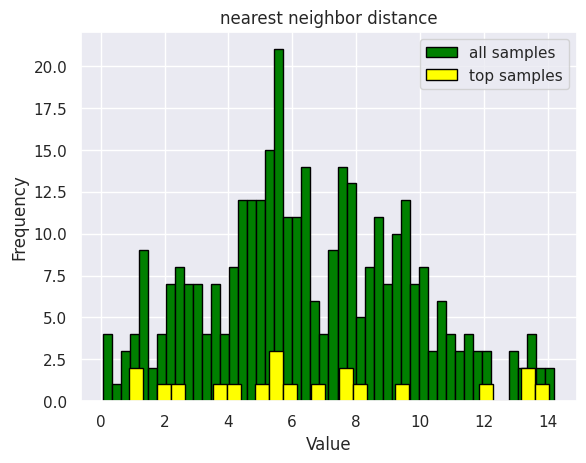

score: [[70.694695]
 [76.33589 ]
 [68.80617 ]
 [73.621056]
 [68.36897 ]
 [77.096146]
 [75.47008 ]
 [73.50923 ]
 [75.75743 ]
 [69.409836]
 [73.315895]
 [72.25315 ]
 [72.58944 ]
 [73.60363 ]
 [76.65959 ]
 [72.60451 ]
 [68.87561 ]
 [70.26933 ]
 [76.41313 ]
 [69.46088 ]]


<Figure size 640x480 with 0 Axes>

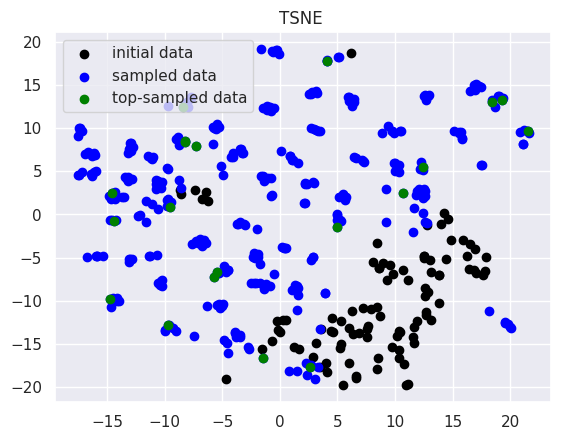

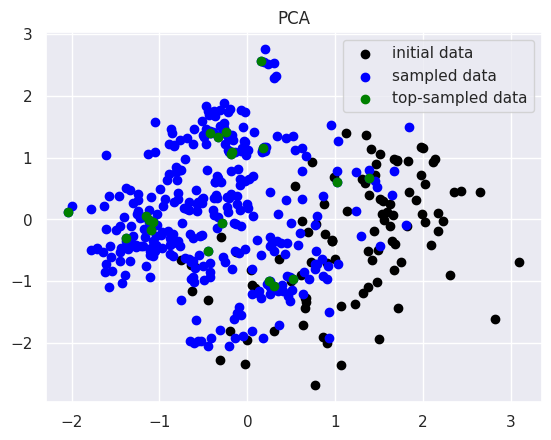

In [17]:
################################ Select final samples ###############################

def TSNEPCA(all_input, sample_input, sample_score):
    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA
    #################################################################
    "TSNE"
    total = np.concatenate((all_input.reshape(-1,27), sample_input.reshape(-1,27)), axis=0)
    print(total.shape)
    # set the hyperparmateres
    keep_dims = 2
    lrn_rate = 700
    prp = 40
    tsne = TSNE(n_components=keep_dims,
                perplexity=prp,
                random_state=42,
                n_iter=5000,
                n_jobs=-1)
    total_tsne = tsne.fit_transform(total)
    total_tsne0 = total_tsne[:, 0]
    total_tsne1 = total_tsne[:, 1]
    print('TSNE done!')
    ########################### nearest neighbor distance ranking ###########################
    sample_dist=[]##nearest neighbor distance
    for i in range(len(sample_input)):
        x1 = total_tsne0[len(all_input)+i]
        y1 = total_tsne1[len(all_input)+i]
        # print('x1y1',x1,y1)
        dist_temp=1000000000000
        for n in range(len(all_input)):
            x2 = total_tsne0[n]
            y2 = total_tsne1[n]
            dist= ((x1-x2)**2 + (y1-y2)**2)**0.5
            if dist < dist_temp:
                dist_temp = round(dist,10)
                # print(x2,y2)
        sample_dist.append(dist_temp)
    sample_dist=np.array(sample_dist)
    dist_rank=np.argsort(sample_dist)

    ############################### score ranking ###########################
    score_rank=np.argsort(sample_score.reshape(-1))

    ############################## ranking by score and distance ###########################
    all_rank=dist_rank+score_rank
    top_select = round(top_sample*3/4)
    random_select = round(top_sample/4)
    ind = np.argpartition(all_rank, -top_select)[-top_select:]
    ind_random=np.setdiff1d(np.arange(len(all_rank)), ind)
    ind2 = np.random.choice(ind_random,random_select)
    print(ind)
    ind = np.concatenate((ind,ind2))
    print(ind)

    plt.figure()
    plt.hist(sample_dist, bins=50, color='green', edgecolor='black',
             label='all samples')
    plt.hist(sample_dist[ind], bins=30, color='yellow', edgecolor='black',
             label='top samples')
    plt.title('nearest neighbor distance')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    plt.savefig(model_folder+'/'+round_name+'/nearest neighbor distance.png')
    ##############
    plt.figure()
    plt.scatter(total_tsne[:len(all_input), 0], total_tsne[:len(
        all_input), 1], color='black', label='initial data')
    plt.scatter(total_tsne[len(all_input):, 0], total_tsne[len(
        all_input):, 1], color='blue', label='sampled data')
    plt.scatter(total_tsne0[len(all_input)+ind], total_tsne1[len(
        all_input)+ind], color='green', label='top-sampled data')
    plt.title('TSNE ')
    # plt.colorbar()
    plt.legend()
    plt.savefig(model_folder+'/'+round_name+'/TSNE.png')

    ##############################################################
    #################################################################
    "PCA"
    pca = PCA(n_components=2, whiten=True)
    total_pca = pca.fit_transform(total)
    plt.figure()
    plt.scatter(total_pca[:len(all_input), 0], total_pca[:len(
        all_input), 1], color='black', label='initial data')
    plt.scatter(total_pca[len(all_input):, 0], total_pca[len(
        all_input):, 1], color='blue', label='sampled data')
    plt.scatter(total_pca[len(all_input)+ind, 0], total_pca[len(all_input) +
                ind, 1], color='green', label='top-sampled data')
    plt.title('PCA')
    # plt.colorbar()
    plt.legend()
    plt.savefig(model_folder+'/'+round_name+'/PCA.png')

    return ind



top_all2=np.array(top_all).reshape(-1,3,3,3)
top_all3=np.unique(top_all2,axis=0)

mat60=To60(top_all3)
sample_score=emsemble_predict2(mat60)

ind=TSNEPCA(all_input, np.array(top_all3).reshape(-1,27), np.array(sample_score).reshape(-1))
print('score:',sample_score[ind])
top_select = top_all3[ind].reshape(-1,27)
top_select2=top_select.reshape(-1,3,3,3)
import scipy.io
scipy.io.savemat(model_folder+'/'+round_name+'/top_matrix_3x3x3.mat', {'mydata':np.array(top_select2)})


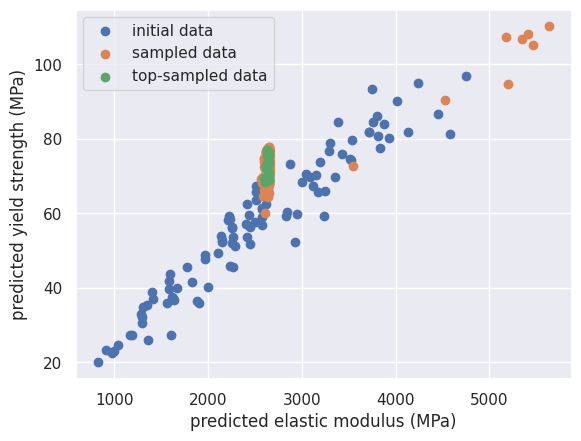

In [18]:
################################ Visualization ###############################

sample_score0=emsemble_predict1(mat60) # predicted E values of sampled points


mat60_top=To60(top_select2)
top_sample_E = emsemble_predict1(mat60_top) # predicted E values of top-sampled points
top_sample_Y = emsemble_predict2(mat60_top) # predicted Y values of top-sampled points

initial_E = emsemble_predict1(X60) # predicted E values of initial points
initial_Y = emsemble_predict2(X60) # predicted Y values of initial points

plt.figure()
plt.scatter(initial_E * 100, initial_Y, label='initial data')
plt.scatter(sample_score0 * 100,sample_score, label='sampled data')
plt.scatter(top_sample_E * 100, top_sample_Y, label='top-sampled data')
plt.xlabel('predicted elastic modulus (MPa)')
plt.ylabel('predicted yield strength (MPa)')
plt.legend()

In [19]:



################################ End of Part IV ################################




################################################################################

---------------------------------------------------------------------------- That's all folks ! ----------------------------------------------------------------------------


################################################################################